In [1]:
import MathSource as MS


def layer_activation(layer, inputs, bias):
    output = MS.Matrix.multiply(layer, inputs)
    output.add(bias)
    output.map(MS.sigmoid)
    return output

def gradient_calculation(inputs, errors, learning_rate):
    gradients = inputs.map(MS.sigmoid_deriv)
    gradients = MS.Matrix.multiply(gradients, errors)
    gradients = MS.Matrix.multiply(gradients, learning_rate)
    return gradients

def applying_adjustments(inputs, gradients, layer, bias):
    hidden_T = MS.Matrix.transpose(inputs)
    weights_deltas = MS.Matrix.multiply(gradients, hidden_T)
    layer.add(weights_deltas)
    bias.add(gradients)


class Layer():

    def __init__(self, weights, bias, result=MS.Matrix):
        self.weights = weights
        self.bias = bias
        self.result = result


class NeuralNetwork():

    def __init__(self, nodes):
        self.nodes = nodes
        self.layers_list = []
        for i in range(len(self.nodes) - 1):
            weights = MS.Matrix(self.nodes[i + 1], self.nodes[i])
            bias = MS.Matrix(self.nodes[i + 1], 1)
            weights.randomize()
            bias.randomize()
            self.layers_list.append(Layer(weights, bias))

        self.learning_rate = 1


    def feedforward(self, input_array):

        inputs = MS.fromArray(input_array)

        data = inputs
        for layers in self.layers_list:
            results = layer_activation(layers.weights, data, layers.bias)
            layers.result = results
            data = results

        return data.toArray()


    def train(self, input_array, target_array):

        # Forward Propagation
        inputs = MS.fromArray(input_array)

        data = inputs
        for layers in self.layers_list:
            results = layer_activation(layers.weights, data, layers.bias)
            layers.result = results
            data = results

        # Error calculation
        targets = MS.fromArray(target_array)
        error = MS.subtract(targets, self.layers_list[-1].result)
        index = list(range(len(self.layers_list)))
        index.reverse()
        first = True
        # Back Propagation
        for i in index:
            if first:
                gradients = gradient_calculation(self.layers_list[i].result, error, self.learning_rate)
                applying_adjustments(self.layers_list[i - 1].result, gradients, self.layers_list[i].weights,
                                     self.layers_list[i].bias)
                first = False
            else:
                weights_T = MS.Matrix.transpose(self.layers_list[i + 1].weights)
                error = MS.Matrix.multiply(weights_T, error)
                gradients = gradient_calculation(self.layers_list[i].result, error, self.learning_rate)
                if i:
                    applying_adjustments(self.layers_list[i - 1].result, gradients, self.layers_list[i].weights,
                                         self.layers_list[i].bias)
                else:
                    applying_adjustments(inputs, gradients, self.layers_list[i].weights,
                                         self.layers_list[i].bias)

In [3]:
training_data = [[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]]
training_output = [[0], [1], [1], [0]]


NN = NeuralNetwork([2, 2, 1])
# for var in NN.layers_list:
#     print(var.weights.matrix)
# print('----------------------')



# NN = NNV6.NeuralNetwork(2, 2, 1)
# print(NN.weights_ih1.matrix)
# print(NN.weights_h3o.matrix)



for k in range(1000):
#     # n = np.random.choice([0, 1, 2, 3])
#     # NN.train(training_data[n], training_output[n])
#
    for i, v in zip(training_data, training_output):
        NN.train(i, v)

#
#
print('data')
print(NN.feedforward([0, 0]))
print(NN.feedforward([0, 1]))
print(NN.feedforward([1, 0]))
print(NN.feedforward([1, 1]))

data
[0.058255167289851535]
[0.9512854715062029]
[0.9512128022876858]
[0.05819536063174614]


In [10]:
import numpy as np

seq_len = 126 
num_sample = 1000

rations1 = [[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 1, 0, 0, 1],
            [0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2],
            [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]
rations2 = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 1, 0, 0, 1],
            [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
            [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
            [0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2]]
# rations2 = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 4, 0, 0, 2, 1, 0, 0, 1],
#             [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
#             [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
#             [0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 2]]
motif1 = np.array(rations1)
motif2 = np.array(rations2)
#print(motif)

# freq = np.hstack(list(reversed([np.ones((4,(seq_len-motif1.shape[1])//2)), 
#                   motif1,
#                   np.ones((4,(seq_len-motif1.shape[1]) * 4)),
#                   motif2,
#                   np.ones((4,(seq_len-motif1.shape[1])//2))])))

freq = np.hstack([np.ones((4,(seq_len-motif1.shape[1])//2)), 
                  motif1,
                  np.ones((4,(seq_len-motif1.shape[1]) * 4)),
                  motif2,
                  np.ones((4,(seq_len-motif1.shape[1])//2))])
print('Sequence matrix shape: {}'.format(freq.shape))
#print(freq)

pos = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample, p=freq[:,i]/sum(freq[:,i])) 
                for i in range(seq_len)]).transpose()

print([''.join(x) for x in pos[:1]])

neg = np.array([np.random.choice(['A', 'C', 'G', 'T'], num_sample, p=np.array([1,1,1,1])/4.0)
                for i in range(seq_len)]).transpose()
print([''.join(x) for x in neg[:1]])

Sequence matrix shape: (4, 576)
['AGCAAGTGGCAAGATAACGGTTTAACCCGTGGTGACGCAACAGCTAGGGACGGTAAAATAAATCTTATATTCATGAGAGGCTTTTTGGCATATTTGCGGCTAAGGGGAGGTCTCAGCTAACTAGTG']
['GACACACTGAGACCGATGGTATAGTATTGTGGTAGTACTAGGGTTACCGATACAGAAACCTAGGTTTCGGTAATGCCACTTTGGTTACGGTAGCAAAAAAGGGACGTAACGGTAATGAACATTCCG']


In [8]:
import numpy as np

seq_len = 81 
num_sample = 500

benchmark_file = "/home/nkureev/self_predictor/data/BenchmarkData70.txt"
pos_data = []
neg_data = []
line_type = ''
pos_count, neg_count = 0, 0
with open(benchmark_file, 'r') as f:
    write_mode = False
    for lines in f:
        if write_mode:
            if 'non' in line_type:
                if neg_count < num_sample:
                    neg_data.append(list(lines[0:-1]))
                    neg_count += 1
            else:
                if pos_count < num_sample:
                    pos_data.append(list(lines[0:-1]))
                    pos_count += 1
            write_mode = False
        elif lines.startswith('>'):
            write_mode = True
            line_type = lines
            
pos = np.array(pos_data)
neg = np.array(neg_data)

In [9]:
print(pos)

[['A' 'G' 'C' ... 'A' 'G' 'A']
 ['C' 'G' 'G' ... 'T' 'A' 'A']
 ['T' 'A' 'A' ... 'T' 'T' 'T']
 ...
 ['T' 'G' 'A' ... 'T' 'A' 'T']
 ['A' 'A' 'A' ... 'T' 'A' 'T']
 ['C' 'A' 'C' ... 'T' 'G' 'T']]


In [11]:
pos_tensor = np.zeros(list(pos.shape) + [4])
neg_tensor = np.zeros(list(neg.shape) + [4])

In [12]:
base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for row in range(num_sample):
    for col in range(seq_len):
        pos_tensor[row,col,base_dict[pos[row,col]]] = 1
        neg_tensor[row,col,base_dict[neg[row,col]]] = 1

print('Positive sample matrix shape: {}'.format(pos.shape))
print('Positive sample tensor shape: {}'.format(pos_tensor.shape))

Positive sample matrix shape: (1000, 126)
Positive sample tensor shape: (1000, 126, 4)


In [13]:
X = np.vstack((pos_tensor, neg_tensor))
y = np.concatenate((np.ones(num_sample), np.zeros(num_sample)))

print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

Training set shape: (2000, 126, 4)
Training set label shape: (2000,)

One-hot encoding looks like:
 [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Shape of the output of first layer: (32, 126, 1)


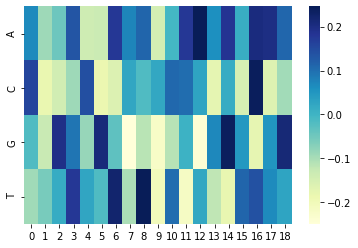

In [810]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras
import seaborn as sns
import pandas as pd
import os

model = Sequential()
model.add(Conv1D(1, 19, padding='same', input_shape=(seq_len, 4), activation='relu'))

weights_dict = {}
for i, v in enumerate(model.get_weights()[0]):
    weights_dict[i] = [float(i) for i in v]
weights_df_before = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df_before, cmap="YlGnBu", yticklabels=['A','C','G','T'])

model_weights = []
model_weights.append(model.get_weights()[0])

print('Shape of the output of first layer: {}'.format(model.predict_on_batch(pos_tensor[0:32,:,:]).shape))

In [811]:
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X, y, validation_split=0.2, epochs=1)
model_weights.append(model.get_weights()[0])
model.save('./partly_trained.h5')
losses = [hist.history['loss']]
for i in range(10):
    model = load_model('./partly_trained.h5')
    hist = model.fit(X, y, validation_split=0.2, epochs=1)
    losses.append(hist.history['loss'])
    model_weights.append(model.get_weights()[0])
    model.save('./partly_trained.h5')

50/50 [==============================] - 1s 14ms/step - loss: 0.1582 - accuracy: 0.9638 - val_loss: 0.3212 - val_accuracy: 0.9175


Convolution parameter shape: (19, 4)


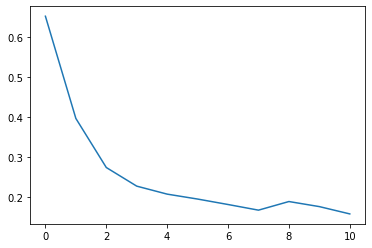

In [812]:
import matplotlib.pyplot as plt

convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()

print('Convolution parameter shape: {}'.format(weights.shape))

plt.plot(losses)

In [813]:
num2seq = ['A','C','G','T']

''.join([num2seq[np.argmax(weights[i,:])] for i in range(weights.shape[0])])

'TATATTTAAATTTTATTAA'

<AxesSubplot:>

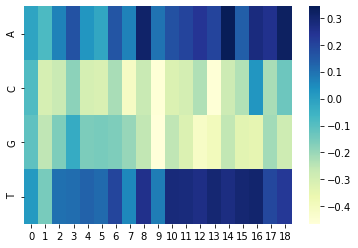

In [814]:
weights_dict = {}
for i, v in enumerate(model.get_weights()[0]):
    weights_dict[i] = [float(i) for i in v]
weights_df_after = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df_after, cmap="YlGnBu", yticklabels=['A','C','G','T'])

AT: 0.626984126984127 
GC: 0.373015873015873


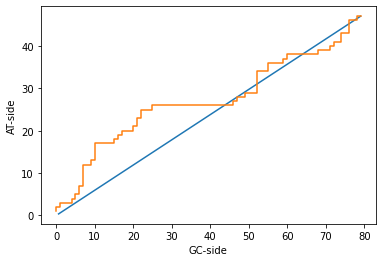

In [815]:
#operon_seq = 'GCACTTAAAGCTGATCCTAAAAAAGCTAGTGAAGAAGCGTTTAAATATGTTCCAAAAGGATACAATCCGATTGCAACTGGTGAAGACGAACTAAGAGAAGTTCAAAAAAGAGTTGCTAAATTTGCTGAAAAAGGTGATTTAGGCCCATTCAAAAATGGATATTGGGGTCATAAAACTATGAAGTTTACACCTGAGCAAAACTTAATTGCTCTAAGCCATTATTTAAAAACTCTTGAAATGCAAAGAATTGCAGCTCAAATGATGGCAATTTTCGGTGGTAAAAATCCACATCCACAAAGCTTAACAGTTGGTGGTGTAACTTGTGTTATGGATTTAAAAGATCCTGCAAGATTAGGTGAATATCTAACTAAATTCCAAGAACTTGCTGATTATGTAAACAGAGCATACTATGCAGATATCGTAATGGCAGCAAGTGCTTATGGTAAAGAACCAAGCGTAGTTCAAAAAACAAATTTAGGCAATTTCCTAACATATAAAACTATGCAAACAGGACCAAATTCTTGGTTATTCGATGCTTGTGGTTATATTAAAAATCATGATTTAACTAAATTCTATGAAATTGATGAGAGTAAAATTACTGAAGAAGCAACACATGCTTGGTATAAAAACCTTGATACACCTACTCATCCTTATGATGAAACAACTGAACCAGAATATACAGGTTATGTTGATGGTGAAAGTGTTGATGGACAAGGAAATATTGTAAAAGCAAAAGTTGTTAATGAAAAAGGTAAATATA'
#operon_seq = 'CAAAGCTTTGGAGCTGACCCAAGCAAAACTGTGGATGAAGCAAAAAAATGGGCAAATGCTGCCGGAACCACTCCATATGTTGCAGACAGTGCAAAGTTTAAAGAGGTGCAAGATCGACTCAAAAAATTTGTCAAACAGGGTCGGCTTGGTCTTTTTGCAAAAGGATACTGGGGAAATCCACACTATAAACTAACCCCAGAACAAAACCTATTGGCGGTTACGCACTATCTTCAGGCTCTCGATTTGCAAAGAGATGCTGCAAAGATGATGGCTATCTTTGGCGGAAAGAACCCACACCCACAGAGTATTGTAGTTGGTGGCGTCACTTGTGTACAGGATATTAAAAACCCTGCACGAATTGCTCTGTATAAAGACTTGCTTAAAGGTTTTACGCGATTTATCAAAGGTGCCTATCTTCCAGATATCTATATGGCAGGTACTATGTATGGTGATGAAGCACTTGACGGTACAGGCGCAGGTCTGAAAAATTACATGGCTTATGGCGGTTTTCGACTTCAAGACAATGGCTTTTACAAATCAGAACTCCTTTTTCCAAGTGGACTTGTAATCGATGGAAAATATCAAGAGTTTGATCAAGAAAAAGTGGCTGAAGATGTAACGCACTCTTGGTATCACGGAAACGAGCCACTTCACCCATTTGATGGACAAACCCTTCCAAACTACACAGGATTTGGCAAAAAAGAAAAAGGAATTGCCTATCTTGATACCAAAGGA'
#operon_seq = 'TTACACGCGCTCGATTGGGTCAATCCGGTCAACGCCCTGCGCGCAGACCCGAAGGCGACTTCGGAGCTGCAGCAGAAGGTCAGCCCGAGCCATCCGCTCTCCTCCCCAGGCTATTTCCGGGACGTGCAGAACCGTCTCAAGAAATTCGTCGAAAGCGGACAGCTCGGGCTGTTCAAAAACGGCTATTGGGACAACCCGGCTTATCTGCTTCCGCCGGAAGCGGACCTGATGGCAACGACGCACTATCTGGAGGCGCTCGATCTTCAGAAGGAGATCGTGAAGGTTCACACCATCTTCGGTGGCAAGAACCCGCACCCGAACTGGCTGGTGGGCGGCGTGCCGTGCCCGATCAATATCGACGGCGTCGGCTCGGTCGGTGCGATCAACATGGAGCGGCTGAATCTCGTCTCCTCGATCATCGACAAGTGCCAGGAGTTCAACGAGAACGTCTATATCCCCGACGTGATCGCGATCGGCGGCTTCTACAAGAACTGGCTCTATGGCGGCGGTCTGTCGTCGCAGGCCTGTCTCGCCTATGGCGACATCCCCGAGAACCCGAACGACTTCTCGCCCGAGCAGCTTCATCTGCCGCGTGGCGCGATCATCAACGGCAATCTCAACGAGGTGCATGACGTCGATCCGCGCGATCCCGAACAGGTGCAGGAATTCGTCGATCACTCCTGGTACACCTATGGCGAGCCAGGCAAAGGCCTGCACCCGTGGGATGGCGTGACCGAGCCGCAATACGAGCTCGGGCCG'
#operon_seq = 'CGCCAGGCGCGCGCCTGTTGCGCATCGCGTTCAATGGCTGCCGTCAATGTCGGCAGGTCGACGTATTTCTCTTCGTCGCGAATCTTCTTCAGGAATTCCACGCGCAGCAGTTTGCCATAGCAATCGCCGCTGTAATCGAAGATATGCGTTTCCAGAAGCACGCGGCCGCTGTCGTCCACCGTCGGGCGCACGCCCAGGCTGGCGACGGCCGGCAAGGGCTTGTCGCCGAGCCCATGCACCTGCACGATGAAGATGCCCGAAAGCGCCGGATGCTTGTGGCGCACGCGCATGTTCAGCGTCGGGAAGCCGATGGTGCGGCCGAGTTTCTTGCCGTGCACCACGTGGCCGGAAATCGCATAAGAATGGCCCAGCAACTGGCGCGCATGCGGGAAGTCAGCTTTCGCCAGCGCCGCGCGGATCGCCGACGACGAGATGCGCACGCCTTCGTTGTTGACGTTCGGCATGGTGTGCACTTCAAAACCGTATTGCTTGCCGGCGTCGATCAGTGTCTGGATATTGCCGGCGCGGCGCGAGCCGAAGCAGAAATCCTCGCCCACCAGCAGCCAGCGCACATGCAGACCCTGGATCAGGATCTTTTCAATGAAGTCTTGCGGCGACAGGGAGGCGAATTTGCTGTTGAAATGTTCGACGATCACGCGGTCGACGCCGGCGTTGGACAGCGATTGCAGCTTGTCGCGCAGGTTGGCGATGCGTTGCGGGGCTTTTTCCGGAGTGCCGGCCAATTGCGCGAAGAACTCGCGCGGATGCGGTTCGAACGTCATCACGGCGGCATCCAGGTTCAGGCGGGTTGCAGCTTCGCGCACCTGCGCCAGCAGCGCCTGGTGGCCACGGTGCACGCCGTCGAAGTTGCCGATCGTCAGCGCGCAGGGCGCACGCGATTCAGCATTGGGAAGTCCGCGAAATACCTTCATGGAAGAGGTTAAGAGTGATGCCGTTGCAAAAGCCTTCCATTATAAATGTTTTCGAAGGCTTACCCCTGATTTGGCGGCGAAACGGCGGCAATCAAGCGCTTCCGGCTATTCCGGGTATGAGGAATGTTGTCGTTTTTGAATGTTTTCCTTGGCATGCAGCTAGTGATTAACCGGCAATGATGGCGTGGCGATTGCTCCGGCGAGCGTCACGGGAATCAGGCTGACTTGCCGCCGAGAAAGCCGCCAAGCAGGTTGCCGATTTCCGAACCGAGATCGCCACCGGATTGGGGCATCTGGCCGTTTGGCGTCAAGTGATCGACCAGGCCGGGAAGAATCTGGGCCAGATGGCCGGCGATGTCGCTTTGCGGAATGCCGGACGTTTGCGCCAGGCCGCTCAACTGATCGTCGCCCAGCGCTTGCGCCAGCTGATCGCCCGACACCGGCTGGTTTTGGCCGGTGCCGATCCAGGAGTCGACAATCTGGCCGAGGCCGGCGTTTTGCAGGTTGCCGAGCAAGCCGCCCAGTCCACCGAGTCCACCTGATCCTCCCGAGGCGCCGCCGGACTGATTGGCGGCCAGCATGCCGAGTACCGCCTGAATCAGCGCTGCTTTGGGATCGCCGCCGGCGTTCACATCGTTTGTATTATTGGCGAGTGCGCCGAGTACGCTGTCGAGTAAGCCCATGAAAATTCTCCTGAGTCAAAAAGTGGGGTGCGGCTCCGGAATGACTGCATGACCGGAGATGAGTTGCAGAAAAGACGCAACGTGAGGTAGTGCAACGGCTGGCGCTCTCCGGCGTTGTCGAAAAAAAGGGAGATATTGCGGGTTTCTCCCTCCTTGTTTTGTTGTTACATCTCGCCCCAGATCGCATTGATTGCAGCCAGCGCGCCGAGGCCGGCGGTTTCGGTGCGCAGCACGCGCGGTCCTATCGACAGCATCAGCGCGCCCTGGTCGCAGGCGAGGTTTTCTTCGGCCTCGGTAAAGCCGCCTTCCGGGCCGACTATCAGACTGAGTGCCTGCGCCGGGTGATGGCGCGCCCAGTCCGACAGCGATTGCTCGCCGCGTGGCGACAACAGGATACGCTTGTGCAGGTCGCTCTGGCCGATCCAGCTGTTGAATTCGGTCAGCGGGGCCAGATGCGCCAGACGGTTGCGGCCGCTTTGTTCGGCGGCGGCCTGGATGATGCCTTGCCAGTGGCTCTGTTTCTTTTCGGCGCGCTCGCTGTTGAGTCGCACCACGCAGCGTTGCGCCGCCAGCGGCTGGATCGCGGCTACGCCCAGCTCCATGGCCTTTTCGATGATCCAGTCCATCTTCGAGGCTTCCGGCAGCGCCTGCGCCAGCGTGACGGCGTAGGACAGCTCGGCTTCGCGCGGCGAGAAAGTCTTGACCTCGGCGTGCACGCGCTTCTTTTCCATCTGGGTGATGACGGCCGTATATTCGCCGCCCTGGCCGTTGAACAGCGTGATCGGATTGCCCAGTTGCATCCGGATCACCTGGACATGGTGCGCGACCTGATCGGGCAGAGCCAGCGTCGTGCCGATGGCCAGGGAGTCGGGACAATAAAAGCGGGGCATGTGATGGGCGATCCGATAGAAAAATGGCAATTGGCAACGATTTGAAGCGATTTACCCTGCAGCGGCGGCAAAAACGTGTAAAAAATTGTTTTTTGACATGCCGTAATGCGCTGCCGGCATGGGGCGATTTTAATTCTTCGGGCTGGTCTCTGGTAAAATAGTTGGCTCAGTCTGGCTCGTTCCGGGAGTTCATCCGGGCCGACCGGCAAGGCATCCGACATGCGCGCGTTAATTAATGTTAGGTCCGGTTAAGACCGAATTGTTCGTAACGACGTAGTTCGACCGCAATCCGCAACTCTTTGACATCGACATGACTTCCACACTCCCTACCGACAAGATGGCCAACGCGATTCGCGCGCTGGCAATGGACGCAGTACAGAAAGCAAACTCAGGACACCCAGGCGCGCCGATGGGGATGGCGGAAATCGCAGTCGCATTGTGGGCCAAGCACTATCGCCACAACCCGACCAATCCGCAATGGGCCAACCGCGACCGCTTCGTGCTGTCCAACGGCCACGGCTCGATGCTGCAATACGCCTTGCTGCACCTGACCGGCTACGACCTGCCGATGGAAGAGATCAAGAACTTCCGCCAACTGCATTCCAAGACCGCCGGCCATCCGGAAGTCCACATCACGCCGGGTGTCGAAACCACCACCGGTCCGCTGGGCCAGGGCATCACCAACGCCGTCGGCATGGCGCTGGCTGAAAAGCTGCTGGCTGCAGAATTCAACAAGCCTGACCTGGCAGTGGTCGATCACTACACATACGCTTTCGTCGGCGACGGCTGCCTGATGGAAGGCATCTCCCACGAAGCCTGCTCGCTGGCCGGCACATTGCGCCTGTCCAAGCTGATCGTGCTGTACGACGACAACGGCATCTCCATCGACGGCAAGGTCGAAGGCTGGTTCAAGGACGATACCCCGAAGCGTTTCGAAGCCTACGGCTGGAACGTGATTCCGGCGGTCGACGGCCACAATGTCGAGGCAGTCAACTCCGCCATTCATCAGGCCAAGCTGGCCGACAAGCCGACCCTGATCTGCTGCAAGACCGTGATCGGCAAAGGCTCGCCGAACCTGGCCGGCACCGACAAGGTCCACGGCGCGGCGCTGGGCGACAAGGAAGTCGCGGCCGTGCGCGAAGCGCTGGGCTGGACTTCGGCGCCGTTCGAAATCCCTGCCGACATCTATTCCGCATGGGACGGCAAGGCGCAAGGCCAGCAACTGGAAGCCGACTGGAACAAGCTGTACCAGGCATACCAGGCCAAGTACCCGACCGAAGCCGCCGAGCTGGTGCGTCGCCTCAAGGGCGAGTTGCCGGCAGGTTTCGACGCGGCAGTGCAGGCTTACATCGCCAGCACCATCGAGAAGAAAGAAACCATCGCCACCCGCAAGGCCAGCCAGAACGCGATCCAGGCTTACGCGCAAGTGCTGCCTGAATTCCTCGGCGGTTCGGCCGACCTGACCGGTTCCAATCTGACCAACTGGAAGGAATCGGTGGCCGTGCGCGCCGACGTCGCCGGCAATCACATCAACTACGGCGTGCGTGAATTCGGCATGAGCGCGATCATGAACGGCATCGCCCTGCATGGCGGCTACATTCCGTTCGGCGCGACCTTCCTGACCTTCTCCGATTACAGCCGCAATGCGCTGCGCATGGCCGCGCTGATGAAGCTGCGCGCGCTGTTCGTGTTCACGCATGATTCCATCGGCCTGGGCGAAGACGGTCCTACGCACCAATCGGTGGAACACGTTTCCAGCCTGCGCCTGATCCCGAACCTGGACAACTGGCGTCCATGCGACACGGTCGAATCGGCTGTTGCGTGGGAACAGGCAGTCAAGCGCAACGACGGTCCGAGCACCTTGATCTTCTCGCGCCAGAACTTGCCGTTCCAGGAGCGCACCCCGCAGCAAGTCGCGGACATCAAGCGCGGCGGCTACATCCTCAGAGAAGCCAAGGACGCCAAGATCATCCTGATCGCCACCGGTTCGGAAATCGAACTGGCGGTCAAGGCGGCCGATGAACTGGCGGCGCAAGGCATCCCGGCGCGCATCGTCTCGATGCCGAGCACCGACGTGTTCGACCGCCAGGACTCGGCCTACAAGGCCAGCGTCCTGCAACACGGCGTGCCGCGCGTGGCGATCGAAGCCGGCGTGACTTCCACCTGGCACAAGTATGTCGGCCTGGAAGGCGCTGTGATCGGCATCGACACTTTCGGTGAATCGGCTCCGGCCGGCGTGTTGTTCAAGCATTTCGGCTTCACCGTCGAGAACGTCGTCGCCAAGGCCAGGTTGATCCTGGCATGAGTCTCGCCGGCAAGGTCCCGGGGCAGGACATCACCAACGTCCAGGGACCGGTAACGGTCCGGCGTGCGACGGTCGACGATGCCGCCCTGATCGCTCAGGTGCGCATCGACAGCTGGCGCGCAGCGTATCGCGGCCTGATTCCGGATGCCTACCTGGATGGCATGAAGGTGGAAGACAGCACGCGCATGTGGACGCGCGTGCTGGCACCTTCGTGGCGGAAACGGAAGGCGAACTGGTGGGTTTCGCCGCCGGCATCACACTGGCGGAACGCAAGCTGGATTTCGATGCCGAACTGACGGCTTTGTACGTTTTACCTTCGGCCCAGCGCGCCGGCATCGGACGCCGCCTGCTGACCGAAGTGGCGGCAACACTGGGCGCGGCAGGTGCGCCCAACATGCTGGTCTGGGTATTGGCGCAGAACAAAAAGGCACGCGACTTTTACGCGCACCTCGATGCGCTGCTGCTGGCAGAACAGACCTTCAAGTGGGATGAACTGGATTTGATCGAAGTCGCCTACGGCTGGCGCGACATCGGTTCCATCGGCAAAATTACTACTGTTTCTTAAGGAGAAAACATGACTATCCGCGTCGCAATCAATGGCTATGGCCGTATCGGCCGCAACATCCTCCGCGCTCACTACGAAGGCGGCAAAAAACACGACATCCAGATCGTGGCGATCAACGACCTCGGCGATCCGAAGACCAACGCCCACCTGACTCAATACGACACCACCCACGGCAAGTTCCCGGGCACCGTGACAGTCGACGGCGACTCGATCGTCGTCAACGGCGACCGCATCAAGGTGCTGGCGCAACGCAATCCGGCAGAACTGCCATGGGGCGAGCTGAAGGTTGACGTCGTGCTGGAATGCACCGGCTTCTTCACCACCAAAGAAAAGGCCAGCGCCCACCTGAAGGGCGGCGCCAAGAAAGTCATCATCTCCGCACCGGGCGGCAAGGATGTCGACGCGACTGTCGTGTTCGGCGTCAATGACGGCGTTCTGAAGGCCACCGACACCGTGATTTCGAACGCATCGTGCACCACCAACTGCCTGGCGCCGCTGGTCCAGCCGCTGCACGAGAAGATCGGTCTGGTCAACGGCCTGATGACAACCGTCCACGCTTACACCAACGACCAGGTCCTGACCGACGTCTATCACGAAGACCTGCGCCGCGCCCGTTCGGCCACGCAATCGATGATCCCGGCAAAGACCGGCGCCGCTTCCGCAGTCGGCCTGGTGTTGCCTGAACTGAACGGCAAGCTGGACGGCTACGCGATCCGCGTGCCGACCATCAACGTCTCGATCGTCGACCTGTCGTTCATCGCCGCGCGCGACACGACCGTGGATGAAGTCAACGCCATCATGAAGGCGGCTTCCGAAGCCGGCCCGCTGAAGGGCATCCTGACTTACAACACCGAGCCGCTGGTGTCCGTCGACTTCAACCACAACCCGGCATCGTCGAACTTCGACTCGACCCTGACCAAGGTCTCCGGTCGTCTGGTCAAGGTTTCGTCGTGGTATGACAACGAGTGGGGCTTCTCGAACCGCATGCTGGACACGACCGTGGCGCTGGTTTCGGCAAAATAATCGGTTTCAAGCGTCATTTTTGATTGATCCGGCCTAATTTGGCTTCTTTTCTTCGCATGCTTGTCAGGCGATGTCTAAGAAAATATCTTGGGCGGATCAATGACCAGACGATGTGTTCTGGAAAGGCTGTTGCAAATCCGTTTTGCGATAGCCTTTTTTATTGACGATTTAACAATAATTAATCGAGGGCTGTAATGTCGTCACCTTCTTCAACACCGATTTTGCGTAGCCACGGCGTCAAGCTGATTGCCATGCTGGCCCTGAGCTTCTCGCTCAGCGCCTGCGACTATGTCGCCAGCTTCACCAAACCCAAGCAGACGCCGGAAGAAGCCAAGGCCGAAGGCATCGCGCTGGGAGCGGGCTGCCGCCAGGCCGGTCAGAGCCTGGAAGATTGCTACCAGCGTAATCCCGACAAGCTGAAGGCGGGCATTTTTGCGGGCTGGAAGGACATGCACGAATACATGGCGGCCAAAAACATCCCGACCGTGGTGCCGCCGCCGGTGCCTGAAAAGACCGAAGCCGATACCGCCAAGGACAAGGAAGCGCCGAAGGATGATCGCGCCGCACGCCGCGAACGCCGTGAGCGCGAGAAGGCGGAGCAGGATGGCAAGGACGGTAAAGACAGCAAGAGCAAGGACGGCGGTGGCGACAGCGACCGCAGCAGTCGCAGGAATCGCGATCGCGACGACAGCAGCTCGAGCAAAAAGTAAGTAGACTGGGCGGCAGGAGCGAATCGAATGGTATGTGTCGATTCGCCGCGCGCCGACCTGCAGAAAGCAGTTCAAGGTTGACAACGCGCCCCGCCAGTCGGGGCGTTTTTCATGGAATGAACGATATGCAAGCGATCAAGAAACTGATTTCCGCCAACAAGGGCTTCCTGTGCTTCCTGCTCGGCATGCTGCTGATCCGCAGCGCCGTGGCGGATTGGTACGGCGTGCCGTCGGCGTCGATGTACCCGACGCTGCTGATCGGCGACCGCATCATTTCGAATCGCCTGGCCTATGACGTCAAGCTGCCGTTCACCGATATCGTGGTCGGCCGCATCGCCGATCCCCAGCGCGGCGACATCGTCACCTTCAGTTCACCCGAAGACGGAACGCGCCTGGTCAAGCGCCTGATCGGCCTGCCCGGCGACATCGTCGAAATGCGTGACGAGCAACTGGTCATCAACGGCGCCCCGATGACCTACGACGCCGCAGCCGCAGCACCGGCGTCGCATCGCATGCCGGATTACGAAGGACGCCAGATGATCGTCAGGGAAAGCCTGCCGGCCATGGCACACGGCGTGATGCTGCTGCCGGAGCGGATGGCCTTGCGCAGCTTCGGCCCGATGATCGTGCCGGCCGGGGAATACCTGGTGCTGGGAGACAATCGCGACGACAGCAAGGATTCACGCTATATCGGTTTCGTGCCGCGTGCTTTGCTGACCGGCCGTGTCAGCCGTGTGATGTTTTCGCTCGATCCGCAACGTCATTATTTGCCGCGCGTAAAGCGTTTCGGCGCGGCGTTGCAGGACGCCGGTTAAGCGGGCGTTGCGCGCTGAAGGGGGGCAGGTTTTGCATTTCCCGGCAAGGCAGGGCATGATGCTCGCTCGTCACGCAAGACCACAAGAATATGAACGCTCCCCTGATCGTCAAATCGCCGCACCTCCATCCTCACGTCCCCGAGAGCGCCTTCGGCATCTGGTTCCTGCAAACCCATACCTGGACCCTGCATGTACTGGAGCGCGCCTTCAAGGATTTGGAGCCGCTGATCCCGGACCGTCGGGCTTCGTATCCGGTGGTGGCGGACGTCGGTTGCGGCTGGGGGCGTTCGCTCATCAAGCTGCATGAGCGCTTTGCGCCGCAGCGGCTGATCGGCATGGACATTAATCCGGACATGCTGGAGGCGTCCGCGAAGGAAGCCGCCGGCGCAGGCATCCGTGCCGAACTCATCCAGTGCTCTAGCTCGCACATGACGCTGGAAGACAATAGCGTCGACCTGCTGTTCTGCCACCAGACTTTCCATCACCTGATCGAGCAGGAAGAAGCGATCCAGGAGTTTTTCCGCGTGCTCAAGCCGGGCGGCGTATTGCTGTTCGCCGAGTCGACCAAGCGCTATATCCATTCGTGGATGATTCGTTTGCTGTTTCGCCATCCGATGGAAGTGCAGAAGACCGCCGGGGAATATTTGGCGCTGGTGCGCAGCGCCGGTTTCCAGGTGGCGCCGCAGTCGATTTCCTATCCCTACTTGTGGTGGAGCCGCGAAGACCTCGGCCTGATGGAGCGCGTACTGCGCATCAAGCCCAATGCCGTGCGTGAAGAAACCCTGATCAACCTGGTCGCGGTCAAGCCGGTCGTCTGAATTTTTGCAGCCGGCCCGTTGGGATCCGGCTGCACCTTCAGCTTCAACCCCATCATCCCCCGAACACTTCCAACCACAGCCGCTTGACGCTGTCGCTTTCCTTTTGCACGCGTTCGATCGCCCCGCAGCCGGATCTGATGCTGCAGCTTGCGGAACAGGCGATAGGCATTGGCCACTTCGTCGGCCAGCGCAGCGTCGATCAGCCCCAGCGAACCGCACAGCTTGAGCAGCGCGATGTTGCCGATGTCGCCGGTCAGCTGCTGGTATTGCGAGGCGTAGCGCAGCACCAGGAATTGCACCAGGAACTCAATGTCGATCATGCCGCCGTCGTCATGCTTGAGGTCGAACAGCGTGCTGGGATTGGGATGCGCCTGGTGCATCTTCATGCGCATGCCGAGCACTTCCTGGGTCAGTTTCTGCGGGTCGCGTTCCTGCCGCAGCAAGTCTTCACGCAAGGCTTCGAAACGATTGCCGATGCCGGTGTCGCCGGCGCAGTAGCGCGCCCGCGTCAGCGCCTGGTGTTCCCAGATCCAGGCCGCATTGAGCTGGTATTTCTCGAAGGAAGACAAGGGCGAGACCAACAGGCCGCTGGCGCCGTCCGGACGCAGGGCGATGTCGATGTCGAACAGCGTGCCGGCCGGCGTGTGCGACGTCATCCAGGTGATGAAGCGCTGCGCCAGTTTGGCGTACAGGCCGGGCGCTTCCTGATCGTCGTCGTCGTAGAGGAACACCACGTCGAGGTCGGACACGTAGCCGAGCTCCTTGCCGCCCAGCTTGCCATAGGCGATCACGGTGAATTGCGGCACTTCGCGATGGCGGTTGGCGATGGTCTGCCAGACCGCCTGGATGGTGGCGGCGACCAAGATGTCAGCCAACGCCGACAAGTGGTCGGCCAAATGCTCTACGCTGAGTTCGCCTTCCAGATCCTGGGCCAGCAGCCGGAACAGTTGCGCGTGATGGACTTCGCGCAGGATGTCCATTTGCCGTTCGGTGTCGCCAGGCGCCGTGTCGAGCTGGCGCTGGCAATCCTGGGTGAACGCCGGCCAGTCGGGCGGCGCCTTGAGGTTGCGGTCGTCCAGCAATTCGTCGAGCAGGATCGGATGCTGGGTCAGGTATTGGGCTGCCCAGTCGCTGGCGGCCATCATGCGGATGACCCGTGTAAGCGCATGCGGATATTCGGTCAACAGCGCCAGATAGGCGGCGCGGCGGGCAATCGCTTCGAAAAAATCCAACAGCCGGCGCAAGGTCGGCAGGCGTTTGTCGGGCATTGCGCCGATGATCGGCAGCGCCGCATTGATCAGCGTCATCAGCCGCGTGCGGCTGGCTTCCGGCAGCGATTGCAGGCGTGGCGACTGCAGCGTCGCCAGCACGCGCTGGGCAGCGCCGTCGACGTCGTCGTAGCCGAGCAGCGTGAGCGTATCGGCGATCGACTCTGCGCTCTCGCCATCGTTGAGTTCGCAGACGGCGCCGTCGCCTTCCGAGTCCGCGCGGTCGTCGGTGTTGTTGCCGCCTTGCTTGTCGCTGAAGATGGTGTCGAATTGCCCGGCCACGATGCGGCGATGGCGTTCCAGTTCGGCCAGCAGCGCGGCGACGTCGGCGTAGCCCATCATCTGGGCGACGATCAATTGATCGCTGTCGTTGACCGGCAACGTGTGGGTTTGCGCGTCTTCCAGGTATTGCAGGCGATGTTCGAGATTGCGCAGGAAAGTGTACGCCTCCAGCAATTGCGCGACCACGTCCGGCGCCAGCAGGTTCTTGTCGGCCAGCGTGCGCAGCGTGGCGCGGGTGGAGCGGTCACGCAGTTCCGGGTCGCGGCCGCCGCGGATCAGCTGGAACACCTGGCTGGTGAATTCGATTTCACGGATGCCGCCGCGACCCAGCTTGACGTTGTTGCTGCGTTCCGGGTGCAGCGATTCCTGGCGTTTGACTTCGGCACGGATCTGCGCGTGCATCGAGCGCAGCGCGTCGATCGAGCCGAAGTCGAGATAGCGTCGGTAGATGAACGGCCGGCTGATGGCTTCCAGCGCGGCGATGTCGCTATCCTTGCCGGTCAGCGCGCGGGCCTTGGTCCAGGCGTAGCGCTCCCATTCGCGGCCCTGGCGGATCAGGTATTCCTCGACCATGTTGTGGCTGGCCACCAGCGGGCCGGAGCCGCCGTTGGGACGCAGCGCCATGTCGACGCGGAAGGTGAAGCCGTCGGCGGTGATCTCGGACAGCGCGGCGATCAGCTTCTTGCCCAGCCGGATAAAGAATTCATGGTTCGACAGGGAGCGCTGGCCGGGTTGGCCGGCAAGTGTGTCGCCATCTTCCGGATAGACGAAGATCAGATCGATGTCGGAAGACACGTTGAGTTCGCCGCCGCCGAGCTTGCCCATGCCGAGCACGATCATTTCCTGTTCGCTGCCCGATTCCTCGCCGATCGGCATGCCGTACAGCGCGGTCATTTCCTGCATCAGCGCCTGCAGATGGGTCTGGACCGCGAAGTCGGCGAATTCGCTCATGGTTCGCACCACTTCGGCCAGATCGGCCTTGCCGCTCAGGTCGCGTTCGATCAGCGTGCAGACGATCAGGTTGCGCAGCCGCCGCATCGGGCCGTTGAGCGCCGCCGCCGTACCCACGCCTCCACCCCCACCTGTTTCCGGCGCGCGAGCGGTATTCATGTCATTTTGTAAAACGCGCTCGAAAACCGCACGGTTCAGGGATAATTGCGAGAATTCCGCCAGTTGGGCGGGGCGCGCCGCATCGGCATTGGCCCAACGGGCCAGGAACCGGGAAGCCGTCATGCTGTCGAGAAGGGAGTTAGTCACAAATTGTCAGGATATCGGGTTGGATACGAGGTTAAAGATGGTAAAGCCGGGGTTTTCCTCCACGAAAACGGGCCTCCGTCCTCTAGGTCAAACCACGCTTCCATGCGATGATGCCGGGCTACGACGTTTGTTTCATTCTACCGTGAGTTTTTCCTCTTGCCCCTGATGTCCGAAGACCAAAACGACGCTATCCCGCCGACCGGCCGTCGCGCTGCCGCCTGGCGTACCGCGTGGAGTGGGGTCAGAGGCGCCTATTGCCATCTGGGCAGCGCCACGCGCCGCGTCATCGGGTTCGTCTTCAAGCTGCTGGTGCTGGCCTATTTCTTGTTCTGCGCGCTGTTCCTGACGCTGCGCTACGGCATCCTCCCCGAGATCGACAGCTACAAGGGCGACATCGAAAAGATCGCCACGCGCGCCGTCGGTCGTCCGGTCACCATTGCCGACATCGACGCTTCCTGGCGCGGATTGCGGCCGCAGCTGGAACTGAGTGAAGTCGTGATCCACGACAGCGCCGGACAGGCCGCGCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGCGCGCGCGCGCGCGCGCGCGCGGCGACCTGGCCGACTTCCCGTTCCGCAACGTCAAGCCGGGCAGCAAGAATCCTGGTGAATTCAAGGTCTCCGGCAAGTTCGACAAGCTCAAGATCAACTATGCGCCGTCGCACACCGGCAAGGACGGCAAGTCGCCGGAGTGGCCGCTGCTGGAAGACGTCAGGGGCAGCATCACGATCGACCGCACGCGACTGGAAATTGCGGCCGACTCCGGCAAGACCCACGGCGTCGCCGTGTCAGACGTGAAAGCCGTCATTCCCGATTTGCTGAATGCCGAATCGTCGCTGGAAATCGACGGCAACGCCGCCGGCGCGATGCCGGACTTCCTGCGCTATGTGAAGGACAGTCCGGTGGCGCACTGGATCGGCAATTTCACCGAAGACAGCCAGTCCACCGGCAACGCCAAACTGCAATTGAAGTTCCAGTTGCCGCTGCATCACATGATCGACGCCAAGGTCGACGGCGCACTGCAATTCCTCAACAACGACGTCGCACTGCTGGCCGGACTGCCGACCATCTACCGTACCAACGGCAAGCTCGAGTTCAATGAAAAGGGCTTCAACCTGAACGGCCTCAAGGGCGTGTTCCTCAATGAGCCGATCACGGCGGCGGGCGGCACCCAGCGTGACGGCACTACGCTGGTCAAGGTCGACGGCGCGATCACCGCCGATGGCTTGCGCAAGGCCTACAGCGAACCCGTGCTGCAGCGTTTGCTGGGTCGTCTGAACGGCGCCTCGCGCTATACCGCGACCATCGCCGTGCGCCAGCATTTGCCGGAAATCACCATCGAATCCAGCCTGCAAGGCATGGCGGTGGACTTGCCGGCGCCGATGCAAAAGGCCGCCGGCGAAAGCTGGCCGCTGAAGTTTGAAATCATCGGCATGCCGTCCGTCGATCCCTTGCTCCAGCGCGATGAAATCAAACTGTCGCTCAGTTCGGTGTTGGCTGCGCGCTATCAGCGCCAGAAGGTGCTTGGAAAAGCCGACTGGCAGGTGCTGAGCGGCGGCATCGGCTTCGGCCAGGCGGCGCCGCAACCGGACAGCGGCCTGGCAATTTATGCCAGTGCAAAATCGATCAACATCGATCAGTGGGTGAGTTTCCGCGCCGCCATGCTGAAGCAGGCCGACGGCAGCGAAGGCGCTCCCGATCCGGGCCTGAGCGCCTATCTCGAACCGGATGTGATCGCCGGGCGCACCAGCGAATTGCTGCTGATGGGCAAGAAGCTCGACAACGTCGTGCTGGGCGCCTCGCATCAGAACAAAGCCTGGCAGGTGAACATTTCTTCCGACCAGGCCACCGGCTACGCCACCTGGAGCGAGTCGGGCAGCGGTCGCGGACTGGGCCGCGTCACGGCCCGCCTGGCCACGCTGAACATCCAGAAGGGCGCCGGCACCGATCCTGCCGACCTGCTGGAAAATAACGCCGATGCAGCCGACAATACCAACGCCAACAGCGCCAGCCGCATTCCGGCGCTCGACATCGTGGCGGAAGACTTCCGCCTGTTCGGCAAGAAGCTCGGCCGCCTCGAACTCAACGCCCACAACGTGCGCGTCAGCGTCGGCAACGAATGGCGCATCAACAAGCTCACGCTGATCAATCCCGACGCCGAGCTGCGCGCCGCCGGCAACTGGATGGCGTTCGGTCGCAACAATACCTCCAACCTGACCTATGCGCTGGACATCAACGATGCCGGCAAGCTGCTGGAGCGCTTCGGTTTCGCCGGCGTGGTGCGCGGCGGCAAGGGACAGCTCGACGGCGATGTCAGCTGGAAGGGTTTGCCGTATTCGCTGGATATTCCGAGCCTGAGCGGGCAGCTCCACATGGACATGCATTCGGGGCAATTCCTCAAGGTCGATCCGGGCGCGGCCAAGCTGCTCGGCGTGCTCAACTTGCAAGCCTTGCCACGTCGGCTGGCGCTGGATTTTCGCGATGTATTTTCCGAGGGCTTTGCTTTCGACAATATCGTCGGCACCGCGTCGATTGCACAGGGCATCGCCACCACCGACAATCTCAAGATGACCGGCGTGGCGGCATCGGTGCTGATGAACGGTTCCGCCGACATCGCCAAGGAAACCCAGAACCTGCATCTGGTGGTGATTCCCGAGGTCAACCTCGGCACGGCGTCGCTGGTGGCGTTGGCGATCAATCCGGTGGTCGGGGTCGGCACTTACCTGGCGCAACTGTTCCTGCGCAACCCGCTGATGAAGACGCTGACCTTTGAATATAATGTAACCGGGTCCTGGAGCGACCCGCTGGTCGTCAAGCAGGAACGCAGCGCAGACGTCAACAGCAAACCTGCCGCAAAATAATATTCATACAATATTCACAAGGCATCCCCGAGTTATGCCGTGTTCCGGCGCAACCGAATTCCAGCGAGGCTGACATGAACGAAACGTACAAAGTCGCGGCGATACAGATGGTGTCGACGCCCGAGGTCGAAGAGAATTTCGCCGCTGCGCGCCGGCTGGTCGGACAAGCCGCAGGGCAGGGCGCGCAACTGGTGCTGTTGCCGGAATACTGGCCCATCATGGGCATGCACGAAAAAGCCAAGCTCGCGCATGCCGAGCAGACCGATGTCGGCAAGATCCAGGATTTCATGATGGCGCTGGCGAGCGAGTTCAAGGTCTGGCTGATCGGCGGCACCCTGCCGATGGCCTCCGATGAAGCCGACAAGGTGCTCAACACGACGATGGTCTACGACCCCGCCGGCCGCCGCGTGGCGCGCTACGACAAGATCCACCTGTTCAGTTTCGTGCGCGGCGAAGAGGCTTATGACGAAGCGCGCACCATCGTCTTCGGCAACGAAGTGGGCAGCTTCACCGCGCCGTTCGGCAAGGTCGGCCTGTCGATCTGCTACGACCTGCGTTTCCCCGAGCTGTACCGCGCCATGGGGGACTGCGCGCTGATCGTGGTGCCGGCCGCATTCACCCACACCACCGGCCAGGCGCATTGGGAAACCCTGCTGCGCAATCGAGAACCAGTGTTACATCCTGGCGTCGGCGCAAGGCGGCAAGCACGTCAACGGTCGCCGCACCTGGGGCCACAGCATGCTGATCGACCCGTGGGGCGAAATCGTCAGCGTGCTGCCGGAAGGCGAAGGCCTTGTTATCGGCGACATCGACCCCCATCGTCTACAATACGTACGTGAAAGCCTGCCTGCGCTCAGGCACCGCAAGCTCTGAGCGTCAATAAGTTGCTGTAAATTAAATAAATCATTCATGAAAACATTCGAACCCAATCTCAGCGCGCTCGGTATTGCACGCGATGTCCTGCTCACGCCGTTCGGCCTGGACGAAGCCAAGTTGCTGAAAACACTGGGCACCATGTTTACGCACAAGGTCGATTACGCCGACCTGTATTTCCAGTTCACCAAGAGCGAGGGCTGGAGCCTGGAAGAGGGCATCGTCAAGACCGGCAGCTTCTCCATCGACCAGGGCGTCGGCGTGCGTGCCGTGTCGGGCGACAAGACGGCGTTCTCGTATTCGGATGAAATTTCGGAATCCATCCTGCTCGATGCCGCTGCGGCAACCCGCACCATCGGTCGCCAGGGCGCAGGCCGCGTCAAGATCGCCGGCAGCATGCAGCCCAACGGCGGCCGTTCGCTGTACTTGCCGCACGATCCGCTGACTTCGTTGGACGCCACCGCCAAGGTCAATCTGCTGGAACGCATCGAACGCATCGCCCGCGCCAAGGATCCGCGCGTCGTGCAAGTCATGGCCAGCCTGGCCGGAGAATACGACGTCGTGCTGGTGGCGCGCAGCGACGGCATCATCGCCGCCGACATCCGCCCGCTGGTGCGTGTGTCGATCACCGTCATCGCCGAACAGAACGGTCGCCGAGAAATGGGCAGCAGCGGCGGCGGTGGTCGCTACAGCTATGCTTACTTCAGCGACGAGCTGCTGGAAAAATACGCCTCCGAAGCGGTTTCCACCGCCTTGGTCAACCTCGACGCGCGTCCCGCGCCGGCTGGTCCGATGACCGTCGTTCTGGGACCGGGCTGGCCCGGCATCCTGTTGCACGAAGCCATCGGTCACGGCCTCGAAGGCGACTTCAATCGCAAGGGCTCAAGCACCTTCTCCGGCCGCATCGGCGAGCGCGTCGCCGCCAAGGGCGTCACCGTGGTGGATGACGGCACCATCGCCGATCGCCGCGGTTCGCTCAACATCGACGACGAAGGCAATCCGACCCAATGCACCACGCTGATCGAAGACGGCATCCTGAAGGGCTACATCCAGGACACCATGAACGCGCGCCTGATGAAGATGCCGGTGACCGGCAATGCCCGCCGCGAATCGTTTGCGCATCTGCCGATGCCGCGCATGACCAACACCTACATGCTGGCCGGCGACAAGGACCCGGCAGAAATCCTCGCCTCGGTGAAGAACGGTTTGTATGCCGTCAACTTCGGCGGCGGCCAGGTCGACATCACCAACGGCAAGTTCGTCTTCTCGGCCAGCGAAGCCTACATGATCGAAAACGGCAAGATTTCCTATCCGGTCAAAGGCGCCACGCTGATCGGCAACGGTCCTGACGTGCTGAACCGCGTTTCCCTGATCGGCAACGACATGAAGCTCGATTCCGGCGTCGGCGTATGCGGTAAAGAAGGCCAGAGCGTGCCGGTCGGCGTCGGTCAGCCGACCTTGCGCATTGATGGCGTCACGGTGGGCGGTACGGCATAAATTGTGCGTTGAAGGCATTGAGTGACGGTTTAAATGCAAGAAAACGTCATTCAATGCGGTTTTTGTGAAAAATTAATGACTGGTGTTGCCAAAACCGGAAAATTGTTGCATTATCGTTTTCTGTTGTAATTAACGACTATTCGCATAGAACACAATGTCTTTCGCCCGCGCTTACTTCTTTTATTTTTACTTTAGCTATTCCAGCCCCACGGCGGTGAAAAGCGGTAAGCGTTCGTAAGTAGAGACCAAACCGAATTTCTAAAAAACCGCCAGTGATGGCGGTTTTTTTTTACCCATTCGAATTCATCCAATTCAGATTGCAATCAGGAGAAAAAATGCCGCGCACCGACGATCTACGTATCCGAGAAATGAAAGAACTGACACCCCCATCGCATCTGATCCGTGAATTCGGCGGCAGCGAAAAAGTCGAGAGCACGACGGCTGAATGCCGTACCGCCTTGCATCGCATCCTGCACGGCCAGGACGATCGCGTCATGGTCGTAATCGGCCCCTGTTCGATCCACGACACCAAGGCCGCGATGGAGTACGCGCGCCGCCTGGTGGTCGAGCGCGAGCGCTTCAAGGGCGAGCTGGAGATCGTCATGCGCGTCTACTTCGAAAAGCCGCGCACCACGGTCGGCTGGAAGGGCCTGATCAACGATCCGTACATGGACAACAGCTTCCGCATCAACGACGGCCTGCGCACCGCGCGCGAGCTGCTGCTGAACATCAACGAGCTGGGCCTGCCGGCCGGCACCGAATTCCTCGACGTGATCAGCCCGCAATACATCGCCGACCTGATCAGCTGGGGCGCCATCGGTGCACGCACCACCGAATCGCAAGTGCATCGCGAACTGGCTTCGGGCCTGTCGTGCCCGGTCGGTTTCAAGAATGGCACCGACGGCAACATCAAGATTGCCGTCGATGCGATCAAGGCCGCATCGCAGCCTCACCATTTTCTGTCGGTCACCAAGGGCGGCCACTCGGCCATCGTCTCGACCGCCGGCAATGAGGATTGCCACATCATCCTGCGCGGCGGCAAGACGCCGAACTACGATGCCGCCAGCGTGGAAGCAGCCTGCCAGGACATCGCCAAGAGCGGTCTGGCGGCGCGCCTGATGATCGATGCCTCGCACGCCAACAGCTCGAAGAAGCCGGAGAACCAGATCCCGGTCTGCGCCGATATCGCCGGCCAGATAGCCGGCGGCGATTCGCGCATCGTCGGCGTGATGGTCGAGTCGAACCTGGTTGCCGGTCGCCAGGACCTGGTGCCGGGCAAGGAACTGACCTATGGCCAGTCCGTGACCGACGGTTGCATCGACTGGGAAGAAAGCCTGGGCGTGCTGCAAGGTCTGGCGGATGCGGTCAGGCAACGTCGTCTGATCGGCGACAAGGAGTAAGCTCGGCGCGTTGATGAGCTGTGCTTGCAAGCAGAACAGGAAGCCCCGCATGTCGGGGCTTTTTTTCATTTCGGCACCGCATCTCGGCTTGGCTTTCCGTCAACTTGATTTTTGAGATGCAGGGTGCACAATGAGCGTCCCGATTTCATCAAAAAGGAGACAAGCATGGCCACTTCTTCTCAAGTCAAGGCGATCCCCGATGGCATGCATGCGCTGACGCCGCATCTCGTTTGCGCCGGGGGCGCCGCGCAAGCCATCGAATTTTACAAACAGGCTTTCGGCGCCGTTGAACTGGCGCGGCTGCCGGGGCCGGGCGGCAAGCTCATGCACGCGCTGGTGCGCATCGGCGATTCCTCGTTGATGCTGGTCGACGAAATGCCTGAGTGGGGCTCGCGCGGTCCGCTGATGCTGGGCGGTTCGCCGGTCACCATCCATCTCTATGTGGAAGACGCTGATGCCGTGTTCGCCCAGGCGCAGTCTGCCGGCGCCAAGGTGACGATGCCGCTGGCCGATATGTTCTGGGGCGACCGCTACGGCCAGCTCGAAGACCCGTTCGGCCATCGCTGGTCGGTAGCCACCCATCAGCGCGACCTGTCGCCGGCCGAGATCAAGGAAGGGATGGAAAAGATGAGCAAGGAGCAGAAGATGCAGTGCGGCTGATTGCGCGGGGAAGCACACTGCAATAAAAAACGCCGGCACATCATGCCGGCGTTTTTATTCGTCCTGACAATAAACGTCAGTCGCGGAAGTTGTTGAATTCCAGCGGCAGATCCTTGATCTCCTTGCGCAGCATCGCCATGGCGGCTTGCAGGTCGTCGCGCTTGGCGCCGGTCACGCGTACGGCGTCGCCCTGGATGCTGGCCTGCACCTTCATCTTGCTGTCCTTGATGACGCGCACGATCTTCTTCGCATCTTCGGTCTCGATGCCGTTCTTGACCTTGATCACCTGCTTGACCTTGTCGCCGCCGATTTTCTCGATCTTGCCGTGGTCGAGGAAACGCACGTCGACATTGCGCTTGGTCATCTTGTTGGTCAGCACGTCGCGCACCTGGCCGAGCTGGAATTCGGAGTCGGCGTAAGCGGTCAGGTCGCGTTCCTTTTGTTCGACGCGGGCGTCGCTGCCCTTGAAGTCGAAGCGGGTGGTGATTTCCTTGTTGGATTGCTCGACGGCATTCTTGACTTCAACCAGATTGGCTTCGGAGACGGTATCAAACGATGGCATGGCGATTTCCTTTATGTCCTGTGGGTGCGCGCAAAGCGAAGATAAGGCGCTTGCACCCGAAAGACGTGATTTTAACGGACAACCGGGATTGCGGCTATGCCCGCGCCGTTCCTGGAGGTGGACTCAATACCCCGACACGCTATAATCCTGCGCTTATGTTTCCCATTCCAGTTCAGCGCGATTTCTCCCTGCGCCATCTCAATACCTTCGGCATCGACGCCAAGGCCGCCGTTTATTTGCCGGTCGACGACGTCGATACCTTGCTCGCGGTAAAAAACGACAAGGAGTTGTCGATGTTGCCGCGTTTGGTCCTCGGTGGCGGCAGCAATCTGCTGCTGACGCAGGACTTTGCCGGGCTGGTGCTGCACATGCGCGGCGCCGGCATGCGTATCGTCAACGAGGATGAAGATTTCGTCTACGTGACGGCGGCGGCGGGGGAGAATTGGCATCGTTTCGTGCAATGGTCGCTGGACCTCGGCCTGGGCGGACTGGAGAACCTGTCCCTGATCCCCGGCAGCGTCGGCGCGGCGCCGATCCAGAATATCGGCGCTTACGGCGTTGAAGTGAAGGATCGCTTCCACAGCCTGACGGCTTTCGATTTCATCGACGGCAAGACTTTCACGCTGGGTAACGCGGCGTGCCGGTTTGCTTACCGCGACAGCATCTTCAAACAGGAATTGCGCGACCGCGCGGTGGTGCTCGACGTGACGTTTGCCTTGCCCAAGCAATGGCAAGCCAACATGAATTATGCCGACGTCATGCAGGAATTGTCGCCGCGACAAATCACCGTACCGTCGCCGCGCGACATTGCCGGCGCAGTGATTGCGATTCGTACGCGCAAGCTGCCGGATCCGGCGCAGATCGGCAACGCCGGCAGCTTCTTCAAGAACCCCATTGTGCCGGCGCAACAGCGCGAATCCTTGCTGGCGCAACATCCGCAACTGGTGAGCTATGCCCAGCCCGACGGCGGATACAAGCTGGCTGCCGGCTGGCTGATCGATCAGTGCGGCTGGAAGGGCAGGTCGCTGGGCGCGGCGGGCGTGTATGAAAAGCAGGCGCTGGTGCTGGTCAACAAAGGCGGCGCCAGCGGCAGGGAAATCGCCGCGCTGGCGCAGGCGATCCAGGCGGATGTACAGGCCAAATTCGGCGTGAAGCTGGAACCGGAGCCGGTGTTCATCTGATCCTTCCGGCGCTCGCACAATCGACACGCAAATAAAAACGCGGCCAGGTTTCCCCGGCCGCGTTTTTTATTGCAGAGCAGCTTGATCAGCCGAAATGGCAGACGTAATCCACAGTCTCCGTCACTTCGATCTCGAAGCTGGAGTCGCCCGGGACGTTGAAGCTGGTGCCGGCTGCGTAGGTCTTCCAGGCGTCTTCGCCCTTCAGGCGGACGTTGCAGCTGCCGCCGTTGATTTCCATGATTTCCGGTGCGCCGGTGTTGAACGTCAGCGACGAGGGCAGGATTACGCCCAGCGTCTTCTTGGTGCCGTCAGCAAAAATCACGGTGTGCGAAACGCACTTGCCGTCGAAATAAACATTGCCCTTTTTCAGGACGGTAACGTTGTCGAATTGAGTCGTCATGTTGTCTGGTTTTCGTTGATTGGTTGCGTGATTACTTTGCGTTCTTGTCTTTTTCCAGCAGCGGCAGCGACACCGCATTGCTGGTCGCCAGCAGACCGGTGCTTTGGTAGATCGCCAGCTTCTGACGCGTGTCGATGATGTCGAGGTTGCGCATGGTCAATTGGCCGATACGGTCTTGCGGCGTGAAGGCGCCTTCGCCCTTTTCCATGGTCAGGCGTTCCGGCTGGTAAGTCAGGTTGGCCGACTCAGTGTTGAGGATCGAGTAGTCGTTGCCGCGGCGCAGTTCGACGGTGACTTCGCCGGTGATGGCGCGTGCGACCCAGCGTTGTGCGGTTTCGCGCAGCATGATGGCCTGCGAATCGAACCAGCGGCCTTGATACAGCAGGCGGCCGAGCTTGCGGCCGTTGTCGCGGTATTGCTCGATGGTGTCTTCGTTGTGGATGCCGGTGATCAGGCGCTCGTAGGCGATGAACAACAGGGCCAGGCCCGGCGCTTCATAGATGCCGCGGCTCTTGGCTTCGATGATGCGGTTTTCGATCTGGTCGCTCATGCCGAGGCCGTGACGGCCGCCGATGCGGTTGGCTTCCAGGATCAGGTCGGTCATGTTGTCGAAGGTCTTGCCGTTCAGCGCGACCGGACGGCCTTCTTCGAAGCGCACGGTGACTTCTTCCGCCTTGACGGCGACGTCGTCGCGCCAGAACGCCACACCCATGATCGGTTGCACGATCTTGATGCCGCTGTTGAGGAATTCCAGGTCTTTCGCTTCGTGCGTCGCGCCGAGCATGTTGGAGTCGGTCGAGTAGGCCTTCTCCACCGACATCTTGTAGTCGAAGCCGGACTTGATCATGAACTCGGACATTTCCTTGCGGCCGCCCAGTTCGTCGATGAATGTGTTGTCCAGCCATGGCTTGTAGATGCGCAGGTTGGGGTTGACCAACAGGCCGTAGCGGTAGAAACGCTCGATGTCGTTGCCCTTGAAGGTGCTGCCGTCGCCCCAGATGTCGACGTTGTCTTCGCGCATCGCGGCGACCAGCATGGTGCCGGTGACGGCGCGACCCAGCGGCGTGGTGTTGAAGTAAGTCACGCCGGCGGTCGAGATGTGGAAAGCGCCGCTTTGCAGCGCGGCGATGCCTTCGTTGGCCAGTTGTTCGCGGCAATCGATCAGTCGCGCCAGTTCCGCGCCGTACTGCAATGCCTTCTTCGGAATGGCGTCGTAGTCAGGCTCGTCCGGTTGACCCAGGTTGGCGGTATAAGCGTAAGGAACGGCGCCTTTCTGGCGCATCCAGGTCAGCGCGGCGCTGGTATCGAGGCCCCCGGAGAAGGCGATGCCGACTTTTTCGTTGACCGGAACGGATTGCAGGATGTTGGACATGATGTTCGTAGTGGCTAGTGATGACGGATGGAGTGAATTTACTTGCGCGTAATTATGCCGCGTCGTGGCAGACAACTTCGATGTTGTGCCCGTCCGGATCGCGGACGAAGGCGCTGTAGTAATCAGGATGGTAATGCGCGCGGATGCCGGGAGCGCCGTTGTCCTTGCCACCGGCCTGCAGGGCCGCCCGGTAAAACGCATCCACTGCGCTGCGGGTGTTCACGCGAAAGGCGAAATGCAGCGTCGGGCTGTGCGCCGGCTTGTCGGCAGTGGCGCGCGCCAGCCAGAAATCGGGCTTGGGCGCTTCGCCGAAACCAGCAACGTCGGTGCCGCCGGTGATCGAAGCGGCCAACTCCATCAGCAAGGTGTAGCCAATGGACGCGAATGCCTGCGTATAAAACGCCTTGCTGCGGTCGTAATCCGTAGGTGTAAAGCCGGTATGGTCGATCATGCCACTTTCCCCAGGACGAGATATTCGAGCAAGGCCTTTTGCACGTGCAAGCGGTTCTCGGCTTCTTCCCAGACTACGGATTGGGGGCCGTCGATGACTTCGGCGGCAACTTCCTCGCCGCGGTGCGCCGGCAGGCAATGCATGAACAAGGCGTCCTTGCGTGCACGCGCCATCTTGGCCTGATCGACGATCCAGCCGTCGAAGGCTTTCAGGCGGGCGGCGTTTTCGTCTTCGTAACCCATGCTGGTCCAGACGTCGGTCGTGACCAGATCGGCGTCCTGGCAGGCGTCGGCGGGATTGGCGAAGAAGGTGTAGCGTTGGTGGCCGGGGCTGACCAGCTTCTGGTCGATGTCGTAACCCTTGGGCGTCGAGACATTGACGTGGAAGCCGAAGACTTCGGCGGCTTGCAGCCACGAATACAGCATGTTGTTGGCGTCGCCGATCCAGGCTACGACCTTGTCCCGGATCGAACCGCGCTGCTCGATGTAGGTGAATACATCGGCCAGCACCTGGCAGGGATGGTGTTCGTTGGTCAGGCCGTTGATGACCGGCACGCGCGAGTAGGCGGCGAAGCGGTCGATGATTTCCTGGCCGAAGGTGCGGATCATGATGACGTCGCACATGCGCGACATCACCTGTGCGGCGTCTTCGATTGGCTCGCCGCGGCCGAGCTGGCTGTCGCGGGTGTTGAGGTAGATCGCCGCGCCGCCGAGCTGGTGCATACCGGCTTCGAAGGACAGGCGGGTGCGTGTGGAATTCTTTTCGAAGACCATGACCAGCGTGCGATCGGCCAGCGAATGATGCGGCTCGTAGTTTTTGAATTTGCGTTTAATCACACGCGACCGTTCGATCACGTACTCATACTCATCAAGCGTAAAGTCGGAAAACTGCAGGTAGTGTTTGATTGCCATAAATAAAAACGGCGGCCAGTGGGCGCCTGCCGCCGATTGTTGTAACTGCTTCAATTATAAGGGATTCGGGCTAAAAAGATACCCAAAAGCAGGCTTGTCGAGGGCGGGATGACAGTGTGCCGCGGAAAGGGGGGACTGAGAGGTATGTCGGCGGTTGTCCGGGAATGGGATCTCGATTGTGTAAATTGAATTGTCATTTTGATATTTATTGAAATCAATTCCAGTTGGCATTTTCAGATTCACGACGAGATGATCGGTACTCAGCGATTTTCTCAGGATTTTCGCATTTGTTGAGAATTGTTCTCAACATAAGTCATTAGACTGCGCCTCTTTCAAAGACCAGTCGAGTGATCAACATGCCTTTTTTTCCTGTCCGTCGCGGCGCACGCCTCCGGCCCCTTGCCATCACCATTTGTTCCATCGCTTCCTCCTTTGATTACGCTTATGCGGCCGATGGCTCCGAGAGAGAAGCCGTCGATTTGCCCGCCATCGAGATTCGCAGCAAGCGCAGCCACTACGATCCGCGTCCGGCTTCCGTCAATACCGCCACCAGGACCGACACCGACTTGCGCGACGTGCCGCAAACCGTCAACAGCATCAGGGTGGAAGACGTCGCCTCCTATGGCGGGCAGACCCTGGCCGATGCGCTCAGCGGCGTGCCGGGTATCTCCAACACCTCCGATACGCGCTTCGATTCATTCCGCATCCGCGGCTTTGCCGGCGCGGGAGACGTGTTCCTCGACGGTGTGCGCGACGACGCGCAATACGTGCGCAGCCTCGGCAACATCGAACGCGTGGAAGTGCTCAAGGGCCCGGCTGCCGTCTTGTACGGACGCGGCAGCGGCGGCGGGGTGATCAACCGCATCAGCAAGCAGCCGGGCCATGATGTGCAAAGCAGCGTCAGGCTGAACACCGGCAGCTATGGCCGCATCGGCGCGGCGGCCGACGTCAACCAGGTGTTGTCCGAAGAATGGGCCATGCGCATCAATGCCGGGCGCGACCATGCCGGCAGTTTCCGTAACGGCGTCGACACCACCCGGCAGTATCTGGCGCCGTCGATCAAGTGGGACAACCAGCGCACCAGCTGGCTGCTGCAGCTCGAGCAAAGCGAATTCGAACGCGTGCCCGATCGCGGTATGCCGGCTGGCCGGCGCGCCAACGGCACGTACTTTTTGCCGCCGGCGCCGCAATCCACGACCTATGGCGCGCTCGGCCGCGACTTCATCAAGGACACCAGCACTTACGTCCGCTCGACCTTCGAGCACAAGCTTGAGGCGCAATGGAAAATCCGCAACGTCCTCAGCCTGCTCAATCTGGACAGCCGTTTTGACAACACCTTCGCGGGCGGCCTGACCGGCGCCGGCAACAGCGGGGTGACGCGGTCGCGCTGGCAACAGGATCTGCAGCATCGCAACTGGCAAAGCAATCTGGAACTGGAAGGCAAGCTCGATGCCGGCAGCATGCAGCATCAGTTGCTGCTCGGCGCCGAATACAGCAATGAAAACCGTCATCCGCGCTTGTGGCGCGCGAATGCCTCGACGGTGTCGCTGACGGCGCCCGGCAATCGTCCGGACAACGGCGCCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATCTGCCCATTTTTTTTTTGCTGAACAAATTGACGTGTCTGTGCTGGTTGTTTGAAATGCGCAGAACGAAGCGCGGAGAGATTTCCTTGCAATTGCTGGATCTGATTGAAACCACCCTGTCGGGCATGGGCTATGAACTGGTCGACCTCGAGAAAGCGGACCGCGGTCTGGTGCGCGTGTTTATCGATTTTCCGTTCGCCGACGCCGACAAGGGCCCGATCACGGTCGAGGATTGCGAAAAAGTCACGCATCAGCTGTTGCACGTGTTTACCGTCGAAAACGTCAACTACGAACGGCTGGAAGTGTCATCTCCCGGGCTTGATCGCCCCCTGAAAAAGCTCAGCGACTACGTGCGCTTTGCCGATCAGGAAGCAATCGTCAAGCTGCGCATGCCGATGCCGGGCGCAGCCAATCGCAAGACGTTCCAAGGCATCTTGCGGGCGCCCGAGGGCGAGAATTTAAAACTGGAATTTGAAGCAAACGATGGGTCGGCAGCGTTGTTGGACTTTACGCTCGCCGATGTGGATAAGGCACGCCTGGTGCCGAAAGTGGATTTTAGGAGTCGCAAAGCATGAGTCGCGAAGTTTTGTTATTGGTCGATGCGCTGGCGCGCGAAAAGAACGTCGATAAGGATGTGGTCTTCGGAGCACTGGAGCACGCGCTTGCGCAAGCTACCAAGAAACGCTACGAAGGCGAAGTCGACATCCGCGTGTCGATCGACCGCGAAAGCGGCGAATTCGAATCGTTCCGTCGCTGGCACGTGGTGCCTGACGAAGCAGGTTTGCAATTGCCCGACCAGGAAGTTTTGCACTTCGAAGCCAAGGAACAGATTCCTGACATCGCCGTCGATGAATACATCGAAGAGCCGATCGAGTCCGTGGAATTCGGCCGCCGTTTTGCCCAGGACACCAAGCAAGTGGTCCTGCAGCGCATCCGCGACGCTGAACGCGAACAGATCCTCGCCGACTTCCTTGAGCGCGGCGATTCGCTGGTGACCGGCACGATCAAGCGCATGGAACGCGGCGACGCCATCGTCGAATCCGGCAAGATCGAGGCCCGCCTGCCGCGCGACCAGACGATTCCAAAGGAAAATCTGCGTATCGGCGACCGTGTCCGCGCCTATATCCTGCGCATCGACCGCAATGCACGCGGTCCGCAAGTGATCCTGTCGCGTAACGCGCCTGAATTCATCATGAAGCTGTTCGAACTGGAAGTTCCGGAAATCGAACAAGGCTCGCTGGAAATCAAATCGGCGGCACGCGACCCGGGCGTACGCGCCAAGATCGCGGTCTTCACCAGCGACAAGCGCATCGATCCTATCGGCACCTGTGTCGGCATGCGCGGTTCGCGCGTGCAGGCCGTGACCGGCGAGCTGGGCGGCGAACGCGTCGACATCGTGTTGTGGTCGGAAGATCCGGCGCAATTCGTCATCGGCGCGCTGGCCCCGGCCAACGTCAGCTCGATCGTCGTGGATGAAGAAAAACACGCCATGGACGTCGTTGTCGACGAAGAAAACCTGGCGATCGCGGCGGCCAGAACGTGCGCCTCGCAGCAGAGTTGACCGGCTGGCAGATCAACATCATGACGGCGGAAGAATCGGCCGACAAATCGGCGCAGGAAACTGCCGCGACCCGCATCCTCTTCATGGAAAAGCTGGACGTCGACCAGGAAGTCGCCGACATCCTGGTGGAAGAAGGTTTCGCCAGCCTGGAAGAAATTGCCTACGTGCCGATCAACGAAATGCTGGAGATCGAATCCTTCGACGAAGAAACCGTCAACGAGCTGCGCAACCGCGCGCGCGATGCACTGGTGACCGAGGCGATTGCCTCCGAAGAAGGTCTGGAAGGCATGGACGAGGAACTGATCAATTTCGAAGAAATGGATCGTGTCGTTGCCGGCAAGCTTGGCCTGGCGGGCGTCAAGAACGTGCCTGCTTTCGCCGCACTGGCGTACGACGAGTTCGGCGCGATTCTGGCCCTCTCGGCCGAACGCGCGCGCCAACTGATTGAGAATGAATTTGAAGATGTGACCGACGATGAAATGAAGCTCATCGATGCTAAATACGACGAGCGTGCCAAGGCACTGCAAGCCAAAGCATGGGCCACCGTGGAAGCAAAGCAGTAAGCGTCCAGGACCACATCATCGCCGAGCCACATAGAAAAGAGGACTGAATGGCAAGTAACAACGTAGCCCAATTTGCCACCGAGCTGAAAATGCCGGCGGATTTGCTACTGACCCAGCTGCGATCTGCAGGAGTTGAGAAGAGCTCCGAGTCCGATCCTTTGTCAAAAGAAGACAAGGACCGTTTGCTGGAGCATCTGCGCCGCGTGCGTGGCGCAGCTCCGGAAGGCGAGAAGAAGAAAATCACGCTGACCCGCAAGGAAACGACCGAAATCAAACAGGCCGATTCCACGGGCAAGTCGCGCACTATCCAGGTCGAAGTGCGCAAGAAGCGCACCTTCATCAAGCGCGACGAACCGACTGCGGACGAAGCCGGCAAGCCGGCAACCGCTTCGGTCGATCAGGTCGAAGCCGAGCCGAGCGCGGAAGAAGCGCGTCACCAGGAAGAGCTGATCGCACGTCAGGAAGCTGAACTGCGCGAGAAGCAGGAACGTCTGGCGCAACTCGAAGCCGAGCGCGCCGCGGAAGCCAGGGCGGCCGAACTGGAAGCGCAGAAGGCCGAACAGGAAGCCAAGCAGGCGGCGGAAGAAGAAGCCCGCCAGGCTGCTGCAGAAACTGCCGACAAGGCCAAGCCGAGCGCCGGTGCTGCTGCTCCCGTAGCGAAATCGGCAGAAGACGCCGCCGCTGACGAGAAGAAGCGCGCTGCCGCCGAGGAAGCCAAGAAGAAGGTTGCCCAGGTCGCCAAGGAAGCCGCCGACCGCGCAGCTGCCGCCGACCGCGCCCGCAAGGTCGTGGAAGACGAAGTCGCCCAGATCAAGGCCATGATGAATGCGCCGCGCCGCGTGATCAAGGCTCCCGAGCCTGCACCCGTCGCTGCAACCAAGACTTCCGAAGGCACGCTGCACAAGCCTGCCGACAAGAAGCCTGGTGAAAAGAAAGACGACAAGAAGGCGCCGGTTGCAGTCGACAAGAAGTCGATCAAGTCGGCCAACGTCTCGTCGACCTGGCAGGACGACGCCAAGAAGCGCGGCACCGGCATGAAGACGCGCGGCAACACCGGCACCGGTGGCCGCGACGGCTGGCGTGCAGGTCCGAAGGGCCGCCGCAATTCGCATCACGACGACCACGAAAGCAATTTCCAGGCGCCGACCGAAGCGATCGTCAAGGACGTCCACGTTCCTGAAACGATCACCGTCGCCGAGATCGCCCACAAGATGTCCGTCAAGGCTTCCGAAGTCATCAAGCATCTGATGAAGCTGGGCCAGATGGTCACCATCAACCAGGTGCTGGACCAGGAAACCGCCATGATCGTGGTGGAAGAAATGGGCCACCGCGCGCATGCAGCCAAGCAGGATGATCCGGAAGCATTGCTGGAAGAAGGCGTTGAGCATCCTGACGCGGAACTGTTGGCGCGTGCGCCTGTGGTTACCGTCATGGGCCACGTCGACCATGGCAAGACATCGCTGCTGGATTACATCCGACGCGCGAAGGTTGCATCCGGCGAAGCCGGCGGCATTACCCAGCACATCGGCGCGTACCACGTGGAAACACCGCGCGGCATGATCACCTTCCTCGACACTCCGGGCCACGAAGCGTTTACCGCGATGCGTGCCCGTGGCGCCAAGGCAACCGACATCGTGATTCTGGTGGTGGCTGCCGACGACGGCGTGATGCCGCAAACCAAGGAAGCGATCGCTCACGCGAAGGCCGGCGGCGTGCCGCTGGTCGTGGCGATCAACAAGATCGACAAGCAGGGCGCCAATCTGGACCGCGTCAAGCAGGAACTGATTGCCGAAGGCGTCGTACCGGAAGAATACGGTGGCGAAGCGCCATTCATCTCCGTGTCTGCAAAGACCGGCGAAGGCATCGACTCGTTGCTGGAAAACGTGCTGTTGCAAGCCGAAGTGCTGGAATTGAAAGCGGCAATCAACGTCCCGGCCAAGGGCCTGGTCATCGAAGCCAAGCTCGACAAGGGCCGCGGCCCCTGTCGCCACGATCCTGGTGCAGTCCGGTACCCTGAAGCGCGGCGACGTCGTGCTGGCGGGTTCGGCTTACGGCCGCGTCCGTGCAATGCTGGACGAAAGCGGCAAGAGCATCACCGAAGCCGGTCCGTCGATCCCTGTTGAAATTCAGGGCCTGACTGAAGTGCCGAGCGCCGGTGAAGAAGTCGTGGTCATGTCCGATGAACGCAAGGCGCGTGAAATCGGCCTGTTCCGTCAAGGCAAGTTCCGCGACGTCAAGCTGGCCAAGCAGCAGGCAGCGAAGCTGGAAAACATGTTCGACCAGATGGCCGAAGGCGAGGTCAAGAACCTGCCGATGATCATCAAGACCGACGTGCAAGGTTCGCAGGAAGCGCTGGTGCAATCGCTGCAAAAACTGTCCACCGCCGAAGTGCGTGTTCAGGTGGTGCATGCAGCGGTCGGCGGCATTTCCGAAAACGACGTCAACCTCGCGGTGGCATCGAAGGCGGTCATCATCGGCTTCAACACCCGTGCCGACGCGTCCGCCCGCAAGCTGGCCGAAGCCAATGGCGTGGACATCCGCTACTACAACATCATTTACGATGCCGTGGATGAAGTGAAAGCGGCGATGTCGGGCATGCTGTCGCCGGAGAAGCGCGAACAGGCCCTGGGTCTGGTCGAGATTCGCCAGGTGTTCGTGGTCAGCAAGGTCGGCTCGATCGCCGGCTGTTACGTGCTCGAAGGCCTGGTCAAGCGTGGTTCGCAAGTCCGTTTGCTGCGCAACAACGTGGTGCTCTGGACCGGCGAGCTGGATTCGCTCAAGCGCTTCAAGGACGACGTCAAGGAAGTCAAATCGGGCTTCGAGTGCGGTCTGTCGTTGAAGAACTACAACGATATCCAGGAAGGCGATCAGCTGGAAATTTTCGAAGTCCAGGAAGTCGCGCGTACTTTGTAATTCTCTCAGTCGTCACGAGGGCGGGTGTCTGCGCAGCAAACACCCGCCTTGTTTCATTCAACAGCATCACAGAATTTTTATGCCGTCCCGCTTTGGCGCGTCGGCCGAGGTCAGTTTCCCAGCATGGCAAAACACAGCAAATCCATTCCCGGGCGCGGCTTGCGCGTCGCCGACCAGATCCAGCGCGATCTGTCGGAAATCATCGCATTCGAGTTGAAAGACCCGCGTGTGGGGATGGTCACGATCACGGAAGTGCAAGTGACGCCGGACTATGCGCATGCCAAGGTTTTCTTCACGACCCTGAAGGACGACAAGCAGGCGATCCAGGATACGGTGACCGGCCTCTCGAAGGCTGCCGGTTTCCTGCGTGGCCAATTGGGACGTCGTTTGACGATCCACACCTTGCCCGATTTGCATTTCGTGCATGACAACTCGACGGCGCGCGGCATTGAAATGTCGCGCCTGATCGACGAGGCCAATGCCACCCGCGCCAAGGATGCCGACGAGAGCTGAGCAAGCGGGATAAATTGCGGCGCGTGTGCGTCGCGCACCCGCCCGCCGGAAAACGTCGTTGCTTGATTCAAGCGCATCGATTCAGGAAATTCCCGGACTACACAATCATGGCGCAATCATCGCCCTCATCATCCCGGCCGCCAAGAGCGCCGCGCGTGCCCGTGCATGGCGTGCTGTTGCTGGACAAGCCGGTCGGCTGGTCCAGCAACGATGCCCTGATCAAGGCCAAGCGTTTGCTCAATGCCCTGAAGGCAGGCCATACCGGCACGCTGGATCCGTTCGCGACCGGTTTGCTGCCGCTGTGTTTCGGCGAGGCGACCAAGTTTTCGCAGGACTTGCTGGAAGCCGACAAGACCTATGAAGCCGTGGTCCATTTCGGCATCGTCACCAGTACCGGCGACACCGAAGGCGAAGTGCTGAGCACCAAGGCCGTCGACGTCACGCCGGAACAGATCGAAGCCGTGCTGGAAAAATTCCGCGGACCGATCAACCAGGTGCCGCCCATGCATTCCGCGCTCAAGCGCGACGGCAAGCCGCTGTATGAATATGCCCGCGCCGGCATCACGCTGGAGCGCGAGGCGCGGCCGGTGACGATTCATCAGCTGGAGCTGCTGTCGTATGAAGCGCCGTTCCTGCGCATTCGCGTGTTGTGCAGCAAAGGCACCTACATTCGCGTGCTCGGTGAAGACATCGGCGCCGCGCTCGGTTGCGGCGCCCATCTGCAGCAGTTGCGCCGCACCGGCGTGGGCGCGTTGACGCTGGACGGCAGCGTCACGCTCGATGAATTCATCGCACTGGAAGACGGCCAGCGCACGCAAGCGCTGTTGCCGGTAGACGGATTGCTGAGGACGTTTCCGGCGGTGATGCTGACGGACGTGCTGACTCAGCGCTTCCTGCACGGTCAGCGTCTGGCGCTCGGTAAAGAAGGTATTGCATTGCCCGCAGAGTCAGGCCGGGCAAGGGTTTATCAGGAAAGCAGCGGGCGCCTTCTGGGCACCGGACTGATGCAGGAATTCGGCATACTGGCGCCGGAACGGCTGATTTCGACCTTGTCGGAATAGCGCAATTTTCGCTGTGCGAGCCAGTTGTATTGTGTACAGCAACTCTTTGAAATTATTAGGCTTTTTAAAGTTCGTGCGTCGCAACATGCTATAATGCGCGCCTTTCAGGGCCTCCCCAGGCCCTTCGGATTCGGCAGACCAACTCAATTCAATCATGTCAAACAATAAACGCGCTATTCGTAACATCGCCATCATCGCCCACGTTGACCATGGCAAAACCACCCTCGTCGACCAACTGTTGCGTCAGTCGGGCACCTTCCGCGACAACCAGCAGGTTGACGCCCGCGTGATGGACTCGAACGATATCGAAAAAGAACGCGGCATCACGATTCTGTCGAAGAACTGCGCCGTTGAATACAAGGGCACCCACATCAACATCGTCGACACCCCGGGCCATGCCGACTTCGGCGGCGAAGTCGAACGCGTGCTGTCGATGGTCGACAGCGTGCTGCTGCTGGTCGATGCGCAAGAAGGTCCGATGCCGCAAACGCGCTTCGTGACACGTAAGGCACTGGCGCTGGGCCTGAAGCCTATCGTCGTGGTCAACAAGATCGACCGCGAAAACGCCGATCCGCAAAAGGCCGTCAACGCCACGTTCGAACTGTTCGACAAGCTGGGCGCCACCGACGAGCAACTGGATTTCCCCATCGTTTACGCATCGGGCTTCAAGGGCTACGCCGGCCTCGAAGACACCGTCCGCGACGGCAACATGGAGCCGCTGTTCGACGCGATCCTGGAACACGTTCCTGCGCGTGAAGATGACCCGGACGGTCCGCTGCAATTGCAAATCACTTCGCTGGAATACTCGTCCTACGTCGGCAAGATCGGCGTCGGCCGTATCCTGCGCGGTCGCGTCAAAGCGCTGCAAGACGTGATCTGGATGAACGGTCCCGACGACAAGCCAACCAAGGCGCGCATCAACCAGGTGCTGACTTTCCGCGGCCTGGATCGCGTGATTGTCGACGAAGCGCTGGCCGGCGACATCGTCCTGATCAACGGCATCGAAGAAATCAGCATCGGTTCCACCATCTGTGCACCGGACACGCCCGAAGGCCTGCCGATGCTGAAGATTGATGAACCGACCCTGACCATGAACTTCATGGTCAACAACTCGCCACTGGCCGGCCGCGAAGGCAAGTTCGTGACCACACGTCAGATCCGAGACCGTCTGGACCGCGAACTGAAAGCCAACATGGCGCTGCGCGTCGTGCAAGCCGAGAACGACGATTCGACCTACGAAGTGTCGGGTCGCGGCGAATTGCACCTGACCATCCTGATCGAAAACATGCGTCGCGAAGGCTATGAGCTGGCCGTGTCGCGTCCCCGCGTGGTGTTCAAGATGGTCGATGGCGTGCGCCACGAGCCGTATGAAAACCTGACTGTCGACGTCGAAGAAACCAGCCAGGGCGGCGTGATGGAAGAACTCGGTCGTCGTCGCGGCGATCTGCAAAACATGGAACCGGACGGCAAGGGTCGCGTCCGCTTGGAATACCGTATCCCTGCACGCGGCCTGATCGGCTTCCAGGGCGAATTCATGACGCTGACACGCGGCACCGGCCTGATGAGCCACGTGTTCGACGAATACGCTCCTGTTGACAACAGCAAGGGTGAACTCGGCGGCCGTCGCAACGGCGTGCTGATTTCGCAAGACGACGGCGCAGCCGTTGCTTACGCGATCTGGAAACTGCAAGATCGCGGCCGCATGTTCGTCAGCCACAACGATCCGGTCTACGAAGGCATGATCATCGGCATCCACTCGCGCGACAACGATCTGGTCGTGAACCCGATCAAGGGCAAGCAACTGACCAACGTCCGTTCGTCCGGTACCGACGAAGCGGTGCGCCTGGTTCCGCCGATCGAAATGTCGCTGGAATACGCGGTTGAATTCATCGACGACGACGAACTGGTCGAAGTCACGCCGAAGAGCATTCGCCTGCGCAAGCGTTTCCTGAAGGAACACGAGCGCAAGAAGGCATCGCGCGACGCGTAATTGCTGTCGGCGATGAGGAAGATGCAGGAGCAGTAACGCCGTGCTGATATTGGTTTTGTGAATAACTGATATCAGCACAATAAAGCGGACGACTATGATGCGGTGCGATATAGTTACACCTGTCTCCTCCAATTTCCTCCTAAAGAATTGGATTTAAGCCCGCAACCGAAAGGTGAGCGGGTTTTTTTTTACCTGAATCTTTTTGCTTGTTTTTGCCTGCCGACACGCATTTGCGCGATGAAGGCGAAAGAAGCGTTGCAAAATTGGAACGTTCGCGCCTGTTTTCTGAGGCTGGAAAACAGATAAGCACTTAAATTGTGCATTGCGAAATGACGAATGCTGGTTTGTGGTGCAGAATCACCCCCGCAGTATAAAAATCCTATCTCAAGAGGATAGAGGGGACACCAGCCCGCAACGTGCAAACGTTGCGGGCTTTCTATTTGTGGCGCGTATTCCGGCCACATTGCTTATAGTGCAGCAGGCCAGCCGTAAATGCGTCGCAGGCCCGCGTTGCTTATTTTTGATAGATACCATGTCTTACGGACCACGAACAATCAGCGTTGCGCCCATGATGGACTGGACCGACCGGCATTGCCGGCTGTTCCATCGCCAGATCACGCGGCACACTTGGCTGTATACCGAAATGGTCACCACCGGCGCCTTGCTGCACGGCGACGTGCCGCGCCATCTCGATTTCAACGAAGAAGAACATCCGGTTGCCCTGCAGCTTGGCGGCAGCGAGCCGGACGAGAAAAAAAAGGCAACGTGCAAACGTTGCGGGCTTTCTATTTGTGGCGCGTATTCCGGCCACATTGCTTATAGTGCAGCAGGCCAGCCGTAAATGCGTCGCAGGCCCGCGTTGCTTATTTTTGATAGATACCATGTCTTACGGACCAAGAACAATCAGCGTTGCGCCCATGATGGACTGGACCGACCGGCACTGCCGGCTGTTCCATCGCCAGATCACGCGGCACACCTGGCTGTACACCGAAATGGTCACCACCGGCGCCTTGCTGCACGGCGACGTGCCGCGCCATCTCAATTTCAATGAAGAAGAACATCCGGTCGCCCTGCAGCTCGGCGGCAGCGAGCCCGACGATCTGGCCAAGAGCGCCAGGCTGGGCCGGCAATGGGGCTATGACGAGATCAACCTCAACTGCGGCTGTCCTTCCGAGCGCGTGCAGAAGGGCGCATTCGGCGCCTGCCTGATGGCTGAACCGAAACTGGTCGCCGATTGCGTCAAGGCAATGCGCGACGCCGTCGACATCGATGTTACCGTCAAGCATCGCATCGGCATCGACGACGTCGAGTCCTACGATTTCGTGCGCGACTTTGTCGGCACGATCGCCGAAGCCGGTTGCAAGACCTTCATCGTGCACGCCCGCAATGCCGTCCTCAAGGGCCTAAGCCCCAAGGAAAACCGCGAGATTCCGCCGCTCAGGTACGAGTACGCCTACCGGCTGAAGAAAGACTTCCCGGCGCTGGAAATCCTCATCAACGGCGGCATCAAGACCCTGCCCGAGATCGATGAGCACCTCAAGCATGTGGACGGCGTCATGCTGGGCCGTGAGGCCTATCACAACCCCTACCTGATGGCTGGCTTCGATGCCCGCTACTACGCTGCTCTTGAGGGCGGCCTGCAGCGCAGCCGGGCCGAGGTGATCGAGGCGATGTTGCCTTATATCAAACGCCAGCTGGAGTTGCATGGCGACAATGGCCGGGGCCTGCGCTTGAACAGCATCACCCGGCACATGCTGGGCTTGATGGCCGGCATGCCGGGAGCACGCGCCTTCCGCCAGACCTTGTCGGATTCCAAACGGCTGGCGCTGGGCGACCCGGCGCTGCTGCTGGAGGCATTGCAGCGCACCCAGGCTGCACAGGCAGCGTTGCCGGCATAATTGGCGCAATTGGCCAGCGGAGCAGGCCCGCAATCCTTTAAAATACGGGGCTACTGAGGAAATCGTTATGCCTATCGCAACAACAGAAGAAATCGTCGCCGAACTGCGCGCCGGACGCATGGTCATCCTGGTCGACGAAGAAGATCGTGAGAATGAAGGCGACCTGGTGCTGGCCACCGATTTCGTCACGCCCGAAGCCATCAACTTCATGGTCAAGCATGCGCGCGGCCTGGTCTGCCTGACGCTGACCGAAGAGCATTGCGACCGTCTCGACCTGTCGATGATGTCGACCCGCAACGGCACCCAGTTCGGCACCAATTTCACCGTCTCGATCGAAGCCGCCGAAGGCGTCACCACCGGCATCTCCGCCGCCGATCGCGCACGCACGATTCAAGTTGCCGCCGCCAAGAATGCGGTGCCGGCCGACATCGTGCAGCCTGGTCATATTTTCCCGCTGCGCGCACAAAAGGGCGGCGTGCTGATGCGCGCCGGCCATACCGAAGCCGGTTGCGACCTGACCCAGATGGCGGGCCTGACGCCGGCTGCCGTGATCTGCGAAATCCTCAAGGACGACGGCACCATGGCGCGTCTGCCGGACCTGCTCGAATTCGCCGAAGAACACAAGCTCAAGATCGGCACCATCGCCGACCTGATCCATTACCGCAGCCAGCACGAAAGCATCATCGAGCGCGTTGCCGAGCGCGAGATGCACACCGTGCACGGGTCGTTCAAGGCCATCGCCTACCGCGACACGCCAAGCGGCGGCGCCCACCTGGCGCTGGTGCATGGCGACATCCGTCCGGGTGAAGAAACGCTGGTGCGCGTGCATCAGCCGGTCTCGATCCTCGACCTGCTCGAAACCAAAGCGACGACGCACTCGTGGAACATGGCCTCGGCCATGGCCGCGATCAAGGCGGCGCCAAGCGGCGTCGTGGTGCTCCTCAATTGCGAAGAATCGGCCGACCAGATGTTTGCCCAGTTCACCGCGCTCAACAACGTGCAGGCGGCCAAGCCGGCCCGCGCCGACCGCCTCGATCTGCGCACCTACGGCATCGGCGCGCAAATCCTCAAGGATCTCGGCGTGTGCAAGATGCAGCTGCTGGCCAGCCCGCGCAAGATGCCGTCGATGACCGGTTTCAACCTCGAAGTCACCGGCTATCGCGCCAAGCCGGACGCCTGACCGACAGTACCGACCGCAACGCATCGCGGCACTATCACACTCACACAACGCAAGTTTGCGTATAAGGAAAAGCCATGACTATTGGTACATACGAATCGGATCTGAATGGCGATGGCTTGCGTATCGGCATCGTCCAGGCGCGTTTCAACGAAGACGTCTGCCACGGCTTGCTGGCGTCGTGCCTGGCGGAGCTCAAGCATCTCGGCGTGCAGGATGAAGACATCCTCCACGTCAGCGTGCCGGGCGCGCTGGAAATCCCGCTGGCCCTGCAGAAGATGGCCGAGACCGACCAGTTCGATGCGCTGATCGCATTGGGCGCGGTGATCCGCGGCGAGACCTATCACTTCGAACTGGTCTCGAATGAATCCGGCGCAGGGATCACGCGCGTTGGCCTCGACGCCGGCATCCCGATCGCCAACGCCGTGCTGACCACCGAGAACGACGAACAGGCCGAAGCGCGCATGGCGGTCAAAGGCGCCGACGCCGCCCGCGTCGCCGTCGAGATGGCCAACCTGTCGCTGGCGCTGGACGAACTCGCGCAAGTGGCTGAAGAAGAATAAGCAGGCAGGCCGGCCGGTCGTTGTTGCATGTGCAGCGACGACCGGCGGCGCAATCGATTTGTTGATTGCGCGTCTGTTTCGATTTTGTATTGACCCGGTTTCCTCATTTTCATCATGACCAATAAAATCCAACACGCCAACCCGAGCAAGAACCGTACGCCGCGTCACCGCGCCCGCGAGTTCGCATTGCAGGGCCTGTATCAATGGCTGCTCAACAATGAAGACGCCGGCGCGATCGAAGCGCACATCCGCGAAGCGCACGGTTTCGACAAGGCCGACGCCGAGCATTTCGACGTGCTGCTGTACGGCGCGATCAAACAGGCGCCGGAACTGCGCACCGACCTGGCGCCGCTGATCGACCGCTCCATCACGGAGTTGTCGCCGGTGGAACACGCAGCGCTGCTGATCGGCGCATTCGAACTGAAGAACAATCTCGAGATTCCGTATCGCGTGGTCATCAACGAAGCCGTTGAACTGACCAAGTCGTTCGGCGGCATCGATGGTCACAAGTACGTCAACGGCGTGCTCGACCGTTTCGCCGCCAAGGCGCGCGAAGTCGAAGTGAGCGCCGGCCGCCGCTGATCCGTCGTCGTTGGTTTGTCGTCGTTCGTTTAAGCCGACGCTGCTGATGCATTGATGCATTGATGCATCCATGGCAGCGTCCGGCAAAGTTCTTGCTGACCTTCGCGCTTGTTCCTTCTCGTTCGTTCCGCTTCGTCCTACCGCACAATCCCATGAGCTTTCACGATCTTGCCTCCCGCCTGCAAAACATCGCGCCCTTCCATGTGATGGAGCTGGCCAAGATGGCCGCTGCCCTGGAGCAACAAGGCCATCACATCATCCACATGGGCATCGGCGAGCCTGATTTCACTGCCGCCCCCGCCGTTGTTGCCGCTGCGACACAAGCGATGGCCGACGGCAAGATGCAATACACCTCGGCAACCGGTTTGCCGGCTTTACGAGAGGCGATCTCAGCCCATTATCGGCGGGTGTACGGGTTGGACATCGCGCCGTCGCGAATTATCGTCACAGCGGGCGCCTCAGCGGCCCTGTTGCTTGCCTGCGCGGCGCTGGTGGAGAAGGGCGCTGAAGTGTTGATGCCGGATCCGTCTTATCCGTGCAACCGCCATTTCGTCGCCGCCTTCGAAGGCAGCGCCAAATTGATCGAAAGCGGACCGGAACATCGCTTCCAGTTGTCCGCAGGCATGGTTCAGGAACATTGGTCGCCGGCAACCAAGGGCGTATTGCTGGCGTCGCCGTCGAATCCGACCGGCACCTCGATCCTGCCCGATGAATTGAAGAAGATCGTCGACGTCGTGCGCGAGAAAAATGGTTTCACCATCGTCGATGAAATCTACCAGGGCCTGTCGTACGAAGGCGCGCCATTCTCGGCACTGTCGCTCGGCGAAGACGTCATCGTCATCAATAGCTTTTCAAAGTACTTCAACATGACCGGCTGGCGTCTCGGCTGGCTGGTGCTGCCCGAAAGCCTGGTGCCGCAAGTCGAGAAGCTGGCGCAGAACCTGTTCATCTGTGCTTCATCGATTGCGCAGCACGCCGGCATCGCCTGCTTCGCGCCGGAGTCGATTGCACTGTACGAAGAACGCAAGGCCGAATTCAAGCGCCGCCGCGATTACATCGTGCCGCAACTCGAACGTCTCGGCTTCACGGTGCCGGTGATGCCGGACGGCGCGTTCTATGTTTACGCCGACTGCAGCGCGCTCAGCGACGACGCCGACGCCTTCACCATCGACATGCTCAACAAGGCAGGCGTGGTGCTGGTGCCGGGCCTGGATTTCGGGCCCTTCACGGCGCGCCGCTATATCCGCCTGTCCTATGCGACCTCGATGGAGAACCTGCAAGAGGCCGTGGCGCGCCTGCGGGTGTTCTTCGAGAAGCGCCGCAAGGCCGCCTGATCCGCACTGGCGCACTAGAGCACTTCTATCTCTTCTCTATATATAAGCAGGTCAAAAAAAAAGGAGCCCGAGGGCTCCTTTTTCGCGTCCTGAATACCGGTAATATTCAAATCGCAACACGCTGCCCTTACAGGGCGGCGAGCTGTTCTTCTGCCTTGGGCTTGGCGGCCGCGGCCACGTTGTTGCTGGCCGGCTTGGGCTGCTCGGCACTGGCCGACACACCGGGGGTGGGCAGCTTCACGGTGGCAGTGGTGTAGATCGAGACGTTCTTGCCCATGGCGACCTGCTTCAGGTTCTGGTACTCCGAGAGCACCTTGATGCCATAGCCGCCGTCATTGGCCATGTCAGCCGCGCCGACGTAGCTCTTCAGGCCGGCTTCCACCGAGCCGCCGCGTGTTACGTATTCCTTCAGGATCAGCGAACCGACCTTGATGTTGGCGACCGGATTGAGCGCCGCCTTGACGCCGCCCAGTTCCTGGAACTTGTCGTGATGGACCTTGGACATGACCTGCATCAGGCCTTGTGCGCCCATCGGGCTTTCCGCGAACGGATTGAAGCGCGATTCGATTGCCATCACCGCCAGGATCAGCAACGGATCAAGCTTGATGTCGCGTGCCGTCAGGTACGCAGCGGACACCAGCATGTCGGTGGCGTCGCCGGCAACGCGGTAACGCTTCGACAGCCAGTTGGTCACCAGCTTCTGCTGACGCGGTGTACCGAGCATCTTGCGCTCTTCATCGCTGAGCGGGATGGCCGCTGCCGCTGCCCCGGTCAGGGCAGGCGCCGGCGTATCCATCAGGTTGGTCAGCGGCGGCGCTTCCGGCGCTGCTTCTTCAACCTGGCCGTCCGAGAAGGGCGACAGGGCGATGATTTTGTCGGCGAAATCCGGGTTGAAGAACATCATGCCCAGAACGAACAGTGCAGCGATGCCGACCAAGGTCAGGGCATAGTGCGCTGCGGTAAAAAAGCGACCGATGCGGCTTTGAATGGACTTCGCCCATTGCGCCGACTGGTCAACCATATCCGAGGCGGCGCTTAACGGCGCCTCTATGGGTTGGTTTAACATTGAACCTCCTGAATATTGCAAATTACATAGGGCAAAACCGGCCAAGAGTGAAACCGGATTACTGGCTACATGCATCACAATCAAAAAACTGCCGTCGCAAGGCGTTACGGCAAGCTTGGGGTTGTTTGCGGTTACTGCAGGGCCGGTGGCTCCTGTGCAGTGCAAGACAACCATGTTCGGGGGAGAAGGCTGACGCCTTTTGACAACACTCCTTAAAATGTCAGTGGGACCCCGTTCCCGTGAAACCTTGTGAGCTGATTCGGGTTCCTGACCCGGCTCCTTTAATCAAGGTGGCCGAATTGTAGAAGCCACTTTATATCAAGTCAATACTATTAAACCGATTTAATATAACTTTTAAGTCTGACTTTTGGAGGGGTATGCCGCCAAAAATCAATAGAATCAACCGTTTGCCCGGTCTACCTCACCTAAGGGCTGTATTACAGAAATCCAGCGAAAAAAAATGAAATATTCAGATTTACGCGATTTTATTTCGCAGTTGCAACTTTCCGGCGAATTAAAACGCATCTCGACACCCGTCTCGCCCTACCTGGAAATCACCGAAATCTGCGATCGCACCTTGCGCGCCTCCGGTCCGGCGCTGATTTTCGACAAGGTCGAGGGCAAAAATATCCCGGTGCTGGCGAATCTTTTCGGCACGCCGCGTCGCGTGGCGCTAGGCATGGGGGCGGAAGATGTCGGCGAATTAAGACGCATCGGCCATTTATTGGCGAAGCTGAAAGAGCCCGAGCCGCCGAAAGGCTTCAAGGACGTCATGGGTCTCGGCACCCTGGTCAAGTCGCTGTGGGACATGGCCCCCAAGGAGCGTAGTTCGGCGCCGTGCCAGGACATCGTGTGGGAAGGCAACGACGTCGACCTCGACCGCCTGCCGATCCAGCACTGCTGGCCGGGCGACGTCGCTCCTCTTATTACATGGGGCCTGGTGATCACCAAAGGCCCCAACAAGAAGCGCCAGAATCTCGGCATCTATCGCCAGCAGGTCCTCGGCCGCAACAAGGTCATCATGCGCTGGCTGGCCCATCGCGGCGGCGCGCTCGATTTCCGCGAACATTGCATCGCCAACCCCGGCAAACCGTATCCGATCGCGGTCGCACTCGGCGCGGATCCCGCTACCATATTAGGCGCAGTCACGCCGGTGCCGGACAGCCTGTCCGAATACCAGTTCGCCGGCCTGCTGCGCGGCAGCCGCACCGAGCTGGTCAAGGCCATCGGCAGCGAACTGCGCGTGCCGGCCTCGGCCGAGATCGTGCTGGAAGGGCATATCTACCCGGATAGCGCTGAAAACCCTCATCCTTCCGGCTACGAACATGCGCTCGAAGGTCCCTACGGCGACCACACCGGTTACTACAATGAGCAGGACTGGTTCCCGGTTTTCACCATCGACCGCATCACCATGCGCCGCGATCCGATCTATCACTCCACCTATACCGGCAAACCGCCCGACGAACCGGCCGTGCTTGGCGTGGCGCTCAATGAAGTGTTCATCCCGCTGCTGCAAAAGCAGTTCAGCGAAATCACCGATTTCTACCTGCCGCCGGAAGGCTGCAGCTACCGCATGGCGGTGGTGCAGATGAAGAAGTCCTACGCCGGCCACGCCAAGCGCGTGATGTTCGGCGTATGGAGTTTCCTGCGCCAGTTCATGTATACCAAGTTCATCGTGGTGGTCGATGAAGACGTCGATATCCGCGACTGGAAGGAAGTGATCTGGGCCATCACCACGCGCGTCGATCCGGTGCGCGACACTGTGATGGTGGACAACACGCCGATCGATTACCTCGACTTCGCCTCGCCGGTCAGCGGCCTCGGTAGCAAGATGGGGATTGACGCCACCAACAAGTGGCCTGGTGAAACCAACCGTGAATGGGGCACGACCATCGCCATGACGGACGCCGTCAAGAAGCGCGTGGACGGCATCTGGGACGAGCTGGGAATTTAATTTGTCTGCGTTGCGGCGCATTGGCGTGCGCTGCAATTATCCTGTCTGCGCGAACAGCGCTCGCGCCGGCCGCGCAGATGAGGTACAATTCGTGCCGGCGGGCCCCTGCGCATTGTGGCATGGTCAACCTGGTCAGGTCGGGAACGAAGCAGCCACAGCCATTTCCTGCAAGTGCCGCAGACAAGGCTCGCCTCTTCCTTCAGTTTTTCTCAGGAAGTATTCAACAGCAGTCGACGACGACGCAGTTCATTCAGTCGCCGACCTCCGACCTCCGGTTTCAAATCCAAGAATTCAACGCAGTCAGGCCGCTTTGCCGCCGACGGTGAAACCTATCGTGGTCTTGCCGCCCCTGCTGCTGGCGAACGCAGTGCCGCCATGCATCAGCGCAATCGCCTTGACGATCGCCAGGCCGAGGCCGTGGCCATGCACGCCGTCGAAGTCGCGACGCGCGCTGTCGACACGATAGAAGCGGTCGAACAGGCGCGGCAAATGGCGTTGTTCGATCGGTTCCCCAGGATTGGAAACGGCAACCTGCACATCCTGTTGCTGCGCATCGATCGACACCGTGATGCGCGCGCCGGCAGGTGAATGCTGGATGGCGTTTTGCAGGAGATTGGTCAAGGCGCGACGGAACAGCGCGGTCTCGATCATCGACTTCGCATCGACGTCGCCAACCACTTCCACGCTCATCTGCATCTCGTCCAGCACGAACTCGAAGAACTCGATGGTCTTTTGCACCTCGTCGGCAATCGCCGTGTAAACCAGGCTGGTGGCGGCTTCGCCCTGATCGCAGCGGGCCAGGAACAGCATGTCGTTGATGATAGAACGCAGGCGATCCAGCTCTTCGAGGTTCGATTGCAGCACGATCTCGAACTCCGGCGCGCTGCGTTCGCGCGACAAGGCCACCTGGGTCTCGCCGATCAGGTTGGCCAGCGGCGTACGCAACTCGTGAGCCACATCGGCGTTGAAGGCTTCCAATTGTTTATAGGCGTTTTCCATGCGATCCAGCGCGCCGTTGAAGGCTTGCGCCAGATCCGACAATTCATCCGGCAGCGCCGACACCGTGAGGCGTTCCGACAGGGTTTGCGGACTCAGGGTCTGCGCCTTGTCGGACATCTTCTTGAGCGGTTGCAAGCCGGCGCGCGCGATCCAGTAGCCGAACAGGATCACCAGGAAAATCCCCGCCAGCGACAGTCCGATCATGGCGATCACGAAGGTGCGCAGCGTCTCGAAATAAGGTTCGGTGTCGACGCCGATGGTGAGGCGGATGGCGGGGCGGTCGAGGTAGGCCGGCAACACCTTGGTCAGCGTATGCATCGGGAATTCCTTGCCCTTGATGCGCAGGCGGCCGATGTTGTTGGGGTCGTAATCGAAGTCGTGCAGTTCGGCCAGGTCCTTGCCGTAGCTGAATTGCGGATCGTCGCTGAACACCCAGAAACGCACCTTGCCGTCGGCCGGGGTCAGGGTGTCCAGCTTGGTCTGTACGCGCGCCCAGCGCTCCACCGTGCCGACGCGCGAGACCATGTATTCAATATCGTTGAAGGTCGTCACCAGGCCGTCGCGCTCATGGCGCAGCAGCTCGTTCTTGACCACGGCGTACAGCACGCCGCCGATCAGCGAAAAAATGACCAGCGCGGCGGCCGCGAACATCATGACCAGCCGCGCGATGATGGAATGCCTCATCCGTGTTCCCCGTCATGTTCATCATATTCGTCATGCTCCGGCGCCGGCGCCTCCGAAGCGCGCGGCTCCAGTACGTAGCCCATGCCGCGTATCGTGTGCAGCAGCTTCTGGTCGAACGGCGCGTCGATCTTGGCGCGCAGGCGCTTGATCGCGACCTCGACGACATTGGTGTTGCTGTCGAAATTCATGTCCCACACCAGTTCGGCAATCGCCGTCTTGGACAGGATTTCGCCCTGGCGCCGCGCCATGATCGCCAGCAGCGCGAACTCCTTGGCGGTCAGGTCGATACGCGTGTTGCTGCGGTAGGCCTTGCGGCTCAGCAGGTCGATCTGCAGGTCGCCGATGCGCAGCGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGTTCATGCCGGCCGCCAGTTGCAAGGTGCCGCAGACGAAATCGCTGGCCGGCGTGGCGGCGTAGATCAAACCCTTCTGCTTCAACTTGTCGCCGGGAGCCAGCACACCCGAGATCGGGCTGCTGCCGGACTTGACGATCGAGCCCATGGCCTTCTCGACGATATTGGCGAGGCCGCCCTTCTTGTTGCCCGGCGTGGTGTTGGCGCTGCGGTCGACGCCGCCTTTCTGCAGGTATTTGTCGTACCAGTCCATCTCGCGGATCATGGCCTGCGCGACCTCTTCGTTGACGGCGCGCGAGGTCAGCTGATCGATGCCGTCGCGTACTTCGGTGACTTCCGAAAACATCACCGCGGCGCCCGCGCGCACCAGCAGGTCGGTGGCAAAACCGACTGCCGGATTGGCTGTCACGCCCGAGAACGCATCGCTGCCGCCGCACTGGACGCCGACCACCAGATCGGAGGCCGGGCACGTCACGCGACGACGCTTGTCGAGTTCCTGCAGGCGCGCTTCGGCCATCTTCAGAATGGAGTCGATCATCGAGTTGAAGCCGACGTGCTCGGCATCCTGCAGGCAAACCACGTAAGCTTCGCCTTCCTTGTGGATGGGGATGATGCTTTCCGGCAGCAGGCGATTCGGCTGCAGTTTTTCGCAACCAAGGCTGACCACCATGGCCTGGCCGCCGAAGTTCGGATTGAGGCTGATGTTGCGCAATGTGCGGATCGGGATGTCCGCGTTGGGCGCATCGATGGCGACGCCGCAGCCGTAGGTGTGTTCCAGCGCCACCACGTCTTCGACATTGGGATACTTCGGCAGCAGCTCCTGGCGGATGCGCCTGACCGCATGCTCGACTACGCCGGCAACGCATTGCACGGTGGTGGTGATCGCCAGCAGGTTGCGCGTGCCGACTGAACCGTCGGCGTTGCGATAGCCCTCGAAGGTATAGCCTTCCAGCGGCACCGATGCCAGCGCGGGCGCCTTGCGCGTGGCGATCGGCAGGTTGTCGAGTTCGCGTGCCGGGGGCAGCGTCACCACCGACTCTTCGATCCAGCTGCCCCTGGCGATATCGCGCGCGGCGTAGCCGATGGCGACGTCGTAGCGGATGATCGCCGCGCCCTGCGGAATATCGCGCAGGGCGATCTTGTGGCCTTGCGGCACCTGGCTGATCAGCGTGAGGCCATCCGGGAACACGGTGCCGGCCGGCAGGCCGCGGTCGTTGACGACGATGGCGACGTTGTCGTTCTCGTGCATCAGGATGTAGCGTGGAATATTGGTGTTGCTGGCTTGGGTGGCTGTTTCGGCGCTCATGGCGAATCCATTGACAACATGCTGCGGGTTAAACAACGCTGCCGGGACGCAGAGGGTCCCGGCAGCGTGGGTTTGTCTATCTCAGAGAGGCTTCAGTTCGACGCGCTTGATTTCCTTGACGATCACCAGGTAGCTGATCACCGTCACCAGCGCATTGGCGCCGACGAAAATCAGGGCGCCGCTGAACGAACCGGTTTCCTTCAGGATATAGCCGATCACGATCGGCGTGGTGATGCCGGCGATATTGCCGAAGGTGTTGAACAGGCCGCCCGACAGGCCGACGATTTCCTTCGGTGCGGTATCGGCCACCACGGCCCAGCCCAGTGCGCCGACACCCTTGCCGAAGAAGGCCACGGCCATGATGCCCACCACCATCCACTGCGCATCGACGTAGTTGCACAGGATCATCGTGGTCGACAGCAGCATGCCGCCGACAATCGGAATCTTGCGCGACATGGTGACGCTGTTGCCGCGCTTGATCAGGCGATCCGAAATCAGGCCGCCGACGACGCCGCCGATGAAGCCGCACACCGCCGGAATCGAGGCCACGAAGCCCGCCTTCAGAATCGACATGCCGCGCTCCTGCACCAGGTACACCGGGAACCAGGTCAGGAAGAAATACGTGATCGTGTTGATGCAGTATTGGCCGATGTACACGCCCAGCAGCATGCGATTGCTCAGCAGTTGCTTGATGTAACCCCACTTGGCCTTGCCGGCATCACCGCTTGCAGCGGCGCCTGCGGTCGCTTTCGTCGTCTTTGCCTGATCCATGTCCACCAGTCCGCCGCCCTGCTCGATGTGCTGCAGCTCGGCCTGGTTGATCATCGGATGATCTTTCGGGCTGTGGATGACGCGGATCCAGAGGAAGGTCAGCAGGATACCGAATGCGCCCATCACCGTGAACACATGGTGCCAACCGTAAACGTGCGTGATCCAGCCCATCAGCGGCGTGAACAGCACGGCGGCGAAATACTGCGCCGAGTTGAAAATCGCCGACGCCGTACCGCGCTCCGCAGTCGGGAACCACGACGCCACGATGCGGCCGTTGGCCGGGAACGACGGCGCTTCCGCCAGGCCGACCATGAAGCGCAGCAGGAACAGCAGCACCACCGCAGCGGCCGTGCCGAACCAGGTGACGCCGCCTTGCAGCAGCGTGAAGAAGGACCACAGGAAAATGCTCAGCGCATAGATCTTCTTGGAACCGAAACGGTCCAGCAGCCAGCCGCCCGGCAACTGCGCCAGCACGTAAGCCCAACTGAACGCGGAGAAAATGTAGCCCATCATCACCGGATCGAGACCGAGTTCGGACTTCATCGAGGTGCCGGCGATCGACAGCGTGGCGCGATCGGCGTAATTGACCGTCGTCACGATGAACAGCATGAACAGAATCAGATAGCGAACATGACTCGGCTTGATATTTTCTTTGGCGCTTGCGCTGATGGCTGCGCCCACTTGATTGACACTCACTGATTGTCTCCTGACCGGAATTGCGCCGAGGCCCGGAGGAAACAGCAAATGATGAAGCGGGATGCGGCGAAAGCGCGATCTCCTGCTCATATTTGACATTGTCCGACGAAGCGGCAGCGGCAGTGTTTATTATTGAAAGAGCTGCAAGAGGACTTTGTTATCAGTCATCATACAACATAAAGTAAAGTATAAACACGCGCTTTTGGTTTGGCAATGGAATTATTATCGCCCTCCTGAAAACCTCTGCAATCCGCTACGGTATTGAATTTATTAGATTGCGCCAGCCGTGTAAAAGTCTAAAAACCTCTGATCGCAGTGCCGCCTCCTCCCCGATTTCTGTCCCGCCACCGCTCTCTCCAGCCGCGAAATCAGAATAGTTGTATGACAATTTACCGGAAGACAAAACCATGCGCCCACAAAAAAGCCACCCTTGCAAAAGGATGGCTTCCGGAGCAGGAAAAGAATCCGGCTCGCAATCGGCAGCGTCTTATTTCGGCAGCAGCTGACCGCGGATTTCACCGCCCGGATGTGCAGCGGTATGGACATTCACGTACAGTCCGCCGGCCAGATAGGCGGCATATTGCTCGTCGGTGAATTTGGCGCCGGCCGGAACGGTCCAGCCGTTATCGCCGTCCCTGGCCAGGCCGACCAGCACCGGACCGTTGGCGGCGCCGGTATGGATGTGCGCCATCTTGCCTTCGATGCCGCTGGTGGTGATCTTGCCGCTCACGCTCTTGTCGGCGGCAACGCTGATGCTGCCGGTGCCGCTGGCGGTGGAAGTATTGGCGGGGACTTCGCTGGCTCCCTTGAGGTCGACGCTGACGGTTTGTGCGATGGCGGCGCTGCTGAACGACAGAACTGCAACCAATGCGAGGGCGATGCGGCTGGCGGTGACGTTGATCATGCTTGATTCTCCTTGGTGTTATGGACTTTGTGAGGAAACAGCTCGCGCAGTGTAGAACACAAACGCGAGCGTTGCAGCGCCACTGCCGTTTTTCAAACCTTCTGCAACGCCGCCTTTACCCGCTCCGGCGTGAACGGCACCGTGCGCAAGCGGATGCCGGCCGCATCCCACACCGCATTGGCCAGCGCCGCCGTTACCGGCGATGCCGCCGCTTCCCCGCCGCCCAATGGCGGCATGGTGGGACGGTCGATCAGTTCGATGCGCAACTCCGGCACCGCCGGGAACGCCAGGATGGGATAGCTGGCCCAGTCGACGTTCTGCACCCGGCGCGTGTCGAAGCGGATCTCTTCATACAGGCTGCGCGAAATGGTTTGCAGGATGCTGCCCTCGATCTGCGCGCGCAAGCCGTCGGGGTTGATGATCAATCCGCAATCATGCGCGCAGGCCACGCGCAGCACGCGGATCTCGCCGCTGGCGCGGTCGACCTCGACCTCCATCGCCATGGCGACATAGGTTTCGTTGTGCTTGTAATGCGAATAGGCGATGCCGCGTCCGCGCTTGTTGGTCTTGTTGCTGCTGTTGGCGAGGCCTCCACTGACGGCTCGCGATTGCCAGCCGAACAGCGCCGCCGTGCGTTTCAATACTTCCGCGCCGCGCGCATCCTTGAGCGATTGCAGGCGGAACGCCAGCGGATCCATGCCCGCCTGCGCCGCCAGCTCGTCGGTGAAACATTCCACCGCATAGATGTTGGCAATCTTGCCCGGCGCGCGGATGTTGGCCGGACGCAGCGGCGCGCTGTCGTGCCAGTGCACGCCGACCGCGACGTTGGCGACCTCGTACGGCGGATCGCCGTTCTGTGAAATCAAGCCGGTTGAAATTCCCTTCGGCTGCGGCATGCCTGCCGTCTGCGGCGCCAGCAAGGGCACCGTCGGCAGGCTGGCGGTGGCGCGCGGCAGCCACATCTCGGTGCGCCACGCGGCGATCGACTTGTCGGCGTTCAGCGCGCCTTCCAGCGTCAGCGCCTGCGGCGGCCCCTTCGGATCGAAGCCGTGTTCATCCTGGCGCGACCATTGCACCCGCACCGGTTTGCCGAGCGCCTTCGACATCAGCGCCGCATCGGCGGCGGCGTCGTCGTGGCCGTTCATGCCGTAGCAGCCGGCGCCGTCGACATACACCAGGCGCACCGCTTCATTGGGCATGCCCAGCATCTGTGCGTAAGCAGGACGATAACGATGCGTGCCCTGCGAGGCGGTGTAGATGGTTGCCTGCTTTGCGCCCACGTCGGCCACCGCGCACGACGGGCCGATCGAGCCGTGCGTCTGTATCGGCCAGTAATAACTGGCGCTGATTTTTTCCCCTGCGCCTTGCAAGGCGGCGACCGCATCGCCCTTCCTGACCAGCGTTTCTTCGGCATCGAAGGGACCATTGCGCAGCCATTGCTCGACCTTGTCGTGGCCCATCAGCTTGTCGCTGTCGCTCCAGACCACTTTCAACGCAGCGGCGGCCTGGATCGCATCCCATTCGTCGGGCGCGGCGACGGCGAGGAAATCGCCCAGCCGCACCACCTTCACGCCGGGGAATTGCCTTACCGACGACTGATCGACCGAGACGATGTTCGCCCCCTCGGCGGCGGGACGGATTACGCGTCCGTGCAGCATGCCCGGCAGCTTCACGTCATGCACATAGGTATGCGTGCCGGTCACCTTGGCAGGCACGTCAGGACGCAGCAAAGGCTTGCCGACCACACGATAGCTTTGCGGATTGTTCAGCGGCGCCTTGGCATCGACCTTGAGATCGAAACGCTTGCCGCCGACCAGCTCGGCGAAACTCAATCCCGTACCTGCTGCGCCGGCTTTCGGTCGCACCATCCCGTCCTGCACCATCAGCTCGGAGGCAGGCTTCTGCAAACGTGCCGCCGCCATGGCGATCAGCGCCTCGCGCGCGGTCGCCGCCGCCTGACGGATCTGCACGCCGCCGCGCATGACGCCGCTGCTGCCGGCGGTCGGTCCCTGGTCGGGCGTGAGTGCGGTGTCGCCTTCGATCATGTCTATCTTGTCGACGCCGATGCCGAGTTCTTCCGCCGCCATTTGCCGGATAGCGATGCGCAGTCCCTGGCCGAGATCGACCTTGCCCGAGAACAAGGTCACCGTGCCGTCCTGGTGGATGGCGATATAGCCGTCCACGGCGCCGGCGTCGAGCGTCTTGTCGAGCAGCGCATGAGCCTGCGCGTTGCCGGCCTTGTCGCGCAAGACCTGCTCGGCGGCCAGCACCGTCACGGGAGCAACCAGCGTCACCACCAGCGCGCCGCCGGCTTTGAGCAGCGCGCGCCGGCTCATTTGAATGTCGAAAGAGGCGAGGGGAATAAAAGGTGCGCTCACGCCGGCGTCCTCCCCGAAGCACGCATCACCGCGCGCAGGATGCGCACGTGGGTGCCGCAGCGACACAGGTTGGCCGACAGCGCATCCTTGATTTCGGCTTCGCTCGGCTTGGGGTTCGATGCCAGCAAAGCGGCGCTGGTCATCACCATGCCGTTGGCGCAGTAGCCGCATTGCGCTGCCTGTTCAGCGATGAAGGCGGCCTGCACCGGATGCGGTTTATCGGGCGTACCGAGGCCTTCGATGGTGGTGATGGATTTGCCCGCCACCGCCGACAACGGCGTCACGCAACTGCGCAGCGGGGTCTGGTCGAGCAGCACGGTACAGGCGCCGCATTGACCCAGTCCGCAGCCGAACTTCGGACCTGTCAGGCCGATGTTGTTGCGCAGCGCGTAAAGCAGGGGTTGCTCGGGATCGCGGACATCCACGGAACGGGCCTTGCCGTTGACGGTGAAATTGATGGTAGGCATGACGCTCTCCGGGTCATTGAAGCTGGCTATTAAAAATCTACGAGGATTTCCAAATCACTTGCAACCGAGGTATCGAGGCATGGTGCGCAATGGATTCTAGCATGGCGACATTCGCAGCAGAACGGGCTTTTCCGGCGATTTGGCATTCCCTGCCAGGGCAACCGGCTGGAAGACAGTACGTCCGCTTCGGCAAGACCGCCAAGGCGCCGATGCTGTGGATCTACATCGAAAACGACCAATACTTCAACCCGGCCCACAGCAAGGCATGGCACGCCGCCTTCGTGAAGGCAGGGGGTTTTCATGAAGACATTGCGACCATTCCCTGTGCTCGCGGGGCTGCTGCTGGCAAGCTGCGCAGCGCTTCCGCTGCACGCGCAAACTCAGCCTGCCGCCGACGGCGCGACTCACTGGGGACATCAAGCGGAACCACGCCGGTCGCAACCGGCGGCTGAGATCAGGAGATCACCGGTTCCGTCCGCTCGGCGCCAACTGCCGATTCGGCCGACGCCACGCTGCGCGTGTGACGGATCTCCGCGCGGATCTGCTGCGGATTCTTGAGCAGGTTGAGGATGGGGCAAGTCTTTTCCACCGCCTCGAACAAGGCGTCCACGTCTTCCTTCGGAGCCGGCGACACCAGGTGCACGGTGTAGCCGATGTCGTGCGGATAGATCGGAATGTCTTCGTAACCCGGGCGACCGCCGCGCGGATCGATCTTGCCGCTCACCTCCACCGCCAGCGATTCAACCGGCACCTGACGATGCGCAGCCTGAATCAAAAAGATATGCGTCACGCAAGAACCCAGTACGCCCAGTTGCAACTCGGGCGAACTGGGGCCGAGGTTGTAGCCGGCGAAATCCGGCGGGCTGTCGCTGATCACCTGATGGTCGCGGATGCGGATGCGGCGCACCCCGCTGCGGCCTTCGGCGCTGACCGTGGCTTGCAGCGCAACGGGTGCGGCCGTGCCGGCATCGATAAGCGCTTCGCGCGCCAGCACGGCGCTGCGTTTTTCGGAGAGATAATGGTTGAGCGTGGTCATGGCGGTTTCTTTCCTGGGTTAGTGTGAGGGATCAAAATACGGAACCAAGTTTCCGTCCGCCATTTGCCCGCGACAACGAAGCATTCCGCATATTCATATGCGCCCGCAAAGCGCTCCGCATCTGCGATAGCGACGCATCCTGCGGCAAAGTCCGCAGCCTCCGCCAAGCCTGCATCCGCCCTGTCCGATCGGCGTTGCTTCAAGCGCCCAACGTATAAATAAACGCATTCTTATTCTTTGGGCGCACCGCCCGTCCTCATTAGTATTTGCCTGTTTTGTCAGCGGCTCGTCAGCGCCAGGGTCTTGTCTTGCCCGCGCCGAACTTTTACACGCAGCCCGCTCCGGTCAACCCAGTGGAGTCCCAACAATGAAGAAAAATATCCTCTCGCCAGATGCTCTTTCCGTTCCATCCTGGTCGCGCCGCGACGTGCTGCGTGCCGGTGCTGCTGCTGCCGTGGTCGGCGCGGGTGCCGCCATCGCCACGCCCAACGCCTGGTCGGCGCCGCCACGCAAACTGACCTTCGCCTGGAGCGCGATCTCATTCTGCCTGTCGCCGGTGGTGGTGGCGCAGGAACGCGGCTACTTCGAAAAGAACGGCCTCGATGTCGAGCTGCTGAACTGGGGCGGCTCCACCGATCAACTGCTGGAAGCGCTGGCGACCGGCAAGCGTCGGCCTGATCCACCGCTGGCTCAAGCCGCTGGAAGCGGGCTTCGACGTCAAGATCATCGGCAGCGCGCACGGCGGCTGCCTGCGCCTGGTCGGCGCCAATCAGGCCGGCGTGAAGGACATCAACAGCCTCAAGGGCAAGGTCATCGGCGTGTCCGACCAGAACAGCCCGGCCAAGAATTTCTTCGCCATCCATCTCGCCAAGAAAGGTTTCAACGTCGAGAAGGACGTCGAATGGCGCGTCTATCCGGCCGACCTGCTCGACGTCGCGGTCAAGAAGGGCGAGATCCAGGCGATTGCCGACGGCGACCCGAACATCTTCCTGATCGAGAAACGAAACAAGGGCGTATTCACCGAAATCGGCAACAGCGCCGTCGGCGAATACAAGGACAAGATCTGCTGCATCCTGGGCGCGCGCGGCGACCTGGTGCGCAACGACAAGCCGGCGGCGGCGGCCGTGGTGCGTTCAATTGTGCAGGCCTCGGAATACGTCGCAGAAAACCCCAACGAAGCCGCCAAGATATACGCCAAGTATTCGCCCAAGGTGCCGGTCGAAGACCTGCGCGCGCTGCTGAGCAGCCTGACCTATCACCATCATCCGACCGGCAAATCGCTGCGCGATGAAGTGGAATACTTCGCACGCGATTTCCACACCGCCGGCGTGCTGAAGAAATCCACCGATCCGGTACGCCTGGCCAATCACGTCACGCTCGACGTGCTCGGCTGATCCATCGTCGTTCCCCTTACCGGAGATCACCATGACCACCACCACGACCAACGATGTCCTGCTCAGGGCCGGCCAGGCCGGTCTGTTCGAGGGCGTGCGCGCCGTCGGCATCTGGCGCACCGGCCTGCTGGCGGCCGTCGCCTGGCTGCTGCTGGGCGCGATTACGCTGCGCTGGCCCAACAAGGAAGTCGGTTTCAGCGACTGGGCTTTCACCGATGAATTCGGCTACGCCACCATCGCGGTGAGCGTGGTGCTGGCGGTGCTGGCGCTGGCCGGCGACCGCGCCGGCCGTATTGTCCATCTGCTGCGTCCGGCCGGCCAATGGCTGGTGGCGGCGCCGCTGTTGCTGGGCGTGTGGGAAATCCTGACCGCCAAGCTGGGCGTGCTGCCGTCCCCCTTCTTCGCCCCGCCGCAAAGCCTGATCGAGGTGTATAGCGAAGACTGGAGCCGCCTCGGCATCAGCACCGCCTATTCGCTGCGCTTGCTGGTGCACGGCTTCGCCGCCGGCGGCCTGGTCGGATTTCTGGTGGGCGCGACGATAGGCTGGTCGCGCGTGGCCGGTTACTGGGTGCATCCGGTGCTGCGCTTTCTCGGTCCGGTGCCGGCGTCCGCGCTGCTGCCGCTGGCGTTCTTCTTCGCGCCGTCGAGCTACGCCGCTGCGGTGTTCCTGATCGCGCTGGCGACGGCCTTCCCGGTTGCGGTGCTGACCTGGTCGGGCGTGGCCTCGGTCAACAAGAGTTACTACGACGTGGCGCGCACGCTGGGCGCGTCCGAATGGTTCCTGATCCTGCGTGTGGCGATCCCGGCGGCGCTGCCGCAAGTGTTCGTCGGCCTGTTCATGGGATTGGGCGCCGCGTTCTCGGTGCTGGTCACGGCCGAAATGATGGGCGTCAAGGCCGGCCTCGGCTGGTACCTGCAATGGTCGCAAGGATGGGCCGCCTACAGCAATATGTACGCTGCACTGATCGTCATGGCGATCCTGTGCTCCAGTCTGATCACGCTGCTCTTCAGGGTGCGCGACCGCGCGCTGTCGTGGCAGAAAGGAACCGTCAAATGGTAAACGCCGCCATCGAGCAGCATTCACAAGCAGATGCACCGGCAAAAACCGGCGCGCACATCGATATCCAGCACGTCAGCCACTGGTTCAAGTTGCCCAATGGCGTGCTGCAGGTGCTCGACGATATTTCACTGACTGTCGCTCCCGGCGAATTCGTCGCCCTGCTCGGCCCGAGCGGCTGCGGCAAGTCCACCTTGCTGCGCCTGGTCGCGGGACTGGAGCCGGCCACCACCGGCCAGGTGACGCAGGATGACACGAAGATCACGCGTCCCGATCCCTCGCGCATCGTGGTGTTCCAGGATCCGACGCTGTACCCGTGGCGCAAGGTGTGGGACAACGTCGCGCTCGGTTTGCAGGCGCGCGGCCTGCTCAAGGAGCAACGCCACCGCGTCGACGACGCCCTCGCGCTGGTGGGCCTGACCGAGTTCGCCGACGCCTTCCCGCATCAGCTGTCGGGCGGCATGGCGCAACGTGTGGCGCTGGCGCGCGCACTGGTCAACGATCCGCAGTTGCTGGTGCTGGACGAGCCGCTGGGCAAGCTCGACTCGCTCACGCGCCTGCAGATGCAGAGCGAGCTGGTGTCGCTGTGGCAGCGCAACGGCTTCTCGGCGCTGCTGGTCACACATGATGTCGAAGAAGCCTTGTTCCTGGCCAATCGGGTCATCATCTTCAGCGACCGGCCGGCGCGCATCCGCGCCGAGATCAAGGTCGACCTGCCCTACCCGCGCCATCGCGGCGATGCGCGGCTGGCCGAGTTGCGCCACGAAGCACTGCGCCACCTGGGACTGGATGCCAGCTGGTGAATCTGTTGTCCTTGTCCGACTGGATCAACCTGCTGCTCGGCGCGATCCAGGTATTGCAAGACGGTTTCCTGCACGCGCTGGCGGCGCTCGGGCTGGCGCAAACCAGCCACGGTCAGCCGGCCTGGCCTTTCGCCGAACGCCTCAGCGGCGACGTCCTGCTGATCGATCGCAGCATCGCCCGGCAGTTGCTGAGCGCGCTTGGCTTCTCTCTCGCGGCATTGCTGGCGCTGGTAATTGCGCTGGCGTGGCGACGCGGCCGCGTGGTGATGCTGCTGGCGACGGTCGCCCTCGTCTTCTTCACGCCGTGGCCCGATCGCCATCTGCTGCTGGCGCCGGCCGAACCGACCAGTTTCCATACTTCTCCCACCGGTTTCAGCGCCGCCGCCATCGTCCATGGCCGGCAAGTGTATGAACAGCGCTGCGCCAGTTGCCACGCCATCGACGGCAAGGGCGACACGCCGCTGGCGCTGTCCTTGCCGGTGTCGCCGCCCAATCTTGCCAGCGGCTTGCTGTGGCGCCGCGCCGACGGCGAACTGTTCTGGAAGATTGCCTACGGCGCACGCGACCGCCACGGCGCCGCGACCATGCCGGGCTTCACGCGCCAGCTCACCGACAACGACGTCTGGGCATTGATCGATTTCATGAAAGCCAACGCCGCCGGCGCCAGCATCCGCGCCATCGGTGCATGGGACCAGCCGGTCGCGTTGCCGGCAGAAGCCGCCGATTGCGGCAAGCAAGCCACGCAAACAGGCGGGCAACGCGTGCGCGTCATCCTGGCCTCGGCGCAACAATCCGCGGCGCTACCGTTCGACGACCCACGCCTGCGCAGCGTGGTCCTCGCCGACGGTGCGTTGAAGCTGCCTGCGCCGCAAGCAGGTGCGCCTGCCATCGACTGTCTGAGCCGCTCAAAGGACGCCTGGCAGGCGCTGTCCATCATCACCGGCATCGACAGCGACCAGCTCGCCGGCACGCAATTGCTGACCGACCGCGACGGCTGGCTGCGCGCACGCAAGCTGCCGGCCGACAGCAACGGCGCCTGGTCCGAATCCGATATCTTGTGCCGCGCCCCGGCCGAAATGGCGGCAGGAAAATCCAACAAACCCGGCGGTCTTGACAGCCTGATCGCGGCGATGGACGCAGAACCGGTGCGCTTCGTCAAAGGTGGTTTCGTGCATGCGACACCCTGACTGACCAAAGAAGAAAACTGCATATCGTCGTGAGAAATGCGTCGTTCGCAATTGCAGAGGCGGTTGCTACACTTTCCGCCGATTCTCCTACCGACCAGAAAGCACGCCGTGTTCCCATCCAGCCTGACCAAGAAAATCCTTTTCACCGCTGCGCTCGCCTTCAGCGCCAACGTCTTCGCTGCCGATGCGCCCTTGCGTGTGGGCGCCTCGCCCGGCCCGTTCAGCGACTTCTTGCAGGAAGCCGCCAAGATCGCCAACGCGCAAGGTTTTCCGGTCAAGGTGATCGAGTTCACCGAGCCGACCCAGATCAACGAAGCGACCCAAGCCGGCGATATCGATCTGAACAATTTCCAGCACGTGCCGTACATGCAAAAGCAGAATGAATCGCGCGGCTACAAGATCGTCTCGATCAAGCCGACCTATGTCGCCCCGGCCGGCATTTACTCGGCCAGGCACAAGTCGCTGGCGGCCTTCCCCCAGGGCGCCAAGATCGGTATCCCGAACGATCCGGCCAATGAAGCACGCGCCCTGTTCCTGCTGCAAAAGGCCGGCCTGATCAAACTGAAGGCCGACGCCAACACCAACGCCGGCGTCGCCGACATCGCGGAAAATCCGAAGAAGCTCAATATCGTGCTGCTGGACGAAGTGCAATTGCCGCGCGTGCTGGTCGACATCGATGCCGGCGTCATCACGCTCAACAAAGGCGTGCTGGCCGGACTGAATCCAAAGGACGCACTGCTGCTGGAAGACAAAACCTCGCAATGGGCCATCATCTGGGCCGCCCGCGCCGACCGCAAGGACGACCCGCGCATCGCCCGTTTCATCAAGATCTTCGAATCAGAGCAGATCAAGCAATTCATCATCAAGAAATTCAACGGCACGGTGATTCCGGCCTGGTGAGGTGGAACGAACGTTCCTGGCGTTCACAGGCAATCCGATTTGAGCCAGAGAAATGCCATTGTTGAGATCGACGCCGCTAGAGTACTTCCTCGCTCCGCTGTCTGGCTTCTTCTCTCGCATCTTCCATTTGCCGCCGAGTGTCAACCCTCGCTCGCAGATGTGCCACATATGCCTGGTGACTGATCGGGGCGATCGTCATCAACTCTTTCAGATTGGCCGTACTTTCATCATGTCGCTGATGCATGGTTACTCCTGATCAAAGGTTTAGTCTTTTTACCATACATGAATGACTATGTGTCCACGCGTCCACACTCTCTGTCCAGGTGGCCTAAGAGATCACGAAGTCTCAACATCGCCTGCCAGGATCGCACGAAGCTGCTCTTCAAATACGTCCGGGGGCTGGCCGCCTGAGATCAGGTAGCGATCATTTACGATGACTGCCGGTACGCTGCTGATGCCGCGCTGGGTCCAAAACGTTTCCTCTTCCTTCACTTCCTGCGCAAACCGGTCCGATGCCAGTATTTCGCTTGCCTCGACGGTATCCAGGCCGGCTTGGCTGGCGAGTTCTGCCAACACATTCCGGTCGGCGATGTTCTTGCCGTCGGTGAAGTAAGCTTCGAGCAGGATCAGTTTCAGCGCTGCTTGTGCATTCTTCTCCTTTGCCCAGGCAAGCAGGCGATGGGCGTCGAAGGTGTTGTAGACGCGGCTGGTGTCATCGCGGTTCATGGTGAAACCGACCGAGGCCGCTCTGGCCCGGATTTGTTCACGGTTGATGCGGGCCTGGTCGGCGCTGATGCCGTATTTTTCGGTGATGTGTTCAAGTTGCTCCTGCCCGGCTGCGGGCATGCCGGGATTAAGCTCGAAGGGGTGGACGGTGAAGTCGACGTGCGTCTCCGGACCGAGGCGTTCGAGCGCGGTATTGAGACCCGCCAGCCCGATCGCACACCAGGGACATACGACGTCGGAAACGAAATCGATCTTCAAAGCCTTGTTCATGGGAATACCTCATGCATGGCACCTGTGGCCAGGTGGCGTTAATGGATGGAAATATTGTAAGCCGGATGCGCAAACGGCACCTGGTGAGGCCCAATTACAACCAATGCGGATATTGACAGTATTGAGCAGACCGCCCGCATGGCTTTGACGGAGGCCGAGGGCTCAGGGAGGCAACGGGGCATGATGGGCATCAAAATGTCCGACTCCAGACTGATGCGCGTCCGGACCGAACATCGCATCGAACGACGCAATGCACTGACTGGCGATGGCGCTGGATCTGTCGAGCATGACGCGCTCGGACGCTTGCACGGCCAGGCGCCAGTCAGCAGCATGAATCAGATTTTCCGCCAGTTCGGCGGCATCGAGCATCGCAAGGTTTACTCCGGTCCCCAGCGGCGGCATCACATGTGCCGCATCGCCGACCAGGGTCAAGCCGGATTGATGCTGCCAACGGCATTGCGCGGGCAGCGTCACGATGGGACGAATGGCGGCAATGTGGTCCGCGTCCCGCAATAACGACGTCAGCGACGGCGCCCACCCGGGAAAGCGCGCGAGCAGTTCATCCTTGCCGAGATTGGCGGGGGTCTTGTCGGGCCGGTCGCCGTCTTCCGCCCGTGTGCGGAAGGCGGCGTAGACGCGCAACCGCCCCTTGCCATTGCGCTGCCCGATGATGCCGGCCTGGTCGCGCAATGCGAACATCGTGCCATGGCCGACCAGCTCCGCCGCCGCGGGGTGCGCCTGGTCGACATCGTCAAACCACAGTTCGACGAAAGTGACGCCGGTGTAAGCCGGGAAGATATCCGTCAATACCGTCCGGACTTTGGACCATGCGCCATCCGCACCGATCACCAGATCGAACGGTCCGACGGAACCACTCTCCAGCTGCAGCGTCACGCGGCCGTCAGGCAACACGGTCAAGGCGCGAATCTGCGCCGCCCAATGAACGACATTGCCGCCCAACGGTTCGAGAAGAAGCTGACGAAGCACATCCCGGTCGATTTCCGGACGATCGCCCTCCCCCTCTGCCGGAGCGAATTCACGCATGACCGCGCCGCTCGCGCCGTCAATGATGCGCAACCCCTGGTCTTCATGGCGCGCTACCGCCATGAACTGCGCAAACAGCCCCGCTTTCTTCAGTGCAAGCTGACCGTCTTCAGGATGCAGATCCAACGACCCACCCTGGTCGCGCGAGGCGGCTGAGGCGTCGGACTCAAACACCTCGCATTGCCAGCCATGGCGATGAAAAACGTTAGCCGCAGTCAAACCCGCCGGGCCGGCGCCGATGATGGCGATGGAAGGCTGTTGTCGCATCTTCAAAGCTCCCGTATATTGATAGGAGCCTATTTATATTGTAAATAGGCCCCTATGTAAAGGTGTTTCATGAACAGACCGAAAGCCTGGCATCCGCATGAGATGCCTACCTTGCTGATCAATCGATTGTCCCGCGCATTGCTGAAACCGGTCGACGACCGGTTGCGGGAAGTCGGCATCAGCACCTCCCAGCTACCTGTGCTGGTGGCGCTCAAGGATGGCAGCAAACGCACGCAGAAGGAGTTGGCCGAGCTGGCAGGTGTGGAGCAGCCCAGCATGGCGCAATTGTTGGGACGCATGGAGCGCGACAACCTGATCGTGCGCGAAGCGTCTCCGACCGACCGACGCAGCAGCCTCGTTTCTCTTACTGAGCACGCACACCAGTTGCTCGAACCGGGACGTGTAGTGCTGAGGGAGATTGATCAGGATGTCTGCGTGGTCCTGAGCAGGGAAGAAAAGGAACTACTGGTCGGCTTGCTGCAACGCCTGATCAAAAACCTTGCCGCCGAAGGCAACACGTTGGCCTGACCACCGGCCTATGCCGCTCTGGCAAACCAGCCGTGAATCAACCCGCATTGATAAAATTGCACGGGCGTGTCGAATCCGCCGGATGCAATTATCCCGGCGACGATTTCCGGCGCCAGAATGGCAACATCGCGACGGTATGCCGCTCGCATCTGCTCCAGCTTTTCCTGACCAAGATCGGCGCCGGCCATGGTGCGCATCCAGACTTCCAGCAGCGCGCCGTAGTGCGGCGCATCCGTATCGGAAGTCAGATCCGAATTGATCAGGATGCCGTTCGAACATAGCCGCTGGCGGATGCCGCGGAAGAATCCGGCGCGCTCATCCTGTTGCAGAATGAAGTGCGACACCAGCAGCGAGGTGGCGGCGTCGAAGGGTTCGCCCTGCGGCAATGAATCCAGGTAGCCCTCGTGAAACGTACAGCGGGAAGCAATGCCCTGCTCCTGCGCCTTGCGACGAAAAACCTCGAGCATCGGTCCCGACGGTTCGACGGCGGTGAAGCGCCAGGCCGGAAATTTTTCCGCCAGGAAGACTATCTCCGCGCCGGTGCCGGCGCCCACGCAAAGAATGCGGGCATCCGCAGGCAACTCCGCCAGGACTGCGGTCGCCAGCAAATGCAGTGCATCGCGGAACGGCGCGAGCCTGGCCCACTGGCTGTCATAGGCCGAGGCCGCCTGCTGGTTGAAGGTGGCCTGGAGTTTTTCGTCGTTCATGGCTTGCCCGCTTTCTTTCGCTTCTTCTCGAATCGTTGATGGAAATCCGCGCTCAGCATTGCCAGGGTCACTTCGCCGAAACGCGACACCAGCAGTTCCTCGGCTTCTGCAAAGGTCTTGTTCAAGGCGGCGTTGACCGCCTGCTCCACCAGACAGGCCGGCGCTTCGTTCCTGCTGCCGATGGCCAGCAACGAGGGACTTCCGAGCGCGACATAGACGTCGCGCAAGGTGATTTGCGCCAGGTCGCAAGTCAGCGTCCAACCGCCGCCGTGGCCCTTTTCCGAGCTGACATAGCCTTGTTCCCGCAAGCCGGCCATGATGCGCCGGATCACCACCGGATTGGTGTCCATCGCCTTTGCCAGCGATTCTGAAGTCATGGGGGTCGGATGTTCGGCGAGGTGCAGCAGCACGTGCAGCACGCCGGATAATCGGCTGTCTTTTTTCATGTAACTTAATTTATTACATGAAATGACGAACGTCAATACTTTTCAGGGAAGATGGCTCGCCCTCTTACTCCGCCGGATAACGCCGTGGCCGCAGGCCTGCCTGGAACCAGTTCACCAGCGACACCGTGTCGTAGATCGGAATGCCGAAGGTCTGCTGGATATCGGCCGTGAACGGCGCGAGGTTGGTGCACTCGGACACGATCGCGCCGATGGAGGGATTCTCGCGCAGCATGCGCGCGACCAGGTCGAGCACTTCCTGGCGCAGCACTGCATACGGAACGCCGTCGTCGCCTTCTCGGATCGAGCGCACGAACTCGGAGTTCTGCGGCATGCCGTACACCGGCGTGTCGGCGGCGATGCCGACCGCTTCCAGGTATCTGCCGTTGAGCACGTCGCCGTTGTAGGTGAGGATGCCGACTTTCTTGTTGGATGGAATGATCCGCTGCACCATCGGCACTTGCAACAGGCTGCTGGTGGCAACCGGCACGCCGCAGAAGTCGACCAGTTCCTGCTGGTAGATCGACAGGAAGCCGCAGGTCGTGGTGATGCCGTCGACGCCGGCATCGACCAGTTCCTTCGCAGCCTTCTTGAACGGCTCCAGCAGGCTGACGTTGTGCAGGTCGGTCATCCTGGACGGCACGGCGTCTTCGACGATACGGTATTGCACCGGAAAATTCCAGGTGCCGGCATGGCCGATGTCGCCGAGGTAGCGGCGGAAATGCGTCTTCACCATCAGGATGCCGACGCTGACGCCGTAATAGGTTTTCTTGGGGACGCTCATGTGTTTTCTCCGTTTTTCTTTATTGCGCCGGGTCCTACAGGTAGTCGTCCATGTCGACTTCGAGCAGGCTGTTGAAGATGTTGGTCGCTACCATGGTGCCGCCGAAACCGATCAGGTTGACGATGGCGCTGTCGTCGTAGCGCTGCTTCAGGCGCGTCCAGATGGCGTCGTCGAGTTGCTTGGCGCGGCCGCCGATGCGGCTGCCGAGATCGATCAGCAACTGCTCGTCGTCGGTCGGGTTGAAGTCTTTCGGCGAGATCCCTTCAGCTGCCAGCGCCTTGCGGAAAAAGGTCGAGCACAGCAGGCAATCCGACGCTGACGAGATGGCGTGTGCATAGACGTTGAAGGCGCGCTTGCCGAGCAGCTTGATCAGCTCGGTCTTGATCAGGTAGGAGCCGTGATAAGCCTGGTGCGCCGCCAGCGAATGCAGGATCGTGCCCTTCATGTTGGTGACCTGGCCGGCACGCGCGATTTCGTCGTCATAGGATTGCTGGCGTTGCAGGTCGAGCGCATCGCGCTGCACGAGGTTGATTCTTGCCATGGAGTGTCCTTGTGGATGAGGCATCAGAAAAAGTCAGGAAAAGAAGCGTTGCGGCCGGAAGCTTGCCAGCTCGGGCCGCACGGTGTTGTTGAGGATTTCCTCGGCGACTGCTTCACCCAGGAAAGGCGCCAGCGTCACGCCGCTGTGCGTGACCACGCTGTAATATCCCTTGGTGCCGGGCGACGGTCCGACCGCAGGAAATTGGTCCGCCGGAATGGCACGCACGCCCACGCGTAAGGCTTCGGCATCGACGTGGCGCAGCAGCGGCAATACCTCGCGCGCTGCGGCGAGCAACCCGGTCACTTCCGGCGAACAGCGATCGAGTTCAGCGTCGGCCGTCACCTCAAGATCGTTGCGGCAGATCAGCAGGCGCCCGGCGCCGTCGGGACGGATATGCACGCGCGGCGAAAAGATCACGCGCTGCACGCCATGCGCCAGCGGCGGTGTGAACAGCATCAGGCCCGCCGACGGCGCCAGCGGAATGCGCAAGTCAAGCGGCAACGCCGACTGGTCGGCCCAGCGGCCGGTGGCGTTGACGACCACGTCGGCATCGTGCGTCGCGCCATCGGCGGTAGTGACGCCGGTTACTCGACTGCCTTGGCGACGAATTGCCGTCACCGCAAGATGTTGAAATACTTGTGCGCCAAGACGCTTCGCTTCGGTCAATAGCGCGTGGCTGTAGACGACCGGATCGACCCATCCGTCGTCGGGGAAAAAAGCCACCGGCGCATCGCCGACGGCGCCAAGGTTGATGTCCGGCTCCAGCGCATGCAGGGCGGCGTGATCGAGCCACTCGGCGGTGTAGCCCCACGATTGCAGCAGCGCCACCTTGGCGCGGTAGGCCTCGGGCGCGATGCTTTCCCATTCGACGGTGCCGCCGCCGTGCCACCACGGCGCGTCGCCGAAGCATTCGCGCAAGGCGGCATGCGCACGCATGCCGGCGACGTTGAGATCGTGATAGGCGCGCGGCGCCTTGTTGTGAGAATTGACCCACGCGAAACTGCTGCCGCTGGTGCCGCCGCCGATGCGGCCGGCGTCGATGACGGTGACGGGCGCACCTGCGCGCGCCAGATGATAAGCGACGGAAGCGCCGATCACGCCGGCGCCGATGACGATATGCATAGTTGGATTGGACGGTCGTCGGGAACTGCAATTGCCTGGACTATGCGCAATGTACCCGGTGGATTTCCCGATGATGAAAACAAGGTTTCCACTATAGCGCCAGCCCAGCCGGCGCCCAACAATCAATAGCGAGTTTGCAAATTACAAAACCGCATGTGCAACAAGCATTGCTTATTGCGTTATTTATGGATGGCTATTGCATTGCGGATTCGGAAGCATCAGGGTGCGACTTGGCACGGCGAGCCTTGCGGCGTTCGCCATGCTTCAGAACCGCGGCGCGTTCTTCGTTGGTGAGTTCAAGCATGTCGAGATACACGCGTTCGACCGCCTGCTCATACGACAGCGTAGTGTCGAGCGCCATCTTTTCGGTCAGCAGCGCGCTGGATTTTGTGAGGTTGCCGTCGCAGACGTCGCGGATGAAATTGAGCTTGCGCTGGAAGTCCGACACCGGCACTTCTTCACGCAGTTTGTGACCGTAGCGCAGCCAGAGGATGACCGCGCCGAACAAACCCGCGCCTGTACCGACCAAAAGGGATGTCATGTAATTCTCCAGCCGAGTAGTTAATCGTTGTTATGACTCGTCACGCAAAACACCCGCAACCATGAGCATTGCCGGAATTCATTTTTGCGATTTTTGCTTGGATTCCCCCCAAGACTTTTTGTCCGCCGCGATGTTGCGATGATTATTTTTTGCGTCGGACAGCCGACATTAAGCGACATTTTTGAGCGCTTCACAACAAATCTTTACAACATACCAAGGCATATTTCGACAGTGTTTCCGCAGTGAATTTTTTGTCAGTTTTCTGTCAGCGGAGCGAGCTCTTTTTCGAGTCCCAGGCGCGCAATCAGACGCCTCGCATCGAACGGTGCCTTGACCTTGATATCGTTATCGAAATAACAATAAATATCCCTGCTCTTACGCGCTTTCGGCTGGCTCGCGGAGGCGCATTGTGCGTCCTTCGGCTGCCCTCCTTTGCTCCAGGCCTCGATGCGCCGGGCCCAGCGCTCCAGCGCCGGCTTGGTGTAGCCGCTGGCGTACAATTCCTTGTCGCCGTGCAGGCGCAGGTACATGAAATCGGCGGTGACGTCTTCCAGATAAGGCCACTTGCCGGCGGTGTCGGCCACCACCAGCGCGACGTTATATTTGCGCAGCAGCGCGATGAAACCTTCGTCAATAAAACTCTCGTGGCGAATCTCCATGGCGTGGCGCATTGTGCGCTTCTTGTCGATCGCGAGCAGGCTGCGTTCCTTCATGCGCGGTTCACACTGCTGCGCCAGTTCCAGCGCTGCCTCCGTGTCGTGCGGCAGCAGGCTGAGGAAGTGCTCCACCAGTTCGGCATCGTAACGAAAACTCGGCGGGAATTGCCACAGGAACGGGCCCAGTTTTTCCTTGAGGTTGAACACGCCGGAGGCGAACACATTGGCAAGCGGCCCCTCGATATCGCGCAGGCGCTGGATGTGGGTGATGAAACGGTTTCCCTTGATGCTGAACATGAAGCCCGGCGGCGTCGCGTCATACCAGGCGGCGTAACTCTGCGGCCGCTGCAAGGCGTAGAAGGAGCCGTTGAGTTCGATCGACGGCAAGACGCGCGATGCGAATTGCAGTTCGTCGGCCTGCGCCAGGTCTTCAGGATAAAAGCCGCCGCGCCACGGCGCATAGCGCCAGCCGGAAATGCCGATACGGATCTTTGCCATGTCTGCCGCTCCACGATGAAAAGGAATGACCTGTCAGTGCAGACATGTGCGGGATTTCAGAGTTCACCCGATGCGCGTTTATGAGATATCGTCTGACGGCGGCAAACCGCACGTCGAGGATCAACGTTGCCGAGGTCTTCAAAGGCGAGATGGCGGATGACGAGACATTGCATGATGATCTTTCCGGAGATGAAGAATATGATGCTCGGGTGAGCATATGACACAAAGGTGTCCTGGGCACAGGACCAGAAGCACCGGCAGCGTCCAGCCCGAAGTGATGGTCATCGTCAGCAAGTCAGCAATCGCGAGCGCTGAGGCCGGCGCTGAAACGACCGAACGAAAAAACAAGCAAGCAAAACCCGATCAAACAAGGAGACACATCCATGACCTATCACGCATCCAATACCCGTTACGAAACCATGCAATACCGCCAGTGCGGCCGCAGCGGCCTCAAATTGCCGCTGCTGTCGCTGGGCATGTGGCACAACTTCGGCGACACCACGCCGCTGGCGACCCAGCGCGAAATGCTGCGCACCGCCTTCGATCTGGGCATCACGCATTTCGACCTGGCCAACAATTACGGGCCGCCGTACGGCAGTGCGGAAGCCAATTTCGGCCATCTCTTCAAACAGGATTTCCAGCCCTATCGCGATGAACTGATCATCTCGACCAAGGCTGGCTGGGACATGTGGCCCGGTCCCTACGGCCAGGGCGGCGGCTCGCGCAAATACGTGCTGGCCAGCCTGGACCAGAGCTTGAAGCGCATGAACCTGGACTACGTCGATATCTTCTACTCGCACCGCTTCGACCCCGAGACGCCGCTGGAAGAGACCATGGGCGCGCTGGCGACCGCCGTGCAACAAGGCAAGGCGCTGTATGTCGGGGTGTCATCGTATTCGCCCGAGAAAACCAGGGAAGCCGCCGAACTGCTCAAGCAATGGAAGGTGCCCTGCCTGATCCATCAGCCGTCGTACAACATGTTCAACCGCTGGATCGAGCAAGGTCTGCTCGATGAACTGGAACGCCAGGGCATGGGCTGCATTACCTTCACGGCGCTGGCGCAGGGCCTGCTGAGCGACAAGTACCTCAACGGCATTCCGGAAGATGCACGCATCAATCGCGCCGGCGGAGGCTCGCTCAAGAGCGATCACCTGAGCGAAGAAAACCTGCAGCGCGTGCGTGCGCTCAATGACATCGCCAAGGCGCGCGGCCAAACGCTGGCGCAGATGGCGCTGGCCTGGGTGCTGCGCGATCCGCGCGTGACGACCACACTGATCGGCGCCAGCAGCAGCAAGCAGATCCGCGAGAACGTCGCAGCGCTGGACAAGCTGAGCTTCAGCGCCGGCGAACTGGCCGCCATCGACAAGCAGGCGCAGGACGGTCACCTCAATTTGTGGGAAGTGTCGTCGCGCCACAAGTAATCTTCCGCACTGATTTTTGTGCAGGTAAAAAGAGTCCCTCGCTATTCCGCATGGCGAGGGGCCCTTTTCATTTCACGGCAAGAAAGTGAATCAGCCTTTGTTCAAGGCAGTCTCGACCGATGCCGACAGAGACGTGGTCGGACGGCCGATCAGCGCCGACAACTGCCGGCCATCGTCGAACAAGGCGCCCTTCGCTGCCGCCGCATCCGAGTCCGACAGCAGGACGGCGATCACTTCCGGCAAACCGAAGCCGAGCAGCGCAGTCTTGTAGTCGGCTTCCGGGATGTTGCGATATTCCACCGGTTTGCCCGACTGGCGCGCCGCTTCCGCCGCCAGCTCGCTCAGCGTGTAGGCGCCATCGCCGGCCAGCTCATACGTCTTGCCTGCATGACCGCTGCCGCTCAACACGGCCGCTGCTGCTTCGGCATAGTCGCTGCGCGCAGCCGAGGAGATGCGACCGTCGCCGGCGCTGCCGACGATGGCGCCGTTGGCCACTGCCGTGGGCAGGCCGGCGGTGTAGTTCTCGTGGTACCAGCCGTTGCGCAGGATGGTCGCCGGCACGCCGCTATCCTTGATAGCCTGTTCGGTTTGCTCGTGTTCGGCAGCCAGGCCGAGCGTGGAGCTGTCGGCGCGCAGCACGCTGGTGTAGGCCAGCAACTTGACGTTGGCGCGCTTGGCGGCGTCGATGACGGCGCGATGCTGCGCCAGGCGCGAACCGATTTCGCTGGAAGAAATCAGCAGGACTTTTTCTGCGCCCTGCAGCGCGGCGTCGAGGCTGGCCGCGTCGGTGTAGTCAGCGCGGCGCACTTGCACGCCGAGCGCGGCCAGGTCGGCGGCTTTTTCCGGGCTGCGCACGGCGGCGACGATATTGGCTGCGGGGACGGTTTTCAACAACGCTGCAATGACGAGACGGCCCAATTGGCCGGTGGCTCCGGTGACGACGATCATGACAATTTCCTGTGAGGTGAAGTGAAAGAAATTGCAGCTTATCGGATACACTAACTTTTAGTAAGTACGCACAAAAAGGTTAGTGTAAAATAGTCGCCATGAATACACGAGACCCCCTCACCGGCCACGTATCGCTGAAGGACCGCATGCAGCGCGGCGAGTTGTTTGCCGCCGATTGTCCGTCGCGCAGCGTATTGAAGCACCTCACCAGCCGCTGGGGCGTGCTGTTGCTGGTCGCCCTGCTAGGCGGCACGCATCGCTTCAGCGACCTGCGCCGCAAGGTCGGCGGCGTCAGCGAAAAGATGCTGGCGCAGACGCTGCAGGAACTGGAAGGCGACGGCCTGGTGATTCGCAAGTCGTATGACGTGGTGCCGCCGCACGTCGACTACACGCTGTCGCCGCTGGGGCAGGAAGCGGCGCAGCGCATCGAAACGCTGACCGACTGGATCGAGATGAGTTTGCCGCGCTTCATGGCGGCGAGGCAGGAAAAAGAAGAGGAAGCAACAAAACGAGCGGGAAAGTAAGGGATGAGAACTTAAGAATAAGAACCGTCCGGAAAATAAAAAAGGCCCAGCTGAATGCGGGCCTTGCTTATTTATTTTATTACTTTTGCTGCTGTTCAAACTGGGGTGGCTGACGGGGCTCGAACCCGCGACAACAGGAATCACAATCCTGGACTCTACCAACTGAGCTACAGCCACCACTGCATGACCAAGACCTGAATTACTGCCTTGAGTCAGTGAAGCAAAAGATTATACAAAACTGTACGGCTTCTGGCAAATGAAATAGTCACCGCCATGCAATTTGCCGGAATCCCCGGGCGGCGGTGCTAATTCGTCGCGATCTGGCGTACTTCTGCTTCCATCTTCAACAGATTCGTCAGGGCTGTCGACAAGGTGCTTACGCCGGCGGTGGTGTAAGCCAGCAGATTGCCGCCATCAGTGTGGCGCATCAGCGCCTTCGCCTCCAGCAAGCGGCTCAATTGCCGCGTCACCGCTTCGCCGGTATCGATGATGACCGGCGCGGCGCATCCGCCATGCCGTGCCGCCGACTCGATCAGCTCGCGCGCGAACGGATAATGCGTGCAGCCCAGCACCAGCGTATCGGCGCCCTGTGCAATCAGCGGCATGACATAGCGATCCACCAGCGCCGCAGTGGCCGGCGACTGCAACTCGCCCTTCTCGATCTGATCGACCAGGCCGACGCAGGCCTGCGAAATGAACTGCACCTTGCCGACCGTGGCGATCTGCTCGCGCAAGGCGATGAAGCGCGCGCTCGCCAAAGTGCTGCGCGTGGCCAGTACGCCGACCACGCCGCTCTTGCTGTGCAAGGCTGCCGGCTTGAGGCCGGGCTCGATGCCGACCACGATCAGTTCAGGCCACTGCACACGGATCGCCTGGATCGCCGCCGCGGTCGCGGTATTGCACGCCACCACCAAGGCCTTGATGCCCTGCCCGATCAGGAAGCCGGCAATCGCCAGCGAGCGCTCGACGATCTGCTGCTCGCCCTTGTCGCCGTAGGGCGCATAGCCTGAATCGGCAAAGTACAGCAGATGCTCCTGCGGCAAGGCCGCGCGCACGTGGCGCAGCACCGACAAGCCGCCGATGCCGGAATCGAAAATGCCGATGGGCGCGTCACAATGCGTGTGAAGGTCCATCGGCATCGGCATCGGTGTTGCTGGTGAAGCTGCAGCGGTCATCGGCGAGCGACTCCCGCTTGCGGCTTCGGGGCACGCATCATCATGCAGTCGTGACCGCAATCTTGCTCAGCGCAGTGTTGGTCGCGATCTTTTCCTTCCACTCGGCAGGGCCGGTGTTGTGCACCGAGATACCGTTGGAATCGACCGCCACCGTCACCGGCATGTCCTTGACGTCGAACTCGTAGATCGCTTCCATGCCCAGGTCGGCAAAACCCAGCACCTTGGCCGACTTGATCGCCTTCGACACCAGGTAGGCCGAACCGCCGACCGCCATCAGGTAGGCCGACTTGTGCTTCTTGATCGCCTCGATGGCGGTCGGGCCGCGTTCCGACTTGCCGATCATGGAGATCAGGCCGGTCTGCTCCAGCATCATGTCGGTGAACTTGTCCATGCGCGTTGCGGTAGTCGGACCGGCAGGACCAACCACTTCGTCGCGCACGGGATCGACCGGACCGACGTAATAGATCACGCGGTTGGTGAAGTCGACCGGCAGCTTCTCGCCCTTGGCCAGCATTTCCTGGATGCGCTTGTGCGCGGCATCGCGGCCGGTCAGCATCTTGCCGTTCAGCAGCAGGGTCTGGCCCGGCTTCCACGAGGCGACTTCTTCCTTGGTCAAGGTGTCGAGGTTGACGCTCTTCGACTTTTCGGTGTCCGGCACCCAGTGCACTTCAGGCCATTCGGACAGCGACGGCGGATCCATGTAGGCCGGGCCGGAACCGTCCAGCACGAAGTGGCCGTGGCGGGTTGCCGCGCAGTTCGGAATCATCGCGACCGGCTTGGACGCGGCGTGGGTCGGATACATCGCGATCTTGACGTCGAGCACGGTGGTCAGGCCGCCCAGGCCTTGTGCGCCGATACCGAGCGCGTTGACCTTGTCGCACAGTTCGATGCGCAGTTCTTCGGTCTTGTTTTGCGGACCGCGTTGCTTCAGTTCGTACATGTCGATGTCGTCCATCAGCACTTCCTTGGCCATCAGCATGGCCTTCTGCCGATGCCGAGCATGCCCGGCGGACACCAGCCGGCGCCCATGGTCGGCACGGTCTTGAGGACCCAGTCCACCAGCGAGTCGGAAGGGTTCAGCATGACGAACTTGGTCTTGTTCTCGGAACCGCCGCCCTTGGCGGCGATGCGCACGTCAACGGTGTTGCCCGGCACCAGTTCCATGTGGATCACGGCCGGGGTGTTGTCCTTGGTGTTCTTGCGGTCGAATTGCGGGTCGGCCACGATGGACGCGCGCAGCACGTTGTCCGGATGGCTGTAACCCTGGCGCACGCCTTCGTTGACGGCGTCGGCAATGGAGCCGCTGCCGAAACCTTCAAAACGCACGCCCATGCCGATCCTCAGGAATACGTTGACGATGCCGGTGTCCTGGCAGATCGGGCGCTTGCCTTCGGCGCACATGCGCGAGTTGGTCAGGATCTGGGCGATGGAATCCTTGGCGGCGGGGTTTTGCTCCAGCTCATAGGCGCGCGCCAGATGCTGGATGTAATCCACCGGATGGTAATAGCTGATGTATTGCAGCGCGGCGGCCACGGATTCGATGAGATCGTCTTGCTTGATGATGGTCATGGCTGGTTCTCTCGGGGTTGAATGAAAAATGCGGAAAGATTGCGGTCAGTGCGGTTCCGGCGGCTCCGATGGAATCGCCGGATGGCTCATGAGCCGGTCGCAATAGGCGATCGCCATGGCCGACAACAGGAAAGTGATATGAATGCCGGTCTGCGCCAGCAAGGTCTTGACGTCGTACAGGTTGGCGTTGATGAAGGTCTTGAGCAGATGGATCGACGAGATGCCGATGATCGCCGTCGCCAGCTTGACCTTCAGCACCGAGGCGTTCACGTGCGACAGCCACTCGGGCTGGTCGGGATGGCTTTCCAGGTTCATGCGCGAGACGAAGGTTTCGTAGCCGCCCACGATCACCATGATCAGCAGGTTCGAAATCATCACCACGTCGATCAGCGCCAGCACCACCAGCATGATGGTCTGCTCGTTGAGCTTGTCGGGACGCAGCGCGCCCTCGATGGCGACCGCGTCGAGGATGTGTTCCAGCGACGCCGCATTGCCCAGCGCGGCGCCGATCAGGTCGCTCAGCTCGACCCAGAAATGATAGACGTAGACGCACTGCGCCAGGATCAGGCCGAGGTACAAAGGCAGCTGCAGCCACCGGCTCATGAAAATCAGATTGGGCAGGATGCCGATCTTTTTACCGGAAGGCGTGGAGCGAGTGTCTTTCATTGGCGCGGATCTCAGAATAAAACAGTGATGTGAGCAGGCTGTCGGCCTTGCGTCACGGCGGCTTGCGTGCATCGCATGCGGATATCGGATGCATTCAGGCGAGCGAATTCAGGCCGCTATTTTACACTCCCTTGCTGCGTTGCTGGCTGCAGGCGCTCTGCTGAGGACGGCCGCAGATGCGATAATGCACTTAGGCAATACCGCTCTGCAAACTTCGCAGCGTCCTTGTGGTCAGACCCTTGGATACAGCGCAAGACCTTGCGCAGCGGCCTTCCCCGCCCCGATCAATTCAGAATGTGTAAGGACTGAGTAAGTGAACACGCCTATGTTTTGCAAAAAGCAAAAATCATTAATCGCAGGAGACTAATCGTGGCAGACATCGAAACCTTCAAGCAGGAAAACCGTGTATTCGCTCCACCGGCCGAGTTCGTCAAGAACGCCGCCGTGTCCGGCATGGACGCCTATAACGCCTTGTGCGCCGAAGCAGAGCGCGACTACGAAGGCTTCTGGGCCCGCCTCGCGCGTGAAAACCTGCAGTGGAACAAACCCTTCACCAAGACCCTGAACGAAGCCGACGCACCGTTCTACAAATGGTTTGAAGACGGCAAGATCAACGTCTCGTACAACTGCCTCGACGTCAACCTCGACAACGGCAACGCCGACAAGACCGCCGTCATCTTCGAATCCGACGACGCCAAGGTCACCCGCGTCACCTATCGCGAACTGCACAAGAAAGTCTGCCACTTCGCCAACGGCCTGAAGTCGCTCGGCGTCAAGAAAGGCGACCGCGTCGTCATCTACATGCCGATGTCGGTCGAAGGCGTCGCCGCCATGCAAGCCTGCGCCCGCATCGGCGCCACGCACTCGGTGGTGTTCGGCGGCTTCTCCGCCAAATCGCTGCAAGAGCGCGTGATCGACGCCGGCGCAGTCGCCGTCATCACCGCCGACTACCAGGTGCGCGGCGGCAAGCAATTGCCGCTTAAATCCATCGTCGACGAAGCACTCGCCATGGGCGGCTGCGACACCATCAGGAACGTGGTCGTCTACAAGCGCGCCGGCGCCGATCAACTGGGTCGAAGGTCGCGACCTGTGGCTGCACGATGTCGTCGCCAACCAGCCCGACGCCTGCGAACCTGAATGGGTCGACGCCGAACATCCGCTGTTCATCCTCTACACCTCCGGCTCCACCGGCAAACCGAAGGGCGTGCAACACGCGTCCGGCGGCTACCTGCTGTGGGCCGTGCTGACGATGAAGTGGACCTTCGACATCAAGCCCGACGACATCTACTGGTGCACCGCCGACATCGGCTGGATCACCGGCCACACCTACATCGCCTACGGCCCGCTGGCAGTCCCGCGACGCAGATCGTGTTCGAAGGCGTGCCGACCTATCCGAACGCCGGCCGTTTCTGGGACATGGTCCAGCGTCACAAGGCCACCATTTTCTACACCGCGCCGACCGCGATCCGCTCTCTGATCAAAGCCGCCGAAGCCGACGAAAAAATCCATCCCCGGCGCGACGCAGATCGTGTTCGAAGGCGTGCCGACCTATCCGAACGCCGGCCGTTTCTGGGACATGGTCCAGCGTCACAAGGCCACCATTTTCTACACCGCGCCGACCGCGATCCGCTCTCTGATCAAAGCCGCCGAAGCCGACGAAAAAATCCATCCCAAGCAATACGACCTGTCGTCGCTGCGCCTGCTGGGTTCGGTCGGCGAGCCGATCAATCCGGAAGCCTGGATGTGGTACTACAAAAACATCGGCCAGGAAAAATGCCCGATCGTCGACACTTTCTGGCAAACCGAAACCGGCGGCCACATGATCTCGCCGCTGCCGGGCGCAACCCCGCAAGTGCCGGGCTCCTGCACGCTGCCGCTGCCGGGCATCACCGCCGCCATCGTCGATGAAACCGGCAACGACCTGCCTAACGGCACCGGCGGCATCCTGGTCGTCAAGCGTCCATGGCCGTCGATGATCCGCACCATCTGGAACGATCCCGAGCGTTTCAAGAAGAGCTATTTCCCCGAAGAATTCGGCGGCAAGGTCTACCTCGCCGGCGACGGCGCGATCCGCAACAAGGACACCGGCTACTTCACCATCACCGGCCGCATCGACGACGTGCTGAACGTCTCCGGTCACCGCATGGGCACGATGGAAATCGAATCGGCACTGGTCGCCAACCCCATCGTGGCCGAAGCCGCCGTGGTCGGCAAACCGGACGAAACCACCGGCGAATCGATCTGCGCCTTCGTGGTCCTGAAGCGCCCTCGCCCGACCGGCGACGAAGCCAAGGCCATCGCCAAGGAACTGCGCGACTGGGTCGCCAAGGAAATCGGCCCGATCGCCAAGCCCAAGGAAATCCGTTTCGGCGACAACCTGCCCAAGACCCGCTCCGGCAAAATCATGCGCCGCCTGCTGCGCGTGCTGGCCAAGGGCGAAGACATCACGCAGGACATCTCGACCCTGGAAAACCCGGCTATCCTGGATCAGTTGAAGGAAGCGCAGTAACAAGCTTGGTCCAGCCGCCCAAGCCGCCGCAAGGCGCTTGCAGGTGAGCCGGCAGGGCAGGGCGTTGCAAGATGGACGCCGGCCCTGCCGGTTTTTTCATGGTCTTTTTGAAAAATTTGCAGAAAAGACTTGGTTTCGTTGAGAAGCTTGCTATAATGCATGGCTTCGCTGAACGCGAACCCGAATCCAGGAGAGGTGGATGAGTGGTTGAAGTCGCACGCCTGGAAAGCGTGTATAGGTTAATAGCCTATCGGGGGTTCGAATCCCCCTCTCTCCGCCAAAATACAAATGCCCGCTTATGCGGGCATTTTCATTTGTATTTCATTTCCAAAGTGAATCGCTTGCCAGCGATTCACGCATCAGGCAAATTCAGGCATGCAAACAGAGATGAGGTAAATATGAATGAACGTGCTTCCAAACCTGAAGAACTGATCGCTCGCCTTCGTCTCCAGCCGCATCCCGAGGGCGGTCACTTCAGGGAAACCTATCGTGGCGAAATGGAAGTCGCGCGAGCAAGCGACGGCCTCATCCGCTCGGCCTCAACGGCGATCTACTATTTGCTGGGTGCAGGAGAAAGATCTGCCTGGCACCGGATCAAGTCCGACGAGATGTGGCATTTCTATGACGGGTCGCCCTTGCACATCTATGTCCTCGAACAAGCCGGCGATCTGACTGTTCTCCACTTGGGGAATCCCGTCATCCATGACGGCGCAGGATTCCAGGCCCTGGTGCCTGCCGGCGCATGGTTCGCTGCAGAATGCGCAGATCCGCAAGGCCATTCCCTCGTCGGTTGCACAGTGGCGCCGGGTTTCGAATTCGAGGAATTCGAACTCGCCGACAAAGCGCTGCTCACGCGGACCTGGCCTCGGCATGCGCAGGTGATTGAACGCCTCGCTTAACGGTGCACCGCCAACGCCGTTGCCGGCGACCGTCTATTCAGCCGTCAAGGTAAACAACCGTTCGATGGCCGTATCGTACTGCGTGGACTGATTTGGAAGCGTGCGCAGAATGGCGTACTGTGGCAATACCGTCTCGCGCAGCAGCGGATCCCTGATTGGCAAGCCGTTCTTGTCTCGCACCACGGCCACCAAAGGCGCTGTCGGGGTGTTGCCGCGCCGGATAGTCACCGCCGTCTCGCCGCTTTTCAGCAGCACAAAACAGCCGGGTGGATAGATGCCGAATTCCTTGAGCAGCGCCGATGCAATCGGATGTCCGTCGCTGACCAGATAAACCGACTGGGCAGCCTGCCTCGGCGGCATTGATGCCCTGGTCTTGCGAGCGGAATACTTGGCCGTAAAGATATCGGCGAACCGGATCATTTGCGACAATTCGCTGAGTTCGCGTTTGGTCCCATAGGGGTAACCGCGCCCGTCCGGACTTTCGTGATGTTGCTCAACGGCCTGCAACCAGTCCTCATCGGTCACGCCGGCAAAACTGCTCAGGGGGCGTATTGCCAAATACGTTGAGCCGATCCGTAGCGACGCGACAATCACCATTGCGTTCAGGACAGCAATCCCTGAAGCCATTCTTCTTGTAATCACTGATCCTTCATCATGGCGGACTCGGTGACACGGCCGTGGAAGCACCGCCGACAACAAAGAGAGTGGATAGCTCCGAGTTCAAACAGAAAGCGTAGTCAACCAAGCGGCCAAGAAACCGACACTTACCTGGTGAGCGGTTGGCCAGAACGACTGATCGAAATCAGTCACATTTTTTTGGGGCGGGGAAATGCCCCCCCCCGCTCCGCGCAAGTTCGCCCTGCAAGGCGATGATGGAAAGATTCATCGTCAACGCCGCGTTAATCACGGTCGCCTTGTTCTTTTTCGACCAACCTAGCCGGGTGGCAAGGATGCTGCAAACGCAGGCAACGTGGATCGAATGGGTGATGCCGTATGAAGCGAAACGCTCCTGGTCGTGGCGGATGACCGAGTAGATCGTCTGGTCGGTATGTTCTTCCGATGCGATGGCGATCATCGATTCCACGTCGCTGATACCTCTCAGAAATTTACCATCGAGATAATTCGTGAGCAGTTCGGTCAATCTTCTTTCCACCGCATCCCACTGCTGGGCGAATGGCACCGCCGGCCGTTCGCTGGCGCCGAACAGCATTGGCGGCTGTTCCTTCCTGGCGTGAACCTCGTCCGCATCCACGAACACGCCTCGCCGCAACAGGTTGTGCTGCATCTCCATGGTCTCGACCAGATAGCCGCGCGCCAGCAACAACTTCCCTTCCACATCCCGGACATTCCAGGGCAGCGGCGCGCCACAGTTGATCTGCGCGGAGACTTCGCCAATCGGTATCAGGTTCATGATGAGCAAACGAAAGAGTTGTCTTGGAGGTGACTAGCCATGCTGAGCAACATACTAAGAGCGGCGCAAAAATATATCTGTCGGGAAACTTTGATTCCTTGAGGAAAATAACGATGCCGGACTGGCAAGGTTCGGCACATATCGGAGGCGATCAAAGGAGAAGCCCTACAAATGCCGGTAGAGTTAATTGTCTTGTAATGATTGTTTGATACTATTCACCCCGCTGTTTCCGCCTGCGATCAACAAAAATCCAAAACTGCTCAGGGGGCGTATTGCCAAATACGTTGAGCCGATCCGTAGCGACGCGACAATCACCATTGCGTTCAGGACAGCAATCCCTGAAGCCATTCTTCTTGTAATCACTGATCCTTCATCATGGCGGACTCGGTGACACGGCCGTGGAAGCACCGCCGACAACAAAGAGAGTGGATAGCTCCGAGTTCAAACAGAAAGCGTAGTCAACCAAGCGGCCAAGAAACCGACACTTACCTGGTGAGCGGTTGGCCAGAACGACTGATCGAAATCAGTCACATTTTTTTGGGGCGGGGAAATGGATCTGAAAACGTGGCGCGAACTGGCGCCGGAAAAGAAGAAATTCGTCATCGGAATCGCCGTCGCCGTAGCGGTGGTTTATCTGATTTGCATTCTGTTCAGCGTGAATGTTCTGCGCAACAACCGCGTGACGGCCGAGCTCAATCATCAGGCGCGCATGTCCAGCCTCGGCAAGGAACAAGGCGACTCCTCATCGGCGCTCGCCGCTGCCGCAAGCAATGTTCCTACCGTCTCGGTGGGCACCTATGTGGATGGGATTGATACGTTCTCGATCAAGGATTCGAGCTGGAGCGCGACCTTCTACGTCTGGTTCTGCTGGACCGGAGAAAAGTCCCTCGACCCGGGTGCCAAACTCGTCGTCGTCGACGGCAACATCATCAAGAAAGAAGTGCTGGAGGAATACCACAATGACGACGGCACGCATTACCAGAGGCTCCGGGTCTCCGCCAAATTCCTGAAGTTCTTCGACACCATGCGGGTGCCGCTCGAGGACCACATGCTCAACATCTATCTCGAAGACGGCGCGCGCGACAGCACCAAATTGCGTTACGTCGCCGACGCAAGCTCCAACGTCAGTTCGCGGGTGCAGATTTCCGGCTACAAGATCACCGGCAAATCCAACGTCGTCAAACCGCACGCCTACCGTTCATCCTATGGCGATCCACGCGTCGGTGCGGGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAAAATCTTTGCCTTGGCGATCGGTGTCGGCGTGCTGCTGTCGATTGCCGATGCCGTCACGGAAAAGCTTCCCGTCTGTGTCGGCGTACCCGAGATCGTCGCACTCGAAGGTGTTCTGGAGAAGGTCAATCCCGTCGGCAAACCGATCACGGTGATGGCGCTGTAGGGTGCGGCGCCACCGCTCCAGGTCAGCGTCTGGGTATAGCTCGCACCTTGCGTGGCAAACCATGTCGTCGATGGCGTAATCACGATCGTTGGCGCGCCGACAGTGACAGTGACGGTCGCTACATTCGACGTACCGATAGCATTGGTCGCCGTGTAGCTGAAGGTATCCGTGCCGCTGTAGCCGGGGGTCGGGGTATAGGTAAATGCGTTGACGCCGTTGGGTGTTGCCGTGCCGTGCGCCGCTCCCGTGATGATGTTCAGGGCAGTCGGGGTGCCGCCGGTAGTCGACGCCGGGATGCTGTTATTGCTGCTGCCGTAGCCGACCGCTGCTCCACTGTTGGCGGTCACCGGTGCACCCGCACCGACGTTGCCGCCGAATCCTTGCGCGCCGGTGAAATTGTTGCTGTCGGTGGCGGTAAGCGTGAACGAATATGAACCGGCGGCGGAAAGTATCCCGGAGATGGTGCCGGTAGCTGCCGCAAGGTTCAGGCCTGGCGGTAACGCACCGCCGGTAACCGCGTATGTATAGGGGGCAGTGCCGCCACTGGCAGTTGCCTGCAAAGTGGCGGCAAGCCCGCGCTGCAGATTGACGGCTCCGATCGATATCGTAATCGGCGGCCCGACCGCATAGGCCGGATTGAACCAGCTCGCCGGCATCAACAGCAGGAGTGCCGTCGTCAATGCGATGACGCTTGGCCATGCTGCTTTTGCAGCGATGCGTGCACGTCGCCCAAGTGAGTTCAATAGCGATGTCAATACCGAGGTCAATCGCCACGACGAAAGAAAGCGATGTGCGACGCCGTTGTTGCCGAGTTGAACATGCGTTCCCCTGGATGATCGTTTTTGATTGTGGTTCATGTTTTTGTCTTGTAAGCGACAGCAGAAATGCGCGCTGCATAGCTGGTAAAGGCTATAGAGAAACTCCCATCCGGTATGTAGCCCAAACGCGCTACATCGCTGGTGACTCTTGCCGGACAAATCGATGAAAAGCGATCAAGAAACCGACGGAAAGTCATCCCACGGATGGACGTTCAAAACCGGCCCCATTCGCATGCCTGTTTTGCGGGGGATACTACAGAGCCGCCAGCCTGCATTTGACCGCCTGTCTCACTTTTTTAAAATTTTTAATTATCAAATGGACAGGCAACGGATTTGCTTCGGCTGCCGCGTCAATTCTGCGGGACAGCTGACGTGAACGAGCGATGTCGCACGAAGGCGGCGGAGATGCGCGATGGCCTCGATTGCTGGCGATCCAACCGCGCTGCCAATGAGCTAAATGCGGCCATGGCGCGACTGAAGCTCCCGGCAACCTACTTGCCGCCGGTGACGTCCAGGAAGGTGCCGGTGATGAAGGACGCCTCCGCGCTCGCCAGCCACAGGATCGCGCGCGCCACTTCTTCGGGCTGGCCGCCTCTTCCCATGGGGATCGAATCCTTGACGCGATCCACCCTCCCCGGCTCACCGCCGCTGGCATGCATCTCGGTGTAGATGTGGCCGGGGCGAATGCAATTGACGCGTATGCCTTCGCGCGCAACCTCCTTGGCGAAGCCGGTGGTGAAGGTCTCGAGGGCGCCCTTCGAGGCGGCGTAGTCGACGTATTCGTTGGGACTGCCGAGCCGGGCCGAGGCCGATGAGATGTTGACCACCACGCCGCCGCGCCCGTTGTGACGCGTCGACATCCGCTTCACCGCCTGCTGCGCACAGAGGATGGGACCGATCGCGTTGACGGCGAAGATGCGCTGCATGCGCGCGAATCCGAGGTCCTCCAGCCGTGACTGCGGCGACAGCATCGCGGCATTGTTGACGAGTACGTCGATGCGGCCGAAGCTGCGGTCGATCGCCGTGAACAACTGTGCGACCTGTTCAGGATCCGCGCTGTCTGCGCGCACCGCCAACGCGCGGCGTCCGAGCGCCTCCACATCCGCCGCCACCGCGAGCGCGGCGGACTCGTTGGAGACGAAGCTGATCGCGACGTCGTAACCTTGGACGGCTGCCAGCCGCGCGGTTGCGGCACCCACGCCGCGGCTTCCGCCGGTGATCAGGATCAGCGGCGCCTGTGACTGTGAGCGTGAAAGGGTATCCATTTTGTAAACCTCCATGTGATGGTGAAGATCGGGCGCGTGCATGCCGCGCCGTCAACCGATGATGATGGTGCCGGCGGCAATCACTGCGCACGCCAGCATCTTGCGAACAGTCAGCGTCTCGCCGAGGAAGAAGTAACCGATCAACGCCGCAAACAGCACGCTGGTTTCACGCAACGCCGACACTGCGCCCATGGGTGCGCCGGACATGGCGTAGATGACGATGCCGTAGGCCAGCAGCGAGACCAGGCCGCCCATGAAAGCCGTGCTGAATCCGGGCCGCATGGTGAATAGATGATTCGCCCCGCGCAGGCCGATGTAGACCGCCGGCATCAGCACGCCCCACAAGGCGCACATCCATACCGTGTAGGCCATCGGCGCGCCGGACAGGCGTACGCCGATGCCGTCCACCACGCTGTAGGCGGCGATGAAACAGCCGGTCCCCAGCGCATACGGCAAACTCGGCACCGCCAGCTTGCGTCCGTTGAAGGCGAGCGAAATGATGCCGCCGGCCACCAGTGCGATGCCGAGCAGAGCGCTCATCGCGACCCGTTCGCCGGCGAAAGCCGATGCCGCGATGGTGATCAGCAAGGGAGAAGAACCGCGCGAAATCGGATAAGTCTGCCCGAGGTCGCCGGCACGATAGCTGCGCACGAGAAACAGGTTGTAGCCGACATGCAGCACCGCCGAAAGTACCGCATACATCCAGCTGGCCTGGGCGGGAGGCGCGAGGAACAAGGCGATTGCGAGGCTGGCCAGCGCCACCGCCAGGCACATGACCGTCATCGACCACAGCCTGTCGGCGCCGCCGCGCAGGAGTGCGTTCCAGCTTGCGTGCAGCAAGGCCGCAAAAAGTATCAGGGCAACGATGTGAAAAGGCATGCGCCATACTAAGCAAAGCAGCGCTGCGGTTAAAGCGAAGTCTCCTCATTGAGGCATGAGCAATTACTCATGCTTCAGCGATAATTTTTCTCGGCTTCGCTCGATTCCGCCAGCAGCCAGTCGCGAAAACTGACGACGTGGGGCTGCGATTCCGTGCCTTTCGGACAGACAAAATAGTAGGCGACCGGAGACGGGAACGGCGCCTTGAACAACCGGACCAGGCTGCCGTCGCTGATCTCGGCTTCCACGTGGCCGCTGCGCGCCAGGGCAATCCCCTGCCCCAGCAAGGCCGCTTCGATGGTCATGTTGGTGTCGGCGAAGCGAACGCTTTCCTTGAGCGCGGACATGCTCACGCCCACCTGTTGGAACCAGAGCGCCCATTTCGGCACCAGATCGGCGCCGGCGCGCGTCAGCAGCGGGTAGCACAATAACTCGGCGGGCTTGCGCGGCGTGCCCAGGCGCGCCAGCAGGTCCGGACTGGCCACCGGGAAAATCTGCTCCCTGAACATGAACTCCGAATGCAGGCCGGGATAATTTCCATTGCCGAAACGGATTGCCACGTCCGGCTCGGTGCTGGAAAAATGAATGGCCTTGTCGGTGGTTTCCAGCGTGACCAGGATCTCCGGATGCAGTCGGGACAGACCGGGCAATCTCGGCAGCAGCCATTTCAGCGCGAAGGAGTAGGTGGTGCTGACCTTGAGCCGGACCCGGCCCTTTTGCTCGCGCAGATCCGTGAGCGTTGCCTCCAGGTTCATGAAGAACTCACGCACGATCGGCGCCAGCGCCGCGCCTGCTGGCGTCAGGGCCAATGATTTTCCACGCTGGAACAGCTGCAGTCCCCACAGTTCCTCAAGATGCTTGAGCTGATGACTGACCGCGCTTTGGGTGACGTGCAACTCCTCGGAAGCGGAGGTGAAGGTGGCGTGGCGCGTCGCCGCTTCGAAGGCGCGCAATGTGGCGGTGGGAGGAAGGTCTCTCATTTTTTCGCGAGCGGCCGGGAGATCGCCTGTCATGAATGAGAGCTCATGATAGAACATTTCCTACCTTGCCGGGATGCACGGCGGCACAGCACCGATTTCTACAGTCCTACGATAGCGACCCCGCGTATGTCTCCCGGCAAACGGCGCGCAAGGCTTCGGCAAACAGCTGGTCCGCTTTGCGCTCGACGCCATCCGAGCGCCTGAACAAGGCGATCGGCGAAAGCGTCCAGTCAAACGAATACGGCACGATCGCCACGCCGGCGACACGCACCAGCTCTTCCGCGATGTCGGAGGGCACGATCGATATCGCCCGCTCATTGGAGACGATCATTTCGCCAATCAGTTTCGCCGAGTAGCTCTCCACCACCGGCGGACGCACCAGATCGGCGCCGGCGCGCGTCAGCAGCGGGTAGCACAATAACTCGGCGGGCTTGCGCGGCGTGCCCAGGCGCGCCAGCAGGTCCGGACTGGCCACCGGGAAAATCTGCTCCCTGAACATGAACTCCGAATGCAGGCCGGGATAATTTCCATTGCCGAAACGGATTGCCACGTCCGGCTCGGTGCTGGAAAAATGAATGGCCTTGTCGGTGGTTTCCAGCGTGACCAGGATCTCCGGATGCAGTCGGGACAGACCGGGCAATCTCGGCAGCAGCCATTTCAGCGCGAAGGAGTAGGTGGTGCTGACCTTGAGCCGGACCCGGCCCTTTTGCTCGCGCAGATCCGTGAGCGTTGCCTCCAGGTTCATGAAGAACTCACGCACGATCGGCGCCAGCGCCGCGCCTGCTGGCGTCAGGGCCAATGATTTTCCACGCTGGAACAGCTGCAGTCCCCACAGTTCCTCAAGATGCTTGAGCTGATGACTGACCGCGCTTTGGGTGACGTGCAACTCCTCGGAAGCGGAGGTGAAGGTGGCGTGGCGCGTCGCCGCTTCGAAGGCGCGCAATGTGGCGGTGGGAGGAAGGTCTCTCATTTTTTCGCGAGCGGCCGGGAGATCGCCTGTCATGAATGAGAGCTCATGATAGAACATTTCCTACCTTGCCGGGATGCACGGCGGCACAGCACCGATTTCTACAGTCCTACGATAGCGACCCCGCGTATGTCTCCCGGCAAACGGCGCGCAAGGCTTCGGCAAACAGCTGGTCCGCTTTGCGCTCGACGCCATCCGAGCGCCTGAACAAGGCGATCGGCGAAAGCGTCCAGTCAAACGAATACGGCACGATCGCCACGCCGGCGACACGCACCAGCTCTTCCGCGATGTCGGAGGGCACGATCGATATCGCCCGCTCATTGGAGACGATCATTTCGCCAATCAGTTTCGCCGAGTAGCTCTCCACCACCGGCTGGCGATCAGTCGCGGCTGCTGACGGTACAGCACTTCGAAGCGGATGTTCTCCAGGTTCACGCCGGACGACGCGCGTCCGATCACCAGATCGAGGGCGTGATCGCTCAATTGCGCCAGCAGCTGGTCGCTGGTGCCCTCATGAATGGTGACGGTCAGCCGCTGGTCGCCGTCGGGCCGGGTGCGCTGGATCGCGCTGGTCAGCAACTGTCCCGAGATGAAGGGCGTGATGCCGATATGCAGGTGGCCGGCATGGCCGGACGTCAGCGTCTCAATGTCGCGCACCAGGTGGCGCAGATCGTGGACCATCGCCCCGGCCCGCTCCAGCACCACCTTGCCCAGTTCGGTGGGCGCCATGCCGCGTGCGGACCGATCGAACAGCGCACCGCCGAACATGCCTTCCAACTCGGACAGCGCGTTGGTGATGGCCGGTTGCGTGCTGGCCATGTGCTCGGCGACGCGGGTCAGCGATTTGTATTGCCGTATTTGCAACAACAAAAGCAGATGGCGCATTTTCAGGCGCGTGCTCAAGCGCCTGAGCAGCGCATTTGCGTCGAATACCTCCATCAGATCCCGGCTTTCATCATGAAAAAGTGATGCACACATAATAAAACAAAATGATCTTGATATACCTCTTCCCTAAAATCGCCTCAAGTCACTGCTTCAAGTCATCCGGTGACGAGCGCAAAAGAAAGCGGTTTGAGCGCCAGAACAAGCAAAAACGCCAAGCCAATAAAACAATGATGGCAGACCGACAACAGACCACCAACAACCTGCCGCCGGCAATTGCCCGGCGCACCTAGGAAAGAGGACGAGCACATGAACACGACAGACCGACAAGCCGCGCTGGATTACCACGAGTTTCCAACCCCCGGAAAGATCACCGTCAACGCCAGCAAGCCCCTGGTCACCCAGCGCGACCTGACGCTGGCCTACACCCCGGGCGTGGCCGCGGCCTGCGAAGAGATCGTGGCCGATCCGCTCAATGCATTCCGCTACACCGCGCGCGGCAATCTGGTCGGCGTCATCACCAACGGCACCGCCGTCCTCGGGCTCGGCAATATCGGCGCGTTGGCCTCCAAGCCGGTGATGGAAGGCAAGGCGGTCCTGTTCAAGAAATTCGCTGGCATCGACGTCTTCGATATCGAGATCAACGAGACCGATCCGGACAAGCTGGTGACGATCATCGCCGGCCTGGAAGCAACCTTCGGCGGCATCAACCTCGAAGACATCAAGGCACCGGAATGTTTCACCGTCGAGCGCCAGCTGCGCGATCGCATGAAAATTCCGGTGTTCCATGATGATCAGCACGGCACCGCAATCACGGTATCGGCTGCTTTCATCAACGGACTGAAAGTCGTCAAGAAGAACATCAATGAAGTCAAAGTGGTGGTCTCGGGCGCCGGTGCGGCCGCCTTGGGCTGCCTGGAGCTGATGATGGACCTGGGCCTGCCGCTGGAAAATATCTGGGTGACCGACATCGAAGGCGTGGTCTACGAAGGCCGCGCTACGCTGATGGATCCGGACAAGGAACGCTATGCGCGCAAGACCGATTTGCGCACGCTGGCGCAGGTGATCGAAGGCGCCGACGTGTTCCTCGGCGTATCCGCCGGCAACGTGCTGAAAAAGGAAATGGTCGCCACCATGGCCGCACGTCCGCTGATCCTGGCGCTGGCCAATCCGACCCCGGAAATCCTGCCCGAGGTCGCGCTGTCGGTACGCGACGACATCGTAATGGCGACCGGCCGCTCGGACTATCCGAACCAGGTCAACAACGTGCTGTGCTTCCCGTATATCTTCCGCGGTGCGCTCGACGTCGGCGCCACCACCATCACGCGTGAAATGGAAATCGCCGCGGTGTATGCCATCGCCGGCCTGGCGGAAGAAGAGCAGAACGATGTCGTCGCAGCCGCCTACGGCAGTTACGACTTGTCGTTCGGCCCCGAATATTTCATCCCGAAACCGTTCGATCCGCGCCTGATCGTGCGCATCGCGCCGGCAGTCGCCAAGGCGGCGATGGAAGGCGGCGTCGCCACGCGTCCGATCGCCGACCTGGACGCCTACGTAGAACAGCTGCAGCAATTCGTCTACCATTCGGGCGCGTTCATGAAGCCCTTGTTCGCGGCCGCCAAGCAACGCGTGCGCGACGGCGACAAGGCCCGCATCGTGTTTACCGAAGGCGAAGACGAACGCGTGCTGCGCGCCGTGCAAGTGATCGTCGATGAAAAACTGGCGCGGCCGATCCTGGTCGGCCGTCCCGAAGTCCTGCTGGCGCGCATCCAGAAATTCGGCTTGCGCCTGCGCCTGGGACAAGACGTTGAAGTCACCAGCCCGGATTACGACGAACGCTTCCATCAATACTGGACCACGTACTGGGACCTGATGTGCCGCGAAGGCATCACCAAGGAAATGGCGCGCGTCGAAATGCGCCGCCGCCTGACGCTGATCGGCGCCATGATGGTGCGCCTGGGCGACGCCGACGGCATGATCTGCGGCACCGTCGGCGCCTATCACGACCATCTGCGCTATGTCGACCAGGTCATCGGCAAGAAGCCCGGTGCGAACACCTATGCCGCGATGAACATCCTGCTGCTCGATCAGCGCACGGTGGCCCTGGTGGATACGCACGTCAACGACGATCCGAGCGCCGAGCAGATCGCCGAATTCACCATCGCCGCCGCGGAAGAAATGACCTGGCTGAACCTGGAGCCGAAAGCCGCGCTGCTGTCGCGCTCCAACTTCGGCTCGGCCAGCTCGGCATCCGGCGGCAAGATGCGTCGCGCCCTCGACATCATTACCGAACGTGCGCCGACGCTCGAAGTCGATGGCGAGATGCATGGCGATTGCGCGTTGGACGAAGCCCTGCGTCTGCAGATCCTGCCGAGCTCCCGGCTGAAAGGCTCCGCCAACCTGCTGGTGTGCCCGAATGTCGACGCTGGCAATATCGCCTACAACCTGCTCAAGACGGCCGCGGGCAGCAACGTGGCGGTGGGTCCGTTCTTGCTCGGCGTGAATGCGCCGGTGCATATCCTGACATCCAGCTCCACCGTGCGACGCATCATCAACATGGCGGCGCTGACGGTCCTGGATGCGAATCGTCCGGCGTGAATGCATCGCGGACCGGCCTTGTCGTCGCCATGAATTGCAATCGGCATTGAACATTCTTCGGTGCAGCGCGTTCATACCTGCTTTCGAGCGGGAAAACGAATGCCATTTATTGCCACGACAACAAGCTTATCCATGCGAAGACGCATGCAATCGCTGGCGGCGCTGATGCTGCTGTCCGCCTCCGGCGCCATCTCACCGGCCCAGGCGGCGGATGCGGATGCTGCGGGCCTGTGCGCACCCGATCTGAAAGTGGACAAGGAAAAGCTGGCGGCGCGCCTGCTTGCCGCCTATCCGGTAAGCACCGCCTACCTCGCTGTGGGAGAACACCCTGCGCCGCTGTCGTCATACCGGGCGCTGGCCTCATGGGTGCTCAAGAAACGCGCCGCCGGGAAATCCGCAGGCGGCGCCTGCACGGGCGACAGTTGCAACGCGGATCACATTGCCGATGACCTGCAACATCTGCTCGACGACAAGGACGCGCAGTTCAAACCGAGCGGTCGCACTACCGTCGCGTCGTTCTTCGACGCCGACAATCAGGGCAGTCTCGCCTGCGTGCAGGGCAACGCGCAACTCAGCTTGCCGCATGCGGCGTCGGCGGCGACCATGACTGCTGCACCTGCACCTGTGGCTACAGCCGCAGCAGCAGAACCTGCCGCTGCTGCCGCTCCCGCAACAAACCAGCCGGTAACCCATGAGCCGGGCTGGATGGATCCGGTGCGCGTGCGCGGCAATCCCGATCAGTTGTCCATCGATCGCAGCAACCAGGCCGCCTATGCCTCGGTCGAGCGGGCGCATCTGACGCTGGCCAATGATGACGTGGCGCAGTCGCGCACCAACGACATCGTGGTGTTTGCCGGCTATTCCTTCGACAAGCGTCCGATGGATGGCAACGGCAGCACGTACGAGGCGGTGCCTTACGTCGGCTTCAAGCAGAATCGCGTCACCAATTACAACGGCGGCGCGATCACGGTGGATACCACGCGCACCGGCCAGGCCGGGGTGCTTTCGTCGTTCCACTTTGTCCATCCGGGATCGGCCAACACCGAAGACCTGACGGCGCGGCCGGACTATCTCGTCAACAGCTCCGACGGCAGCCGCCTGCTCACCGTGAACTTCACCTACACGATGGTGCGTCCCGGCATCCTCAACGATTTCATCCGCTGGAACAACGGCCTTGCCTTCAAGCCCATCCTGATCGGCCAGAGCCGCAACGGCACCTATCTCAATCGCGGTGAAGCGGCGGTCTACGAGCAGCATCAGGACTTCATCCGCCTCGGCGCGCAGGCCGGCTTCACGCTGGCATCGACCAACCCGAAGCTGCCGTTCGACTTCACCACCACCTATACCGGCCTCAAGGCTTTGCAGGGCTCGCGCAGCATCCACTACTGGAAGGGCGCGCTGACCTACAACTTCAACCAGAACGTCGGCCTGAGCCTGGATTATTCGAACGGCCTGCTGCCAGACACCGGCGACGCCGAGCGCAAATGGGGACTGGGTATTGCGACCAAGTTCTGAGCCTGCCATCCGCGTCTGTCGGCGGCAGCAAAAAGGGCACGTGCAATTAACGCACGTGCCCTTTTCGCAAACGATCCTGAAAAAGAAATGTCGTTACGACAATATTGCTACTTGTAAAAAGCTTCGACCTTGCCCTTGACCTTGGTCAGCAGGGGATTACCTTTGCGATCCAGGGCCTTGCCGGCCGGGACTTTGATCCATCCTTCGCTGATGCAATATTCATCGACGTCGGTACGCTCTTTGTCGTTGAGCTTGATGCCGACTTCATGCTCGAAGATGGCGGCGTTGAAGTGAGGGCTGCGCGGATCGATCGAGAGCCGGTCGGGGAGCGGGGGGCGTTGTGTAGTGTCGTTCATGGCGACAATTATCGACGATAAGATTGCGCAAAACAATTCTTTGTTGAGATCGCCGCATTTCTCCGAGGCGTGCCGGCGCTTGTCGGCTACCATTCCCTCTTCGACGACATGAAGAAGAGAAACAGCCATGGGCATACTTGACGATGCGATACGCGAGATAAGGCAGGAAAAACAGGCGGCGGCAGACGACGCCCGGCAGGCGCTGGAAGATTTCGACATGATCACGTCCCGCGCCGTTGACGCGGTGAAGACCACGGTCGCCGCGCTGCGGCTTGAATTGCAGGCGGCAAACTGGTGGAGCGATGAACTGCACGAGGATGGCCACAAGCCGGAATACCTGAGCCTGAGTTTTCGCGTACGTCGCCATGCGCAAACCCCTGAGTCTGCGGCCAACCCCGACTACGTCTATTCCATCAAATTCGACGCCCTGGGCGGCGCCATCCGGATAACCGATTCCATCGAGCCCTTGCTGGAGCCGCTGGAGTTTCGCGGCGTGGCCAGACAGGATTTCGGCGCGGATCTGGAGAGGGATCTCAAGTTTTTCCTGAAGGCAATTCTTTACAAGCATTGAAAAATCTCGTCAGGCCAGCTTCCCGGTGGTTGCTTCAAGCAGGGACCACGCTTCGTCGCCCATGCGGCGCTTCCACTCGCCATAGAAACCGGCCTGGCGCAGCTTCTCCTGGAACGGCGCCCGATCGACCTTGGTGAACTGCACGCCTTTCGTCCCGAGATTGCCGGCGAGTTCACCGTTGAGCTTCTCGACATCAGTTCGCTGTTTTACGGCGGCTTCGTTCATCACCTTGACGACGATATCGCGCGTATGCGACAGCATGTCCGCATCGGTGCCGAGCTGGCTGGAGGGAAAAATGCTGATGTCGACCTGGCCGTTGGTCTGCTCCCTGATCCTGGCGCTCGCCTCGGTGAGCCGCACATTGAGCGGATGATCGGCCGGCATGATGTTGGCGCACTTCATCCTGAACTGGCGGGGCCCCCAGACCAGGGAAGGAAATGCGAGCGCGGCCATTGAAGCGCCTGCTGCGCGCCCACATGTGGTTGGTGTAGGAGAGGTGTTTGGATATCTCATACATCTTGGAAAAATAGATGGTGGCCAGTGCGTTCTCGATGCCATCCGCCATCCTGGTCTGCAATGCCGAGTAGGTCTCGGCCCATGGAATCGACACCGGCGCGGCGCCGAGCGACTTGAACAGCGACGTCCAGAGCGGGCTGGGGGGAACGCGGATCTTGAACGCCTTGAAGTCTTCGGGCGTGCGAATCGGCTTGGCCGAAGACAGCGCCTGACGAAAGCCGTTATCCCACATCTTGTCGAATGCGATCAGGTTGGATTTCAGAAAAGCCGCCTGGATGTGTTTGCCCAGAGGGCCGTCCATCGCCTGCCATACCTTCCCATAATCGGAGAAGGCAAAGCCGATGCCGTTGATTGCGGCCACCGGCACCAGCGACCCGAGGATAAGACCGGACTGGACAAAAAAGTCGATCGCGCCGGCGCGCACCTGCGACAGCATGTCCGCATCGGTGCCGAGCTGGCTGGAGGGAAAAATGCTGATGTCGACCTGGCCGTTGGTCTGCTCCCTGATCCTGGCGCTCGCCTCGGTGAGCCGCACATTGAGCGGATGATCGGCCGGCATGATGTTGGCGCACTTCATCCTGAACTGCGCCTGCCCCCAGACCAGGGAAGGAAATGCGAGCGCGGCCATTGAAGCGCCTGCTGCGCCGGCGCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTTTGGGGGGGGCCGGCAAGATTGAAAGCGAGAGTTTCGTGCAGCGCAACGCGGCGGAGTATTTCCGCTTCGTCATGCGCAGCGGCAGCAAGGAAATGCTGATCATCTGCGACGGCCATGCCGGCACGATCCGCCGCCAGATCGATATCTGGGGGGATCTTTAGGTTTTCCAACAGACCTTGAGACTGCAGCAGGCAGCCGTATCAGGCCGGATCGGCGTTGACGATCCGGTAGCCGACGCCGATTTCGGTGACGATGTGCTTGGGTTGCGCCGGATCGTCTTCCAGCTTCTGGCGCAGGCGTTGCATGTAGATGCGCAGGTAGTGATGATCTTCGGTATGCGACGGCCCCCAGCCTGCCGCCAGCAAGGTGCGGTGCGTGATCACGCGGCCGGCGTCGCGCAGCAGCGTGGCGATCAGGCGATGTTCGATCTGGGTCAGGTGCACCGCCTCGCCGCCCTTGCTGGCCGTGCGCGCCGGCAGATCGATCAGCAGATCGCCGAGACGGAAACGTCCGGTCGCCGCGCTGGCCTGGCTGCGCCGACGCAACTGGGCGCGGATGCGCGCCAGCAATTCCGGCACGCCGAAGGGCTTGGTCAGGTAATCGTCGGCGCCGGCGTCGAGCGCGGCGACTTTTTCCGCCTCTTGCGTGCGCGCCGACAGGATCACGATCGGCACATCGCTCCACGAGCGGATGTCGGCGATGACCTGCTTGCCGTCCTGGTCGGGCAGGCCGAGATCGACGATGACCAGATCCGGTTTGCGGGTGCCGGCTTCCACCATGCCCTCGCGTGCGGTGCGCGCCTCATGGACGATGAAACCTTCCTGCTCGAGCGCGCCGCGCACCAGCTTGCGGATATGGGCGTCGTCCTCGACGAAAACGATATTGCCTGCATGATCCAACATGATCGTTATTCCTCTTCCGGCAAGGCCGGAGGTTTGTCCAAAGGCAAAGTGAAACAGACGCGCGCGCCGCGCCCGCCTTCTGCAGGCAATGCGCGTATCGTGCCTCCATGCGCATCGACAATCGCGCGGCAGATCGCCAGCCCGAGGCCGACGCCGGGCGTGCTCGACTCGGTATCGCCGCGGGTGAATTTTTCAAACGCGCGCTCTTCCATGCCCGCCGGGAAACCCGGGCCGCGGTCGATCACGCTGATTTCCATCAGGCCTGCATTTGCTTTCGCATCGACCACGATGATCTCGCCGGCCGGCGCGTACTTGACGGCATTCTCGATCAGATTGGCAAAGACCCGTTCAATCAGCACGGCGTCGAAACGCACCAGCGGCAGGTCGGCCGGCAGGTTCGTCTCGACGCGGCGCTCGCCCAGCGTCTTGTTCAACAGTCGCAACGCGGTGCCGACGACTTCCTCGATCGAATTCCATTGGCGATTGAGCGTGATGCCGCCGGATTGCAGGCGCGCCATGTCGAGCAGGTTTTCCACCAGCCCCGACATGCGTTGCGACTGCTCGCTGATGGTGACCGCCATCTCGCGTTCGTCGGCGCCCAGAGACGGTTGCCGCGCCAGCGCTTCGGCGCTGCCGACCAGCGAAGTCAGCGGCGTGCGCAGGTCATGCGAGATGGCCGAGAGCAGCGAATTGCGCAGGCGTTCGGACTCCATCGTCACCAAGGCATCCTGGGCCACCTCGGCATAGTGCAGACGCTCGATGGCCATGGCGATCTGCGAGCAGAAGATCTCCAGCATCTGGCGGTTCTCGGGCAGCGCCAGTTGCGCCGCGGCAAGCTGGCGCTCTTCCTCGCTGGGCGCTTCGATGGCGAAGGCCAGCACGCCGCGGGTGCGCATGGTGGCCGTAAGCGGCAAGTACAGCGCCGCTGCCGAGGGCAAGGTGGCGGTGCCTTTGCCGGCGGCCTGGCCATTGTCATAGACCCACTGCGCCACGCCGGCGTCGACGTTCCTGAAGACATGCGCAGCGCCGCTGTCCTGCTCGGGCTCGGCCAGGCGCAACTGGTCGGCGCTGTCGGGCAGGAAGAAGGCGATGCGCGCACCAAACACGGCGGCCAGGTGACGGCGACCGATCTCCAGGATCTGGTCCAGCGTCAGCACCGCCGCCAGTTCCTTGCCGAGCATGTACAAGTTGCCGGCGCGCGCTTCGCGCAGCATGGCGACGTTGGCTTGGTGCCGCATGCGCGAGGCCAGCGAACTGATGAACAGCGACACCGCCAGCATCACCAGCAAGGTAATCAGATATTGCGCATCCGAAACGCTGATGGAAAAGCGCGGCGCCACGAAAAAAAAATCGAAGGCCAGCACGCTCATGACCGACGCCAGCGCCGACGCCGAGCGCCCGTAACGCACCGCGACGATCATCACGCCGACCAGGTACAGCATGATCACGTTGGCCGGATGCAGATAGGCGATCAGCCACCACGCCATCGCCGTGGTCACGGCGCAGCTGACGGTCGCCCACAGATAGCCGCGCCGGCGTGCCGGCGCAGACGTCCGCCGTCGTCGCGTGTCTCTTCGACCGGGGTCCTGACGCTGTCATCGCGTCCCGACTCCGCCGGGCGCGCTACGGTATAGACGTCGATATCTTGTCCGTTTGCGGCGATGCGTGCGGCCAGGTTCTTGCGCCACCAGCGCGTCCAGCCGCGACCATGGGATTGACCGATCACCAGCTTGCCGGCGTTGCGGCTGCGCGCGAATTGCACCAACGCCTGCGCCACGTCTTCGCCGGTGATGCTGGCGGTTTCCGCACCCAGCGATTGCGCCAGCTTGAGGTAGCTCACCACCCGTTCGCGCGCCTCCATGGCCTGGCGCTGACCGGGCAGGTCCACATGCACGGCCAGCCATTGAGCCTGTAGCTTGGCGGCCAGGCGCGCGGCTTCGCGGATCAGCCGTTCTTCACCGGAGCCGCTGCCGATGGCCACCACGATGCGTTCCTTGGTCTGCCACAGCTGGACGATGGAACGATCGGCGCGGTACTCGCGCATGTCGGCGTCGACCCGATCGGCGGTGCGGCGCAGGGCGATCTCGCGCAGCGCCAGCAGGTTTCCTTTACGGAAAAAATTGCGTCCGGCTTTTTCCGCCTGTTGCGGCAGATAGACCTTGCCTTCCTTGAGGCGCTGCAACAGTTCGTCGGGCGGCAGATCGACCAGCGTGACTTCGTCGGCCTGGTCGAAGACATGATCGGGAATGGTCTCGTGCACGCGGATGCCGGTGATCTGGCCGACGACGTCGTTGAGGCTTTCGATGTGCTGGACATTGACGGTGGTGTACACGTGGATGCCTGCATGCAGCAGCTCTTCGATGTCTTGCCAGCGTTTGGCGTGGCGCGAGCCGGGGACATTGGAATGCGCCAGTTCGTCGACCAGGATGACGGTCGGTTTGCGTTCGAGCGCGGCGTCGAGGTCGAATTCGTGGAGAGTACGGTCGCGGTATTGCGTGCTGCGCAGGGGCAGGCGCTCGATGCCGTCGAGCATGGCTTCGGTGTCGGCGCGGCCATGAGTTTCGACGATGCCGGCCAGGACTTGCTCGCCTTGTTCCTGGAGGTTTTTCGCGGCGGCCAGCATGGCGTAGGTTTTTCCGACGCCGGCGGATGAGCCGAAGAAAATCTTGAGCCGGCCGCGCGTCTGACGGTCTTCGTCGCGCATGACGCGGTCGAGGAGGTCGTCGGGATCGGGGCGGGTCGTCATGTCGGGGTTATCGGGGTTGGAGCATTGTAGTGGCAAAAGGCCGGTGCTACCTAGACGTAGCACCGGCTGCGGCGGGCCTCTCCATTGCCGTTCGGACTGAGTAGCGGCGCAGCCGCGTATCGAAGACGCTCCTGAGCCTGTCGAAGGAGGGGGCGCTACGCTGCCGACTCATGCAGAGCAGTCGGCGTACCCTTCGATACGACGCTGCGCGTCTACTCAGGGCGAACGGGTCGGAGGGTGATCCTATTGTCTGGCATCCGTCTTGGGCAAGGGGGCCGCCGCATCCAACGCCAAATTCAACTTAAGAACATTAACGCGAGGCTCACCGAACAACCCCCACTGCGCCGCCTCAGTCTGCCCCCTGACCAGCGAGCGAACCCGCTCCAGAGACAAACCCCGCACCTTCGCCACCCGTGCCGCCTGATACTCCGCAGCAGCCGGGCTGATATGCGGATCCAAGCCGCTACCGGACGAGGTTAACAAGTCCAGAGGAATCTCCCGACCTGCACCGGGATCAGCAGCACGCAAAGCCTCCTCGCGCGCCTTGGCCGCATCAACCAACCCAGGATTCAAAGGACCGAAATTGCTGCCGCCGGAAGCCACTCCGTTATACGGGAAAGTCCCCGAACTCGACAGACGGCCCCAGAAGTATTTGGGCTCGGTAAAGTTCTGGCCGATCAGCCCCGAACCGACCGGCACGCCGTCGCGCACGATGACGCTGCCGTTGGCCTGGGCCGGGAAGAAGGCCTGGCCGACCAGCGTGATGACCGCCGGGTACAAGCCGCCCAGGATGAGCGACATCAGGATGAACAGCGAGACCGCAGGACGCAGATAAGTTTTCATGACAATTCCTTCAACAAAATTAAGCCAGGCCGAACACGCCGAGCAACACGTCGATCAACTTGATGCCGACGAACGGCACGACCAACCCGCCCAAACCATAGATCAGCAGATTGCGACGCAACAGCACCGCCGCTCCCAGCGCCCGATAACGCACGCCGCGCAAGGCCAGCGGGATCAGCACGACGATCACCAGCGCATTGAAAATCACCGCCGACAAGATCGCCGACGAGGGATTGTTCAGATGCATCACGTCCAGCGCCGCCAGTTGCGGATAGGTGGTCGCGAACATCGCGGGGATGATCGCGAAATACTTGGCGACATCGTTGGCGATGCTGAAAGTCGTCAGACTGCCGCGCGTCATCAGCATCTGTTTGCCGATCTCGACAATCTCGATCAGCTTGGTCGGATTGGAATCCAGGTCGACCATGTTGCCGGCCTCCTTGGCTGCCTGCGTGCCGGTGTTCATGGCCACCGCGACGTCGGCTTGCGCTAATGCCGGCGCATCGTTGGTGCCGTCGCCGGTCATCGCGACCAGCTTGCCTTCGGCCTGATGCTGGCGAATCAACGACAGCTTGTTCTCCGGCGTGGCTTCGGCAAGGAAGTCGTCGACGCCCGCTTCGGCCGCAATCGCCGCCGCCGTCAGACGGTTGTCGCCGGTGATCATGATGGTCTTGATGCCCATGCGGCGCAGCTCGGAGAAGCGCTCCTTGATGCCGCCCTTGACGATGTCCTTCAGCTCGATCACGCCAAGCACGCGGATGGAGCCATTGGCGGCGTCGGTCTCGGCCACCACCAGCGGCGTGCTGCCGCGACGGGCGACGATGTCGACGGCGGCGGCGACTTCACCCGGCACCTGCTGGCCGGCCTGCTCGGCCAGCTTGCGGATGGCGTCGGCAGCGCCTTTGCGGATCTGGCGATGACCGATGTCGACGCCGGACAGGCGCGTCTGCGCGGTGAATGGAATGAACACCGCACCCAGACTGCCCATTTCGCGTTCGCGCAGGTTGAAGCGCTTCTTGGCCAGCACCACGATGCTGCGGCCTTCCGGCGTCTCATCGGCCAGCGAGGCCAGTTGAGCGATGTCGGCGAGTTCCTGCTCGCTCACGCCGTTGGCCGGCAGGAAAGCCGAAGCCTGGCGATTGCCGAGTGTGATGGTGCCGGTCTTGTCCAGCAGCAGCACGTCGACGTCGCCGGCCGCTTCCACCGCACGTCCGGAAGTCGCGATCACGTTGGCTTGCATCATGCGGCTCATGCCGGCCACGCCGATGGCCGACAACAGGCCGCCGATGGTGGTCGGGATCAGGCACACCAGCAAGGCGATCAGCGCGGTCACGGTGACCGGTGCGCCGCTCTGCGCCACATTGACGCTGAACACCGAGAACGGCAGCAAGGTCACCGTCACCAGCAGGAACACGATGGTCAGCGCGACCAGCAACAAGGTCAGCGCGATTTCATTGGGCGTCTTCTGGCGCTTGGCGCTTTCCACCATGGCGATCATGCGGTCGAGGAAGGCTTCGCCCGGATTCACCGTGACGCGTACGATGATCCAGTCCGACAGCACGCGGGTGCCGCCGGTGACGGCGGTGAAGTCGCCGCCCGACTCGCGGATCACCGGCGCAGACTCACCGGTGATGGCGCTCTCGTCGACGGTAGCGACGCCTTCGACCACTTCGCCGTCGGCCGGAACATGGTCGCCCGCTTCGATCAGTACGAAATCGCCCTTGCGCAGGCTTGCGCCTTCGACCAGTTCACAGCGGTCGTTGCGGTTTACCCGTTGCAGTTTCTTGGCGACCACGCTCTTCTTGGCGCTGCGCAGAGATGCCGCCTGCGCCTTGCTGCGGCCTTCCGCCAGCGCTTCGGCGAAGTTGGCGAACAGCACCGTGAACCACAGCCAGACCGCGACGGCGAGGATGAAACCGGATGGCGCTTCGCCGTGACCGTTCAGCGCCTGCACATACAACAGCGTGGTCAGGATGCTGCCGAGATACACCACGAACATCACCGGATTACGCCACTGCGCGCGCGGCGACAGTTTGCGGAACGAATCGGTCACGGCCGGTTTGACGATCGCCGGATCGAACATCCATTTGGTCGCGGATGTCGCCACGGGCACGACGGGTACGGTAGCAGTTGCACTCCCGGCAGGGGTAACTTTTTTGGCAGGATTATTTGCCATGTTTTTCTCCAATTCAGACATTAGTGAATCGCCATCATCTGCAGATGCTCGATCACCGGACCCAGCGCCAGCGCCGGGACATACGTCAGTGCGCCGACCAGGATCACCGCGCCGATCAGCAGCGCGACGAACAGCGGACCATGCGTGGGCAAGGTGCCGGAAGTTGCCGCCAGGCGCTTCTTGCCGGCCAGCGAGCCGGCCATGGCGAGCACCGGCACGATGATGCCGAAGCGGCCCAGCCACATGGCGATGCCGGTCATGACGTTGTAGTAAGGCGTGTTGGCCGACAAGCCGGCAAAGGCGCTGCCGTTGTTGTTGGCGGCCGAGCTGAAGGCGTAGAGGATTTCCGAGAAGCCGTGCGCGCCGGGGTTGGCGATGCCGGCCAGCCCGCTTTCGACCATCACCGAAATCGCCGTCAGCACCAACACCAGCGCCGGCGTCATCAGGATGGCGATGGACATCATCTTCATGTCGAACACGCCGATCTTCTTGCCCAGGTATTCCGGCGTGCGGCCGATCATCAGGCCGGCGATGAACACCGCCAGCACCGCGAAGATCAGCATGCCGTACAGACCCGCGCCGACGCCGCCGTAGACCACTTCACCCAGCTGCATCTGCAGCATCGGCACCAGTCCGCCCAAAGGCGACAGCGAGTCGTGCATGGCGTTGACGGCGCCGCAGGATGCCGCCGTGGTGATCGCCGCAAATAAGCTGGATGCAATGGTGCCGAAACGGGTTTCCTTGCCTTCCATCATGCCGCTGCCCTGCGCCGCATGAGCGGCCGCCAGTGCTGGATTGGACTGCTGTTCAAAGTGCATCACCGTCAGCGCCATGACGATGAACAGCAAGGTCATCGCGGCCAGGATCGCCCAGCCCTGACGACGGTCGCCGACCAGCATGCCGAAGCTGGTGCACAGCGCGGCGGGAATGATCAGGATCGCCAGCATCTGCACGAAGTTCGACAACGGCGTCGGATTTTCATATGGGTGCGCCGAGTTGGCGTTGAAGAAACCGCCGCCGTTGGTGCCGACCATCTTGATAGCTTCCTGCGAGGCGACCGGGCCCATCGGCAAGGTCTGCTTGCTGGTCTTCATGTCGTCGACGAGCGGATTGCCCTTCTCGTCCTTGAGCGGCTGGCCTTGCGGATCCAGGCGCGGCACGGTGTAGGCAGTGGTCTCCAGCGTCGATACTTCGACATAGGATTTGAAATTCTGGATCACGCCCTGGCTCATCAGCACCACGGCGACCAGCACCGACAGCGGCAACAGCACGTACAGGCTGGCGCGCGTCATGTCGACCCAGAAATTGCCGATGCTCTTGCTGCTGTGACGCGCGAAACCGCGGATCAAAGCAAAAGCGACGGCGATGCCGGTGGCGGCCGAGACGAAGTTCTGCACCGACAGCGCCAGCATCTGGGTCAGGTAGCTCATCGTGCTTTCGCCGACGTAGCCCTGCCAGTTGGTGTTGGTGACGAAGCTGACCGCCGTGTTGAACGACGAGTCGGCGCTGACGTTAGCCATGCCGGCCGGGTTCAGCGGCAGCCACATTTGCAGGCGTTGCAGGCTGTAGACCACGAACAGGCCGACGATATTGAACAGCAGCAGCGCCAGCGCGTATTGCTTCCAGCCCATGCCGGCGTCGGCGCGGATGCCGCACAGGCGGTAGAGGAAATGCTCAATGCCGCCGAAGATGCGATTGACGGCGGACTTGCCTTCCATCACGCGGGCGATGTACCAGCCCACCGGCACCGACAGCATGAGCAGGACGACCAGATAGATCGCCAGTTGGGTTATCGAGGCAGTCATATTCATGCTAAAAGGCCTCCGGCTTGATCAGGGCGTAGATCAGATACGCCAACAGGCCGACCGATACGGCCAGCCCCAGTATTTGCATGACGGTCATTGCATGTCCTCCAGCTTCTTGCAGGCGACGACAAATGCCCACATGACGATGCTGCAAGCCAGCAAGCCGCCGATATATAGAAAATCCATGTCCTGCTCCCTTGATGAATGCTTACGGAGCAAACGATAGGGCGAAGGACGTTAAATCCGGATAAAACTATCGGAAGGCGGTATAAATTTTGTGTAAACAAGAACGCGCCGCTCGGGGCGGCGCGTAGTGATGGTGTTGACTGTGACTAGAAGGAAATAAGGCGGCGGACGGCGATGTTGATGTTTATGGTGATAATCAGACCGAACTTTCCTCGGTATTCCACTCGACCCGGTTCTTGCCGGCGCGCTTGGCGGCGTACATGGCCTTGTCGGCCTGCGCCACCAGCGCGTCCTGGTCGATGTGCTGGCCCGGTTCGTAGATCGCCACGCCGATGCTGGTGGAGACGTTGACGGTCGCCGCCGTGAGGATAAACGGCCGGCGCATCGACACCAGGATTTTTTCCGCCACGCCCATGGCGTCGGCCGGACCGTGCAGGCGCTCGAGGATGACGGTGAATTCGTCGCCGGCCAGGCGCGCCACGGTGTCGACTTCGCGCACCGCATCGATCAGGCGCTCGGCGAACTTGACCAGCAGCTCGTCGCCGGCTTCGTGGCCGTATTTGTCGTTGATGCTCTTGAAACCGTCGACATCCATGAACAGCAAGCCCATCTGTTGCGGTTCGCGGATGGCCCGCGCCATCGCTTCGGGCAGCTTCTCTGTAAACGCGCGGCGATTCGGCAGGCCGGTCAGGATGTCGGTCAACGCCATTTCCTGCAACGAGTTGCGGAAGGCCTGGCGTTCGGTGATGTCGTGCAGGAAGGCAATGAACAGGTGACCGGCGCGGCGGCGCACGTAGCCGACCGTCATTTCGATCGGCAGCTCGTTGCCGTCGCGGCGCAGCGCGTTGATTTCGATGCGGTTGTTGATCACCATGCCTTCGCCGGTGTTGAGGAAGTGGATCATGCCGCGCCGGTGCAGTTCGCGCTGCTCGAACGGGATGATCAGTTCGGCCAGTTCCTTGCCGACGGCCTCCTTGTGGGCCCAGCCCAGCAGTTGCTCGGCCTGGCGATTCCATTCCAGCACCATGCCGTCTTCGTCGATGGCGATGAAGGCGTCGTGGGCATTTTGCAGGATCGCGCGCAGCTCGGTTTCGCTTTCTTCGAGGCGGATCTGGTTTTCACGCTGGTTGTCGAGCGACTGCTGCAGGGCGATGGCGGTTTCGTGCAGGCGCCGGGTGCGGTCTTCCACGCGTTGCTCCAGGCCTTCGTTGAGCGAGCGCACTTCGCGCAGATAGTTTTCTTCGCGCTGGACCATGGTGGACAGCGTGGTCGACAGCAGCTGGATTTCGTAATAGGTGCCGACGATGGGAATCTCGGCGCTATGGTCGCCGGTGGCGCGTCGCTCCAGTGCGGCGCTCAGTGCATTCATCGGCGCCACCAGCCGGCGCGTCATGAAGAACGCCAGCGCCATCAGCAGCAAGCCGACGATGCAGCCGACGAACAGCACCTGGCGCTCCAGGTCCTTGAAGCCGGACATGGCGACCTGCTCGGGCTGACGCACCAGCACGCTCCATTTCATTTCGGTGTATTCGCTGCTGAGGCCGGTGCGCGCAAAACCGGTCAGGTAGTGCTGGCCGTCTTCGCCGAGTTCGCGCATCGAACCTGACGGCAGATGCAGCGATGCCTTGAAGCTGTCGGAGGCAATTTTCTTTTCTTCGAGTTCGCGCGGACCGAGCAGCACGGTGCCGTCTTCACGTACGATCATGATCTCGACGTCGTAGCGGTCGTTGGCCGGATTGAGCAGTTTCTTGGCCAGGTCGCGCGCCCAGGTCCAACTGAGGTGCACGCCCAGGACACCCTGGAACTGGCCGTCCGGCCCCATGATCGGCGTGGAGATGTCGACGAAGCGCCACGGATCGGTCATGACCGGCAGCTTCTTTTCCAGCAGCACGGCGGGATGGTAATCGCCGACGAAGAAATCTTTCTGCGCCTTCTGATACCACGGCCGCTGCGCCACGCTCTGGCCTTCCAGCAAACCGTTGGCGGCGGCCAGCACGTTGCCATCCGGCGTGGCGAAACCGATCCAGGCGTAGTTGGGAACGTTTCTTTGCAATTCGTTGAAGACCGCACGCATGCGCGCCGGATCCTTGGCTTCGCGGATCGATGGCCGTTGCGACAGCTGCTTCACGTCGATGTAGCGTTCGCTCATGCTGCGGTCGAGCGCATCCTGCATTTGCCAGGCCAGTTGATTGAGACGCGCCTCGGCTTCGTGACGCGCGTAGCTGCGCGTAAATTGGTCCACCAGCGCCAGCACCGACGCCGTCGTGATCAGCACCGACAGCACAACTCCTATCGTGACCCATGAGGACAGACTCAATGTCGATGAGAGTTTTTTGATGCTCAAGATGGCTCCGGCTGCAGTTCGACGTGAGACCGAAAGAACGGAAATGGCATTGTTTGCCTTCCTCCCGGGCGCTCCCTTTTTGATTCTTTTATGGGGAATATCGAAATATTAGCCGGTCAATTGCATTGGGAGCAATACTTGGCGTGGGAATAAGACTGAAAGCTTGCCAGTCAGACAAGCTTTCCTCCCTGTAAACAGGCAATCTGTTGCAAAAACCGCCGGGCGAGATCTGCAACCGCCTGAACCAGCGTCCCGCGCCTTCTTCAACTCCCTGCTACGTCAGAACTCCAGCGTCGGCACCTTGGGGGTTAACGCGGCGCGCGCCTCGGCCACGATTTCAAACGACCGCAAACGCGCCGCATGATCGTGGATCTGCGCGGTGATCATCAGTTCGTCGGCGCCGGTATCGTCGATGAAATTCTGCAAGCCGGTGCGCACGGTCTCGGGCGAGCCCACGATGGCGCAGGACAGCGAGCGCTCGACGTGGGATTTTTCTTCCGGACGCCAGTAGTCTTCCATGCTCTCGCGCGGAGGATTCAACTGGCCCGGCACACCGCGCACGAGATTGACGAACTGCTGCTGCAGGGACGTGAACAGGCGCTCGCCTTCGCGGTCGGTCTCGGCGGCAAACACATTCAGGCCGAGCATCACGTGCGGACGCTTCAAGGCGTCCGAGGGCTTGAAGCGGGAACGATAAATTTCGACGGCCGACTTCATGAAGCCCGGCGCGAAGTGCGACGCGAACGCAAACGGCAAGCCCATTTCCGCCGCCAGCTGGGCGCTGAACATGCTGGAGCCGAGCAGCCACAGCGGCACATTCAGGCCGTAACCGGGCACTGCGCGCACCGATTGATACGGAGAGGCTTCCTTGAAATATTCCTGCAGCTCGACCACGTCCTGCGGGAAGGTGTCGGCGCTGTCGCCGAGGTGGCGGCGCAAGGCGCGTGCGGTGCGCTGGTCGGAACCGGGCGCGCGGCCGAGGCCGAGGTCGATGCGGCCGGGATAGAGCGACTCCAGCGTGCCGAACTGCTCGGCGATCACCAGCGGTGAATGGTTCGGCAACATGATGCCGCCGGCGCCGACGCGGATGGTTTTGGTGTTGGCGGCGATGTGCGAAATCACCACCGAGGTGGCGGCGCTGGCGATGCCGGTCATGTTGTGATGTTCAGCCAGCCAATAACGGTTATAGCCGAGCGCTTCAGCCTTCTGCGCCAGCTCCTTGCTGTTGTTGAAGGCCTGGGCGGCGGTGCTGCCCTGGTTGATCGGCGACAGGTCGAGTACGGAAAACGGAATCATGGTGTGTCCTTGTTGGAGCCCGCAGGGGATCGAAGCGGGCGACTGGAATGCTTACGCGATTTGCACTAGGCGATCTGAACAACCAGCTTGCCGAAGTTCTTGCCTTCGAGCAGCCCCATGAACGCTTGCGGCGCGTTCTCCAGACCCTGCACCACGTCTTCCCGGTACTTGATCTTGCCGGCCGCAACCCAGGCGCTCATGTCCTTGAAGAACTCGGCGAAATAACCGGCGCGCTGGTAGTAATCGAAGATGATGAAACCCTGCATGCGGATGCGTTTGGTCAGCAGGTTGCGCGGCAACGTACCCAGCAGGGTCGCGTTCGGCGCGACGCCGCTGTATTGCGCGATCAGGCCGCACAGCGGCACGCGCGCATGCACGTTGAGCAACGGCAGCACGGCTTCGAAGACCTTGCCGCCGACGTTTTCAAAATACACGTCGATGCCCTTGGGGCAGGCGTCCTTCAATTGTTGCGGCAAGTCCTCGCTGCGATGATCGATGCAGGCGTCGAAGCCGAGTTCTTCCACGGCATAGCGGCATTTCTCGGCGCCGCCGGCGATGCCGACCACGCGGCAACCCTTGAGTTTGGCAATCTGCCCGACCACCGAACCGACCGCACCCGTGGCGGCGGCGACCACCACGGTCTCGCCCTCCTTCGGCTGGCCGATGTCGAGCAGGCCGGCGTAAGCCGTGAAGCCCGGCATGCCGAACAGGCCGAGTGCGTACGAAGGACGCGGCATGTCTTTGTCCAGCTTGGTGGCGCCGGTGCCATCCGACAGCGCGTAGTCCTGCCAGCCGGTGTAGGCCATGACCAGATCGCCTTCCTGGTAATCGGGATGCTGCGACGCCACCACGCGCGAGACGGTGCCGCCGGTCATGACGGCGTCGATTTCCACGTGGGCGGCATAGGAAGGCGCGTCGCTCATGCGGCCGCGCATGTAGGGGTCCAGCGACAGCCACTGGCCGCGCAGCAGCAGTTGCCCTTCTTCCAGCGCCGGAACGGCCACTTCTTCGAGGCGGAAATTGTCGGCCGTGGGCGCGCCGGTGGGGCGCGAGGCCAGCACGATGCGGCGGTTGGTCTGGGGAGTCGTCTTTGTCATGGGGGAATCCTTTCCTGTTGAAGTTCGTCGGAAGATGTAGGCGCGGCTCAGCCAAGCTCAGCCCGCCTCATCCGGCCTCAGGCAGCACCAGCACCCGACGGGTGACCAGCATGGCCGCCTCCATCGGAGCGCGGTCGCGGCTCAGGCGCGACAGCAGGCTCGCGCCCAGCCATTGCTGGTACAGCATCTGGGCGGTGCGGTAAGGCTCCAGCACGGTGTGCAGCGAACCTTCGGCGACACCGGTGCGGATGGCCTCGGCAATGCGCGCGATGAAGGCTTCGGTGCCGGTGTGCAAGGCCACGCGCATGTCGTCGGACAGGTCGGCCACTTCGGCGCTGAGCTTGACCACCAGGCATTTGTGCTCGGCGATTTCGCAGCATTGCGTCTCCAGCCAGTAGCCCCAATACGTCAGCAAGCGCTCGCGCGCCGTGGTATCGGACTGGCCGTCTGCGCTAAAGCTCTTGTCTAGCCTCTGCAGATATTCGTCCACGTACTGCTCGATCAGCTCGCGGCCGTAGCGCTCCTTCGATCCGAAGTAGTGATAGAACGAGCCCTTGGGAATATCGGCGGCAGCCAGCAGCTCGTTGAGGCCCACGCCGGTGAAGCCCTTTTGGGCGATCAGACGGCGGCCTGCCTGCAGGATGCTGAACTTGGTTTCGGCGTAGGTATCTCTCATGCCGGTTATTTTACCGAAAAATTAGACCGGTCGTCTAAGACCGGTCTTTTTCACCTCCGCTGCCCTGCGCCCGCCATCAATGCCTGGCGCGATCCTCGGGCGGAAACAAGGGCCACACCAGCAACGCTACCACCGCGATAGCAAGCCAGACCGCCGGCCATCCCTGCCAGTGCAGCAAGGGCGGAATCGCCTGGGCGGCCAGGAAGAAGACCAGGAACACGCAGGTATTGCCCAGCCCCAGCGCCGTGCCGACCTGGCGCGGCCCGGCCAGCGTCGCCAGCTCGGTGTAGGCCACGCCATGCCATGCCGACGCGCACACGCCGCCCGCCACCAGCAACAACGCGATCGCCGCCAGCGTCCATTGCGGCCACACGGCAGGCGCCAGTGCCGCCACCGTACCGAGCGCGATATACAACGCCACGCTGAGTGCGCTGCAAGCGCGCAGGTAGCGACGGCGATTGCCGTGGCGGTCGGTCCAGCGTCCGCTCCACACGCGCATCACCGCCGCGCCGATCTGGATCGCAGCCATCGTCGCGCTGATCAGCCCCAGTCCGGCGTGGCCGACGTCGTGCAGGAAGATGGTGGCGAAGGTCAGCACCGATACTTGCGGAAAACACAGGATGCCGATCGCCATCGCCACGCGCCAGACCTCGATGTTGCCCAAGGCGCTGCGGTCCGGTGGAGCAGCTATCACGGATGACGGCGCCGCCGGCGGCTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNACGGCGCCGGCCGGACGCCAGGATAGCGGCCCGCAGTATCCCCACCACAACGGCAGGCCGGAGCAGAAGAAGAGGTCAGAACACATGAGTACAATTCTGGAAATGCGCGGAATTGAAAAGACATTCCCAGGTGTCAAGGCGCTCAACAACGTCAACCTGGCAGTGCGCACCGGCGAGATCCACGCCGTGGTCGGCGAGAACGGCGCCGGCAAATCCACCCTGATGAAAGTCCTGAGCGGCGTCTATCCGCACGGCAGCTATTCCGGCGACATCATCTATCAGGGACAGACCCGCGAATTCAAGGATATCGTCGACAGCGAAAGCGTCGGCATCATCATCATCCATCAGGAGCTGGCCTTGGTGCCGCTGCTGTCGATTACCGAAAATCTTTTCCTCGGCAACGAGCAGGCCAGCGGCGGCGTGATCGACTGGGAGCTGTCCTACGCCAAAGCCAAGGAACTGCTGGCCAAGGTCGGCCTGAAGGATCCGCCATCGACGCTGATCACCAACCTCGGCGTCGGCAAGCAACAGCTGATCGAGATCGCCAAGGCTTTGTCGAAAGAGGTCAAGTTGCTGATCCTCGACGAACCGACCGCCAGTCTCAACGAAAGCGATAGCGATGCCTTGCTCGAACTGCTGCTGGAGCTGAAGGCGCAGGGCATTTCGTCGATCCTGATTTCGCACAAGCTCAACGAGATTTCCAAGGTCGCCGATTCGATCACCGTGCTGCGCGATGGCGCCACGGTCGATACCTTCGACTGCCGCAAGGAAGAAATCAGCGAAGACCGCATTATCCAGAACATGGTCGGCCGTGAGATGGCGGACCGCTACCCCAAGCGCGAGCCGCAGATCGGCGAGACCATTTTTGAAGTCAAACAGTGGCGCGTGCATCATCCGATTCATCCCGATCGCGTGGTGATCAAGGACATCGACTTCAACGTGCGCAAGGGCGAAATCGTCGGTATCGCCGGCCTGATGGGCGCCGGCCGCACCGAGCTCGCCAAGAGCATCTTCGGCCGTGCCTACGGTACCAAGATCAGCGGGGAAGTGTATTTGCACGGCAAGAAGATCGATGTCGGCACGATTCAGAAAGCCATCAACCACGGCATCGCTTACGTCACCGAAGACCGCAAGGGCGACGGTCTGGTGCTGGACGAAGACATCAAGAAGAACATCTCGCTGGCCAACCTGGGCGCGATCTCCGACAAATCGGTGATCGACGAGGCGCGCGAGTTCAAGGTGGCGGCGGATTTCCGCACCAAGATGCGGATCCGCTGTTCGAGCGTGCTGCAAAAGGTAGTGAACCTGTCCGGCGGCAACCAGCAGAAGGTGGTGCTCAGCAAGTGGCTGTTCTCGAATCCGGAAGTACTGATCCTCGATAGCCGACGCGCGGCATCGACGTTGGCGCCAAGTTCGAGATCTACACGCTGATCAACCAGCTGGCCGCGGAAGGAAAATGCATCATCATGATCTCGTCGGAAATGCCGGAATTGCTGGGCATGTGCGACCGGATCTATGTCATGAACGAAGGGCAATTCGTCGGCCAGTACACGGCGGCGGATGCATCGCAGGAAAAAATCATGCGTTCCATCGTAAGGAACGAAAGGATTGTGAAGAATGGAGAACAATGAAATGAGCAAGACACCTACGCTCGACGCGGTCCCTGAAGCCAAGCGGGAATACGCCGGCTTCCTCAAGAACAACATGCGCGAATACGGCATGCTGCTGTCGCTGGTGGCGATCATGGCCTTCTTCCAGGTCATGACCGACGGTACGCTGATGCAGCCGCTCAACCTGACCAACCTGGTGCTGCAAAACAGCTATGTGGTGATCATGGCGCTGGGCATGCTGATGGTGATCGTGGCCGGCCACATCGACTTGTCGGTGGGTTCGGTGGTCGGTTTCATCGGCGCGCTGGCGGCGGTGCTGATGGTCAACTATGAAGTCAACTTCATCCTGACCACCGTCATTTGCCTGATCGCCGGCGCCGCCATCGGCGCGGCGCAAGGTTACTGGGTGGCGTTTTTCCGCATCCCGTCCTTCATCGTCACGCTTGCAGGCATGCTGGTGTTCAAGGGCCTGACGCTGGCGCTGCTGGAAGGCCAGTCGGTTGGACCTTTCCCGCGCGGCTTCCAGTTGCTGAGCTCGGGTTTCATTCCTGAATTCTTCGCGGATACCGACACCGGCAGCGTACGCCTGACGTCGCTGCTGGTCGGCATTGCCGCGGCGGCAATCCTGCTGGCGGTCAAAGTCCATGGTCGCAGCAAGCAGGTCAAGCACGGCATGGAAGAAGAACCGGCTGTGTTCTTCCTGCTCAAGAACATCCTGTTCGCCGCAGGCATCATCGCCTTCAGCTACCTGATGGCGTCCTACAAGGGCATGCCGAACGTGCTGATCATCATGTTCGCACTGATGGTGATCTACACCTTCGTGACCAATCGCACCACCATCGGCCGCCGCGTCTACGCCGTCGGCGGCAATGAAAAAGCCGCCAAGCTGTCCGGCATCAAGACCGAACGCGTGAGCTTCTACACCTTCGTCAACATGGGCATGCTGGCAGCGCTGGCAGGGCTGATCTTCGCTGCGCGCCTGAACACGGCGACACCGAAGGCCGGCACCGGCTTCGAGCTGGACGTGATCGCCGCCTGCTTCATCGGCGGTGCATCGGCCTCGGGCGGCGTCGGCAAGGTCATGGGTGCGGTCATCGGCGCCTTCGTCATGGGCGTGATGAACAACGGCATGTCCATCATGGGCATCGGCATCGATTACCAGCAGGTGATCAAGGGCCTGGTGTTGCTGGCCGCCGTATTCTTTGATGTCTACAATAAAAATAAATAACAAGAAATAAAGGTTCTGCCAGAGGGGGGCTGTGAGAGGAGTTTCTCGCAGCCGTTTTCATCAGCGTCGCCACAACGGGAGTGGCGACCGCACTATTCCAACGGATGAGTAAATGACTATCGACAAGAAGCGCACACTGCGTTCCGCAGCCTGGTTCGGTACAGCCGACAAGAACGGTTTCATGTATCGCAGCTGGATGAAGAACCAGGGTATTCCCGATCATGAATTTCAGGGCAAGCCGGTCATCGGCATCTGCAACACCTGGTCCGAACTGACGCCGTGCAATGCGCATTTCCGCAAGATCGCGGAACACGTCAAGCGCGGCATCATCGAGGCCGGCGGTTTCCCGGTCGAGTTCCCTGTGTTCTCCAATGGCGAATCCAACCTGCGCCCGACTGCCATGTTGACGCGCAACCTCGCCAGCATGGACGTTGAAGAATCGATCCGCGGCAATCCGCTGGATGCAGTGGTGCTGCTGGTCGGCTGCGACAAGACCACGCCGGCCTTGCTGATGGGCGCGGCCAGCTGCGACGTGCCGGCCATCGTCGTCACCGGCGGCCCGATGCTCAACGGCAAGCACGAAGGCAAGGACATCGGCTCCGGCACGGTGGTCTGGCAACTGAGCGAGCAGGTCAAGGCGGGCAAGATTTCCATTCACGAATTCATGGCGGCCGAAGCCGGCATGTCGCGTTCGGCCGGCACCTGCAACACCATGGGTACGGCTTCGACGATGGCTTGCATGGCCGAGGCGCTGGGCACTTCGCTGCCGCATAACGCCGCGATTCCCGCCGTTGATGCGCGCCGTTATGTGCTCGCGCACATGTCCGGCATGCGCATCGTCGACATGGTCTGGGAAGGCCTGACCTTGTCCAAGATCCTGACGCGCGAAGCGTTCGAGAACGCCATTCGCGTCAACGCCGCCATCGGCGGCTCGACCAACGCCGTCATTCACCTGAAGGCCATCGCCGGCCGCATGGGCGTCGACCTGGAGCTGGAAGACTGGACCCGCGTCGGTCGCGGCACGCCGACGATTGTCGACCTGCAGCCGTCGGGACGCTTCCTGATGGAAGAGTTTTATTACGCCGGCGGCTTGCCGGCAGTGCTGCGCCGTCTCGGTGAAGCCGACCTGATCCCGCACAAGGATGCGATGACAGTCAACGGCAAGACGCTGTGGGAAAACAACCAGGATGCGCCGCAGTACAACGACGAAGTGATTCGCACGCTGGACAATCCATTGATCGACGACGGCGGCATCTGCATCTGGACGCAGGGGGCCCCCTGCCGTGCTGAAGCCGTCGGCGGCGTCGCCCGAACTGATGAAGCATCGCGGCAAGGCGGTCGTGTTCGAAGACTTTGCGCATTACAAGGAACGCATCAACGATCCCGATCTGGACGTCGACGCCAGCTCGGTGCTGGTGATGAAGAATTGCGGTCCCAAGGGTTATCCCGGCATGGCCGAAGTCGGCAACATGGGCTTGCCGCCCAAGCTGCTGGCGCAAGGCGTCAAGGACATGGTGCGCATTTCCGATGCGCGCATGAGCGGCACCGCCTACGGCACCGTGGTCCTCCACGTGGCACCTGAAGCTGCTGCCGGCGGCCCGCTGGGCATCGTCCAGGATGGCGACTTCATCGAGCTCGACGCCTATGCCGGCAAGCTGCAGCTGGACATCAGCGAAGAAGAGATGAAGCGCCGCCTTGAGGCCCGCGCCAAGGTGCTGGCCGAGCGCAAGCCCGAGATGGTCGGCGGCTACCAGTCCCTGTATGTGGACCGCGTGCTGCAGGCCGATGAAGGCTGCGACTTCGACTTCCTGGTCGGCTGCGCCGCCATTCCGAAACATTCACACTAAGATTCATATTAATCCGGAGTGACAACCATGTTGCTGGTGCAATTCAAACAAGCTGACGGCAGCCGCCAGGTCGGCGTTCTCGAAGACGACGGCAAGAAGATCCGCGTCGTTGACGGCTATCGCAGCACTTATGCCTTGGCGCGCGCCGCCATCGCCAAGAAAAGTTCTCTGCAGGATTTCGCCAACGCGGCACTCGGCTCGACCGTGGTCGATTACGCGCAGGTTGCGGCGAGCGGCGGCCTGCTGGCCCCGCTGGATCACGAAGACACGGCCCACTGCTACGTCACCGGCACCGGCCTGACTCATCTGGGCAGCGCCGATGGTCGCGACGCCATGCACAAGAAACTCGACGGTGCCGGCGACAACCTGACCGACAGCATGAAGATGTTCCGCATGGGCCTGGAAGGCGGCAAGCCTGCGGCCGGCAAGATCGGCGTGCAGCCGGAATGGTTCTACAAGGGCGACGGGTCCATCGTGCGCGCTGCGGAAGAGCCGCTGGCGATGCCTCACTTCGCGCTCGACGGCGGTGAAGAGCCGGAGATCGCCGGTCTCTACATCATCGGCGACAACGGCCAGCCGTACCGCCTCGGTTTCGCCATCGGCAACGAATTTTCCGACCACGTGACCGAGCGCCAGAATTACCTGTTCCTGGCGCATTCCAAGTTGCGCGTCTGTTCGGTTGGTCCGGCATTGCTGGTAGGCGAACTGCCGGCGCACGTGCAAGGCACGTCGCGCATCCGTGCGCAAGACGGCAAGGTCCGCTGGGAGAAACCCTTCGTCAGCGGCGAGGACAACATGTCGCATACGGTCTCGAACCTGGAATATCACCACTTCAAATATCCGCTGTTCCGCCGTCCCGGCGACGTGCACATCCACTTCTTCGGCACGGCGACGCTGAGCTGCTCGGACAACATCACGGTGGCGCCGGGCGAGACGTTTGAAATCGACGTCGCCGCGTTCGGTCCTGCATTGCGCAATCGCCTCAGCCTGGACGATGTGCCGCACCCGCAGGTCAACGTGCTCTGAGCAAAATCCAATTCAGGAGAATTCATGTCTGCAACATATCAACTGGCGAGCTACCCCAGCCTCAAGGGCAAGCGCGTCTTCATTACCGGCGGCGGCACCGGCATCGGTGCGGCCATCGTCAGTGCGTTGGCTGAACAGGGCGCGGTCGTCGCCTTCGTCGACATCGCCAAGGACGCCAGCGAAGCCCTGTGCAAGCAGATCGCCGACGCCGGTTTCACCGCGCCGTCGTTTCGCTACTGCGATTTGCGCGATATCGCCTCGTTGCAAAACACCATCAGGGAACTGGCTGCACAGCTGGGCGACTTCGACGTGCTGGTCAACAATGCCGCCAACGACGAGCGTCACAAGCTGGAAGACGTGACGCAGGAATACTGGGACAACCGCATCGCCATCAATCAGCGCCCTTCGTTCTTCGCGGTGCAGGCGATAGCGCCGGGCATGATCAAGAAGAAGGCCGGTTCCATCATCAACTTCAGCTCGATCAGCTGGCATACGTCGAGCGGCGGCTTTCCGGTCTACACCACCGCCAAGTCGTCGGTGCTGGGCCTGACGCGCGGCCTGGCCCGCGATCTCGGCGCGCATAACATCCGCGTCAATACCGTGACGCCGGGCTGGGTCATGACGGAACGCCAGATCGAATTGTGGCTGGACGAAAAGGGCAAGGAAGACATCGCGCGCAATCAATGCCTGCAAGGCGAATTGCTGCCGTGGCATCTGGCGCGCATGGTGCTGTTCCTGGCGTCGGATGAAAGCGTCATGTGTACGGCACAGGAATTCATCGTCGATGCCGGTTGGGTCTGATGAAGCAAGGCGGGCGGCCAGGCCTGTCCTGAAAGCGGGACACACTGGCTGAAATTAAAAAAGCGTCGCTGTCTGGCGACGCTTTTTTTCATTGGTGGAGAGAGAAAAACTGAGATATCGGGCGGCGGGCTGTTGTTTTTTTGCAGTTGCTTTTTTTATTTTCGAGTGCAGAAAAATCACGCTACACAAATGGGTGAATCCGGTTTCCAGATTCTCTAATGCTTTCTTACATTTCTTAATAAAACTGCGGGACGCACTGTGGCCTTTTTGCCGCATCATGCGCAAGAAAATTCCTGCTCAGTAAATCATTTTCGCCACTTCGCGGATGGCCTGCAGCACCAGGTTGGCCCCTGGCGAGAGCAGATTGTCCTGGCGCGTGATGATGCCGAAACCCGCCATGCGGCAGGGGAGTTCGATGGGCAGGATGTCCATCAGGCGGGCCTGGGTGTAGTAGCGCGCCACTTCGGTGGGCATGGCGTAGATGAAGTCGGTCTGCTGCAGCAGGCTGGTGATGGTCAGAATCGCCGTGGTGTCGACCACGTTGGCCGGCGGCGTCAGGCCGCTCTTGCGGAACATCAGGTCGACGCGGCTGCGCAGGATGCTGCCCTTGGGCGCCATGATCCAGGGATGGTCGACGATGTCCTTGAGCGTCATGTTCTTGTGCTCGTGCAACGGATGACCGACGCGGGCGACCGCGCAGATCGGTTCGTCTGATAATTCTTCGTAGTGCAGGTTGTGGCTGACTTCTTCATCAAGGATGCGCGCCACCAGGAAGTCCAGATCGCCGCGTAGCAACCGCGCCAGCAAGATGTTGCTGCTCTCGACTTCGACCCCGATGCGCAGCATGGGTGAATGTTCCTTGACGCGTGCAATCGCCGCCGGCACCAGCGACAGGCCCGGCGACAGGATCACGCCGACGTCGACCTGGCCGGACAGGCCGGACTTCAGTGCGACGATGTCTTCGTGCGCTTTCGACAGGCTGGTGAGCGCCATGCGGGAGTGGCGGATCATGGCTTCGCCGTAGATGGTCGGACGCATGCCGCGCGGCAGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCCCCGGGGGGCGCCGATGCGGGCGGCGCGCTTGCCGCCGAGTTCGATGGGCTGATTGAGCTGAATGGTGGTGGTGCGCGTGCTTTTACGCGTGTCCTCCATCAGCGTCGACAGTTCGGGATTGGGACGCGCACCAGCTTGCGTGACCGTGGCGTCGACCGCCTCAAGTTCGTGCCGGGCGGCGGACAGTTCAGGATTGTTGTCGAGCGCGAGCGCGACGGCATTGTTCAGCGTGATGTTCAGCGTCGGGGACGTTGCCGCCTCCTGCGCATGCGTGTAGGCCGGACAGGCGAGCAGAAGCGCCAGTCCCAGCGGATAGAAACGGGTGTACATCGAATTCTCCGGATGAAAGGGAAAGAATTCGGCGAGCGGTCAGCAGTAAGAAAAAAGGGAAAGACGACTCGCCGGCTTAGGCGGCGAGAATCCAGTCGGGCTCATCAGGGGATTCCCCGATGTGGGAGAGATACAGTGGGGCTAAGGAGAGAGTGAAGCTGTTCTTTTCCTGCACGGGTGGCGTCCATGCGGTGTACGAATTCATCGGCTTGCTGCAGGAGAAATGGCAGAAGCTGCAATCGGCATCGCTGCCGGTGTTGAGTTTGCTGTCATCGCTGTTGTCCGCGTGTTGATCCTGCTTCTGTTGCTTGCTGTCGGCAGCGGCGTGATGGCCGACGTGTTGTGCAGCGGGATTGCTTTCATGCTGGCAATACGACGCCACCGCCGCCCAGGAAAACTGGAAGGGCAGCAGCATCAGCAGGAAAATGAGGACGTAGCGTTTCATGGCAGGGCATTATAGCTGCACTTTTTCAGGACCCGCCGAATCAAGCCGCAACGCGCGCTGCGCGCCGATCGAGCAAGGCCGAGGTCAGCACCGTCAGGAAACCCAGCACCGACACGCCTGCGCCCAGCAGCGGCAGATCGGTCAGCGGCAAGCCGGCCGAGATCGCCAGCCCGCCGAGCCAGGCGCCGGTCGCATTGCCGACATTGAACGCGCCTTGATTGAGTGTCGACGCCAGGTTCGGCGCGTCCTTGGCTTTGTCGAGAACACGGATCTGCGCAGCAGGAACAACGGCAAACGAGAACGCGCCCCAGATGAACATGGTGATCAGCGTCGGCAGCGGGTAGCGGCTGCTCCACGAGAACTGCACCAGGATCAGCGCGATGCAGACGAACATCGAGAACAGCACCGGCATCAATCGCCAGTCCGCGAGGCGGCCGCCGATCAGGCCGCCGACCGTGATGCCGGCGCCGAACAGCAGCAGCACCCAGCTCTCCTGATGCGCGGTGAAACCGGTGACGTCGAGCAGGATGTAGGCGATGTAGGTCAGCACGCTGAACATGCTGACCGAGGCCAGCGTGCTGGTCAGCAGCGCGAGCTGGACTTGCGGATGTACGATGGCGCGGAATTCCTTGAAGATGCTGCCGCCTTGCATGGCGATTTTTTTCGGCAGACAGATCCACAGCATGATCACGGCAGCCAGGCCGATCACAGTGATCGCGCCGAAGGTCGAGCGCCAGCCGGCGGCATGGCCCAGCGCGGTGCCGAACGGCACGCCGAGGATGTTGGCGACGGTCAGGCCGGTGAACATCAGCGCCACGGCTTGCGCACGCTTTTCGCGCGGCACCAGTTCGGCGGCGACCACCGAGCCGATGCCGAAGAACGCGGCATGGCAGAACGCCGTCACCACGCGCGCCACCATCAGGAAGTTGTAGCTCGGCGCAATCGCGCACAGCACGTTGCCGAGGATGAACAGGCACATCAGGCCGACCAGCGCGCGTTTGCGCTGCCATTTGGCGGTGACGATCGCCAGCACCGGCGCACCGGCCGCCACGCCCAGCGCGTAGCCGGATACCAGCATGCCTGCCGCCGGCGCAGAGACGCCGAGATCGCGGGCGACATCAGGCAAGAGCCCCATGATCACGAATTCTGTAGTGCCGATGCCGAAGGCGGCAACGGCGAGGGCGAAGAGGGGCCAGTGCATGATGAAAATCCTGATGGAGGAACTGCGGGGAAAACCGTTATTTTACGTGGCTGCGGCCCGATCTGCTGAGCAGATGCGGGCCGCATGGATGAAATATATTGAAGAGAATCGTGCGAACTCAAAGAGATCGAAACCTGTTCGCGGTCCGTAGCGAGGAGTCATCAGCCGCCGCCGACCGGAGCGCAAGGACCGGAACGTACTTCATGTACGTGAGGACTGAGCACCGTACGGTGGTGGATCATGGCTCCGCAGTAGGACCCCGGACAGGTTTTACCACTCTGCGAAGCTGCCGTCTTTATGCCTCCAAATCGGGTTGCGCCAGCGGTGTCCGACTTCGGCGCGCTGCCTTACATACTCTTCATTGATCTCGATGCCGAGGCCCGGACCGTTCGGGATGGTGACGTAACCATCCTTGTAGCTGAACACGTCGGCGTCGGTGACGTAGTCGAGCAAATCGTTGCTCTCGTTGTAATGGATGCCCAGGCTTTGTTCCTGGATGAAGGCGTTGTACGACACGGCGTCGACTTGCAGGCAGGCTGCCAGCGCAATCGGTCCGAGCGGGCAGTGCAGCGCCAGCGCGACGTCGTAGGCTTCGGCCATGGTGGCGATCTTGCGCGTCTCGGTGATGCCGCCGGCGTGCGAGACATCGGGCTGGATGATGTCGACGTAGCCTTCGCTGAGGATGCGCTTGAAGTCCCAGCGCGAGTACAGGCGCTCGCCCAGCGCGATCGGTGTGCCGGTGAGGTGGGCGATTTCCTTGAGTGCTTCGTAGTTTTCGCTGAGCACCGGTTCTTCGATGAACATCAGCTTGTACTGTTCGAGTTCCTTGACCAGCACCTTGGCCATGGGTTTGTGCACGCGACCGTGGAAGTCGACGCCGATGCCGACGTTGGGGCCGACCGCCTCGCGCACGGCCGCGACATTGGCCAGCGTGAGCTCGACCTTGTCGTAGGTGTCGATGAATTGCAGTTCTTCGGTGCCGTTCATCTTGACGGCGGTGAAGCCGCGCGCCACCGCGTCCTTGGCCGCCTTCGCCGTGTCGGCCGGACGATCGCCGCCGATCCACGAGTACACGCGGATGCTGTCGCGCACCGGGCCGCCCAGCAACTGGTTGACCGGCAGGCCGAGCGCCTTGCCTTTGATGTCCCACAGCGCCTGGTCGATGCCGGCCAGTGCGCTCATGTGGATCGCGCCGCCGCGATAGAAGCCGCCGCGGTAGAGCACGGTCCAGTGGTCTTCGATGTTGCGCGGGTCCTTGCCGATCAGGTAATCGGCCAGTTCTTCGACGGCGGCGGCGACGCTGTGCGCGCGGCCTTCGACCACGGGTTCGCCCCAGCCGACGATACCTTCATCGGTTTCGATCTTGAGGAAACACCAGCGCGGCGGCACGATAAAGGTGGTCAGTTTTGTGATTTTCATCGGAGATGATCCGTTCTGAGAAAAAGCGCCCAGTCTTGCTGCGGGCTGGTTGAGGAGCGGCCGGTCGTCAGATCATGATGGTGATCTTGCGACCGGCTTCTTTTATGCAATGTGATCTGGGTGCTAAGTGGTCGGCGTCGAATCGCCGTTGCGTGTTTGCCAGGCGCTGACGAAGGCCTTGGCGTTTTCGCCGACCGTGGCGGCCGACATGCCCGGCTTGAACAGCGCCGAGCCGAGACCGAAACCGGACGCGCCGGCATCGACGAACACCGAGACGCTGCTGGGCATGATGCCGCCTACGGGGAGCAAGGCGACCGAAGCCGGGATCACGGCGCGCCAGGCTTTGACGACGTGGGTGCCGAGCTGTTCGGCGGGGAACATCTTGAGCACGTCGGCGCCGGCGGCCAGCGCGGCAAATGCTTCGGTCACGGTGGCCACGCCGGGGGCACTGCACAGGCCGGCCTCCTTGGCGGCATGGATCACGCGCGCGTCGCTGTGCGGCATGACGATCAGCTCGCCGCCGGCAGCCTTGACCTGGGCGACTTGTTCCGGACTCAGCACGGTGCCCGCGCCGATCACGCAATCGGCCGGCAGCGTGCGGCGCAGCGTGGCGATGCTTTGCAACGGCTCGGGCGAATTGAGCGGCACTTCGATGACGCGAAAGCCGGCTTCATACAAGGCCTTGCCGATGGCTTCGACTTCATCGGGACGCACGCCGCGCAGGATGGCGATCAGGCCGCAGTGCTGCAGGGCGTTCTGGAAAAGATTCTTCAGCATGGTTCTACTTTCTTTATGTTCGCGATGACGCGGAAACCAGGCCGGCATGCGCCGCCAGTTTCCACAAGCCGTGCTCGGTGGCGGCAGCGGCGATTTCAACTTGGATAAGGTCGTACAGCGCCAGCGCCTGGCGGTAACGTTCGCACAGCGCATCGTCGCCGATGAGGGCGATGCGCTGTTGCCGGATGCCGCCGGTGGTCGCCAGCAGCGCGGCGATTTCGTGGCCGATCAGCAGGCCGGAGAGGTAATGCGCCTGCGCGCGCGGCGCGGCGACAGTTCGCCGGTCAGGCCCAGCGTGCGGCTGCTGAAGATGTTGGACAGCATGCCGGCGCGGCCGTCGGAAGATTTCGCCACCAATGCGCCACGCACGAAGGCGGCATCATCCGTCGCATCCACGGCGCCGTCGCGCTGCATGGTACGGCCGAGGATGCTGTGGTTGCTCAGTACCGCGTACATCTCGCCGGTCATGAAGGTGTCGAAATGCTCGATGCGCTTGCCACGTACATGCACCCATTTCGAATGCGTGCCGGGCAGACCGATCAGGATGTCGTCGACCTGCAACTGGTCGAGGATGCCCGCGACCTGGGTTTCTTCGCCGCGCATTACGTTGGGCAGCGCCGAGCGTTGCAGCAATCCCGGCACGATGTGCAGCGGCACGCCGAAACCGGTGTCGACGATGGTCATGGTGTTGCCGACTTCGCTGACGGCCAGCGGCACGTCGAGGTAGGGCGCTTCACGCCAGCCCTGTTTGCTGCCGACCATGCCGGCGGCGATCAGCGGCGTGGCCGGGGAATCGCGCAGCCAATCGCCGCATGCGGCCTGCAGCGCGCGACGGAAGCCGGCGTCGGCAGAGTTGGCAGAGTTGGCAGAAGCACCGGCACCGTCTTCCGCCGGCGGCAGGTTCATGACCCCCCACGGCAACGCGCGCCTGTCGGCCACGCGGCCGTCGGCGTCGAAGCGGTAGGCGCGCAGCGAGGTGGTTCCCCAGTCGAGCGCGATCAGGCCGGTGGAGGAGGTGGAAGGAGTTGCTTGCGTCATTGTGTGTTCGGTTTTAAAACAAATTCAAGGCAGGTTCAAAGCGGATTCAAAGCTCGCTCACGATGAAATGCGTGAGCAATCGCATGGACGCGTCCGGCGCCAGATTGACCAGGCCGTCACGGTCGGGCATGTGGAAGGCGTCGATCGGATGCGTGATCGGCTCCAGGCAAAAATAGTCAAGGCCGGGCGGGCGGTACATGAGGCTGTAACCGTTGCAGTTTTCCATCTGCATGCTCAGGCGCAGGCCGCGGTCGGGGTAGTCGATGTGCGACAGACCGTCCCAGCCGGTGAAGCAGTTGTCGATCAGCGGACCGTCGGCGGGGAACTCCACCGGCGCAAACCGGTTGTAGTCGAAGGTGGCCGGGAAGTCGCGCGTATGTCCGGTCGGAATCGGATCGGCGCCGCACAGCCAGACGCCGTCGGCGCGCGATTGCAGGCGCGTTTCGGCGTTGCGCGGAAAGTAGGGATGTAGGCCGAGGCCGAACGGCAGTTCTTCGGCGCCGCGATTGGTGACTTCCAGATCAATGGTCAGGCCGTCGTCGTTCAGCGTCAGGGTTTGCGTCGCGTGGTAGGTATACGGATCGCCGTCGTATTGCGCCGAGTCCAGCGCCAGCACGATGCGGTTGTCGGTTTTTCCGGCGACGCGCCAGGCTTGCAGCCAGCCGTCGCCATGGATGGGATAGTTTTCGCCGGCGCGGTTTTGCAGCACCGGGTAGTGCGCGCCCTTGTGCATGAAGCCGCCTTCGGTGATGCGGTTCGACCACGGCACCAGCGGGAAGCAGGCTGTCGTATAGAGATCGTCGGCGCCGGCCCAGGGGCGGAACAGCGGCGTCCATGCGCCGCGCCATTCCAGATCCCAGGCCGCGATGCCGGCGCCGAGTCCGGGCAGCACGCTCAGGCGTTGACGTCCGGAGCGAAGGGTCACGGTCTCAATGGCGGCCGCGCCGCCGCGCTGCGCTGCTGGGGTTGTGGTCATGGCGTCTCGGTTGCTGTCTCGATTATCTGGGCGGATGCTGTGCGGTCTGCTCCGCCTGGGCTGCTATCTGAAGCAAAAACAGCGCCGATCCTAACATCGGCTACCGATGCGGAATAATGAAAAATTTGTGAACATTGATATCGAAAACGATCTAGCTGTCAGCATTTCGTCATCGATGTAGTTGACTAAAACACCATGCCTGTTTCGGTATCGGAAATCGCTAAAAATTCATTGGATAGATATTTCTCGCTCTCCTACTATTGACCGGCATATTTCGCTGCACATCAGATGCCGGCGAAGACGCAAATGACGGCGCCTCCGTTCCCCCACGACAGCGCCGGACACCAAATAAAAATAGTACGTGTTGATAAACATAATTGGAGACAAGCAATGAAAATGACTCGCAGAACCCTGCTGGGCGCCGCCGTTTGCATGACCCTGGGCTGGAGCGCCCTGTCCGGCGCTGTGGCTGCCGACAAACCATTGACGATGGGCTTCTCGCAAGTCGGCGCCGAGAGCGAATGGCGCACTGCCAACACCGCCTCGATCAAGGACGCCGCCAAGAAAGCCGGCGTCAACCTGAAGTTCGCAGATGCGCAGCAGAAGCAGGAAAACCAGGTCAAGGCCATCCGCTCCTTCATCGCGCAAAAGGTCGATGTGATCGCCTTCTCGCCGGTGGTTGAATCGGGCTGGGACACCGTCCTGCGCGAAGCCAAGGCCGCCAAGATCCCGGTGATCCTGACTGACCGCGCCGTCAACGTGAGCGACAAGTCGCTGTACGTGACCTTCATCGGTTCCGACTTCGTCGAAGAAGGCCGCCGCGCTGCACGCTGGTTGCTGGATCGCGCCAAGACGCTGCCGGCCGGCGACATCAACATCGTCGAATTGCAAGGCACCGTCGGCTCGGCGCCGGCGATCGACCGCAAGGCCGGTTTCGAACAAGAAATCAAAGCCAATCCGAACCTGAAGATCATCCGCTCGCAGACCGGCGACTTTACCCGCGCCAAGGGCAAGGAAGTCATGGAAGCCTTCCTCAAGGCCGACGGCAAGAAGATCAACGTGCTCTACGCGCATAACGATGACATGGCCATCGGCGCCATCCAGGCCATCGAAGAAGCCGGCCTGAAACCGGGCAAGGACATCCTCGTGATTTCGATTGACGGCGTGAAGGGTGCGTTCGAAGCCATGATGGCCGGCAAGCTCAACGTCACCGTCGAGTGCAGCCCGCTGCTCGGACCGCAACTGATGTCGATCGCCAAGGACGTCAAGGCCGGCAAGGAAGTGCCGAAGCGGATCACTACTGAAGAAGGCGTATTCCCGGCCGAAGTCGCGGCCAAGGAATTCCCTAATCGCAAGTACTGATGCTTGATATCGGATATTGATCGGTCTCCCGCCCGCATGCGAACCATGAGGGCTCCGATCGTATGACCGGGGAAGCAATTTCCCGGTGTTGTTTCTCCTCTGCTCTGGAGTAACCCCTGGGCCTTGAACGATGCGTCGCAATGCCCCTCTGTGTTGCGGCGGATCTGCTCAACAGGCTTTGTGCGGCGGCTTCGGCCCGCCGTTTTTTCACTTGCGGTAACGCCATGTCGAACGCAACTTCAGAAAACATTCCTGCCATCGGCGCCGAACCGGCGCTGGAACTCACCGGCATCCATAAATCCTTCACCGGCGTCAAGGCACTCAGCAACGTCGGCCTGCGTCTGTTTCCGGGCGAAGTCCATACCCTCATGGGCCAGAACGGCGCCGGCAAATCGANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCCCCGGCCGCGCCATCCGGCCGGGTTCGACGCTGGAAGCGCAACAGTTGGGCATCAGCACCGTGTACCAGGAAGTCAACCTGTGTCCCAACCTGACCGTGGCCGAGAATATTTTCATCGGCCGCTATCCCCGCAAATGGGGCGGCTTCGGTCCGATCGACTGGGCCGCCATGCAACGCCGCGCCGCCAGGTTGCTGGCGAAGCTTGACTTGCACATTGACGTAAAAAAACCTCTGTCCGCGTATCCGCTGGCGATCCAGCAGATGGTGGCGATCTCGCGCGCGGTGAGCGTATCGGCCAGCGTATTGATCCTCGACGAGCCGACTTCCAGCCTCGATGAGGCGGAGGTGCAATTGCTGTTCAAGGTCTTGCGCAGCCTGCGCGACGAAGGGATGGCGATTCTCTTCGTCACGCATTTCCTCGACCAGACTTACGAAATCTCCGACCGCATCACGGTGCTGCGCAACGGCGTGCGCGAAGGCGAATACGCCGCCAGCGAATTGTCGCGCTTTGATCTGGTCAACAAGATGATCGGCGTGCAGGTCGACGCCACCGCCGCCGGCGAGGCGCTGGCCGATAATGCCGAGATCACGCCGGCCGCCAACGACGGCGAAGTGTTCCTGCAGGCGCGCGGACTTGGCCGCAAGGGGGCATTGACGCCGCAGGATTTCGACCTGCGCGCCGGTGAAGTATTCGGCTTGTGCGGTCTGCTCGGCTCCGGCCGCACCGAGACCGCACGACTCCTGTTCGGCGCCGACAAGGCCGACAGCGGCGAGATCAGCATCAAGGGCAAGCCGGTGAAATTCTCCACCCCGCGCGACGCCATCGCTGCCGGCATCGGCTTCTGTTCCGAAGACCGCAAGAAGGAGGGCGCCATCCTCGACCTGTCCGTGCGCGACAACATCATCCTCGCGCTGCAGGCCCGCAACGGCTTGCTGCACGTGATCCCGCGCAAGCGCCAGCAGCAGATCGCGGCCGACTACGTCAAATGGCTCGGCATCAAGACCGCCGACATCGAAACCCCGATCGGCCTGCTGTCCGGCGGCAACCAGCAGAAGGCTTTGCTGGCGCGCTGGCTGGCGACCGACCCCGACATGCTGATCCTGGACGAGCCGACACGCGGCATCGACGTGCGCGCCAAGCAGGAGATCATGGATTACGTCATGGCCTTGTGCCGCAAGGGCATGTCCATTCTTTTCATCTCTTCCGAAATCCCCGAAGTGCTGCGCTGCAGCGACCGCATGCTGGTGCTGCGCGATCGCCATGGCTGCGGCGAGTACCTGCGCGGCGAGCTGGACGATGCCTCGGTGCTGCAGGTGATTGCGGGTGAAAATGCTGAAGTGGCAGCAGGAACAGCAACATGAGCGCATCAATGAATTCCAATCTGGTTTCCAATCGCAATCCGTCTTCGGGCGCCGCCGTCAACCGGCTGCGGCGTGCCTTCTTTCATCCGCTGAGTCGTCCGCTGGGCGCACTGGCGGTACTGCTGCTGATCGACTTCTTCATGATCCCCGGGTTCTTCCGCATCGAGATGAAGGACGGCCATCTGTACGGCAGCGTGATCGACATCGTCAACCGTGCGGCGCCGCTGATGCTGGCGGCGCTCGGCATGACGCTGGTGATCGCCACGCGCGGCATCGACATTTCGGTCGGGGCAGTGGTGGCGATTTCGGGGACGATCGCTGCGATGCTGATCGGCGGCACCATGGTCGTCAACAACGGCGTGCCGGAATACGTCAGCAACATCCCGATGGGCTGGGCGCTGGCTGCCGCGCTCGGCGTGGCGCTGCTGTGCGGCGCGTGGAACGGCCTGCTGGTGGCGACGCTGGGCCTGCAACCGATCATCGCCACGCTGATCCTGATGGTGGCCGGGCGCGGGCTGGCGCAGCTGCTGACCGACGGCCAGATCATCACGGTGTATTACAAGCCGTTCTTCTATCTCGGCAGCGGTTACCTGTGGGGCTTGCCGTTCTCGCTGTTCATCGTCGCCGGCATGTTCGTGGTGCTGGCGCTGCTGATGCGCAAGACGGCGCTGGGCCTGTTCATCCAGTCGGTCGGCATCAATCCGGTGGCGTCGCGCCTGGCCGGCATCCGCACCGCGGCGCTGATCTTCTTCGTCTACATCTTCTGCAGCCTGTGCGCCGGCCTGGCCGGGTTGATGATCAGCGCCAACATCAAGAGCGCCGACGCCAACAACGCCGGCCTGTTGCTGGAGCTGGACGCGATCCTGGCGGTGACGCTGGGCGGCACTTCGCTGGCGGGCGGCAAGTTCAGCCTGGTCGGCAGCGTGATCGGCGCGCTGATCATCCAGGCGCTGACCTACACGATCTATTCATTGGGGGTGCCGCCGGAAGTCAACATGGTGGTCAAGTCGGTGGTGGTGTTCCTGGTTTGCCTGTCGCAGTCGCCCGAGTTCCGCCGCCTGCGCTTGTTCAAATCCGGCAACCAAGCTTAAGCATTCAGGAAAAAATCATGAAGAATTTTCGTTCTCTTTTTCATCAGTTGCTGGCAACGCCGTATTTCACCTCGCTGGTCACCGTCGCCTTGCTGGTGGTGCTGTTCGCGATGGGCTCGGTCGCCTACGACGGCTTCTTTTCGGTGCAGGTGGTATTGAACCTGCTAATTGACAACGCGTTCCTGCTGGTGATCGGCATCGGCATGACCTTCGTGATCCTGTCCGGCGGCATCGATCTGTCGGTCGGTTCGGTGCTGGCGCTGACCACCATGATCTCAGCCTACATGCTGCAGTCGTGGCACTGGCATCCGTTGCTGGTGATCGTCTGCGTGCTGGCGCTGGGCGGCCTGTTCGGCGCGGCGATGGGCGTGCTGATCCATTTCTTCAAGCTGCAGCCCTTCATCGTCACGCTGGCCGGGATGTTCCTGGCGCGCGGCCTGTGTTATCTGATCAGCATCAATTCCATCACCATCGACGATCCGCTGTTCGTGGCGATGTCGCAGACGCGGCTGGAGTTCGGGCTCGGCGACGCCTTCGTCTCGCCCAGCGTGGTGATCGCCGTGCTGATGCTGGCGCTGGCGATCTACCTGGCGCATTACACGCGCTTCGGCCGCGCGGTCTATGCGGTGGGCGGCAACGAGCAATCGGCGCTGCTGATGGGTTTGCCGGTGGGCCGCACCAAGGTCGCGATTTATGCATTCAGCGGTTTCTGCGCGGCGCTGGCGGGTGTATTGTTCTCTTTCTATATGTTGTCCGGTTACGGCCTGCATGCGCAAGGCACGGAGCTGGACGCCATCGCGGCGGTGGTGATCGGCGGCACCTTGCTCACCGGCGGCTATGGCTACGTGGCAGGGACGCTGACCGGCGTGCTGATCCTGGGCGTGATCCAGACTTTGATCGCTTTTGACGGTACGCTGAGCTCGTGGTGGACCAAGATCGTGATCGGCGTGCTGCTGTTCGTGTTCTGCCTGGCGCAAAGGTTGATGTCGCTGGGCGCGGCAAAGGCGGCAGATGCGAATGCCGGCGGCGGTTCCGTCAAGCCAGCCGCGCAGGCAGCGTAAGACGTAAATATTGCAGACGCGAGTTAAGGGGAGTCACGGCGTTTGCGCAACAAACTGATGTTGAAAACAATATGGGTTTTAGCAAAAAAATCATTAGAAATGTATTGCTCTAATGGTTATCGTAGAGGCCTTGCAAAACATTGAGCGTTCCCCGCGCGTTTTGACATGTTTTGCATTGCCAGTAAAACAACAAACTACTAGGAGACGAGAAGTATGAAACTCAAATCGGTATTGGCCGGGCTGACGCTTGGCCTGAGCATGGGTCTGATGGCAGTGAGCGCGCAAGTGAGCGCCCAGACCAAGGGCCTGATCGGGATCTCCATGCCGACCAAGTCGTCGGCGCGTTGGATCGCTGACGGCAACAACATGGTCAAGGTATTCAAGGAAAAGGGCTACCAGACCGACCTGCAATACGCGGAAGACGACATCCCGAATCAGTTGGCGCAGATCGAAAACATGGTGACCAAGGGCGTTAAAGTGCTCGTCATCGCCGCCATCGACGGCACCACGCTGTCCGACGTGCTGCAAAAAGCCGCCGACAAGGGCATCAAGGTCATCGCTTACGACCGCCTGATCCGCAACTCCAAGAACGTCGACTACTACGCGACTTTCGACAACTACCAGGTCGGCGTGCTGCAGGCTTCGTACATCGAAAAGGCGCTGGACCTGAAGGGTGGCAAGGGTCCGTTCAATATCGAACTGTTCGGCGGTTCGGCTGACGACAACAACGCTTTCTTCTTCTACAACGGCGCCATGTCGGTCCTGAAGCCATACATCGACAAGGGCAAGCTGGTTGTGCGCAGCAAGCAGATGGGCATGGACAAGGTTGCAACGCTGCGTTGGGACGGCGCGACTGCGCAAGCCCGCATGGACAATCTGCTGAGCGCCTACTACGGTAACGCCCACGTCGACGCAGTGCTGTCGCCATATGACGGCATCAGCATCGGCATCATCTCTTCGCTCAAGGGCGTCGGCTACGGTACGCCGAAGCTGCCAATGCCGGTCGTGACCGGTCAAGATGCGGAAGTGCCTTCGGTCAAGTCCATCATCCGCGGTGAACAACGTTCGACCGTCTTCAAGGACACGCGTGAACTGGCCAAGGTCACCGTTTCCATGGTCGATGCCGTGTTGTCGGGCAAAGCGCCAACCATCAACGACACCAAGACCTACAACAACGGCGTCAAGGTCATCCCTTCGTACCTGTTGAAGCCGGTCAGCGTCGACGTCAGCAACTGGAAAGAAGTGCTGGTCGGCAGCGGCTACTACACCGAAGCGCAAGTGAAGTAATTCGCTTGTTTCTCTGAGTGAATGTGTCCCGGTCGGCAAATGTTGACCGGACAAGAAAGCAACCCCGCGCCGCGCGCGCGATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTCGCCGGCCGGATGGCCGTAGGTGTCGTTGTACAGCTTGAAGCAATCCACATCCATCAACAGCAGCGACAGCGGTGTTTTGTCGCGTTGCGCGCGCAGCCATTCCTGTTTCATGTAGTCGTCGAAATAGCGCCGGTTGGCGATGCCGGTAAGGCCGTCGGTATGCGTCAGGCGCTTGAGTTCGGCATTGCTGGCTTCCAGCTGTTTCTGGCTTTCATGCAGGGCGGCGTAGGCGGCGTCGCGTTGCAGGAGGTTGATGTAGGAGCGCGAATGGTAACGGATGCGCGCGACCAGTTCGATGGTGTCGTAGGACTTGACCACATAATCGTTGGCGCCGGCCAGGAAGGCGTCTTTCTTGATCAGCGGTTCGTCGGTGCTGGACAGCACGATCACCGGCACGTTCGCCAGCAGCGTGCTGCTGCGGTACTGCCGCACCAGATCGAGGCCATCGGCGTCGGGCATGACCAGGTCTTGCAGGATGACGGTGGGACGGCAGGCCTCGGCCTTGGCCAGCGCGTCGGCGGCCTTGCCGCAAAAGTGGAAGTCGATGTCGGTTTCCGGACGCACGGCACTTCGGATTTTTTCCTGGACCACCAGTTGGTCGTCGATGAGCAGCACGCTGAAGCGGTATTCCTGCGTCGCGATGGTCGACTGTGGCGAAGGTGCCGAGGGCTGATGCGATTGTTCAGGACCGGATGTGCTCATCATTTCCCCCCCCCATCGTTGTCGTTGAGTCGAGGCGCGAACCAGGTTTTTCCTGGATATTGTCGGGCAGCGTCGGCCGCACAGGGCTATCAGAGCATCAGCGGCCGATTGGAAATCTCGTTCTTTTGATGCGACGTCTGGGGAAAATGCACGGTCAGCAAACCGTTCAACTGCGCCAGCGCTTCCAGTACGCCGTCATGGTAAATCCCGTTGGCAAAGCTGCGGGTCATTGTACTGCAAACGGATTCCCAGTCAGCGCGCTTGAGGACGCGGCCGACTGTGCGGTCGGTGACGATTTCGACGCGATGATCGGCCAGGTTGAGGTAAATCAGCACGCCGCTGTTTTCTTCGGTGTCCCAGATGCGGTAGTGGGAAAACAGTTCATGGGCGCGGGCGCGCGAGGACTCGTTGCGAAGCACCGCGCCCAATGGCAGCGCTGCTTCGATCACCAGACGGACTTCAGCGCGGTGCTTCGCTTCACCGGCGCCGATGCAGGTCTGGATCGCTTGCAGCGTGGCCGGCGGGAAGCTGGCGCGCGCCGAGGCGCGGGTGTGGCGCAGGTGTCTGAGGAAGCGCTTGAATGTGTTCATTACCAGTCCCCCGAGGCGCCGCCGCCGTCAAATCCGCCGCCGCCGCCCGAAAATCCGCCGCCGCCACTGCCGCCGCCAAAACCACCTCCACCTCCACCTCCACCGCCGCCGAATCCTCCGCGTCCGCTGCTGCTGCGGGCGGCCTCGTTGAGAATGCTGCCGATGATGACGCCGGCGGCGTTGCCCCAGGTATTGCTGTTGAGGTTGTTGCGACCGGCGGAGCGGCGTCGCACCAGCAGCAGCGCGGTGAAAAATACCGCCAGCATGATCACCAGCACCGCGACTTCAAGCCAGCCGGCGTCATCTTGGCCGGCGGCTTCTTTCTTTGCTGCCGGCAGGTTTTCGCGATCGAGCAGGCTGGTCAACGCCGAAACGCCCGCAGCGAGGCCGCCGTAATAATCGTTCTGCCGGAAATGCGGGGCGATCACGTCTTCCAGGATGCGTTTCGACTGGGCGTCGGTCAGGCTGCCCTGAACGCCGCGGCCAGCTTCAATGCGCAGGCGCCGCAAGGCTTTGGGATTGTCCTTGGCGACGATCAGGATGACGCCGTCGTCAATGCCTTTGCGGCCCAGTTTCCAGGCGTCGGCGACGCGAATGCCGTATTGCTCGATGGCTTCCGGCGCGGTGCTGGCGATCAGCAGCACGGCGATCTGGCTGCCGGTGCGGGTTTCGTAGTCGGTCAGAACCTGGTCCAGCGTACGCCGTTGCTGTTCGTCCAGCATGCCGGCCTGATCGGTCACGTGCGAAGTCAGCGCCGGGACGGCGACAAAATCCTGCGCGCCGGCGCTCCGGAAAGAGCCGGTCAGCAGGATGAACAGGCAGAACGCCAGCAGGCGAGGGAAGCGCTGCATAGGGATTAGCTCAAACTCATTTGCCGAAATTGACGGCGGGCGCAGTGGAAATCGCTTTCTCGTTCTCAACCGTGAAGGACGGCTTGACCGGATAGCTGAAAATCTTGGCGGTGATGTTGGTCGGGAAGCTGCGCGCGAGCACGTTGTATTCCTGCACCGAGGCGATGTAGCGTTGGCGCGCCACGGTGATGCGGTTTTCGGTGCCTTCCAGTTGCGACTGCAGGTCGCGGAAGCTGGTGTCGGCCTTCAGTTGCGGATAGTTTTCCGACACCGCCATCAGGCGCGACAGCGCCGACGACAGCTCGCCTTGGACCTGCTGGAACTTGTTGAAGGCTTCCGGATTGTTCAGCACTTCCGGCGTGATCTGGAAACTGGTTGCCGCAGCGCGGGCGCGGGTGACGGCTTCCAGCGTTTCTCTTTCGTGCGAGGCGTAACCCTTGACGGTGTTGACCAGGTTGGGAATCAGGTCGGCGCGGCGCTGGTACTGGTTGACGACTTCGCTCCAGGCGGCCTTGGTGGCCTCATCCTTGGCCTGGAAGTCGTTGTAGCCGCAGCTGCTCAGCGTCAGGACGGAAGCGGCGATCGCCAGCCATGCAAACCATTTTTTCATTGTGTGCCTCAAGAAGATGGGAAGATTCAATACTGTGCTTACTACTGCCGGCGCCGTCAAGCGGGTGGAGCGGGCTGCGGGCGCGTTACAATATCGCATCTTTGCATATTAAGGCTTACCGTGACATTTATCGAACAATTATCCGCTGCGTGGAAGACCAACAATTCGCTGCTATGCGTCGGCCTCGACCCGGATATCGCCAAATTTCCCGCACAGTGGAAGGACCGGCCGGACGCCATTTTCGCTTTCTGCAAAGGCATCATCGATGCCACCGCCGACGTCGCCTGTTCGTTCAAGCCGCAGATCGCCTATTTCGCCGCCCTGCGCGCCGAAGACCAGCTGGAAGAAATCTGCCGCTACATCCGCACCACCTATCCGCATATTCCCATCGTGCTGGACGCCAAGCGCGGCGACATCGGCGCCACCGCCGAACAATATGCACGTGAAGCCTTCGAACGCTATGGCGCGCAGGCGGTGACGGTCAGTCCGTACATGGGGTTCGACTCGGTCGCGCCATATCTGGAATGGAAAGACCGCAGCGCCATCGTGCTGTGCCGCACCTCGAACGCGGGCGGTTCCGATCTGCAATTCCTGACGGTCGACGGCGTGCCGCTGTACCAGCACGTGGCGCGCCTGGTGGCCGACAAATGGAACACCAACGGTCAGTGCGGCCTGGTGGTCGGCGCGACTTTCCCGGAAGAACTGGCGCAGGTGCGCAGCATCATCGGCGACATGCCTTTGCTGGTGCCGGGCGTGGGTGCGCAGGGCGGCGACGTGGCGGCGACGGTGAAGTCGGGCAAGACGGCAAGCGGCAGCGGCATGATGATCAATTCTTCGCGCGCGATTTTGTATGCGAAGCCGCAAGATGGCGAAGACTACGCCGGCGCTGGAGACGCGCGACGCGATCAATCAGTATCGCTGAGGAAACGTACCGGCTTGCCGAACGAGTCCCAATCCGCAACCGAAAAAAACAGAGCCGCCGCGATCACTTCGCTGCGGCTCTTTTTCATGCGTGCTTTTTCATACACCTTACCGGCCATTCAGGTCAGCAGGCGCAGCAAGCCTTGCAGGGAATGCACCACAGCTTGCTCGCGCACCGCGCGGCGGTCGCCGCTGAACACCAGGCGTTCGGTAAAGGTCTGGTCGCCGACCTTCCAGCCGAAACAGACGGTGCCGACCGGCTTGCCCGGCACGGCGCCACCCGGGCCGGCGATGCCGGTGGTGGAAACGGCGACGTCGGAACTGCTGTTGGCAATCGCGCCTTCCGCCATGGCGGCGGCGATTTCTTCGCTGACTGCGCCGTGCTGTGCGATGAGCGCTTCGGAAATCTCCAGCAATTCGTTCTTGGAGGCGTTGGAATAGGTGATGAAGCCGCAGTCGAACCATTCCGAAGAACCGGCAATTTCGGTAATGGCCTGGGCGACGCCGCCGCCGGTGCAGGATTCGGCGGTGGAAAGCAGCAAATTCCTGGCTTTGAGCGCGAGTCCGACGCGCGCGGCGAGATCAGTCGAAGTGTCCATGTTGATGTCATCCTTCAGGGTTGGCGGGTGGTCAACGTGATGGGAGCGACGCACGTGTGAATGCACGTCGGCATGAAATATTCAATGGAATATTCATCGAATAATTCGTCGCATTCCCATGTCTTCAGCATACTCTTGTTGAAGCAGTTTTACATGGAGCGCCAGAACGCAAATACCAACAGCGTATAAAACGCCGCCACGATGTCGTCCCACATCACGCCGAAGCCGCCCTTGAAGCGGCGATCGAAATAAGCGATCGGCGGCGGCTTGACCATGTCGAACACGCGGAACCAGAAGAAGGCCCAGCATTGCGTCTTGAAGTCGGCCGGCGTCAGCACCACCAGCACCAGCCAGAACGCGATGATTTCATCCCACACCATGCTGCCGTGATCGGGCGCGCCGAGGTCGCGTCCGGTGCGGCGGCAAGCCCACACGCCGACGAAGAAACCGATGAAGACGATCAACAGCCACGTCAACGGCGTGAAGATCGCGGGCCAGCGCAGGTTCAGCACCGCATACGCCAGCCAGGCGAACAGCGTGCCGGAGGTACCCGGCATGATCGGCGAGAGGCCGCTGCCGAAACCCTGCGCCAACAGGCGCGCCGGATGCCCCAGCATGAAGCGCGCGGTCGGGCGCACCGGTTTGGTCGAATACGCCTTGCGGCCCGGCTCTATTGTTGTTGTCATGAACTGAAATGGTCGAAGGAAGAAGGCGTCAGGTCGAGCGGTTCACCGCCCGCATCTACCAGGCGCAGGCCCGGTGCAGATTCGATGACGCCGACGCGGGTGACGCCGACGCCGGCTTGTTCCGCCGCCGCAAGCACCTGTTCGCGCCGGTTTTGCGGCGCCCACTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTTTTGGGCCGCGGCAGCTTGGGTTGGCGCGGCAGGTACTCGGCCGTGCCGGACAGATCGCTGTCGCCGACGCGGCCGGTGAATTTTTCATAGGTCCATAACCAGATGCCGTCGTTCTTCGTGCCGATCAGGCGCCCGCGTGTTTCGTACGCAGGCGTCTGCGGCAGCAGCACGCCGGTGACCGGATACAGGTCGCTCATGCTGTTGCCGCCCAAGGTCAGTTGCAGGTCGAGGCCGGCGGGCGCGCGCGGGTCGTTGATGATGCCGTCAATGCCGGCTTTGTTCTTGCCGATCAGCGCCTGCGCCTGGATCGGAAACGCCGCATGCTCCGCCGTGAACGCCAGCAGGCCGCCGGCCTTGCCGCTGCCGTTCACCGATGCCTTGCGATAGGTGCCGGTGGCGGTGAACTGCAAGCCGAAGCGTTGGCCGCCGGCCGGGCCTTTGGCGTTGAGGTCGTCCAGCGAGGTCACCTTGGCCCTGAGGTCGAGATCGAGCAGGCGATTGACGTACACCAGATCGCCGTTGCTGAAGCTGCTGTGCAGCACTTCCAGGCGCCACGGCGACGGCCGGTCGGGGTCGTGCAGCCGCCAGGAGCGTCGGCCCTGTGCATCGCGTTCCAGCGCCAGCATCGGCGTGTCCATGATCAGCTCGCTCAGCACCACGCGATGTTTCAGCAGCGGCAGCGGATGCAGCGCCACGCTGACACGGCGCGCGGTGAGCAGATCGGGGCCGGTGCTGGCCCAGGCGGGATTGGCGAAACGGACATTGTCGCCGGTGATGCGCAGGCGCGGCACGTAGCGCTGCCATCCCGGTTCGGTTGGCAGGCCGAGCGTGTAGCCGACCTTGAGGTTGCCGCCGATGGCAAACGTGCGGCCGGTCAGTTCGACCACCTTGCGGCTGACCCAGGGGCGCGCGACATTCCAGTCCACCGTGGCGACGGCGATGAGCAATGCGGCAATCAGCAGAAGCAACGCCGCCAACGCCCACAACGCGATGCGCAGAATCGCGTGCAAGAGCGGCCGGCGGGGGGCGGACGGCGGGCGGTCAGGAGCTGCGGGCGAACTTGCGGCAGCGGGCTGTGCTTCTGTCATTGCTTGGTCTTCTTATGTTTGTTGTCAGGCCGGGTCGTCGTGCGGTGGCGCCGAAGCACAGATTTCCGATTCCGGATTCCCGATTCATTATGCCCGTCGCCGCGGAAGCTATCCGTTGATGATCTCGCCGCCGTTCGGATGCAGCACCTGGCCGGTCATGTAAGACGCGCCCTCGGTCGCCAGGAACAGGTAGGACGGCGCGATCTCATCGGGTTGGCCAGGGCGTTGCATCGGCACGTTGGCGCCGAATTTGGCGACTTCTTCCGCAGAAAAACTGGCCGGAATCAGTGGCGTCCAGACCGGCCCGGGAGCGACCGCGTTGACGTGGATTTCATGCTTGACCAGTTGTTGCGCGAGCGAACGCGTGAAGGCCACGATGGCGCCCTTGGTGGAGGAATAGTCGACCAGGTGGGCGCTGCCGCGATAAGCGGTGACCGAGGCCGTGTTGATGATGCGCGCGCCCGAGACAAGATAGGGCAGCGCCGCCTTGACCATGTAGAACATGGAAAAGATGTTGGTGCGGAAGGTCTTCTCCAACTGTTCTTCCGTGATCTTTTCGATGTCATTGGAAGGGAACTGCTGGGCTGCATTATTGACAAGGATATCGAGCCGGCCGAATTGGTCGACGACGGCCTTGACGGCGTCACGGCAGAATTTTTCAGAGCCGACGTCGCCCGGATACAGCAGGCATTCGGCGCCGGCTTCACGCACCAGACGCTGGGTTTCGACAGCGTCTTCATGTTCGTCCAGATAAATCACGGCAATGGTGGCGCCTTCTCCTGCGAACGCCAGCGCCACGGCGCGGCCGATGCCGCTGTCGCCGCCGGTAATCAGCGCAACCTTCTGGCTCAGCCGTGTGCCGGGCGCTTGCAGGCGCGGGGTGCTGTGCGGCTTCGGATCCATCAGATATTCGTCGCCGGGCTGGTGTTGCTGGTGCTGCGGCGGCATGGTGTTGGTGTCGGACATGGTTGGTCTCCAAGACGAGCAAAAACGACAAGCACAGCAGCGGCACGCGGAAACGCCGAACGAAATGCGGGACGCTGAACCAGCAGTGTTGGGCCGCCTGCCCTTGCAGGCTAGAGGAAAAGCCCGCCTTTGCTTGTAGGAGAAGTCCTGATAGCCGTACTCAAAAGGTCTGTGGCGCTTCGCCGATGGCGGAATCCTGCATGCGCCGACATGTATTTGCCGCTTGTCCGACTGACCTTTTGAAGTGTCGGGGGTAGGCTGGATTCCTCCGCAGAACCATTGCGACCGCTGAGAGCGCACAGTCCATTCAGGGGTTTTGGCCTCCTCATTGGCGTCCTCATTTACGTATTCACCGAATCATCAAGGAGATAGCATGAAAAAGACATCGATCCGGGTATTGACCCTGCTGGTAGCGGCATCGTTGGCCGGTGGCGCTTATGCGCAGACTTCGTCCGGCGCGGCCGGTGGAGCGGGTACAGCCGGGGCCTCTGGCACCGGTGGAACGACATCGGGCGCTGGCACCTCCGGTTCCGCCGGGGTGACAGGTAACGGCGGCGCTGCAGGCGGTGCGCAATCCGGCACATCGTCCACACGCGGCCGCTCGGGCGTGAACGGCAGCGGTAACGCCGGCATCAAGGATGATGTGAACGGCAGCGTGAACGGCGGCGCCAATTCTGGAACGCGTTCGGGCAGCGGCAGTACGAATGGGGGCGTCAATGCCGGTGTCGGCGTGAATGGCGGTGGCAACGGCGGTAACGGTACCAGCGGCACCGGTGCAGGCGGTAATGCCGGGGTTGGCGTCGGCGCTGGCGGTGGTGCGGCTGGTGGCGTCGGCGGCGCACGCTAGCCGACAATCCAGGCACCGGTCCGTTTCTTCTGAAACTCCCTGAAACGGTTTTCAGCCATCAACGGAGGACACGCCGATGAAGCCGGACGACCGCAATCTTGAGGCGCCGATTTACTATGATCCGGCGTATGAATTGCTCGAGCCCGACGAGAAAGAGATTGAAGCCGGCTTGATCGCGGCCCTCAGGGAAATCTCGGAAACCACCTTCAAGCATTCCGGCCATGCCATGCGCAGCGTCCATGCCAAGAGTCACGGCCTGCTGCGCGGCGAATTGAGGGTGCTGGAAGGTTTGCCGGCGACCCTGGCGCACGGTGTGTTCGCCCGCCCCGGTATTTATCCGCTGGTGATGCGATTGTCGACCACGCCGGGCGACCTGCTCGACGACAAGGTGTCAACGCCGCGCGGCATGGCGATCAAGATCGTCGGCGTCTCCGGAGCGCGCCTGCCGGATTCGGAAACCGACGTGACCCAGGATTTTGTGCTGGTCAACGGGCCGGCGTTTGCGGTCTCGAATGCCAAAAAATTCCTCGGTACGCTGAAGTTGCTGGCCAAGACCACCGACAAGTCGCCCAAACTTAAGCAAGCCTTGTCGTTGTTGCTGCGCGGCGCCGAAGAAATGCTGGAGTCGGCCGGCAAGCAGAGCAGCACACTGATGGCGATGGGCGGCCATCCGCCCAATCACGTCCTGGGCGAAACCTATTACAGCCAGGTACCGCTGCTGTGCGGACCGTTCATGTCGAAGATCTCGGTGGCGCCGGCGTCGGCCAATCTGAAAGCGCTGACCGGGACACAGGTCGACTTGCGCGGCAAGCCGGACGGCCTGCGTGAAGCGGTGTGCGATTTCTTTGCCGCCAACGATGCGGAATGGGAATTGCGCGTGCAGCTGTGCAACGACCTGGAGCACATGCCGATCGAAGATGCCTCGGTGGTCTGGCCCGAAGATCTCAGCCCGTACGTGACCGTTGCGCGCATCCGCGTGCCGCGCCAGGCGGCATGGAGCGAAGCGCGCTCGCAAGCAATCGATGACGGCATGTCGTTCAGCCCCTGGCACGGGGTCGTTGCCCATCGGCCGATCGGTTCCGTCATGCGTATCCGCAAGGCGGCTTACCGTTTTTCCGCAGGATTCCGGGCACGCCACAACGGCAAGTCCACCGCCGAGCCGGTCGACCTCGGCAAGTTGCCGGACTAGCCATATCCCTATCGTCTTTGTGTTGCGTTGTAGGACAGGCACTGTATGTAAATCGGCTCCCGGCCTACAGTCAAATCCTCGTTGCAGGTGGAAGATGTGACTTTGGCCCGTGTTGATTTTCTGCTTGGGCCGTGTCGGCCCGGAGTTGCGCATGAAGACCAAAGACATTCCCGAAGACGCTACCTTTGACGAATACAACAACGCCGCCGGCGGCTGGGGTTCGGTGCGTGCGCTCGGATCCATCCTGACGCAGGAACACGTGCTCGCCAGCGGCACCCGCGTGCTGATGAAGCAAAACAAGCCGGACGGCTTCGCCTGCGTCAGCTGTTCATGGGCCAAGCCGGCCGATCCGCACGTTTTTGAATTTTGCGAGAACGGCGCCAAGGCGACTGCCTGGGAAATTACCGAGAAGCGCGCCACGCCGGAATTCTTTGCCCAACACACCGTCACTGAATTCGAAAGCTGGTCCGACCTCGAACTCGAGGCCGTCGGCCGCGTCACGCATCCGATGCGCTACGACGACGCCAGCGATAAATATCTTCCCATTCCCTGGGACAAGGCCTTCGACGAGATCTGCTCCGCATTGCGTGCCGCCGACCCTGAGAAAGTCGTGTTCTACACCTCCGGCCGGGCCTCGCTCGAGACTTCGTACATGTATCAGCTGATGGCGCGCATGTACGGCAACAACAACTTGCCGGACAGTTCCAACATGTGCCACGAATCGACCTCCGTGGCCTTGCCGAAAACCATCGGCGTGGCGGTCGGCACGGTCACGCTGGACGACTTCGCGGCGACCGATTGCCTGCTGTTCTTCGGTCACAACACCGGCACCAATGCACCGCGCATGCTGCATTCGCTGGAGGAAGTGCGCAAACGCGGCGTACCGGTGATCACTTTCAACCCGCTGCGCGAACGCGGCCTGGTCAGTTTCGTCAATCCGCAATCGCCGCTGGAAATGCTGACGCCGGCGCGCACCGCCATCAGTTCGCAATATGTGCAGATCAAGATCGGCGGCGATACAGCCGCCGTGATGGGCATGGCCAAGTGGCTGATCGAAGCCGATGACGTCGCCCGCGAAACGCGCCAGCCGCGCCTGCTTGACGTCGGCTTCATCGCCGACCATACCGCCGGCTTTGAAGAATTCGCCGCCGCCGCGCGCAGCGCCGACTGGAACGAGATCGAACGCTGCTCGGGCGTTTCGCGCGCCGAGCTGGAGCAGGCTGCGCAGACGTACGCCAATGCCCGTTCGACCATGCTGATGTATGGCATGGGCGTGACCCAGCATCGCGAAGCGGTGCGCACCATCCACATGCTGACCAACCTGCTCCTGCTGCGCGGCAATGTCGGCCGGCGGCGCCGGCATTTGTCCTATCCGCGGCCATTCCAACGTGCAGGGCCAGCGCACCGTGGGCATCACCGAAAAGCCGGAGATGGTGCCGAAGGAAAAACTGAAACAGCAATATTGCTTTGACGTGCCCGAAAAGAAGGGCCTCAATACCGTCGAAGCCTGCGAAGAAATTCTCAAGGAAAAGATATCCGCGTTCTTCATGCTGGGCGGGAATTTCGTGCGGGCGATTCCGGACCACGGCCGCATGGAACCGGCTTGGCGCAAGATCCCGTTGACGGTGCAGGTGGTCACGCGGCTCAACCGCAGCTCGGTGATCCACGGCCGCCGGTCTTATCTGCTGCCCTGCCTGGGCCGCATTGAGATCGACCAGCAAGCCGGCGGCGCGCAAGCCGTGTCGGTGGAAGACAGCACCGGTTGCATGCACGGTTCGCGCGGCATGGTGAAGCCGGCGTCGGAACATCTGCTGTCGGAAGTTGCCATCGTTGCCGAGATCGCCAAGCGCATCCTGATCCCCAATCCACGCGTCAACTGGACCGCCTGGAGGGCCGACTACTCGCGCATACGCAACGCCATCGCAGAAACCTATCCGGAAATCTTCCACGACTTCAACGAACGCATGTGGACGCCCGGCGGTTTTGCGCGGCCATTGGCGGCGCGCGAGCGTAAATGGAAGACGGAAAACGGCAAGGCCAACTTCATCACGCCCGACAGTTTCGATGAAGATCCCGACATGCCGGCCGATGGTCCCGACGTGCTGCGACTGATGACCACACGCGGCGACAGCCAGTTCAACACCACGGTATATGGTCTCGACGATCGCTTTCGCGGTGTACACGGAACGCGTCATATGTTGCTGATGCATGTCGCCGACATCGAACGGCTGGGACTGGCAGAGGGTGATATGGTGACGGCCGCCACCGTGTCGCAGGACGGCATCGCGCGCAGCGTCGACAATTTGCGCGTGCACGCCTTCGACATTCCGGCGGGATGTATCATGGGCTACTTTCCTGAACTCAATCCGCTGATTCCGCTGGCGCATCATGCAAGGGACAGCAAGGTGCCGGCCGCCAAGTCGATCCCGGTGCGCCTCACGCCCACACGCACGCGCACGCAGGTGCGGCCTGCGCAGCCTGAAGACATGCTTATGGGAGCCCCCGCGCCTTGAAGACATTCCACTGTGACAATTGCAACAAGCAGGTTTTTTTTGAAAACACCGTCTGCAATCATTGCGGCTGGATGTTGGGCTATCAGCCTGAGCACCAGATCATGAGCAGTTTCACGCCGGTCGATCCGAGCGAAGTTGGAACCGAGGCTCCTGTCGATGCATCGACGGTTCTATCAACTGACGCATCAACCGATGCATCGGACAAATCCGATACGCCGCTGCGCTGGCGCAGCGTTAATCCGCTCAATGCCGGCAAGCTGTTCCGGCAATGCAGCAACTACGCGCAGGAACAGGTGTGCAACTGGATGCTCGACGACCAGGACGCACACGCGCTGTGCGCTTCATGCCGCCTGACTACGGTGATCCCTTCGCTGGATGATCCCGGCAATCGCATTCTGTGGCAGCGGCTGGAAGTCGCCAAGCGCCGCCTGCTGCATTCGCTCTGGACCATGCGCCTGCAACCGCCGCCCAAAATGGACGATGCCGGTAACGGACTGTCCTTTGAATTCCTGCAAGACATGCCGCATGAAAAAATCATGACCGGACATGCCGACGGCGTCATCACCATCAACATCGCCGAAGCCGATCCGGCCTACCGCGAGAAGATGCGCGAGCAGATGGCCGAGCCTTATCGCACGCTGCTCGGACATTTCCGCCATGAGAGCGGCCATTATTATTTCGATCGCCTGATCGCCGGCACGGCGCGGCTGGAGGCTTTTCGCGCGCTGTTCGGCGACGAGACCGCTGATTACGGGCAGAGCCTGCAACGGCATTACGACAACGGCCCGGCGCAGGGATGGGAGCAGAATTTCGTCAGCGTCTACGCCAGCAGCCATCCGTGGGAAGACTGGGCCGAAACCTGGGCGCATTACCTGCACATGTTCGACACGCTGGAAACCGCCTATGCCTGCGGTGTGCAATTACGTCCGCAGCATCGCGGCGAACAGCAACTGGTGATCGCCGCGTCGCCGGTGGAGGAAGACAGTTTCGACGCGCTGGCGCGCGAATGGTTTGCGCTGACCTACGTGCTCAACAGCCTCAACCGCAGCATCGGCATGCCGGATTCCTATCCATTCATGCTGTCGACGCCGGTGCTGGAAAAATTGCGTTTCGTTCACGCGGTGGTGCGGGAGGCGGGAATTGAGTCGGCGGCGGCCCTGCCGGAAGTATCGGGAATTTCCTGATACCTTTAACAACATTGCCCCCGTAAGCTTCTTCCATCCCGGAAAAATACAAGAACGGAGCTTGCGATGACCACCAGCAACAACGAAATTTCCCTGAGCTATTGCATCGCCAACTACGCGGTGACCCTCGACATTCTCGCGCTCCTCGTGCGCAAGAACTACCTGACGCGCGACGATGCGCTGGAGTCGGTGCAACGGGCGCGCAAGCTGGCGAATCTTTCCAACGGCTTTCCCGGCGAGCAGGATTATTTGTCCGCCGCCAAGGAATGCATGGAGTTGATCGACCAGGTGTTCAAGACCGATACCTCCAGTCTGGCCTTCGCCAGCCTCGGCCAGGGCCGCAGCGCCGGCGCGCAGGACCAGGCGCAGTAACTCACCGTCTTCCGCAATGAAAAGCGGCAGCAGGGCTTGATGCCTTGCTGCCGCTTTTTGCCATCCGTTTTTACTTGCTCACTTACTTGCTTACTTGGCCGGTCGCGCCTTCGGCGTATCCGACAGCTCGCACGGCACATCCACCAGCGCCCAGAAATCGTTGCCGCCGAAGCCGCGCGGACGACGCGTCAGTGCGAGAACAGCACCGGCAAGGTCATGCAATTGAGGATGGTTTTGGTGACGCCGCCCAGCAGCACTTCACGGAAACGGGTATGGCCGTAACCGCCCATCACCAGCAGGTCGGCGCCGGTGTCGGCAGCCAGTGAGAGCAGTGCGTTGCCAATGTCCATTTCGGTGGGTTGCTGCAGGAGGTTGACTTTGACGCCGTGGCGCGCCAGATAGAGTGCGATGTCAGCTCCCGGTTGCTGGCCGTGGACGTCGTACAGCGCGTCGGGATTGAACAGCACGACGTCGACGTTGCGGGCGCGGCGCAGGAACGGCAATGCGTTGGTCACCGCCCGCGTGGCTTCCATGCTGCCATCCCAGGCCACCAGGATGTTGTCGCCGACCTTGTCGAACACGCCTGCGTACGGGATCGTCAGCACCGGACGTGCGGTATTGAGCATCACGTATTCGGGCAGGTCGTAGACGTCGCCGGAATCGCGCTCGTCCGGATCGGTCTGACTCAGTACCACGAGGTCTGCATAGCGCGCCTGCAAAACCAGTGCGCCGGCCGGATCGTCTTCGCTGAGGCGTCGCTCGAAAGTCACATTTTCGCGGCGAGCGGCCTCTTCGAATTTTTGCAGTTCGGCTTGCGCGCTTTCCCGCAAGGAGTCGATGACTGATCCGATGAAGACGACGCCGTCGGGATAAATGAAGCGCGAAATGCCGGTCATGGAGGTCCCCACCAGATGCGCTTCCTGGCTTGCCGCCAGTTGTGCGGCGAGTCGGATGCGCGCCGCCGCATGTCTGGATTGATCAACGTGGACGAGTATGGTTTTGTAAGTCATGAGCTCACCTTTTGGTTCGGACGATGTGGGAAACCTGATGGAGCATGTCCACCAGCGCATGCAAGCAACTTAGCATCGGCATGTTGGCGATGGCTTGATGTATGTCAAACGCTGAAGCACTGTCGCCGCCGAGGTGGGATACCCCGGGCGTTTGACTTGTATCAAGCCGGCGAAATGGCCGCCGCAGATGTCTCTCGGCGTCGTCCTTGCCCTGCAAGCCGGGCAGACAGGCAAGGTGTATTGATGACGGGCAAGAATGCAGGGGCGCAACTGTGTTGTAAAAAGATGCTCGGTATGTGATTTTTGACGCAAGTCATGTGCGGAAGACAAGTATTCTCTTTAGCATGAAAATGCCCGTTTTTCTCTGCCTATACATGAACCACGATGCCTCACAAGAAACAAACCTACGTCATCTTCCTCGCCAAGACCCTGGTGATCCTGGCATGCGCGCTGCTTGTCGTTCTGGCCGTCGTTACCGACTGGCGTGCACGCAAGCAGCAACTGCAAGAGGCCGGGACCACCAGCCACAACATTGCGCTCGCGCTGGCGCGGCATGCCGACGACACTTTCAGGCAAGCCGACACCACCTTGGTCTTCCTCGCCGAACGGCTCCTGCACGATGAACGCAAGCCGGCATCGCTGCGCAAGCTGGAAGCATTTCTGGCGCAGCAGACAATGGAATTGCCCCAGTTGCACGGCTTGTTCGTCATCGACAAGGACGGCAAGTGGCTGCTCAATTCACGTCAATATCAGGCGGGGAACGTCAACAGCCGCGACCGTGAATATTATCTCTATCATCGCCAGCATGAAGACCTGTCGCCGCATATCAGCATGCCGGTGCAAAGCCGCGCCAACGGCGAATGGATTGTCACCATTTCACGGCGCCTCAATGGCGCCGATGGCAGCTTTGACGGGGTGGTCATGGCGGCGATCCGGATTACCTATTTCAGCAAGTTTTATGAAAGCTTCGACATCGGCGACGATGGCGCGGTGATTCTTGCCAGCAACCAGGGCACCCTGTTGGTACGGCGGCCCTTGATGAATGATTCGATCGGCAAGAGCCTGGCGGAGGCGGCGATATTTCGCGACCACGCCGCCATCAACACGAGCGGGACCGCGCGCATCCGTTCTTCGCAAGACGGCGTCACGCGGATCAACAGTTATCGCCATCTTGACCGTTATCCGCTGTTCGTCGCGGCGGCGCTATCCGAGCAGGAAGTGCTGGCGAGCTGGCGGTCGGATGTGCTGTTGCATGTAAGCGGACTGATCGTGCTGCTGTCGCTTCTCGGCTGGCTGGGCGGGCGTCTGATCCGCCAGATCGAATTGCGGGTGGAGGCCGAGAACAAAGCCAACCATGCACGTGAGCATGTCGAATTCCTGAATCGGGCTCTGCAGAACCTCGCCACGCAAGACGGCCTGACCGGATTGGGCAATCGCCGTTGTTTCGATGAGGAGATGGCGCGCGCTTTGCGGCGTTGCGCGCGGGAAGGCAAGCCGCTGGCGCTGATCATGATGGACGTCGATTTTTTCAAACGCTACAACGATACCTATGGCCATCTCGCCGGCGACGAATGCCTGCGCAAGTTGTCGCAGGCGATCCGGCAGGGACAGAAGCGCGAGGGTGATCTGGCTGCGCGCTACGGCGGCGAAGAACTGGTGCTGTTGCTACCCGATTGCGATGGCGACAATGCGCGGGCCATTGCGGAAGAAACGCTGGAGCGCATACGGGCCCTACAGCTGCCGCATCAGGGTAATTCCACGGGAATCGTCACCGTCAGCGCGGGCGTCGCGGTCCTGGATGCAGTCAGCGAAGGCGATCTCGCGGAGTCGCTCATCGGCAGGGCCGACAAGGCCTTGTACCTGGCCAAATCGACGGGAAGGAATCGCGTCTGCGCCAGTGAGGCGAGTACCGACACCCGGCGACCCATGCCGGCCTGAACGGCCTGTTCAGTTGCGTTCAGGCGCAATCATTTCGGCATAGTCATACAGCGCGCCGAGAATCTCCTCGCCGCGTTCATCGACCGACTCCGACAACTGATCGATTTCCTCGAACAAGCCGTCCAGCGTGCGGGCGCCGCCTTTGCCGTCGAACAGGCGCGCGGCGCGATGCTCTTCCCAACGTTGGGTTTCTTCCGGCGACAGGGTTTCGGGGAAGTTGCGCGCGCGGTAGCGGAACAGCAATTCCTCCAGCCGCACGTCGTCGAAACTGACCTTCGTTTGCGCCAGCTGCAACGGCGTCAAGGCGCGCAGTTGCGTGAGTTGACGACGATCGTTATTACCGACAAAGCCGCCGTAGAGATCTTCATCGACATCGTTGGGGGCTTCTTTGGGACGCTGGAATACCTTGGTCCAAATCGCACTCATCTCCGGCAGTGCGGCTGCCGCCACGGCGTTCTGCAAGGCCGCGTCGATGTCAAGATTGAATTCGGCAGCGCGCTGCGCCGTCAGCGTCTTCAGGCTGGCGATCACCATCGGCGACTTGTTCAGATGGATGGTCTTGACCGGCAGGCGCGTGACGCCTTCGGGCAGGTCGTCGGTCTTGCTGAACATGCGCGTGCGGATCGTGTCGGCGTCGAGACCGGCGAGTTCACGCGGGTCGCGGCTGAGGTCCCAGGCGATCACTTCATTCTTGTTGGTCGGGTGCGTGCCGAGCGGCCACATCACGGCCAGGCAGCCTTGCGCGGCGGGGAACATGCCGGACACGTGCAGGAAAGGCTTGGCCAGCGGCAGGCCGAGTTCGGTGGCGACGCGATCCTTCTTGTGCAGCGCCAGGCAGAAGTCGAACAGGCGCGGCTGCTTGTTCCGGATCAGGCGGGCAAAAGCGATTGTCGCGCGCACGTCGGACAGCGCATCATGCGCTGCTTCGTGCAACAGGCCGTTGGCCTTGCTCAGGTGTTCCAGCTTGAAGCTGGGCGTGACGCCATCTTCCTTCTTCGGCCATTCGATTCCCTCGTGACGCAGCGCGTAAGTGGTGCGCACGACGTCGAGCAAGTCCCAGCGGCCGCAGCCGTTTTGCCACTCGCGCGCATACGGATCGATCAGGTTGCGCCAGAACATGAAGCGCGTGATTTCATCGTCGAAGCGGATGGTGTTGTAACCGACGCCGATGGTGCCCGGCTCGGACATGGCCTGTTCGATCTGCGCCGCGAACTGGTACTCGGGGATGCCGCGCTCCAGGCAGATTTGCGGCGTGATGCCGGTGATCAGGCAGGACTGTGGATCGGGCACGAAGTCGGGCGCCGGCTTGCAGTAAATCATGATCGGATCGCCGATCTCGTTGAGGTCGGCGTCGGTGCGGATTGCGGCGAACTGGGCAGGACGATCCCGACGGGCCTGGGCGCCGAAGGTTTCGTAATCGTGCCAGAGGAAGGTGTGATTGGACATCGTGACAGTACAGTGACGGTTCGGTGGTTGCAGCGCGGAGGCACCGGCGGAGCCGGCAAAACTTTCCGCGATTCTAACCGATAGCGCCGCTCTTATTGCCGACTGCTTACTGGACGATGCGCCGTTCGTTCTTGTTGAGGACGTCTTTCAGGGTCTTTTGCAGGTCGCCAGTGTGGACCGTGGCGGTGCTGTTGTTGCCGGCACCGCCGTATTCGATGTTGTCGATGACCCAGCCGCGCGCGTCGCGCGTGAGGAGGACGCGGTCATTCGACTTGAACGGCGCCTGCAGTTTGGCGTCGCTGTAGATCAGTTCGACCGTGCAGACACCGTTGCTGTCGGTGCTGCTCTGGCTGATCTCACAGCGCAGCAGGCGATACGTCGAGGCGCCTTTGGGATGGGTGGTGAACAGGTCGCCGTCGACCAGCGGCGGGGTCTGGCTGTCGGTCTGGGCAAGGTGGGCTTCTTCCGCCACGGAGACGTCCTTGAGCAGGTCGAACAGCGGCACCGACAGGAATTGGCGGAAGGTGATCAGTTCCTTCAGCGACAGCGCGCCGATGGGGCGATTCGACTGGTGGGTCTGGTAGAAGCTGTTGACCAGATCCTTGGCTTCCTGCTCGCGGCTGGCGCTGCACGCAGTCGTTGCGAGGGCCACAGCCAGAATCATTATTTTGCCGAATTGCTTCACGATCTTCCTCCCCCCGGCGATGCAGCCTGCCGCCGTCGGGCGCCGGCAGCGCGGGCGACTGCCCGCACGGCAAAGCCAATGCTGTGTTGTCATGTTGTCAGCTTTCCTGTTTTTTATCAGGGAAATGCAGCAAGCATGATAAATCAAACGTCGGACTTTGCGTGCATGTCGCAGTCGTCTGCAGGGATGTTATCGGATGCGCCGGCAGCGAGGGATGAGTCCCGGTTGCTCAGTTGAACTCGTTGATGATGCTGCTGAGGGTATCGGTGAGATATTCACGTTGCGACGACTGATCGCTGCCGAGGAATTCGATGTCGTCGATGCGCCATTGCTTGTCTTCCCTGACCAGCAGCAGCTTGTCCTTCCGCTTCTCTTCTTCGTCACCCTTGCCTCCGCTGCCGCTGCTGCCCTTGTAGGTGAACCTGACCTGGCAGGAGGCATGCGCGTCGTCGCTTTCGCAACTGTCGACCTTGAAGGTCGAGGCGCCTTCAAACAGCGAAGTAAACAAGTCGCCGTCCACCAGCGGCGGCACCGGATCGGTGGCGGCAGCGTGGTATTTGATTTCGGTTTCGGAGGCCTGGCTCAGCAGCTTGAACAGCGCCTGCGAGACGAACGGCTGCAATTGTTTCAGCTCGTCCGCGCTCGGAATGCCCGGACTGTGGGTTTTCAGGTGCTGCTGGTAAAACCCGGAAATCACTTTCTCCTGCAAGTGCGTATCGTCCGGCGGTTCGCCGCAGCCGGCCGCGAAGGCGACCGCCGACAAAGCGGCGAGGCGGGTAAGAATCTTCATGCGCGTGGTCCGGGTGTATCGATGTGGAGGTGCAATGTCATTAATCAGTTAGGTCGGGCAATCGGCATTGCGTTCCCGGTGTTTGTACATTGCGGCAGGCTCGCCTGCCACAATGACATGTGGACTGTTCTTACTTCGAGCCGCCCAGCAGCGCAAAGTGTTCGACATTCGGTGCGCCGGCGAAGAACGGGCCGACGATGCCGCGCCATTCAGTAAAGGCAGGCGATTCGCGGAAGTCGACGGTATGGTTTTCCAGCGTCGCCCATTGCACCATCAGCAGGTAGCGTTCCGGCGCTTCGATGCCTTTTTGCACCTGATGGCCGAGATAGCCCTTGGCCGTGGCGATGGTCTGCGCGATGCCGCGCTGGATGGCTTCGTCGAATTCAGCCTGTTTGCCCGGTTGGATGCGGATGTCGGCAAGTTCCAGAATCATTGTTGTCTCCGTTTGAGCGTGTAAGTAAGTGTATGGTGAAGCGGGGCTTGATTATTACATTTTCCCGGCGGCATCGCGTGAGCATGGTCGAGTCTCGGCTGAAAAACTTTCAACGTCGGCGCGGCCAAATTGGGGCAGCACCGGCCCATGGCGGGGAATTCTGCACCGCGACAACGCAAGCTGGTCGGGGCGTGCAAGTTTTTTGCGTTTTTCTCTCGTTTAAGGCTTGCGGGCAATTGTCATTTGGACGTTGCCTCAATACACTAGCGGTCATTCAACAACAAGGTCCATCGCGGCTGGTGGCTGGCGGCCGATGGGCGCCTCATAACAACTACAACTTCAACTCGGAAGGAAATTCATGGCGGGTTCATATTTCCCACAATGGCGTGTGCGCAGCGGCACGTCGGATGGACAAGGACAGGTCATCGCAGCCGACGAACGCCTGCCGATGCCGCAGACGGTCGCCATGGGCGTGCAGCACGTGGTGGCGATGTTCGGTTCGACCGTGCTGGCGCCGCTGCTGATGGGCTTCGATCCGAACCTGGCGATCCTGATGTCGGGCGTCGGCACCTTGCTGTTCTTTTTGCTGGTGGGCGGTCGCGTGCCGAGCTATCTCGGTTCCAGCTTCGCCTTCATCGGCCTGGTGATCGCCGTCACCGGCTATGCCGGACAAGGTCCGAACGCCAACCTCGGCGTTGCGCTCGGCGGCATCGTCGCCTGCGGCGTGGTCTATACGCTCATCGGTTTGCTGGTCGGCATCGTCGGCACGCGCTGGATCGAAACCCTGATGCCGCCGGTGGTGACCGGTTCGGTGGTCGCGGTGATCGGCCTGAACCTGGCGCCGATCGCGGTCAAGGGCGTGACCGGCAACAACTTCGACGCCTGGATGGCGCTGGGCACGGTGTTGTGCGTGGGCCTGGTGGCGGTGTTCACGCGTGGCATGATGCAACGCCTGCTGATCCTGATCGGGCTGCTGCTGGCGTATGTGATCTACGCGATCCTGACCAACGGCGCCGGCCTCGGCAAGCCGATCGATTTCAGCAGCGTCGCCAATGCGGCGTGGTTCGGCATCCCGGGCTTCGCGGCGCCGGTGTTCAAGGCTGAGGCGATGGCGTTGCTGGCGCCGGTCGCCATCATCCTGGTGGCGGAAAACCTCGGCCACATCAAGGCGGTCAGCGCCATGACCGGCCAGAACCTCGACAAGTACATGGGACGCGCCTTCATCGGCGACGGCCTGGCGACGATCCTGTCGGGCAGCGTCGGCGGCACCGGCGTGACCACGTACGCCGAGAACATCGGCGTGATGGCAGTGACCAAGATTTACTCGACGCTCGTGTTCGTGGTGGCTGCGGTGATTGCGATCGTGCTGGGCTTCTCGCCCAAGTTCGGCGCGGTGATCCTGACGATTCCGGGCGCGGTGCTGGGCGGCGTGTCGATCGTGGTGTTCGGCCTGATCACCGTATCGGGTGCGCGCATCTGGGTCGAGAACAAGGTCGACTTCTCGAACAACACCAACCTGATCGTGGCCGCGGTGACGCTGGTGCTGGGCGCGGGCGACTTCACCCTCAAGCTGGGCGGCTTTGCGCTGGGCGGCATCGGTACCGCAACGTTCGGTGCGATCCTCTTGTACGCCTTGCTGAGAAAGCGCGGCGCATAAGTTATCAAAATGAAAACGCGGCCTGATGGCCGCGTTTTCATATGCAAGGCTTTACCGGTTTCAAACTCTCGAACTTGCCAACTACTTGCCAGATTTCCATTGAGCAATGTTCCTGAACTTACTATACTCACGCGGGGCAATAGCTTTGCATCGGACAGGACCGGGAAGGGGACTGCGATGCGCACGAAGGAATTGCCTCTTGCCGGCAGCGGCTTATCACTCAAAAAAACAGGAACACGCCGTATGAAGATCTCTCTGACACATTCCCTCGCGTTGTTGTGCGTCGCCGCTGCACCTCTTTTGTCCGGTTGCGACGCCTTGGCAGGCAAGAAGGACTACGCTTATTTCCGCCAGCATCTGGATGAAGCCAAATCTGTGGCGGATCAATGCCAGATGAACGGCACCTCGGGCATGTCCAAGGCGCAGATGTCGCAATGCGATGCCGCCCGCGACGCCTACGCCAACCGCAACTACAACTACTGATCGTGTTGATCGGGCCGGCGCGCCTTCATGGCGCCGGCCTTGTCACAAAATTGTCAAAGTCGGCCGGTAGAATCCAGCGTTTTCACGTCGATAGCGCCGCGCCATGCACAATCCCCCGGACACGCCTCAGGCCCTGCACTTGCTGTACGAGCCCGCAGGCTTCATTTGCGCGTTCCGTTTCGACGAAGGGCGCGCCACCCAGCTGAAGTGGCATGAAGTCCTGGCGGGCAAGGTCGCGGCGCCGGCGTTCAGCTGGCTGCACGTCAAGACGGCCGACGTCAAGGTGCGCCATTGGATGGAAACCAGCGACGACATTCCCGAACACATCGCGGAATTCCTGCTCAGCAGCGACACCCACCCCTGCCTGCACACCACCGCCAACGGCGCCTACGGCACGCTGGCCGATCTCAAGATGGAAATCGGCGACACCGGCACCGAAAAGGGCGCGCTGCATTTTTTCCTCGACGGCAACCGTCTGCTGACGTTGCGTACGCAACCGCTGTGTTCGACCAACATGCTGCGCCAGAAGGTGCTCGACGGCGCGCTGTTCGACAATCCGATGGAATTGTTCGCTGAGCTGTTGCGCTGCCTGGCGGACGGTTTTGACGCGCGCGTGGCCTCGCTCAACGACAAGGTGGACGACATCGAAGAGTCGGTGCTGTCGGATCGTCGACCGGAAGACCGCAGCGAACTCAGTGCGATTCGTCGCCAGCTGGCGGAATTGCGGCGCCACATCACGCCGGAGCGGCGCCTGCTGAATCAGCTCAATCGCCTGCGCCCGGGCTGGGTGCCGACCGCCGCGCTGGAAGAACTCAACCACGCGCTCGATGAGCTCAATGAACTGCACCTGACGCTGGAAGCGCTGTATGAACGCGCCAAGCTGCTGCAGGAAGAGATCGCCTCGCAGATGTCCGAGCAGATGAACCGCAACCTGATGGCCTTGTCGATCCTGACCGCGCTGCTGATGCCGGCAACGCTGGTGTCGGGGATCTTCGGGATGAACGTGGCGGGTTTGCCGGGACTGCACGACGAGGCTTCGTTCACGATGGTGATGTGGGTGATGATGGGCCTGGGCGTGGCCACCGTGGGCTTGCTCAAATGGCTGAAGATCTGGTGACGGCTGCCCGTTTCGTCAAATAGTATGTCCTGACATTCGACGCGACTGCGGAGAAATGCACAAAGATGCACAAAGCGCAGTGATGCGCTTTGTGCGATCCAACCGGCAGATTGCCGGTTGACGATGCCCGGATCAGCAATTTCCTTTTTTTGCCTGTCCCGGTGGGCAATGATAGCGGGGGCCGTCGCGACGATCGTCGTCGTCATGTTCGCGATGACGTTCTTCACCCCGGCGCCAGCCGCCGCGATGGAGCTCCCATCCACGTGGTCCCTCACGCCATTCAGGGCGGTCATATTCATAGCCGCGGCGCATGCGTTCCCAATGCCCCTGCACCCATACATGGCGATATCCATCCCAGTTCCAGTACCCGGGCGCCCATATATAACCGCCGCGTGGCGGAGGGACCGCTTCGTAGCGCGGCGCCGGCGGCGGCGTGCCAATATTGATGTTGACGCTGACTTGTGCCGCGGCCTGACCGGGCAAGAGCACCGCCATGCAGCTGAGGGCGAGTGCGGATGCGTATAAATAGCGTTTCATGTGGTGGCTCTTTTTGATTTTGGGACAATCGCACTATACCGAGAATTTTTCGATCGCCAACGGATAATGCATTTGATTACATTTGAAATCGTTTCAGCTCAAGCAGGTCTTGACGAGACTTCAGCGGAAGTTCAGCTCCGTACCGGATACGCCGGTCAAAAAAAATCCTTCCGTAAACAACGACGGAAGGATCTTCAATACGCTCTGTGCTATTTGATCGCCCGTGATGAACGGTGGGCGCTTCCTGCTGAAAATCAGTAAGTGCCGATGTAATCGCTCTTGCCGACTTCGACGCCATTGTGGCGGAAGATGTCGTAAGCGGTGGTGACGTGGAACAGGAAGTGCTGGACGCCGTAGTGCAGCAGGTATGCTTCAGCGGTGAAACGCTTTTCCTTCGGCGTGCCGGGACGCAGCACGATTTCGCGACCGGCGGCGCCGTCGAACTGTTCCGGCTTGAGGGCTTCGATGAAGGCCAGGGTCTTGTCCAGGCGCGCTTGCAGATCGGCGAAGCTGGCTTCGTTGTCTTCGTACGGCGGCACTTCGACATTGGCCAGACGCGCCGGCACACCCTTGGCGAAATCGGCGGCGATCTGCACCTGGCGGGTCAGGTTCAGCATGTCGGGAAACAGGCGTGCCTTGAGGAAGGCGTCGGCGTCGATGTTCTTCGCAGTGGCGTGCGCTTCCGCCTTGGCGAGGATACCCTTGAGGCTGTTCAGGCCTTGCTTGAAGACTGGTACTGAAGCGTTGTAGAAAGAGATGGTCATGTTGCTGTCCTTTGGTGGAGTTGCCTGCATGCGCACCTGCGCATGTCCGGGTTTATTTTGTATAGCTGAGATGAAGCGGGCGGAATTTCGAATACAGCCACAGGCCGCAGGCGAACAGCGTGCCGAGAAAGCCGGTGAAGATCAGCGCCATCATGATGCCGACGAACGGCGAGGCGATCAGGCCCATCAGGCCGGTCAGATGCTGGCCGTTCCAGACGATGGTTTCCGCGCCGAAGAAGGCGAACAAGCCCATCAGGACAGCCAGCGGCACCATCGAGAAAGTGGCGGCGACGAACAGGATCTTGTATACCGTGCCGAACGAGAAGCGCTGGATTTGCAATGTTTCAAACATCATGGACTCGCAAAAAAATGCCGACGTCCTGGGATGCCGGCGGGAAGAATATTATTGGACTGATTATTTGGCGACCCAGCTGTCCTTGAGCGTGACGGCACGGTTGAACACCGGCTTGCCGGCGACGGAGTCGACGCGGTCGGCGACGAAATAGCCGTGGCGTTCGAACTGGTAGATCGCGCCGGCTGCGGCGGTCTTCAGCGTCGGTTCCAGGTAGGCGGTGATGACTTCCTTGGAGGACGGGTTCAACGCCAGCTTGAAATCCTTGCCGCCGGCGTCCGGATGGGCGTCGGTGAAGAGGCGATCGTACAGGCGCACTTCGGCTTCCAGCGCATGGTCGGCGCTGACCCAGTGCAGGTTGCCCTTGACCTTGTAGTTGGCGCTGCCGGGTGTGCCGCTCTTGCTGTCTTCGAAGTAGTTGCAATGCACGGCGATGACGTTGCCGTCCGCATCCTTGTCGCAGCCGGTGCACTCGACCACGTAGCCGTAGCGCAGGCGCACCTTGTTGCCGGGGAAGAGGCGGAAGTAGCCCTTGGTCGGCACTTCCATGAAGTCTTCCTTTTCGATCCACAGGTTCCTGGTGATCGGGAACAGGCGATGTTCGCTGTCGTGCAGAGGGTGCGCCGGCGGATACACCGGCGCGCTGCATTCGACGCTTTGGCCTTCCGGGAAATTGTCGATGATCAGCTTCAGCGGACGCAGCACGGCGACGGCGCGCGGCGCCTTCGGGTCGAGGTCGTCGCGCAGCGCGCCTTCAAGGATGCTGTAGTCGATCCAGCTGTTGTTCTTGGAGGCGCCGGTGCGGTCGCACATCAGCCGGATCGCTTCCGGCGTGTAGCCGCGACGACGCAGGCCGACGATGGTCGGCATGCGCGGATCGTCCCAGCCGCTGACGATGTGTTCATCGACCAGTTGCTTGAGCTTGCGCTTGCTGGTGATGATGTAGGTCAGGTTCAGGCGCGCGAATTCGTATTGATGCGGCAGCGGCTTCTTGAAGAAACCTTCTTCGGCCAGGCGTTCCAGCACCCAGTCGTAGAACGGTCGCTGGTCTTCGAACTCCAGCGTACAGATCGAGTGGGTGATGCTTTCCAGCGCGTCTTCGATCGGATGCGCGTAGCTGTACATCGGGTACACGCACCACTTGTCGCCGGTGTTGTGATGGGTGGCGTGGCGGATGCGGTAGATGGCCGGGTCGCGCAGATTCATGTTGGGGCTGGCCATGTCGATCTTGGCGCGCAGGATCAGCGTGCCGTCGGCGTGTTTGCCGTCGCGCATTTCTTCGAACAGGCGCAGCGATTCGTCGGCCGGGCGGTTGCGCCACGGCGAATCGGTGCCGGGTTCGGTCAGCGTGCCGCGGGTTTCGCGCATCTGTTCGGCGTTTTGTTCATCGACGTAAGCCAGGCCCTTGCGGATCAGCGCTTGCGCGCCGGCGTACATGACGTCGAAATAATTGCTGGCGTAGTACAGGTGCGGCTGGCCGTCGTGGTCCCAGTCGAAGCCCAGCCATTTGACCGAGTCGATGATGGTGTCGACGTATTCCTGGTCTTCCTTCTCCGGATTGGTGTCGTCGAAGCGCAGGTGGCAGCGGCCGTTGTAGTCGCGCGCCAGGCCGAAGTTGAGGCAGATCGACTTGGCGTGGCCGATGTGCAGGTAGCCGTTCGGTTCGGGCGGAAAGCGGGTCACTACCTGCGGCAGGGCGTGGCCCTGCTTGTCGCTGCGTTCGGCATACGTGCCGGAAACGAGGTCGGCTTCGATGATGCCGCGCAGGAAATTGGTGGATGGTGCCGGAGTGTGACCGTTTTTCAGTTCGTTGCTCATGGATGCTTTGTGGGGAGACATATAGGTATAGACAGTCATTTTACCGCAGCAAGGGGTGTTGACGGGGTTTTGCGGCGCATTGGAAGTGCTGCCCGCAGGCGCACGGCGGGAAATAATTGATTACACCTGATACGGATGCGAATTACCTGCCGTTTTCCTTCGCTGGCAAGCTGTGCCATCGCCAAGTCCAAGGAGGACGTCATGAAGAAGCTGCTCAAACTCGCCATTGCCGGCATATTGGTCGCCACCTCGCTGTCCGCCTGCATCGTGGTCCCGGTCGGCCCGCCGCACGGCGGTGGTTATTACCGCCATGGGCCGTATTACGGTGGCGGCGGGTATTACGGCGGTCGTTGATCCGCCGCTGCAATTCGCTCCTCGCGAGCGGCGTTTCGTCGCATTGCGCTGTTTCTTCCCGACACTGCCGCAGATACCGGAATCCTGATTTGATTGGATCAACGGGAGAATTCCATGTCTGTCGGCTTGCTCAAGGCCCTGCATATGCTGGGCGTGGTGCTAATGGTCGCGGGTCTACATTTGCCGGAACAGGTGCGCAAACAGGCGGCTGACGGTCAGCGTCTCGGGGCGCTGACGCAGTTTCAATGACAGCTTGCCGGCCTCGTCGCGCTGCGCGCCAAGTCCAAGGAGGACGTCATGAAGAAGCTGCTCAAACTCGCCATTGCCGGCATATTGGTCGCCACCTCGCTGTCCGCCTGCATCGTGGTCCCGGTCGGCCCGCCGCACGGCGGTGGTTATTACCGCCATGGGCCGTATTACGGTGGCGGCGGGTATTACGGCGGTCGTTGATCCGCCGCTGCAATTCGCTCCTCGCGAGCGGCGTTTCGTCGCATTGCGCTGTTTCTTCCCGACACTGCCGCAGATACCGGAATCCTGATTTGATTGGATCAACGGGAGAATTCCATGTCTGTCGGCTTGCTCAAGGCCCTGCATATGCTGGGCGTGGTGCTAATGGTCGCGGGTCTACATTTGCCGGAACAGGTGCGCAAACAGGCGGCTGACGGTCAGCGTCTCGGGGCGCTGACGCAGTTTCAATGACAGCTTGCCGGCCTCGTCGCGCTGCGCGGCGCGGCGGCGACTTCGGCAATTTGCACGACGGTGCCGCGATGGACCTGCCAGAAACGCTCGGGGTCGAGCTGCGGGATCAATTCTCTGAGGCTGGTGCGGATCAGCGCTTCGCCGTCTGCGGTGACGACGTTGACGTACTTGTCCGTGGCTTCGAAATACACCACGTCGTCGACCGGAATCAGCCTGACCTGGTTGCCGACGGCGGCGCGGATCATGCGCCAGCACCTGTTCCAGTCCCTGATCATTCGTATTCTTCAATCTCGTCTGCAGGCGTGCCACGGTGAGCGCCAGGCGTTCGTCGTTGGCCGGCTTGAGCACGTAGTCGATCGCCGCCTGCTCGAACGCCTGGATCGCATAGTCGTCGTAGGCGGTGACAAATACCAGCAAGGGGAAAGGCCGCTGGTGCGGCCATTCGTCGGCCAGTTCGCGTGCCGCTTCCAGGCCGCTCTGGCCGGGCATCCTGATATCGAGGAAAAGAACGTCGGGTTGCAGCGCCAGCGCCTGTTCGACGGCGGCCATGCCGTTGGACACGATGCCGGCGATGTCGAGGCCGGGCCACAATCGTTGCAGCTGTGCGGACAGGGTATCGGCGAGCAGGGCTTCGTCTTCGGCAATCAGGGCGCGGGCAGGCGGCGGCGTGGCTGGCATGGTTGACGGATTAATTGGGCTCGACGTAGGACTTCTTCAGGGCGTACACCGGAATGGTGATTTGCGCGACCGTGCCTTCGGGGATGTTATGCGTCAAGGTCAGCTCGGCCTCCGGCCCGTACAGCACTGACAGGCGGGCGCGGATGTTTTCCAGGCCAAGGTGCGTGCTGTCCGGGCGATTGTAGCTGGCAGTGCTGTTGAGGCCCATGCCGGTGTCGAACACGCTGATGATCAGCAACTCCTGATGTTGGGTTACGCTGACGGTGCAGTCGCCGCCGTCGATCTTGGGTTCGAGGCCGTGGCGGATGGCATTTTCGACCAGCGGCTGCAGCAGCATCGGCGCAATGCGCTGGCGTCGCAACTCGTCCGGCAACTGCAGGCTGTAGGTCAGGCGCAGGCCCATGCGCAGCGACATCAGGCCGAGGTAGGCCTTGATCAGGTCGAATTCCTGGCCCAGCGTGGTCTGTTCGCTGCGCGAGGTCGACAGCGTGGCGCGCAGGTAATGGATCAACTGGTCGAGCATTTGCTGCGCGCGTATCGGCTCGCTGGAAATCAGCGTCTGTAGCGTTGCCAGCGTATTGAACAGCATGTGCGGCTCGATCTGCGCCTGCAGCATCTGCAATTGGGCTTGCAAGGCTTGCTTCTCGATGACGACATTGCGCGCTTCGAGCGCGGCCATTTTTTCCCGGTTCCAGTAGAACAGGGTGGCGCCGACGCAGGCCAGCAGGATCAGGACGATCACGCCGATGGTGTTGTTGGCCTGGCCGGTGTTGAAAATCCTGAGCGGATAGCCGAGCAGGGCGCCGGCGATCATGTTGCCGATGACGAACGACAAGGGCGCGAAAATCACCAGCATCAGCAGGAAGCCGGGTTTGTTCGGCTCGTCCTCGCCCCATAGCAGCAGGCGGCCGCAGTCGATCAGCACCATCGCGGTGGTGCCGATGCAGATCGAGAACACCAGGTTTTCAACGAAGCCGGCACCGATGCGCATGAGGTAAGTGACCACCAGCGCGCACAGCAGGTTGATGATCATGGTCGGCAGCAGGCCGCGCAGCAGTTCCGGCGGGATGAGGCGTAAGCGTGAAGCGGGGATGGTCATGAAAAGTTCTGAGCGGATCCGGTGAGTTCTCGAATTTGCGACTGGGTTACGAATTCGGGAATGGTAACCCGATTCGGCAGCTGCACCAGCCGCCGGCGACGAAGCGGCGAATCCGGGCGATGAAATGCTGTTATCGCGCCGCCGCCCGGCATAGAATGTCGGCACCAAATTATGCGGGAGAAGAACATGTGGCCTTATCCAAAAGTAGCGGCGCATCGCGGCGGCGGCACGCTGGCGCCGGAAAACACGCTGGCGGGCTTCCGCTGCGGCATGGCGCACGGTTTCCGCGCGGTGGAGTTCGACGTCATGCTGACCGCCGACGAGCAGGCCATCCTGATGCACGACCCGGTATTCGGCCGCACGCTGCCGGGCGAAGGCAAGGTCGCCGAGCACACGCTGGCGCAATTGCAGCAGCTTGACGCCGGCGGCTGGCACAGCCCGCAATATGCCGGCGAACCGGTCTGCACCTTGCAACAGGTGCTGGAGTTCAGCCGCGCCAACGGCATCTGGATGAACATTGAGATCAAGCCGGCCGGCGACGCCTGGGCTGTGCGCACCGGCGAAGTGGCGGGCGAGGTGACGGCGCGGTTTTTCGCCGCTGAAATCGCCGCCCACGTGCCGGGACGGAACGACCGCACGCTGCCGCTGTTTTCGTCGTTTTCCTTCGACGCGCTGATGGCGGCCAAGCGGGTCGCGCCGGGTATCCCGCGCGGCTTCCTGGTTGATCGCATTCCCGCGGATTGGGAAACGCGTTTGCAGGCGCTCGACGCGGTGGCGTTGCACACCAGTCACAAGAATCTGACGCCGGCGCTGGCGCAGGCGGTGAAACAGGCGGGATATGGTTTATTCTGCTACACCGTCAACGATCCGGCCCGCGCAGAAGAGATTCTGGGCTGGGGCGTAGATGGATTTTGCACCGACCGCATTGATCTGATCGGCCCGGCATAAGCACAACAAGAGAAACAAAGAGAAACCAGTCAGGGAAGCAAGGAACATGAAAACCAAGGGCATGCTCAGCATGCTGGCGGCAACAGCCGTCATCGTCATCACCGGCAACGCCGGCGCTCAGTCCGGCGGCAGCCAGAAGAAATACACCGACGACAGCATCGTGCGCGACCTCAAGGCCGGCAAGCTGACGGTGCGCGAGGCGCAAATCCTGCAAGACCGTCGCGATCATGCGGCGGTAAAGGCGGCAGCCGCAACACTGCCGGCGACTCCGGCAAAGACTGGCGCGACTGCAAGGAAGACGCACGCCGCCAAACCGGTAAAGCCGGGTAAAGCCCTCAAGAAAAAAAACAAGGCGCCCGTCAGGCAATTGACCAGTCCGCATCCCCGGCACGCAGCGCAAAAAACGCATGGAGGAAAAAACAATCACGTCGCCAAGCCCCACTACGCGGTTGTAGTGAAAGAGCAGCCGGCCAAAGCGGTGAGCAAGAAAGATCGCGCTGCCACCAAAAAAGCCGAACCGATCCACACAACTGCGGTGAAATACATCAGGTAATTCCTGAATGGATTTCTGGTGCGCTCCGCTTAAACTATGTCAACGCGAATCAGAATTCTGGCGTTACAGCAAAGACAGGCCGCATGTCAGAGCGGATTCGCCGAATTGACGGGGGACGTGACAAACAATCGTCAGCGAGCTTGTAAGAACCAACTTAAGAGGAAAAGATGAAACTGAATAAATTATTGGCAGCCGTACTCGTCGCCGCTTTCGCCATGCCTGTTCTGGCACAGAACGCTCCCGCGGCACCTGGCGCTCCTGCAGCGGCCGCACCCGCAGCACCGGCAGCCAAGGCGCCGCATGCCAAGCACAAGAAACATGCTAAAAAGCACAAGAAACACGCCAAGAAGAGCAAGAACGGCAAGCTGTATCAAGGCGCTTGATTTACCGGAGGGGATTTTGGCCAGGCAAGTCGTGAGGGGGATAGGTCGGAGAATTCCGAGACCGGTCTGATTCAGGTTGCAGGTTGATATCGCCATTGACCCGTTGGGAGCAATCCGAACGGGTTTTTTTACGTCTTTTTTTCGATCGGACGTGTTGACTTGCGGCAAACGTGCTGCAGGCCTTGCCGACCATGATTGCGGCAGGGCTAATCACGTATAATCACCGGCTCACAGCAGCCGATTTACAGCAGCTTTCTCTGCCAACTCATTTTTGCACCGTTTTCTTTACAGTCCTAGAACATGAACTCAGCCGAAATCCGCGACAAGTTTCTGAAATTCTTTGAATCCAAGGGACACACCATCGTCCGTTCGTCCAGCCTGGTGCCGGGCAACGACCCCACCTTGTTGTTTACCAACTCCGGCATGGTCCAGTTCAAGGACGTGTTCCTGGGCACCGACAAGCGCAATTACGTGCGCGCCACCTCCGTGCAGCGCTGCCTGCGCGCCGGCGGCAAGCACAACGATCTGGAAAACGTCGGCTACACCGCGCGTCACCACACCTTCTTCGAAATGCTGGGGAACTGGTCCTTCGGCGACTATTTCAAGCACGACTCGCTGGTATGGGCCTGGGAGCTGCTGACCAAGGTCTACGGCCTGCCCGCTGAAAAGCTGTGGGCCACCGTCTATGAAACCGACGACGAAGCCTACGACATCTGGCACAAGGTCATCGGCCTGCCGAAAGAACGCATCGTGCGCATCGGCGACAACAAGGGGGCGCCGTACGCCTCCGACAACTTCTGGCAAATGGCCGATACCGGCCCGTGCGGTCCCTGCTCGGAAATCTTCTACGATCATGGTCCCGATGTCTGGGGCGGTCCTCCGGGCAGCCCTGAGCAGGACGGCGACCGCTACATCGAAATCTGGAACAACGTGTTCATGCAGTTCGACCGCCAGATCGATCCGAAGACCGGCGAAGCCACGCTGACCCCGCTGCCGGCGCCGTGCGTCGACACCGGCATGGGCCTGGAACGCCTGGCTGCGATCCTGCAGCACGTGCACAGCAACTACGAGATCGACCTGTTCCAGAAGCTGATCAAGGCAGCCGCGCGCGAGACCAATGTCACTGACCTGGAAAACAATTCCCTGAAGGTCATCGCCGACCACATCCGCGCGACGTCCTTCCTGATCGTCGACGGCGTGATTCCAGGCAACGAAGGCCGCGGCTATGTGCTGCGCCGTATCATCCGCCGCGCGCTGCGTCACGGCCACAAGCTGGGCCAGACCCAGCCGTTCTTCTACAAGCTGGTCAAGGACCTGGTCGCCGAAATGGGCGCGGCCTATCCGGAACTCCCGGCCGCTGCTGCGCGTGTCGAACAAGTCCTCAAACAGGAAGAAGAGCGTTTTGGCGAGACGCTGGAGCACGGCATGAAGATCCTCGAAGCCGCGCTGGCCAAGAACGCCGCCAGGCTCGACGGCGAGACAGCCTTCACGCTGTACGACACCTACGGCTTCCCACTGGATCTGACCGCCGACATCTGCCGCGAGCGCAATGTCGAACTGGACGAAGCCGGTTTCGCCACGGCCATGGAGCGTCAGAAATCGACCGCCCGCGCCGCCGGTAAATTCAAGTTGGCCGCCGGCATCGAATACAGCGGCGGCAAGACCAGGTTCGTCGGTTACGACGCGCTGACGCAGCAGGCCAAGGTCACTGCGCTGTACGTCGACGGCAGCGCCGTCGCCAAGGTCGAAGCCGGCCAGGACGCCATCGTGGTGCTCGACACCACGCCGTTCTATGCAGAATCGGGCGGCCAGGCAGGCGATGCCGGTGCATTGGAATCGTCGGGCGCGCTGTTTGCCGTGGCCGACACGCAAAAGATCCAGCCGGAGGTGTTCGGTCATCACGGCAGCCTGATCAAGGGTTCACTGTCGGTGGGCGATGCCGTGGAAGCCAAGGTCGATGCAGAGCAACGTGCACAGATCATGCGCAACCACTCGGCCACTCACCTGATGCACAAGGCGCTGCGTGAAGTGCTGGGCGACCATGTGTCGCAAAAGGGCTCGCTGGTCGACGCCGACAAGACGCGTTTCGATTTTAGCCACAATGCGCCGATGAGCGCCGAGGAAATCCGTCGCGTCGAAGAAATCGTCAACCGCGAAATCCTGGCCAATGCCGCGACGGAAGCAAAACTGATGGGCTACGACGACGCCGTCGGCGCCGGTGCAATGGCGCTGTTCGGCGAGAAGTACGGCGACGAAGTGCGGGTGCTGTCGATCGGTTCGTCGCGTGAACTGTGCGGCGGTACGCACGTGTCGCGCACGGGCGATATCGGCCTGTTCAAGATCGTTGCGGAAGGCGGCGTTGCCGCCGGTATCCGTCGCGTCGAAGCCGTCAGCGGCGAAGGCGCACTGGCGCTGGTGCAGAGCTTGAGCAACCGCATCGCCGAAGCGGCTGCGGCGCTGAAGGCGCAGCCGGAAGAACTGACCCAGCGCATCGCGCAGGTGCAGGATCACGTCAAGGCGCTGGAAAAGGAATTGTCGGCATTGAAGTCGAAGCTGGCCTCCAACCAGGGCGACGAATTGCTCGCGCAAGCGGTTGACGTCAATGGCATCAAGGTGCTGGCGGCGACGCTGGAAGGCGCCGATGTCGCCACGCTGCGCGAAACCATGGACAAGCTCAAGGACAAGCTCAAGACCGCCGCCATCGTGCTGGCATCGGTCAAGGACGGCAAGGTCAGCCTGATCGCCGGCGTCACTGCCGATGCGACATCGAAGGTCAAGGCCGGTGAACTGGTCAACTTCGTCGCCCAGCAAGTCGGCGGCAAGGGCGGCGGACGTCCCGACATGGCGCAAGCCGGCGGCACCGATCCGAGCGGCTTGCCGAAGGCGTTGCAAGGCGTCGTCGCCTGGGTCGGCGCAAAAGCGTAAGCACGAGCGCATCCATGAGCGATTTCAAGTTCTGCCCCGTCTGCGCCACCTCGCTGGTGATGCGCGCCGACGAACAAGAGGCGGGCAAGCTGCGGCTTGCCTGCCCCGACGGCCACTGGACGCACTGGGACAATCCCTTGCCGGTGCTGGCGGCCCTGGTCGAGATCGACGGCAAGATGTTGCTGGCGCGTAATGCGGCATGGCCGGAAGGCCGGTTCGCGCTGATTACCGGCTTCATGGAGCGCGATGAAACGCCGGAGCAGGGCATCGCCCGAGAAATAAAAGAAGAAACCGATCTGGATGCCAACCAGATCACCCTGATCGGCGTTTACGAGTTCATGCGCAAGAATGAACTGATCATTGCGTATCACGTGAAAGCCTCGGGCCGGATCAGGTTGTCTCCGGAATTGCTGGAGTATCGCTTGGTGGCCCCACCCGATTTGCGGCCTTGGCCGGCGGGGACGGGATACGCTGTGGCGGAGTGGATGCGGCGGCACGATTTGCCGGTCCAGTTCGTTGAATTTGCCGGCTCATCCACTCCGCTAGTTTCCCCTGCACAACAGTAGTGCGCGAAATACAACACAGTATGTTGCGACGCACCAAGGCGGTTCAGGTTGGAGTAGAATTCTCGAACGATCACTAGGAATTTTTGATTCACAGTATGGTTATTGAATTTCACAGAGAGCTGGATGCACGGGGCCTGAATTGCCCGCTGCCGATACTGAAAACCAAGAAGGCATTGGCCGACATGTCGAGCGGTCAGGTATTGCGCGTGACGGCGACCGACACCGGCTCGGTGCGCGACTTCCAGGCATTCGCCAAGCAGACCGGCAACGATTTGCTGTCGCAGTCGCAAGAGAATCAGGAATTCATTTTCTTCATGAAGCGTAAATAATTTCGAGAATATTTACCTTGGCGCACGCGCCGCTTCTGTAGAAGACAAGCATGAAAAACGCCCGCAATGAACTGCACCCCAAAAGTTGGACATCAATCCAACCTTTGGGGTGTTTTTCATGGCGAAGTATGATCAGGCAACACGTCGCAAAATTGTTGATGAGTATTTATCCGGTTCTGGCGGTTTCAGAGAGCTAGCCAGGCGTTACGACATAGGCCGCTCGACGCTCAGACGCTGGGTGTCCGGCTACCGAATCCACGGCGATTCGGGGCTACGCAAGAAGAGCTCGCGCTACGACGCCGACTTCAAGTTGCATGTATTGCAGTACATGCGAAGTAACGAGTTATCCGGGCAGCAGGTCAGTGTCCTGTTTGACTTGCGGGACGCTGGTGCAATCGGGAAGTGGCAACGCCTGTATCATGATGGCGGATACGAAGCCCTCAAGCCGCGCCCCAGGAGCCGGCGCCCGACCATGGCCAGAGCCAAGCCCACTCCCTCAAAAGCGCCCATCCGACCATCAGAAGAGCGCACTCACCAAGAGCTGCTCGACGAGAACGAATACCTGCGCGCGGAGGTGGCGTACTTAAAAAAATTGCAGGAGCTGCGTCGCGAGAAGGCGCTCGCAGCAAAGCAGCCGAAGCCGCGCAAGTCTCGGCCGCTTCAACGATGTGGGGACATTACAAGACGGGATCGATGAATACATCGACTATTACAAAACCAACGCATCAAGCTGAAACTAAAAGGCCTGAGCCCGGTGCAATACCGGACTCAGGCCTTCAGGTAGCAAATTTACTGTCCAACTTTATGGGGTCAGTTCAGCAACGATCATGTTGGAGGGCGTTTTTATTTTTACGATGATGAGACGTTTCTGTATTTTCTCGTGCATAGCCAATTCAGTACACGGCTACGCGATGATGGCGATATGCCGACAGTGCCGTCGTCCTCTGAATCCCCCGCATGCACCAACCGATACAACAACGGCAACACCAGCAACGTCAACAACGTCGACGACAAAATCCCCCCAATGACCACGGTCGCCAGCGGCCGTTGCACCTCAGCTCCGGTGCCGGTTGCCAGCGCCATCGGCACGAATCCCAACGACGCCACCAGCGCGGTCATCAGCACCGGCCGCAGGCGCGTCATGGCGCCTTCGAAGATGGCGTCGTCGAGCGAGCGGCCTTCTTCGCGCAGGGTGCGGATGAAGGCGATCATCACCAGGCCGTTGAGCACCGCCACGCCTGACAGCGCGATGAAGCCGACGGCGGCGGAGATCGACAGCGGGATGCCGCGCATCGCCAGCGCCAGCACGCCGCCGGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCGTCAGCGCGGCAGGACTGCCGATTTATCTGAGGGACCTGCTCCCGGACGCTGTGCAGCTGGATGCCTTGTTCTCTGCCATGAGCCGCACAGCCGGGATTTCCGCAAATCGCGAAGACACGTTTGCTCCTGCAGCGCAATGGACGGCGCTGGAGGCAGGAAAAAGCACCACCTTTCCCTGGCGATCCGATGACAGCTATTTCAAGCGTCCCGATGTCTTGAATGCCTTGCTGAAATTCGAATCGCCGACGATTTCATTTTCCCCAATGAAGCCGCTGCTCGTATTGGGCGACAACATCACGACCGATCATATTTCTCCTGTGGGGCGAATCAGGGAATCTTCCGAGGCTGCACAATTGTTAAGACAAGACGGCGAAACACCTGCCACTTTCAATAGCTATGGCGCCCGGCGCGGCAACGCCGGGGTAATGATCAGAGGCACTTTCGACAATTCCAGACTCGACAATCGGCTCGCAGGAATACCAGGTCCGTTCACCAGAATCGGCGGAAACCAGGAACCCATTTCGATTTACCAGGCAAGCGCCGCAATTTCTGCGGATGGATATGCTGCCGTCATCATTGGCGGCAAGAACTATGGGACGGGATCCGCACGTGACTGGGCGGCCAAGGGACAAAGATTACTGGGCGTGCGCGCCGTGGTTGCTGAAAGCTTCGAACGCATCCATAGATCCAATCTGGTCATGTTTGGCGTCGCACCGTTGCTGCTTGATCAGAAAAATCTGGAACTGCTGCGATCCATGCTGACGCCTGCATCGGTTGTCACCGCGTACTTACAACCTCCCGCTGAGAAACGAGTGCGCCCGCATATACGGATTGAGGTCGACGATCTATCTTCATCCCATGTATTCCACGCCGTCCTGCAAGTCGAAACGGCATACGAATACACTCTTCTGGCTGCCGGCGGCTTGCTTGCCTCTATGCGCCTGATCTGATGGACTCTGATACTGCAACGCTTTCTACAGAAATACTTTTAACACTATCGCCAAGAGGTAAAACGCCATGAAAGTCCTGGTTCCCGTCAAGCGGGTAGTAGATTACAACGTCAAAGTACGCGTCAAATCCGACGGTAGCGGTGTGGACATCGCCAACGTCAAGATGTCGATGAACCCCTTCGACGAGATTGCAGTGGAAGAAGCCACGCGTCTCAAAGAAGCCGGCAAAGTCACCGAAGTCATTGCTGTCTCTTGCGGCGTGACGCAATGCCAGGAAACCCTGCGCACTGCCATGGCCATCGGCGCCGACCGCGGCATCCTGGTGGAAACACCGGCCGATCTGGACCTGCAACCGCTGGCCGTGGCCAAGCTGCTGAAGGCGCTGGCCGACAAAGAGCAACCGCAACTGATCATCCTCGGCAAGCAAGCCATCGACGACGACAGCAACCAGACCGGCCAGATGCTGGCGGCGTTGCTGGGCTGGCCGCAAGCGACCTTCGCCTCGAAGGTGGTGGTTGAAGACGGCAAGGTCTCGGTCACCCGTGAAGTCGACGGCGGCCTCGAAACCCTGTCGCTGACGCTGCCAGCGATTGTCACCACCGACCTGCGCCTGAACGAACCGCGCTACGTCACGCTGCCGAACATCATGAAGGCCAAGAAGAAGACCCTGGACATCGTCAAGCCGGACGACCTCGGTGTCGACGTCGCGCCGCGCGTCAAGACGCTCAAAGTCGCCGAGCCGGCCAAGCGCAGCGCAGGCGTGAAGGTGCCTGACGTCGCGACCCTGGTTGCCAAGCTCAGAAACGAAGCCAAAGTCATTTAAGGAAGAGACAACATGACCGCACTCGTCATTGCAGAACACGACAATGCCAGCCTCAAGGGCAGCACCCTCAACACCATTACCGCTGCAGCGCAAGCCGGTGGGGATGTCCACGTCCTGGTGGCCGGCTCCAACGCCAAGGCCGCCGCTGACGCTGCCGCCCAAGTGGCAGGCGTCACCAAGGTACTGCTGGCCGATGCCCCGCAATTCGCCGATGGCCTGGCCGAGAACGTCGCTGAACAAGTCCTGGCCATCGCCAAGGATTACAGCCACATCCTGGCCCCCGCCACCGCCTACGGCAAGAACATCCTGCCGCGTGTGGCCGCCAAGCTGGACGTGGGCCAGATTTCCGACATTACCAAGGTGGAGTCGGCCGATACCTTCGAACGTCCCATCTACGCCGGCAACGCCATTGCCACCGTGCAGTCGATTGATCCGATCAAGGTCATCACCGTACGTACGACCGGTTTCGACGCCGCAGCCACAGGCGGCAGCGCCGCAGTCGAATCGCTGACGGCANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCAGCGCAAGCCGGCGGCGACGTCCACGTCCTCGTAGCAGGCCACAACGCGAAAGCAGCTGCTGATGCCGCAGCCCAGATTACTGGCGTAACAAAGGTCCTGCTGGCCGACGCGCCGCAATTCGCCGATGGCCTGGCCGAGAACGTCGCTGAACAAGTCCTGGCCATCGCCAAGGATTACAGCCACATCCTGGCCCCCGCCACCGCCTACGGCAAGAACATCCTGCCGCGTGTGGCCGCCAAGCTGGACGTGGGCCAGATTTCCGACATTACCAAGGTGGAGTCGGCCGATACCTTCGAACGTCCCATCTACGCCGGCAACGCCATTGCCACCGTGCAGTCGATTGATCCGATCAAGGTCATCACCGTGCGCACGACCGGTTTTGATGCTGCAGCAACAGGCGGCAGCGCAGCGGTCGAATCGTTGACGGCCGTGGCCGACTCCGGCAAGTCCAGCTTCGTCTCGCGCGAAGTGGCGAAGTCGGATCGTCCTGAACTGACCGCCGCCAAGATCATCGTCTCGGGCGGCCGCGGCATGGGATCGTCGGAAAGCTTCAAGATCCTCGAACCGCTGGCCGACAAGCTCAACGCCGCCATGGGCGCCTCGCGCGCCGCAGTCGATGCGGGCTATGTGCCGAACGACTGGCAAGTGGGGCAGACCGGCAAGATCGTGGCGCCGCAGCTGTATATCGCCGTTGGTATTTCCGGTGCGATCCAGCATCTGGCGGGCATGAAGGATTCCAAGGTGATCGTGGCGATCAACAAGGACGAAGAAGCGCCGATCTTCTCGGTGGCCGATTACGGCATCGTCGGCGACTTGTTCGAGATCGTGCCTGAGCTGGTCAAGCAGCTCGGTTAATCAGCAATCCCAAATCGGCCCTCTCGCATGACAGGGCCGATTTTTTAGCAGCAGCGGCAATATGGCAAGCAGTAAGCAAGCAGTAAAAAACGAATGCGAAAGCAGCGCAACAACAGATTGCGTACACAGGATCAGGAGTCGGAGATGAGCTACGTCGCACCATTGAAGGATATGCTGTTCGTCATGAACGAACTGGCCGGATTGTCGGAAGTCAACGCATTGCCCAACTGCGAAGACGCGACGCCGGAAACCGTGGAAGCCATTCTGGAAGAGAATGCAAAATTCTGCAGTGAAGTGGTGGCGCCGCTCAACCACTCCGCCGACAAGGAGCCGAGCTCGTGGAGCGACGGCAAGGTCACGACCAGCAAGGGCTTCAAGGAAGCTTTCAAGCAGTTCGGCGAAGCCGGCTGGCAGGGCGTGCAGCATCCGGTTGAATTCGGCGGCCAGGGTCTGCCGAAACTGGTGGCGACGCCCTGTATCGAAATGCTCAATTCCGCGAACCTGTCGTTCGCGCTGTGTCCACTGCTCACCGACGGCACCATCGAAGCATTGATGACGGCCGGCACCGAGGAGCAAAAGAATACTTACCTGACCAATTTCATCTCCGGCAAGTGGACCGGCACGATGAATCTGACCGAGCCGCAAGCCGGTTCCGACCTGGCGCTGGTGCGTACGCGTGCGGTGCCGCAGGATGACGGTACGTTCAAATTGTCGGGCACCAAGATTTTCATCACGTACGGCGATCACGACATGGCCGAGAACATCGTCCACCTGGTGCTGGCGCGCACGCCGAATGCGCCGGAAGGCGTGAAAGGCATTTCGCTGTTCATCGTGCCGAAATTCCTGGTCAAGCCGGACGGTTCGCTGGGCGAGCGTAACGACGTCCATTGCGTCTCCATCGAACACAAGCTCGGCATCAAGGCCAGCCCGACTGCGGTGCTGCAATTCGGCGACCACGGCGGCGCCGTCGGCATGCTGGTCGGCGAAGAAAATCGTGGCCTTGAATACATGTTCATCATGATGAATGCGGCGCGCTTCGCCGTGGGCATCCAGGGTCTGTCGGTGTCGGAACGCGCCTATCAAAAAGCCGTGGCTTACGCCAAGGACCGCGTGCAGTCGCGCGACCTGGCCGGTTCTGCAGGCGCCGTCACCATCATCCACCAGCCGGACGTGCGCCGCATGCTGATGTCGATGCGCTCCCAGGTGGAGGCGTCGCGCGCGCTGGCGTATGTCGCCGCTGCAGCATCGGATGCCGGTCATCATCATGCCGACGAGGCGACGCGCAAGACCAACCAGGCCGTCTACGAATACCTGGTGCCCATCGTCAAGGGCTGGTCGACCGAGTTGTCCATCGACGTCACCTCGACCGGCGTGCAGGTGCACGGCGGCATGGGCTTCATCGAAGAAACCGGCGCCGCACAGTATTACCGCGACGCGCGCATCCTGGCGATTTACGAAGGCACCACGGCGATCCAGGCCAACGACCTGGTCGGTCGCAAGACCTCGCGTGACGGCGGCGCAGTCGCCAAGGGCATCATCGGGCAAATTCACAAGACTGAAGCGGCGCTCGCCACTGCCGCTGCAGGCGAATACAGCGACGACCTGCAGGCGATCCGCAAGCGCCTGGTTGACGGCACGCTTGCGCTGGACGACGTGGTCAACTACGTGGTCGCCAACATCAAGACGGACATCAAGGGTGTGTTTTCAGGCAGCGTGCCGTACCTGAAACTGGCCGGCGTGGTGCTGGGGGGCTGGCAAATGGCGCGCGCCGCACTGGTGTCTGTCGACAAGCTGAAAGCCGGTGACGGCGATGCACAGTTCTACAAAGCCAAGATCGCGACGGCGCGTTTCTATGCAGATCATGTGCTGACGCAAGCGTCGTCGCTGCGTGCGGCGGTGGTGGAAGGCAGCGCCGGCGTGCTGGCGTTGACCGAAGAGCAATTCTGATGCGGCGGCGTTCGCCGGGTCGACCGGCGAACGCTTCGGTCCATATCAAGCGTCAGCCGTAAGCGCCGCCGGTGAAGAGCAGGTCGAAACTGCGCGCCATCAGGGCGATCACCGACATGGCGCCGACTCCCAGCGTTAATACCAGGATCAGCGCCAGGACCCAGTGCGATTCCGATTTCTTGCCGGAGCCCTGGTTACGGGCGGCATCCCATTTTTCGTCCGGTGTCAGTCCGATGACGAGGGCTTCGAGGAAGCCGCACAATATCGACAGCGCAAACAGCATGCCCATGAACAGCGGCTGCGAGTTGCTGAATGTCCAGATCAGCAGCGCCGACACCGGCAGGGTGGCCAGATGCAACCAGCCGATCAGGTCTTTGCGGCCAGCCATATAAAAACGATGGATGCCGATGCCGCCGAAAACGGCCGCCAGGAAAGTCGTGAAGGTCTTGTTCTTGTGCTGAATTGTCATGAAGCTAATTTCTCGATGGCAAAAGAAGGCGCTGGATCGGCCGGACTGCGCGCCGGAGCGCGTTGCAGTGTTGTAAAAAAACTGCGCCTAGTATAGCCGCAGGAGAGGGCGTCCCGAAGACCGTTTCGGGGCGCATTGCCCTGAAAAGGGCGAAATCAGGCGGGAAGGTCGGATGGAGCCGGATCGGCTCCGCGCCCGGCTTGGGCTGCTTTCCCGTATTCATCTTGCTGCGTGGCCGGTATTTCGGCTATAATCACCAGCTTTTCCGTGTTCGAACACTTTTTGGAACCATTATGGTCGTTATTCGTTTAGCTCGTGGAGGCGCCAAGAAGCGCCCATTCTTCAACATCGTTGCAACTGATTCGCGCAATCGCCGCGACGGACGCTTCATCGAGCGTCTGGGTTTCTACAACCCGGTTGCATCCGGTAAGGAAGAATCCTTCCGTATCGCTCAGGACCGCCTGGCTCACTGGGAAGGCGTCGGCGCACAGCTGTCCCCAACCGTTGCCCGTCTGGTCAGCGAAGCAGGCAAGAAGGCCGCTGCTTAATTGCAGTTGCATTCGGCTCTGATTTCGCAAGCGTATTGGTAAGGCAGGTTTGTCGCGCACATCACAATCAGGCGTCGCAGTTCCCCCGGATCTGTTGACGGTAGGTTACATCTCAGGTGCTTATGGTATTCAGGGATGGGTGCGGGTCAAACCTTATTCAGCGGATGCAGATGCTCTGCTGGGCGCAAGAACCTGGTGGCTGGACAAGCCGGAATTGCGCGATGTCGAGATGATGCAAGCCAAGTCCCACAGCGGTGATGTGGTGGCGAGGTTAATGGGAGTGGCTGGTCGTGATGCCGCCGAAGCGCTCAAGGGCGCCGTGGTGCAGATTGCGCGCAGCCACTTTCCTGCTTTATCCGACGGAGAATTTTACTGGGTCGATCTGATCGGCCTGGCAGTTGAAAACATGCAGGGCGAGTCCCTGGGCGTGGTCAGCGATCTGATGGATAACGGGGCTCACCCGATCCTGCGTGTCGCGGTTCCTGCTGTCCCGGCTGAGGCAGGAGTTGAAGCCGACAGCAAGGCTGCTGCAGAAATCCTGATTCCGTACGTTGACCAGTTCGTCAAGACCGTCAGTCTGGCGGACAAGAAAATCGTGGTCGACTGGGGACTGGATTATTGATCCGGCAGCGCGGTTTGCAATATTAAAAAGGGCGCCGGATGCAATTTGACGTCGTCACGCTTTTCCCCGAAATGTTTGCAGCATTGACGCAGTCCGGTGTAACCCGGCGTGCGTTCGAGCAAAAGAAGTGGGGCTTGTCGCTATGGAATCCGCGGGATTTCACCACCGACAATCACCGCACGGTCGACGACCGGCCTTATGGCGGCGGACCGGGCATGGTGATGCTGGCCAAACCGTTGCAGCAGACGCTGCAGGCGGCCAGGCAGCGGCAACTTGATTTGAATCTGGCGGCGCCGCGTGTGGTGTATTTGTCCCCGCAAGGCAAGCCGCTGACGCATCAGCGCGTCATGCAGTTCGCTGAAGATACTGGCGTGGTGTTGCTGTGCGGTCGCTACGAGGCTATCGATCAACGTTTGCTGGACCGCCATGTCGACGAAGAAATCAGTCTCGGCGATTTCGTGCTGTCGGGCGGTGAATTGCCGGCGATGGCGCTGATGGATGCCGTGATCCGGCAATTGCCGGGCGTGCTCAACGACGGCAGTTCGGCGGTTGAAGACAGTTTCGTCAACGGCCTGCTGGATTGCCCGCATTACACGCGTCCGGAAGAATACGAAGGCGTGGCGGTGCCGCCGGTGTTGATGGGCGGCCACCATGCAGAGATTGTGAAGTGGCGACGCGAGCGGGCGCTTGAGGCGACTGCCAAGAAGCGTCCCGACCTGATCGCCAGGGCGCGCCAGGACGGGTTGCTGAGCAAGGCCGATGAGAAGTTTTTAAGCAGTTTGCAGTGAAAGCAGCAAAAGTGCGGGCAAGGCCGGAAGACAACTGAAGGCGGCGCTCGTTGTTCAACCCCATCCTCTACCGGGCAGGTCGACTCAGTCGACGAAGTGAGCGCCGGCAAGATGGCATTCGGAGTATTAAAATGGATCTGATCCAGCAATTAGAGCAAGAAGAGATCGCGCGTCTCGCAAAGAACATCCCTGAGTTCGCTCCAGGCGATACCGTCATCGTCAGCGTCAACGTGGTCGAAGGTACGCGCAAGCGCGCCCAGGCTTACGAAGGCGTCGTGATCTCGCGTCGCAACCGTGGTCTGAACTCCAACTTCATCGTCCGCAAGATTTCGTCGGGCGAAGGCGTTGAGCGTACATTCCAGTTGTACTCGCCGCTGATCGCGTCGATCGAAGTCAAGCGTCGCGGCGATGTCCGTCGCGCCAAGCTGTACTATCTGCGTGAGCGTTCCGGCAAGTCGGCACGTATCAAAGAGAAGCTGCCTAACCGCCGTGGCACTGCCAAGGCTGAAGCGTAATCTTCGGTATTTGCTTGAAAAAAGGGCGTCTTCGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAACTGGGCGGCAAGTCGCCGACCATGGTGTTCGACGACGCCGACATCGACCACGCCGTGGCCGGCGTGCTGTACGGCATTTTCAGCAGCTCGGGCGAGTCCTGTATCGCCGGTTCGCGCCTGTTCGTGGCGCGCAGCATCTACGATAGTTTCATGGAGCGCCTGGCCGCGGGCGCCGCAGCCTTGCGCGTCGGCGATCCGGCCGATGAGCGTACCCAAATGGGCCCGCTGATCACTGCGCGCCATCGCGAAGGCATCGAGTCTTACGTCTCCATCGGCGTCGCCGATGGCGGCCGTATCCGTACCGGTGGTACGCGTCTTGCAGGCGATCAGTTTGCACGCGGTTACTACTACGCGCCGACCATCATCGAAGGCGTCACCAACGACCAGCGGATCTGCCAGGAAGAAATCTTCGGACCGGTGCTGGCGGCGATGCCGTTCGACAACGAAGAGGACCTGATCGCACAAGCCAACGACAGCGTGTATGCGCTGGCGGCCGGCATCTGGACGCGCGACTACAAGAAGGCCTGGCGTTTCGGCCGCGCGGTACAGGCCGGCAACGTGTGGATCAATACCTATAAACAATTTTCGATTTCGACGCCCTTCGGCGGCTGGCGCGACAGCGGCCTCGGACCCTTCCGCACCAGCGGTTGGGCGCAGAAGAAACCGCATGAACGCGCCATCGTCCTGTACCGTGTCGCGCAACTGATCCGTGAACGCGGCGAAGCATTGGCGCAACGCCAGCGTCTCGACAACGGCAAGCCGATTACGGAAACGCGCAACCTGGTCGGCAGCGCGGCTGCGACCTTCCAGTTCTTTGCTGCTGCCTGCGAGACACTGGAAGAAACCATCACGCCAATGCGCGGCGACAACCTGACCATGAGCGTCTACGAAGCCATGGGTGTGGTCGCTGCGATCACGCCATGGAATTCGCCGATCGCCAGCGAAGCGCAAAAGATGGCGCCCGCACTGGCCGCCGGCAACGCCGTGGTGGTCAAGCCTGCCGAAGTCACGCCATTGATGGCGCTGGAACTGGCCAGGATCTGCGAAGAAGCCGGCGTGCCGAAAGGCCTCATCAGCGTCTTGCCCGGCAAGGGCTCGGTGATCGGCGACGCCATCACGCTGCATCCGCTGGTCAAGCGCGTGTCCTTCACCGGCGGCACCACCACCGGCAAGCATATCGCCCACATCGCCGCCGACAAGATGATGCCCGTCTCGCTGGAACTGGGCGGGGGGGTGGGGCGCCGACAAAGCCTTCCGCACCAGCGGTTGGGCGCAGAAGAAACCGCATGAACGCGCCATCGTCCTGTACCGTGTCGCGCAACTGATCCGTGAACGCGGCGAAGCATTGGCGCAACGCCAGCGTCTCGACAACGGCAAGCCGATTACGGAAACGCGCAACCTGGTCGGCAGCGCGGCTGCGACCTTCCAGTTCTTTGCTGCTGCCTGCGAGACACTGGAAGAAACCATCACGCCAATGCGCGGCGACAACCTGACCATGAGCGTCTACGAAGCCATGGGTGTGGTCGCTGCGATCACGCCATGGAATTCGCCGATCGCCAGCGAAGCGCAAAAGATGGCGCCCGCACTGGCCGCCGGCAACGCCGTGGTGGTCAAGCCTGCCGAAGTCACGCCATTGATGGCGCTGGAACTGGCCAGGATCTGCGAAGAAGCCGGCGTGCCGAAAGGCCTCATCAGCGTCTTGCCCGGCAAGGGCTCGGTGATCGGCGACGCCATCACGCTGCATCCGCTGGTCAAGCGCGTGTCCTTCACCGGCGGCACCACCACCGGCAAGCATATCGCCCACATCGCCGCCGACAAGATGATGCCCGTCTCGCTGGAACTGGGATGGCGGCCGTATCCGTACCGGTGGTACGCGTCTTGCAGGCGATCAGTTTGCACGCGGTTACTACTACGCGCCGACCATCATCGAAGGCGTCACCAACGACCAGCGGATCTGCCAGGAAGAAATCTTCGGACCGGTGCTGGCGGCGATGCCGTTCGACAACGAAGAGGACCTGATCGCACAAGCCAACGACAGCGTGTATGCGCTGGCGGCCGGCATCTGGACGCGCGACTACAAGAAGGCCTGGCGTTTCGGCCGCGCGGTACAGGCCGGCAACGTGTGGATCAATACCTATAAACAATTTTCGATTTCGACGCCCTTCGGCGGCTGGCGCGACAGCGGCCTCGGACGCGAAAAGGGCCGCCTCGGCATCCTGCAATACATGGAGCAGAAGAGCATGTATTGGGGGCTGAATGAAAACCCGTTGCCGTGGGCAGGCTGAGTTCAAGGAGAAACAAATGGCTGGAATTGACGTATCAGGTATCGACGAAATCACTTACGGCGCGGATGACATGCCCGCCTGCCGCCAGTTCTTCCTCGACTGGGGCATGACGCTGGCGCAGGAGAGCGCCGAGGCGCTGGTGTTCGAATCGCAAAACGGTTGCCGCGTGATCGTGCGCAACAGCGCCGATCCGACGCTGCCGCCGGCCATCGAAGCCGGCCCGACATTGCGTGAAGTGGTGTGGGGCGTATCCGCCGCAGAGGTGTTGCCGAAATTCGCAGAGCGCATCAAGGATCTGCCGGGGTATTTCAATGACGGAAAACGTGTCGGCTGCACCGATCCCAACGGTCTTGCGGTGAGTTTCCAGGTTTCGCAAAAGCGCGACGTGCAAGTCGAGTGCGCCACCATGAACACCTGGAACGAAAAGAACCGCGTCAACCAGCGCAGCCCGGTCTATGACCATGCCTCGCCGATCGAAGTCGGCCACGTCGTGTTCTTCGTCAGGGACGTCAAGGCCTGCGAAAAATTCTACTGCGAGAACTTCGGCTTCGTTCCCTCCGACCGCTATCCGGAACGCGGCGCCTTCCTGCGTTGCGCCGACGTCGGCGGCCATCACGACATCTTCCTGCTGCAACCGCCGGAAGCACGTTCGGGCCTGAACCACGTGGCCTTCACCGTGCGCGATATTCACGAAGTCTTCGGCGGCGGCATGCACATGTCGCGCAAGGGTTGGGACACGCAACTGGGCCCGGGCCGTCATCCGATCTCGTCGGCCTATTTCTGGTACTTCAAGAATCCCGCCGGCGGCCTGATCGAGTACTACGCCGATGAAGACCAGCTCGATGCCGACTGGGAGCCACGCGATTTCGAACCGGGTCCGACCGTGTTCGCCGAATGGGCGATCGATGGCGGCATCGACGGCAACACGCGTCGTCAAAAGAATGCGCAAGGGCCGACCGGAAAATTCCTGACCGACCGTCAGCCGACCCACAAGTAATCGGAGCAAGTCATATGTCTTCTTTCAAAATCGGTATTCTCGGCGCGGGCATCGGCGGTCTGACCGCTGCCATCGCCCTGCATCGCGCCGGCCATGACGTGGTCGTGTACGAACAATCGAAGCAATTCCTGCGCGTCGGCGATCACCATCACCACCAGCGCCACCGAGAGCAGCAGCTCGAATTTCACATCGTCCACCGAGGCGCGGATGGTGGTGGTGCGGTCGGTCAGGATATGCACGTCGATCGCGCCCGGCAGGCTGGCCTGCAAGGTCGGCAGGATCTTCTTGATGCTGTCGACCACGGCGATCACATTCGCGCCCGGCTGGCGCTGGATGTTGACGATCACGGCGGCGGAGTCGTTGGCCCAGGCGCCGAGGCGGACGTTCTCCGCGGCGTCGACCACGTCGGCCACGTCCGATACGCGGATCGGCGCGCCGTTCTTGTAGCCGATGATGAGATTGCGGTATTCGTCGGCGGACTTCAACTGGTCGTTGGCATCGATGGTCGAGGCGCGCGCCGGGCCGTCGAAACTGCCCTTGGCCTGGTTGACGTTGGCGTTGCCGATGGCGGTGCGGATGTCATCCAGGTTCATGCCCAATGCGGCGATGGCGCGCGGATTCAACTGCATGCGTACGGCAGGACGCTGGCCGCCCGACAAACTGACCAGGCCGACGCCGGAGAGCTGCGAAATCTTTTGCGCCAGGCGCGTGTCGATCAGGTCCTGCACCCTGGGTAGCGGCAGCGTCCTGGACGTCACCGCCAGCGTCAGGATCGGCGTGTCGGCCGGATTGACCTTGCTGTAGATCGGCGGCGCCGGCAAGTCGGACGGCAACAGATTGCCGCCGGCGTTGATGGCGGCCTGCACTTCCTGCTCGGCGATGTCGAGGCTGAGGTCGAGATTGAATTGCAGCGTGATCACCGAAGCGCCGCCCGAGCTGGTCGACGACATCTGGTTGAGGCCGGGCATCTGGCCGAACTGGCGTTCCAGCGGCGCGGTGACCGACGAGGTCATCACATCGGGGCTGGCGCCGGGATAGAGCGTGACGACCTGGATGGTCGGATAGTCGACTTCCGGCAGCGCCGAAAGCGGCAGCTGTTTATAGGCGACGATACCGACCAGCAGAATCGCCAGCATCAGCAGCGAGGTCGCCACCGGCCGCAGGATGAACAGGCGTGATGGATTCATGCGGCCGCCTTATTTCGTCGCAGCGGGTGCGGGTGCAGGTGCAGCTGCAGGCGCAGCCGGCGTGCCTTCCGTGGTGCTGCGTTGCTGGCGGCGCATTTCCATCATGCGCTGGCGACGCTGGTCTTCCGGCAGCTTCTTGATCTCTTCGCCGAATTCACCGGCGTCGATGCGTTTGTTGAGTTCGGCCCAGCGCTTCTGGCGTTCTTCGGGCGTCATGTCCTGGCCGCCCTGTCCACTTTGCGCTTCGCCGGCGGCGCCGTCGCGTTTATGTCGACGCGGACCGGCTTTCTCGGTCAGCTTGTTGGCCGGATCGTCAGCGCCGCCGCGCACTACAGGTTCGACCTTGGCGCCTTCGCGCAGACGGTCGATGCCGTCGACCACCACGGTTTCGCCGCTGGCGACGCCGTCTTCAATCGCGGTGATGTCGCCCTGCGCCGGACCGGTCTTGACGTTGCGCACGGTGACGGTATTGTCGGACTTGACCACGTACACGAACAAGCCCTTGGAGCCGCGTTGCAGCGCCGCCGTGGGGATCGTCACGGCATCCTTGCGGGTGTCGAGCAGCATGCGGATGTTGACGAACTGATTCGGGAACAGCGCATAGTCGGTGTTGGGAAATTGCGCCTTGAGCTTGATGGTGCCGGTGGTGGCGTCGACCTGGTTATCGATGGTCAGCAGCATGCCGCTGGCGAGCTTGTTCTTCTGGTCGCGGTCCCAGGCGTCGGTCGGCAGTTTCTTGCCGGCCTGCAGTTGCTTCATGACGGCCGGGATATTGTCTTCGGGGATGCTGAACACGGCCGTGATCGGCTGCACCTGGGTGATGATGACGATGCCGTTGGTGTCGCTGGAATGCACGATGTTGCCGATGTCGACCTGGCGCAGGCCGAGGCGGCCGCTGACCGGCGCGGTCACGCGCGAATAGGTCAGTTGCAGGCGCGCACTGGCCAGGTTGCCCTGGTCGGATTTGACGGTGCCTTCCAGTTGCTTGACCAGCGCGGCTTGCGTGTCGACCTGCTGGCTAGCGATGGAATCCTGCGACAACAGTGTGCGGTAGCGCTGGAGATCGAGCCGGGCCGCGCCCAGTTGCGCCTGATCACGCGCCAGCTGGCCTTCCGCCTGGGTCACCGCAACCTGATAGGGACGCGCATCGAGCTCGGCCAGCAAGTCGCCCTCCTTGACCAGTTGGCCTTCCTTGAAATGCAGCTTCATGAGCTGGCCGTCGACGCGGCTGCGTACCGTGGCGGTGGCGGTCGGCGTGACGCCGCCGAGACCGGTCAGGTAGATGTTGACGTCCGAAATCCTGGCCACCGCCACGCCCACCGGCGACAAGCCCATGCCGCCGAAGCCGCCGCCCGGAGGCCCGCCGCGTTTGCCCTTGCCGCCGCCCCCTTGCCATTGGCCGCCGCCGTTCTGGGCCTGCTCGGCCGCTGCCGCGCGCTTGTGATGCCAATAGTAATAACCTCCGCCAACCAGGATGACCAGCAAGGCCCAGAACCACCAGCGCTTGAGCAAGCCGGGCGATTTCCTGGAGGACAAGGGGGAAGATGGCGGTTGATTATTGTCGGGAGTTGGTGTTGTAGTCATCTTGGGGACGGGGAATCGGACAAATCAATATGGATCAAGACATTTCATGAAGATCCGCACAACCCCGACAGCCCTGCTCTGGCGGCCGGAGGGATGGTCTTCAGGAAATGCGCTCGCAGGCGCATGGCAACACGCCAACTCGTTATTATGGTGCAGAAGCATGACGGAACGATGATCGATACCGTATATCTTCATGCCAAATAAGCAAAAAAAATGAAAGAAAGACAAAAAACCTTGCGCAACATTGCGCAAGGTTTCGAATTGCCAAGGTCGCTTACTTGGCTGGAGCAGGCGCAGTTGCAGGAGCATCGCGCTTGCCGTGATCGCGACCGTGATCATCGCCAAAGCGGCCGTGTTTGAAACGATGCTCTTCCATCTTGCGGAATTCCTGGTCGAACACCTTTTGCTGCTCAGGCGACAGGACGGCGTAGAACTCCTTGGTGGCGGCGATATGGTCCGTCATGCGGGCTTCCATCTGCTTCATCCGGTCCAGATGGCGGTCCAGGCGTTCCGGCGTGGTCAGCTTGTTCCATTCATCCTTGTCCGGACGGGCCGGCGGCGTGGCCGGGCGCTGCGGCGTGGTCTTGTCGGTGAAGGTCTTCCAGGCGCCTTCCTGGGCCGCAGTGATCTTCAGTTTGTCGTGCAAGGCTGCCTGGCGTTTGGCGCGGTGCTGCTCGAATTTGGCGATCTGCTCGGGGGTCGGCATGTGGCGTCCATCTGGGCCACCCGGACCTGCCGGCGGCATCTGGGCGAATGAAGACATGGCGGTCAGACCGATACCTGCGGCGGCGACGCCGATCATCAGGTGTTTTTTCAGATTCAACATGGTGATTCCTTTCGTGTTGGGTGCGTTATCTGCACAGTTCACATTTAACGCTTCAGGTGTAACCGCGGTTTTTCCCTTGTCCCACGATTTGTATCGCTCTGTATATGCCGGCGGCTGCTTTGTTTCGCTCTATGTCCGGAGGGCCGCCTGTTATCCCAATATACAATTCAGCGTCACCCCATTTTCTGGAGTAGTCATAATGGCTGCCATGGATACAAATTCTCACATTCTGGTGGTCGATGACGACCGCGAAATCCGCACCCTGCTGGCGGAGTACCTCGACGCCAATGGTTTCCGCACACTGACGGCGACCAACGGCGCCGACATGCGCAAGGTGCTCGACGAATCGCGCGTGGACCTGATCGTGCTGGACCTGACGCTGCCCGGCGAGGACGGCCTGACGCTGTGCCGCAACCTGCGCGCCCAGTCGAACGTGCCGGTGATCATGCTGACCGCGCGCGGCGAACCGCTGGATCGCATCCTCGGCCTGGAAATGGGCGCCGACGATTACCTGGCCAAGCCGTTCGAGCCGCGCGAATTGTTCGCCCGCATACGCAGCGTGTTGCGCCGGACCCAGGCGCTGCCGCCGAGCATGATGCGGCCGGAAGCAAAGACCATGCATTTCTCCGGCTGGACGCTGGACCTGACGGCGCGCCATCTGCTCAACCCGGAGGGCGTGGTGGTGGCCTTGTCGGGAGCGGAGTTCCGCATGCTCAAGGTATTCCTCGACCATCCCAACCGCATCCTCAACCGCGACCAGTTGCTGGAGCTGACCCAGGGCCGCGAAGCCGATCCTTTCGATCGCTCGGTCGACATCCAGATCAGTCGCCTGCGCCAGAAGCTGGGCGACGATGCCCGTACCCCGACCATCATCAAGACCGTCCGCAATGAGGGTTACGTGCTGGCCACCACCGTGACATTGGAAGACGCCGGATGAATCATCTCTTCGCCCCCCTGCGCGAGTTCGTCGGCTCGATCGGCAACCGCGTCTTCCTGATCCTGCTGGCGGGCATCCTGGTGGCGACCGTCACGACCACCTGGCTGGCCTCCAACGAGCGTCGCAACACCATGCGCGAACTGCGCTACCAGCACGTCGCCGAGCGCGTCGAACAGGTGGTGCAGGCGCTCGATCCGCTTACGCCGCAGGCGCGCGACGTGGTCCTGCACGCGGCCGACAATTTCGGCTTCGAGGCGGGTTTCGTCAATGAAGTCGGCGACATGCAGAGCCCCAGCACCGGTCCGATGGCCGACATGCTGAAATCACGGCTGGGCGAAGACCGCCAGATCGTGGTCCAGCGCGAGACCGACTGCGCGCCGCGCCGGCCGCGCAATGCCCCGCCGGATGGCCATGACCGCGCCGAACGACCGCGCATGGAAACCTGCCGCGTCATCTATGTCAGCCTGCGCGACAAGGCGCTGCTGCGCCTGCGCCTGCACATGCCGGGCGACCCGCCTTCAACGCCATGCAGACGCGCATCCGGCGCCAGATCCAGCACCGCACCCACATGCTGGCGGCGATCACGCATGATTTGCAGACGCCGCTGACGCGCCTGCGCCTGCGGCTGGAAAAAGTGGAAGACAAGGAATTGCAACAAAAGCTGGTGGATGACCTTGCCGTGATGCAAGACATGGTGCGCGAGGGACTGGATCTGGCGCGCAGCATGGATTCGTCGGAAGCGATGCAGCGGCTGGACATCGATTCTCTGCTCGACAGCGTGTGCGCCGACGCATCGGATGCCGGCCAGCAGGTTGAACTGCAAGGCCGCACGCGCGCCTTTGTGGTGGCCCAGCCCAACGCACTGCGGCGCTGCCTGACCAACCTGCTCGACAATGCTTTCAAATACGGCCAGCGCGCCGAGGTATCGATCGCGCTCGACGACCTGCTGCCCAACCGGGTGCTGATCCGCATCCGCGATCATGGCCCCGGTATTCCCGAGGGCCAGCTGGAAACGGTGTTCGAACCTTTTTACCGGCTTGAAACATCACGCTCGCGCGACACGGGCGGCACCGGCCTGGGGCTGACGATTGCACGCAATATCGCGGAAAATCACGGCGCCTTGCTGGACCTGCGCAATCATGCCAAAGGTGGACTGGAAGTCTTGCTGTCGTTGCCGTTGAAGCAAGCAAAACGGGCGCGTTGAGCGCCCGTCCGGATCCGTTGAAAGCGGCTTAGAAGTAATTCAGACCGAGCGCGCCACGCACTTCCGACACCGTCTGCGCAGCTGCTGCGCGCGCACGCTCGGTGCCGCGACGCAGGATCGCCAGCACTTCACCGCGCTCCTGCTGCCATTGTTCGCGGCGGGTGCGGATGGGTTCCAGCATTTCCTGCAGGATGCCTTCGAGACGGCGCTTGACCACGCTGTCGCCCAGGCCGCCACGGGTGTAATGGGCCTTCAGTTCGGCCACGGCGTCGCGGTCCGGATCGAAGGCGTCCAGGAAGGTGAAGACCACATTGCCCTCGACCTGGCCCGGATCATCGACGCGCAAGTGGTTGGGGTCGGTGTACATGCGCTGCACCGCCTGCTTGATCTCGGCCGGCGAGGCGCCCAGCGCGATCGAGTTGCCCAGCGACTTGCTCATCTTGGCCTTGCCGTCGATGCCGGGCAGGCGGCCGGTTTCAGACAGCACTTCCTTGCACTCCACCAGCACGTCCTTGCCGACTACGTTGTTGAAACGGCGCACCAGTTCGTTGGTCTGCTCGATCATCGGCAACTGGTCGTTGCCGACCGGCACCAGCGTGGCCTTGAAGGCGCTGATGTCGGCGGCCTGGCTGACCGGATACGTCAGGAAACCGGCCGGAATGTCGCGCTCGAAACCGCGCAGGCGAATCTCTTCCTTGATGGTCGGATTGCGTTCCAGACGCGACACGCTAACCAGATTGAGCAAGTGCATCGACAGCTCGTACAACTCCGTGACTTGCGACTGGATGAAAATGGTGGATTTTTCCGGATCGATGCCGACGGCGAGGTAGTCGAGCGCTACTTCAACGACGTTCTCGGTGACTTTCTGATGACGGCCGACGTTGTCGGTCATGGCCTGGGTGTCGGCCAGCAGCAGGAACTGGCTGGCCTCGTCCTGCAGCTGCACGCGCGACACCAGCGAGCCGATGTAGTGGCCCAGATGCAAAGGGCCGGTCGGGCGGTCGCCGGTCAGGACGATGGGACGCGCGGCCGACGGCTTGTTGGAAACGGTGGAAGTTGCAGATGGTGCAGAGGCTGGCGAAACATTCAAGGACATGGTCACTCCGGTAATTTCGGAACGCTGCCAGTCTCGCCGCATAAAACAATGCCGCCCGGACCGGCGGCATCACATTGACAAAAGCTGTACTACTAAGCTGTGCAAAAGCGGGCCACCCGAATCAGGTGCGCCACCAATGCTGGAGTTGTAGTGAGGGATGAATTCTGTATTGCATCGGCGAAGTATAGCATCAAGCCTTGCTCATGATGCAGCGCAAAAGCCCTGCCCGACCCACTTTCCAGGAAAAAACCGCCTCGTTTGCAGGAGGCGGTTTGGGAGGATCAGGCCATCAGTACGCGCCCGGCGGCGGACCATAATATCCCGGCGGAGGACCGTAGTAACCGGGTGGCGGAGGCGGCGGTGCATAGTAGTAGCGGCGCGGATGATAGCTGTAGACCGTGGTGGCCTGCTGCTGCGTCTGGATCTGGTTACCCTTGCTGTACATGCATTGGCTATAGGTCATGTCGTAGCGCTGCTGCATGGAGTAATTGCCACCCGCTGCAGCATTGCTGCCGGCGGTGCTGCCCACCAGCAAGCCCCCACCTGCACCGATGGCCGCGCCCGCACCGGCATTGCCCGAGGCGGCGCCAATGAGGGCGCCGGCCACCGCACCGACGGCGGTACCGACGGCGGCGCTGTTGGCGGCATTGTTCTGCGTCTGCGCCGCCTGGCCGCCGATGGCGTCTTGGGCATATTGCTGGCATTGCTGCTGTTCACTGCGGAATTGCTCGTACGACTTGCCGTTGCCCGGCATGGCCATCACGGAGGGGCCGGTCGGCACGCTGACGCAACCACCCAACACCAGCAAGGCAGTTAAAGCGCCGAGCGTACCGGCTGTTTTATGAATTGGTTTCACGATGTAATCCTTGAAAAAGCTATCTGGAACTGGTGTGAAGCTTGTCGGCGACCGCGCGTTACTGCGGCGGCGGCTGTCCGCCATTCGGACCGTTCGGCACAACCTTCATCCAGTTGCTCGGGCAACTCTGGACGTAGGGGTAATAGCCTTTGGATTCCTGGCAGTAGTACCAGTAGTTGCTCTGCGCCGGACCTTGCTCGATGTAGACCGGCGGCGCAGCGGGTTGGACGTACACCGGCGGCGGATAATAGACCGGGGCCGGATAGTAGGCCGGCGGCGGTATCCACAGGGGACCGCCGATGTACACACCGAAACGGGTGTGTGCGGAGCTTGCCCCGCTTGCCGCCATGCAACCAAGCGCAAGCAATCCCAATAAAGCTGCTTTTTTCATGTTCGCCTCGCGTATTTCGTGGAGACGGCACTCGCCATCCCGCTTCATTAAATATACGCAAAACGGCCAGGTTTCAACGGTTTTGTTTCAATTCGTAACCCTATTTAAGAAACCTGTACATGGCGCTACAAAGCCGGACACATGCGGGTTTCCGGGAATCGGAAACGAACACGCCGCTTGCAGGAAGCGGCGTGTCGGCAAAACGGAAATTCTACTGAAAAACGGCCCTGGAAGTCGCTTGAAATTATTTCGGCCCGGTCATTTCCTCCGGCTTGATCCACAGCGCAAACTGCTCTTCGGTAACATAACCAAGCGCAAGTGCGGCCTGTTTCAAGGTGGTGCCGTCGTGATGCGCCTGTTTGGCGATCTTGGCGGCCTTGTCGTAGCCGATATGCGGCGCCAGCGCGGTCACCAGCATCAGCGAACGCTCCATCAGGTCGGCAATGCGATCGCGGTTGGCTTCAATGCCCTGCGCGCAGTGGTCGTCGAAACTGTCCATGCCATCGGCCAGCAAGCGCACGCTTTGCAGGAAGTTGTGGACGATCACCGGCTTGAACACGTTCAGTTCGAAATTGCCGGAAGCGCCGCCGATGTTGATCGCGACGTCGTTGCCGAACACCTGCGCGCACAGCATGGTCAGCGCTTCGCATTGAGTCGGGTTGACCTTGCCCGGCATGATCGAGCTGCCCGGTTCGTTTTCGGGGATGGTGATTTCGCCAAGTCCGGAACGCGGACCGGAAGCCAGCCAGCGTACGTCGTTGGCGATCTTCATGAGCGCCGCCGCCAGGGTCTTCAAGGCGCCGTGCGCCGACACCAGCGCGTCATGGCTGGCCAGCGCGGCAAACTTGTTGGGTGCAGTCTTGAACGGGAAGCCGTAATGCTTCTCCAGCTCGGCGGCGACGCGCGTGCCGAACTCCGGATGCGCATTGAGGCCGGTGCCGACTGCGGTGCCGCCGGCCGCCAGTTCGCTGACGGCGTTGAGCGTGGCGATGATCGCCATTTCGGCATGCGTGAGTTGCGCGATGTAACCCGAGAATTCCTGGCCCAGCGTCAGCGGCGTGGCGTCCTGCAAATGGGTGCGGCCGATCTTGACGATGTCCCTGAACTCTTCCGACTTGCGTTCCAGCGTCGCACGCAGCTTGTGCAGCTTGGGCAACAGATGTGTCGCCACCGCCAGACTGGCGGCCACGTGCATCGCAGTCGGGAAGATATCGTTGGACGACTGGCTCTGGTTGACGTCGTCGTTGGGATGGATCTTGCGCTCTTCGCCGCGCACGCCGCCCAGCAGTTCCGACGCGCGATTGGCCAGCACCTCGTTCATGTTCATGTTGCTTTGCGTGCCGGAACCGGTCTGCCAGACCGACAGCGGGAATTCCAGTGGGTGCTTGCCGGCGATCACTTCGTCGGCGGCGGCAACGATGCCTTCCGCCTTCTTGGCGTCGAGCTTGCCAAGGTCGCGGTTGACGCTCGCGCAGGCGCGCTTGACCGCCGCCAGCGCGACGATCAGTTCGGCCGGCATGCGTTCGGTGGAAATATGGAAATGGTGCAGCGAGCGCTGCGTTTGCGCGCCCCACAAACGATCGTCAGGCACCTCGATGGGGCCGAAGGTGTCTCGTTCGATTCGATGTTTCATGATGCTTCTTCTCCGCAGGAAATATGGTTCCGTGGAACCGCCACATCTCATACGGCTCTGGCGCACGCTGCAGGCTTGAGCGATAGGAGACGACTAGAACTCATTGCATCAGTATCCGCGAATTGCAGGCGGACGCTGATGCAATGCGTCCTGCAGCCCTAAGGCTTGCGGGAAGCTGGGTCCGGCAGCAGACAGGCGTCGATCACCTGCAGGTTGTTGTCTTTGGCGAAATTCAGGACGAAATGGTAAGCCAGCGGCTCAAGCGCGCGGAGCGCTTCGTTGACGACAACCGAGCGGACGCCGTTGATCATGGTCGGTAATACGTAGGGGGAATATTGCAGGTGAGCATTGCGGCCGCCCGAACCTTCGGGGCGGAAACAGGACATGACGCCACACAGACGTTCGGCCCAGTCGCTGGGCCGGAACTGCTTCCCATCTTGGGTCAGACCCATGATGATGAATTCTTGTGCCGGCTCGTTGGTGGTATTGATGGGATCTGCCATGCGTGCAATTCGTTCTCTGGCGTTTGCCACATAAATGGCTTCCTGCCTCTTGGGAGGGAAGCCGACGAAACCCAAGTATTATATCTTATAGAAGACTTGAGATACACCCCTATCTGGACAACCAGCAGCGCCCGCAAATCTTGTCTTGCGGACAACCCTGCCTTGCCTTTATCCCATCCAGACCGCCACCGACAGCAGCAACAAGAGGAACATCCACAACAACATGGCGCGCCAGACCAGGCCGACCGTGCTTTGCAGCGTGCGCGGCGAAGGCTGGTCGCCGGGGAAGCCATCGGCTGCTTCGAGCGTCGAATCGACGGTCGCGGCATCGATCGGCAGCACGCCTGAAGCGGATTCCGCCGGTGTGCCGAAGCGCACGCCCATGGCGCCGCCGCCGGCCGACAGGATGATGCCGACGGCCTCGTCCTGCCAGCGGTCGGCAAAATTGCGCCAGGCGTAAATCGCGTCTTCGAAATTGCCGACCACCGCGAACGCCGCCGCCGTGAAGCGTGCCGGAATCCAGTCAATCCAGTAGAACGCACGCTCGGCGAAACGGCCGAAGACTTCCTGCTTCATGTGATCCGGCTCGTTCCAGGCGCGCGCCAGGTATTCCGACACGCGGTACATCACGGCCAATGCCGGGCCGACCGGCATCAGGAACCAGAAAAACACGCCGAATACATGGCGATGCGTGGTGACCAGCGCTTTTTCGGCGGCGATGCGCGAAATCTCGCTGACGTCGAGGTCCGACGTGTCTTCCTTGGTCCATTCGGCCAGCAAGGCGCGCGCGGCGACGTCATCGCCGGTATTGAGCGCCAGCTGGATCGAAGTGAAATAGTGGCTGTAGTGGCGGAAGCCCAGCGTCATGTAAACGATCAGCACGTTCCAGGCCAGTGCCGCCAGCGGGCTGATGCGCAGGCACACCCAGTAAATCAGGCCGGCCGGCACCGTCAGCGCGCCGACCATGACAAACCATCCCAGACGTCCATGATGCGCATGACCGGCGTTGAACCAGTTTTCAATCCGGGCCGCGAAGGACTTGATCCAGGCGTAAATCGGATTGTCCGCCCGCAGCGGCTTCAATTGTTCGATCAGGAGCGCAAAGAGTATGGAAAGAAATGTCATCAAGCCGCCTTTTGGTGAGTCTTGTTTGTGTGCTTATTGGTGTACTTATCTGAGTACTTATTGAAGTACTTATTGAAGTACTTGCTGAGGTACTTACGCCAAGCGAATATGAGTTCGCACAGAGCGCACGACCTTCGCGAAAACAGGTAAATGATACAACGGCAGCAAGTATCCCTGACGTTTTATGTTGTCCGCCGGAGATATTTCCCCTGTGAGCGAGGCCTTTCGGCCCTCCTCTGCTCCGCTCTCAGCTGCGCAGGAAATGGAACAGGTTGCGCAGCATGCCGGCGGTCGCGCCCCAGATGAAGAAGCGCTCGTAGGGCATGGTGTAGAAGGTGCGGCGACCGAGGTCGTTGGGCAATTCGATGGTGCGGCGCTGGTGGTTCATGCCGTCCATCAGGAAAGCCAACGGCACTTCGAAGATCTCGGCCACTTCACGCGGATCGGGCACCATGTTGAACGGTGGCCGGATCAGGCCGGCCACCGGTGTGACGCGATAGCCGGTGCCGGTGAAATATTCGGGCAGCGAACCGATCACCTCGACATGGCGTCGCGCCAGGCCGATTTCTTCTTCCGTTTCGCGCAGGGCGGTGTCGATCGGCGAGACGTCGCTCAACTCGGTGCGGCCGCCGGGAAAGCTGATCTGCCCGGCATGGTCCTTCAGATCGGCGGTGCGCTGGGTAAACAGCAACGTCGGCCCTTCCGCACGCAGCACGATAGGCATCAGCACTGCCGCCGGGCGCGGCGTACCAGCCGACTGGCGCATCTGCTGCTCGACGTTGATTTCGGGCGTCCAGGGCCGCGTTTCGGTAAAGCGACGGCGCAGCCATTCCTCTTGCATGCGCTCGGCATCCAGCCCCGCCTCGCCGGCGACGGACTCTATCGGAAGATCGAGAGGATCAAAATTTGCCAAGGCTGCACCTTAAGGATTTAATACAAAAAGGGCCCCCCCCCCCCCCCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGTTTGTATTGGTGGTGGAGCCGGCGGGAATCGAACCCGCGTCCGCAAGCACTCTACAGACAGTTCTACATACTTAGCGCTGCCATTTGATTTAACCCGAACGACGCGGACGCGCACGCTTCGTTAAGGCGAGTCACCTTAGATTTAGCCTTGAACCAAGTGACCCGATTCAAAGCGATTCCTTGTAAATGACTCTACTGCTGTTTTACCAGCCTACCCCAAGGAAGAAGTAGTGTAGAGCAAGCGGGTATTAAGCCGCTTGTGCGTACGAGTTATCGTTTGCAGTTATATCTTGTCTGATTGTATTTACGAGGTAGTCAGTCCTCGGTATGCCCTGCGCTGCTTTGCAACCCACGTCGAAACCAAGTCGGCCCCATGCAGACTTGCATTATAACTCAATGTGGGGGCGGCTCGCCCGATTATCAAGAGCCGAAGCGCGCTGCTGCCACCACTGTTGCCTTACTGCTGCAGGCTCAGGTCGACCCGGCTGCCCTGGCCCTTGTCCTTGATGCCTTCAGCCGTCAGCTTGGGAGCGATCAGGAAGATGCGGTCGGCCGAGATGATGCTTTGGTCCTGCAGATAATTGCGCACCACGTCCGCGCGGCGCTGGGCCAGGTTGCGCAGGTCGTCTTCGGTAACTGGCGTGTTGTCGACGATCAGCTTCTGCATTTCTTCCGGCGGCAGAGATTTTGCGAGACCGACCATATTGCGCGGCTTCTTGAATTTTTCGTCCTTGTAGACCTTTTCCATGTACTTGGCGCGGTCGGCGTCGCTGAGACTGTTGTCCTTGCCGGTCGGCTGGCCTTCCTTCTCGATGACGTCCTTGCGTTTCAGCGCGCGCATCTTGCGGTTGAGGACTTCCTGGCGCAGGCCGGCGTCGTCGACCGCCGGATCGGCACGGCCCATGACGTCGATCTTGAGCGCCGGACGCTGGTGCAGGGCGTAGCCGAGCGTGTCGAGCTTCTTGCGGATGTCGGCGGTAATCTCGGACGAGCCCGGCTCGAATTCGATGTAGTTGAGCTCGGCTTCGCCGCCGCTGCCGAACATCGAACTGATGAGCGCGAACGGCGAGGTGACGGCCTTCACGACGAGGTTGACGAAGACGCGCATGATGATGCCGCCGATCGAGAACTGCGGATCGGACAGCGAGCCGGAAATCGGCAGGTTCAGATTGATGGTGCCGTCACGGTCTTTGAGCAGCGACACCGCCAGCATCACCGGCAGCTTGGTGACGTTGGGGCCGTCAACATGGTCGCCGAAGGTCAGTTGCTCAATGCGCACGTCGTTCTGCGCCACCAGCTTGTCGTTCTCGATCTTGTATTGCACGTCCATCGACAGCTTGCCCTTGGTGATCGGGTAGCCCGCGTATTTGGCCGAATAGGGCGTCAGGCGCGGCAACTGGACGCCGTTGGCACTGGCCTTGATGTCGAGGAACATCGGTTTGAACAGTGGATTGAGCGTACCCGAAATCTGCAGCGGCGCATCGTTGTCGACCTTGCCGCGTAAATCGATGGTGGCCGGTTGCGGCTTGTCGGAAGCGATGCTGCCGATGGTGCCGCCCATGCCGGTCATGTTGACCGTGTAGTTCGGTTTGACGAAGTTGTCGGTGAAGTTGATGTTGCCGCTTTGCAGGACGGTCTGGCCTATGCGGATCACCGGCGCGTTGGGATCGGGTGCGGCGGGTGTGACCGGCGCGGTCGAGGTGGTGGTCTTGGCGACGGTCGTCGAGGGCTTGTCTGCGCTGGTTTCTGCTGCCGTGACGGAGCTGGGTGGCGTTTCCTTGGAGACCACGATGTCTTGCAGATTGAGCTTGCCCTGATCGGACAAGATGGCGCGTGCGTAGAAATCGGACAGCGCGATCTTGTCCAGTGTGACCAGCGGCTTGCCGCCGATCTTGGCGTTGACGCCTTGCAGGTTCAGCGTACGCCAGCGCAGGAAGTCGCTCGACGTGAGCTTGTCCAGCACGCGGAAATTGTTGAGGCTGGCCGAGCCGTTGTATTGCAGCGCCAGCGTCTGCTTGTTGATCGGCGGCGTCAGCGCCAGCTTGCCCTTGGTGCTGAGCGTGCCGCTGGTCAGCGTGACGTTGAGGTAATCGGTGAAATAGCTCTGGAATGGCGCGATCGGCAGGTTCTGAGCATCCAGCGCAAGATCCACGGTTTTGAGTTGCGGCGCCGCCTGGCCGGTCACGGACAGCTTGCCATTTTTGTTCAGTGTGGCTTGCAGCGACAGCTTGCTGGTTTGGTCGAGCTGGCTGGAGAGGTTATCCGCCTTGAGATCGAGACCTTCGATGCGCAGCTTCTGGGTCGGCGTCACGCTGCTGTCTTCGTAAGAGATATTGCCATTGCCGATCGACAGGTTGCGCAGACGTGCTTGCCAGGCGGTGGCGGCGGTAGTGGCGCTTTGCTTCTTTGCCGGTGCCGTAGATGCGACGGCCGGTTCTTTGGCCGGCTCGCCGACTGGCGCGGGTTTGCTTCCCGGCGCGGCCAGCAAGTCCTGCAGGTTGAATGCGCCCTTGGCGTCGCGGCGCAGATCGCCGTTGAGGCCGACGATGCGGAAGGCGTCCGCTTCGGCTTTGCGGCCCTGCAGGTCGATGCTGGCGTTGTCGAGCGCGATGGTTTTGGCGCCGATGACGCCGGCGGCGGATTTGGTCTTGGGAGACAGTTTGAGGTCGGCGATTTCAACGCCCAGTTTACCGAGCTTGACCTGGCTGCCGGCAACCTGCACCTCGGTGCTGCCTGAAACCTGGCCGCTGAGCGCGCCGTTGAGCGAGCGGTTGAGGTAGTTCTGATAGCCGCTCAGTTGAACCGTCTTCAAGGTCGCGGTGCCGTTGACTTCGCCTTTGAGCGGCGCCAATGCGCCGGTGAAGCCGATCTCACCCTTGCCGTTTTCGGTGAGCGACAGCGCCAGCCTGGCCGGCTTGGTGTCGGCCAGCGTGGAGACTTCTTCGGCGTCGACAGTGATCTTGTCGAGATGAACGGTCTGGCGCGGCGATGCGTTGGCGTCGTCGGTCCATTGCACGCTGCCGTCGCGTACCAGCAGTTTGCGGATGGTAATGGCCGGGGCGGCAGCGTCCTTGGCTTCGGTCTTGGTTTCGGTTGCCGGCGTTGTCGTTGCTGTTGCTGTTGCCGGTTTTTTTGCAGAGGCGGCAGATTTGGCCCGGGCATCGCTCTTGCCGATGCGAGTCCAGTTGATTTCTCCGCGGGCATTCATGTCGGCCCAGATTTGCGGCTTGTCGATGGCAATCTGATCAATTACGCCGCTCAGCTTGAGCAGGTCGAGCTTGTCGATCTTGGCTGACAGCGAGCCGATCTTGATGAGCGGCGCGGCATTCTTCTCCTGCACAGAAATGTCGGCCAGCGTGAGGTCGCCGTCGAGGCCGATCTGCGGCTTGTCCTTGTCGCGGCTGAAAGTCAGGTCCAGTCGCGTGGAGAGCTTCGCGCTGTCCAGTTTGACCGGCAGCGCAACGGGCGAGAAGGGCAGATAGCTGGCGACGTCCAGTTTGTCGATGTCGATCGCCAGCGTGGTGTCGAGCGAGCTGGCGAAGGGCTTGCTGCGGCCCTTGAGCGAGAACGGTGTGCCGTTGACGGTCATCGACAGCACCGGTTGCACGAAGGTGTCGACGTTGCGCGGCAGGTTGGAGACAAAGGGCACGCCGATGTTCAGCGCGCGGATGTCGATGGTTTTGCCGCTGACTTTGTCGTCGAACAGGATGGCGCCGTTTTGCAATTGCACGTTGGCCAGGGAGAACAGCGTCTGGCCTTCGCTTTTTGGCGTCGCCAGCACGCGATCGATGATGTCGGAGAAGTTGTAGCGGCCGATGCCTTCGTCGCTCAGGCGCACGATGTGGACCTTGGGTTCGACCAGCTGGATTTCGTCGAGGATGGCGGCCAGGCGCAGCGCGGAAGTGGACGATGCATTGACCACCAGTTCCTTGGCGCTGAACGCGGCAGTCTTCTGATCCGGTTCGTACAGCGTGACGTCATGCACGCGCAACGCAAGCACGAAAGGATTGAAACTGAGTTCACCGATGTCGAGCTTGCGGCCGATCTTTTCTTGCGTTTGTTCGATCGCGATTTTCTTGACCAGCGACGGCAACGCGAGCCAGCTGATCAGCGCCAGCAAAAGCAGGAAAGCGATGGTGTATGCGGACCAGCGCAAGGTGCGCAGCTGCCAGGTAGGACGGGGATGATTGGCCATGATCGGTTCCTCGTGAGGAAGGTCGCCCGCGTCAGCGGAATGGACCTTCGTTTAATTGTATGGTCGGCGCCGGAAAGACGTCGACAGGTAACTCAACTACGGCAATGACGGTTGCGGTTATTCCGGCTTGATCAGTTCCAGCAATTGCATCGGATCGTGCAGCAATGCATCGGCTTCCCATGATGCCGGCGCGACGTGGCCGCAATAGCCCCAGGCGGCGGCGATGGTCTGCATGCCTGCGGCACGTCCGGCCTGGATATCGCGCAGATCGTCGCCGACGTACCAGCATTCGTCCGCAGCCAATTGGAGCCGGTTCGCGGCTTCATACAACGGCGCCGGATGCGGTTTGGTGTGCGGTGTGGTGTCGCCGGAGACCACGCACCCTGCGTGGCCAAGCCCGATTTGCGGCACCAGCGGGTCGGTGAAGCGCGACGCCTTGTTGGTGACGATGCCCCAGGCCAGTCCGCGCGCTTCCAGCTGCTTCAGCAGATCGGAGACGCCGTCAAAGAGTTTGCTTTTGACGACCAGCTTGGCTTCGTAATTGTTGAGGAAGCGCACACGCAGGTCTTCATATTCAGCGTCATCAGGCTTGATGCCAAAGGCCGCACCGATCAGGCCGCGTGCGCCGGCTGATGCCACTGGGCGCAATTGTTCATACGGTGTCGGCTCCAGACCGCGCTCGGCGCGCAGCTGGTTGACGGCTTCAGCCAGGTCGGGCGCCGTGTCGGCGAGCGTGCCATCGAGGTCGAACAGGATGGCGCGGGGTATTTTCAGAGGCATGGTCGGCACGATGAAGGCGATTGGAACAACAGCAGAAGCTGTTGCAGTTTGCCGGCGATGTCCGCTGCGGGACGCCGCCGGCCATTGAGTATTGAATATTGCAGTCAGGACAACGGCTTGCGGCAAGCCACCATGTAATTGACGCTGGTGTCCTGGTTGATCGAGTACAGCTTGGTCAGCGGATTGTAGGAGAGTCCCTTGAATCCATCGAGCTCCAGTCCGGCTTCGCGAATGAAGCGCGCCAATTCTGCCGGCGTGATGAACTTGGCGTAATCATGCGTGCCCTTGGGCAGCATGCGCAACAGGTACTCGGCACCGATGATAGCGAACAGGTATGCCTTGGGATTGCGGTTCAGCGTGGAAAAGAATACATGGCCGCCCGGCTTTACCATTGCTGTGCAGGCGCGCACGATGGAGGCGGGATCGGGGACGTGTTCCAGCATTTCCATGCAGGTGACGACGTCGAACTGGCCCGGTTCGCGTGCGGCGAGATCTTCTGCGGCGATCTTTTCGTAGCGAACCTGGATGCCGGACTCCATGCCATGCAGGTCGGCGACCTTGAGCGCTTTTTCGGAGAGATCGATGCCTGTCACCCTGGCGCCTTTGCGCGCCATGGATTCGGCCAGGATGCCGCCGCCACAGCCGATGTCGATCACCTTCTTGCCGGCCAGCGGGGCGCGCGCATTGATCCACTCCAGGCGCAGCGGGTTGATTTCATGCAGGGGGCGGAATTCGGAACCCGGGTCCCACCAGCGATGGGCCAGTTCACTGAATTTCTGGATCTCTTGGGGATCGGCGTTCACGTTCGCCTGGGGTGCGGTGGTCGTATTCATAGGGCCTAATGATAGCCCAAAGACGCCATCGAAGTTGGCCGCGCCAGATCAAGGCGGCTTCTGAAACCATCTTGAAGCGCAAACGAAACAGGAATAAAAAAACCCCGCCGAAGCGGGGTTCATTGAGCCTTGTAGCGTCAATCGATTACTTGCGGGTACCCACAACTTCGATTTCCACACGACGGTTCTTGGCGCGGCCAGCTGCGGACTTGTTGTCTGCGACTGGTTGCGATTTGCCCTTGCCTTCAGTGTAGACGCGGTTAGCTTCGACACCCTTGGAAACCAAATATGCCTTCACCGATTCAGCGCGGCGGACGGACAGTTTTTGGTTGTAGGCGACGGAACCGACGGAGTCAGTGTGGCCAACGGCGATGATGACTTCCAGGTTCAGGCCTTTCAGATTGGCAACCAGTTCGTCCAGTTTGGACTTGCCGGCTGGCTTCAGAACTGCCTTGTCGAAGTCAAAGAAAGCATCAGCAGCGTAAGTGACTTTTTCCGATGTCGGAGCGGCTGCTGCAGCGGCAGCTGGAGCAGCTGAGGCAGCGGCTGGAGCAGCAGCTTGAGCAGGAGCTTCTTCGCATGGGCCGTTGACAAACGCTGTTTGCCAGCACAGACCGAAGCCGCTGCGAGTAACGACGTCACGGCTGTCTTGCAGGTACAGGCTGTTCGGACGAACCTTGATGTCCTTGATTTCCTGTGCGGTCGCAGACAAAGCGATGGCTGCGGACGCAGCAGCGAAGACGAGTTTTGCTAATTTGTTCATGTTTCTCCTCTCGGGTGAGATATCCGCAGATAAACTGCGCTACAAAATTACGACATCAAAAAAACGAATAATATCATGTGTTCAGGTCGTTACATGCCCCACTTTGCAGGAGGGCGTGCAATGAACTTAGCCGCCATTCTGCCACAGGCTGGTGCAATCAGCGAACGTTGCCAAATAGTCCAATCAACGTTTTTAGCACTCTGTTGTTTTTTGGTAACAAGACGTTTGTCTCCGCAAAGTGCCGCACTCCGTTGTCAAAAAAGCCAGGCTTTAGCTAAAAAACCTTATTTTTCATGCCCTTGCACGTGAATAACCACACGGCGATCCGGTGATAGGCAGGCTGTCAATTTCCTGGCGGGAAGGTTTTGTCCACATTGAGCCACCGGCTCATTGCTGCCGGCGCCGACGATTTGAATCGGTGCGGCAACACTTTTGCTCTTCAGAAATGCGGCGACGGCTTCCGCTCGTTTGAGGGCGATTTCTTCATTATGTTTCCGGGAGCCAAGCCGATCAGCGTGGCCGGTGACAACAATTGCGTCAATTCCGCAAGTCGGCAGCTTCTCAACGACTTGTGCCTGGATGCGTTGTTGTGCCGCTTTGTTCAGTGTCGTCTTGCCGGAGCCGAATGTCTGGCTTTCGTTGAGCGTGATGCTGAAATCGCAATTTGTGCCGTTGGCCGATACTGCAGCGTTCACGGTGATTGCTGCCGGATTGCTCACCAGGGCGGGCGCGATCGGATTGGTGATGAGCGGAGCCAGCTCGCCATCGCAGCCGGTCAGGGAATCCGACGGCGTCCAATAGCCGGTGCGCCAGCACAGGCCGTACTGGCTGCGCGCGACGCTGCCCTGGTTGTCCTGGCCGTAGGCGGCGGTCGGTGTTGCCGCAATATTGGTGTTGCCCTGGGCGTAAGCGGAAAGAGTGGTGGCGCCCAACAGGAGGCCGAACAGGCCGGGAAATTTACAAGACATATTAGTTAGCGGGTTGCGACGACATGAGTGGACAGGCTGCAAGCTCGCAGTTTGCCTGAGGGAAATGCGCTAAAGGCTGCGATTTCCGTGATGCGTCATTTTCTTCGGAAGGCTCGCATTTTAATCATAATTAGTGGATTTGCCTGTATTTGTTTGCGCTCGCCGCTGCATATTGCCGGTGAGCTAAAACCGGTGCTGCAAGGGCTCGGCGTGCTAGAATGCTTCGTTTGTAGTCGCTGCCCGCAATGAACAGGTTCCGGGCCTGATTTAACCACTCAAATCAATACCTCTCGACTCGCCAATGGATCAATTCGCTAAAGAAACCATCCCCATTTCCCTTGAAGAAGAGATGCGCAAGAGCTACCTCGATTACGCCATGAGCGTGATCGTCGGACGAGCTCTGCCGGACGTGCGCGACGGCCTGAAGCCGGTACACCGCCGCGTGCTGTTTGCGATGCATGAAATGAACAATGTCTGGAATCGCCCGTTCGTGAAGTGCGCGCGCGTGGTCGGTGAAGTCATGGGTAAATACCACCCGCACGGCGACGCCTCGATTTACGACACGCTGGTGCGCATGGCGCAGGATTTTTCGCTGCGCTACATGCTGGTGGACGGCCAGGGCAATTTCGGTTCCATCGACGGCGACGGCGCCGCCGCGATGCGTTATACCGAGTGCCGCCTGGACAAGATCGCCAACGAATTGCTGGCCGACATCGAGAAGGAAACCGTCGATTTCGATCCCAATTACGACGGCAAGGAAAAAGAACCGTCGGTGCTGCCGACTCGTATCCCCAACCTGCTGATCAACGGTTCGTCCGGTATCGCGGTGGGCATGGCCACCAACATTCCGCCGCACAACATCACCGAAGTCATCAATGGCGCACTGCATGTGTTGTCGAATGCCGATTGCACCATCGATGAGCTGATCGAGCTGATTCCGGCGCCTGATTTCCCGACCGGCGGCATCATTTACGGCGTATCCGGCGTGCGCGATGGCTACCGTACCGGCGCTCTTCAGAAATGCGGCGACGGCTTCCGCTCGTTTGAGGGCGATTTCTTCATTATGTTTCCGGGAGCCAAGCCGATCAGCGTGGCCGGTGACAACAATTGCGTCAATTCCGCAAGTCGGCAGCTTCTCAACGACTTGTGCCTGGATGCGTTGTTGTGCCGCTTTGTTCAGTGTCGTCTTGCCGGAGCCGAATGTCTGGCTTTCGTTGAGCGTGATGCTGAAATCGCAATTTGTGCCGTTGGCCGATACTGCAGCGTTCACGGTGATTGCTGCCGGATTGCTCACCAGGGCGGGCGCGATCGGATTGGTGATGAGCGGAGCCAGCTCGCCATCGCAGCCGGTCAGGGAATCCGACGGCGTCCAATAGCCGGTGCGCCAGCACAGGCCGTACTGGCTGCGCGCGACGCTGCCCTGGTTGTCCTGGCCGTAGGCGGCGGTCGGTGTTGCCGCAATATTGGTGTTGCCCTGGGCGTAAGCGGAAAGAGTGGTGGCGCCCAACAGGAGGCCGAACAGGCCGGGAAATTTACAAGACATATTAGTTAGCGGGTTGCGACGACATGAGTGGACAGGCTGCAAGCTCGCAGTTTGCCTGAGGGAAATGCGCTAAAGGCTGCGATTTCCGTGATGCGTCATTTTCTTCGGAAGGCTCGCATTTTAATCATAATTAGTGGATTTGCCTGTATTTGTTTGCGCTCGCCGCTGCATATTGCCGGTGAGCTAAAACCGGTGCTGCAAGGGCTCGGCGTGCTAGAATGCTTCGTTTGTAGTCGCTGCCCGCAATGAACAGGTTCCGGGCCTGATTTAACCACTCAAATCAATACCTCTCGACTCGCCAATGGATCAATTCGCTAAAGAAACCATCCCCATTTCCCTTGAAGAAGAGATGCGCAAGAGCTACCTCGATTACGCCATGAGCGTGATCGTCGGACGAGCTCTGCCGGACGTGCGCGACGGCCTGAAGCCGGTACACCGCCGCGTGCTGTTTGCGATGCATGAAATGAACAATGTCTGGAATCGCCCGTTCGTGAAGTGCGCGCGCGTGGTCGGTGAAGTCATGGGTAAATACCACCCGCACGGCGACGCCTCGATTTACGACACGCTGGTGCGCATGGCGCAGGATTTTTCGCTGCGCTACATGCTGGTGGACGGCCAGGGCAATTTCGGTTCCATCGACGGCGACGGCGCCGCCGCGATGCGTTATACCGAGTGCCGCCTGGACAAGATCGCCAACGAATTGCTGGCCGACATCGAGAAGGAAACCGTCGATTTCGATCCCAATTACGACGGCAAGGAAAAAGAACCGTCGGTGCTGCCGACTCGTATCCCCAACCTGCTGATCAACGGTTCGTCCGGTATCGCGGTGGGCATGGCCACCAACATTCCGCCGCACAACATCACCGAAGTCATCAATGGCGCACTGCATGTGTTGTCGAATGCCGATTGCACCATCGATGAGCTGATCGAGCTGATTCCGGCGCCTGATTTCCCGACCGGCGGCATCATTTACGGCGTATCCGGCGTGCGCGATGGCTACCGTATTGGTGATGCGCGCCAAGACGCATTTTGAAGAATTCGGCCGCGAAGGCCGCACGGCGATCATCGTCGACGAGCTGCCGTACCAGGTCAACAAGAAGGCCTTGCTCGAGCGTATCGCCGAGCTGGTGCGCGACAAGAAGCTGGAAGGCATTTCCGACCTGCGCGACGAGTCCGACAAGTCGGGCATGCGCGTGGTAATCGAACTCAAGCGCGGTGAAGTGCCGGAAGTCGTCCTCAATAATCTGTACAAGCAGACACAGTTGCAGGACACCTTCGGCATGAACATGGTGGCGCTGGTCGATCGCCAGCCGAAGCTGCTGAACCTGAAGCAGATGCTGGAATGCTTCCTGTCGCATCGCCGCGAAGTGGTGACGCGCCGCACGATCTTCGAACTGCGCAAGGCGCGCGAACGCGGCCACGTGCTGGAAGGTCTGGCGGTTGCTCTGGCCAACATCGACGACTTCATCGCGATCATCCGCGCGGCGCCGACGCCGCCGATCGCGAAGTCCGAACTGATGGCGCGTGCCTGGGATTCGTCCATGGTGCGCGAAATGCTGTCAGCAGCGGCATCGAAGCCTTCCGTCCGGAAAACCTGCCGGCGCATTACGGCATCCAGACCGACGGACTGTACAAGCTGTCCGACGACCAGGCGCAGGAAATTCTGCAAATGCGTCTGCAACGCCTGACCGGCCTGGAGCAAGACAAGATCGTCAATGAATACAAGGAAGTGATGGAACAGATCGCCGACCTGCTGGACATCTTGTCCAAGCCGACGCGCGTGACCGCCATCATCACCGACGAACTGACGGCCGCGAAGAATGACTTCGGCATCGGCGTCAAGGACGAGCGCCGCTCGACCATCGAACACAACGCCACCGATCTCGGCACCGAAGACCTGATCACGCCGCAAGACCTGGTCGTGACGCTATCGCACTCGGGCTACATGAAGTCGCAGCCGGTGTCCGAATACCGTGCACAAAAACGCGGCGGCCGCGGCAAGCAGGCCATGGCGACCAAGGACGACGACTGGATCGACCAGTTGTTCATTGCCAACACGCACGATTACATCCTGTGCTTCTCCAACCGCGGCCGCCTGTATTGGCTGAAGGTATGGGAAGTGCCGCAGGGTTCGCGCAATTCGCGCGGCAAGCCCATCGTCAACATGTTCCCGTTGCAGGACGGCGAAAAGATCACCGTGGTGTTGCCGCTGTCGGGCGAGAACCGCGTGTTCCCCGAAGACCGCTATGTCTTCATGTCGACCAGCCTGGGGACCGTCAAGAAGACGCCGCTGTCCGACTTCAGCAATCCGCGCAAGGCCGGCATCATTGCGGTCGACCTCGATGAGGGCGACTTCCTGATCGGCGCTGCGCTGACCGACGGCCAGCACGACGTCATGCTGTTCTCGGATTCCGGCAAGGCCGTGCGCTTCGACGAAAACGACGTGCGTCCGATGGGCCGCACCGCCCGTGGCGTGCGCGGCATGAACCTGGAAGAAGGTCAGCAGGTCATCGCGTTGCTGGTCGCGGAAAACGAACAGCAGTCGGTCCTGACGGCTACCGAAAACGGTTTCGGCAAACGTACGCCGATCACCGAGTACACCCGCCACGGTCGCGGCACCAAGGGCATGATCGCGATCCAGACCAGCGAACGCAACGGCAAAGTGGTTGCGGCGACACTGGTCGAAGCCAGCGATGAAATCATGCTGATCACCACTGGCGGCGTGCTGATCCGCACCCGCGTCGCGGAGATCCGCGAAATGGGCCGGGCAACGCAAGGCGTGACGCTGATTGCCGTGGAAGACGGCACCAAGCTGAGCGGCCTGCAACGCGTGGTGGAATCCGACGCCGAGGAAGACAAGGCCGAAGGCGATGTCGAAGGTGCTGTTGGCGCCGAAGGCAGCGGCGATACAGCCGCCGGTGAAAGTGACGCAGCTGCAGAATAGTTCGGGCTGAACACAAAATGACCGGCTGATGGCCGGTCATTTTCATCCTGTTGCGCTTGTTTGTTCTGTCGTCTGTTTCTGTCCTTCCTGGCCTTGTTCTTGTATCGTTGCCTCGTCTTTCCTTTATTTTTTACCTAGATCATGGTCTACAATTTTTCCGCCGGTCCGGCCGTATTGCCGAAAGAAGTGCTGCAGCAAGCTGCCGACGAAATGCTGGACTGGCACGGCAGCGGCATGTCCGTGATGGAAATGAGCCATCGCGGCAAGGAATACATGTCGATCATCGAGACGGCCTTGCGCGACATGCGCGAGCTGTTCGCGGTGCCGGCCAACTACAAGATCCTGTTCCTGCAAGGCGGCGCCATCGCCGAGAACGCCATCATCCCGATGAACCTCGCCGGCCTGCGCGGTAAAGGCGCAGGCGTCGCGGACTACGTCAACACGGGCTCGTGGTCGACCAAGTCGATCAAGGAAGCGCGGCGCTATTGCGAAGTCAACGTCGCCGCCTCGTCCGAAGCCGAAAAGTTCGCCCGCATCCCGGCGCGCGACACCTGGAAACTTTCACGCAACGCCGCCTACGTGCATCTGTGCACCAACGAAACCATCGACGGCGTCGAATACCAGTTCACGCCTGACGTCGCTGCCGATACCGACAATGCACCCATCGTGGCCGACATGTCGTCGCACATTTTGTCGCGCGCGGTGGATGTCTCCAAATACGGCGTCATCTATGGCGGCGCCCAAAAGAATATCGGCCCGGCCGGATTGACCATCGTCATCGTGCGTGAAGATCTGCTCGGCCACGCCTTGCCGATCTGTCCGTCGGCCTTCGACTGGAAGATCGTCGCCGACAACGACTCCATGTACAACACGCCGCCGACCTATGCGATCTACATCGCCGGCCTGGTGTTCCAGTGGCTCAAGCGCCAGGGCGGCGTGGCCGAAATGGAGCGGCGCAATATCGCCAAGGCGGATCTGCTGTACGACTACCTCGACAGCACCGAATTTTATACAACACGGATTGCGAAAGAGTGTCGTTCACGCATGAACGCGCCGTTTTTCCTGCATGACGAAACATTGAACGAGACATTCCTGGCCGGCGCCAAAGAGCGCGGCCTGCTGCAGCTGAAAGGCCACAAGTCGGTCGGCGGCATGCGCGCATCGATCTACAACGCGATGCCGATGGAAGGCGTCGAAGCACTGGTGGAGTACCTCCGCCACTTCGAACGCACACACTGAACGGCTGCTGCAAAACAAATCTGGCGTTGTTGCAACGTCTTGCCGTGCTAGCGCACTGTCTGCGACGCTGCGCCTAGCCAGCTTTGCTTTGCAGCACCCGTTCAATCGAGCTTGGGCTGACTGCATTTGCTTGCTACTTACTTGCTACTTACTTGCTATTGAGTTGCTGTCGGCCGGAACAGATTGAACAAGAAAGACCACAATGAGTGAAGACAAACTCTTGCCCTTGCGTCAGAAGATCGACGCCATCGATGCGCAAATCCTTGATTTGCTGAACCAGCGCGCACGCGTCGCGCAGGAAGTCGGGCACGTCAAGGCCGAGACCAACGCGCCGGTGTTCCGTCCCGAGCGTGAAGCGCAGGTCCTGCGCAAGGCCGCCGAACGCAATCCGGGGCCGCTGCTGGGCACCGATATCCAGACCATTTTCCGTGAAGTCATGTCGGCTTGCCGCGCGCTGGAAAAGCGTGTCGTGGTGGCCTATCTCGGCCCCGAAGGCACCTTCAGCGAACAAGCCGTGTACCAGCAGTTCGGCCACGCCGTCGAAGGCTTGCCATGCGTATCGATCGACGAAGTGTTCCGCGACGCCGAAGCAGGCACCGCCGATTTCGGCGTGGTGCCGATCGAGAATTCCTCCGAAGGCGTGATCAACCGTACGCTCGACTTGCTGCTGCAAACCACGCTGCGCATCAGCGGCGAGATTTCGATCCCGGTGCATCACAGCCTGATGACCAAGGCCGGCGGCATGCAAGGCGTGACGCGTATTTGCGCGCATTCGCAGGCGCTGGCGCAATGCAACGCCTGGCTCAACCAGAACTATCCCGGCGTCGAGCGCCAGGCCGTGGCGTCCAACGCCGAAGCCGCGCGCATGGCCGGCGAAGACACGACCGTGGCCGCCATCGCCGGTGAAATCGCCGGGCAGAAATACAGCCTGCAAACCGTCAACGCGCACATCCAGGACGATCCGCATAACCGCACGCGTTTCGCCGTCATCGGCCGCTTGCAAACGGCGCCGTCCGGCCGCGACCAGACTTCCATCGTGCTGTCCGTGCCGAACAAGGCCGGCGCCGTCTACAATCTGCTGGCGCCGTTGGCCAGGCACGGCGTATCGATGACGCGCTTTGAGTCGCGTCCGGCGCGCATGGGAGCGTGGGAATACTATTTCTACGTTGACCTGGAAGGTCACGAGCAAGACGAAAAAGTCGCCAAGGCGCTGGCCGAGCTCAAGGAGAACGCCGCGTTCTTCAAGCTGCTCGGCTCTTACCCCTTTACCGTATAAATCATTCGAAGGTTCATCATGTCCACACCATTTGGTCCGGAATACGTGCGCGCGCTGGCGCCTTACCAGGCAGGCAAGCCAATCGCTGAAGTCGCCCGCGAATTCGGACTCGACGAGAGCAAGATCATCAAGCTGGCGTCCAATGAAAACCCGCTCGGCATGCCGGAATCGGCGCGTCTGGCAATGCAGCAGGCGGTGGCCGACATCGGCCGCTATCCGGACGCCAATGGCTTCGACCTGAAGGCCGCGATCAGCGCCAAGTACGGCGTGCCGCAGGATTGGGTCACGCTGGGCAACGGCAGCAACGACATCCTTGAACTGGCGGCGCACGCCTTCGTGCAACCCAGGCAATCGGTGGTGTACGCGCAGTACGGTTTCCTGGTCTATGCACTGGCGACACAAGCGGTCGGCGCGCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTATGGAGTATTGGGCCGCGCGCCATCGAAGTCAAGGCCAAGGACTTCGGCCATGACCTGCAAGCCATGGCGGCGGCGATTGCCGACGACACGCGCCTGGTGTTCATCGCCAACCCGAACAATCCGACCGGCACCTTCCTGCCGGCGGCCGAGCTGGAGGCTTTCCTCAAGGCCGTGCCGCAGCATGTGGTCGTCGTGATCGACGAGGCTTACAACGAATACCTGTCGGCCGATCTGCAATACGAATCGACCGACTGGGTGCGCACCTTCCCGAATCTGATCGTTTCGCGCACCATGTCCAAAGCCTATGGCCTGGCCGGCCTGCGTGTCGGTTTCGCGATCGGGCAGCCGGGCGTGACCGATCTGCTCAACCGCATTCGCCAGCCGTTCAACGTCAATTCGCTGGCGCAGGCCGCCGCGGTTGCCGCGCTCACCGACAAGGCTTTCCTGCAAAAAAGCGCCGAGGTCAATGCTCAGGGTTACAAGCAATTGATCCAGGCCTTCGATGAACTCGGCCTGACCTACGTGCCGTCGTACGGCAACTTCGTGCTGGTCAAGGTCGGCGACGATGACGGCGCCGGCGCGCGCGTCAATCTGGCGCTGCTCAAGCAGGGCATCATCGTGCGTCCGGTGGGCAACTACGGCTTGCCGCAATGGCTGCGCATCACCGTCGGCTTGCCCGAAGAAAACGCCGCGTTCATCGCCGCGTTGAAAACCATCCTGGGCTGAAGGCGGCAGATAGTGAAGAAAATTGTTGTCTTCGGCGTCGGCCTGATCGGCGGCTCGTTTGCGCTGGCGTTGAAAAAAGCCGGTGCGGTCGCGCATGTGGTCGGCGTCGGCCGCAGCGAGGCATCGCTGTCGCGTGCGAAAGAGCTGGGAATCATCGACGAGGCCTGCACTTCGGTTGCCGATGCGGTGCGGGACGCGGATCTGATCTTGCTGGCGGCGCCGGTGGCGCAGACCGGCGCTATCCTGGAAAGCATCGAGCCGCATTTGCAGCTCGGCACCGTGGTGACCGATGCCGGCAGCACCAAGGCCGATGTGGTGGCCGCAGCGCGCCTTGCGCTGGGCGACAAGGTCGGACAATTCGTGCCGGGCCATCCGATTGCCGGACGTGAGCAAAACGGTCCCGATGCGGCGCTGGCCGATTTGTACGTCGGCAAGAAGACCGTCATCACGGCGCTCGATGAAAATGCCGAACAAGACGTCGAACGCGTGGCGCAAGCCTGGCAGGCCTGCGGCGCCAGCATCCATCGCCTCAGCCCGCAAGAGCACGACGCGGTGTTCGCTTCGGTCAGCCACTTGCCGCATCTGCTGGCGTATGCACTGGTCGACGATATCGCTTCCAAGCCGCATGCGCCCATCCTGTTCCAGTACGCGGCCAGCGGTTTCCGCGACTTCACCCGCATCGCCGGTTCCTCGCCTGAGATGTGGCGCGATATTTCGCTGGCCAATCGCGCCGCCTTGCTGCATGAGCTGGATGCGTACCTGGTGCAACTGATCCGCATGCGCAAGCTGCTGGTCGAGCGCGACAGCGACGGCCTGGAAAAAATTTACGCCAATGCCCAGCAGGCGCGGCACAATTGGACTGCCGCGATTGAAACCGCCGAGCGGCAGAACAAAGAGGGCGGCGACTGAGCAAGGATCGCCGCTTTGCACGGATGCCGCCTGATTTCCTGAATCAGCCGCAGAACAACCCACAGAACCACCACAGACAACTATTTCCGATGAAGCCAGCTTCCTATCCCCGCCATATTGACCTCAATCCCGTGGCGCATGTCCAGGGCACGGTCAAACTGCCCGGCTCCAAAAGCATCTCCAACCGCATCCTGTTGCTGGCGGCATTGTCGCGCGGCACCACCAAGATCATGGACTTGCTGGCCTCCGACGACACGCTGGTGATGCTGATGGCCTTGCAGCAACTCGGGGTCAAATGGGAGCAGATCGAAGGCACCCAGGATTACATCGTGCACGGCGTCGACGGCGTGTTGCCGGTGCATCAGGCTGATCTGTTCATGGGCAACGCCGGCACCGCGATCCGTCCGCTGACGGCGGCGCTGGCCGTGATCGGCGGCGACTACACGCTGCACGGCGTGCCGCGCATGCACGAGCGGCCGATCGGCGATCTGGTCGACGCGCTCAACGACGTCGGCATGCGCATCGAATACACCGGCAATCCCGGCTATCCGCCCCTGCATATCCGTCGCGGCCTGCTCAATGCACATCGCATGAAAGTGCGCGGCAATGTCTCCAGCCAGTTCCTGACGGCCTTGCTGATGGCGGCGCCGTTGATGGCCAGGGATGAACCGATGACCATCGAGGTGATCGGCGAACTGATTTCCAAGCCTTACATTGAGATCACGCTGAACCTGATGCGCCGTTTCGGCGTCGATGTTCAGCGTGACGGTTGGCAATCCTTCACCATCGCGGCAGGTCAGCATTATCAAAGCCCGGACGTCATCCACGTTGAAGGCGACGCCTCGTCGGCCTCGTATTTCCTGGCGGCAGGCGCCATCGCCGGCGGCCCGATCCGCGTGGAAGGCGTCGGCAAGGACAGCATCCAGGGGGATGTGCGCTTCGTCGAAGCGCTGCGCCAGATGGGCGTGACCATCACCATGGGCGACAACTGGATTGAGGCGTCGTCAAACGGCGTGCTGAAAGCGATCGACACCGACTTCAACCACATTCCCGATGCCGCCATGACCATCGCGGTGGCTGCGTTGTACGCAGACGGCACCAGCGTGCTGCGCAACATCGCCAGCTGGCGCGTCAAGGAAACCGACCGTCTGGCCGCGATGGCGACCGAGCTGCGCAAGCTCGGTGCGATCGTGGAAGAGGGTGCTGATTACCTGAGCGTGACGCCGCCGCAACAACTGACGCCGGCCACCATCGACACCTACGACGACCACCGCATGGCGATGTGTTTCTCGTTGGCATCGCTGGATGGCGCCGCGCGCCGCGGTACGCAAGTGCGCATCAATGATCCGAAATGCGTGGCCAAGACTTTCCCTGACTATTTCCGGGTGTTCCAGCATATTGCTGAGCAGACACTGATTTGATTTGTCAAAAACCAGGCAAGAATTCAACAAGAATTAACTACTAGCGGGATTCCCATGAACACGGCAAATATTCCCGTCATCGCCATTGACGGCCCGACCGCATCGGGCAAGGGTACGGTGGCGCAAAGAGTCGCCCAGCAATTGGGCTTCCACTATCTCGATTCGGGCGCCTTGTATCGCCTGACGGCGTTGTCGGCGATCCGCCGCGGCATCGAAATGAACGACGAGCACGGTCTGGCCAAGAGCGCCGAGCACCTTAATTGCCATTTCGACGGCGGCCATATTTTCCTGGCCAATGAAGACGTTTCTCAAGCCATCCGTGCCGAAGAAGTGGGGAATACTGCCTCGAAAATTGCCGTTCTGGCAACGGTTCGCCATGCGCTGTACGGCCTGCAACTGAGTTTTCGCAAGGCGCCGGGTCTGGTCGCGGATGGTCGCGACATGGGGACGGTGATCTTTCCCCATGCGCCACTGAAGGTCTTTTTGACCGCCAGCGTCGAAGCGAGAGCGCAAAGGCGCTATAAGCAATTGATTGACAAGGGTTTTCCTGCTAATATGGAAGACCTCTCCAAGGACCTGCGGGAACGCGATGCGCGCGATATGAATCGTGCGTCGGCGCCGCTTAAGCCGGCCGAGGGTGCGTATTTACTGGATACTTCCGACATGACTGCCGATGAGGCGGTCAAGCAGGTGCTCAGCTGGTACGCAGCTTTATGAGTTTGTTGTCGTTGTATTTGTTGTTTTTGTAACGCCATTGGTGCTCGCCTGATGCAAAGTCCGGCGCGTGTTGATAAACCTAAACCCATTATTCATCGTCTTTTGCATGCATCTCCAGCAGTCTGATTTATGCAAGTTGCGACCGGATATTGGCCAACACCTTTCTTAATTCTATGTCTACCACTACTGTCCTGGCTCCTGGAGCCGCTGGCGCTGATGCATTTGCAGCGCTGTTTGAAGAATCGCTGTCACGTCAAGACATGCGTTCTGGTGAAGTCATTTCGGCTGAAGTCGTCCGCCTCGACCATAACTTCGTTATCGTCAACGCCGGCCTGAAGTCCGAAGCCTTCATTCCTATCGAAGAATTCAAAAATGACAACGGCGAACTCGAAGTCAACGTCGGCGATTTCATCTCCGTCGCGATCGAATCGCTGGAAAACGGTTTCGGCGACACTATCCTGTCGCGTGACAAGGCCAAGCGTCTGGCATCGTGGCTCTCGCTCGAAAAAGCGATGGAGTCCGGCGAGATCGTCGTTGGTACTGTCAATGGCAAGGTCAAGGGCGGCCTGACCGTTCTGACCAACGGCATCCGTGCCTTCCTGCCAGGCTCGCTGGTGGATACACGTCCGGTCAAGGACACAACGCCTTTCGAAGGCAAGACCCTGGAATTCAAGGTCATCAAGCTGGATCGCAAGCGCAACAACGTCGTGTTGTCGCGTCGCGCCGTCATCGAAGCGTCGATGGGCGAAGAGCGTCAAAAGCTGATGGAAACCCTGAAAGAAGGCACCGTGGTTACCGGCGTCGTCAAGAACATCACCGACTACGGCGCGTTCGTGGATCTGGGTGGCATCGACGGCCTGCTGCACATCACCGATCTGGCATGGCGTCGTGTGCGTCACCCATCGGAAGTGCTCACAGTCGGTCAAGAGATCACTGCCAAGGTCCTCAAGTACGATCAAGAGAAGAACCGCGTTTCGCTGGGCGTCAAGCAACTGGGCGACGACCCATGGACAGGTCTGTCCCGTCGCTACCCGCAAGGCACACGCCTGTTCGGCAAGGTCACCAACCTGACAGACTACGGCGCATTCGTCGAAGTCGAGCAAGGTATCGAAGGCCTGGTGCACGTTTCCGAAATGGACTGGACCAACAAGAACGTCGCGCCTAACAAGGTTGTTCAACTGGGCGACGAAGTGGAAGTCATGGTTCTGGAAATCGACGAAGAGCGTCGTCGTATCAGCCTGGGCATGAAACAATGCAAGGCGAATCCATGGGATGATTTCGCGATCACCCACAAGAAGGGCGACAAGGTCAAGGGCGCCATCAAGTCGATCACTGACTTCGGCGTGTTCATCGGCCTGACCGGCAACATCGACGGTCTGGTTCACCTGTCCGACCTGTCCTGGACTGAAACCGGCGAAGAAGCCGTGCGCAAGTTCAAGAAGGGCGACGAACTGGAAGCAGTTGTTCTGGCAATCGACGTCGAGCGCGAACGCGTTTCCCTGGGCGTCAAGCAGCTGGAAGGCGATCCGTTCAACAACTTCGCTGCAATGAACGACAAGGGCGCACTGGTCAACGGTACGGTCAAGTCGGTCGAGCCTAAGGGCGCAGTGATCCAGTTGTCGGAAGAAGTCGAAGGCTACCTGCGTGCATCTGAAATCTCGCGCGATCGCGTTGAAGATGCGGGTACACACCTGAAGGTCGGCGACAGCGTTGAAGCGCTGGTCATCAACATCGACCGCAAGGCACGCAGCATCCAATTGTCGATCAAGGCAAAGGACAACGCTGAGACTCAGGAAGCAATGCAAAAGATGTCTTCGGACTCCAGCGCGGCTTCCGGTACCACCAGCCTGGGTGCACTGCTGAAGGCAAAGCTCGACAACAAGAACTGATCAGTCGAGCATAATGACCAAGTCTGAGCTGATCGCTCGCCTGGCTGAGCGTTATCCGCAACTTGTCGCCAAGGATGCGGATTACGCGGTCAAGACCATTCTCGATGCCATGGTTGATGCATTAGCAACCGGCCAGCGCATCGAGATCCGTGGTTTTGGCAGCTTTGCGTTAAATCGCAGGCCGCCTCGCATCGGTCGCAATCCCAAGTCGGGCGACAAAGTGATGGTGCCTGAAAAACGGGTACCCCACTTCAAGCCAGGCAAGGAATTGCGGGAGCGTGTCGACGCCATGGTGGGGCAACCCATCAAGGAAGACTGAGTTGACGCTTCGCGGCATACCTGCGAAGCAGTTGGGCGCTACGAGTATAAGAGTGTAAATAGCGCTTAACAAAATGAACGGCATCTTTGGATGCCGTTTTTTTTCACGTACAATTTCACATCTGCCGCGCTTCCTGCGCGCGCGGTCAGGCAGTACCCTGTCGCCGTGCCTGCTGGCCGGCCAATACATCGAAAAAGGATTTGCGCCATGAAGATAATTTCAAGACTGATTGCGGCGGTCCTCTTTATTCTTTTCTTTTTCTTCGCGTTGAAAAACACGCAGGAAATCACGCTGCATTTCTTCCTCGGCTACGAGCGCACGGATCCGTTGGTGCTGGTGCTGCTGGTGTGCTTCGTCGGCGGCGCCATCCTCGGCGTGCTGGCGATGACGCCGCTGGTGCTCCGCCATCGTCGCGAAGCGTCGAAGCAAAGGAAAAGTCTTTCCATGCTGCAGAAGGAACGCGAGGCTCAGTTGCTGGCTCAGACTCAGCCGCCGCAACCGGACAGCGTAGTTCCCCCACAGCACCTCATCTGATCGCGGTTTTATATGGAATTTGAATTCTGGTGGCTGCTGGGCATTCCGGTCTTCTTCGGGCTGGGATGGATTGCCGCCCGCGTCGACATCAATCAATTGCTGTCCGAGTCGCGCACGCTGCCGCACGGCTATTTCAAGGGGTTGAATTTCCTGCTCAACGAGCAACCCGACAAGGCCATCGACGCTTTCATCGAAATCGTCAAGCTCGATCCCGAAACGGTGGAGCTGCATTTCGCCCTCGGCAACCTGTTCCGTCGTCGCGGTGAAACCGAACGCGCCATCCGGGTTCACCAGAACCTGCTGGCGCGGCCCGATTTGCCGGCCGAGCACAAGGCGCATGCCCAATACGAGCTGGGTCAGGATTATCTCAAGGCCGGACTGCTGGATCGCGCCGAAGAGACTTTCCATCTGCTCAACGACACGCAATACGGCGCCCAGGCCGGGCGCGCGTTGCTGGAAATCTACCAGCGCGAAAAAGAATGGTCGCGCGCCATCAAGGCCGCAGAGACATTGCAAGCTGCGGGGGCCGGCGGCCGACAGAAGGAAATCGCCCAGTTCTATTGCGAGCTGGCTGAGGACGAGTTGGTGCATACTCATCCCGACGCCGCCATGAGCCTGTTGGAAAAAGCCCTGGCGACTGATCGCAAGAGCGTGCGCGCAACGATGTTGCTGGGTGATGTGTACCGCGCCAAGGGAGACATTGAAGCCGCCTTGCTGGCCTGGCGTCGGGTCGAGCACCAAAGCGTCCCGCATGCGGCGCTGGTGGCGCAGCGACTGCTCGACGGCTACCAGGCGGTGGGACGCATGCAAGAAGGCCTGAATCTGCTGCGCTCTTACCTGGCTGAAGCGCCATCGATTGATTTGCTGGAAGTGGTGTTCAAGGCGGTGCTCGAACTGGAAGGCGTGGAAGCAGCGAATCAACTTGTCAGCGACGAGTTGCGCCGCACGCCGACCTTGCTTGGCCTCGACAAATTCCTCGAGGCGCGCATGTTGAACGCGCCGGCGGAAATACGTCCGGAACTGGCAGTGGTGAAGACGCTGGTGCACAGCTATACGCAAAAACTGGCGCGTTACCAATGTACCCATTGCGGCTTCAAGGCGCGCCAGTTCTATTGGCATTGCCCCGGCTGTAACCATTGGGAAACCTATCCGCCGCGCCGTACTGAAGAATTGAACGTGATGAACTAGAGTGCTCACGCACTCGCACCTGTAGAAAATTTATGAAAATCACCATCATTGGCACCGGCTACGTCGGTCTCGTTACAGGCGCCTGCCTGGCTGAATTGGGCAACGACGTATTTTGCCTTGACGTCGACCAGAGCAAGATCGACATCCTCAACAACGGCGGCATTCCCATTCACGAGCCGGGTCTGGAAGACGTCGTGGCGCGCAATCGCGCCGCCGGACGCCTGACGTTTTCTACCGACGTGGCCGCCAGCGTGGCGCATGGCGACGTGCAGTTCATCGCCGTCGGTACGCCGCCCGACGAGGACGGTTCGGCCGATCTGCAATACGTGCTGGCTGCCGCACGCAACATCGGCAAGCACATGACCGGCTTCAAGGTGATCGTCGACAAGTCGACCGTACCGGTCGGTACCGCCGGCAAGGTCAGCGCGGCAGTTGCACAGGAACTGCAGCAGCGCGGCAATGTTGAGGCCAAGTTCTCGGTGGTGTCGAATCCGGAGTTCCTCAAGGAAGGCGCCGCCGTCGAAGACTTCATGCGTCCCGACCGCATCGTCATCGGCCACGACAATACCGCCGAAGGCATGCAGGCTTACGCCGCCATGAAAAAGCTGTACGCGCCGTTCAATCGCAACCATGAACGCACTTACTGGATGGACGTACGTTCCGCCGAATTCACGAAATACGCCGCCAACGCCATGCTGGCGACACGCATCTCTTTCATGAACGAACTGGCCAACCTGGCGGACCAGGTCGGCGCCGATATCGAGGCGGTGCGCCACGGCATCGGTTCCGATCCGCGCATCGGCCACAGCTTCCTGTATGCCGGCTGCGGCTACGGCGGGTCCTGCTTCCCCAAGGACGTGCAGGCGCTGGAACGCACTGCGCGCGCCTACGGCCAGGAGCTGCACATCCTGCGCGCCGTCGAGCAGGTCAACAACAATCAGAAGCATGTGCTCGGCAATAAGATTGTGGCGCGCTTCGGCGAAAACCTGCAAGGCCGCCATTTTGCAGTCTGGGGCCTGGCGTTCAAGCCCAATACCGACGACATGCGTGAAGCATCGTCGCGTGTGCTGCTCGGCGAGCTGATCGCGCGCGGCGCCACGGTGGCGGTGTTCGACCCGGTCGCCATGAAGGAAGCCAGGCGTGTACTGGCGCTGGACTTCAATGACGACGAAAGTATTCTGAACCGCATCCGTTTCAGCGAAAGCCCGATGGATGCGCTGCAAGACGCCGATGCGCTGGCTATCGTCACTGAATGGAAAGCCTTCCGCAGCCCCGATTTCGACCAGCTCAAGAGCAAGCTCAAGGCGCCGGTGATTTTTGACGGCCGTAACCTGTTCGAACCGCAAGTCATGGCGGATGCCGGTATTGAATATCACGGCATCGGTCGCTCCATCCTGACCAAGAGTTAACTCGATGACAATTCTGAATTCCGGCAATCCACCGGGAACCTTGAGCAATGCGCGCATCCTGATCGTCGGCGACGTCATGCTGGATCGTTACTGGTTCGGTGAAGTCAATCGCATTTCGCCGGAAGCACCGGTGCCTGTGGTGCGTGTCGAGCGTCGCGAAGAACGTCTGGGCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTCGGCCGCAGTCGCGTGGCGGTGGGACAGGCTTTGTTGAAGGCGCATCCGGAAGTCGACGTGATCGTTTCGGACGATGGCCTGCAGCACTATGCGCTGATGCGCGATGTCGAAATCGTGCTGTCGGACACGCGCGGCAACGGCAACGGTTGGCTGTTGCCAGCGGGGCCGCTGCGCGAACCGCGCTGCAGGCAAGGCGCCTGCCGGCGCGTTCGCGATGCAGCTGGAGACGGATCAGGTCGAGTTGCTGAAAGATCGCGCCTGCCGCCAGCCGCTGGCCTCGCTCAGCGTCGCCGAAGGCATTGCCGCGGTGGCCGGCATCGGCAATCCGGCGCGCTTTTTTGCGACACTGGAGCAGGCCGGGCTGAACTTCGAACGGGTGGCATTGCCTGATCACTACGATTTTGCTCACAACCCGTTCGCCGCGATGGCGGCGGCGGTGATTCTGATCACCGAGAAGGATGCAGTAAAATGCAGGGCTATAAAGGCCATCAAAAACGACCCCCGCATCTGGGTCGTGCCTGTGACGGCGCGCATAGACGGCGCGCTGGCTGAACACATAGTGGAGAAACTCCGTGAACGCCCGATTGCTTGATATCCTCGTGTGCCCCATTTGCAAGGGCCCGCTCGAGTACGACAAAAAAGCCCAGGAACTGATTTGCAACGGCGACAAGCTGGCTTATCCGATCCGCGACGGCATCCCGATCATGTGGGCCGACGAAGCGCGTGATCTGGGCGCTGCGCCTGCCGGACCTGCTGCTGCGGTCGAACCGGCTGCTGAATAAAGAACAAGTTTCTGCAGTTTCTGTCGTTGTATGTCTGATTGCTGATTGATTCCCGCCATGTCCTTTACCGTCATCATCCCCGCACGCCTCGCTTCCACCCGTTTGCCGAACAAGCCCCTGGCCGACCTCGGCGGCAAGCCGATGATCGTGCGCGTGGCGGAACGGGCGGCTTTGTCGGGCGCATCACGCATCGTGGTGGCGACCGATCACCGCGACATTTATGCCGCCTGCGAACAGCACGGCATCGACGTCGCCATGACGCGCGCCGATCATCCCTCGGGCACCGACCGCATTGCCGAAGTGGCTGCGGCGCTGGACCTGGCCGAAGACGCCGTGGTGGTCAACGTGCAGGGCGACGAGCCGCTGATCGATCCCGGCCTGATTGCCGCCACTGCCGGCCATATCAAGGCCGACGTGCCGATGGCGACGGCCGCGCATGCGATCGAATTGCTGCCGGAGATGTTCAATCCCAATGTCGTCAAAGTGGTGCTGGACAAGGAAGGGTGCGCGATGTATTTCTCGCGCGCCGCGCGCGACTTTACGGTGTGCAACGTCGGCGCTGCAGGCAAGGCGCCTGCCGGCGCGTTCGCGATGCAGCTGGAGACGGATCAGGTCGAGTTGCTGAAAGATCGCGCCTGCCGCCAGCCGCTGGCCTCGCTCAGCGTCGCCGAAGGCATTGCCGCGGTGGCCGGCATCGGCAATCCGGCGCGCTTTTTTGCGACACTGGAGCAGGCCGGGCTGAACTTCGAACGGGTGGCATTGCCTGATCACTACGATTTTGCTCACAACCCGTTCGCCGCGATGGCGGCGGCGGTGATTCTGATCACCGAGAAGGATGCAGTAAAATGCAGGGCTATAAAGGCCATCAAAAACGACCCCCGCATCTGGGTCGTGCCTGTGACGGCGCGCATAGACGGCGCGCTGGCTGAACACATAGTGGAGAAACTCCGTGAACGCCCGATTGCTTGATATCCTCGTGTGCCCCATTTGCAAGGGCCCGCTCGAGTACGACAAAAAAGCCCAGGAACTGATTTGCAACGGCGACAAGCTGGCTTATCCGATCCGCGACGGCATCCCGATCATGTGGGCCGACGAAGCGCGTGATCTGGGCGCTGCGCCTGCCGGACCTGCTGCTGCGGTCGAACCGGCTGCTGAATAAAGAACAAGTTTCTGCAGTTTCTGTCGTTGTATGTCTGATTGCTGATTGATTCCCGCCATGTCCTTTACCGTCATCATCCCCGCACGCCTCGCTTCCACCCGTTTGCCGAACAAGCCCCTGGCCGACCTCGGCGGCAAGCCGATGATCGTGCGCGTGGCGGAACGGGCGGCTTTGTCGGGCGCATCACGCATCGTGGTGGCGACCGATCACCGCGACATTTATGCCGCCTGCGAACAGCACGGCATCGACGTCGCCATGACGCGCGCCGATCATCCCTCGGGCACCGACCGCATTGCCGAAGTGGCTGCGGCGCTGGACCTGGCCGAAGACGCCGTGGTGGTCAACGTGCAGGGCGACGAGCCGCTGATCGATCCCGGCCTGATTGCCGCCACTGCCGGCCATATCAAGGCCGACGTGCCGATGGCGACGGCCGCGCATGCGATCGAATTGCTGCCGGAGATGTTCAATCCCAATGTCGTCAAAGTGGTGCTGGACAAGGAAGGGTGCGCGATGTATTTCTCGCGCGCCGCGATTCCGTGGCATCGCGACGGTTTTGCGCAATCGAAGGACAGCCTGTCCGAGTTGCATAGCCACGAATTCGCGCCGCTGCGCCATATCGGCATGTACGCCTATACCAACAAGTTCCTCCAGATTTATCCGACGCTGACGGCATCGCCACTTGAACGTATCGAGGCGCTCGAGCAATTGCGCGTGCTCTGGCACGGCTATTCGATCGCCGTGCACGTGACGTCGATGTTGCCGGAAGCCGGCGTTGACACGCCCGAGGATCTGGAGCGCGTCCGCAAGCATTTCGAAGCGCCTCCCGACAGTCCCCTGGTGGCGGCTATTTCCGCGCTGTAACGTCGGCTGCCTTTCGCGAGACAAATCGTCTCGCCGATGATGCGCCACCAGCGTGGTTTTGTAAGTCTCCTGTCATTCTCCATCGCGATAATTGAGGTCGGCTGGCTGCCTAAAAAATAGGCGTTTGTCATGATTCAGTAAGATTTTGTGGTAAGTTTCGTTCAGAGCAAGATGCAAGCGGCGTCACAGAGACAATCGCCTTCGATGGCAACAGTTGTACGGATCGCCATCGCAATAGAATTCAAAACTTCAATTTAGGAAAACATATGCGCCTCATCCTTCTAGGAGCGCCTGGTGCCGGTAAAGGTACGCAAGCCACTTTTATCAAGGAAAAGTACAACATTCCTCAGATTTCGACGGGCGACATGCTGCGCGCCGCCGTTGCCGCCGGCACGGAACTCGGAGTCGCCGCCAAGAAGGTCATGGACGCAGGTGGTCTGGTTTCCGATGACATCATCATCGGCCTGGTCAAGGACCGGCTGAAGCAGCCGGACTGCGCCAACGGTTATTTGTTCGACGGCTTCCCGCGCACCACGCCGCAAGCCGACGCCATGAAGGATGCCGGCGTCAAGATCGACTACGTGCTGGAAATCGACGTGCCAGACAGCGCCATCGTCGAGCGCATGAGCGGCCGCCGCGTGCATCAGCCTTCGGGCCGCACCTACCACGTCAAGTTCAATCCGCCGAAGGTCGAGGGCAAGGACGACGTCACCGGCGAAGCGCTGATCCAGCGCGACGACGACAAGGAAGAAACCGTCCTGAAGCGTCTGTCGGTGTACCACGAGCAGACCGAAGTACTGGTCGGCTACTACGGCAAGTGGGCCGAATCGGGCCAGCCGGGTGCGCCGAAGTATCGCAAGATCGCCGGCGTCGGACCGGTGGAGCAAATCAGAGAGAGTGCATTTGCGGCGCTGGCGTCATAAAATGAAGCGGACCATGTGTCCGCTTTTTTTATGTCAGCAGTGGATACTGCGGATGCAGCAGCTTGGTCAGACAGATTGAAAACAGGGGAGTCAGACGTAACCGATACGGTGTAACCAGGGGCGGCCCATCAAATCCATAAAAGAGGCCACGTAAAGTATTGCAGTGCGCAGTGTCCGTAATAACGCCGTGATCACCAGAGGCGTTGCTGCGGAAGGTCGTGATTGTTGACTTTGTCGTGAAAAAACAAGGAGGAGACATGATGGCAGGAGCCCTATGGTTTGCCGTGGCATGCGGCGTGGTCGCAGTGATCTACGGTCTTATTTCCCGCAGTTGGATTCTCAAGCAGGACCCCGGCAATCAGCGCATGCAAGACATCGCGACTGCCATCCAGCAAGGCGCGGCAGCCTATCTCGCGCGCCAGTACCGCACCATCGCGCTGGTCGGCGTGGTGCTCTTCATCCTCATTGCATTGATTCCCGGCCTGGGTTGGATTACCGCGGTCGGTTTCCTGATCGGCGCGGTGCTGTCGGGCGCCTGCGGCTTTATCGGCATGAACGTGTCGGTGCGCGCCAACGTGCGCACCGCGCAGGCCGCCACGCAGGGCATGAACCAGGCGCTGGCCGTGGCCTTTCGCGGTGGCGCCATCACTGGGATGCTGGTGGTGGGGCTGGGGCTGCTGGGGGTGTCGCTGTTCTTCTGGGTCTTGTACATCTATGGACAGGGCCGCGCGGCCAGCCTGCATGACGCCATCCAGCCCTTGATCGGACTGGCCTTCGGCGCGTCGCTGATCTCTATCTTCGCCCGGCTGGGTGGGGGGATCTTCACCAAGGGCGCAGACGTGGGCGCCGACCTGGTGGGCAAGGTCGAAGCCGGCATTCCCGAGGATGACCCGCGCAATCCTGCCGTGATCGCCGACAATGTCGGCGACAACGTCGGCGACTGCGCCGGCATGGCGGCCGACTTGTTCGAGACCTATGTGGTGACGCTGATTGCCACCATGCTGCTCGGCAGCCTGGTGATCAAGGGCGGCGAAGTGCTGGCGGTGCTGTATCCGCTGGCGCTGGGCGGCGTCTCGATCCTGGCGTCGATCGTCGGCTGCATGATGGTCAAGGTTGCGCCCGGCAAGAAGATCATGTCGGCGCTGTACACCGGTTTGTGGTGGGCGGCGATCCTCAGCCTGATCGGTTTCGCCGTCATCACCTGGACCATGGTGCCGCCTGAACTGCGCGTGCCGCTGATGGGTTCGGCGGTGATCGGCATCGTCCTGACCGGCCTGATGGTCTACATCACCGAGTACTACACCGGCACCGATTTCAAACCGGTCAAGCACATCGCGCAAGCCTCTACCACCGGCCACGGCACCAATATCATCGCCGGCCTCGGCGTGTCGATGAAGTCGACCGCTTATCCGGTGCTGGCGGTGTGCGCGGCGATCCTGGCGTCGTACTGGCTGGCCGGGTTGTACGGCATCGCGATTGCGGCGACGTCGATGCTGTCGATGGCAGGCATCATCGTGGCGCTGGATGCCTACGGCCCGATCACCGACAACGCCGGCGGCATCGCCGAAATGTCGGGCATGCCGGAATCGGTGCGCGCCATTACCGATCCGCTCGACGCGGTCGGCAACACCACCAAGGCCGTCACCAAGGGTTACGCGATCGGTTCGGCCGGACTGGCGGCGTTGGTGCTGTTCGCCGATTACACGCATGCACTGGACGCGGTCGGCAAGAGCACTTCGTTCGATCTGTCCAATCCGATGGTGATCGTCGGCCTGTTCATCGGCGGCTTGATTCCCTACCTGTTCGGTGCGATGGCGATGGAAGCCGTGGGACGTGCGGCCGGCGCCGTGGTGATCGAAGTACGGCGCCAGTTCAGCGAGATCAAGGGTATCATGGACGGCAGCGGCAAGCCGGAATACGACAAGGCGGTCGACATGCTGACCTCGTCGGCGATCAAGGAAATGATCGTGCCGTCGCTGTTGCCGGTGATCGTGCCGATCATCGTCGGCCTGCTGCTTGGACCGGCGGCATTGGGCGGCCTGCTGATGGGGACCATCGTCACCGGCCTGTTCGTGGCGATTTCAATGACCACCGGCGGCGGCGCCTGGGACAACGCCAAGAAGTACATCGAAGACGGCCATCACGGCGGCAAGGGGTCCGATGCACACAAGGCGGCCGTCACCGGCGACACCGTGGGCGATCCGTACAAGGACACCGCCGGCCCGGCCGTCAATCCGTTGATCAAGATCATCAATATCGTCGCGCTGTTGCTGGTGCCGTTACTGCCGGCGCCAGCCTTGACGGCGGCAAGTGCTGCCATGACCGCCGTTCCGGCTGCGGTAACGGCAACGACGGCAACGGAAGCTGTCGTGATCGCCGCACCCGTGGGAAAATAGCAGTCCACATTCCACGAGGATGATTAAAAAATGACCGGCATGGGTATTCCATGCCGGTCTTTTATTATTGGAGAAGAGACATGCAGATTGCGGGACAGGTATTTGTAGTGACGGGCGCGGCATCGGGTTTGGGCGCGGCGACCGCGCGCATGCTGGCGGAGAACGGCGGCAAAGTGGTGCTGGCCGATTTGCAGGAAGAGGCCGGGCAAAAGCTGGCGGCCGAACTGCAGGGGGAATTTGTGCGCTGCGATGTGACCACGGAAGAGGACGGCCTGAAGGCGATCGCGGCGGCGCAGCAACTGGGCAGCCTGCGCGGCCTGGTCAATTGCGCCGGCATCGCGCCGGGCGCCAAGCTGATCGGCAAGGACGGCCCGCATACGATGGCCTTGTTCCAGAAGACCCTCAACATCAACCTGGTCGGCACCTTCAACATGGCGCGTCTGGCGGCCGACGCCATGAGCAGGCAGGAGCCGATGGCGCAGGGCGAGCGCGGCGTGATCATCAATACCGCTTCGGTGGCGGCATTCGACGGCCAGATCGGCCAGACCGCGTATTCCGCCTCCAAGGCGGCCATCGTCGGCATGACGCTGCCGATGGCGCGCGACCTGGCGCGCAGCGGGATCCGGGTGATGACCATTGCGCCGGGAATTTTCGAGACGCCGATGATGATGTCGATGCCGCAGGAAGTGCTTGATTCGCTGGGCGGCGCCGTGCCGTTTCCGCCGCGCCTGGGCAAGGCGGTCGAGTACGCGCACCTGGCCAAGACCATCATCGAGAATCTGATGCTCAACGGCGAGACCATCCGTCTCGACGGCGCCATCCGCATGCCGCCGAAATAGAATAATTACGTAACTATTCCCTGCGTATTTTTAGCAACAGCTGGAATTTTTGCTAATCAACATGCGCCGGAAGCGTGTGCGCCCTGATAAGCTGTTGGCATGGAGTCAACAGATAAAAAAACAGGACTGATCCTGACCGGCGGCGGCGCACGCGCGGCTTACCAGGTCGGTGTTCTCAACGCCGTGTCCATGATTTTGCTGGAGTCCGGCTGGCCCGGGCATCAGAATCCTTTCAAGATCATTTGCGGCACGTCGGCCGGAGCAATCAACGCCACCGCGCTGGCGTGCCGTGCCGATGATTTCGGCGAAGGTGTGCGCGAGCTCGTCAATGTCTGGTCGAATTTCAAGGTGGAGCAGGTCTATCGCGCGGACTCGCTCGGCGTGATCCGTTCCGGCGCGCGCTGGCTGTCGCTGTTTTCCTTCGGCTGGCTGCTGCGCAAGTGGCGCGCCAATCCACCCAACTCCCTGCTCGACAACACCCCGCTGGTAACCATGCTGCACCGCCTGCTCGATTTGCCGCGCCTGGACGATGCGCTGGCCAGCGGCAACCTGCACGCGCTGGCAGTGACGGCCTCGTCCTATACCGGCGGCCAGCATCTGACGTTTTATCAGTCAATGCAGGAAATCGAACCATGGCGGCGCACTCAGCGCGGCGCCATCCGCGACCAGATCGGCGTCGAGCATCTGCTGGCGTCGTCGGCGATTCCGTTCATTTTCCCGGCCATACCGATTTTCTATGAAGGCCGGCGCGAATATTTCGGCGACGGCTCCATGCGCCAGGTTGCGCCGATTTCCCCGGCCATCCACCTCGGCGCCAGCAAGATTCTGGTGATCGGCGCCGGCCGGATGGGCGAGCGTTCCGAAGCGCCGTCCCAACTGGCGCAATATCCCAGCCTGGCGCAAGTGGCCGGCCATGCCTTGTCGAGCATCTTCCTCGACGGTCTCGCCGCCGACATCGAGCGCACCACCCGCGTCAACCAGACCTTGTCCATGCTGACGCCGGAGCAGCGCGCCAAAACCCCGCTCAAGCCGATCGAGGTATTGGTGATTTCGCCGTCCGAGCGTATCGACGAGATCGCCAGCCGCCACGTCAACAGCCTGCCGCGGCCGGTGCGGGTGATGCTGGGCGGCATCGGTGCGACCGAAGTGCGCGGCGCGGCGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGGCCGCTGCGCTTTCGGCGTCCTCGTGATCGATGAATTCGCTGCCGATCATGACAGCCGGCACCGCTATGATCAACAGCAGCAGCGCCAGCAGGATACGTTTGAGGGATGTCATGGCGTGTTCCTTATTGCGCCACGCTGCCGCAAGGCAACGGTAACTTGACGGTCGTCGCGGCGGCCGGACGAGCGCCTTCCGGAACGGTTTGTGCGGCAAGCCAGCTGCTGGCGGCGTTGATGTCTTCCAGCGACAGACGTTGCGTGATCTGGGCCATGCAATCCGGCGCCCTGGCTCTGCGCACGCCATTCCTCCATGCCCCGAATTGCGAATTGATATAGTCGCGCGGCAAACCGATCAGGCCGGGCACCGCAGGCGCGACGCCGGTCAGGGCCTGTCCATGGCAGGCGATGCAGGCCGGTACTTTCTTGCTGCTGTCGCCGTTCATGACCAGCGCGCGCCCGCGCTCCAGCACGGCGGGTGTCGCTTCAACCGGCTGCGGCGCCGGGTAGGGCGGATGCTGGGCGGAAAAGTAGGCGGCGATTTCGTGCAGATAAGCATCCGACAGATGATCGAGCAGGTAAGTCATCAGCGGATACTGGCGATTGCCGTCGCGGAAGTTGGTCAGCTGGTTGTAGAGATAGCCTTCCGGTTTGCCGGCGATGCGCGGATAGTAGCCGTCGCTGGAGGCGCGGCCTTCCTTGCCGTGGCAGGCGGTACAGGCGGCGACGCGTTGAGCGATGGTGTCGGGCAATTGCTGTGCGTGGACAGGGGCAGCGGCGGCAATCCAGAGCGTCGACAGCGCCAATAGTGCAGCGCTTGCAGTGCGTGCAGTACGTGAAGCGACAGATGAAAACATAAGGCTGGCCATATAGTCTCGTTGTAAGTTATATGAGGCGAGCTGATCGGGCGACGGAGTCGAATGATCGCGTGGTGTTTGCATTGTAACGGAGCGGCCCTTCTTCATGCCTGCACACCCGTTGCGCAAAAATCGAAGTACAGTATGGGCTGTTGCAGTACAGATAAATGACCAGGCAATGACCAAAGGCAAAATCCAATCATGAACGACAAGTCCTTCGAGCAGGCCGTCGTTGCCGAGCGCGGCATGCTGGTGCGGTTCGCGCGCCTGCATTTGCAGGAAGATGCGGCCGAAGACGCGGCCCAGGAAGCCCTGTTGGCGGCCTTGCAGAACCCGGCAGGCTATTCGGGCAAGTCCGCGCTGCGCACCTGGCTGGTGGGCATCCTCAAGCACAAGATCGTCGATGTGTTGCGCAAGGAAAAGAAATACGTCCAGGCCGGCCCGGCTGAAATCGGCGACCCGGGCGACTTCGATGTCCTCTTCGACGACACCGGTCACTGGGCGGAAGCGCCCGCTGACTGGGGCAATCCGGCCGAAACACTGCAGCAGGCGCAGTTCTTCGACATCATGGATTTTTGCCTCAACAAGCTGACGCCGGTGATGGCGCGCGTGTTTTCCATGCGCGAGCTGTTCGAGTTCGAGATTGCCGAAATCTGCAAGGAACTGAAGATCACCGCCGGCAACTGCAGCGTCCTGCTATACCGCGCGCGCATGCAGCTGCGCTTGTGCCTGGACCAGAACTGGTTTGAAGGCCGCAAGGCCTGATCCTGCCTGCCGAACTTTCCTTCCACCTCCGCAGCCGTTACAATAGCGCCCACGCCCCCGTAGCTCAGTGGATAGAGCGATCCCCTCCTAAATACAATTGGGCACCGGCATCCGAAAGGCGCCGCGTGAATGGAGTCAAATTCGGTGAACCCTGACAGCGCCCGCAGTGCTTATGCTGCAAGCGGCTGCTGGCAATACCGAGCCAAGCCGCATCGAACCTCATGATGCGGAAGGTGTAGAGACTAGACGGCTCCGGCCTGCAGACTGCAAGTTGCAAGTCCATGGCCAAGGTATAGTCCAGACCACAAACAGGTTTCCTGGTGGCGAAAGCCATGGTGGTACGAAGGGATAGGTCACACGTTCGATCCGTGTCGGGGGCGCCAGACAAAAAAAAGCGCAGAAGAGAAATCTTCTGCGCTTTTTTCTTTTTGCGGCCGGATCAGTTGCCGGTCAATGTCCCTGATACAGGTTGTCCCTGCCGGGCGCCTGCGAAGACGGGGCGGGGCCGGACGATGGCGCCGCCTGCGTTTCCGAATTCGGATTCTTCGACCAGCCGAAGAAGTTCGACAGCGCATCGACCACGCCGCCGCCGTCCACACCCAGCGAGGCCACGAAACCGTTGCCCGGCGTGAAGTTTTCATAGTACGGCTCGCCGTCGATGAAGCGGATGCCTTCAGGCACTGGCAAGTCGAATTGCGGCACACCCTTCAAGGCCTTGGCCATGTAGTCGACCCAGATCGGCAGCGCCAGCTGTGCGCCGAATTCCTTGCTGCCCAGGCTCTTGGGCTGGTCATAGCCCATCCAGACGACCGTCGCCAGGGTGCGCTGGTAGCCGGCGAACCAGCCATCGACGGCGTCATTGGTGGTACCGGTCTTGCCGGCCAGGTCGCTGCGGCCGATGCTGTTGCTGCGCGCACCCGTACCCCCCTGGGCCACCGACTTGAGCATGCTGGTCATCATGTAGCTGTTGCGCTCCGACACCACACGCGGTGCGCCATTGCCCACGATCAGCGGCTCGGCCTTGGACAGCGCCTGGCCACGCGCATCGGTGATCTGGGAGATCAGGTAGGGCTGGACCTTGTAGCCGCCGTTGGCAAACACCGAGTAGGCCGCCGAGAGCTGCAGCGGATTGGTCTGGCCCGCACCCAGCGCCATCGGCAGGTAGGGCGGCACTTTGTCGGCATCGAAACCGTAGGTACCGGTGATGAAGTCCTTGGCATAGGGCACGCCGATGTAGTCCAGCGTACGGATGGCCACCAGGTTCACCGACTTCTGCAGGGCAGTGCGCACGGTGATGGGGCCGGCCGGGGTCTCGTCATCCCTGGGCTCCCAGTTCGGCTGGCCGTTGCCGGCCGGATAGGACACCGGCGCGTCATTGATGATGGACGCAGGCGCAAAACCTTTTTCCAGCGCCGCCGAATAGATGAAGGGCTTGAACGTCGAGCCGGGCTGGCGCCACGCTTGCGTTACGTGGTTGAAGTTGTTCTGCGTGAAATCGAAGCCGCCCACCAGCGCGCGGATGGCGCCGTTCTGCGGCGTCACCGACACCAGCGTGGCTTCCACTTCGGGCAACTGCACGATTTGCCAATTCTTCTTGCCGTCCTGCATGACGCGGATCACCGCGCCGAACTTCAGCGTGTCGCCTGACAGCGTGATCTTGTCGCCGCTGCGGATCACCGCCTGGATCTGTTTCGGATCGGCCGACAGCACGACGGCGGCAAGGATATCGTCGTTGTCGGGGTAGTCATCCATGGCGTCGTCAATGGCCTGGGCGCGGTCTTCGTCCTTCGACGGCAAATCGATGGTTTCTTCCGGACCGCGATAGCCGTGGCGACGGTCGTAGTCCATCACACCCTTGCGCACCGCATCGTAGGCCGCCTTCTGGTCGGCGGCATTGATGGTCGTGGTGACGGTGATGCCGTGGGTATAGGTGTCTTCCTTGTACTGGGCGTACACCATCTGGCGCACCATTTCATTGACGTATTCGGCATGCACGTTGTACTGGTTGCCCGGTGCGCGCACCTTCAGTTCTTCCTTGGCGGCCTTTTCATATTGCGCCTTGGTGATGAAGCCCACGTCCAGCATGCGCTGCAGGATGTACTGCTGGCGGATATGGGCGCGCTTGGGATTGACGATGGGGTTGTAGGCCGAGGGCGCCTTGGGCAGGCCGGCCAGCATGGCCGCTTCGGCCAGGGTGACGTCCTTGAGGTCCTTGCCGAAGTAGGTGCGGGCGGCGGCGGCGAAGCCGAAGGCGCGCTGGCCCAGGTAGATCTGGTTCATGTAGACCTCCAGGATCTGGTCCTTGGTCAAGGCATGTTCGATCTTGTTGGCCAGCAGCACTTCATACAGCTTGCGCGAGACGGTTTTTTCCTTGGTCAGGAAGACGTTGCGCGCCACCTGCATGGTGATCGTGCTGGCGCCCTGGCTGGCGTGGCCGCGCACCACGTCGGTGGCGATGGCGCGCGCGATGCCGATATAGTCGATGCCGCCGTGCTGGTAGAAACGGTTGTCTTCGATCGCCAGCACCGCGTTCTTCATATTGGCGGGGATGTCGTCGAGCTTGACCAGGCTGCGCTTTTCCTCGCCGAATTCGCCGAGCAGCACGTTGTCTGCGGAGTAGATGCGCAACGGGATCTTCGGCCGGTAATCGGTGATCACGTCCAGCGACGGCAGGCGCGGATTGATGAAGATCAGCGCATAGGCGATGATCAGCGCGCCGATGACGGCGAGGCCGAGCACCGAGAAGGCAAGGAACTTGGCGATGTTGGGATTGAGGAAGCCGCGTTGACGCGAAAGGTGGTGCAAGCGAGAATTGAAGCGCATGGTTATTGTAGGAAACCGTCGCAAAGTCAGGGCAGTGTGGTGTGCGCCAGCTTGATCTTGAAACGGCCTCGTAGTGAAGGGCGTGCCGTATCTTACAACATGGGCCGGGCGCAACAGCCGATCTGCGGACTATCATGGCCACGATTGTGTTTCCAAATGTATGCGGGGGCCTGTTTCGGTGCGAGGTCGTAATAAAAGAACATCAAACGGGAGCCAGACCGGCATTGTTTGTTGTTCAAAGGTAATGGATCGCACCGGCCGCGACAGCCGGTCGTGGTTAGATATCGCTCGAATACCGCCCGGAAGCAGCATAGATACACCATCGCCGCGCGCAATCGGTACAATGCGGTCTTTCTTCTTTAATTGAGTCGCGGCAAAGGCATTCCCGCCCCGACCTTCGATCTTATCCCTCGGCATACTTATGGCAGTCATTTCCCTCTCCAATGCGCAGCTCGCATTCGGACACGTCCCGCTTCTCGATCATGCGGAATTTTCGCTGGAAACCGGCGAGCGCGTCGGCCTGATCGGCCGCAACGGCACCGGCAAGTCGTCCTTGCTGAAAATCATCGCCGCCGTTTCCAAGCTGGACGACGGTTTGCTGGTCATGCAGCAGGGCCTGAAAATCGCCTACGTTGATCAGGAGCCGCATTTCCCTGCCGAGATGACGATCTTCAACGCGGTCGCTTCCGGCCTCGGCGAATTGCCGGCGCTGTTGGCCGAATACGAATCGCTGACCGGCCAGTTCGGCGGCGACAACGACGAAGCGCTCATGGAGCGCATGCACGACATCCAGCTGATCCTTGACGCGGCCGATGCCTGGAGCCTGAACAACAAGGTCGAGACCACGCTCGACAAGCTCAACCTCAAGGGCGAAGCCCTCATCGGCGAACTGTCGGGCGGCATGCAAAAGCGCGTGGCGCTGGCCTGCGGCCTGGTCGGCGCGCCTGACGTACTGCTGCTGGACGAGCCGACCAACCATCTGGATTTCGGCTCCATCCTGTGGCTTGAAGGCCTGCTGCGCGACTACAAGGGCAGCGTGCTGTTCGTCACCCATGACCGCAGCTTCCTCGACAATGTCGCCACGCGCATCATCGAACTCGACCGCGGCAAGCTGTTGTCCTTCCCGGGCAATTTCAGCACCTATCAGGCGCGCAAGGAAGAGTTGCTGGACAACGAAGAAGTCGAGAACGCCAAGTTCGACAAATTCCTGGCGCAGGAAGAAGTCTGGATCCGCAAGGGCGTCAAGGCGCGCCGCACGCGCGACGAAGGCCGCGTGCGCCGCCTTGAATCACTGCGCCTCGAGCGCAGCGCGCGCCGTGATCGCCAGGGCCAGGTCAAGCTGGAAGTATCGTCCGGCGAACGTTCCGGCAAGATCGTGGCGGAACTCGAGAACGTCAGCAAGTCGTACGGCGGCAAGACCATCGTGCGCGATTTCAGCGGCATCCTCATGCGCGGCGACAAGATCGGCCTGATCGGCCAGAACGGCGCCGGCAAGACCACGCTGCTGAAGCTGATTCTCGGTGAAGAAACCGCCGACGCCGGCACCGTCCGCCAGGGCACCAAATTGCAGGTCGCGTACTTCGACCAGATGCGCACCCAGCTCAACGAAGAAGCCACCCTGGCCGACACCATCGCGCCGGGCAGCGACTGGGTGGAAGTCAACGGCCAGCGCCGGCACGTGATGACGTACCTGGGCGACTTCCTGTTCGCGCCGGAACGCGCGCGTTCACCGGTGCGCACCTTGTCCGGCGGCGAGCGCAATCGCTTGTTGCTGGCGCGCCTGTTTGCCAAACCGGCCAACGTGCTGGTGCTCGATGAACCGACCAACGATCTCGACATCGACACGCTCGAACTGCTGGAAGAATTGCTGGAGGATTACGAAGGCACCGTGTTCCTGGTGAGCCATGACCGGACCTTCCTCGACAACGTCGTCACGCAGGTGATCGCCTCCGAAGGCGACGGCGTGTGGAAGGAATATGTCGGCGGCTACAGCGACTGGGAGCGCGTGCGCGCCAGCTCGCAGGCCAGCGCGAAGAAGTCGGACGGCAAGAGCGAATCCAAGCCGGCCGAACTGCCGGTGGCGGCGCCTGCCGTCGCCAAGCCGAAGAAGCTCAGCTACAAGGAGCAGCGCGAGCTCGAAGACTTGCCGAAGCTGATTGCGCAACTGGAAGAAGAACAGGCGGCGATTTCCGCCAAGCTGGCTGATCCGGATCTGTACAAGGCGGGCGGGGACGAAGCGGGGCGCCTGAATGCGCGCTTCGCCGAGATCGACGGTTTGTTGCTGGAAAATCTGGAACGCTGGGAAGTGATTGAAGCGCGTTCGAAAGGCTGATTAGCAGCAGTAGTGCAGGACCGGCGTCTTCAACTTCAGTTGGGACGCCGGCTTGCATGACGTAACTCCGGCAGCCTCTCACGCATGCTGTCGGCGTCTTCTGCATCGGGACGCAAGGCCAGGTAGGCCTCCAGGTCGTCCAGCGCCGCCTGCGGTTCAGCCAGGTTGGCGTATGCCAGGCCGCGATCGCGGCGTTCGGTAATTTCATCGGGCAATAAAATCACCAGGCGCTCCTGCACCTCCAGCACACCTTGCCAGCGTTGCGAGTCGGTGTAGATGGCTTTCAGGTTGCGCAGCATGCGGGTCAGGATTTCGCGCGGATGGGCGGCGCGCAGATACGCCGCCAGCGGCAATTCGTCGCCGTATTCCTGCTGTTCGAGATAAGGTTCGAGGCGCTCTTCGAGCTCTTCGCGCGACAGGCTGGCGCCGTTCATCGGGTCGAGCACGATGTCGCCCGATTGCACCGACAGCTTCATCAGGAAATGGCCGGGGAAGGAAATGCCCTTCATGTTCAAGCCGATCTGCTGTCCTAACTCCATGTACACCACCGCCAGCGAAATCGGAATGCCGCGGCGCGAGGTCAGCACACGATGGATGTAGCTGTTGTCGGGATCGTAATAATTGTTGATGTTGCCGGCGAACGCCAGCTCCTGGAAAAAGAAGTGGTTGAGCATTCGCAATTTTTGGATATGCGATGCATCCGGGGACAGACGCTGCTTCAACTTGAGCGCCAGGGTATCCATCTCGATCTGGCATGCGGACAAATCCAGGTCGGGATGCGCATCTTGCCCCAGCGCCAGAGCCGATTCAAAAAGCGGAATCGAATCGTCTTGACGAACCAGCGAAGAAAAATATTCGAGCGGTGTAAGCGTCATATATTGAACATGCTATCAAAATATGCGCGCTTGTGAAATGTTTGGCTGGCAATGGAGCATCAACGCAACATTGCCTCGTCCAGGCAAGCTTTCAACGGCCGATGCGCTTGAAGTCGCGGAATCGGAATCCCATCGCCATCAAGGCGCCGAAATACGTTACCCCACATGCCGCAAACACCAGCAGCAACGCGCCGATGCGCTCGGCCGGATGGGCGCGCATGGCGATCCAGTCGAAATGCCGCGCCACTGCCAGCGCCACACCGCCGAGCAGGAACAGCGCACCGGTCAGTTTGATCAGGAACATGCGCCAGCCCGGTTGCGGCGTGTAGATGTTGCGGCGGCGCAGGCCCCAGAACAGGAATGCCGCATTCAGGCAGGCGCCCAGCCCGATCGACAAGGCCAGGCCGGCATGCGCGATCAACGGCACGAAAATGTAGTTCATCAACTGTGTCGCGATCAGCACGCCGACGGCGATCTTGACCGGCGTGCGGATGTCTTGTTTGGCGTAGAAGCCGGGCGCCAGGATTTTCACCAGGATCAGGCCGATCAGGCCGACGCCGTAGGCGATTAGTGCCCGGCCTGTCATGTCGACCGAGACCGTGTCGAATTTACCGTAATGGAACAGGGTGGCAGTCAGCGGCTCCGACAGCGTCGCCAGACCCACCGCACAGGGCAGCGCCAGCAGGAAGGTCAGGCGCAGGCCCCAGTCCAGTAGCGCCGAATATTCGGCCATGTCGTTTTCGGCGTGCGCGTTCGACAGGCTGGGCAACAGGATGGTGCCTAGCGCCACGCCGAGCAGCGCGGTCGGGAATTCCATCAGGCGGTCGGCGTACGACAGCCAGGACACGCTGCCATGCGCCAGGCGCGAGGCGATGTTGGTGTTGATCATCAGGCTGATCTGCGCGGCCGAGACCGCAAACACTGCCGGGCCCATTTTCTTGAGCACGCGCCTGACGCCCTCGTCGGACAAGCCGATCATTGGATTGAGGTACAGGCGCGGCAGCATGCCGATCTTGATCAGCGCGGGAATCTGCAAGGCGACTTGCAACACGCCGCCGACGAATACCGCAAACGCCATCGCGTAGATGGGCTGGTCGAGGTAAGGCGCCACGAACAGGGAGGCGACGATGAAGGAAACGTTCAGCAATACCGACGTGAATGCCGGGATCTTGAATTCGCGCCACGTGTTGAGGATGCCGCCGGCCAGCGCCACGAAGGACATGAAGCCGATGTACGGGAACATGATGCGGGTCATGATCACCGAGGCATCGAAGGCATCCTGGTTGTATTTGAGCCCGGTGGCGATGAAGTACACGATCAGCGGCGTAGCCAGGATGCCGGCAATGCTGGTGGCGACCATTACCCAGATCAGCACCGTCGCCACATGGTCGACCAGGTGCTTGGTGGCGATGTCGCCTTTCTGGTTCTTGTATTCGGCGAGGATCGGTACGAAGGCCTGCGAAAAGGCGCCTTCAGCAAACAGCCGGCGCAACAGGTTGGGAATGCGGAAGGCGACGTTGAAGGCGTCGGTGTAGGCCGAGGCGCCGAATGCGCGTGCGAACAGGATTTCTCTTGCGAGACCGGTAATGCGGGAGAGCATCGTCATGCCAGAAACGGTGGCAAGCGTTTTATGCAAGTTCATGGGACGGCATTATAGCTTTCGTTTTCGGGGGAGCTGCGGGTTTGCAGGGGATTCCCGCAGCACTGACGCGGTTGGAGGCGAGCATGCAAGGAACGTTCGCCTTAAATCTTGCATACTGGTAATTAAGTCGCTTTTGCAACAGGCTGGCGGCGATAGTCAGGTTGCATTTGCCAGTTTGAGGAAAAATGGTTATAATCCGTGGCTTTACAGAATTCCGCCTCGCAAGTTATCAAGATTGCGATGCTCTCGATCTCGATTTAGGATAATTATTCATGGCAAATACCGCACAAGCACGCAAACGTGCTCGTCAAGCTGTTAAGCAAAACGCGCACAACTCCAGCCAGCGTTCGACGCTGCGTACAGCAATCAAGGCTGTCCGCAAGGCGATCGAAGCAGGCGACAAGGCTGCTGCGACTACCGTGTTCCAGGCTTCGGTCTCGACTATCGACAGCATCGCTGACAAGAAAATCATTCACAAGAACAAGGCTGCTCGCCATAAGAGCCGTCTGGCTGCTGCCCTGAAGGCACTGGCTGCTTAATCTTGTTGCTGACCGGATCTTTGCTCAGGCAAAGATCTGCGCAATGCTGAATCGATAGTGATGTCGGTTCGAAAACATCAACCCGCCCAAGCGATTTGGCGGGTTTTTGCATTTCAGGTGTTGTTCAGCGAGAAATTACTGACTTGGGTGCCATGTAGAAGTTAAGGGGGGGGCTTGTAGCCGCCGCCTTGACGCCGGCTCCGGGCGTCACAGGCTGGTTGTCAGGCGTTTAACGCGGCAAGCCTTCAATGACCGTGCCTGGCTTGATGTTCTTTTGCTTGAACCAGCCCTTGTTCATTTCCAGGGCGTAGGTGGCCGGTTTGGCCGCGCAATGCGAATCCAGCGTCTGTTCCTTCATTTCCTCGATATTGATGATCTTGCCGCTCTCATCCATGAAGGCGACCGACAGCGGGATCAGCGTATTCTTCATCCACATGCATACGCCGGCCGGTGCGCCGAAGGCGAACACCATGCCGTCATTGGCGCCCATCTTGTCGCGGAACATCAGGCCTTGCTCGCGCTGCGCTTCAGTCGAGGCGACTTCGGCCTTGATCAGGTACAGGCCGGCATTGAGCGTGGTGGTCGGAAATTTCTGAAGCTGCTGGGCCTGGCCGGGCAGGGCGGCCGCAACGGTGGCAAGGGTGGCGAGCAGGGTAACGAGGGGGCGGAAACGACGCATGATGGGATGTACGTGGCTGTATGAGAAATCGACTGCAGATCCGAAATCTGCCGGAATTCGGCGATTATAAGGGAAGCCGACAAATGCAGCGGACATGAAAAAAGGCAGGACTAGCCTGCCTTTTAGTCATGCGAAAGCAAGATTACTTGGCAGCGTCAGCAGCAGCAGCCTTCTTAGCCTTCTTGGCCTTGTGGCCCTTCTTGGCCTTCTTAGCCTTCGGTGCAGCAGCTTCAGCCTTAGGAGCATCAGCAGGTGCAGCAGCAGGAGCTGCAGCTTGTGCGAACACGGAAGTGGCGAACAGACCAGCGATCAGAGCGGCGATCAATTTTTTCATTTTGCAGTCCTTCAATTTAACATGTTAAGAAGACGGTGATTCTCATGAATCATTGCCAATAACGACGTGCCGAAGGCTTGGTTGACAAAAAATTCCAAAAAACAAAATTTCTTTGCGGGACTGTCTTGAAAAGCTGGTTTTGTCAGTTTTTTGTCAGTTATCGCGATGAAATTCCTGCGGATCGACGGTTTTCCACTCTCCCGGCAGCAGCGGATCGGTCGCCAGCGCAAACGGGCCGATTGCGATTCGGACCAGTCGCAAGGTGGGTAGCCCGACCGCGGCCGTCATGCGGCGCACCTGGCGATTTTTCCCTTCCGATATTTGTATCGTCAGCCAGCTGGTCGGGTGATTCTTGCGCTCGCGAATGGGCGGATTGCGCGGCCATAGCCAGGCCGGCTCCTGCACGTGGCGGACTTCGCTTTTCCGGGTCACGAAATCGCCCAGGTCAAGCGGGTTGCGCAGCCGCTCCAGGCTGTTCGCATCGGGTGTGCCCTCCACCTGCACCAGGTAGACCTTGGGTTGCTTGCGTTTGGGGTGGCTGATGGCGTGCTGGAGTTCGCCGTCGTCGGTCAGCAGCATCAGGCCTTCGCTGTCGGCATCGAGGCGGCCGGCGGGGTAGATGTCGGGAATGTCGAGGTAGTCGGCGAGCGTTTCGCGGTCATCCTGCGCCGAAAACTGGCACATTACCTGATAGGGTTTGTTGAATAAAATGAGAGGCATGCGTCAGTGTCGCAAAAACATGACGTCCAGTAAAATACTCGTGCATAATATAAATCAGTGTCTTATGTCTTATATGAGACCCGATCCTGAATTTAATCACCTCGGCTGCGATGTTGCGCGCGATCAGTTCGCCTCCATCCGCGTCCGCAGCGAGTCAGATTCCCCTCTTTTCCGCACTATTCTCGGAGACCGTAATGTATCAACACATTCAGGTGCCGGCCGAAGGTAAGAAGATTACCGTCAACGCCGACTTTTCCCTCAACGTCCCGGACAATCCGATCATTCCGTTCATCCAGGGCGACGGCACCGGTCGCGATGTGACGCCAGTCATGCTCAAGGTAGTGGATGCCGCCGTCGCCAAAGCTTACGGCGACCAGCGCAAGATCAACTGGATGGAAATTTTCGCCCCCCCGACGTCTGGCTGCCGGAAGAGACCGTTGCGGCCGTCAAGGAGTTCGTGGTGTCCATCAAGGGGCCGCTGACGACGCCTGTCGGCGGCGGCATCCGTTCCCTGAACGTGTCGCTGCGCCAGCAACTGGATCTGTACGTCTGCCTGCGCCCTGTGCGCTATTTCAAGGCTGTGCCGTCGCCGCTGCGCGAGCCGGAAAAGACCAACATGGTCATCTTCCGTGAAAACTCGGAAGACATCTACGCCGGCATCGAATGGCAGGCCGGCACCGATGGCGCCAAGAAGCTGATCGACTTCCTGGTCAAGGAAATGGGCGTCAAGAAGCTGCGCTTCCCGGAAACCTCCAGCTTGGGCATCAAGCCGGTGTCGCAGGAAGGCACCGAGCGCCTGGTGCGCAAGGCGATCCAGTACGCCATCGACCACGACAAGCCATCGGTGACGATCGTCCACAAGGGCAACATCATGAAGTTCACCGAAGGCAGCTTCCGCGACTGGGCCTATGCCCTGGCGCAGAAGGAGTTCGGCGGCGTGGTGATCGATGACGGCCCATGGGTCAGGATCAAGAATCCGAAGACCGGCCGCGACATCATCGTCAAGGACGTGATCGCCGACGCCTTCATGCAGCAGATCCTGCTGCGTCCCGCTGAATACAGCGTGATTGCGACGCTGAATCTGAACGGCGACTACATCTCGGACGCACTGGCGGCGCAAGTGGGCGGCATCGGGATTGCCCCGGGAGCCAACATGTCCGATTCCGTGGCGATGTTCGAAGCCACGCATGGCACCTCGCCGCGCTATGCCGGCAAGGATTACGTCAATCCGGGTTCGCTGATCCTGTCGGCCGAAATGATGCTGCGCCACATCGGCTGGACCGAAGCGGCGGCCTTGATCATCGAGGCGATGCAGAAAACGATTTCGTCGAAGAAGGTGACCTACGACTTTGCGCGCCTGATGGAAGGCGCGACGCAGGTTTCGTGTTCGGGCTTCGGCGATGCGGTGATCGAGAATCTGTAACTCTCAATTCGACAGCCGATTTATGCTGAAGAAAGGCCGTGCCGAGTGCCGGCCTTTTTTACTGTCCGATCCAGATATTGTCCGCAAATGGCGCGGGCGTAAAAAAAGCTCCTGTCGGAACAGGAGCTTTTTACAAAAGCGACTTAATACGAATTAAGGAGCCTGGATGTTGGAAGCTTGCTTGCCTTTGGGGCCTTGCGTGACTTCGAACTGTACTTTTTGACCTTCTTTGAGGGTCTTGAAGCCGTTCATTTGAATTGCCGAGAAGTGTGCGAACAAATCTTCACCGCCGTCATCCGGAGTGATAAAGCCGAAGCCTTTAGAATCGTTGAACCACTTGACTGTACCTGTTGCCATAAAAGCATCTTTCAATTAAAAAAAATCACACGAGCCGTAAAAGCAAGAAGCCTCGCGAGATTGAATCTTCCGCAGCCCTCCTTAAACTTGCCCCCTTCGTATTAACAAGCAGTAACTACTTATCAATAAATTCCATTGTTCTCGTTAAAAATACAAAAGTCAAGTCGTTTTCAATGGAATTATTAAGCTTTTGTTCCATGAATTGAATCGAACCCTCTTGATTTAGGATAAATGAGCGTTATCTGCGCACTATCAGGAAAACGCGTAATATCTAATCTAATTAGGTATTTTCTTCATGTTGTGCAGTGCACATTGGATTGATGGTTTTAGAATAAATGCATGGCAACCAAGCACGATAATGATAGCGGTACAGTCCTGGCGCGGCAGGAGCAGAAGCTCAAGCCGCCTCCTATGTACCTGGTATTGTTGTTGAATGATGACTATACGCCGATGGAATTCGTCGTCGCAGTCATTCAGGAATACTTCAACAAAGACCGTGAAACTGCGACGCAGATTATGCTCAGCGTTCACCGCGATGGGAAAGGTATGTGTGGTGTGTATCCCAAAGATATCGCATCCACAAAAGTCGAACTCGTTTTAACCCACGCTCGAAAAGCAGGGCACCCCCTGCAATGCGTGATGGAGGAAGCATGATTGCGCAGGAATTGGAAGTCAGTTTGCACATGGCCTTTGTCGAAGCCCGACAATCCCGTCATGAATTTATCACCGTGGAACATTTGCTCCTCGCCCTGCTGGACAACCCATCGGCTGCGGAAGTGCTGCGTGCGTGCTCGGTCAATATCGACGATCTGCGCAAGACGCTGACCAATTTCATTACGGACAACACCCCGACCGTGCCCGGCACGAACGAGGTCGACACCCAGCCGACGCTGGGATTCCAGCGCGTGATCCAGCGTGCGATCATGCACGTGCAGTCGGCATCCAACGGCAAGAAGGAAGTGACCGGCGCCAACGTGCTGGTGGCGATCTTCGGCGAGAAGGATTCGCATGCCGTTTATTATCTGCACCAACAGGGCGTAACCCGCCTGGACGTAGTCAATTTCATTTCTCATGGTGTGCGCAAGGATCAGCAGATCGATTCGCAAAAAGCGCCTGAAGGAGCGGAAGACGTGCAGACCGAAGGCCAGCAAAAGGAAAGTCCTCTCGATCAGTTCACCCAGAATCTGAACAAGGCGGCCGCAGAAGGCAAGATCGATCCGCTGATCGGCCGCGACGCCGAAGTCGAGCGCGTGATCCAGACCCTGTGCCGTCGCCGCAAGAACAACCCGCTGCTGGTCGGCGAGGCCGGCGTGGGCAAGACTGCCATCGCTGAAGGCCTGGCATGGCGCATCACGCAAAACGATGTACCGGAAATCCTCAAGAACGCCGTCGTGTATTCGCTCGACATGGGCGCACTGCTGGCCGGCACGAAGTATCGCGGCGACTTCGAGCAGCGTCTGAAGGCTGTCCTCAAGCAATTGAAGGATGCGCCCAACGGCATTCTGTTCATTGACGAAATCCACACCATCATCGGCGCCGGTTCGGCCTCGGGCGGTACGCTGGATGCATCGAATCTGCTCAAGCCTGCGTTGTCGAGCGGCCAGCTGAAATGCATCGGCGCGACCACCTATACCGAATTCCGCGGCGTCTTTGAAAAAGACCACGCCTTGTCGCGTCGCTTCCAGAAGATCGACGTCAACGAACCGACCGTCGAACAGACCATTCAGATTTTGCGCGGCCTGAAGTCGAAGTTCGAAGAGCATCACGGCGTCAAGTATTCCGCTTCGGCGCTGACCTCGGCAGCCGAATTGGCCGCACGCTTCATCAATGACCGTCATCTGCCCGACAAGGCGATTGACGTCATCGACGAAGCCGGTGCAGCGCAACGGATCCTGCCGAAGTCGAAGCAGAAGAAGACCATCGGCAAGTCCGAGATTGAGGAAATCATTTCCAAGATCGCGCGCATTCCGCCGCAATCGGTCAACCAGGATGACCGCACCAAGCTGCAAACGATTGATCGCGACCTCAAGAACGTCGTGTTCGGTCAGGATCCGGCGATTGAAGCATTGGCGTCGGCGATCAAGATGGCGCGCGCCGGCCTTGGCAAGACCGACAAGCCGATCGGCTCCTTCCTGTTCTCCGGTCCTACCGGCGTGGGCAAGACCGAAGTGGCCAAGCAACTGGCGTTCATCCTCGGCATCGAGCTGATCCGTTTCGACATGTCCGAATACATGGAGCGTCATGCAGTCAGCCGCCTGATCGGCGCGCCTCCGGGCTACGTCGGTTTCGACCAGGGCGGTCTGCTGACCGAAGCGATCACCAAGAAGCCGCACGCCGTGCTGCTGCTCGATGAAATCGAAAAGGCGCATCCGGATATCTTCAATATCCTGCTGCAGGTGATGGATCACGGCACGCTGACCGACAACAACGGCCGCAAGACCGACTTCCGCAATGTCATCATCGTGATGACCACGAATGCCGGCGCAGAAAGCCTGCAAAAGCGTTCGATCGGTTTCACCGACAAGAAGGAAGCCGGCGACGAGATGGCGGATATCAAGCGTATGTTCACGCCTGAATTCCGCAACCGTCTGGATGCAATCATCAGCTTCGGCGCGTTGAATGAAGAAATCATCCTGCGCGTGGTCGACAAGTTCCTGATGCAATTGGAAGAGCAATTGCACGAGAAGAAGGTGGAAGCCGTATTCTCGGATGCATTGCGCAAGTTCCTGAGCAAGAAGGGCTTCGATCCGCTGATGGGTGCGCGTCCGATGTCGCGTCTGATCCAGGACATGATCCGCAAGGCGCTGGCCGACGAACTGCTGTTCGGCCGTCTGGTGACGGGCGGTCGTGTCACCGTCGAGCTGGACGACAAGGATCAGGTCAAGCTGGAATTCCCCGAAGGCGACGATCCGACGCCGCCGCCGGAAGAGCCGCAAGAGAAGCTGGAAGTCGAGTAAGCCGCAAGCAATCCCGACGCGTCGCAAGAGGTGTCGGGAGCGGGCAAGCAAAAAGGCCGGAACGTTTGATCGTTCCGGCCTTTTTGTTTTTGCGGTGTGTTCTGATGTCGCTTGGCGCTGAGACGGTAATTTGCCGTTGCAGCCGGAGGCATCCGTGGGTCACGCAGACGCTCCGTGGCAAGCACAGGACGTCAGGAGTCCACGCGCGCCCTCACATCACGGCGTCAGCGGCTTGCCTGCCGCCTGCTTGGCCTTGAGCGCCTGCACAGACTTGTCGATCGCCGTCATGCGATAGGCTGTACCGGGATGCAGCGCGGTATAGCCGCTTGGCACGCTGACCGGATACTGCGTCGCCAGCCGCTGCCAGAACGCCGCATAGCCGTCGATGCCATAGCCGGCGCGCACCAGCATGTACAAGGCCAGGTTGTCGGCTGCCGCGTCGAGATCCTGCGGATACGGGCGAATGCCGCCGGTGCCCGCAGCAGCAGTCGGATCAGGGCGTGCGCGCATCAGGTTGTCGATGACGCTGCCGGTGGTCGCCACCATGCGCTGGCGAATTGCATGGCCCAGCGAATTGTGGGCCATGTCCTTGGCGATCAGGTAGGCCAGCTCTTCATCGGTCCTGGCGAAATTCATCATGCCGCGCGTGATCAGCACACGACGGCCGTCGGCGTAGGTGTTGACGTTGTCGGCGTTGCCCAGCTCGATGCTGAAGGCGCAGGCCAGCGTCAGCGGCACGATGGCGGTCTGCTGCGCCTTGTTGCGCAACAGGGTCAGCTTGACCGGCGCACGGCCGGTGACGAGCGGCCCCAGCAGATTGGCGGCTTGACGTTCGGCGTCGGGGCCTTGCTGCAGCGGCTTGTCGGCCACCGCCATCAGCACATCGCCGCGTTGCACGCCGCTCTTGGCGGCCTGCCGGGCAGCACGCCGGTGACTTGCAGGCGATCGTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCATCTAATAGCCCGCGCGCTATCCGAAACTGGCCTCGTTCGATTACGCCCGCGTGTCGGCGTCCAGCATGGCGGTGCGTACCGACCTGGCGTCGCCGATCGGCAAATGGCTGCGCGGCGCCTTCGTCAAGACCTACGGCAAGGAACCGGTGCAGATCCGCATGATGGGCGGCACCGTACCGACCGGCGCCATGGTCGGCGCGCTGAAGATTCCATTCGTGATCGTGCCGCTGGTGAACGCCGACAACAACCAGCACAGCGCCAACGAGAACATGCGCCTGGGCAACTACATCGACGGCGTGCAAAGCCTGACCGGCATCCTCACCGAGCCGTTCCCGGCAAAATAGCACGCGAGGAAACGGACAGCCGGCGAAACAAAATGTCGTCGCCGACGCAGTATTTCGTGGTTGCGCTAGAATCCCCTGAGGCTCAAATACTTCGGGGGATTTATTTTGCAGGTCGACGCACAGATCGTTAACGCCTTCATCGATGGTGTAGCCGGTGGCAATCCTGCCGGTGTTGTCCTCGACGCCGATGCACTCACGACCGAACAGAAACTCCACATTGCCCGCCAGCTCGGCTTGTCCGAGACCGCTTTCGTGTCTGCCTCGCAAAGCGCCACCGTCAAGCTCGACTTCTTCACGCCGACGCGGCAGATCCCGCATTGCGGCCACGCCACCATCGCCACGTTTTCTTTGCTGCGCAAGCTCGGCATCGTCGGCGAAGGCAATTTTTCCAAAGAGTCCATCGACGGCAACCTCGATATCCTGATTGCCGGCGAGATGGTGTTCATGGAACAGCGCGCACCGCAGTACCGTGTGCTCGATGCCGGCACGGGACTGATTGCGCGCATCGCGGGCTCGCTCGGCCTTGCGCCCGGACAGTTGCACGCCGACCTGGCGCCGACCGTGGTCAACACCGGCAACGCTTTCCTGATCGTGGCCTTGCCGGATGAACAGACGGTCTCGGGCGTGCGCCCGGACATGGCGCTGATCGAAGCGCTCAGCGACGAACTCGACGTGATCGGTTATTACGTGTACTCGGACATGACTACGGTGAGCGGACGCCATGCCGGCGTACGCATGTTTTCACCGCGTTTCGGCATTCCGGAAGAATCGGCCACCGGCACCGCGGCCGGACCGCTGGCCTGTTACCTGCATGACCACGGCGGCGTGAAGGATTGCGAAATCATCATCGAGCAGGGCTACCTGATGCAGCCGCCCTCGCCGAGCGTGATCAAGGTCAAGCTGACCGTCGCCGATGGCCGTATCACGCAGCTGATGGCAGGCGGAATCGCCAAGGCGACGCGCCTGATCAGGCTGGACGTATAAAAATCTTCTTATTGGCTCTGCTCCACCTGGAACATCAATCCCTGTTGAATAATCTCTGCCGACAACAACCGCTGGCCGACGGCGATCGTCATGCGCTGGCCGGGATTATTGATGGCGTTGTTGACCAGGCGCTTGAGCTGGTCGGGCAGCTTGGCCTTGTCGCTGTCGGTGACGATGCGGGCCACCGTTTCGGCGCACAGGAAGAATTCATCGCGCGCGCCTTCGGTGCGGCTGGCCAGCAAGACGCCGATGGTCTTGAGGTCGCCGTCCTTGGCCAGGCTGCCGATCAGCGACGTTTGCGCCGGCCCCACCTGGGTCTGGAAGGTATGCTTCTCGCCGCCCTTGTGCAGTTGCGTGACGTCGATCGCATACAGCGGCGCCATGCGTGCGGCGTTGTCGTCCTTGCGGTCTTCCAGTACGTCGCGCACGCTGCGGTTGAATTTGGTGGCGAACAGCGTCGGCGAAATCTCCAGCGATTTTTCGGCGCTTGCCTGCGCGCTCAGCTTCTCATCGACCGAGCGGTCGCAGGCGCTCAGCAAGGCCAGCGGCGGTAGCAAAGTCAGCAAAGCCAGCAGCACCGGCGTGCCGCGGCGGATGATATTGTTCTTCATGATTTCCCCTCATCGATTTTTCTTCCTCTTTCCTGCCGTTCGTCACTGTCATGCCTCAATCCAGTCGAAATGCAGGCTCCCTTCAAGCATACTCAAATTCCAGGAGTTTTATTGCTGAAAATAAACATGCTTTTCCGTGCGGCCGTGTTCAGAGTCGCAGGGATGCTCTGATATGCAATACGAATTACAGGTCATCGAATCATATATTGGACAACTTGCCGATCGCACGGCATTCTTGCGCTCTTGATTCATAGGCAATTTCCATTTTCATTCCACCTGCATTCTGAGGAGACACCCACCATGCCCGTCTATCGTTCCCGCACCACCACCCAAGGCCGCAACATGGCCGGCGCCCGCGCATTGTGGCGCGCCACCGGCATGAAGGACGGCGACTTCGACAAGCCGATCGTCGCGGTGGTCAACTCGTTTACCCAGTTCGTGCCGGGCCACGTGCATCTGAAGGACCTGGGCCAACTGGTGGCGCGCGAGATCGAAGCATCCGGCGGCGTCGCCAAGGAATTCAACACCATTGCCGTCGATGACGGCATCGCCATGGGCCACGGCGGCATGCTGTACTCGCTGCCGTCGCGCGACCTGATCGCCGATTCGGTGGAATACATGGTCAACGCGCACTGCGCCGACGCCATGGTGTGCATCTCCAACTGCGACAAGATCACCCCCGGCATGCTGATGGCGGCCATGCGCTTGAACATCCCGGTCGTGTTCGTCTCCGGCGGTCCGATGGAAGCCGGCAAGGTGGTCAAGGTCGTCAACAATGATCGCAAGGTCATCAAGCTCGATCTGATCGACGCCATGATCAAGGCCGGCGACAGCACCGTGTCGGACGCCGACGTCGCCGAAATCGAACGCTCCGCCTGTCCTACCTGCGGTTCGTGCTCGGGCATGTTCACCGCCAACTCGATGAACTGCCTGGCCGAAGCGCTGGGCCTGGCGTTGCCGGGCAACGGCACCATCGTCGCCACCCACGCCGACCGCAAGGAACTGTTCCTGGGCGCCGGCCGCCTGATCGTCGAACTGGCCAGGCGCCACTACGAACAGGACGACTACTCGGTCCTGCCGCGCAGCATCGCCAGCAAGGCCGCGTTCGAAAACGCCATGGCGCTGGACGTCTCGATGGGCGGCTCCACCAACACCGTGTTGCACTTGCTGGCCGCCGCGCATGAAGCGCAGGTCGAATTCACCATGGCCGACATCGATCGCATCTCGCGCAAGGTGCCGTGCCTGTGCAAGGTCGCGCCGATGACCGACAAGTACCACATCGAAGACGTGCATCGTGCCGGCGGCATCCTCGGCATCCTGGGCGAGCTGGCGCGCGCCGGCCTGCTCGACACTTCGCTGCCGACCGTGCACAGCAAGACCATGGGCGAAGCGATCGAAAAATACGACATCCGCGTCAGCAGCGACGCCGCCGTCCACAAGCTGTTCCGCGCAGCGCCGGGCGGCGTGCCGTCGCAGACCGCGTTCTCGCAGGCCGAGCGTTACGAGCACGGCGACCTCGACCGCAGCGCCGGTTGCATCCGCGATCTGGCGCACGCGTATTCGAAGGACGGCGGCCTGGCGGTCCTGTACGGCAACATCGCCGAAAAGGGTTGCATCGTGAAGACCGCCGGCGTGGATGAAAGCATCCTCAGGTTCTCCGGCAAGGCGCGCGTGTTCGAGAGCCAGGACGCCGCTGTCGAAGGCATCCTCGGCGACAGCGTGCATGCCGGCGACGTCGTCATCATCCGTTACGAAGGTCCCAAGGGCGGGCCGGGCATGCAGGAGATGCTGTACCCGACCTCGTACATCAAGTCCAAGGGTCTCGGCAAGGCGTGCGCACTGTTCACCGACGGTCGTTTCTCGGGCGGTTCGTCCGGCCTGGTGATCGGCCACGCTTCGCCGGAAGCGGCCGAAGGCGGCGCCATCGGCCTGGTGGAAGAGGGCGACATGATCGACATCGACATCCCGGCGCGCACCATCAACCTGCGCGTGAGCGCTGAAGTCCTGGCGCAACGCCGTGCTGCGATGGAAGCGCTTGGCCATGATGCATGGCAGCCGCTGGGCCGCGAACGCGTGGTGTCGCAGGCGCTGCAAGCCTATGCCGCGCTGACTACCTCGGCCGACCGCGGCGCCGTGCGCGACTTGTCGCAACTCAAGCGCTGAGTCTTCAGCAACTGAATGCAGCAACTGAATGGCAACTGAGCAGTAGGTCAACAGCAGTTGAATAGCTGACCCGCATCCAGCCGCGTGATTTCGCGGCGCGGATGCGGGCAGTGCAGTCAATCCCCATCGTTTATTTTCAAGTCGTCTCAGCGATGCGTCAGCCGATTTGAACGTGTCGTCGGCGCGGCGCTGCCGTCGGCCGGCTGTTCCCGGCGGACCCGCATTGAAAAAACGAAGAGGGGATGCGCTTAGTGACGATATTTCCGCTGCAGCGGCAGCAGCATGTCGAGCAGTGCGGCGAAGGCGCCGCTGCCATGATGGGAATGCTGTTTCTTGTCTTCGTACATGCGCGCATCGGCGCGCTGCATCAATTCTGCGATCGGGGTCGCGGCGTCGCTGTCGACGTGGCCGACGCTGTAGCACAGCTTGTAAGCGCGTTTGGCGCTGCGGTTGTGCAGCTTCACGGCCTTTTCCAGGAAGCGCAGCGCGACTTCGGCCTGCTGCTTGCCGGTGTTCGGCAGCAGCACCGCGAACTCGTCGCCGCCGAGCCGCCCGATAATGTCGGACTGGCGGAAGTTGCGCGACAGGATCGCGCTGAAATCCTGCAGTGCGCGATCGCCTTCGGCGTGGCCGAAACGATCATTGATCTGCTTGAACAGGTCGAGGTCGAAGTAGAACAGCGAGACCGGCTTGTCGAGCCGTTTGCACAGGCTCAGCGCTTGCTCCGACATGGCTTCGAAGCCGCGCCGGTTGGGAATGCGGGTAAGTTCATCGACAGTCGCCAGTTCCATGGCGAACAATTCCTGCTCGGCCATTTTGGCGAGATCGCGCAGCAGCGCCTGGTCGTCATCGTCGAACGCGCGCGGCTGGTCGTCGATCAGGCATAGCGTGCCGAGCTGGTCGCCATTGCCGACCCGGATCGGGCAGCCGGCGTAAAAGCGCACGCGCGATTCGCCCATGCGCAGCGGATTGCCCTGGAAGCGCTGGTCCAGCACCGTGTCCTGCATCACCAGCAGATCGGCGGCGGCGAAGGCGTGCCGGCCGTCATCATGTGTTTGCAGCGGCCACCGGCGATGCGCCTCCACCAGGCTGACGAACGCCACCGGCACGTTGAACAGCCGCTTGGCCAGGCGCGTCAGGCGCTCGAAGCGTAGTTCCGCGGACGAAGCGAGCAGGCCGAATGCATGCGATGCGTTCACTTGATAAAAATCATGCGGCGACATGTCAGGCATCTTCATGGGCTGTACTCGATTCATGGCAACGGGCTAATCAAACTTGTCTTTTGCTCTGCATGTTTTGCAACATTCTGAGCAGAAGGTATTCCCGGTAACGACAGGCTTGCCGTTTTCTGAAGCGAGACGGATGAAATTTACACTTGTAGCGACGGCATGTTTTTATGGAAATATTTTTAAAAGGAAATTATTTGCCGCCATGAAATGATGCGCTGATGCGATTCAGTCAGGCGCAAAGCGCCGCAACACCGCGAACGCTTCATCACCCATCAGCGGCCCATCCACGGTCATTGCCGGCGTGGCCGCGGCCAGCACCTCGGCGCTGCGCAGCGGCAGCAGCGGACCGCCGAGCGCTTCGGCGATCTGCGCGGTCGACGCGGCATACACCACGCGCCGCACGCCGCCCCAGAACATCGCGCCGCAACACATGGCGCAGGGTTCGCCGCTGGCGTAGACGGTGCTGCCGCGCAGGGCGCCGAGGCCCAGCTGTTTTTGCGCGGTGCGCACCAGCACCATCTCTGCGTGGCCGGTGCAATCGGCGGCGCTGTTCTGGTTGTTGGCGGAGATCAGCAGGATCTCGCCTTGAGCCGACACCAGCGTCGCGCCGAACGGCATGTCGCCGTTGGCCAGCGCCTCCCCGGATGCTTCGATGGCCAGTCGCATGGCCTTGCTGTCGCTGTCGTTGAATGTCATTTTATTGGTCCCATTATTCTTCTCACATTTCGTCGATGGGAGTGGAACTGGCCTGCGCCTTTTCCAGCGAAAACCGCTCGCCGGTCTTGATGTAAAAACTGGCGCCGAAACGGCCGACCGGATGATAGTCCTGCAAACGCACGCGCCACAGTTCGGTGTCCACCAGGCCGTCGCGCGCCGCCAGCCATTGTACGCGGCCGATGAAAATGTAGCGGCTGGCGGTCTCCAGCTTCTCATGCAGCACGCATTCGAAAGCCACCGGCGCTTCGGCGATGCGCGGCGGCGCCACGCTTTGCGACGGCACCGCATGCAGTCCCGCATGCGCCAGTTCGCTCACGCTCGACGGCAGCGCATCGCCGCAGGCATGCATCTGTTCGCACATGGCCTCGTCGGTCAGGTGGACGACGAATTCTCCGCTCCTGAGGATGTTCGCAGCGGTATCCTTCAAGCCGCCGTCCTGCAGGCGATTGATGCTCACCATCACGATCGGCGGATCTTCGCCGACCATGTTGAACATGCTGAACGGCGCCGCGTTGATGGTGCCGTCTTCGCCCAGCGTGGTGATCAGCGCGATCGGCCGCGGCACGATCAGGCTGGCCATCAGCTTGTAGCGCTGGTAGACGCCGAGCGCGGAGAAATCGATTTCCGTCATGGTTGTTTTCCCTGTATGCCTTCCACGTACCACTTCATGGTCCACAGCTCCGACTCGGGTACGGTCTTGCCGGCCGCGACTTGCAGCTGTCCGGCCTGGTTGTTGACCGGACCGGCGAACGGTTGCAGCGTGCCCGCGATGATGGCCTTGCGGCGTTGTTCCACCAGCGCGACGACATCCTTGGGCAGCGCCGGATTGAGCGGCGCCAGTTGCACGATGCCTTCTTTCATGCCCCATTTTGTATCTTCGGATTTCCATTTTCCTTCCAGCACCTGGCGCACCTTGTGAACGTAGTACACGCCCCAGTTCAGCACGTTGCCGGTCAGGTGCGCATCGGGGCCGAAGCGCGTCATGTCCGAGTCTTGGCCGAAGGCGTACAGCTTGCGGCTTTGCGCGACCTGCACCGGCGCCGGCGAATCGGTGTTCTGGTACAGCGTGTCGACGCCTTGCGCCACCAGCGTCTGCGCGGCGTCGCGTTCCAGTCCGGGGTCGTACCAGGAGTTGATCCACACCACCTTGGCGGTCACTTTGGGATTGACGCTGCGCGCCCCCAGCACGAAGGCGTCGAGGTTGCGGATCACTTCCGGGATCGGGATCGGCGCGACGTAGCCGAGCGTGTTGGTCTTGGTCATGCGGCCGGCGATGGTGCCGAGCAGGTAAGCGCCTTCGTAGAAGCGCGTCTGGTAGATGCCGACATTGCGCGCGCTCTTGTAGCCGGAGCAGTGCTCGAAGATCACGTCGGGATATTCCGCCGCTACCTTGATCACCGGATTCATGAAGCCGAACGAGGTCGCGAAGATCATCTTGCAACCATCGTCGATCAGCTGGCGCATCACGCGTTCGGCTTCGGGGCTTTCCGGCACGCGCTCGACGAACACGGTTTCAATGCGCGTGCCGAATTCGCGCTCGAGCATGCGACGGCCGAGATCGTGCTGGAACGACCAGCCGATGTCGGCCACCGGACCGGGATAGATGAAGCCGATCTTGAGGCGCGGTGTACTGGTGGCGGCAATGGTCGGTGCGGACAAGGTTGACAGGGCTGACAGTGCAGTTGCGCCCGAGGCGAGCAGAAATTGACGGCGTTTCATGGCGGGAAGCTCCTTGCATGGATGGACAATGGTCGGGGCGGGGTTGCCCTTGAATTGTATACATGCAAATTAAATGCCAGCCATTATATGTATTTAACTAGTTGATTTATATATGATTATTTGTATATTATAAATTGTATACATTTGTTGAATTTGGTGCAAAAGACGTGTTTGCACCAAGCGCGGGCGCGCAAATGGGGCGAAGCGGGAGAACGTGAACGTGAAAAGGCAGAAGAGACGAAATCAGGCCGGCAATTGCAGCCGCGCTTCCAGCGCCAGCAGATGGCGCTCCATTTCGTCGGCAGCGGCGTTGCCGTCGCGCAGCGACAGCAGCTCGACCAGGCGTGCATGTTCGTCGTGTTCGCAACTGGCTTCGCCGGGCGTTTCGTACAGGGCCACGATCAGCGAGCAGCGCGTCATCAGTTCGGTCAGCATGCGTTGCAGCACCGCATTGCCCGACAACTCCGCCAGCGCCAGATGGAAGCCGCCGGCCAGCGCTACCCAGCGCGGATGGTCCTGCTCGTGCAGCGCATCGTGTTCGGCGCGCAGGCGCTGCTTGAGGCGTTCGATGTCGCCATGTTCAATGCGGCGTGCCGCTTCGCGCACGATGGCGCCTTCGATGGCGCGGCGGGCGGCAAAGACGTCGCGGGTTTCCCTTGGACCGGGCGTGGCGACGGCGGCGCCTTTGTTGGCAACGATCTCGACGATCTGCGCTTCCGACAAGCGGCGCAGCGCCTGGCGCACCACCGTGCGGCTGACGCCGAACTGTTCGCACAGACTGGCTTCCTGCAGGCGCGTGCCGGGCTTCAGGCGGCCGTGCATGACGCCGTTGAAGATGGCTTCGTAGACGCCCTGGTCGAGCGTTTCAGACGGTTCGGAGGGACGCGATGCTTTCATGGAGACGGACTGAGGTGCAAATGATTGGGTGCCATCATAGCCTGATTCAACCTGTGTAACGGTTTCAGGACTTGGCCTCGTAAAACGCGCCGCCCATGCCGTCGACAGTAAACTGCATGCGCAAGACGCGTTCGGCGCCGCAGAAGTATACGTGCCAGTTTTCAGTCCAGCTGCCCTGCACCGGATAGGTGCCGGCCACCAGCGGTTGTTTGAGCGGCAGCCAGACGGCGTCGCCGACGGCGCTGACGTCCTTGATCGACATCAGGCGGAAATCCTTGCACAGCGTCGAGTTCGGCGTTCCGCTGCGTTCCGCCGCCAGCCCTGCCGCCGTCATGACGGTGGGGATGGCGTCGGCGATCAGCTTGGGCGCGGCACGCGATGGTCCAAGCGTGTCCACCTGCTGCGCCAACGCCAGGTATTTCCGGTGATCGGGCGACAAGTTGGGAATGCCGTCGAGCAGCGTGCGGATCTGCTTGGTGGTGCCGGCGCCGCTTTGCTCCAGCAGCAAGGTCGCCAGCATCAGTCGCGCCGGCAGGTAGCCGGCGGCAGCGGCGCCGGCCAGGCCGTCGATGGCTTCGATCTGGTCGCCGCGCTCGGCGATGCTGCGGCGGGCGATGGCGTTGTACTTGCGGTCGTCGGCCTTGCCGTTGACCATGAACTGGTTGGCCGGATCGAGCGTATAGGCCTGCCACAAGCCGTAGCCGGCGCGCTGGTCGCCGCCGGCGATGGCCTTGCGCGTCCATGCGCGCGCTTCGGGGAAGTTGACCGGCAAGCCCTTGCCCGGCAGGTTGAGGTCGCCATAGATCGCGGCGCAGGTCGGCTCGCCGCCTTCGGCGCATTCGCGCGCCAGCTTCGCGCCTTGCTTGACGTCGCGCGCGGTGCCGAGGCCGCGCAAGGTCATCAGCGCGAGGAAGGACTTGGCGCGGTTGTCGCCCTGTGCGGCGAGTTGCGAAAACTCGCGGTAGGCGGCCTCGTACTTTTGTTCGCCGTAGGCGTTGACGGCGCTGTTGATGTCGGCGTGCGCCGGCAGTGCGGCAATGGACAGCAAGCCGCACAACAAGGAGGTCAAGGCGGCGCGGACGAAAGACTGCTTCATGGTGATTCCCGGAGAGGCGAAACCGTCTATTCTAATCCGGCTCGGAGATCGAGCTCCGGTTGCGCTTCAATACTGGTCGTACTTGCGCGATTGGCCCCTGACCTTGTCGGCCGGATATTTCTCGCGGTTGAGTTGCATCTTCTCGATCACGGCGTCGTAGAGGTCGACGTCGAGGCGATCGGCCAGGCGGATCAGATAGACCAGCGAATCGGCCAGCTCATGGCGCACGCCGGTGCGGCGCGCGTCGTCGAGCTCATCCTGTTCGCCGGTCTTGAGCCACTGGAAGTGCTCGACCAGTTCGGCCACTTCGACTGACAAGGCCATGGCGAGATTTTTAGGCGTGTGGAATTGCTGCCAGTCGCGTTCTTCCGCGAACTGGCGCACGATGTCGCGCAGGGCGGCGAGGTCGGAAGAGGGAGTGGGAGAGGGGGAAGGAGAGGGCATCGGGCTGATCGATCCGGTTGAAATGAAGAAGGATCAGAGACTATAGCGCCGATTGCATCCGGCGGCGCAATGGTCATTGCTACCGCCGGACAATCTTCAGAACGTATAGTTGACGGCAGCCATGGTGCCGTAGTTGGTGCGCGCCTTCACGATCGGGCTGTCGCCGGCTTTCGTCATGTAGCGGGTCGCTTCGGTAGCGGCCAGCAGCGACCAGTTGTCGTCGAAACGATGGGTCCAGGTGATCGCGGCCTTGACGGCGTACAGCCCGGAGCCCGGCGTATATTTTTTGTAGCCGCTGGTCGCGCTCTGGTTGGCGGTGACGCCGAAATAACTCTGGTTGTAATCATTGCTGCCGAAGAGCGCGCTGCCGGCCACGGCGAGTTTGTCCCTGGGCATGGTCATCACCGTGGCGTCGACCTTGGCGTAATAGTTGCGGCCACGGTCGCGATTGCTCAGCGGCTGCGAAGCGCCGGCACTGAGCGTCAGGTTTTGCGTGAGACGATAGCCGAGGCTGAGGTTGAGCAGCGTCGCGCCCTTGACCTCGCCCATGCCTCTCAATTTGTCGGAGCCGGGCTTGAGGCTCTGGTTGGAATCCTTGCGGCCGGCGTCGTAGCCGAGCGCCGCCGAGGCGATGAACTTGTCGCCGAAGCCGTGGCGATAACCGATGCCTTCGCCGGCGTCGATGAAGCCGCCCCACGGGGTGACCACGCTGATGACAGGCAATGCGATAGCCTTGTATTCATCGCTGCCGGCGTAGCGCGGCATGTAGGCGGCGCCCAGGCCTGCGGCTGCATTCGCTGCGATGGCGATGCGACGATGTGAAGATGTCATGGTTTCTCCTGTGATGAATGAGCGCCATTGTCGGCATCTGCAGCGTTGCGGTCTGTGGGAGTTTGGTGAGGAAAATGTGTGGCCGTGTGTCAACATGTGTTTGTTTGTAATGCGCCGGCACACGTGCTTGCGACGCAGCTATCATGCGCACGGGAAGCACATTGGAAAGCCATCGGGGATGAAGAAAATACTGTTGATCGAAGACGACGTACGTCTTGCCGAATTGATATCGGAATATCTGTGCCGCTACGATTTTGAAGTGGCGCTGGTGCTGCGCGGCGACCAGGCACTGGCCGCGGTCGCGCGCGAGAAACCGGACGTGGTGATCCTCGACCTGATGCTGCCGGGCATGGACGGCATGGATATCTGCCGCCAGTTGCGCAAGGATTCTTCGCTGCCGGTGATGATGCTGACCGCGCGCGCCGATATAAAGCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAAAAGCTTGCTTCCCTTTTTTTATGCGCGGGGCTTATTGCGTTGGTGTCCGACGGGCTGCGTTTGTTCGTCGCCGGGTCTTGTCATACACTTGGTTTCATCGCATTTTTCAGGCCTGGACCAATGAAATTTTCCGTACTTGCCGCATTGTCAGGCCTGGCCTGCGCGGCCATCGTGCAAGCGGCCCCGACGTCAGATGACGTCTATGTCTGCATCGGTCAGAACGGCGTCGCGGAATATCGCAATACCGGCATCGGCAAAGGATGCCGCAAACTGGATATCCCGGCTGCGAGCGCCCCGGCGCCGACCAAACGTGCTGCACCGGGCAAGCCGGCAGCGACGACGGGGCAGGCTGTGACCGCAAGCGCTTTTCCCAAGGCCGACGGCCAGGTGCAGAAAGCGCGCGACAGCGACCGCAAACTGATATTGCAGGACGAACTCAGGCAGGAAGAGGGCAAACTGGCGAGCCTGAAGGCGGACTACAACAACGGCGAGCCCGAGCGGCGCGGCGATGAGCGCAACTATGCAAAATACCAGGAACGCGCTGCCGCCATGAAGGACGACATTGCCCGTTCGGAGCGCAATGTGGACGCGCTCAGGCGCGAAGTGGGCAAGCTGCGTTAATCCGTAAAAGCGGCGCGCAAGCCGGGAAGTCAGTGGCGCTGCAGCCTTGCCCAAATCTTGCTTTGCTGAGAGGAAGCTGACAAATCTGTGCGCACGGCCACAAGCCGCGACGACCTACTTGATGCGGCATTACTACAGGTACTTACGGAACGCATGAAAACAACTTTACCTTCACTCGACGGTCTTGACCTGCTGGCATCAGCAGTCATCATTCTCGACGCCAACGGCGGCATCGTATACGCCAACGCCGCTGCTGAAAACCTGCTGGAGAGCTCCTTCAAGGTGCTGTCCCAGCAAAAGCTCAGCGAACTGTTCCTCAACGGCAAAGAGCTGGCCACCTTGTTCTACCAGGCGGTTGAACATCAATTCGCCGACAAGCGCCTCGATCTCGTGCTGGAGCGCATCGGCCGCGAGCCGCTGCAGGTCCATACCATCGTCACCGCGCTCGACAACGCCGACACGCCGGTGCTGCTGGAGCTGCGGGAAAACGTCCAGCAACTCAAGCTCGATCGCGAAGAGCGCCTGCTCGACCAGAGCCAGGCCAACAAGGAACTGATCCGCAATCTCGCGCATGAAATTAAGAATCCGCTCGGCGGCATTCGCGGCGCGGCGCAACTGCTGGAACTGGAGCTGCCCGAGCGCCATCTGAAAGAGCTGCGCGAATATACCCAGGTCATCATCAAGGAAGCCGATCGCCTGCAAACGCTGGTCGATCGCCTGCTGGCGCCGCACCGGCGGCCGCACATCGTCGGCGACGTCAACATCCATGAAGTCTGCGAACGCGTGCGCAGTCTGATCCTGGCCGAGTTTCCCAACGGACTGACCATCAAGCGCGATTACGACCTGTCGATCCCTGAATTCCGCGGCGACAAGGAGCAACTGATCCAGGCCTTGCTGAACATCGTCCACAACGCTGCACAAGCACTCGCCGAACGCATCCGCACCGGCGACGGCGAACTGATTTTGCAGACGCGCGTGATGCGGCAAGTGACGCTGGCCAAGGTCCGATATCGGCTGGCACTAGACTTGCATATCATCGACAACGGCCCCGGTATTTCACCGGATATCCAGGACCGTATTTTTTACCCGCTGGTATCCGGTCGTGAGGGGGGCAGCGGTTTGGGATTGACGTTGGCGCAAACATTCGTTCAGCAGCACATGGGGGTGATCGAATGCGAAAGCCGGCCGGGATGTACGGATTTCAGGATATTGATTCCGCTTCCCTGATGGTAGTTCATCGGGTGAGCAGGGATCGGGCAGGGCAACACTGGCGTAAGCCTTTTACGCGACTTACACACGCTACTACACGCTATTACACGCAACGATAAGCAAGAAAAGATAACACTATGAAACCGATCTGGATTGTTGATGACGACGAATCGATACGCTGGGTATTGGAAAAAGCCCTCGCGCGAGAAAATCTCGCCACGCAAAGCTTTTCCAGCGCACGCGACGCCATGCAGGCACTGGAAAGCGGTACGCCGCAAGTATTGGTTTCCGATATCCGCATGCCCGGCGCCTCCGGCCTGGAGCTGCTGCAGACCATCAAGGCCAAGCATCCCGGCATTCCGGTCATCATCATCACCGCATTCTCCGATCTCGATTCGGCGGTCTCGGCATTCCAGGGCGGCGCGTTCGAATACCTGGCCAAGCCCTTCGACGTCGACAAGGCCGTCGAGCTGATCCGCCGTGCATTGGAAGAGAGCCTGCGCGAAACCGATGTCGAGCAATCGTCGGCCAACGCGCCGGAGATTCTCGGTCAGGCGCCGGCCATGCAGGATGTGTTCCGCGCCATCGGGCGCTTGTCGCAATCCAACGTGACCGTGCTGATCACCGGCGAATCCGGCTCGGGCAAGGAACTGGTCGCACGCGCCTTGCACAAGCACAGCCCGCGCGCCGCGCAGCCCTTCGTCGCATTGAACACCGCAGCGATCCCCAAGGACCTGCTCGAGTCCGAACTGTTCGGCCATGAGCGCGGCGCCTTCACCGGCGCGCAGGCGATGCGCCGCGGTCGCTTTGAACAAGCCGAAGGCGGCACGCTGTTCCTCGATGAAATCGGCGACATGCCACTCGACCTGCAAACGCGTTTGCTGCGCGTGCTGTCGGACGGCCACTTCTATCGCGTCGGCGGCCATCAGTCGCTCAAGGCCAACGTGCGCGTCATTGCCGCTACTCACCAAAACCTCGAACACCGCGTGCGCGAGGGCCTGTTCCGTGAAGACTTGTACCACCGCCTCAACGTCATCCGCCTGCGTCTGCCAAGCCTGCGCGAGCGCAGCGAAGACATCCCGATCCTGGCGCGCCATTTCCTGACGCAAAGCGCGCGTCAGCTTGGCGTCGAAGCCAAGCGCCTGTCGCCGCAGGCGATGCAGTTCCTGTCGCAACTGGAACTGCCCGGCAACGTACGCCAGCTGGAAAACCTGTGCAACTGGATCACCGTCATGGCGCCCGGCCAGACCGTGGAAGTGAAGGATTTGCCGCAGGATCTGATCGAAGAGCGCAGCAGCAATTTCCAGCCGACGCACACACATACGCACACAACGTCATCGGCCGCGCCTGCCGAAGCACATGGCGGCGCCGGCGGGGGAGCGAGCTACGATAGCGATGGCGGCGCCGAGCGCAGCTGGATCAGCCTGCTGGAAACCGAAGCGGCGCAAATGCTCGCCGAAGAGCGCCCGGAAGTCATGGACATCCTCGGTCGCCAGTTCGAAGCGACGCTGATCAAGATCGCGCTCAAGCATACTCATGGCCGCAAGAACGATGCAGCCGTGCGCCTGGGCATCGGCCGCAACACGATCACGCGCAAGATCCAGGAACTCGGCATCGGCGGCGCCGAAGACGACTGAGCGGAAGAATGGAAGAAGGGGTTTGAGGAAAAGAGGGAACAGAACAAGCTGCAGTGCAGGGACAACATCTGCATATGCGATGCGGATCAATAACACCAAAAACATCAGGGCCGGTTTCAGCGATGAAACCGGCCCTTTTTTTCGATCCGCTTTTCCTTCACGCCGACCGGCTGGACCGGTCATGCGCGAAGTCGATCATCAACGCACGCGCAGGACGTAGCGCGCCGCCGTCGACGCGATCAAGCTCAAGGCCGCGCCGAAGATCACGAAGAAGCTCACCGACAGCTTGTTGCCGGTGAACTGGATCAGCCAGGTGATGATCAGGCCGGCGAAACCGCCGAACAGCATCACGGCGATGTTATAGCTCAGCGACATGCCGGTGCCGCGCGTCTGCACCGGGAACACATCGGCCAGCAATGCCGGCATGGAAGCGAAGTACATCGTCATCAGCACGCCGATCACGATCTGCAGCAACAGCAGGTTGACGAAGCTCGGCGCACTCGTCAGGAACACGAACATCGGATACGTGAACACCACGAACGCCAGGCTGCTGCCGATCATGAATGGCGTGCGGCCGTACTTGTCGGACAGCTCGCCCACCAGCGGTGAGAACACCATCATGATCAGCCCGGAGACGATCGTCGCCGCGTACGACGACCATGCCGGCATGCCCAGTTGCTTGATCGCATACGTCGGCATGTACAGCGCGAGGTAGACCGAAACGGTCGCCATGATCACGCTGCCGGTGCCGATCAGCAGACGCATTTTCTGGCTGGAGAAGGTATCGCGCAGCGGTGTTTCAGTGCGCTCAGCGGCGGCGAATTCCGGCGACTCATCGAGATGGCGGCGGATGTAGTAACCGGCAGGGCCGATCAGCAGGCCGAACAGGAACGGCAGACGCCAGCCCCAGGAATACAGCTGCTCAGGCGTCAGCAAACCGTTCAGTCCGGCGCCGAAAACCGCCGCCATCAGCAGGCTTAGCCCTTGGCTGGCGACTTGCCAGCTCGAGAAGAAGCCGCGGCGATGCGGTGCGTGTTCCACCAGGAACGCGGTCGAACTGCCGAACTCGCCGCCGGCCGAAAAGCCCTGGATCAGGCGCGCCAGCACGATACCGGCAGGCGCCCACAAACCGATGCTGGCGTAGGTCGGCATGAAGGCAATCATCGCGGTGCCGATGGTCATCAGCACGATCGACAGCGACAGCGCCGCCTTGCGGCCGACGCGATCGGAATACGCGCCGAGCACGACCGCGCCGAGCGGGCGCATGAAGAACGACACGCCGAAGGTGGCGAAGGTCACCAGCAACGATACGGTCTCGTTCTCGGTAGGAAAAAACAGTTTGGCGATGATCACGGCGAAGGCGCCGTAGATCAGCACATCGAACCATTCCAGCGCGTTGCCGATCGATGATGAAATGACCGCGCGCCAGGTTTGTGGATGTAACTTGACCGACTTGGCGTCGCCCGTGTTGGATGAACTGATGGCGTTCATGTGGCTCCCGGAGTGAGTGATTGAGATGATTTTTTTATGGTGAGGCATCGCACCACAAGGTGTTCACCGTCATGTTGTTTACACATGAACAATGCGTAAACAGTATGCCGTTGAGAGGTGCGATCGGCTGAGAATACGTGCATGCGCGCGCGACTGTCAATCAGGTTTCGCGCTCGAGGAAAAGTGTTTGCAGAAGCGTTCCTGCAGTGATTCCCGAAGAGTGGGAATCGCTGCCTATCTGCTTCACAGGTGAATCAACATCGGGGAGGTGTAAAGAGCGCCGTCCCACCGCAGGAGGTGTATTGACGCTTCAGTTTTTCTCGCCAAGACGACGCCACAGCGTTGTGCGGCTGATGCCCAGATAACTTGCCGCAGCGGTACGGTTGCCGTCGAAGCGCGCCAGCACATCCTGCAATGATTCGTCGGTGTCGGCATGCGCTGCACGCAAAACGGACGCCACGGGCGCCGTCGTTGTCGATACGTCATCACGCAAGATTTCCGGTGCGATGCGGCCGATCAGATTCGGCGTCAACGCCTGCAACGGTTCGGCTGCCAGAAACAGCGCCAGCCGCTCCATCATGTTGCGCAGCTCGCGAACGTTGCCGGGCCAGCGGTAGCGCGCCAGCAAGGGCGTGCAACGCAAGATCTCGGCATGCAGGTTGGCGTGCGGGCGAATGTCCATCGCCGCCAGCGCATTCTTCAGGCACCACTCCGCCAGCGGTGCAAGGTCGTCCGGCCGCTCGCGCAGCGGCGGCAGCGTCATGCGCAAGACGCTCAGGCGGTAAAACAGATCGGCGCGGAAGCGGCCGTCGCGTACGCGCGCATCGAGGTCGCAATGCGTGGCGCTGATGATGCGCACGTTGACCGGTATCGGCCGGGTGCCGCCCACGCGCACCACTTCGCGTTCTTCCAGCACACGCAGCAAGCGCGTTTGCAATGGCAGCGGCATCTCGCCGATTTCATCGAGCAAGAGAGTGCCGCGATGCGCGGCTTCAAACAGCCCGGCGCGACCGCCGATGCCGCGCGCGCAAGGTGTCGGCCACGGGAAGGATGCGTCCGCGCGTTGATTCCAGTTGCGTCAGGCGCGCCAGTTCCAGCGCGTCGTCGAACGCCTGGCGGATGCTGGCGGCGGAGTAGACGAAGATGCCGGCCAATCCCGCTTCCTGGGCCAGTCCCGTGATCAGGCCGGCGCCGACGATGGCCTTGATGCCGGCCGCTTTCAGTTCGTTGATTTGCGAGCGAGCGTCTTCTTCGGTGGCATAAGTGCGCTGCACGATGTTGAGGCCGAAGGTGTTCTGGAATTCGACCAGCGACGGCATGGTTTCCTGATAGGTGATCATGCCGATGTCGGGAGAAATCTTGCGCGCTTTCGCCAGCGCCTGCATGACATCGAAGCCGCTGGCCTTGGCAATGATCACGGGGACTGACAGCCGACTCTTGAGATAGGCGCCATTGGATCCTGCCGCGATCACTGCGTCGCAGTGTTCTGTCGCGAGGCGCTCACGGATATGCCGTACCGCATCTTCAAAGCCCAGCGGGATCGGCTCGATGTCCGCGCGATCATCGAACTCCAGCGTGATGTCGCGAAACAGTTCGACCAGGCGCGACACCGAAACTGTCCAGATGACCGGCTTGTCCGGGTTATCCCGAGAAGAGAAGGGAGGGCGTTTCATGTTTCATTCTGAGTGTTTCAAACGTTTCAAATGTAACACATTCCCGGCGTGAGTGTCGTCGAGGCAGGGATGCACTCCTGAGGAGGAAAATACATAAGTCGTTGATTTCACACGGGCTTGCGATGAAACATCGATTTCTTCCGCAATGCAACATCCGGTAGCGGCCGGCATGGCACGCGCATTGCAACAAGCACCGGCATTCACCTCGCTGAAACATGCAACGACAGACGCAACGACAGACGCAACTTCAAGGACTCCGTATGACCAACCTTTCTCAAACCACCAAACAAATTCTGCGCGACAAGGTCAATGCACGCAAAGGGCTGCTGGTCCCCGGCGCCTTCAATGCGCTGTCGGCGCGTGTGATTGCCGATCTCGGTTTCGAGGCTCTTTACATTACCGGCGCCGGCGTGACCAACATGTATTTCGGCATGCCGGATCAGGGCTTCATCGGCCTCAATGAATTGGCCGACCACACCGCGCGCATTCGCGATGCGGTGGAGATTCCGCTGATCGTCGATGCCGACACCGGCTTTGGCAACGCCCTCAACGTGCGCCACACCATCCGTACGCTGGAACGCGCCGGCGCCGATGCGGTGCAGTTGGAAGACCAGGTTTCGCCCAAGCGCTGCGGTCACTTCAGTGGCAAGGAAGTCATCTCCTGCGCAGAAATGGTCGGCAAGATCCACGCCGCCGTCGATGCACGCAGCAATGACGGCATGCTGATCATGGCGCGCACCGATGCGTGCAGCGTCCACGGTTTCGAAGATGCGTTGGAACGCGCGGCCCGCTACAGCGAAGCCGGCGCCGACATCCTGTTCGTGGAAGCGATCGAGACCGCGGATGAAATCCGTCGTCTGCCGCAAGCACTGGACAAGCCGCAACTGGTGAATCTGGTGATCGGCGGCAAGACGCCGATTTTCAACGCCGACGAACTGGGCGGCCTGGGCTACGGCATCGTGCTGTACGCCAACGCCGCGCTGCAAGGCGCCGTGGCCGGCATGCAAAAGGCGCTGACCGTGTTGCGCGACAACCATCGCCTCGACGAAGACCCGAATTTCGTGACGCCGTTTGCCGAACGCCAGCGCCTGGTCAACAAGCCGATGTTCGATCTGCTGGAAAAGAAATACGCGGAAAAATAATCCGGATTTACTAAAGAATTCATACCTCAATACATCATTCAGGAGATACGCATGAGCGAACCACAAGCACCGGCAACCGGCTTCAAACCGAAAAAATCCGTGGCGCTGTCCGGCGTCACTGCCGGCAACACCGCGCTGTGCACCGTCGGCAAGACCGGCAACGATTTGCACTATCGCGGTTACGACATCCTCGACGTCGCCGACAGCTGCGAGTTTGAAGAGATCGCCCACTTGCTGGTGCACGGCAAGCTGCCGACCGCGGCCGAGTTGAAGGCCTACAAGGCCAAGCTGAAAGCACTGCGCGGTCTGCCGGCCAACGTCAAGGCGGCGCTGGAATGGCTGCCTGCAGCATCGCACCCGATGGACGTGATGCGCACCGGCGTGTCGGCATTGGGCTGCGTGCTGCCGGAAAAGGATGACCACAACACGCCGGGCGCGCGCGACATCGCGGATCGCCTGATGGCCTCGCTGGGTTCGATGCTGCTGTACTGGTATCACTATAGCCAGAACGGCAAGCGCATCGAAGTCGAAACCGACGACGAATCCATCGGCGGCCACTTCCTGCACCTTCTGCACGGCGAAAAGCCATCCGAGCTGTGGGAAAAGGCGATGCACACTTCGCTGATCCTGTACGCCGAACACGAATTCAACGCCTCCACCTTCGCCAGCCGCGTCATCGCCGGCACCGGCTCCGACATGTACTCGGCCATCACCGGCGGCATCGGCGCATTGCGCGGTCCGAAGCACGGCGGCGCCAATGAAGTCGCGTTTGAAATCCAGAAGCGCTACGACAACCCTGACGAAGCGGAAGCCGACATCAAGCGCCGCGTCGAGAACAAGGAAGTCGTGATCGGCTTCGGCCATCCGGTCTACACCATCTCGGACCCACGCAACAAGGTCATCAAGGAAGTCGCCCGCAAGCTGTCCAAGGACGCCGGTTCGGTCAAGATGTTCGACATCGCCGAGCGCCTCGAAACCGTCATGTGGGACATCAAGAAGATGTTCCCCAATCTCGACTGGTTCTCGGCCGTGTCGTACCACATGATGGGCGTGCCGACGGCGATGTTCACGCCGCTGTTCGTGATCGCACGCACCTCCGGCTGGGCTGCGCACATCATCGAGCAGCGCATCGACAACAAGATCATCCGTCCATCGGCGAACTATGTCGGTCCGGAAGATCTGAAGTTCGTGCCGATCGGCAAGCGCAAGTAAATAGTACCCTTGGCAGTACATCAGTAACATCTGCAGCCTGTTGCGCCGACATAGACCGGCGCGCAGGCTGCCACTCTTACCTAAAGTTTTTCTCGGGATCGAGCCATGAATACCGCACACCGCAAACCTCTGCCCGGCACCAAGCTGGATTACTTCGACGCGCGCGGCGCAGTGGAGGCAATCAAGCCGGGCGCCTGGAACACGCTGCCTTACACCTCCCGCGTGCACGCCGAAAACCTGGTTCGCCGCTGCGACCCGGCCATCCTCAATGACTACCTGAAGCAGATCATCGAATGCAAGCGGGACCTGGATTTTCCCTGGTTCCCGGCGCGCGTGGTCTGCCACGACATCCTCGGCCAGACCGCGCTGGTCGACCTCGCCGGCCTGCGCGACGCCATCGCCGATCAGGGCGGCGATCCGGCCAAGGTCAATCCGGTGGTGCCGGTGCAGCTGATCGTCGACCATTCGCTGGCGGTGGAATGCGGCGGCTTCGATCCGCAGGCGTTTGAAAAGAATCGCGCCATCGAAGACCGCCGCAACGAAGACCGCTTCCACTTCATCAACTGGACCAAGCGCGCATTCAAGAACATCAACGTGATCCAGCCCGGCAACGGCATCATGCACCAGATCAATCTGGAAAAAATGTCGCCGGTCATTCATAGCGACAACGGCCTGGCGTATCCGGACACCTGCGTCGGCACCGACAGCCACACGCCGCACGTCGACGCGCTGGGCGTGATCGCCGTCGGCGTCGGCGGCCTCGAAGCCGAGAACGTCATGCTGGGCCGCGCCTCATGGATGCGCCTGCCTGAAATCATCGGCGTCGAACTTTCCGGCAAGCCGCTGCCGGGCATCACCGCGACCGACGTCGTGCTGTCGCTGACCGAATTCCTGCGCAAGGAAAAAGTGGTCGGGGCTTACCTGGAATTCCGCGGCGAGGGCGCCTCTGCATTGACGCTGGGCGACCGCGCCACGATCTCCAACATGGCGCCGGAATACGGCGCGACCGCGGCGATGTTCTTCATCGACCAGCAGACCATCGATTACCTCAAGCTCACCGGCCGTGAAGACGAACAGGTCAAGCTGGTCGAGACCTACGCCAAGCAAGCCGGCCTGTGGGCCGACAGCCTGGCCACGGCGCAGTATGAACGCACGCTCGGATTCGATCTGTCGACCGTGGTGCGCACGCTGGCCGGCCCGTCCAATCCGCATCGCCGCCTGCCGGTGTCGGCGCTGGCCGAACGCGGCATCGCCGTCGATCTCGACAAGGCGCAGGCGCAGGAAGCCGAAGGCCTGATGCCGGACGGCGCCGTGATCATCGCCGCCATCACCAGTTGCACCAACACCAGCAATCCGCGCAACGTCATCGCCGCCGGCCTGCTGGCGCGCAATGCCAACAAGCTCGGCCTGACCCGCAAGCCGTGGGTGAAGTCGTCGCTGGCGCCGGGCTCCAAGACCGTGGAGCTGTATCTCGACGAAGCGGGCCTGAGCACCGAACTGCAAAAGCTCGGCTTCGGCATCGTCGCCTTCGCCTGCACCACCTGCAACGGCATGTCGGGTGCGCTCGATCCGGTGATCCAGAAAGAGATCATCGAGCGCGACCTGTACGCCACCGCAGTCCTGTCCGGCAACCGCAACTTCGACGGCCGCATCCATCCCTACGCCAAGCAAGCCTTCCTGGCGTCGCCGCCGCTGGTGGTGGCGTACGCGATTGCCGGCACCATCCGCTTCGACATCGAGAAGGATGTGCTGGCCATTGTCGACGGCAAGGAAATTCGCCTGAAGGACATCTGGCCGAGCGACGAAGAAATCGACGCCGTGGTCAAGTCCTCGGTCAAGCCCGAGCAGTTCCGCAACGTCTACACGCCGATGTTCGCCGTACAGGTGGACAAGGGCGAAGCAGCCGCACCGCTGTACGACTGGCGCCCGATGAGCACCTACATCCGCCGTCCGCCCTACTGGGAAGGCGCACTGGCCGGTGAGCGCACGCTGTCGGGCATGCGTCCGCTGGCGGTGCTGCCCGACAACATCACCACCGATCACCTGTCGCCGTCCAACGCCATCATGGCCGATTCGGCTGCCGGTGAATACCTGGCCAAGATGGGCTTGCCGGAAGAAGACTTCAACTCCTACGCCACGCATCGCGGCGACCACCTGACGGCATTGCGCGCCACCTTTGCGAATCCGCAGCTGGTCAATGAAATGGCGGTGGTCGACGGCGAGGTCAGGAAGGGTTCGCTGGCGCGCGTGGAACCAGACGGCAAGGTCATGCGCATGTGGGAAGCGATCGAAACCTACCTCAACCGCAAGCAGCCGCTGATCATCGTCGCCGGCGCCGATTACGGCCAGGGCTCGTCGCGCGACTGGGCGGCCAAGGGCGTACGTCTGGCGGGCGTGGAAGTGATCGCGGCCGAAGGCTTCGAACGCATCCACCGCACCAACCTGATCGGCATGGGCGTGCTGCCGCTCGAATTCAAACCTGGGACCACCCGCAAGACGCTGGGCATCGACGGCACCGAGACCTTTGACGTGATCGGCAAGCGCACCCCGCGCGCCGACCTGACGCTGGTGATCATCCGCAAGAACGGCGAACGCGTTGAAGTGCCGATGACCTGCCGCCTCGACACCGGAGAAGAAGTCTCGATCTACGAAGCCGGCGGCGTGCTGCAGCGGTTTGCGCAGGACTTCCTGGCATCGACCGTCAAGGCCGCCTGATCGGCCTGACTGGATTGATCGACCTGACAATGACGAAAGCATACATATGACCCACGTACCTCAAATCAAGATTCCGGCCACCTACATGCGCGGCGGCACCAGCAAGGGCGTGTTCTTCCGCCTGCAGGATTTGCCGGCTGCGGCGCAGGCGCCGGGTCCAGCCCGCGACGCCTTGCTGATGCGCGTGATCGGCAGCCCCGACCCGTACGGCAAGCAGATCGACGGCATGGGCGGCGCCACCTCGAGCACCAGCAAGACGGTGATCCTGTCCAAGTCCACCCGGGCCGGGCATGACGTCGACTATCTGTTCGGCCAGGTTTCCATCGACACGGCGTTCGTCGACTGGAGCGGCAATTGCGGCAACCTGTCGGCGGCGGTCGGTCCGTTCGCCATCAGCAACGGCCTGGTCAATCCCGATCGGATTCCGGTCAACGGCGTTTGCATCGTACGCATCTGGCAGGCCAACATCGGCAAGACCATCATTGCGCACGTGCCGATCACTGACGGCCAGGTGCAGGAGACCGGCGATTTCGAACTCGACGGCGTGACTTTCCCAGCCGCCGAAGTGCAGCTCGAATTCATGGATCCTGCAGCGGAAGAAGAGGGCGCCGGCGGCGCCATGTTCCCGACCGGCAATCTGGTGGACGACCTGGAAGTGCCGGGTATCGGCACCTTCAAGGCGACCATGATCAACGCCGGCATCCCGGCGATTTTCCTCAACGCGGAAGACATCGGTTACACCGGCGCCGAATTGCAGGACGCCATCAACGGCGATCCCAAGGCCTTGGCGCGCTTCGAGACCGTCCGCGCACACGGCGCCGTACGCATGGGCCTGATCAAGCACGTCGACGAAGCCGTCAAGCGCCAGCACACGCCCAAGGTTGCCTTCGTCGCCAAACCGCGCGACTACACCGCATCCAGCGGCAAGAAGGTCGCCGCCGCCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCAGTTTGCGGTTTTCAAAAACGCCAACGACGAGTACGCCGGTCTTGGCGGCGTTGACAGAGGTTTTTGCGTCCAATGTTTTTATGCTAAAGTCCATCGCTTGTCCTTAGTTTGCTAGTTTTTGTTTGCATCAATCTACCTCTGCGATTATAAGCCCCGAATGATTTTTGAGCGCGCTCTTCGACGCGAATTGATGAGCACCGCCGGCGCAGTGTTCACAACGCTATTTACAATCACCCTCACCGTGATGCTGATCAAGATTCTCGGTCAGGCAGCCGGTGGGCAGGTGAGCTCGCAGGACGTGCTCGCGCTGATCGGTTTCCAGGCGCTGAACTACATGCCGGTGATCCTGATCCTGACCGGTTTCATCTCTGTACTGCTGGTGGTCACGCGCAGCTATCAGGATTCCGAAATGGTGGTGTGGTTCGCATCGGGCCTGAGCCTGACGCGTTGGATCAGGCCGGTGCTGCGCTTCGGCTGGCCGATCATCCTCCTGACCGCGGTGTTGAGTTTCGTCGCCACCCCTTGGGCCAACCAGCAAAGCGCGCAATTCCGCGAGCGCTTTGAAAAGCGCGAAGACATCGCGCGCGTCTCTCCCGGCAAGTTCCAGGAGTCCGCCACCGCCAACCGCATCTTCTTCGTCGAAGGCATTTCCGGTGACGCCAACAAGGTCAAGAACGTCTTCGTCAACACTTTCCGCGACGGCAAGAACAGTATCGTGGTCGCCAAGGAAGGCGAAATGGAAGTCGACAAGGACGGTGAAAAATTCGTCGTCATGAACAAGGGCCGCCGTTACGACGGCATGCCCACCCAACCCGATTTCCAGATGGTCGAATTCGAACGCTACGGCTTGCTGGTGGGCGGACAGTCGCAAGCCGCCGCCGGCGTTCAACCTAATTTTTTCAAAAACGCCAACGACGAGTACGCCGGTCTTGGCGGCGTTGACAGAGGTTTTTGCGTCCAATGTTTTTATGCTAAAGTCCATCGCTTGTCCTTAGTTTGCTAGTTTTTGTTTGCATCAATCTACCTCTGCGATTATAAGCCCCGAATGATTTTTGAGCGCGCTCTTCGACGCGAATTGATGAGCACCGCCGGCGCAGTGTTCACAACGCTATTTACAATCACCCTCACCGTGATGCTGATCAAGATTCTCGGTCAGGCAGCCGGTGGGCAGGTGAGCTCGCAGGACGTGCTCGCGCTGATCGGTTTCCAGGCGCTGAACTACATGCCGGTGATCCTGATCCTGACCGGTTTCATCTCTGTACTGCTGGTGGTCACGCGCAGCTATCAGGATTCCGAAATGGTGGTGTGGTTCGCATCGGGCCTGAGCCTGACGCGTTGGATCAGGCCGGTGCTGCGCTTCGGCTGGCCGATCATCCTCCTGACCGCGGTGTTGAGTTTCGTCGCCACCCCTTGGGCCAACCAGCAAAGCGCGCAATTCCGCGAGCGCTTTGAAAAGCGCGAAGACATCGCGCGCGTCTCTCCCGGCAAGTTCCAGGAGTCCGCCACCGCCAACCGCATCTTCTTCGTCGAAGGCATTTCCGGTGACGCCAACAAGGTCAAGAACGTCTTCGTCAACACTTTCCGCGACGGCAAGAACAGTATCGTGGTCGCCAAGGAAGGCGAAATGGAAGTCGACAAGGACGGTGAAAAATTCGTCGTCATGAACAAGGGCCGCCGTTACGACGGCATGCCCACCCAACCCGATTTCCAGATGGTCGAATTCGAACGCTACGGCTTGCTGGTGGGCGGACAGTCGCAAGCCGCCGCGCGCGCGCTGCAGACCTGGGACTTGCTGGCGCAGGACACCCAGTTCACCCGCGGTGAGCTGCTGTGGCGCATGGCCTTGCCGCTGATGGCCTCGACCCTGATGCTGCTGGCGATTCCGCTGTCCTTCGTCAATCCGCGTGTCGGCCGTTCGATGGGCTTGCTGGTCGCGTTGCTGCTGTTCGTCGTGTACAGCAACACGGTCAGCGTGATGCAATCATCCGTGATCCAGAACCGCACCTCGTTCCTGCTGGCCTGGTGGCCGGTACATCTGGTGGTGGCCTTGCTGGTGATCGGCCTGTTCTTCCTGCGGCTGAAGGTCAACAGCCACTATCATCCCGCAGTCATGTGGTCTCGCGTACGGCGTGCGCTTTTCTTGAAACGGCAAGCCTGATGAGAGTCCTGCAACGTTACATCACCACCGAGATCGTTCGTTCGGTTGCCTTCGCGCTGGCGGCCTTCCTCGCGCTGTTCGCCTTTTTTGAAATGATGGGGCAGCTGGAAGCAGTCGGCCGCAACGGCTATCAATTGCAGAACGCCGTGCTCTACGTGATCATGGGCTTGCCCGGCAACGTGTATGAACTGATGCCGATCGCCGTGCTGATCGGCACCATTTATGCGCTGGCGCAGTTCGCCGCGAGTTCTGAATTCACCATCATGCGCGTGTCCAGCATGTCGACGCGCATGACCGCCAAGGCGCTGGCCAAGATCGGCCTCGGCTTTGCCATCGTCACCATTCTGTTCGGCGAACTGGTGGCGCCCAAAGCCACCGAGCTGGGCGAGAAGATCAAGCTGCAGGCGCAGGGCTCCTCGCTGTCGCAGCAGTTCCGTTCCGGCTTGTGGGCCAAGGACGTCATCAAGAGCAATGGGCTGGAAGGGGACGTGATCGGTACGCGCTTCCTCAACATCCAGCGCATCCAGACCGACGGCGGCCTGGAAGGCGTGAAGATTTACGAGCTGGACAAGGACTTCCATCTCTCCGACCTGATCGTGGCTGCGCACGGCGATTACCAGGGCAACCACACCTGGCAACTGTCCGACGTACAGAAGACCACGTTCATCGTCGATAAGAAGGTCAGCGCGATCACTGCGCCGATCAGCACCGAGAAGATCAAGACCGTCAATTTCGTTTCCGAAGTCACGCCGGAAATCCTGTCGGTGCTGTTCGCCGATCCGGATCGCATGTCGGCCTACGATCTGCGTGCCTACACCAAGCATCTGGAAGCCAACAACCAGCGCACCGAGCGCTATGAAATTGCGTTCTGGAAGAAGATCGTCTACCCATTGTCGATCTTCGTGATGATGGGGCTGGCGCTGCCGTTCGCCTACCTGCATTTCCGTACCGGCGGCGTCAGCCTGAAGATATTTACCGGCATCATGATCGGCGTGAGCTTCCAGCTGATCAACAACCTGTTTTCGCATCTGGGCTTGCTCAACACCTGGCCGGCGCTGGTCACCGCGGCATTGCCGAGCACGCTGTTCATGCTCATGGCGCTGGTCGCCTTGCGCTGGGTCGAGCGGCGCTAGGTCATCACATCATGAAGAAATCGCTGATCCTCTTCGCGCATGGCGCGCGTGATCCCAACTGGGCCGAACCGTTCAAACGCTTGCGTGCAATGACGCAGGCGAACCTGCCGAACGTGGCGGTGGAGTTGGCTTTCCTGGAATTGATGACGCCGGACCTGCCGCAACTGGCGGCGCAACAGATCGCCGACGGCGCGCAGCAGGTCACGATCGTGCCGGTATTTTTGGGGCAGGGCGGACATGTCCGGCGCGATTTGCCGGTATTGATTGACCAGTTGCGCCGGGATCATCCCGGCGTGAATTTTCAGGTGGCCGCAGCGGCCGGTGAAGACGACGGCGTGCTGCAGGCGCTGGCGCAATACTGCATCAGCAGCTCTGGTAAATAACGCCGCTTCAGAATAAGCGTCCGCCGTTCGGCGTAGCCCGATCCGGCGCGAACAACACCACTTCCCCCTGTGCATCGGGGAATCCCAGCGTCAGCACTTCCGACATGAATTTGCCGATCTGACGCGGTGGAAAATTGACCACCGCCGCTACCTGTTTCCCCACCAGCTCATCCAGCCGGTAGAGCGCCGTGATCTGCGCACTGCTCTGCTTGATGCCGATGGTCGGGCCAAGGTCGATTTTCAGCTTGTAGGCCGGTTTGCGGGCTTCAGGGAAGGCCTCGGCGGAGATGATGGTGCCGATGCGGATATCCACCTTGAGAAAATCGTCGAAAGTGATCGGCGCCGCTGCGGGTGCGCCGGGGTCGTGTAGCAGGTGCATGGAGTGTGCTCAGAAATAGACAGGCGATGATCAGTCACGGCTTGCCAGCGCTTCGCCGATCATGACGAGCACCGGGCCGCTGCACTGGGCCAGGCCTTGTTCCAGCGTGCCGAGTTCGAGATCGAGGATGCGCTCGTTGTCGCGGCTGCAATTTTCCACCACCACCACCGGCGTCGTACGCGCATAGCCGAGCGACAGCAGACGTTGCGCCGTCGCGGCGGCTTCGCGGCCGCCCATGTATTGCACCAGCGTGTCGCCGTTGGGCATGATGAATTCGCTGGGTTCGTCGGGCGCGGTGCTGGAAGTGAACAGCGAGACGCTGCGGGCGATGCCGCGCTTGGTCAGGGGCCGCTGCGCGGATGACGCCGCCGCCAGCGCAGCGGTGATGCCGGGAACGATTTCGTAAGGAATGTTCTGGCTGTCGAGCGCGCGCAATTCTTCATCTGCGCGGCCGAACAGCATCGGGTCGCCGCCTTTCAGGCGCACGACAAGACGGTATTGGCGCGCGCATTCGATCAGGCGTTCATTGATGACTTGCTGGGCGGTGGAACGTTGGCCGCTGCGTTTGCCGACCGAGATCTTGACGGCTTGCGGGCACAGTTCCAGCATTTCTTCGGTGACCAGCGCATCGTGCAAGACGACGTCGGCCTGGGCAAGAAGACGCGCGCCGCGTACGGTAATGAGGTCGGCTGCGCCGGGACCGGCACCGATAAGATAGACCTTGCCCGCAGTGGGCGCGGCATCTGTGGCGGAAGCAGAGGAAGCAGAGGACGGCGGCAGATTGGCTGGGCTCATACGAAGAAATGAAAAAGATCGCAACCCGGCTGATGCCGGCTGCCGTGCGTTTCAGCCCGCTTGGATTATTTCATGCGGGCGAAACGGCACAGCAGCGATTATCAGGCATCCAGGCGGATCATGCCAGCGGCAACGGTCTGGTGCGTGACTTCGTCGATCAGGATGAAAGCGCCGGTAGCGCGGATCGCATCGTAGCCATCCACTGCAATGGCTTGCTGGACATTGATCGACACGCGGGCGATGTCGTTCAACTTGAGCGACTCGGCCGGATGGCGTTGCTGCGTGTTGATGTCGAGCAAGGTGTCGATCTTCGTCACGCGCGCCGCCACCTGTTTGGTGGTGTGCTTGAGCCAGTATTTGCGGCGCGGGTCGAGCGCATCTTCGGACAGCCAGCACAGGTCGGCGTCGATGGTCTTGAGCTGCGTCGGCGCCTGCTCGGCGGATGCCAGCATGTCGCCGCGCGAAATGTCCAGGTATTCGTCCAGCAGGATCGTCACCGACTGGCCGGCCGCGGCAGATTGCAGCGAACCGTCCAGCGTCAGGATGTCCTTGACGGTGGCGCTCTGGCCGCTCGGCTGCACCAGCAGCTTGTCGCCCTTGCTCACCTTGCCGGCTTCGATGCGGCCCATGTAGCCGCGGAAGTCGTTGGCTTCGTGGCCGTTGTGGCGCGCCACCAGCTGCACCGGGAAGCGGAACGGTTCTTCGTGGGCATCTTCGTACACCGACAGCGACTCCAGCAGCGCGATCAGCGTCGGGCCCTTGTACCACGACAGCTTCTCGCTGGCAGTCACGACGTTGTCGCCGGCCAGCGCCGACAACGGGATCGGACGCACGTCCTTCAGGCCCAGCTGCGCGGCGAACTTCTGATACGCGCCGACGATGCGGTCGTACACGGTCTGGTCGTAATCGACCAGATCCATCTTGTTGACCGCGACCACGATGTGCTGGATTTGCAGCAGGTGGGCGATGGTCGAGTGGCGCTTGGTCTGCGTCAGCAATTCCACGCTGCCATCGTCGCCAAGCTTGACCTTGGACACGTCGATCAGGATGATCACCGCGTCGGCAGTCGAGGCGCCGGTCACCATGTTGCGTGTGTATTGCTCGTGGCCCGGCGTGTCGGCGATGATGAACTTGCGCTTCGGCGTGGCGAAGTAGCGATACGCCACGTCGATGGTGATGCCTTGCTCGCGCTCGGCTTCGAGGCCGTCGGTGAGCAAGGACAAATCGATGGTGTCGCCCACGGTGCGCTTGTGCTTGGCGCGCGACATGGCGTCGAGCTGGTCGGCGAAGATGCCCTTGCTATCGAACAGCAGGCGGCCGATCAGGGTGCTCTTGCCATCGTCCACCGAACCGGCGGTGATGAAGCGCAGCAGGCCGCGTTCGTGCGAAGTTACGTTGAGGTCTTTTTCGGCAACAGCGGCATTCATCAGAAATATCCTTCTTTTTTACGTTTTTCCATCGACGCTTCGGAGGTCTGGTCATCCATGCGCGTCGCGCCGCGTTCGGTAATTTGCGTGACGGCGGTTTCGGCGATGATGGCGTCCACGGTAGTCGCATCGGAGGCCACCGGGCAGGTGCATGAAATGTCGCCCACGGTGCGGAAGCGCACCACGCGGTTCTCGACGGTTTCGCCGTCCTTGGCCGGCGTCAGGTCGGTCAGCGGCACCAGCAGGCCGTTGCGCGGGATCACCTGGCGTTCATGCGCAAAATAGATCGGCGGCAGCGCCAGCTTTTCGCGGGCGATGTATTGCCAGACGTCGAGTTCGGTCCAGTTGGAGATCGGGAACACGCGCATGTTTTCGCCCGGATGCACGCGGGTGTTGTACAGGTCCCAGAGTTCGGGGCGTTGCGCTTTCGGATTCCATTGGCCGAACTCGTCGCGGAAGGAAAAGATGCGTTCCTTGGCGCGCGCCTTTTCTTCATCGCGACGGGCGCCGCCGATACAGGCGTCGAACTTGAATTCGGCGATGGTTTCCAGCAGCGTCACGGCTTGCGCTGCATTGCGCGAATCGGTCAGCGGATTGCGCAGGCGCACGGTGCCGCGCTTGATCGAGTCTTCCACCGAGCGCACCACCAGCTTTTCGCCGAGTTCGGCGGCGCGCCGGTCGCGGAAGGAAATCACTTCCGGGAAGTTGTGGCCGGTATCGATGTGCACCAGCGGGAACGGGAACTTGCCCGGACGGAACGCCTTCTCGGCGATGCGCAGCAGCACCACGGAATCTTTGCCGCCCGAGAACAGCAGGGCCGGGTTGCTGCACTCGGCCGCGACCTCGCGCATGATGTGGATGGCTTCGGATTCCAGCCAGTCGAGGTGACGGCTGCTGGCGTTGTCCAAGAAAAGTTGTTCAACTGCTGTGTTCATGCGATGACCTTTGGTTCAAGTCGGATGTAAAACGGATATCGGAATATCGGAATATCGAGTACGGCGATGCCGGCAATGCCGTGCATCGGCATGGTGTTTGTTGTAGAGAATCAGGCCGGCGCGGTCTGCGATTTGATGCGGATCAGCTTGCCGTCCACCACATGCAGGCCGCACTCCTTGGAGTCGGGGTTTTCCCACCACCAGCGGCCGGCGCGTACGTCTTCTCCCGGCTCGATGGCGCGGGTACAGGGCTCGCAGCCGATCGAGGGATAGCCCTGGTCGTGCAGCGGGTTGTACGGCACTTGGTTGTCGCGGATGTATTGCCAGACGTCTTCTTCCGACCAGTCGGCCAGCGGATTGAACTTGGCCATGCCGTGCGCCGGATCGTCTTCCTGCACGTCGAGCGTGGCGCGCGTGACCGACTGTGCGCGGCGTTGGCCGGTGATCCAGGATTTGTTGCCGGCCAGCGCACGGTTGAGCGGCTCGATCTTGCGGATGCGGCAGCATTCCTTGCGCATGTCGACGCTGTCGTAGAAGGCATTGAGGCCGTTCTGCGCAACGTATTGTTCGACGGCGGCAGGTTCCGGGCGATACGGCGTGACGTCGTAATCGTAGGTTTCCTTGATGCGATCGAGCATGCCCAGCGTCTCTTTGTGCAGACGGCCGGTTTCCAGCGTGAAGATGCCGATCTTGTCCTGCAGCTTGCCGCGCAGGATGAGGTCGGTCAGCACCATGTCCTCCGCCGCCATGCTGGAGGCGAACACGGCAGGCGTGTAGTCGGCGGCGATCTTTTCCAGCGTGGCGCGCGTAGCTTCGATGAGCGCTTGCAAAGCTTGTTCGGACATGGCGTTACTTCCTTTTTCCCTGATCGTGATGATGCTTAATCGCGGGTGGCAACCGTCTCGCGTTTGGCGCGACGGAACAGCGGGTTCTTCTCATCCCACGAGGTCTGGTACTTTTCCGAAAAATCGGTCAGGCCCTTCAATGCATCGTGGATGTTCTTGTCGGCGCGCACGGCGAAGGCGTTGAAGCCGACGCGCTGCATGTAGAACAGCTGGTCGCGCAGCACGTCGCCGATGGCGCGCAGTTCGCCGGTGTAGCCGAGGCGGGCGCGCAGATTGTAGGCGATCGAATAGCCGCGGCCGTCGGCGAACTTGGGGAAGTCCACGGCGATGACCTTGAATGGTTGCAGATCGTCCTTCAACGCTTCCGGACGCTCGTCGCTGGCGAACCAGACGCCGAGTTCCGGGCGGCCCTGCAGGTTGCCGCGTTGCGCCTGCCATACCTTCAGCGGCACGATGATCTTGCCTTCCGGGACGGCGACGCCTTCCGGTGTTTCACCTTCGTTCAGGCGCAGTACGGTCCAGTCATCGCTGATGACGACTTTGTCCTTGATGATGTGGGCGGTATTAGGCACAGACGTCTTCTCCGGTTACATGACCTGCTTTGATCGGGCTTGCATAGACGAAGTCCTTGAACGGCGTGACGCCGATGCGGCGCACGGTGTCGATGAAGCGTTCGTCTTCGATGCGTTGTTTGACATACACCTGCAACAGGCGATCGATCACGGTCGGCATCTGGTGCGCCGAGAACGACGGGCCGATGATCTTGCCGATGCTGGAGGTATTGCCTTGCGCGCCGCCCAGCGACACCTGGTACCACTCGGCGCCGTCCTTGTCGACGCCCAGGATGCCGATGTTGCCGACATGGTGGTGGCCGCAGGCGTTGATGCAACCCGAGATGTTCAGTTCGATGTCGCCGATGTCATGCTGGAAGTCGATGTTGTCGAAGCGTTCCGCGATGGCTTGTGCGATCGGGATCGACTTGGCGTTGGCCAGCGAGCAGAAGTCGCCGCCGGGGCAGCAGATGATATCGGTCAGCAGGCCGATGTTCGGCGTCGCCAGGCCGTGCGCCCTGGCTTCTTTCCACAGCGCGTACAATTCGCTTTTCTTGACGTCGGCCAGCACCAGGTTCTGCTCGTGCGTGACGCGCAATTCGGAGAAGCTGTAACGGTCGGCCAGGTCGGCGACGAAGTCGAGCTGGTCGGCGGTGATGTCGCCCGGCGGCACGCCGGTTTTCTTCAGCGACAGGATCGCGGCTGCATAGCCGGGCACTTTGTGTTCCTTGACGTTGCGCTTGATCCAGTTGGCGAAGCCCTTGTCTTCGGCCTTGAGGCGTTCGTATTCGGCGTCGGTAGCCGGCAGGGTTTCATACGCAGGCTCGGTGAAGTAGTTCGCCACGCGCTGCAGTTCTTCTTCGGTCAGCGTCGACGGGCCGTCCTTGATGTCCTGCCATTCGGCTTCAACCTGGCGCGCGAACTCTTCAGGGCCGATGGCCTTGACCAGGATCTTGATGCGCGCCTTGTAGATGTTGTCGCGGCGGCCGTACTGGTTGTACACGCGCAGGATCGCTTCCAGGTAAGACATCGCGTGCTTCCATGGCAGGAAGTCGCGGATCTGGCTGCCGAGGATGGGCGTACGGCCCATGCCGCCGCCGACCAGCACGCGGAAACCGACTTCGCCGGCGTCGTTCTTGATCACATGCAGGCCGATGTCATGCACGGCGGTCGCAGCGCGGTCCTGCTCGGAACCGCTGATGGCGATCTTGAACTTGCGCGGCAGGTAAGCGAACTCGGGGTGGAAGGTGCTCCACTCGCGGATCAGTTCTGCGTAGGGACGCGGATCCACGATCTCGTCGGCGGCAACGCCGGCCAGTTCGTCCGAGGTGGTGTTGCGGATGCAGTTGCCGGAAGTCTGGATGGCGTGCATTTCGACCGTGGCCAGTTCAGCCAGGATGTCCGGCGATTCTTCCAGCTTGATCCAGTTGAACTGGATGTTCTGGCGCGTGGTGAAGTGACCGTAGCCGCGATCGTATTTGCGCGCGATGTGGGCAAACATGCGGACCTGGCGCGATGCCAGCAGACCGTAGGGAACCGCGATGCGCAGCATGTAGGCATGGCGCTGCAGGTACAGGCCGTTCTGCAGGCGCAGGATGCGGAATTCGTCCTCGATCAGTTCATCGGAAAGGCGGCGGCGGACCTGGTCGCGGTACTGGGCAACGCGCTCTTTGACGATCAGGTGATCGTATTGGTCATAACGGTACATCTTGTCATCCCTGTTAACGTCTTGCAGAAGTCTTTCATGGAGACTTCATGTGATAAAAAACAGCCTACCAAATCAGCTTCAAGGCAACGCTCGTCAGCGTAATCGCCAGCAGGCCACGCAGAAATTTCTCCGGCACCGCACGCGCGGCGAGGGAGCCGATGGTGATGCCCGGCACCGAACCCAGCAGCAACGCGCCGAGCAGGCTCCAGTCGATTGAACCCAGCCACCAGTGACCGAACGCCGCAATCGCCGTCAACGGCACCGCATAAGCGATGTCGGTGCCGGCGACTTCCGCGGGCGACAGGCGCGGGTACAACAGCACCAGCAGCGTGGCCCCGACCGCACCGGCGCCGATCGAAGAGATCGTCACCAGCGCACCCAGCACGGCGCCTGCCAGAATGGTCGCCCGCGCCAGCTTGAGGCCTTGCAGCTGGCGCTCGGGATGGGCATTCAACCAATCCTGAAGTTTACTCTTAAACAGCAAAGCGATCACCGTGAGGAAAACGGAGATAGCGATGGAATAACGGATGACGAGGCTGATGCCGTCGCTGACTGCGCCGAAATGCTTGAGCAGCAGCGTCGTGACAATCGCCGCGGGCAGGGCGCCGTAGCACAGACGGCGCACGATATCCCAGCGTACGGTACCCTTGAAGCGATGCGCGAACGTGCCGGCCGTCTTCGTCGCCGAAGCAAAGGCCAGGTCGGTGCCGACCGCCACGCTGGGGTGGATGCCGAACAGCAGCGTCAGTAAGGGAGTCATCAGCGAGCCGCCGCCGACACCGGTCAATCCGACCAGCACACCGACAGCAAATCCGCTGACTACATAAGAAACAGTCATAACACCTCGTCTATAACAGGTCGAATCGTAATAAACTTAGGCCTCAAACCAAACTACATACTATTTATTTGCTTATATGCACATTCGGCATATACAAATTCATTTGCTGAGCATATCGAAGGACAGTCCATGAATCTGCATCAGTTCCGCTTCGTCAGGGAAGCGGTCAGGCAAAACTACAATCTGACTGAAGCCGCCAAAGCGTTGTTCACCTCGCAACCCGGCGTCTCGAAAGCGATCATCGAGCTGGAAGAAGAACTCGGCGTCGACATCTTTACCCGTCACGGCAAACGCATCCGCGGACTGACCGAGCCGGGCCGCGCGCGGTGTTGCGCTCGGTCGAGCTGATCATGCAGGAAGTCGACGGCCTCAAGCGCATCGGCAAGGAGTTCGCCGCCCACGACAGCGGCAGCTTCACCATCGCCACCACGCACACCCAGGCGCGCTATTCGCTGCCGAAGGTGGTGCAGGCCTTCACGCAAAAGTATCCCAAGGTCAGGTTGTCATTGCTGCAAGGCAATCCCAAGCAGATTACCGAAATGGTGCGCAACGACCAGGCCGACATTGCCATCGCCACCGAAGCGCTGGCTTCGGGCGAAGGACTTGTCTCTTTGCCATGTTATCAATGGGAACATGTGATGGTGGTGCCGCCCGAGCACCCCTTGCTGAAATCCAAAAACCTGTCGCTGGAAGAAATCGCCGGTTATCCGCTGATCACTTACGACGCCGCCTTCAGCGGCCGCAGCAAGATCGACCACGCGTTCTCGCTGCGCGACCTGAAACCGGACATCGTGCTTGAAGCCATCGACGCCGACGTCATCAAGACCTACGTCGAGCTGGGCATGGGCGTGGGCATCATCGCAGGAATGGCCTTCGATGCCGACCGCGACCGCGGCCTGCGTTCGCTCCCGGCCGGCCATCTGTTCGGCACCAACGTCTCCCGCGTGGCGCTCAAGCAGGGCGCTTACTTGCGCAGCTATGTCTATACCTTCATCGAATTGCTGGCGCCGACGCTCAACCGCAAGTTGATCGGGCAGGTCATGGAAGGCGAGAAGGACATGTACGAACTCTGACTTGCCCGCGGGCAGCTGGATCCAACTATCTGAATAATCGGAACTGAAGCAATGATGTCGATGCTTGCCGGCCTGCATGGCCATACTCTCCGCCGGGCGCGCCGGCTGTGGCTGCAATACGGGATTCTGTGGCTGGGCGCCGTGCTGGTGGGCCTGGTGGCGGTGATGTACGCCTGGCTGATCGATTTCGGTTTTGAGATGTTCAGCGCCATGCAGCGCGATCACGTTTGGCTGCCGCTGGTCCTTACGCCGGCCATGAGCGCCCTGTGCGTGTGGTTGACGCGCCGTTTTTTTCCGGGGGCGGAGGGTAGCGGGATTCCCCAGGTGATTGCCTCTCTGGCAGAGGAGAACGATCGCGGAACTCCGCGTCCCTCTCGTGCGCCCGCGTTGCTGACGCTGAAAATCCTCGGCGGCAAGATCGGCATCTCCTTCCTCGGCATTCTGGGCGGCTTCACCATCGGCCGCGAAGGACCGACGGTGCATGTCGGCGCCGCGCTGATGTACAACATGCGGCGTTTCTATCCGCGTCCCAGCGCCATCCTCGAACGACGCCTTATCCTGGCCGGCGCCGCAGCCGGTTTGTCGGCCGCCTTCAACACACCGCTGGCCGGCATCGTCTTCGCGATCGAAGAACTGTCGCGCAGCTTCGAGCAGCGCGCCAGCGGTATCGTCATCACCACCATCATCTTCGCCGGTATCGTTGCACTCGGCCTGAACGGCAACTACACCTATTTCGGCACCATCAATGCCGGCAATGACAGCGCGCGTGAATTGATCGTTGCGGTCGTCGTCAGCGGCATCCTGATGGGCGTGGCCGGCGGTATCTTTTGCTGGCTGCTGCTCAATACCCACAAGTGGATTCCGGCGCCGTTGCGCACCTTGCGTGCCGAGCGTCCAGTGGTGTTCGGCGCATTGTGCGGCCTGGTCGTGGCGATCGTCGGCGTATGCGCGGGCGGCGTGACTTTCGGCAGCGGCTATGCCGAAGCCAAGGGTTTACTGAGCGGTCAGACGCAATTGTCGGCGTGGTATCCCGTGGCCAAGATGGCCTCGATGGTGGGCTCTTACCTGCCGGGGATTCCGGGCGGCATCTTCGCACCGTCGCTGTCGATCGGCGCCGGCTTTGGCAATTTGCTGCACATGGTGTTCGAACACACCTCGCTGTCGATGCTGATCGCCCTGGCGATGGTGGGTTACCTGGCGGCGGTGACGCAATCGCCGATCACCGCCTTCGTGATCGTGATGGAGATGATCAACGGGCATGCGCTGGTGATTTCGTTGATGGCGACGGCCTTGCTGGCCAGTCGCGTCTCCCGTTTCTTTGCGCCGCCGCTGTATGAGGCGCTGTCGGAACGTTATGCACCGGCGCCGCAGCATCATTGAGTCGTGTCCGATAGCGTTACCGCATGGCGTAAAAAAAGCTGAGACCGCGAACGGCCTCAGCTTTTTTCATTTTTTCTTTCCGGTTTTCTGCTCAGACTTGTGCGACGGCCTTGGCAGCGGAACGGCAGCCTTCCAGCAGGAAGGAGAGGCCGACCACCAGCACCAGTTCACCTTCAGCAGAGCGTGCAGTACCGGTAATGCCATTGGTCTGGATCGCGGTCAACGGTTTGATCACCAGGTCGGCAGTGCCTTCTACGGCGCCGACGCTGAGGATGTAGGGGTGTGGCACCGCCATGACGATACCGACACGTTCGTTGCCCGGTTCATAGCCAAGTACGCCGGCCAGCGAGTGCACCGGCAATGGACGACCTTGATCGCGCAACACCGGCGCGCCGCCGACTTCGTCGAACTCGGCCGGCAATTCCACCACGCGTTCCACCACCGCCATCGGCAAGGCCAGCGCTGCACCGGCGGTGCGCACCAGCATGGTCGGGATGATCGACAATTCGATCGGCAGACGGATTGAGAAACGCGTACCGACGCCCAGCGTCGAATCGATGCGGATGGTGCCGCGGTGTTTTTCCACCGCCGTCTTCACCACGTCCATGCCGACGCCGCGGCCGGACACGCTTGATGCCACTTCCTTGGTCGAGAAGCCCGGCAGGAACACCAGTTGCAGCGCTTCGTCGTGGCTTTGCGCTTCGTGTTCGCCGATGAGTCCCTTGCCGATTGCCTTCTTGCGCAGGAAATCGGGATCCATGCCCTTGCCGTCGTCGAAGATTTCAATCATGACGCTGCTGGCTTCTTGCCATGCCTTGAGCGAAATGGTTGCCTTGTTCGGTTTGCCGGCGGCGCCGCGATCGGTTTCGATGCCGTGGTCGAGCGAGTTGCGCAGCATGTGGACCAGCGGATCGTAGAGGCTGTCCACGACCACACGGTCGACTTCGGTTTCGGCGCCGGAAATCGCCAGGTCGACGTCCTTGCCCAGGTCCTTGGCGAGTTCGCGTACCAGACGCGGGAATTTCTGGAACAGGCGGCCGACCGGTTGCATGCGTGTCGACAACGTGGCGCGTTGCAGTTCGCTGGAATAGCGCGACGCGCGCCCGAGGGTTTCGGCCAGCGTCGACATCAGCGAAGCGGCGGTGCCTTCGAACTTGAACTGTTGCAATTTTTCCAGCAGTACGGCGGCCTGGTTGGCGGCCTGCACCGATTCGCCGGCAACTTCCAGCAGCGCATCGAGCTTGCCGGCATCGATACGGATGCTTTCTTCCTTGGCGTTGCCGGGTTGATTGTCAGTGGCGCGACGTGCTTGTACGGGGGCCGCAGCCGGCTTCGGCGTCGGCGTCGCGGACGGCAGCGACTTCGGATGGCCGGAGCTGCTTTCCGCTTCCGCAGGCGCAGCTTGAACAGGTGCGGCAGCAACTGGCGCTACCTCGCCGGTACCGCCGGAAACAGCCTGATACAAGGCGTTCCAGTCGAGCGAGCCATCAGCGCCGAGCACGCTGGCGCCGCCCAGCGGCGTGACGGATGCCTTGCCGGTGCGCAGCGCGTCGAACAGGTTTTCCGTCAAGTGACAGGCCGATACCATGGCCGGCAAATTGACGAAACCCGCACCGCCCTTGATGGTGTGGAAGGCGCGGAAAACCGCGTTCAGAATTTCCAGATCGTCAGGATGCCGTTCAAGAGTCAGTAGATGCTCTTCAACGCTAGTCGCGAGGTCCAAGGCCTCAACGACAAAATCCTTGAGCATTTCATCATCCATTAGAACCCCAGGTTAGCGAGTAAGTCATCCACATCGGTCTGGCCCATGGCCGTGCCAGGCGAGGCAGGGCCATTCATCAGGGAAACCGGCTTTTCGGCTTCGATCTGCGCGCGCACCTCGGGCGGCGCATTGTCGCGCAGCAACTGCGCCAGCTCGCGCTCGGCGGTGGTGGTGATGCCCACGATCTTCTTGATCAGCTGGCCGGTGATGTCCTGGAAATCCTGAGCCATCATGATTTCCAGCATGCGGGCCTTTTCGACCTCGGTGGCTTCGATGACGGCGGAAGAGAATTTCTTGGAATCGTTGGCCAGGTTCTTGAATTCGTCGATGTTCATCTGGCCGGCGAACAGGCGCGCCCAGCGGTCATCGATGTCTTTGGCCTTGCTGGCGAGGGCGTCCTGGGCTGGCATGCCGGCGTCGATCGAATTGAGCACCTTGTTGGCGGCTTGTTCGGTCAGCGTGGCAACGTGCTCCAGGCGCCCCTGGGCGTCGCCGATCTGCGAAGCGACGTCCGACAGAGAGCGATCGTAGCCGAGTTCGCGCATGGAATCGTGCAGCAGACGGACGATGCCGCCCAGACGTTCGTACATGGGTTTGTCGGACTGGTCTTCGAGCGGATCTTCGGTTGCGCCCGAGGGGGCCGGAGCTGCCGGTGCAGCTGCTGCAACCGAAGCCGGCAGGGTTTGCGCCGAAATCTCATCGAATAGTGCCTCTAAATCAACGTCGTCACTCATGATCTTGGTATCTCCATACAAATTTGATGCGTTATTTGCTTCCGCCGCGAGGCAGGTAATCTGTCACAACTGAATTACAAGGTTCGACGAGATGGTTCAGTGATAGGAAGCTCCTGTTGCTGTAAGTGCGCGGCAGCGGCCGCCGGATATCCATTGCATATCGGCAACAAATAAAAAATCTGTAGAGAGCTTGCCCCTGTTTTTGCCTGATCCTCCGGAGTGTGTCCCGGCAGAGACGGACTTCCGCTATTTGTTGAATGGATTATAAGTCCCTGTCAAGCGGCTCCATCGGCTAAAAAGCGATGAAAATTCCCCATTTAAATGGCGTTATGGCGATCCTGTTGATCTTCGGGCAATCATAATGCAAGCCCGCTTCGTTTGTCACGGACGATTGCCGCTTGTGGCGTTGGCGCATACAATTGCGCCGTTTTGGTGCTCGCCGGCATGCTCGTGCCGGCAGTTAAACGGGAAGCACGGCGCGGTCGTCACGCAAGTCTGTACGTCCGCCAACGTGCGCTGCCCCCGCAACGGTAAGCAAGCGTCGTTTCTTGTCGAAACGGCAACCTGCCGACCTCGCCACTGTGATCGCTGCGCAGCTTGTTTGCGACGCGTCATGGGAAGGCGCGGCGGGTCCGCTTGTAGCCCGGATACCGGCCACGACAGGGGAAGGCGTAGCTTTCCATTTCAATCCGGCTTGCGGGGAGGCAGGCGCGGAGATCATTGCAAACGAACATCATGACATTCACCGTTCCATCCCGCCGCACCGCGATTGCCTGCGCTTTCGTTGCCTTTCCGCTTGCCTGCTCCGCGGCACAAGCCGCCGGCGATCAAAACCTTACCCCGGTCCTTGTGACCGCCTCGCGCTTTCCGAACGACCCGGCGTTTCCACCCGTGGGCGCGACCGTGATCGGTGCAGAAGACATCCGCAACGCCGGCATCGACAATGTCAACGAGGCAATTCGCAAACTGGGCGGCGTGTACGGTCGCCAGAGCCTGGCAGGTCCGGGCGACTTCGCGCTCGACATGCGCGGCTTCGGCAGCAACGGAGATCAGAACATGGTGATCTTGATCAATGGCGTGCGTCTGTCTGAAAACGAATTGTCGACCGCCTTGCTGTCATCGGTGCCGATCGATTCCGTCGAGCGCATTGAAATCGTGCGCGGCGGCAGCAGTGTGCTGTATGGCGACGGCGCCACCGGCGGCACCATCCAGATCATCACCAAACGTCCGGCTGCGGACGCGGTTCATGGCAGCGTGGTCGGCGAAGTAGGCAATTACGGTTTGCGCAGCGGTCGCGCCAGTGTCGCCAAAGGCTGGGACGGCTTCGCATTGAATGCGGCGTATAGCAAGCAGCACGCCGACAATTATCGCGACAACAATGCTTCCAATCAGGAGAATTTCAGCGGCACGGCGCAGTGGTTTTCCAATGAAGGCCGGTTCGGCCTGCGGGTCGATCTGGCGCGCGCCGGCATGCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGCTGTTGCCGGCGACGTGGCCGTAGTTGTCGTTGTAGAGCTTGAAATTGTCGACGTCGATCAGCAGCAGCGAAATCTCTTGCTGCACGCGCTTGGCGCGCTTCCATTCCGCGTTCAGATAGTCGTCGAAATAACGCCGGTTGGCGATGCTGGTCAGGCCGTCGGTGTTGGTCAGGCGCTGCAACTCGAAATTGCTCTTCTGCAGTTGCTGCTGGCTCTCGCGCAGGGCGCGGTAGGCAGCGTCGCGTTGCAGCAGGTTGTTGTACGAGCGCGAGTGGTAGCGGATGCGCGCGATCAGTTCGATCGTGTCCGGCAGCTTCACCATGTAATCGTTGACGCCGGTGGCGAAGGCATCGCGCTTGACCAGCGCGTCTTCCTTGCTCGACAGCACGATGATGGGAATATCCATCGTCAGCGGATTGCTGCGGTACTGTTTCACCAGCGTGAGGCCGTCGACGCCGGGCATCACCAGATCCTGCAGGATCACGGTGGGCTGGGTCTTTTCGGCGATGCCCAGAGCGTCTTCGGCACGCGGGCAGAAATGGAAATCGATGTCGGATTCGGTCAACAACGCGCGTCGGATCGCTTCACCGACCATGGCCTGGTCATCGACCAGCAACACCATGATCTTGTAGTCGGCCGGCGGCAGTCGTATGCCGAGGTCGCTGTCGTTACTGTCATTACCGGTAAGAGTCGGGGACTCCATGTTGTCTTTCCTTTGCATCATGTAAATTGACTGGCCAGCGCCTTGGCGATGTTCGCTATCGGCAGGATTTCGGTGGCGGCATCGAGCGCGGCAGCCGCCTTCGGCATGCCGTAGACAGAACTGCTCTCGCGATCCTGGGCGATTGTGTGATAGCCCGCGTCGCGCATGGCTTTCAGGCCGACGGCGCCGGGCAGGATTTCGGTGGCGGCATCGAGCGCGGCAGCCGCCTTCGGCATGCCGTAGACAGAACTGCTCTCGCGATCCTGGGCGATTGTGTGATAGCCCGCGTCGCGCATGGCTTTCAGGCCGACGGCGCCGTGGGCGCCGTCCCGCCCCATGCCGGTCAGCAAAACGCCCACCGCCTGGCCGCGCCACTGCCGCACCACGCTGTTGAAGAACACATCGATCGAAGGATGGTAGACATCTTCGGGCGACTCCCGCACGTAGCCCAGGCTATCGCGATTCCTGAACAGCAAATGCTGATTGGTGCCGGCCATCAGCACCGTGCCGCATTGCGGACGGTCGCCCTCTTGCGCCACTTTTACCTTCAGCCCGCTCTGCTGCTCCAGCCAGCCCGCCATGCCGCCGGCAAAACCAGGATCGATGTGCTGCACGATCACGATGGCCGCCGGAAAAGCATCGGGCAGTTGCCGCAGGATAGTGGCCAGCGCGCCCGGCCCGCCGGCCGAGGCGCCGATCGCCACGAGCTTGTCGGATGCTATCGGTAGCGCCGGCATCAATGGCGTCGTCTTCGGCTCGGTCTTCACGCGGGCGGCCGGCGATCGCACCGGCTTGCGTTCCATGCGGCCAATACGGGATATCTTTTCCATCAGGACAGCCGAACCCTGGCGCCAGTCGCTTCCCGACAGCGCCGGGGTATCGACGGCATCGAGCGCGCCATGGCCGAGCGCCTGGTAGACCTTGTCGGCGCAGGCGCCGATGTCGGCCGTGACGATCAGGATCGGGCACGGCGTCTGTTGCATGATGCGGCGCGTGGCTTCGACGCCGTCCACACCCGGCATGACGATATCCATCAGGATGAGGTCCGGCAATTGCCAGGCGCACAGTTCAACCGCCTGCGCGCCGTCCTGCGCCACCCACAGCAACTGGTGTTCGGGCCACTCCGCCAGAACGCGGCGCAGGATCTCGACCACCATGGGGACGTCGTTGACGATGGCGATCTTCATCAGGCCGCTCCGATCAGATCGACCACCGCCTGCAGCAGCGTCTCGTCATGGAAACTGCTCTTGGTGAAATAGTGATCGGCGCCGGCTTCGAGCCCGCGCTGGCGATCTTCTTCACGGTCCTTGTACGACACGATCATCACCGGCAGGCTGCGCAGGTGCGACGCCTGACGAATCAGCGTGACGAGCTCGATACCGTCCATGCGCGGCATGTCGATGTCGGTGATGACGAGGTCGAACTGCTCGGTGCGCACGGCATTCCAGCCGTCCATGCCGTCGACTGCAACGGTGACCTGGTAACCGCGGTTGCTCAACAGCTTGCGCTCCAGTTCGCGCACCGTCAGCGAATCATCCACCACCAGTACTTTCTTGCGCGCCACGCCGGTATCTTCAGCGGTCGCCTGGCCGACGTTTTCGAGCTGGCCGGCGAGACTGAGCTTTTCCACCGAACGCAGCATGTCGGCCACGTCCAGGATCAGCACCGGCGCGCCGTCTTCCATCAGGGCGCCGGCCTGCACGTTGGGAATCTTGCCCAGGCGCGCGTCGAGCGCCTGCACCACCAGCATGCGCTCACCGAGGAAGCGATCCACCGCCAGCCCATACGTGTGCTCGTTGTCGCCGATGACCACCACCATGACCGACTCGCCCTTTGCCCGCAACTCTCCCTTTTGCAGGATCTGGTGAGCGCTGACGAGACCGATCTGGCGCCCTTCGAAACTGAAATGCTGGTAACCCTCGAGCATGTCCAGTTCTTCGCGCTGCAACGCCAGCGTGCGGTTGACGTAAGCCAGCGGGAACGCATACGGCTCGCCGCCGATGCTGACCAGCAAGCTGCGGATCACCGACAGCGTCAGCGGCAATTGCAGCTGGAAGCGCGTGCCCTGCCCGGCCGTGCTGGCGATGCGCACCGTACCGCGCACCTGCTTGAGCATGTCGGCGACAACGTCGAGGCCGACGCCGCGACCGGAAATATCGGTGACCGTGTCGCGCAGACTGAAGCCGGGCAGCAGCAGGAATTCCAGCAACTCGGCTTCACTCAGGCGCGCGACGATGTCCTCGGTCGACAGCCTGCGTGCGACGATGGCCTTCTTCAATTGCGCCATGTCGATGCCGGCGCCGTCGTCGCTGACATTGACCTGCAGCATGCCGGCGCTGTGGCGCGCCTCCAGCGTGATGCGGCCCTGCTCCGGCTTGCCGGCCTGCAGGCGCTCCTGCGGCGATTCGATGCCATGGTCAACGGCGTTGCGCAACAGGTGACCGATCGGGGCATCGAGTTTTTCCAGGATATCGCGGTCGATCCGGGTAGCGTGGCCGACAATGTCCAGCCGCACCGACTTGCCCAGCGTATTGCCGACATCGCGCACCATGCGCGCCAGTCCCGCCGTGCCATCGGCAAAGGGCCGCATGCGGCAGGCCAGCGCCTCTTCGTAGAGACGCTGCGACAGATTGACGGAATGACGGTCGAACATTTCCAGCTCTGCCAGCTGGTCGCCGACCATGTGCTGCGATTGCAGCATCAGCGCGCGCACTTCGTTGAGCGCGACTTGCGCGGCGTCGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCCCCGAACATCGATTTTTGCTTTCATCCGGATCGCGGCGAATTTCTCTGCCGCGGCCGTTCCAACATCAAGGAGAGCACCCATGCTGACCCCTGCGCAGATCGAACAGTATCGAACCGACGGCTTGCTGGTCGTCCCCGGTTTATTGGACGTTTTCACGCTGCAGCGGATGAAGGAGGCGCTCGCGCAATGGCTGGAGCAATCGCGTGCCGTCAACACCCACACCCAGGTCTTCGATCTGGAGAACGGCCATAGCGCCGACGATCCGCGCCTGCGCCGCATCAAGCAGCCGCACAAGCATCACCCCGTGTTCGAAGAGTTCATCCGCTCGCAACCGGTGGTGGCGGTGCTGCGCGATTTGCTGGGGGAGGGGCTGCGATTGCAGAGCTCCAAGCTCAACCTGAAATCGCCGCGCTTCGGTTCGCCGGTGGAATGGCACCAGGACTGGGCCTTTTATCCGCACACCAACGACGACATCCTGGCGGTCGGCGTGATGCTTGATGACACCTCGCTGGAAAACGGCGCGATGCTGGTGGTGCCGGGTTCGCATACCGGCCCTACTTATGATCACCACGCCGACGGCCGTTTCTGCGGCGCCATCGATCCGGCCACGCCGGGACTCAATCTCGACCGGGCGGTGCCGGTGACGGGCAAGGCGGGATCGGTGTCGTTTCACCACGTGCGGGCGGTGCACGGTTCAGCGCAAAACCGCTCGACCATGTCGCGCAATTTCCTGCTGTATGAAGTGTGCGCGGCGGATGCTTTCCCGTTGCTGGGCGTGGCGGATTTTGATGAATTCAACTCGCGCCTGCTCAGTGGGACGCCGACCATCGTGCCGCGCTTCCGCGACGTGCCGGTGCGCATGCCGTTGCCGCCGGCCTTGAATCAAGGCTCGATCTACGAAAACCAGGCGTCCAGCGGAAAACGTTTTTTCGACATTGCCGACGATGCGGCAGTGCAAGCGGCCTCCACCTGAGTCGGATGCGCATCATGCAACAGCTACGCGTCTATCAATCCCTGTGGGCCATGGAACGCCGCCGTCCCGACGGCCATGAATGGACCCTGGAGCAGAAGCTCGCCATGATCCGCGACGCCGGTTTCGACGGCGCCGGCGTGCGTTTCTTCGATCGCGATTATGCGCGCGAAGTCACGGCCTTCCTGCGTGAACATGGCATGAGCTGGCAGGCGCAGTGTTATCCGCGCAGCGTCGACGAGCTCAAGCCCATCATCGAGCATGTGCAGGAGTTCGGCGCCGATCACATCAACCTGCAGGCTGACGTGCGTCCTTATACGCTGGACGAATGCATTCCTTACATCGAGGGATGGCGGCGGCTGGCCGATGATGCCGGCATCGCGCTGCACATCGAGACGCATCGTGACCGCATGACCACCGACCTGTTCTTCACGCTGCAGTTGCTGGACCGGTTTCCGGATCTGCGGCTCACCGCGGACTTGTCGCACTACGTCGTGGGCCGCGAATTCGCCTGGCCGATCTCGGACGAGAACCATGCACTGATGCACCGGATCATCGACAACGCCTGGGGCTTCCACGGCCGCGTCGCGAGCCGCGAGCAGATCCAGCTGCAACTGGCGTTTCCGCAGCATCAGCAATGGCTGCAACTGTTCATGCAGTGGTGGGAGTACGGATTCCGCAGCTGGCGTCGTCGCGCGCCGGCCGATGGCGTCCTGACTTTCCTGTGCGAACTCGGTCCGCCGGAATACGCCATGACCGGCGCCGACGGCTATGAATTGTCGGACCGCTGGCAGGAAGCCGGCGTCATGAAGGACAGCGTGCGTGCGCTGTGGCAGGCCTGCGCAGACGATGCGGCAACAGCGGCAGGCGCAGCCCAGGAACGGGCTGCCGCATGATTTCAAGTTTTTACATTTTCATTTCAACCAGCAAGGCCAAGGAGAAGTATCGCTTCCATCAATGAGCACACGGCGCCCCCGCCGGTCGTAGATCGAGACAACACGACACGCCCCCATGCTTTACCATGGGACCGGCAAGGGCGCCGACATCCACCAGGAGACAGACAGCATGAATACAATCGCCAGCAGCCCGCGCGCGGACCACGCCCTCGGATCCGTTTCAGAGCACCCGACTGAACGCGACGCCAGCAATGCCGCAGACCGCGCCAACGCGGGCGTCGGACTCGAACGCCAGCGCGTCATCGCGCTGCGCTCTTCGGTGGTCGGCACCGCGCTCGAATGGTATGACTTCTTCCTTTACGGCACCGCCGCGGCGATCGTCTTCAACGTCCTGTTCTTCACCAAGCTCGATCCGATGATCGGCACGCTGGCTGCCTTCGGTTCGTATGCGCTGGGGTTTGTGGTGCGCCCGCTGGGCGGTTTCGTGTTCGGCCATATCGGCGACCGCATCGGGCGCAAGAATGTGCTGGTGATCACTTTGCTGATGATGGGACTGAGCACGACGCTGATCGGCTTCCTGCCGACCTATGCCAGCATCGGCATCGCCGCGCCCATCCTGTTGACGTTGTTGCGATTGATCCAGGGTTTTGCCGCCGGCGCGGAGTTCGGCGGCGCGGTCACCATGTCGGCCGAATATGCGCCGGTCAACAAGCGCGGCTATTACGCCAGCTGGCCGGGCGTCGGTGTGGCGCTGGGCGTGGTGCTGTCGGCCGGCGTCTTCACGCTGGTGCGGCAGATGCCGGAAGCCGATTTCATGAACTATGGCTGGCGCATTCCCTTCATCCTGAGCAGCATCGGCCTGGCGGTCGGGATGTACATCCGCCTGTACGTGCTGGAGTCGCCCGCGTTCGAAAAAATCAAGTCGAAGAAGGCCGTGCAGAAGTCGCCGGTTTCAGCGGTGTGGAAGCACCATCGCCGCCATCTGTTCATCGCCATCGGCGCGCGTTTTTCCGAAAACACGGCGGGCTATATCTTCCAGGTGTGGGCGCTGTCCTACCTGACCGCGCAACTGAAAATCGATGCCAGCATCGGCCTGGTGGCGGTGCTGATCGGCGCCGGCCTGGGCGCATTGCTCAATCCGTTCTGGGGCATGCTGTCGGACCGCATTGGCCGCAAGCCGGTGTACATCCTCGGCATCCTGGTCATGATCCTGGGTTCGTGGCCGTTCTTCATGATGCTGGAGACGCGGGAAACCCCGATGATCATCGCCGGCTTCGTGATGATGATCGTGTTTGGTCTGTATCCGATGTTCTCGGTGCAGGCGGCGTTCTTCGCCGAGTTGTTCCCGCCGAGCGTGCGCATGAGCGGCATTTGCATGGCGCGTGAATTGTCGTCGGTGATCACGGGCGGCATGGCGCCGGTCATTGCGACTGGGCTGCTGGCGTATTACGGCGGCAGCTATTATCCGATCATCGGTTATCTGGTGTTCATGGGCGGGGTCGCGCTGATTGCGCTGCTGATGGCGCCGGAGACTCGCGGCGTGATCTACGAAGAAGACGCCTGAAAGCAAAAGGTCGCGGGCAGCGTCTGCGTTCAGGCGCTGCCGCGGCGCACGATGGAGAAGCCGAGATCGCTGACCGTGTCGGCCTCGGCGTCTTTACCGCCCAGCCGGGCCAGCAGCATCCTCGCGGCGGTCTCGCCGATGCGATGGCTGCTGACGTGCACGGTGGTGAGCGGCGGATTGATTTCCGAAGCGATGTCGAGATTGGCGAAGCCGGCGATGGCGATGTCCTGCGGAATGCGCACCTTGCGCCGATCGCATTCCAGCACCGCACCGGCAGCGATGACGTCGTTGCTGAAGAAGGCGGCGTCGACGTCGCGATGCTGCTCCAGCAGCGTCACCATGGCTTCGCGGCCGCCCTGCAGGAATGATCCCGGCGATGCCGTGATGCGCACCGGCGCGTGCAGGCGATGCCGCTTGAGCGCGGCGCTGAGACCGGCCAGGCGCGCCACGCCGCGCGGATCTTCACCGCCGACGAAGGCGATGCGCCGATAACCTTGTTCCACCAGGTAATCGCCCATGGCCGCGCCGGCGTCGTAGTTGGAGAAGCCGGCCAGCATGTCGATCGGCTCGGACGTCAGGTCCCAGGTTTCCACCACCGGAATGCCGGCAGTCTTGAGGCGTTGCAGCGTCGCAGGGGTATGCTGCACGCCGGTCAGCACCAGGCCGTCGACACGACGGCCGATGAAGGCTTCAACCAGCCTGGTTTCGATGTCTTCGGAGTAATCGCTCTGGCCCAGCAGCAGCTGGTAGCCGTGCGCCATCAGATATTCCGACATGCCGCGCACGGTTTCCGCAAAGATCGAGTGGCCGATGGTCGGCACCACGGCCGCGACAATGCGCGTGCGCCGCGACGCCAGTCCACCCGCCAGCAGGTTGGGGATGTAGCCCATCCGGGTAATCTCGGCCTGGACTTTTTCACGCGTGGCCGGCGCCACCTTGTCGGGTGAATTGATCACGCGCGACACGGTGATGTGCGACACGCCGGCGACGCGCGCTACATCTTCCTTGGTGACGGCCCGCGCCGGCCCGCCGTCTTCTTGCGATGTAATTCTTTTTGCCATGCAGGGACCAGAGTAACGGATTGTCGCCGGAGAAACCTTCCCCGGCGACGCCTATTCTGACATTAAAAATGCGGTTTGGATGCGGACTTGTCGACGCGGCGAGCCTAGCAACGCCACATGTGGAAAAGGGGCGCGTGTTTGTGGGCGAGGGTTTTGGGCAGAGGGCGTGGCGGTATGTATTTACCGTCGGAAATGGAAAAAGGGTTCCAATTGCTTGGAACCCTTTTTACTTGCTGCTTATCGTGCTTATCGCTGCGTATTATTTCTACTGCTGAATTTCTGGTAGGCCGTGCGGGATTCGAACCTGCGACCAACGGATTAAAAGTCCGCTGCTCTACCAGCTGAGCTAACGACCCGAAAGACCGCTATTATATGCAAAATCGATCAATCGTGTCAAACGCACAGGGAAACTATTTCAACGTCGCCAGTTTTTCCTTGCCGGTCTGCGCTGCCGGACTTTCCGGATACTTCGCAATCAGTGCATCCCAGGCCTTCTTCGCGGCCGCCTTGTCCTTGAGCTCCACGTAGGAACTGCCGATGTTGAGCATCGCGTCCGCTACCTTGGGGCTGTCCGGATAATTCTTCACCACGACTTGCTGGGCGGCGATCGCTCCCTTGTAGTCGCGTTGCGCATACAGAGAGTTGCCAACCCAGTATTGCGCCGACGGTGCGTAACCGGATTGCGGATAACGTTTCAGGAAGTCGCTGAAGGCTGCGCCGGCGCCCTTGTAGTCGCCGCCCTTGAACAGGTTCAGTGCGGCGTCATAGGTCTTTTGCTCATTCAGGTCGACGCTGGATTCCTTGCCGTCGATCGTGACTTTTTGCGGTTCCAGCTTGCGCACGCGCGCGTCCAGGTCGACGTAGAAGTCTTTCTGGCGTTGCTGCGTGTTGGCGAGTTCATTGCTGAGGACTTCGACCTGGCCGCGCAAGCGGGCGATTTCCTGGCGCAATTGGTCGTTCTGGTCGGACAGGCTCAGCGCACTGGTCTTGTCCGTCTTGTTGGCGACGTCTTTTTGCAGGGCATCGATCTTGTTGCGGATATCGAGGATGGCCTTGCGCGCTTCATCGTCGTCAAACAAGCCTGCGTGCGCCGTTGCCGGCAGCACGGACAGGCTTGCGACAGCGGCCATCAAGGCTGCGGAAAACGACTTGAGCGCAGTCTTCAGGGAAGTGCGCATAAGTCTTATTGGTAAGCGATGTCGGCACGACGGTTTTCAGCCCATGCGGCTTCGTCGCTGCCCAGGGCCTTCGGCTTTTCCTTGCCGAACGAGACTGCTTCAACTTGCGCATCGGAAACGCCCAGCAGGACCAGTGCCTTGCGAACTGCTTCGGCACGCTTCTGGCCCAGCGCCAGGTTGTACTCGGTGCCGCCGCGATCATCGGTGTTGCCCTGGATGATGACCTTGCGATCCTTGTGCGAATTCAGGTACTTGGCATGCGCTTCGACCACCGAACGGAACTCGTCCTTGACCGTGTAGCTGTCATAGTCGAAATAGATGCTGCGCTTGGAGAGGATGCCTTGCGGGTCGTTCAGCGGGTCGGAACCGGCGTCCGCTGCGGAAAACGACTTGAGCGCAGTCTTCAGGGAAGTGCGCATAAGTCTTATTGGTAAGCGATGTCGGCACGACGGTTTTCAGCCCATGCGGCTTCGTCGCTGCCCAGGGCCTTCGGCTTTTCCTTGCCGAACGAGACTGCTTCAACTTGCGCATCGGAAACGCCCAGCAGGACCAGTGCCTTGCGAACTGCTTCGGCACGCTTCTGGCCCAGCGCCAGGTTGTACTCGGTGCCGCCGCGATCATCGGTGTTGCCCTGGATGATGACCTTGCGATCCTTGTGCGAATTCAGGTACTTGGCATGCGCTTCGACCACCGAACGGAACTCGTCCTTGACCGTGTAGCTGTCATAGTCGAAATAGATGCTGCGCTTGGAGAGGATGCCTTGCGGGTCGTTCAGCGGGTCGGAACCGGCGTTGACGGTGTTGACTGCGCGCGGATCTGCGCCGTTGGTGGTGCCTGTGCCGGCGCGGTTTTCAACCGGGGCGTTCTTGTCGTCCAGTTTGGTGGACGAGCATGCCGCCAGCAGCATGGCTGCCGAAAGAACGATTGCAAAAGAACTGAATGTACGCATGTGAAACTCCTTTGTCGTGAATGAATGTGAATAATTGTTTATTTCATGAACGGCCCCCAGGTTGGCTCCCTGATATCGCCGACCTGGGTTGTTAAGCGCTGTTTGATCCGGCCATCAGTGGAAACGATGGCCAGCGACCCGCGACGACCTGATTCTGTCGCGTACATGATGTATTTGCCGTTTGGCGAGAAGCTTGGCGACTCATCTTTGACGGTGTCGGACAGGCGTTGTTCCTGACCGTTGGTCAAATCCAGCGCGTAAAGCTGGAATTTGCCTTCGCGGCGCGAAATAAACGCCAAAGTCTTGCCGTCCGGGGAAATCCGCGGGCTGATGTTATAGCTGCCGCCGAAGGTCACGCGCTGGGCGTCGCCGCCGTTCGGGCTGACCTTGTAGATCTGCGGGCCGCCGCTGCGGTCGCTGGTGAAGTAGACGTAATTGCCGTCGGGCGAGAAGCGCGGCTCGGTGTCGATGCCGGCAGTGTTGGTCAGGCGGCGCAGGCCGCTGCCGTCGGCGTTGATCACGTAGACCTGGGTCAGGCCATCGCGGGTGAGCGCCACGGCGAGGCGCTGGCCGTCAGGAGCCCAGGCGGGGGCCGAATTGCTACCCTTGAAGTTGGCCACCAGCGTGCGCTGGCGCGTCACCAGGTTCTGGATGTAAATGACCGGTTTCTTGGCTTCGAAGGAAACGTAGGCGACCTTGCCGCCGTCCGGCGACCACGATGGAGAAATGATCGGCTCGTTGGAGCGCAACGCGACTTGCACGCCTTCGCCGTCGGCGTCGGCCACTTCCAGGCGATATTCCTTGCCCGAACGTGTCACATAGGCAATCCGGGTCGAGAAAATGCCGGGGATGCCGGTCAGCTTTTCATAGATGTCGTCGGCGATCTTGTGCGCGGTGAGGCGCATCAGTTGCGGCTGGCTGCCGAACGACAGCGCCGACAATTGCGCCGCCTTGATGGTGTCGAACAGGCGATAGCGCACATCGAAGCGGCCGTCGGCCAGGCGCTGCACGCTGCCCACGGCAAGCGCATTGGCGCCGCGGTTCTTCCAGTCGCCATAGTTGATGGCGGAGGCGTCGGACAGCGAATCGCTGTTGTCGATCAGCTTGAAGACGCCGCTGCGCGCGAGGTCGGCCTTGACGATGGAAGTGATCTGTTGCGGAGCGCCTTCTTCGCCCGGGAAAGCGGCGATGGCGACCGGAATCTGGCTGGCGCCGACGCCGGAAATCTCAAAGCGCAATTCGGCATGCGCGGCGGATGCCGCGGCGATGCCCATGACGGTCAGTGCAACGCCGGTCAGGCGGCGAAACCCAAAAGGTTGATTAAAACCATGCGGTGATTTCGGTGCGGTGCGCGAGTTTTTGATCATCAGTTTTGATCCTTCGGGTAGTGTTTAAAGGTAAAGCTGTTCGGCACCTTGCCGTCCTTGTCGGGAGGGAAAGGTTGCGATTTGTTGATCGCTTGCTGGACTGCTTCGTCAAAGCCCGGAATGCCGGATGACTTGTTCTTGCGGATGCCGCGCACTGTGCCGTCGGGCAGCAGTTCGACAGTGTATTCTACCGCCGGGTTTGCACTCAACTCGCCTGGCATGTCGAAGATGGTGTTGGAGCGGATCTTCGCGCCCAGCTTGTTGCCGTAGTCGGCCGCGCCGCGCGGGCCCTGCGACTGCGCCGCCGTGCCGGTGCCGCCGCTTGCGCTGGTGGCCTGGCCCATCATGCGCTTCAAGTCATCCTGGCGGCGTTGTTCGGCGGCCTTGTTGTCGGCGGCTTGCTGCTTCTGTTTCTTCTCGGCGGCAAGCTTGTCGGCCTCGGCTTTCTTCTTGGCCTCGGCGTCGTCCTTCTCTTTCGCCAGCTTCTTGTCGGCGTCGATCTTTTCCTGTTTCTCTTTCTTCAGGCGATCGGCTTTCTCACGCTCGAGCCTGGCTTCTTTTTCCTTCTCGTCGCGTTCTTTCTTTTCCGCTTCCTTGCGCTTCTTTTCTTTCTCTTTTTCGAGCGCGATGTCGGGCTTCGCCACCGGCGGCTCTTCCACTTTCGGTGGCGGCGGCTTGACGGGTTCAGGCACAGGTTGCGGCGTTGGAGTCGGCTTTGGCGGTTCCGGCTCGGGCGCCGGTTGCGGCAGCGGCGCCGCCTCCTTGATGTTCGGATCCCAGATTTCCGCTTCGACGGTCAGCGGCGTTTCGCTTTGCCAGTTGACGCCGAACCAGAGGAAAGCCAGCAAGGCCATGTGGACCACCACCGCCAGTGCGATGGCGCGCCAGCGGCCCGGTTGTCTCGGTACTTGGTAAGGAGTGCTCATATTACTTCGTTGCCAGTCCCACGCGTGCAATGCCCAGTTTCTTTGCTGCTGCGATAACCTGCACGACTTCGTCGTACTTGATTTCCTTGTCGGCGGAAATCATCACCGGCATGTCCGGGCTGTCGGCGTGCAGCGCCTGCAGTTTTTGCGCCAGGTCGGGACGGCCGGAGGCAGTCTGCGTTTCACCGCGCTTGGGGCCGTTGACCTTGATGGTGGCCTTGGCGTCGGGTTTCAGCGCGATCTCGATGTACTCGCTCGGCGGCACGGTCGACTTGCCGGCGGTCGGCAGGTTGATGACGCTCGGATCGTTCACCGGCGCCGCCACCATGAAGATGATCAGCAGCACCAGCATCACGTCGATGTACGGCACGACGTTGATTTCCGACTTGAACTTGCGGGGACGTCCCCCGCGCATGGATGAGCCTGCCATCAGCGTGCCTGACGTTGCAAGATGTTGGAGAATTCTTCGATGAAGCTTTCGAAGCGGATCGCCAGGCGATCGATGTCGTGCGAGAAGCGGTTGTAGGCGATCACCGCAGGGATCGCGGCGAACAGGCCGATGGCGGTGGCGATCAACGCTTCGGCGATGCCGGGAGCGACCGCCGCCAGCGTTGCCTGTTGCACGTTGGCAAGGCCGCGGAAGGCGTTCATGATGCCCCACACGGTGCCGAACAGCCCGACGTAAGGCGATACCGAACCGACCGTCGCCAGGAAGGCCAGATGTGATTCCAGGGCATCCATTTCGCGTTGATAGGCAGCGCGCATGGCGCGGCGGGCGCCATCGAGCAGGCCGCTGGAATCGATCGTCGCGCCTTTGCCGACTTGCGCCTTGGCCTTGTTGAATTCACCCATGCCGGCCTGGAAAATGCGTTCCAGCGCGCCGCCGTGGCCGCCGCCCTTGCGACGGTTGGACAGCGTGTCCTGGTACAGCGCAATCAGATTGCCGCCGGACCAGAATGAACGCTCGAATTCCTCGGTCTGCGAGCGTGCGCTGCGGATCGTGAACATCTTGCGGAAGATGTAAGTCCAGCTGAAAACGGAGGCCAGCAACAGCAGCAGCATGACAAACTGCACGATGACGGAGGCGTTGGTGATCAGGGCAAAGAAGGATAGATCTTGAGTGACGTTCATGGAGGCGTGTGGGGTCGAGGTTCAGTACGGGATTCGGTTTGATGCAGTCTGGCGTTCGGTCGAGAGGCTCAATTGTACGTGCAAAAAATTTTCTGTCCGTTGCGGCAGGTGTAAAGATGCCGCTGCGGTCGTGCGTAGCGATGATGAATTATAAATTTCCCTTGAGGCGGGCCAGCATTTCTTCCGGAATGGCCTGGGGCCTGAAGTTGGCAGCATTGACGCAGGCAATCTTGATTTGGCCGCGCGCCAGCAATGTTTGTTCTGTTCCCTGAAGGCGCCAGGCCTCTTGTACAAAAGACATGGACGCGTTGCGGAACTGTTCGACCACGACGGTCAGTTTCAGTTCATCGTCAAGCCGCGCGGGCGCAAAGTAGTCCACCGCGGTGTTCTTGACCACGAAGATGGCGCCGGTGGTCGCGGCAAGCTGCTGTTGCTGGAAGCCGAAGGAGCGCAGCCATTCGGTGCGCGCGCGCTCAAAGAACTTGAGGTAGTTGGCATAAAACACGACGCCGCCGGTGTCGGTGTCTTCATAGTAGACCCGGACCGGCCACGAAAAGGCGTCGTTGCTCTTGCTGCTCTCGACGCTGTTGCTGCTATTGTTTTTATTGGTTGAATCGGACATTGAGGAGCATTTTTATTGGGTGCGTTTGATGTTCAACGGACCGAAACCCTGGCAAGTCGGCATCAGTTCGATGTAGTTGATGTTGACGTGTGCCGGCAGGGTGGCGACCCAGAATGCGGCTTCGGCGATATCGACGGCGGTCAGCGGCGTGGTGCCTTCGTAGACCTTGGCGGCGGCGCCGTCGTTGCCTTTGAAGCGCACGTTGGAAAACTCGGTGCCGCCGCACAGGCCGGGCGCCAGGTTGGTGGCGCGCACGCCGGTGCCGACCAGGTCAGCGCGCAGGTTCAGCGTGAACTGGTCGACGAATGCCTTGGTGGCGCCGTAAACATTGCCGCCCGGATACGGATAGGCGCCGGCGATCGAGCCGAGGTTGATGATGGTGCCGGTGCCGCGCTTGACCATGTTCGGCAGGATGTGATGGGTGACCGTGACCAGGCCCTTGACGTTGGTGTCGATCATGGTTTCCCAGTCTTCCAGCGCAACCTGGTGTGCAGGCTCCAGACCCAGCGCCAGACCGGCGTTGTTGATCAGGACGTCGATATCCTGCCAGCCTTGCGGCAGCGAGGCGAGGGCGCTCTTGATCGAATGTTTGTCGGTGACGTCAAGCACCAGCGGCAGCACCTTGTCGGCGCCCAGTTCCTTGACCAGGTCGTCCAGGCGCTCCTTGCGGCGGCCGGCGGCGATGACCTTGTGGCCATTGCCGGCGAATTTGCGCGCCATGGCGGCGCCGAAGCCTGCGGTTGCTCCCGTAATCAAGACGACCATCTCTTCAATCTCCTGTTGGTGTGGCGATGTGGCGTGGAACCGGCGCAGCCGGAAAGAAAAGGGAATTGTAGCCCAAAGCGCCGCTGCGCGAGATGCAACGCTTTCCTGACCCTGCACGGAGGCAAATCTTGCCGAATCCGAAGGCATCACTTACAATGCGCAGACCATTTCGTCTCACGTGACTGGCGAAAAACCGGGACCTTGTTCCGGCTCAAGATGGGTATCCATCGGGAAGCGTGAGATTTCATTAGCCGTGCGCCTGGGCAGCCCTGAATGGAAAGTACGATTGAGGCTGCCTGCAATTCCCTTATTCACCCTGGCCCTCATTCGATTTGGAAGTCTTCAAGTCGGCATCGCCTATTGTGTTTTCGGCGCTTCCAGGTGTTACCGGCTGATGTGCTTCAGGCGCACCCTTATCCATTGGAGAAATCATGTTTGCAAAGAATCACACCATCGCGAATGTCGACCCGGAACTGTGGTCCGTCATCCAGAAGGAAAACGTCCGTCAGCAAGAACATATCGAGCTGATCGCTTCCGAGAACTACACCTCGCCTGCAGTCATGGAAGCACAAGGCACGCAACTGACCAACAAGTACGCCGAAGGTTATCCGGGCAAGCGTTACTACGGCGGCTGCGAGTTCGTCGACATGGCCGAGCAACTGGCCATCGATCGCCTCAAGAAACTGTTCGGCGCCGAAGCCGCCAACGTGCAACCGAACTCCGGTTCGCAAGCCAACCAGGGCGTGTTCTTCGCCATGCTCAAGCCGGGCGATACCATCATGGGCATGTCGCTGGCTGAAGGCGGCCACCTCACGCACGGTATGGCTTTGAACATGTCCGGCAAGTGGTTCAACGTGGTTTCCTACGGCCTGAACGACAAGGAAGAAATCGACTACGAAGCCATGGAAGCACTGGCGCGCGAAAAGAAGCCGAAGCTGATCATCGCCGGCGCCTCCGCTTACGCGCTGCGCATTGACTTCGAACGTTTCGCCAGGATCGCCAAGGAAGTCGGCGCTTATTTCATGGTCGACATGGCGCACTATGCCGGTCTGATCGCAGCAGGCGTCTATCCCAATCCAGTGCCGCACGCCGACTTCGTCACGTCGACCACGCACAAGTCATTGCGCGGTCCGCGCGGCGGCGTGATCCTGATGAAGGCTGAGCACGAGAAGGCCATCAACTCCGCGATCTTCCCGGGCATCCAGGGCGGTCCGCTGATGCACGTCATCGCCGGCAAGGCCGTGGCGTTCAAGGAGGCGCTGTCGCCGGAATTCAAGGCGTATCAACAGCAAGTCGTGAAGAACGCCGATGTGTTGGCCAAGACGCTGATCAAGCGCGGCCTGCGCATCGTCTCCGGTCGTACTGAGTCGCACGTGATGCTGGTGGATCTGCGTCCGAAGAATCTGACCGGCAAGGAAGCCGAAGCGATTCTGGGTACGGCCCACATGACCTGCAACAAGAACGGCATTCCTAACGATCCTGAGAAGCCTTTTGTGACTTCCGGTATCCGTCTGGGCAGCCCGGCGATGACCACGCGCGGTTTCAAGGAAGCGGAAGCGGAAAAGGTCGCCAACCTGATCGCCGATGTGCTGGACAATCCGCATGACGCCGCCACCATCGAACGCGTGAAGGTCGAAGTCAAGAAATTGACTGATGCCTTCCCGGTCTATGCCGCGTAACCGGCAAGCACGGCAATAAAGTAGTTGTTTGATCTTGCGGCCTTCGCTGTTGCGAAGGCCGCAGGCGCAGTAAGATGGTCTCCGGTATCCAACCTGTAGTCTGCTTCGATTTGCCTCTATGAAATGTCCCTTCTGCAATCATGACGACACGCCGGTGTTGGACACGCGCATCTCGGAAGAGGGCGACGCGATCCGCCGCCGCCGCCGTTGCGCCAATTGCGACAAGCGTTTCACGACTTACGAGCGTATCGAGCTGACCATGCCGGTCATCGTCAAGAAGAACGGCAGCCGCAGCGAATTCGATCCTTCCAAATTGCGGGCCAGCCTGATGCTGGCCTTGCGCAAGCGTCCGGTGTCGGCCGAAGCGGTCGATGCGGCGATCCAGAGCATCCAGGAAAAGCTGTTGTCCAGCGGCGCCCGGGAAGTGGTGTCGGGGCAGGTCGGTGAACTGGTGATGCGTGAATTGAAGCGTCTGGACAAGATCGCGTACATCCGTTTCGCGTCGGTTTACAAGAGTTTTGAAGACGTCACCGAATTCCAGGACGCCATTGCCGAAGTCGGCCAGGAACGCAAGGCCGCAGCGAAGAAGCGCAACGACTGAGGTTGCCGATCGTTGTCGTTGCATGCACATTGCTGAGCATGTCATCCTTCTGTTTTACATTTCCCGTTCTGCTTATAAAACAGGCATAAAAAAAGCGACTGTATTTCTACAGTCGCTTTAGTAATTCAGTCCCGCCTGTGCCGCTATGCTGGCATCCTGAACCAAGCGGTTCAAGTTGGCTGCAGTTAGTTTAATTTCGGGTTCATCGGACTAGCGACGCTCACGCCCACCAAACAAAATCCCACAGCCTGTGCACATAAATGGTTCAAGGAATATAAGCATTCGCGAACACGGCAGGAGACTTAAGTCTACTCTATTCGGAATTCTTGTCAAAGCCTTTGCGTAAAAATTCCGAGGTATTTTCACTCTGTGGCAGGTATAAATTTTTCATGCGCGCGCGGCAACGTCCGTGCACATCAAAATGCCGCGCCAACACGTTTCTCGCAGACCAATGCTTGGACAGGACGAAAGGAAAGCGGAAAGAAATTGCGGCGCGTGCATGAACGCACGCACGCGCAAAGAGAAAGAAAATCCGCAGGGAATTCAGAGGGAAATCAGCCGGCGCTCAGAACAATTTTTCCTGCGGCGCCAGCGCATCGTCAAGCACGCTATGCATGGAGGCGATGCTCTGCTTCCACTCCGCCACCGTCAGGCCGGCGAACGAGCCGTCGCCGCCCGGTTGGATCGACAGCAGTTCGGCGGCGATGCCGAGTGCAGCCATCACGGCGATGCGATCGTTGCCCTTGATCTTGCCTGCATCGCGGATTGCGCACATTTTTTCATCGAGGTAGGCGACCGCCTGGCGCAGCGTCGCTTCTTCATCTTCCTTGCACACCAGCGTGTAGGCGTGGCCCATGATCGAAACGTTGAGCTGCATCACGCGGTCTCCTCTTCATTGTCGGCTAGCGTCGGCATCGGCGCTGCAACCGGAAGTTTGTCCAGCAATGCGGCGACGCGCTGATGGGCTTCATCCATGCGCTGCGACAATTCGGCATTCTCGGTGGTCAGGGCCGCAACGTTAAGACGCAGGTCGGCGTTTTCACGGCGCAAAGACTGCGTCATTGCGGCGAGTTGCGCGACTTTCTCTGAGAGTTGGTGGAATTCGGAGCTCATGGCCTCAGCTGTAGTGCAAAAGATGTGCGCCATTATATTCTGTTGGCGGCGTCCGGCACGACAAATAGCGCGACGGTTGCAGACGGTTACAGAATTCCCGGCGTCATTTTGCAATGTTGCCAATCGTCCGTGTCAAAACCGGATGATTTGTTGTCAGAGGATTAATCGTTCACGGCCGGCGCCATGATGAGGATTGGTGCTCATCATGTTCGCGAAATTGCACGGCGATGACTTCAGCCTCCGCGCGCTTGTCCCATACGGTCGGCGATCTCATTCCAGAGATGCATCGCGACATAGGCGCGCCATGGTCGCCAGGTCTCCGCACGGCTTTTCTGGTGCGTCAATTTGAGCAAGGAAGGATCACGGTCGATGATCGCTTGCATCAACACCAGATCGGACGCCGGCCAGGCATCGGCGTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGCCAATGTCGCGCGCAATGCCGCCACGCTGGGCGCGCAAACCGGCTTGCTGGGCGTGATCGGACAAGATGAGGCCGGCGCCGTGGTCGAAGGTCTGTTGACCGACCTTGGCATCAGCAGCTATCTCAATCGCGACCCCGCCATCTCGACCATCATCAAGCTGCGCGTCATCGGCCGTCAGCAGCAACTGGTGCGCGTGGATTTTGAAGATGCACCGACCGACACCGTGCTGCGCGACAAACTCACGCAATTCAACGCGCTGATCGGCAATTACGACGTCATCATCTTGTCCGACTACGCCAAGGGCAGCCTGGTGAACGTCGCCGATATGATTGGCGTCGGCAAGAAGCTCGGCAAACGTCTCTTGGTGGATCCCAAGGGCGATGATTTTTCACGTTACAAGGGCGCCTCCATTCTGACCCCGAACCGTTCCGAGCTGATCCGGATTATCGGCAACTGGAAGTCTGAAGAAGAACTCACCACCAAGGCGCAAAACCTGCGCCGCTCGCTGGATCTGGAAGCGCTGCTGTTGACCCGTTCGGAAGAGGGCATGACCTTGTATCAGGACAACGAGGTCGTCAATTTCCCGGCGGTGGCGCGCGAAGTATTCGATGTCTCCGGCGCCGGCGACACGGTGATTGCCACGCTGGCGGTCATGCTCGGCAACGGCGTGGCGCTGACGGAAGCGGTCCGCGTCGCCAACCTGGCAGGCGGCATCGTGGTCGGCAAGCTCGGCACCGCCACCGTCACGCGCGAAGAACTGGCGCTCTGAGCCGGTTTTCCCTGCATCGCCCCAGGAATTCCGAACATTGGGCGCATGCAGGGAGAATTAATACTGCTGCAATTTCGTTTTCATTTTGTCAACTATTGTTCCCGGGAATCGTTAAACTTCTCAGCCCGCCGCAATTCGCCAGCTGAGATCGTCCCTTCCATGATTTAACGATGACCTTTCAAAGGAACAATACCCATGTTGAAAAAACTCACCGCTGCTCTTTTCGCTTTCCTCCTCAGCACTGGCCTGGCGTTCGCCCAGGCTGACGTCAACAAGGCCGATCAGGCTGCGCTGGACGGCATCAAGGGCATCGGCCCGGCCATGTCCAAGCGTATCCTCGACGAGCGCAAGAAGGGCGAATTCAAGGATTGGTCCGACTTTGAAACCCGCGTCAAAGGCGTAGGCGAGAAGAGCGCAGTCAAGCTGTCGGACGCAGGCCTGACCGTCAACGGCCAGGCACGTGGCAAATCGGCGGTAGCACCCGCCAAGTCGGCGGGTAAACCGTTCGGCAAGAAGAAGGACGGCAAGGAAGAGGCTGCAATGGACAAACCGGGGGCGACCAAAGGCTGATATCGCAACGTATTCTGGTCCTGCCGAAAAACCCCGCTTTTGCGGGGTTTTTTGTTTGCTCCTACCTACGGAGAAGGATGCTTGCGGAGATGCTTGATCGGCATTACAGTCACAGGTAGAAAAATAGCCAATAAAGCATCGATAAATAGTTTGGTCGGTAATGGTGGATTTGCGAACAAGATAAGTCCAACAGAGGGGCCGGGGCGCTTGTACGAGCACGGTTTTCCGGCAGGCAAGGACTCAGCTTGCATCGCACGCGTTCGCGGGCAGGATCTCAACCAACAACTGGGCACAGAGACCGATGAAAATCGCTGATATTCCCGTCGACGACCAGGCGCGCGTCGCCGACCTGCATGGGTTGCAGATCCTCGATACACCGCCGGAAGAACGCTTTGACCGTCTGACCAGGCTGGCGCGCCGGCTTTTTTCAGTGCCCATGGCGGTGGTCAGCCTGGTTGACACCAAACGCCAGTGGTTCAAGGCGCGTGTCGGGGTTGATGCCTGCGAAACCGGACGCGATGTCTCCTTCTGCGCGCACGCCATTCTGCGCGACGACGTGATGGTCGTGCCGGATGCTCTGGAAGACGAGCGCTTCAGGGACAATCCACTGGTGACAGGCGATCCGCTCATCCGTTTCTATGCGGGTTGCCCGATTCGCAGTCCGCATGGCCACAAGCTCGGTACATTGTGCCTGCTTGATACCATTCCACGCCGTTTCGACGCCGACGACCAGGCCTTGCTGAGCGATCTGGCGCGCATGGTCGAACAGGAGATGGTCGCGGTGCATCTGGCCACGATGGATGAGCTGACCAAACTGTCCAACCGGCGCGGTTTCGAATCGCTGTCCCAGCATGCGCTGAGCATGTGCAAACGACTCGGCAAACCGGCCTCGCTGCTGTACTTCGACCTCGACTTGTTCAAGCAGATCAACGATCGCTTCGGACATGCCGAAGGCGATCGTGCGCTGGTGGCGTTCAGTAATATTCTGGCGGCCAATTTCCGCGAATCGGACGTGATCGGACGGCTGGGCGGGGATGAATTTGCCGTGTTCCTCACCAACACCGGCGCGCAGGAAACCGCCACCGTGCTGGGGCATTTCGAACAGGCGATCGATCTGCACAATCAGATCAGCAAGCGCGGCTACGACTTGCTGTACAGCGTCGGCGCAATTGAATATGATGCGACCGGGCATGATACGATTGGCGACCTGATGAGCAGCGCCGACGCCTTGATGTATCAGCAGAAGAAGCGGCGCCGCGAAGCGTCGTAGCTCGTGGCTTGCGAGGACAGACGTCCCCGTCGTGGCGCGCTTGTATTTAACTACTCAAAGACAGATTTGATGATCCATTTGCAGCCAGTAATTCTTTCGGGCGGCTCAGGCACACGGTTGTGGCCATTTTCCCGAGAACAGTATCCCAAGCAATTGCTATCCCTGGTAGGTGCTGAAACCATGTTGCAGGCCACGGCGCTGCGAGTGCAGGCCGCTGACGCCACATATAGCCTGGTCAATGCGCCTGTCGTCGTATGCAACGAAGAATACCGGTTCATCACAGCCGAACAATTGCGGGCGGTGGGCAAAGAAAGCAAGCACATCGTGCTTGAGCCGGTCGGGCGCAATACGGCTCCGGCGTTGACTCTCGCCGCGTTGCTGGCGGCGCAGAACGGTGATGATCCGGTGCTGCTGATCATGCCGGCCGATCATGTCATCCGCGACGTTGACGCCTTCCAGTCGGCAATCCGGCAAGCAGTGCCGCACGCGGCTGCCGGCGCCATGGTGACCTTCGGCATCGTCGCCGATCGTCCCGAGACCGGTTACGGTTACATCCAGCGCGGTGCGCAGATTGACGATGCGTACGCAATTGCCCGTTTCGTCGAGAAGCCGGATGCCGCAATCGCGCAAGGCTATGTTGATTCCGGCGACTACCTCTGGAATAGCGGTTTGTTCGTGATGCGCGCCAGCGTCTGGCTGCGCGCCATCGAGCGTTTCCAGCCGGCGATGAGCAAGGCCTGCCGGGCGGCTTTCGACGGCGGCAAGCAGGACAACGATTTCTATCGCATCGACAAGGCCGCATTCGAGGCATGTCCTGCCGATTCCATCGACTATGCCGTGATGGAAAAATTGGCCGATACGCCCGATCTGGGTATTGAAGGCCGCATCATTCCGTTGTCGGCAGGCTGGTCCGACGTCGGCGCGTGGGACGCCTTGTGGCAAGTGGCTGAAAAGGACGGCGCCGGCAACGTCATCCGTGGCGACGTCATGCTGGAACAGGCATCGGATAACCTGGTGTTCGCGCAAGGACGGCTGGTCGCCTGTGTCGGTATCGACAACATGGTCATCGTCGAAACACCGGATGCGGTGCTGGTGGCCGACAAAAACAAGATGCAGGACATCAAGAGCATCGTCTCCCGTCTCAAGGGACAGCAGCGCGGCGAAGCGCTCACGCATCGCAAGATCCATCGCCCCTGGGGCTGGTACGACTCCATCGACAGCGGCGAGCGTTTTCAGGTCAAGCGCATCGTTGTCAATCCCGGTTGCTCGCTGAGCCTGCAGATGCATCACCATCGCGCCGAGCATTGGATCATCGTCAAGGGCACGGCGCGCATCACGCGCGGCGAGGAAGTATTCCTGCTGTCCGAGAACCAGTCCACCTACATCCCGCTGGGCGTCACGCACCGGCTGGAAAATCCCGGAAAATTCCCGCTGGAAATGATAGAAGTGCAATCCGGCAGCTATCTTGGCGAAGACGATATCGTGCGCTTCGACGATACCTATGGGCGCAAGTGAGCCGGCCTCGTCCTGCAGGCGCGGGGCGAATCCGGGCAATTCGGCGATAGTCGGCAAAGACGGGCGCGAAATAGAATAAAATGCCCGTCTGAACCCACGCAGGTAACCTCACGTTTATGTCCTACCAAGTCCTCGCCCGTAAATACCGCCCCCGCAGCTTCGACACGCTGGTCGGGCAGGAGCACGTCGTGCGGGCGCTGACGCATGCGCTGGAACAGCAACGGTTGCATCACGCCTACCTGTTTACCGGCACCCGCGGCGTCGGCAAGACGACCTTGTCGCGCATCCTGGCCAAATCGCTGAACTGCCAGGGCCCTGACGGCAATGGCGGCATCACCGCCCAGCCGTGCGGCGTCTGCGATGCCTGCGTCGCCATTGACGCCGGCCGCTTTGTCGATTACATCGAAATGGATGCGGCCTCCAACCGCGGCGTCGACGAAATGGCGCAATTGCTGGAGCAGGCGGTCTACGCGCCGTCCAATGCGCGCTTCAAGGTCTACATGATCGACGAAGTGCACATGCTCACCAATCATGCCTTCAACTCCATGCTGAAGACGCTGGAGGAGCCGCCGGAACACGTCAAGTTCATCCTGGCGACGACCGATCCGCAAAAAATTCCCGTGACCGTGCTGTCGCGCTGCCTGCAGTTCAATCTGAAGCAGATGCCGCCGGGCCACATCATCAGCCATCTGGACAACATCCTCGGGCAGGAAAACATTGAATTCGAAGCACCCGCGCTGCGCCTGCTGGCGCAAGGTGCGCACGGCTCGATGCGCGACGCGCTGTCGCTGACCGACCAGGCGATCGCCTACGCCGCCGGCAAGGTCACGCTGGAAGCAGTGCAGGGCATGCTCGGCGCCCTCGACCAGTCCTACCTGATCCGTGTGCTCGATGCGCTGGCCGCACAAGACGGCAGCGGCTTGCTCGCCGTGGCCGATGAGATGGCCACGCGCAGCCTGTCTTACAACGCCGCGCTGCAAGACCTGGCAACCTTGTTGCACCAGATCGCACTGGCGCAGACCGTTCCGGCGGCACTGGCCGAAGACTTGCCGCAGCGCGAAGACATCGTGCGTCTGGCCTCGCAATTCAGCGCTGAAGAAGCGCAGTTGTTCTATCAGATTGTCGTGCACGGCCGCAACGAACTCGGCTTGGCGCCGGACGAATATGCCGGCTTCAGCATGACCTTGTTGCGCATGCTGGCCTTCCGTCCGGTCAGCGCCAGCGCCACTGCGCCCATACCGGCCGCCTCGTCTGCACCGGCTGCCGCAGGTGGCCGACCGACCGCACCGCGTCAGGCCGCGCCGCTGATGGCCCCGCAAGTGGCCGTGACCAGCGCCCCGGTCAGCCGTACCCAAGCCGCCACCGCGCCAGCGCCGGCCGCTCCTGCGGCTGCGGTCCCTGCCGCATCCGCTCCCGCTGCCGCCCCGTCGGCGCCCGTCCAGGCAGCCGCGCCGGCCGCACCCACTTCTGCCCGTGAAGCCGCCCTGATGGCCTTGCGTGGCGGCAAGGGGGGCAAGGCCCCCGCGCGGCCAGCGGCTCCCGCAGCCGCCACGCCCGCGCCTGCACCGGCTGCAGCCCCGGCCCCGTCCGCACCGCCTGCACCCGCCGCCAGGGCCGAACGCGCCGCTGCGTCGATGCCGCCGGACATGCCCGAGCCGCCGCCTTTCGATGCGATTGCCGCCATGGGAAGAAGAGACAGGTGCCAGCCTCATCCATGCCACCGCCCATCCCGATGGCCGAGGTCGCTGAAAAAAAAAACTGAGCCACGCACGCACGTAGCGCACACCCACCGCACCCGCGCACGCAGCGCCCGGCCGCCACACCCCGCGCAGCAGCAGGAAACCGCCCGCATCGCCGCCGAACTCGGCTGGGACGGCAACTGGCCGCAACTGGCCGCCGATCTGTCGTTGCGCGGCATGGTGGCGCAGATGGCGCAGCAGAGCGAACTGGTGCGCTGCGAGCAGAGCGGCAACAGCGTGGTTTTCCATTTGCGCATTCCGGTGGAAACCCTGCGCGCCTCGGGCAACATCGAAAAACTGACTGCCGTGCTGGGCGAGCGTTTCAACAAGAACGTACGCGTCGAAACCGAGATCGGCGCCGTGGCCCTGACGGCCAACGCCAGGGCGCAAGCCGATCGCGCCGAACGACAACGTGAAGCCGAGCAGACCATGCAAAACGATCCGTTCGTCCAGGTCATGATGCGCGAATTCGATGCCTCCATCGTGCCGGGATCGATCCGGCCGTTGTAAGAAGCAGATTGCCGGGGAGGAAGCGTGGAATATGCCGAATGTTCCATTTCCGCCACGGCCGAAACAAGATGAATCAATTTAGTTAACAAGGAGTATGACCATGATGAAAGGCCAACTGGCAGGCTTGATGAAGCAGGCTCAAGCGATGCAGGACAACATGAAGAAGATGCAGGACCAGCTTGCATTGATCGAAGTCGAAGGACAGTCCGGCGCAGGGCTGGTCAAAGTCGTGATGACCTGTAAGAATGACGTCAAGCGCGTCACCATCGACCCGTCGCTGCTGGCCGACGACAAGGACATGCTGGAAGACCTGGTCGCCGCCGCCTTCAATGACGCCGTACGCAAGGCTGAAGCAACCTCGCAGGAAAAGATGGCTGGCATGACCTCCGGCATGCCTTTGCCGCCGGGCTTCAAGATGCCGTTCTGACGCGACAGCGAAGTCGCGACGATTTTGCAGGCTGCTTTCATGAGGAGGCATCATGTTCGTGATCTCGATTACCTATACCAAGCCAGCAAGCGAAATCGATTCGCTGCTGACCGCGCATAAGCAATTCCTGAACGAGCAGTATTCCGACGGCGTGTTCCTCATGTCCGGCCGCAAGGTCCCGCGCAGCGGCGGCATCATCATCGCCGATGCGACTGACCGCGCCGAAGTCGAAGCGATCATCGAAACCGATCCGTTCTACATCGGCGGCGTCGCCGAATATGAAATCACCGAATTTGTTCCATCCATGACGGCCGAAGCACTATCCGTCTTCCGGCATACCTCAGACCGAAATTGAAAACCCCGTCCAGTCTTACCCAGCTCACGGAATCCCTGCGCACCCTTCCCGGCATCGGTCCCAAATCGGCGCAGCGCATGGCCTATCACCTGCTGCAGCACGACCGCGACGGCGCCCTGCAACTGAGCCGCGCGCTGGCCCAGGCGGCCGAGACGATCCGTCACTGCGCGCTGTGCAATACCTTCACCGAGCAAGTCATCTGCGATACCTGCCAGGACGGCGGCCGCGACACCACGACCTTGTGCGTGGTCGAGACGCCGAGCGACCAGTTGATGATCGAGCAGACGCTGACCTTCAAGGGCCTGTACTTCGTGCTGATGGGGCGCCTGTCGCCGCTGGACGGCGTCGGTCCCAAGGACATCCACATTGAAAAACTGATCACGCGCGCGACCGACGGCGTGGTCGCCGAAGTCGTACTGGCCACCAATTTCACCAACGAAGGCGAAGCGACCGCACATTACATCAGCGAGACGCTCAAGGCGCGCGGCCTCAAGGTCAGCCGCCTGGCGCGCGGCGTACCGGTCGGCGGCGAGCTGGAATACGTGGACGCCGGCACCATCGCGCGCGCCATGCTGGACCGGCGCACCACCTGATCACCTGACGCCGCGGTGACCAGCGCATCATGACGGACGATCTGCCGCAGAGCAGACGCCAGGGATGATCCAATCCATCCAGGAGACAAACATGCAATTTCTTTCCCGTTGTTCCGTTCGTTTTCGCTTGCCGGCATCGATGCTTTCGGTAATGCTGGCATTGGCCGGTTGCGCCGCCTCGCCGACGGAGCGCAGCTACGAGGTCGCGGAAGTCGGCAGTTTCCACGTCGGCGGCAAGCAGGTGACGCTGGCGGGATTGCCGTCGCGCGAAATCGTGTTTACCGAAGGCGCCGCATCGCGCAAGGTCGATCCCAACGGCGACTTTGAAACCGGCCAGATGTACGCCCAATACATCAAGCTGAAAAATCCGCGGGCCCGCTATCCGCTGCTCATGTGGCACGGCGGCGGCCTCGCCGGCACGACGTGGGAAACCAAACCTGACGGCGCTCCCGGCTGGCAGCAATTCTTCCTGACGCAGGGACACTCCGTCTACGTGACCGATGCGGTGGAGCGAGGACGCGCATCCTGGTCGCGCTATCCCGAAGTCTATAAAACCGAGCCGTTCTTCCGCACCAAGCAGGAAGGCTGGGAGCTGTTCCGCATCGGCGCGGCCGGATCCTACGACAGCGATCCGGCCAAACGCGTGGCCTATGCCGGCACGCAGTTTCCGGTCGCCGCCTACGACCAGTTTTCCAAGCAGGGCATCCCGCGCTGGGCCAGCAATGACGCCGCCACGCAGGCCGCTTACGATGCGCTGGTGCAAAAGGTCTGCCCCTGCGTGATCGTGGTGCACAGCCAGGGCGGCAACTTCGCCATCAACGCCGCGCTGCGTGCGCCGGACAAGATCAAGGCCATCGTGGCCGTCGAAGGATCCGGTGCGCCCGATCCCGACAAGGTCGATATCTCTGCGCTGAAAAATATTCCCTTCCTGTTTGTGTGGGGCGATTTCATCGATCAGAATACGTCCTGGAAGCAATACATCGTGGCGCCCGACAAATTCCGGCGGGCGTTGCGCGCGCAAGGCGGTGTGGCCGACCGGCTCGACCTGCCGCAACACGGCATCAAGGGCAACTCCCACATGCTGATGATGGACCGCAACTCCGATCAGGTCGCTGCATTGGTGCAGGCCTGGATGGACAAGAACGGATTGATGAAATAACCTGCCACTCCTCATTCATGACAACCACTACACCATCTCCCGGTCCGTTGGCCGGCATCAAAGTACTTGAACTCGGCACGCTGATCGCCGGCCCGTTCTGCTCGCGCATGCTGGCCGAATTCGGCGCCGACGTGATCAAGGTCGAAGCGCCGGGCGTCGGCGATCCCTTGCGCCAGTGGCGCGTGCTCAAGGACGGCACCTCGCTGTGGTGGTCGGTGCAGGCGCGCAACAAAAAAAGCCTGACCCTCAACATGAAGGATCCGCAGGCCCAGGACATCGCGCGCAAGCTGGCGCTGGAAGCCGACATCATCATCGAGAACTATCGTCCCGGCGTGCTGGAGAAATGGAACCTCGGCTATGAAGACCTGAAGAAACTCAATCCCGCCATCATCATGGTGCGCCTGTCCGGCTACGGCCAGACCGGGCCGCTGAAGGACTTGCCGGGCTTCGGCGCGATCGGCGAATCGATGGGCGGCATCCGCTACGTATCCGGCCATCAGGATCGCCCGCCGGTGCGCATCGGCATTTCCATCGGCGACTCGGTCGCCGCCTTGCATGGCGTCATCGGCGCGATGATGGCGCTGCGCCACCGCGACGTCACCGGCGGTCGCTGGAACGGCAAGGACGGAGAACTGCGAGTGGCAGGGCAGGGCCAGATGGTCGACGTCGCGCTGTACGAATCGGTCTTCAACCTGATGGAATCGCTGGTGCCCGAATTCGACCAGGCCGGCGTGGTGCGCGAACGTACCGGCGGCGCCTTGCCCGGCATCGTGCCGTCCAATACCTACACCACCGCCGACGGCAAGAACGTCGTGATCGCCGGCAACGGCGACGCCATCTTCAAGCGCCTGATGCTGGCCATCGACCGCGCGGACATGGCCAACGACCCGCAATTGGAGCGCAACGACGGCCGTGTGCCGCGTACCGAAGAAATCGACCGCGCCATCCAGGCCTGGTGCAGCGGCAAGACCATCGACGAGGCGCTGGCGATCCTGCAGGCCGCCGACGTGCCGGTGGGCAAGATCTATTCGGTGCGCGACATGATGAGCGATCCGCAATTCCTGGCGCGCAACATGTTCGAACAGCATGCATTTGCCGACGGTACGCCGATCAAATTGCCTGCGGTGACGCCTAAATTGTCGGAGACGCCGGGCGGCACCAAATGGATCGGTCCGGAGCTCGGGCAGCATAACGCTGAAATCTTGCGTTCGCTGGGGTATGATGACGCACAAATTGCGCAGTTGCGCCAAGACAAGGTCATTTGAAGGCAGTGAAAACTGCCGAATGACACGGCAAAACATAAGCAGATATTGCAAAGTTCATAGGAGGAGACCACATGAAATTCAACCTGAAGCAATTCGCCATTGCGCTGGCGCTGTTCCTCGCCGGCTACCTGACATTCAACACCAACCTGTTCGCCCAGGCGCTGGAAAAACCGAAGGTTTCCATCGCCGTCGGCGGCAAGAACCTGTTCTACTACCTGCCTTTGACGGTGGCCGAGCAACTCGGCTACTTCAAGGATGAAGGCCTGCAAGTCGAGATCTCCGATTTCGCCGGCGGCGCCAAGGCCCTGCAGGCCATGGTCGGCGGCAGCGCAGACGTGGTGTCCGGCGCTTACGAGCACACCATCAACATGCAGGCCAAGAACCAGCCCATCGTCGCTTTCGTGCTGCAAGGCCGCGCGCCGCAGATCGTGCTGGCCGCCAGCAACAAGACCATGCCGAACTACAAGAGCGTGGCCGACCTGAAGGGCAAGAAGATCGGCGTCACCGCACCCGGCTCCTCGACCAGCATCATGGCCAGCTTCGTGCTGGCCAAGGCCGGCCTGAAGCCGACCGACGTGTCTTTCATCGGCGTTGGCGCGGCAGCAGGCGCGTTGTCGGCGCTGCGTTCCGGCCAGATTGATGCGATCGCCAACCTGGATCCGGTCATCTCCATGCTGGAGCAAAAAAACGAGATCAAGATCATCGCCGACACCCGTACGCTGAAGGACACCAACGATGTGTTCGGCGGCCCGATGCCGGCTGCCACGCTGTATGCGCCGGAAGCTTTCATCAAGAAATATCCGAACACCACCCAGGCCCTGACCAACGCCATGGTGCGCGCGCTCAAGTGGATCCAGCAAGCTGGTCCTTCCGACATCATCAAGGCGGTGCCGGAAAGCTATCTGCTGGGCGACCGCGCGTTGTACATCTCGGCCTTCCTGAAAGTGCGTGAAGCGATGTCGCCGGACGGCATCTTCCCGGACGCCGGTCCCGCCACCGCGCTGCGCACGCTGCAAGCGTTCGAGCCTGACCTGGCCAGCAAGAAGATCGACCTGTCCAGGACTTACACCAACGAGTTCGCCAGGAAGGCCAACGCCAAGCACAAGTAAGCGTTGAGTAATACAAAACACACGGGCGCCTTCGGGTGCCCGTCTGCAATTTTCAGTGCCGTATTTTTGCCGTGACGATGTAATAGCCGATGTACCAACCGATGCACCATCCGATGTCCCTCTCGATGTCTTTTTTCAACATACAAGAATTCGGCCTGGCCGGAGACTCCTCGCTATGACGCCAGCACTTTTCCTCGACGACATTACCTGCACCTTCGTTTCCAAAGACGATCGCAACCAGCGCTATACCGCCGTCGCCAACACCACGCTGGCGATCGCACCGGGCGAGTTCGTCTCGGTGGTCGGTCCGACCGGCTGCGGCAAGTCGACCCTGCTCAATGTCGGCGCCGGCCTGCTGCAACCTTCTTCGGGCAGCATCAAGGTGTTCGGCGAAGAACTGGTCGGCATCAACCAGCGCGCCGGCTACATGTTCCAGGCCGAAGCGCTGATGCCGTGGCGCAGCGCGTTGCAAAACGTCATCGCCGGCCTGCAATACCGCGGCCTCGAAGACGGTGAAGCGAAGGCGCTCGGTGAACAATGGCTGGCGCGCGTCGGCCTCAAGGGCTTCGGCGACCGCTATCCGCATCAACTGTCCGGCGGCATGCGCAAGCGCGTGGCGCTGGCGCAGACGCTGATCATGGATCCGGACATCATCCTCATGGATGAACCGTTCTCGGCGCTCGACATCCAGACCCGCCAGCTCATGGAAAACGAAGTGCTCGACCTGTGGAACGCCAAGAAGAAAGCCGTGCTGTTCATCACCCACGACCTCGACGAAGCGATCGCCATGTCGGATCGCGTGGTCGTGCTGTCGGCCGGTCCGGCCACGCATCCCATCGGCGAATTCACGATCGACCTGCCGCGTCCGCGCGACGTCGCCGAGATTCGCACGCATCCGCGCTTCGTCGAACTGCACCAGCAGATCTGGTCGGTCCTGCGCGATGAAGTGCTCAAGGGATATCAACAACAGAAGACCGCGGCTTAGGCTTAAGCCAACGGCGGCCGGCACCTATAAAAATTCGGGCAAAGAAACATCATGTGGAAACTCCTCAAACCTAGTCATAAAAACCTGCTCTTCTGGCAATTGCTGGTGCTGGTCGTGGTACTGGCGGTGTGGCATATCGCCACGCGCAATGAACAGACCGCGTTCTTCTTCGGCGAGCCGCTCAAGGTCGCCGTGCGCATCTGGCAGTGGTTCACCGTCGGCAGCGGTTCGCTCGAAGTCGGTTTCGGCGACACCACTTTCTTCACGCTGAACTTCCCGGCGGAAATCTATTCGCACCTGCTGGTCACGCTGACCGAAACCGTGCTGGCCTTCGGCATCGGCACCGTACTGGGCCTGGGCATCGGCCTGTGGCTGGCGCTGTCGCCGCTGGCGTCGGCGATCCTTGATCCTTATGTCAAGGCCGCCAACTCGATGCCGCGCGTCATCCTCGCGCCGATTTTCGCGATGTGGTTCGGCCTCGGCATCTGGTCCAAGGTGGCGCTGGCGGTGACGCTGGTGTTCTTCATCGTCTTCTTCAACGTCTACCAGGGCGTGAAGGAAGTCAGCCCGGTGGTGCTGGCCAACGCCCGCATGCTCGGCGCCAACGCGCGTCAGTTGCTGCGCACGGTGTACCTGCCGTCGGCGACCTCGTGGGTGTTTTCCAGCCTGCACACGTCCATTGGCCTGGCTTTCGTCGGCGCCGTGGTGGGTGAATACCTGGGTTCGGCGCGCGGTGTCGGCTATCTGATTTTGCAGGCGGAAGGCAGCTTCGACATCAACACCGTGTTTGCCGGCATTGTCGTGTTGACGGCGTTTGCGCTGGTGCTCGACGTTGCCGTGGGCGTGATCGAGAAGCGCCTGATGAAGTGGCAGCCGAAATCGGGTGAGACCGAAAAAATGTAGCCGGTGCAGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCATCAAGGTTGGAGAACATATTTGCCGGGCGCCGCGGGTCTGTGCGCGGGCAGGGCTGGTGGTGCGGTACGCTTGCCGGAATGCTTGCGCAACCAGGCTTCCCAGGCTGGCCACCAGGAACCGTCATGAAGCGCCACGCCGGCCTGCCAGGTATCGGCGTCGACCATGCCCTGCTTATCGGCATGGGTGGCGATCTGATAGCTGCGATGCGGATGACCCGGTGGCGAAACGACGCCGGCGTTATGGCCTCCCGAGGTCAGCACGAAGGTGACGTCGGTATCGGTCAGGCGATGGATCTTGAACGCCGAGCGCCACGGCGCCACGTGATCGGTGACCGTACCCACGGCGAACACGGGCAGGCGGATGTCGCTCAGGCTGATGGGCTTGCCCTCGGTGCAGTAGCGCCCTTCGGCCAGGTCGTTATGCAGGAACAGCTGGCGCAGGTATTCGGAATGCATGCGATAGGGCATGCGGGTGGCGTCGGCATTCCATGCCATGAGGTCGCTTTTTTCTTCGGGCAATCCAAGCAGGTACTGCTTGAGGCGGCGCGACCAGATCAGGTCGTTCGAGCGCAACAACTGAAAGGCGCCGGCCATCTGTTTGGTGTCCAGGTAGCCTTGTTCCCACATGACGGCCTCGAGGAAGCTGACCTGGCTTTCATCGATGAACAGCGACAATTCGCCGGGTTCTTCAAAGTCGACCTGCGAAGCGAACAGGCTCATGCTGGCCAGGCGGTCATCGCCGTCGCGCGCCATGGTCGCGGCGGCAATCGACAACAGCGTGCCGCCCAGGCAGTAGCCTGTGGCGTTGATCCGTTTCGCTCCGGTCTGCGCGGTGACGGCGTCGATTGCCGCCATGACGCCGAGCCTGCGATAGTCCTCCATGGACAGCTCGCGATCTTCTTTCTGCGGATTCTTCCAGGAGATCATGAAGACCGTATAGCCCAGGTCCACCAGATATTTCACCAGCGAATTCCGGGGCGACAGGTCGAGGATGTAGTACTTCATGATCCACGCCGGGACGAACAGCAGGGGAACGGCATGGGTTGTCTTGGTTGACGGAGCGTATTGAATGAGCTCGATCAGATCGTTATGAAAGACGACCTTTCCCGGCGTAATCGCCACATCCTTGCCGACCTTGAAGGCACCGGGCTGCGCCTCCTCGCCGGGGGCTATGCTCGCGCGCCAGTCACTCATCGCGTTAAGCCATCCCTGCGCCAGATTGCCGCCGCCTGACGCAAGCGTCGCGTGCTGCGCCACCGGATTGGTCGACAGGAAATTCGACGGCGCCAGCATGTCGAGGATCTGGCGCACGGTAAACGTGACGACGTCCTCGTGGTGCTGGGATTGTCCACGCACGCCGGTGGTGGCGCGATGCCACCATTGCTGCTGCAGCAGAAACGCCTGATGGATGGTGTTGAACGGCCATTGCTGCCAGGCCGGGTCGCTGAAACGGCGATCCTGGGGAAGAGGTTCTATGCAGGCCTGTTCGTTGCCAAGCTGGCAACTGCGGCTGTAGGCATACATGCGCCACCAGTTTTGCCAGGCCGTCTGCATCAGAGCGGCGCGCTTGGTAGGAGACAGCGCCAGATGCGTCAGCCAGTCGACGTAGGCGTTGAGCAGCGCGGCAGGGGAGATATTGCCGGTCAGCCGTCCCAGCCAGGCGTTGCTCATCAGATCCAGGCGGGCGGCGTCATTGTCGGCCTCCGGATACGCAAATGTCAGCGGCGTCAGCCAGGCGCTGGCCAGGCGTTCGGTGCCGATCGACGGCGAAGCTTTCTTTGTTGTCATGGGGACCTCGAGAAATACAGTGAGGTCAGCCTAACGATCTGGCTCGTCGATGCGTTGATGCAGATCAAGCCGATGGGTTTATGCCCGAAAAGAGCGTGTGGAACGTGGTCCGGGAGACGTGAACCCGGGTGCGCGCCTCCTCGTGCTATCTGAATATGATTACCGGCACATTGCCATGCACCAGCACCTTGTGGGTCTGATTTCCCAGCAGGATACGGTTGAGGCCGCCACGGCCGTGCGACGCCATGAATATGCAATCGCATGCATGCTCTGCGGCGGCGTCGACGATCGCTTTCCAGGGCTGCGGGCTGTCGACGGTATGCACCTGGCAAGGGATGCAGGCCTTTTCGGCGAGATCTTCAATGATGTGCACGTAGTCCCTTGCGCGCTGGCGAAGCGACTCCGACAGCAACGAGAAGTCTTCCCGGCGGCTGATGAGCGTGAAAGATTCATAGGGGTGGGTCTGCGCGACCGACAACCCGACCACCGCGCTGCCGTGATCCTTCGCGAACTCTATCGCCGCCCGCACCGCGCGGTTGGAAAGATCAGACCCGTCCGTGGGCACCAGTATTTTCTTGAACATGCGATCCTCCGTTGAAATTTTCCGCTTTTCAAGCATACGTCGGCGTTTGCATCCGGCTTTTGATGCAGATCAACGTGCCGCGCGGCGCAGTCTTCATAATCGGATCACATGTTGAATCAGGAGGACTGCCATGAACACGCTTGCCGAACCGGATGTTGACTCGCGCTGGCAGGCTTGCGTCATGATGACCGTAGGAATAGCGCTGTTGGTCTCACCCTGGTTGATGGGTTATCCGCAGCAGCCAATATCCCGCAATTCAGTGGCGACCGGATCGGCGATTACAGTCTTTGCCCTGTTGGCCATCGTTGCGCCGGCGCTCTGGGAAGAGGCGGTGTTGTTGATGCTGGGCTGCTGGTCGGTGGCGTCGCCCTGGATCCTTGGCTTCGAAGACCAGCGTGGCGCGGCCCTGATTTGCGTCGTCGCCGGCGGCGGCGTCCTGATATCGGCCTTGTGGGCGATGAAGAACCGAGATCAAGTCGCCGCAGGAGCAAGAAGCGCGGGCAAGGATCTGACGGAGCGCTGACCGCCGCCCGCAACGGAGCGACGCCGCAGCATGGCAATTCATCGTCTGCCGGTCCCGGGTCTCCGGTTCCATGAAACTGCATTCATAAGGAAATAAAGCATGTCTTATCTCACGGAAGAACAGTTGACGCACTTTCGGGAAATCCTCGAGCGACAGGAGGCCGCGATCCGCTTTAGGGTCAGGCTTACCGTACCCGACGATCCGGACGGTTGTGACGTGACGGAGGTGGGTGACGCGCTCTCCCGCAAGGAGTTTGCGGAACTGGCTGACATCGAAGCGGCGAAACTCAGAATCAGCCAACGGCAGTACGGGCTGTGTTCAGAGTGTGGCTGCACGATCGCGGAGGCGAGGCTGGAAGCCTACCCCACCGCAAAACGATGCACGCATTGCCAGCGTCTGCATGAGCAGCATTCTCAGTAATACGGCAGCACCTCATCGCGACAGCAGCAGCGCGACCGGCGACTCCGCGATCACGACGCCGGTGGTCCCGCCCAGCAGGACGCCGCGCCAGCGCGGATGCGCAACGCATCCCATGACAATGAGATCGGCATCAAGCTCCGCCGCCAACGCCAGCAACGCATGCCCGACATCTGTCGCGGCGGGACGATGCAGGATGTCAATGGGCTTGTCGAGCGACGACAGGCATTGCTTCAGTTCGTCTTCCGAGGCCGAAGCGTTGGTGCCGGGAACAATGCCGTCGCCGAAAATCACCGCACTGATGGCGCCGACGTCTTGCAATAGCGGAATGGCATTGCGCACGGCGCGAGCGGCGGCGCTACTGCCGTTCCATGCGATCAGGGCATGCCGCCAGGAAAACGGCTTTTCGCTGATCGCCAACACCGGCGCTGCTGCGTTGAGCGCGACAAATTCGATGAAGTCGCTGTCCTTGCGATCGTCGATGCCGTGCAGTTCGCTTTTACCCAGGACGATCAGATCGGCCGTATTGCCATGGTTGCTCAGCGCGGCGGCGGCATCGTCGTCGACCCGCAGCGTCTGGATTCTGGCAATGCCGAATTCCTGCGCCAGGACCTTAAATCGTTCCAATGAAATGGTCATGTCCAGATGCTTTTTCTCGCGCCGTTCTTGTTCTTCGGCTGGAAGCGGCGCTGCCCCGGGAAGCACTTCCCCGGCGCTGCCGGTCACTGCCGGTAGTACTTGCGACATGAATCTAGACAGGCCCGAGATGGCAAGGCCGATTACGGTAACAGATTGACCCGATGCGAGGCGGGCCGCGAGCCGTACGCGGCCTTCGAGATCGATGGCGTTGCTGACGTAAATCAGAATGGATCGGTAGCGCATTGCGTGCTCCTTGACGTGAGGCCCATCGGATCAGGACATGCTAATGATTTCGGTGTGGATCGAATTGACTTGCATCAAACGAAGCCGCAAGAACCGGCGGCGCGACAAACACATTTTCTGCATCGCGCGATTTTGATCCAGGTCAAATGGATAGCCCGCAACGAGGCATACGATGGCCTTCATCGCATCTTTCTCCTGGAGGCACCATGCTCAAAAAGATATTGCTGGCAACGGATGGATCGGAACTGTCCAAACGAGCGGTGGCGGCTGCCGTGGATTTCGCAGCCTCGTACGGAAGCAAGATCGTCGGCCTGGCCGTCTCCGAAATCTTCCCCAGCCTGATCATGCCCGAGCTCGGTGCCGGATATGACCTGCAGGGAGTCGAAGCCGAGATATTCGCGCAATCCAAACTCAATGCCGGCTACATTGCCGACTGCGCAAAAAAGGCAGGCGCGGACTGCGAAGTCCATACCGTCAAGGGCACGCATGCGAATGAAGAGATCCTCCGCTTTGCCAAAGAGTACGGCTGCGACTCCATCTTCATGGCCTCGCACGGACGCAAGGGACTGGACAAGCTGATGCTGGGAAGTGAAACGCAGAAGGTCCTGACCTACAGCAAAATCCCGGTGCTGGTATTCAAATGAAGTCGCCGCAGTCCTGCGACATGACTTATAACCGCGTGAAGGTATTGCCATGAAAACAGACTTTCAGATCAAGCAGGATGTCGCCGACGAACTGGCGTGGGATGCAGCCGTGAACGACAACGAGATTGGCGTCGAGGTGCGCGACGGTATTGTCACCCTGACAGGCAATCTGGACAGCTACGCGGAAAAATATGCCGCGGAAAAAGCCGCGCAGCGTGTCGCCGGCGTCAAAGGACTGGCGGTGGAAATCGACGTCGTGCTGCCGGGTTCAAGCTGTCGCACGGATGCCGATATTGTGCGAACGGCGTCCCATGGACTGGAATGGAATGCCCTGGTGCCGAAAGACAGCGTCAAGATCATGGTGGAAGACGGCTGGATCACGCTGAGCGGCGAAGTGGACCATCAGTATCAACGCATGGCGGCAGAAAACGCCTTGCGCAGCCTGCTCGGCGTCATCGGCATCAGCAACCAGATCGCGGTGAAACATGTTGCCCGGCCGGCCGACATCAAGACCCATATCGAAGCCGCCTTGCAACGGCGGGCGCATTCGACCGTGAAAGCGATCGAGGTGGCGGTGAACGGCGACCAGATCACGCTCAACGGATCGGTCGCGTCGCTGGCCGAGCGCGAGGAAGCGTTCGCGGCAGCGGCGCGGACTCCCGGCGTCCACAAAGTCGTCGACAAGCTGTCAATTGTTTACTGAACGGTCGCCGTAGGCCGTTACGTCGTTTCCTGCTTCACCGGCGTCAGACGATGACGTCGCATCATCTTGGGCAATGCCATGAAAAACACCATGCTCGCTGCGGTAGTCGAACAATTCGGCGGACCGCTCGTCATCAAGGAAATCCCGCTGCCGTCGCCAGGGGCCGGACAGATTCTGGTCAAAACGGAGGCGTGCGGCGTCTGCCATACCGACCTGCACGCTGCGCACGGCGACTGGCCCGTCAAGCCGTCCCTGCCTTTTGTGCCGGGACATGAAGGAATAGGCGTGGTGGTCGCCATCGGCGCCGGCGTCAGCGAAGTGAAAATGGGTGATCGTGTCGGCGTACCGTGGCTTTACTCGGCGTGCGGACATTGCGAGCACTGTCTGGCGGCGTGGGAAACCGTGTGTGCGCACGCGGAGTTCGGCGGTTACACAAAGAACGGCGGCTTCGCGGAGTACATCCTGGCCGACCCCAGGTATGTCGCCCATATCCCCGCCGGATTGGAAGCGGCAGCGGCCGCTCCGATCATCTGCGCCGGCGTGACGTCCTACAAGGGCATCAAGGAATGCCAGGTGCAGGCGGGCGATTGGCTGGCCGTGTCGGGCATCGGCGGCCTCGGCCACCTGGCGGTCCAATACGGCAAGGCGATGGGACTGCGCGTCTGCGCCGTTGACATTGACGACGGCAAGCTGGCCCATGCCCAGCGTCTGGGTGCGGATGCCGTCGTCAATGCCCGTGTCGGCGATCCGATCGCGCGCCTGCGTGAAGTTACCGACGGCGGTGCGCACGGCGTGCTGATCACCGCGCCGTCGCTGGAGGCATTCCACCAGGGCGTCGCCATGACGCGCAAGCGCGGCACCTGCGTGCTGGTCGGCCTTCCGCCCGGAGAGTTTCCTACGCCATTGTTCGATGTGGTGGCCAACTGCATCACCATACGCGGCTCGTTCGTCGGCACCCGCAAGGACATGGCCGAAGCGCTGGCTTTCGCCGCCGCCGGCAAGGTCCGGGCGGATTTCGAGTTGCAGCCGCTGTCGGCCATCAACAACGTCTTCGAGCGCCTGCAGCGTGGCGACGTGCCGTCACGGGTAGTGCTGGATTTCTCGTGAGAAAACGCCGGATCAGTACGATGGATGACACACCGGCGTGGAAGTCAGCGTCTCGGTCCTGGACGCCAGTCTGATCAGTGGCCGGCATATCGAGTATCTCGACGTCGCGCTGGCGCACCTGGATCGCCCCGGATGTCCGGGGCTTTTTTACGTCACAGCAAACGATGCATGAAGATCGCTTTGCCGGAAGAAGGATCCAGTTCATAGCCGACGAAACCGGTGGAGGCGTAGAGCGAACGCGCCACCGTATTGCCTTCCAGGACTTCCAGAGTGATCTTGCAGCAACCGAGTTCGCGTGCGCAGTCCTCGACTGCCTGCATCAGCAGCTTCGCAATGCCGTGTCCGCGATAAGCGGGCGCCACGGCGAAGTCGTGGATATTGAGCAGCGGCTTGCAGGCGAAGCTGGAAAAGCCTTCGATGCAATTCGCGAAGCCCGCAGCCTGCTCGCCGTCGAACGCCAGGAACACATGCACGGCGGGGCGCTTGCGCAATTCCCCGATCAGATGGGCGCGGACGAAATCGCTGATGCCTTCGCCGCCTCCCATCAGGTCGGATGCATACGCATCAAGCATCTCGAGTATGGCGGCGCCATGTCGCGGATTGTTGAGGTCAGCTTTGACGACGGCTATCAATTCGGATGCCTTTCTGGGCGATGCAAACGGAAACGACGATGTTACCTGCCGCGACCACCGGAGCGGTGGGTCGATGCAGGACGCGCAGCAGGGCCGCGATTCTGCGCCGGACCTGCACCTTGCGGCTTGGCCGGACCGCCTTGACGCGGCTTGGCGGCTTGCGCCTGACCCTGGCCGCCGGTCTTCGGCTGCTGGGAACGATTGCCACCGCCGCCATTGGCGCTACGACCGCCGCCGCCACCTTGTGGACGACGTCCGCCGCCGCCACCGCCGCGATGACCTTCGCTGCGCAACTGGATCGGTTGCGGCTTGGCCTTCGGATCGGGTTCGAAGCCGGGAACGATTTCGACCGGGATTTCACGCTTGATGAAGCGCTCGATGTCGTTCAGCAGATCGCGTTCGTCGACGCAGACCAGCGACACGGCGGAACCGGTGGCGCCCGCGCGGCCGGTACGGCCGATGCGGTGGACGTAGTCTTCGGAGACGTTCGGCAGGTCATAGTTGACCACGTGCGGCAACTGGTCGATGTCGATGCCGCGTGCAGCGATATCGGTGGCGATCAGCGCTTGCAACTTGCCGTCCTTGAAGTCGGCCAGGGCACGGGTGCGCGCTGCCTGGCTCTTGTTGCCGTGGATCGCCATGGCGGTGATCTCGTCGCGCGCCAGCTGTTCGACCAGCTTGTTGGCGCCGTGCTTGGTGCGCGTGAACACCAGCACCTGGTTCCATTGGTTGGTCTTGATCAGATGCGCCAGCAGCGGATGCTTCTTGTCGCGGTCGACCGGGTGGATCTTCTGGCCGATCACTTCCACGGTGGAGTTGCGGCGCGCCACTTCGATCATTGCCGGCGAATTCAGCAGGCCGTCGGCCAGTGCCTTGATCTCGTCGGAGAAGGTGGCCGAGAACAACAGGTTCTGACGCTTCTTCGGCAGGACCGCGAGGATCTTCTTGATGTCGCGGATGAAGCCCATGTCCAGCATGCGATCGGCTTCATCCAGGATCAGGACTTGCACGCTCTTCAGGTCGACCGTGTTTTGCTGCATGTGGTCGAGCAGGCGGCCCGGCGTGGCGACCAGGATATCGACGCCTTGCTTGAGCAGGCGGATTTGCGGGTTGATGCCGACGCCGCCGAAGATGCAGGCGGAAGTCAGCGGCAAGTACTTGCCATAGACGCGCACGCTTTCTTCGACCTGCGCCGCGAGTTCACGCGTCGGGGTCAGGATCAGCGCGCGGATCGGCACATGGCCGTTGACCTTGACGCGTTCGACCGACGACAGGCGTTGCAGCAGCGGCAGCGTGAAGCCGGCGGTCTTGCCGGTGCCGGTTTGTGCGCCGGCCAGCAGGTCGCCGCCGCCGAGTACGGCAGGCACGGCTTGCATCTGGATTGGCGTGGGCGTGGTATAGCCTTGTTCGGTTACGGCACGAACGATTTCCTCGGAAAGACCGAGAGATGAGAATGACATAGTGGGGATTTTAAAAATATCGGCCTGTCGCCGCAGTGGGCGCCAGTCGCAGGCAAACGGGTTGAAACGTCGGGAGGACAGCGGACTTTGACTGGAGAATGTGCCGCACGGGGCGCAGTATAACAGGTGCGGGGAAGGGCCGTGGATAAATCTTGGCCGGCGTCATGCAGCACAGGCCGCACGACGCCGTGCCGGGCTGACGCCGCTCAGGCGTCCAGCAGGCGCAGGCCGATGGTGCCGCCGATGATCAGCGCGATGCACAGCAGGCGCAGCGGCGACAGCGCATCGTTGAACAGGTAAATGCCGAGCACCGCGACGCCGACCGAACCGGTGCCGGTCCAGATGGCATAGGCGGTGCCGGCCGGCAGGCTGCGCATGGCCAGCGTCAGGAACAGCACGCTGCAGGCGGCCGCACCGACGCCGATCAGGCTGGGCGTGAGACGGGTCCAGCCGTTTGCGTACTTGAGCGCGATCGCCATGATGATTTCCACTACACTTGCCAATGACAGGAATACCCAGGCCATTATTTTTCTCCGTGAATTGAACAGGCGCTCAGCATAGGCAGGCAGGGCGGGCGCAACAAGAAGGCACTTTTTGGTAACCATGAAACCGGTAAAAAAACTCTCCGTCGAAGAACCGCAAACCGATATCTACAGTCTCGCCTGTCCATCGCGCAAGGCGCTGGAACTGGTCGGCAGCAAGTGGGCCTTGCTGATTTTTCCGGCGCTGGCGGCGGGGCCGATGCGCAACAGCGCGCTGCTGCGCAAGATCGAAGGCATCTCGCAAAAGATGTTGACGCAGACGCTCAAGGAGCTGGAGCGCAACGGTCTCGTGACGCGCTGTAACCTGGAGACGGCGGCGCCGCACGTGGAATACGAACTGAGCCCGCTGGGAGAATCGCTGAGCGACACGCTGATTGCGCTGGACAACTGGGCCGAACGCCATCACGCGGATTTGCAACGCGCGCGTGAGCAATTCGACAATGAAAAAACCGGCGAACAGGTCGCCGGTCGTCTGGTGCACAAGCTCAAATAAGACCCGGTTCCTGCTGTCCGGCGAGGAATTCCAGCAGCGGCGGCAGCACCAGCTTGCTTTGCATCAGGCCGCCGAAATGCGTCACGCCGGGCAGCGACACAAAGCGCGCGCGCGGCAGCAATCCGACGCAGCGCCCGACCGCCGCATGACGCGCATCGGCGTCGCCGCAAAACATCAGGCAGGGCAGGTCGATCAGCGGCAGCAATTCCTCCATCGAGACGCGCGGCTGTTGCGCGGCGGCAGCCAAGGCTTGCAGGTCGTTGGCGCGGATCATCATCTTCACCTCGGGCGAGATGCGTTCGTTGAGTACGCTTTCAAATGCCGTGATGAAGGCGTTGACGTCAGTCCCGTCGAGTCCCTTGAAGGCATCCCAACTGGTGTCGGCATACGGATGCGCGGCGCCGAGGGTAAGTGATTGCAGGCGTTCGCGCGCGTGGCGGACCATGCCGTAACCGACCCAGCCGCCGAGCGAATAGCCGCAGTAATGTACCTTGCCGATGCCGAGGTCGTCGAGCACGGCGACTACATCGGCACTGCGTTGCTGCAGCGTGTAGGCTTCCGTCTCGCGCGGTTTGTCGCTGAGACCGTGGCCCAGCGCATCGAGCGCAATGACGCGGTAGTGTTGCTGCAGTACTTCGGTGAAGCCGAAGAAGCGCCAGGCTTGCGAGCTGCTGGTGAAGCCGTGGTGCAGGAACAGGTCAGGGCCTTGGCCGCTGACTTCGTAATGGATGCGCCTTCCGGTGCTGACGACGAATGGCATGGGATGGAAAAGGGTTAGGCCTGATTGGGTTTGCACTTGTTGAGCAGCGCCTGCGAGCGGCTGCGGATTTCTTCGTCGGACAGATCTTCCTTGTGCGTTGCGATCGACCAGATGTGGCCGAAGGGATCGCGCAGCACGCCGGAGCGGTCGCCGTAGAACTGGTCCTGCACGGCGCGCAGTTTGGCGGCGCCCCCCCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGGCAAGTCGACGCTGCTCAAAGCGCTGACCGGTTTGCTCAAGCCTGCTTCGGGCGCCATCCGCTACAACGGCAAGGACATCGCCGGCCTGAGCGCCCCCGATATCGCACGCCTCGGTATCGGCTACGTGCCGCAAGGACGCGGCCTGTTCGCCGGCATGACGGTGGCGGAGAACCTGTCGCTGGGCCGCCTTGCGCGCAAGACGGATTCTTCCAACGGCATCGCCTGGAGTGAAGAAAAAATCCTGCACTACTTCCCCCGCCTGAAAGAGCGCCTGCATACGCCGGCCGACTTCCTCTCCGGCGGCGAGCAGCAGATGGTGGCGGTGGCGCGCGCCCTGTCGGGCAACGTCAGGCTGCTGTTGCTGGACGAACCTTTCGAGGGTCTGGCGCCGGCAGTCGTACAAGAACTCTTCACCGTCTTCGATCAGTTGCGCCGCGAAGTCTCCATCGTCATCGTCGAGCACAACCTCGACCTGGTGCTGGCGCTGGCCGACCGCGTGTTTGCGCTGGAACGCGGCGCGGTATTCCACACCGGCCCGGCCGAACCGCTGCTGACCGACCTGACTTACCGCAAGCAAATTCTCTGGCTGTAATTTTTAATTTTTCAGTAACAAGGACCAACATGAACACCAGTTTGAAAGATCAACGCGTTGTCGTCACCGCAGGCGCCCAGGGCATCGGCCTGGCGATCACCGCCTCCTTCGTCGAAGCCGGCGCGCACGTCCACATCTGCGACGTCAGCGACGACTTCCTCGACAGCGCCCGCAAACAGTTCGCCCACGCGCCGGTCAGCTACAGCAAGACCGACGTCGCCAACGAAGCGCAGGTCGACGCCATGTTCGCCGAACTGGCGCAACGCTGGGGTACGCTCGACGTGCTGGTCAACAACGCCGGCATCGCCGGCCCGACCGCCAAAGTCGAAGAGACCGAATTGTCGGCCTGGGACCAGACCATCGCCGTCAACCTGACCGGACCGTTCCTGTGCACGCGCCGCGCGGTGCCGCTGCTCAAGAAAGCCGGCGGCGGCTCCATCGTCAACATCTCGTCGGCAGCCGGCCGCCTCGGCTTCCCGCTACGCACGCCCTACTCCGCTTCCAAATTCGGCGTCATCGGCCTGACCGAAAGCTGGGCGATGGAACTCGGTCCCGCCAACATCCGCGTCAACGCCATCCTGCCCGGCATTGTTGCCGGCGAACGCCAGGAGCGCGTGATCGCGGCCAAGGCGGCGTCCTACAACATCGGCCACGAAGAAATGCGCGAGCGCCTGTTGTCCAAGGTGTCGATGCGCAAGATGGTCACCGCGCAAGATATCGCCAACCAGATCATCTACATTTGCTCACCGGCCGGCTCCGCCATCAGCGGGCAGAGTTTGTCGGTCTGCGGTAATGTCGAGCATCTCGGCTAACACCCCAATTCAAGGAGACACCCATGAATGAAAAAATCGCCGTCATCGGCGCCGGACTGATCGGCCGCGCCTGGGCCATCGTCTTCGCCCGCGCCGGTTGCAGCGTCGCCATCTACGATGCCGTGCCGGAAGCGCTCAGCGCCTGCACCAAGCTCCTGCACGACAACATCAGCGACCTCGCCAAACACGGCCTGATCACGGAAACGCCGGAGGTCGTGCTGGCGCGCATCAAGCCGGCGAGCACCTTGGCCGAAGCGCTCAAGGGCGCTGCGCTGGTGCAGGAAAACGTCAAGGAAACGGTCGAAGTCAAACGCCAGATCTTCGCCGAGATGGACAAGCTGGCCGCCCCCGACACCATCCTCACCAGCTCGACCTCGTGGATCCCGACCTCCGAGTTCTCCGAACACCTCCCCGGCCGCCACCGCATCCTGGTCGCCCACCCGGTCAACCCGCCTTATCTGGTGCCGCTGGTGGAACTCGCCCCGGCGCCATGGACCTCGGCGGAAACGGTGAAGCGCGCCCACGACATCTACACTCGCGCCGGCCAGTCGCCGGTATTGTTGAAAAAGGAAATCACCGGCTTCCTGCTCAACCGCATCCAGGGCGCGGTGCTCAACGAAGCGCTGAACCTGTACGAAAACGGCTACGCCTCGTCGGAAGATCTGGACAAGGTATTGAAAGACGGCCTCGGCCTGCGCTGGTCCTTCATGGGCCCGTTCGAAACCATCGACCTCAACGCCCCCGAAGGCGTGCTCGACTACGCCAGGCGCTACGGCCACACGTATCGCGACGTGGCAAAGACGCAGCTGCCGAACGAATGGGATGCAGCAACGCTGAAACAGATCGAGGATGAACGGCGCACCGTGCTCAAAGCCGATCAACTGGAAGAACGATCACGCTGGCGCGACAATCGATTGATGGGACTAGTCGCGCATAAGCGGAAGCAAGCAACGTAATTGGTTACAGCCGAGGAAGACAATCACGATGCCGCAGGCGAGCCCCCCAAGGCAATGCGAAGCGAGCCGAAAAAAAGAATTCCGCTTATGAGTCGCCGTTGGCGCCGTGCTCAAATCGGAAAAAGAAGGGAAACTTGTCTGAGCGCAGCGAGTTTGTTTCCCTTCCCGATTTGAGTGCGGCGCCAACGGGAACCTCGCAAAGCGAGGCGGCGAATCGTTGCGTTGGAGCAGTGCTCCAACCCTTTCTTTGCTTACTTTCTTTGGCGAAGCAAAGAAAGTGAGTAGCCGCCGGGCTACCCCCGGCAACCCCGGTAGTCCGAAGAGAAAACAGAATTAGCTACGAAAAAAACGAACTCGAACCAAACGAACTCAAACCAACAATCACCAGGAGAACCAAATGAGCAAACCCAAAAAAGTCATCATCACCTGCGCCGTAACCGGCGCCATCCACACGCCCTCCATGTCCCCCCACCTGCCCATCACCCCGGACCAAATCCGCGATGCAGCCCTGGGAGCAGCAGAAGCCGGCGCCGCCATCGTCCACCTCCACGCCCGCGACCCGCAAAACGGCAAGCCGACGCAAGACCCCAACGAATTCCGCAAATTCCTGCCGCAAATCAAAGCCAAATCCAATGTCGTCATCAACCTCACCACCGGCGGCGCACCGACGATGGGTGTCGAAGAGCGCCTGCAACCGGCACTGCAACTCAAACCTGAAGTCGCCTCGCTCAACATGGGATCGATGAACTTCGGCCTGTACGAAATGCTCGACCGTTTCAAGGATTTCAAGTACGACTGGGAAAAGCCCTACCTCGCCGAATCCGACGACCGCATCTTCCGCAACACCTTCAAGGACATCGCCTACATCCTCGAATCATGCAGCGCCAACCAGACCCGTTTTGAAATCGAGTGCTACGACATCGGCCATCTCTACACCGCCGCCCACTTCATCGATCGCGGCCTGATCAAGCCGCCGTTCCTGATCCAGTCGGTGTTCGGCCTGCGCGGCGGCATCGGCAACGACGTCGAAGACGTGATGCACATGAAGCGCACCGCCGACCGCCTGTTCGGCGACGACTACTACTGGTCGGTGCTGGGCGCCGGCCGCGGCCAGATCCCGATCGCGACCATGTCGGCGGCAATGGGCGGACATACCCGCGTCGGCCTGGAAGATTCACTGTGGGACGGTCCAGGCAAGCTGGCGCAGAGCAACGCCGCGCAAGTCAAGCGCATCCGCACCGTGATCGAAGCGCTGTCGCTGGAAGTGGCGACGCCGGACGATGCGCGCCAGATGCTCAAGCTCAAGGGCGGCGACAACGTCGGCTTCTAAGCGAACCGCCATCCCGCCTACACGCCTCTTCAGCCGGCTCCTACAGGCCATGTAGGAGCTGCTTTACTTTTTATCTCCCGCGGCGCTTCACGATTTTTGTGAGCGCCGTTTTTTTTATTTTCTTTTTTCCGTCAGCTTTCTTTTTCGTTCGAAGAAGATGGTTCCAGATGACGGCCATTTTCCGCCTGTTCATGCGCGGTGCCGCCGACTCGCTGTCAGTTTGTGAAAGCGAGTCTGCCGATGGCGAGCTTGCCTGCGGAACACCATTGCGACCACCCCGGTCGAACTTTCAGCAAAAAACAAAAGGCCGAAGCCTTGGCTTCAGCCGACCCCAGGTAAACGGCGCAGCAGGTCCGCTACCGTCCGTGCAGTGCGGCGCCACGTGCTAACCAGCCCAGGTGAACAATGAAAAAAGGTAACCCGCCTCCGAGTGAACCCGGCGTGGCTTCGCGCCGCGGATTTCTCTTCAAGACCATCGCCATTGTTCCGGCTGCGTCTGCATTGACGACCGCGGCGTTGTTGCCGTCGGCGGCGCAAACGGCCGACGTTGCTGTTGGCGCCGACTACCAGCCGCGCTTCTTCAATGCCGACGAATGGACCTTCCTCAAGGCTGCCGTCGACCGTCTGATCCCGGCCGATCCGGAAGGACCGGGCGCGCTCGAACTGAACGTGGCCGCCTTCATCGACGGCCAGATGGAGTCGGGCTTCGGCCACGCCTCGAACTGGTACATGCAGGGACCGTTCAAGGGCGACGCGCCGGCGCTGTTCGGCTACCAGGCCAGCATGCCGCCGCGTGAACTGTACCGCGCCGGCATCGCTGCACTCAACGAACACTGTCGCAAGAATTTCAGCGGCAAGACCTTCGCCCAACTGGCCCCGGCCGAGCAGGAACAACTGTTCAAGGACATGGACGGCGGCACGCTGAAATTCGAACAGGTATCGGCGCAGTGGTTCTTCACCTTCCTGCTGCAGAACACCAAGGAAGGCTACCTGTCGGACCCGATCCACGGCGGCAACAAGGGCATGGCGAGCTGGAAGATGATCGGCTTCCCCGGCGCGCGTGCGGACTTCCTCGACTTCGTCGGCCCGTCCGACAAGGTCTATCCGTATGGTCCGGTGAGCTTAGGCAAACGCAGCTAGAGGAAATGAAGGAACTGAGTGAGGCAGCGCCTTACCCGCCACAAGAACAAGGAACAACAAGGAAGAACGAGCATGGCAGACATCACCAAACCGAAAGTAGACGTCGTCCTGGTCGGCATGGGCTGGAGCGGTTCCATCATGGGCATGGAAATGACCGAAGCCGGTCTCAGCGTGGTCGGCCTGGAGCGCGGCGAGACCCGCGACACCAATCCCGACTTCGCCTATCCCAAGATCGCCGACGAGCTCACTTATGCGCAGCGCTACAAGCTGATGCAAAACCTCAGCAAGGAAACCGTCACGGTGCGCCATTCACCCAATGACGACGCTCTGCCGTATCGCCAGCTCGGCTCCTTCCTGCTCGGCAACGGCCTCGGCGGCGCCGGCGTGCACTGGAACGGCGTCACCTGGCGCGCCTACGATGCCGAGCTGCAGATGCGCAGCCATTACGAACAACGCTACGGCAAGCGTTTCATCCCGGTCGACATGACGATCCAGGACTGGCCGATGACCTATGCCGAACTGGAACCGTTCTACGATCGCTTCGAATACGTTGCCGGCGTGTCGGGCAAGGCCGGTAATCTGGACGGCAAGATCATCGAGGGCGGCAATGTGTTCGAAGCGCCGCGCAAGCGCGAGTACCCGCTGCCGCCGCTGAAGAACAACGCGCCCGCCACCCTGTTCGAAACCGCCGCGCGCGAAGTCGGTTACCACCCGTTTCCGATTCCCGCCGCCAATGCGTCACAGGCGTACCAGAACCCCTACGGCATGCAACTCGGACCGTGCAACTATTGCGGTTATTGCGAGCGCTTCGGCTGCTACATGTATGCGAAGGCATCGCCGCAAACCTGTATCCTGCCGGCGCTGCTGAAGAAGCCCAACTTTGAGTTGCGCGACAAATCCTATGTCACCAGGATCAACCTCGCCGGCGACGGCAAGCGCGCCACCGGCGTCACCTACATCGATGCGCAAGGACGGTCGGTGGAACAGCCGGCCGACCTGGTGATCCTGTGCGCCTACCAGATGCACAACGTGCGGCTGCTGCTGTTGTCGGGCATCGGCAAACCCTACGATCCCAAGACCGGCGACGGCGTGGTCGGCAAGAACTTTGCCTACCAGTACAACGGCGGCATCAACGTGATCATGCCCAAGGGCACGCAATTCAACCCCTTCATCGGCACCGGCGCCGGTGGCGTGGGCATGGATGACCTCAACGCCGACCAGTTCGACCACGGTCCGCTGGGCTTCATCGGCGGCGCCTACATCAGCGCGATGGTCACCGGCGGCCGTCCCATCGGGCAATCCATCGTGCCGCCTGACACGCCCAAATGGGGCAGCGGCTGGAAGAAGGCGCTCAAGGACAATTACCTGCACGCGTTCAACATCGGTTCGGAAGGGTCGGTCATGGCCAACCGCGACAACTACCTCGACCTCGATCCGACCTATCGCGATGCCTACGGCCTGCCGCTGCTGCGCATGACCTTCGACTGGAAAGAAAACGAAATCCGCATGACCCAGTACGTCACCGACCGCGTGGTGGATGTCGCCAAGGCCATGAAGCCGAAACTCATGCACGCCGCCGCCACCAAGTCCGGCGAACACTATGATGTGCGCCCCTACCAGACCACCCACACCACCGGCGGCGCCATCTGCGGCGATCGTCCCGGCAACAGCGTGATCAACAAGTACCTGCAGTCGTGGGACGTGCATAATCTGTTCGTCATGGGCGCCAGCGCCTTCCCGCAGAACTGGGCCTACAACCCGACCGGCATGGTTGGCGCGCTGGCCTACTGGTCGGCCGCCGCGATCCGCGAGCGCTATCTGAAAAACCCCGGACCGCTGGTGCAAGCATGAGCGCGCCTCTTTTCACACGGACGACACGGGCGACACGGGCTTTGCTGGCGACGGCGACGCTGAGCCTCTCGGCGATCGCCGCCGCGCAGACCCATCCGACCCCGTCCTCGCCGCAACCGCAGCAGATCCAGCGCGGCGAATACCTGGCCCGCGCCGGCGATTGCATGGCTTGCCACACGGTCAAGGGCAAGGCGCCGTTCAGCGGGGGCCTGCCGATGAACACGCCGTTCGGCACCATCTACTCGACCAACATCACGCCGGACAAGCAGACCGGCATCGGCGAATACAGCTACGACGACTTCGCCTCTGCGCTGCGCAAGGGCAAAGGCCGCAACGGCGTGCGCCTGTATCCGGCCATGCCCTACACGTCGTTCGCCAAGCTCAGCGACGAAGACGTGTCGGCGCTGTACGCCTACTTCATGCAAGGCGTGAAGCCGGTGCAGCAAGACAATCCGAAGACCGCGTTGCCGTTCCCGTTCAACATGCGCATCCTGATGGCGGGATGGAACATGCTGTTCTTCGAGAACAAACCGTTCAAGGCCGACTCGACCCAAAGCGTCAGCTGGAATCGCGGCGCCTACCTGGTGCAGAGCCTCGGCCATTGCGGCGCCTGCCACACCCCGCACGGCCGTTTCGGCCAGGAGAAGTCACTGGACGGCAGCGACGACGGCTTCCTGTCCGGCTACACGCTGGACAACTGGCACGCGCCCAGCCTGCGCAACGACAAGGACGGCCTGGGCCGCTGGAACAAGGAACAGATCGCCTCCTACCTGCGCACCGGACGTACCACAGACGGCGCAGCATTCGGCGCGATGAGCCAGGTCATCAACGACAGCACCCAGCACCTCAGCGACGCCGACCTGCTGGCCATCGGCGAATACCTGAGCAGCCTGCCGGGCAAGAAATCGGCCGACGGCGCCGCCAGGGCGCCGGTAGCGACAGCAGCATCCAACGCGGCAGGCGCGGATCAACCGGCCACGCTGGAACTGCGGTCAGGCAAGCTGCAAACTGCAGGCGCGCTGGTGTACCTCAACAACTGCAACGCCTGCCATCGCTCGGACGGCACCGGCGCGATGAAGGCGTTCCCGGCGCTGGGAAAGAATGCGGTGGTCAATGTGGCGGATCCGACGTCGCTGATTCATGTGGTGCTGGCAGGGAGCGCGATGCCGTCCACCAAATCGGATCCTTCGCCGATGGGGATGCCGGCGTTCGGCTGGCGATTGAGTGATCAGGAGGTGGCGGAGGTGGTCAGCTTCATTCGCGGGAATTGGGGGAATCATGCGGGGGCGGTTAGCGCCGAGCAGGTGGCGGCGGTGAGGAAGGGTATTGAGAAGTGAGCTTGATGCCGGTGGTCTCTGATATTTTTCTCCGGCTTGCGTTTGTTCGCAACTGACACTGATCTTTCTTCGAGCAAGGCAAGCCCCGCCCCAAACCTGCCCTCTCCCCCAAATAAGTTACAATCTCCCTCATTCCATCAGCACCAGATCCCATGCGCCAATACCTCGATTTCATGCGCCATGTCTACGAACATGGCACCGAAAAAACCGACCGTACCGGCACCGGCACGCGCTCCGTCTTCGGCCACCAGATGCGCTTCGATCTGCAGGAAGGTTTTCCTCTGCTGACCACCAAGAAGCTGCACATCAAGTCCATCGTGCATGAACTGATCTGGTTCCTGGCCGGCTCGACCAACATTGCTTATCTGAAAGACAACGGCGTCAAGATCTGGGACGAATGGGCCGATCCCGAAGGCAATCTGGGACCGATCTACGGCTACCAATGGCGCTCCTGGCCTGCCCCCAACGGCGAGCACATCGACCAGATCGCACAGGTCGTCAGCCAGATCAGGAATAACCCTGACTCGCGCCGCCTGATCGTATCGGCCTGGAACGTGGCCGACATCCCGCAGATGAAGTTGCCGCCTTGCCACGCCTTCTTCCAGTTCTACGTGGCCGACGGCAAGCTGTCCTGCCAGCTGTACCAGCGCAGCGCCGATATCTTCCTCGGGGTGCCGTTCAACATCGCTTCCTACGCGCTGCTGACGCACATGGTGGCGCAACAGACCAACCTCGACGTCGGCGATTTCGTCTGGACCGGCGGCGATTGCCATCTGTATTCCAACCACATGGAGCAGGTGCAGGAACAACTGGCGCGCACGCCCGGCCCGCTGCCGAAACTGGTCATCAAGCGCAAGCCGGAAACCATCTTCGATTACCGGTTCGAGGATTTCGAGATCGTCGGCTATGAAGCCCAGCCGCACATCAAGGCGCCCGTGGCAGTCTGACGCCGGTTTCGCATCCATATGAAAACGCCTGCAATCGCAGGCGTTTTTGTTGTTGCATCACGCGCACCCTCGTACCTCCGGCTTCGCCCCACCTCTTCCAATGAATTAAAACAAGCCGCCGTTGCGCTCAGCTTGCGTTTAAGCTAAGTCGCATTTGTTATTTCCCTTCGGCGCCGCGACGTCCTATATTGACTGGACACATCGCCCCGAAGGGAATCCCCATGCTGCGCTCAGGAAGAAACATTGCCTTGCTGACATTCATCTGCACTTTGCTGGTGCCGGCATGGTCGGGATTGTCAGGATTGTCGGGATGGGATGCGTTGTGCGCGGCCGTCACGCTCATGATCGTCGGCATCGGCGTGCTCTATCCGCTGATCGTTTCAGGGCAGGCGAATTTGCCTCAGCACATGCAGGACGTTGAAGTGGGACCGGCGACAAGCGCGATCCTGTTCTGAAGAAAAAGAAATAATGAAATGAATCGAACGGCGCTCAGGAAGCGCCGTTGATTTTTTGCGGCGTACCGCCCGAGTCGGTGCCCGGATTTCCGTAGCGCACGTCGTCGCGCCAGCCGCCGCCAAGTGCCTTGTACAGCGACACCGTGGCCTGCAGTCGTTGCAGCTTGATCTGGCCGAGCTGGTTTTGCGCTTCCGACAGGATGCGCTGCGTGTCGAGCACCACCATCAGATCTTCGGCGCCGCTGCGATAGCGGATTTCCGACAATTCAAATGCAAAGCGCGCCTGGTCGACTTCCTGATTCTTGAGACGATAGCGCTCTTCCAGGGTGCGGATCGCGCCCAGCGATTTTTCCACTTCCGACAAGGCGCTCACCACCGCCGAACGATAGACCTGCACCAACTCCTGCTTCTGCGCCACGGCGAGATCCCGGCGGCTGTTCAGGCGGCCGGCATCGAAGATCGGCGCCGTCAGCGAGGCGCCCAGATTGGCCAGCAGATTGGGACCATCGAACAACGACAGTAATGCATTGCTTTGCGCACCGGTCGAGCCGGTCAGGCGGATGCTTGGGAACAGCGCGGCGCGCGCTACCGCCACGTTGGCGTTGGCTTCGGCCAAGCGCGCCTCGGCGCGGCGGATGTCGGGACGGCGCGTCAGCAATTCGGACGGCAGGCCGGGAGCGATCTTCGGCATCTGGATGGTCGCCAGGCCTTTTTCACCGACGCTGAAATTTTGCGGCGGACGTCCCAGCAGAATCGCCAGCGCGGTCTGCGCATCGCGCTCCTGCTGCATCAGGTCGGGCAAGGCCGCCTGCTGATTGGCGAGTGCCGAGCGCTGCCGCGCAAGGTCCAGCGGCGAAGCGGCGCCGGCGCGGCTTTGCGCTTCGACCAGCTTGAGCACGCGCTGGGCGTTGCCGACGTTTTGCCTGGCAATCTCGAGACGGTCGCGCAGCGACAGCACTTGCAGGAAGGTGGAAACGATGCCGCTGGTGACGGTCAGCGCGACGGTCTCGCGGTCGTACATGTTGGCGCGCAGCGAGGCCTCCGCCGCCGCCAGTCCGGCCCTGTTCTTGCCCCAGAAATCGACTTCGTAGTTGATCTCCAGCATGCCGCTGGCTGTGGTGGTCGGCGTGCCGCCGCTGAGCGGCAAGGCGCGGTTGGCGCTGCCGGCGAAGTCGGCGTCGGGCAACAGCGGCGCGCCGGCGATGCGGGCGTTGGCTTCGGCCTGGCGCACGCGCGACATGGCGGCGGCGATTTCAAAATTGTTCTTCTGGCCTTCGTTGACGAGACCGCTCAGCTCGGCGCTGCCGAACTGCTTCCACCAGTCGGTGTCGAGCGCCAGCTGCGCGACGCTGTTTGCACCGTCGGCGCCGGAAGCATCGCCCCACTGCTTGGGAACGTCGACCTTCTGCACCGGCTCGACGTCGACCTGCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTTTTGAAAAAGCCGTGCAGGTCGGATAAAACGCCACAGCCGCTTTCGGCTGCACCTTGCGTACGGCGACATCGGTCTGCGCCAGGTTCAACGCCGACAGGATGGTGGTGGCGCCATGCGACCAGCCGACCATGCCGATGCGGGCGTAGTCGACGTCGTCCTGCGTAGCCAGCCAGCGCAAGGCAACCTGCACGTCGAGGCGGCGGTTGGCGCTGCTGGCTTCGCGCTGCTGCAGGCTTTCCTGGCAGATCGAGCGGCGGCCGCGCGGTGTGAAGCTATCGGGGAACAGGACGTTGTAACCGGCGTCGGTCAACGCGCGCGCCATGGCGATATGGCGCGGCGTGAATTCGATCTTTTCCTTGTTGACGCTGCTGTAGAGACCGCCGCAACCGTGCATGGCGATGATGGTCGGCCGCTTGTCGGATTTGCTTTTGCCCTTGAACCAGTAACCGAACAAGGCAGTGGCCTTGCCGCCCGGCGAATCCACGCTGGTCAGCGCGACGCGCTCGGTGCGCAACGGCGGCAATGCCTTGACCTTCTCCGTCGGCGCGGCAGCGGCAACATGTCCGCACACGCCTGCGAAACAGAGCGATGCGATGGTTTTACCCCAGGTACCCATGAACTTCCTCTTGTTGTGTTGGCAACCCTGGCGCCGACCTGCATGAGGTCAGCTTGCCGAGGGTTTGCCGTCAATCTTTTGTTTATTCCCGCCTGCACCGGCTCGCGCGGGCATCAACACCAGCAGCAGCGCCATTCCGATCAGGGCGCCGCCGGCGGCATACGCCCACGACAATTGTTCCTGCAAGAACAGCCATCCCCACAAGACCCCGAACAATGGAATCAGGAAGGTGACGGTCAATGACTTAACAGGACCTATATCGGCAATTAATCGGAAAAATAAAATGTAAGCCAGCGCCGAACATACAAATCCCAACGCCAATAAAGCAAACCACGTACCAATGCCGGCATGTAGCGGGGCGGCGGGGCCGTCCTCCAGCACTGCCATGACGGCAAAGAACGGCAACAACAGCGCGACCGCGCCCAGTTGACTGCCGCATGCCACCAGCTTGCTGTCCAGGCCGCCACGATCAGTGATCCAGCGCTTGGTCAGGAAACTGGCGAGGCCGTAGCAACTGGTCGCCAGCAGGCAGGCCAGCGCACCCAAAACGGTCGCCGTATCGAAATCCACCGGTCCGGTTCTTGTCAGAACTGCAACGCCGGCCAGGCCCAGGATGACGCCGCCCACCTTGCGCGACGTCAGGGTATCGCCAAAAAATAACGCCCCGATGACCACGCCCATCAAAGGAGCAGTCCCATTGAGGATGGCGGAGTAACCGGCCGGCAATACTTTGGCGGCGAGGCTGAACAGCACGAATGGCAAGCCTGAATTGATGGCGCCCAGCAACATTGTGGCGTGCAGCTTGCCCTGAAAACGCCATTTTACGCGCAAGATCGCCAGCAACAGCAGCAAACCGGCTGCGCCGAACAGCACGCGGAAGAACGCGGTATTGAGCGCGCCCATTTCCGGCACGGCGAGGCGCATGAACAGGAAGCTGGCGCCCCAGATGGCGGACAGTGCGAGCAGGCGCAACAGATCGGCTGGTTTCATGATGCTTCCGACAATAGTGAGAGGTGCTTATCCTGACCAGCCGATGATGCCGCCGCACTCCAAAACTTGCTATCGTGATTTTCCTGATGCTGCTTGGAGCGGGATGGAGCAGTATCGCTCCCTGAAGCCGGCGATGGCATCAGGGAGCGGGCAGCGCTGAGCCTGGCTTTAGCCCGTATTGCGCAGGCCTGCGGCGATGCCGTTGATGGTCAGGTGGATGCCGCGTTGCACGCGTTCCTCGACCTTCTTGCCGGACGCCGCGGTGGAGCGGTGGCGCTTGATGAGCTCGACCTGCAAGTGATTCAGCGGATCGAGGTAGGCGAAGCGGTTCTTGATCGAACGCGCCAGCAGGGGATTGCCCGCCAGGCGGTCCTTGTTGCCGGTGATCGAACCGAGCAGCTGGCTGGTGCGTTCATGCTCGCCCACGATGCGACCGAAGATCGCGTTGCGCAGCTTGCGGTCGGCGACCAGTCCGGCGTAGCGCGACGCCACTGCCATATCTGTCTTGGATAGCACCATGTCCATGTTCGACAGCAGCGCAGCGAAGAATGGCCACTCCTTGTACATCGCACGCAGCGTGGCGAGACGCTTGGATTGCTCCTTGCTGCCGCCTTCCTGCAGCCATTCCGACACCGCGCTGCCGAAGCCGTACCAGCCCGGGAACAGCAAGCGGCATTGGCCCCACGAGAAGCCCCAGGGAATCGCGCGCAGGTCTTCGATGCGGCGCGTCGATTTGCGTGATGCCGGACGCGAGCCGATGTTGAGCTCGGCGATTTCGGCGATCGGCGTGGCGGCGAAGAAGTAGTCGGTGAAGCCCGGGGTCTCGTAGACGAGATTGCGATACGCCTGATAGGCGCGATCCGACAGGTCGCCCATGACGCGTTCGAACTCCGCCAGCTTGCGGGTCTCTTTGGCGTCGGTGGTTTCCGGCATCAGGCTGGCTTCCAGCGTCGCCGCCACCAGCAGCTCCAGATTGCGGCGGCCGATCTCCGGATTGGAGAACTTGGAGGCGATGATTTCGCCTTGCTCGGTCAGGCGGATCTGGCCGTTGACCGTGCCCGGCGGCTGCGCCAGGATGGCCTGGTAGCTCGGGCCGCCGCCGCGACCGACGGTGCCGCCGCGGCCGTGGAACAGGCGCAGCTTGACGCCGGCGCGGTTGAACAATTCCACCAGGCGGTTTTCGGATTTGTATAACTCCCAGTTCGACGTCAGGAAGCCGCCGTCCTTGTTGGAGTCGGAGTAGCCCAGCATCACTTCCTGCAGCTTGCCCTGTTTGACGATCAGCGGCGCCACCAGCGGGAATGACAACCATTGCTCCATGATGTCGGCGGCGCAGCGCAAGTCGGGAATGGTTTCGAACAGCGGAATCACCATCAGCTCGAGTTCTGACAGCTTCGATGGGTCCTTGGCGTCGGCATGCAGCAGGCCGGTTTCCTTTTGCAGCAACAGCACTTCCAGCAAATCGGACGCGGTTTCGGTGTGCGAGATGATGTAGTTGCGGATCGCGCGCGCGCCGTAGCGCTGGCGGATTTCGCGGGCGGTGCGCAGGATGGTCAGCTCGGAATTGGTTTCGTCCGAATACGTCAGGTAGGGCGAATACAGCAGGCGCGGCTTGGCCAGTTCGGCCAGCAGCAGGGCGATTTTCTTTTCTTCGCTGAGACCGGCGTAGGACGGCTCGACCTGCGCGCTGGCGAACAGTTCGCCGAGCACGCGCTCGTGCACGTCGGAGCTTTGGCGCATGTCCAGCGTGGCGAGGTGGAAGCCGAAGATTTCAATCGAACGCTTCAGCACCGCCAGGCGCGGCTTGACCAGCGCGCTGCCGTGGTTGGCGTTGAGCGAGTCGGCCAGCACCTGCAGTTCGGCGATGCATTCTTCCGGGCCGGCGTAATGTGCGGCGGCACCGACTTCCTGGCGCAGGATGTTGACCACGCCGAGATGGCGCGCGGTTGCGGCCAGACGCGCGTACACGCCGATCAGCGCGCGGCGGTAAGGCTCGTCGGCGCGATGGTTGGAGTTGTCCGGCGACGCGTCGGCCAGCGCCAGCAGTTCGGCACTGGCGTCGACCATCAGGGTCGAGATGGACAGCTCTGCGCCCAGCGTATGCACTTCTTCCAGGTAGTAGTCGAACACCACCGTGGACTGGCGCTGCAAGGCATGCTGCATGGTGCCGGCATTGACATTGGGGTTGCCGTCGCGGTCGCCGCCGATCCAGCTGCCCATCTGCACGAAGGGCGGCAGTTCCGCCGGCGCGGTGCGCGAACTGGTTTTGGCACGTAAGCGCGACGGGAACTGGGCGTTGATTTCCTCTTCGATGTCGTCGTACAGCGCCGGCAGCTCACGCAGGAAGGTGATGCGGTAATAGGACAGCGCGTTTTCGATTTCGTCGGCGACCGTCAGCTTGGTGTAACGCAGCATGCGGGTCTGCCACAGCGTGGCGATGCGCGCGCGCAGGCGGGCGATTTCGCGCTCGGCGTCGAGGATGCTCTTGCGCTGCACTTCGGTCGGGTGTGCGGTCAGCACCGGCGAGATCAGCGACTCGGACAGGAAGTTGCGCACGGTGTTGCCCGACACGCCGGCATTGTCCAGGCGCGACAGCGCGTAGGCCACGCTGCTCGGTTGCGGCGCCGAGCCGGCCAGCAAGTGGGCGCGGCGGCGGCGGTTGTGGTGCTGGTCTTCGGCAATGTTGGCCAGGTGCGAGAAATACGAGAACGCGCGCACCACCGAGTTGGTCTGGTCGCGCGTCAGCTTCTTGAGCAGCTTGTCGAGTTCGGCGCCGGCCTTGGCGTCGGATTCGCGGCGAAAGCGCACGGCGGTCTGGCGGATGGTTTCGACCACTTCGAAGACGGCGTCGCCTTCCTGGTGACGCAGCACTTCGCCGAGCAGACGGCCGAGCAGGCGGATGTCTTCCTTGAGCGGCGCGTCTTTGTCGGCGCTGGGCTTTTCGGTGCGTTTCACGGCGCGTTTTTCAGCAGGCTTGACGGCAGGTTTATCGGAACGGGCAGGGGCAGAACGAGCAGGGGTTTGGGTTTTTGGTTTAGTTGCCATGATCAACAATTGCTACGGTTTTCAGAGGAGAAAGTCGGGCGTTCTGGTCGAACTGTCAGTGATGCTGCGTGCTAGAATCTGCTCACTTGATTGCCTCACTTTTTTATATTTTTTATGCGCCGGGCATCTTCACAGATGACTCGGCGACTACCGGAAGAACCGTCTTGAAAGAATTTCCTCCCTCCAGTCTGGTCATTGCTTCGCGCGAAAGCCGTCTCGCCATGTGGCAAGCCGAACATGTGCGCGACCGGTTGGCTGCATTATATCCGCAGTGCAGCATAACCATCCTCGGAATGACCACGCGCGGCGACCAGATCCTCGACCGCACTCTGTCCAAGGTCGGCGGCAAAGGGCTGTTCGTGAAGGAGTTGGAGGTCGCCATGGCCGAGGGGCGCGCCGACTTTGCGGTGCATTCGCTCAAGGACGTGCCGATGGAACTGCCGGGAGGTTTCGTGCTGGGCGCCATTCTGGAGCGCGAAGATCCGCGCGATGCCTTCGTCTCCAACGACTACGCCGGCCTGGATGAATTGCCCGCCGGGGCCGTGGTCGGCACCAGCAGCCTGCGTCGCCAGGCGCTGATCGCCGCCCGCTATCCGCATCTGGTCATCAAGCCGTTGCGCGGCAATCTCGATACGCGCCTGGGCAAACTGGACCGCGGCGACTATGCCGCCATCATTCTTGCCGTCGCCGGCCTGAAACGCCTTGGCCTGGAGTCGCGCATCCGCTCCGCCATCGCGCCCGAGCAAAGCCTGCCGGCGCCGGGACAGGGCGCAATGGCGATCGAAATACTGGCCGAGCGCACCGACTTGCAGCGCGTGCTGGCGCCGATCAACCATCTCGCGACGGACCGCGCAGTGACGGCGGAGCGTACGCTGTCGCGCACGTTCGGCGGCAGCTGCCAGATCCCGCTGGCGGCTTTTGCCACCATAGCCGGCGATCGCATGCACATGCGCGCCCTGGTGGCGACGCCGGACGGCAAGCAGGTCGCGGCTGCCGAAGCCGAAGGTCCGGCCGATGCGCCGGCAGCGCTGGGCAAGCAGATTGCCGACTTGCTCCAGACGCAGGGCGCCGAAGCAATCCTGGCGGCATGCAGGGCCGAGGCCGACGCGGCTGAATGATCCACAGCCGCGTATCAGCCTTCCTCTCATCCATCTTTACTCTCTGAACCGAAGGGAACGCCGTGAAGGAGCTCGCTTCCAGGCCGGTAGTCATCACGCGTCCCTTGGCGCAGGCTGGCGCGTTCGCCACGCAAGTGACGGCAATCGGCCGCATGCCGGTGATTTTCCCCTTGCTGGAAATCGCACCGGTGGCCGACAGCACCGAGCTGCGGCGCGTGCTGTCTGTATTGGAACGATATGCGCTGGTGGTGTTCGTCAGCCCCAACGCCATCGACGCCGCGTTCCAGTTCATTGCGTCATGGCCGCAGGCCGTCGCCATCGGCATTGTCGGCGAAGGCAGCCGGCTGGCCCTGCGGCGTCACGGCGTTGACGACGCCCACGCCACCATTCACGCGCCGCGCAACAGCGCGCGCATGGATTCCGAAGAATTGTTCAAGGCGCTCGATCCCGAAGCGCTGCATGGAAAGCGTGTGCTGATCGTGCGCGGTCAGGCCGGGAGGGATTTCCTGACCGACATGCTGCGCGACAGGCAAGTCGAGGTCGAACACGTGACGGCGTATCAACGCCTGTTGCCGCAAATCGACGCCGAAAAGGCGGCGCACCTGCGCAGCCTGATCGAGGCCGGCAGCGAGTGGGTAGTCACCAGTTCCGAGGCCTTGCGCAACTTGCGGCAAATCACGGCCGATGCGCTGGGACAGGACTGTGTGGTAAAACTACAACGCAATGAAATCATCGTTTCGCACCAGCGGATCGCTGAAACAGCGCACTCGCTGGGTTTCTCCCATGTGACCGTGACCGGATCAGGGGACGAACGCCTGATTGCCGCGTTACAATCCCCTGCATGAACGAACTGCAATCCTCCCCCGACCAGAACCAGCCGGACGCGAAAGCGGATCCCGGACTGCAGGCGAGCATGGTGCTCCCTTCCTTTACACCTTCGGACAATGGCGTGCTGAAAAAGCGCCTGCGGCTGCTGACCTTGCTGGTGGTGATCCTCGCCATCGTGCTCGTGGCGCAGTGGTGGGTGTCGCATAGCGAAATCCGCAGCCTGCGCGAAGAAGTCGCGCGCCGCCTGCAGACCGGCGACCAACACCGAGGTCAAGGGCGTACTCAAGACCGTCCAGGAAAGCACCAAGGAATTGCAAGCCAAGGTCAGCGTGCTCGACAGCAAGCAGGCCGAGTCGCAAAGCCAGCAACTGGCGCTCGAGCAGCTCTATCAGGATCTCTCCAAGAACCGTGACGACTGGGCCCTGTCGGAAATCGAAGAAGTCCTGTCGACCGCCAGCCAGCAGCTGGAACTGGCCGGCAACGTGCAGGGCGCGCTGATCGCCTTGCAAAACGCCGACAAGAGCCTGTCGCGCTCCGACAAGCCGCAGTTCATCGCCATCCGTCGCGCCATCGCGCGTGACCTGGACCGCCTGAAAGCCTTGCCGACCGTCGACGTGCCCGGTATCGCCGTGCGCCTCGACAGCATCATCGGCCAGATCGACAGCATGCCTTTGCTGTCCGACGAAAAACCGGTGGTGTCGGTGACCGAACCCAAGAAACAACCGGTACGCGCCGCGCCGAAGGCCGCCGCCAAGCCGAACGGCAAGGGGCAACCGGCTGACGCATCGTCGAGCGACTGGCTGGCCGATACGCAGGAAAAGTGGCAAAGCTTCAGCGCCGAGATGTGGACCGAGTTGAAGCAACTGGTGCGCATCCGCAGCGTCGATACGCCGGACGCCTTGCTGCTGTCGCCCACTCAGGCTTACTACGCCCGTGAAAACCTCAAGCTGCGCCTGCTCAATGCACGCTTGGCGCTGCTGTCGCGTAACGAATTCGCGTTCCGCAACGACCTGGCCGCGGCGCAAGACACCATCGCCAAGTACTTCGACACCCGCGCCAAGCAAGTGCAGACCACGCAGGCAATGTTGAAGCAAGTCCAGGGCAGCAACCTGTCGATCCAGATGCCGACGCTCAGCGAAAGCATCAACGCGGTGCGCAACTACAAAGGCCGGCGTTAATTAAGACGACAGAAATATGCGAATTCTCCTCTGGCTCCTGACCCTGTTTGCTTCCGCCATCGGCCTGGCGGTACTGGCGCGTTTCAATCCCGGCAACGTCGTGCTGTTCTATCCGCCGTACCGCGTCGATTTGTCGCTCAACTTCTTCCTGGCCGCGGTGGTGGTGCTGTTCATCGCGCTATATGTGCTGATCCGCGCCGTGCGCCTGACGCAAAAGCTGCCTGGCCGCGTGATCGCCTATCGCCGCCAGAAGCGCGAAAACGACGGCAACAAGGCCTTGCGCGATTCGTTGAAAGCGTTCTTCGAAGGCCGCTTCGGCCACGCTGAAAAAGCCGCCACGCGCGCCGCCGAACTGCCCGACAATGCCGGCATCGCCGCGCTGATCGGTGCCCGTGCGGCGCACCGCATGCGCCAGACCGAGCGCCGCGACATCTGGCTGGCCAGCACCGACGGCGACAACGGCCTGAAGGCTGCACGCCTGATGACGACGCTGGAATTGCTGGTCGACGATCACCAGTTCAAGGCCGCGCTCGACACCGTCGATGAGCTCAATGCCAACGGCACACGCCACATCCAGGCGCTGCAATGGGCGCTCAAGGCCAACCAGCAAGCCAAGAACTGGCCCGAAGTGCTGCGTCTGGTGCAAACGCTGGACAAGCGCAATGCGCTGCATCCGGCCTTGTCCAATCGCCTGCGCGAAATGGCTTACGATGCCTTGCTGTCGGATCGGTCTCACGATGCGGAATCGATCCGTCGCCTGTGGGCAGAAATACCCAACGCCGATCGCCTGAAGCCTTACATCGCCACCCGGGCCGCCCAAGCCTTCAGCAGCCGCGGCCTGCACGATGAAGCGCGCACGCTGCTGGAACGCGCATTGGCCGCCGAGTGGGATGATCGCCTGATCCGCGCCTACCGTGATTCGACCGCGGAAGCCGGTTCGCCCGCGCTGCTGGCGCAGATCGAGCGCTGTGAAGCCTGGCTGGCGAAGCGTCCGACCGACGCCGAACTGGCGCTGACGCTGGGCATGTTCTGCCTGCGCCAGAAGCTGTGGGGCAAGGCCCAGCGGCATTTGGAGCAAGCCTTGTCCGATGCCCTCGAGCCGCGCACCGTGCGCGAATCGCACCTGAGCCTGGGGCAACTGCATGATGCGCTCGACCAGCACGAACAGGCTGCGGCGCATTACAAGCAATGCGCGCTGGCGACGGCGATCCGCTAGTTTTTGCACGATCAAAAGAGCCGCCGGGTCGCCGCAAGGCCCCGGCGGCTTTTTATTGCCTGCTTTCAAGAGCGCCCGGATTCGGCGCAGATTGAGGTTGGCGGCCTGAATGCCGTTATAATCTTGGGTTTTTCCATCCCTTCATTTCTTTACGAGAAAGCACCATGAGCCTGAATAACGTCCCGTCCGGCCGCGACCTGCCCAACGACTTCAATGTGATCATCGAGATCCCGATGAACGCCGATCCGATCAAGTATGAAGTGGACAAGGATACCGGCGCCATTTTCGTCGACCGTTTCATGGGTACCGCGATGCACTATCCGTGCAACTACGGCTACATTCCGCAAACCCTGTCCGAAGACGGCGACCCGGTCGACGTGCTGGTGATCACGCCGTTCCCGCTGTTCCCGGGCGTGGTGGTGCGTTGCCGTCCTATCGGCGTGCTCAAGATGACCGACGAAGCCGGTGTTGACGCCAAGTTGCTGGCCGTGCCGGTCGACAAGGTGCTGTCGATTTACACGCACTGGCAAAAGCCGGAAGACATGAACGAACTGCGCCTGAAGCAGATCCAGCATTTCTTCGAGCACTACAAGGACCTGGAAAAGGGCAAATGGGTCAAGATCGACGGCTGGGAAGGCCCGGAATCGGCCAAGGCGGAAATCCTGTCGGGCGTCGAAGCCTACAAGAAGCAGCAAGCCAAGTAATCTGCAGTCCAGGCATTGCCGATAAAAAAGCGCACTCAAGGGTGCGCTTTTTTGTGCCGATCGAAGTCGCGTTGGATCGCAAGTAGAATATCAAGCCGTATCTCGAAACGGGTTGCGTTCGTTCAGTTCGCTCAGGTAATCGTCGATGCCGCCGCCTTCGCGTTCGAGGAAGCGTTCCACCGCGTCGGCAAACGAGGGATGCGCCAGCCAGTGCGCCGACCAGGTTTTCTGCGGCAGGAAACCGCGCGCCATCTTGTGCTCGCCCTGGGCGCCGCCTTCGAACCACGCGATCTTGTTGTCGATGCAGAATTCCAGCGGCTGGTAGTAGGCGGTTTCGAAATGCAGGCAGGGGATTTCTTCCAGCGCACCCCAGTAGCGGCCGTACAAGGCGTCGTCATCATAGACCACCAGCGACGAGGCGACAGGCTTGCCGTCGCGATAGGCCACGGTCAGCAGCAGGTGCTGCGGCATCTGGGCGGCGATGCGCAGGAAAAAATCGAGGTTCAGGTAAGGCGTCGAATGGTGTGCCGCATAAGTGTGGCGATAGCAGCGGTGGAAAAAGCGCCAGTCGCCTTCGCCGGCTTCGTCGCCGCGCAGATGGCGGAACGTGACGCCGGCTTCGCCCACCTTGCGCCGTTCGGCCAGGATGTTCTTGCGCTTCTTGCGTTCCAGCGTCGCCAGGAACTCGGCGAAGTCGCGGTAGCCTTCGTTATGCCAGTGGAATTGCACGCCGCTGCGCAGCATGAAACCGGCTTCGGCCAGCGTCTGCGCTTCTGCTGCCGGAGGGTAGAGCACGTGGGTGGAGGACGTCTGCGCCGCTTCCTGAAGTTGCTGCAGCGCCTGCACCAGCGCCTGGCGCGCGGTGTCGTCAACCGCGAGAAGCCGGCCGCCGCTGACCGGCGTGAATGGAATCGCCGACAGCAACTTGGGGTAGTAGGGCAGGCCGTGACGCTCATAGGCTTCGGCCCAGGCCCAGTCGAACACGTACTCGCCGTAGGAGTGGTATTTCAGGTAAAGCGGCAAGGCAGCCTGCAAGGCATCACCTTGCCATAGCGTCAGGTATTGCGGCTCCCAGCCGGTGTCCTTGGCGGCAGAGCCGCTTTCATGCAGCGCATGCAGGAAAGCGTAGGACAAAAACGGCGTGGCGCCGGCCTGGGCGGCAAGCAGCGCATCCCATGCCGGCTGGCCAACTTCTGCCAGAGAAGAAATGATTCGCGTGCGATAATGAGACTCTGCGTTCACTGCGTGCAGCTCCCCGGCACAGGTGTTGCGTCCTTACTCTTCGTCATTTTCTTACCGTCATTTTTACTCGTTGCCATCATGTCAGTCAAAGTCGCCATCGCCCAGATCAACAGCACCGTTGGAGATATCTCGGGTAATCGCAACAAAATCGTCGAATTCGCACGCCGCGCTGCAGCGCAGGGAGCGGACATCGTCCTCACGCCGGAATTGTCGCTGGTCGGTTACCCGCCGGAAGACTTGCTGCTGCGTCAGGCATTCTACGCAAAAACCGAAGAAGCGTTGCAAGCGCTGACGGCCGAGCTGGCCGGGTTGAAAGACGTGCACGTCGTCGTCGGCCACCCGGCGCTCAAAGATGGTGCGCGCTTCAATGCGGCGTCGGTCCTGCTCAACGGCAAAATCACCGGCAGCTATCGCAAGCTGGAACTGCCCAACGACAGCGTGTTCGACGAAAAGCGCTATTTCACCCCGGACGGGACGCCGCTGGTGTTCGACGTCAAGGGCACCAAATTCGGCATCAACATCTGCGAGGACACCTGGTTCCCGCGCGCGCCTGCCCGCGCCAAGGAAGCCGGCGCACAAGTCCTGCTGATCCTGAACGGTTCGCCGTACCACATGAACAAGCAGTTGCTGCGCCTCGATGTGATGCGCGACAACGTCACCAAACAAGGCATGCCGCTGGTGTTCGCCAACCTGGTCGGTGGCCAGGATGAATTGATTTTCGACGGTAATTCCTTCGCCATGGATATCGCCGGCGAGCTGGTCGCCAGCCTGGCGCATGCGCAGGAAGATTTGCAGGTCATCGAATTCGACGGTGTGCAGATCCGCAATCCGCAGATGGCGCCGGCGCTGTCGATCGAGGCGCAGGTGTACCAGGCGCTGGTGCTGGGTGTGCGTGACTATGTCGGCAAGAATGGCTTCCCGAGCGTGCTGATCGGCCTGTCCGGCGGCGTCGATTCGGCGCTGACGCTGGCCGTCGCGGTCGATGCGCTGGGCGCCGACAAGGTGCGCGCGATCATGATGCCGTCGCCTTACACCGCCGATATTTCCTGGATCGACTCGCGCGACATGGTCGAACGGATCAAGGTCCGCTACGACGAGATTTCGATCAACGATTGTTTTTCGGCCTTCCGCAGCACCTTGTCCGAAGAGTTCAAGGGACTCAAGGAAGACACCACCGAAGAAAACATCCAGGCGCGCATTCGCGGCACGCTGCTCATGGCGCTGTCCAACAAATACGGTTCCATCGTCCTCACCACCGGCAACAAGAGCGAGATGGCGGTCGGCTACTGCACGCTGTACGGCGACATGGCCGGCGGCTTCGCGGTGATCAAGGATATCGCCAAGACACTGGTCTATCGTTTGTGCGCTTACCGCAACAGCATTTCCGAAGTCATTCCGGAACGCATCCTCACGCGTGCGCCGTCGGCCGAGCTGCGGCCCGACCAAAAGGACCAGGATTCGCTGCCGCCGTATGAAGTGCTCGACGCCATCATGCAGATGTACATGGAAGAGAATCTCAGCATCGGCGAGATCGAGCGAGCCGGCTACCAGAAGGGCGATATCGAGCGCATCACGCGCCTGATCAAGATCAACGAATACAAGCGGCGCCAGGCGCCGGTCGGTATCCGGGTCACCCACAGAGCGTTCGGCCGCGACTGGCGATATCCGATTACGTCAAGATTCCACGAATAACATTACGTTGCTCTTTGCGCATAAATAAGAGTGTTTAGTAAAAACTTTCATTGATTTAATTCGATTTTCTGCGACATTTTATAAGGAGGGAATAGCCATGAAGCAAGTCACTGCTATCATCAAACCGTTCAAGTTGGACGAAGTTCGCGAGTCGCTGGCCGAAGTCGGCGTCACCGGACTGACGGTCACCGAAGTCAAGGGTTTCGGCCGTCAGAAGGGCCATACCGAACTGTATCGCGGCGCCGAATACGTCGTCGATTTTCTGCCCAAGGTGAAGATCGAAGTGGTGGTCGACAACAGCGTGGTGGAACCGGTGGTCGACGCCATCATCAAGGCGGCGCGCACGGGCAAGATCGGCGACGGCAAGATTTTCGTACAGGAAGTCGAACAGGTCATTCGCATCCGCACCGGTGAGACAGGAGCGGAAGCGGTATAACACCGTGAAGGGGAGATCGCATGTCGGGGCAGCTTCGATGGTTGTTTCGAATTCTTCCGATCTTGTTGTCAACGTGTTTGTTCTCCCCCGCACATGCCGACACCGGCGTTTCCGCCACCAGGATTCTCCTTGGGCAATCCGCCGGCATGTCCGGCACCACGGCGCACTACGCGCGCCAGGCGCTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNATGGCGCGCCATCTGGCGCCGGACCTGAAGGCAACCGTCGTCACGCACAGCCCGTCGATCGCGGTCGAGCTGTCCAACCATGCGCATATCGACGTCATCATCATCGGCGGCAAGCTGTTCAAGCATTCGGTCGTGGCGATGGGCAGCGGCACCATCGACGAGATCGCACGAGTGCGCGCCGACCAGTATTTCATGGGCGTGTGCAGCCTGCATCCGCGCACCGGCATCACTTCACTCGACTTCGACGAAGCCGGCATCAAGCGCGCCTTCAGCCGCGCCGCAGCCGACACCGTCGTGCTGGCGTCGCCGGACAAACTCGACACCACCTCGCCGTTCGAAATCGTGCCGCTGGCCGAGGTCAGCCGCATCGTACTCAATCGCGACACCGCCGCCGAACTGATTGCGCCTTACCAGGCGCAAGGCATCGAGATCACGCTGGCCTGAGCCGCGATCCTCCCTCTGCACGCCGCAAGAAAACGCTTCTGCAACGACGCAAGCTTGTTGTCAGCACCTGCATATCCCTCGTGAATTACAAGAAGAAAAATTATCAATAAATACACGAATAACGACGGCTTTTGTTTGAATAAAGTTATCTTCCATGCAATTCTGTGAGGAACTGGCCGCTGCTGCGGGCGGGAAGAAAAGCACCATCGGAAATCAAGATGCGATGCGCCGATTCACAAAAAGCGGGGAGACACGCAATGAAATGGTTCTACAACTTGAAGATCGCCACCAAGCTGATCGCCACCTTTTTAACCGTGATCGTGTTGGCAACAGGACTTGGCGTTTTCGCCATCAGCCAGCTTGACAAGGTCAACCGCGCTTCTACCGACATCGCCACCAATTGGCTGCCGACCATCCGTACCCTCGCCCAGCTGAAGTTCACGGCCTCGCGCATCCGCAGCTTTGAGCAGCAGCATATTCTTGCCGCCGACGCCAAGGAGTTTGAGGAAATCGAGCAGAACGCCAACAGGCAACTCGACGCCCTTGCCGCATCGCGCAAGCTGTACGAGAGCCAGATCACCGAACCGGAAGAACGCGCCCTCTACCCGGAACTCGGCAAAACGCTGGACGTCATGGTCGCCGAACATCCCAGGATCATCGCCCTGTCGCGCGACAACAAGAACGCCGAGGCACGCGCCCTCATGAAGGGCGAATCGACCAAAAGCTATCGCAAGGCGATCGAGATCCTCGACAAATTGAGCGCCGTCAATGAGCGTGGCTCGGACATATCGAACAAGCTGGCCGATGACACTTACCATAACGGGCGACTGTGGATCATCGCCATGCTGGCCTTGTGCATCATTGCGGCGATGACGTTGGCAATCATGGTGGCGCGCATCATCTCGCGGCCGCTGACGCAAGCCGTCAAGATCGCCCGCCAGGTTGCCGACGGCGACCTGACGGCCGATATCCAACAAAACAGCGAAGACGAAACCGGCCAGTTGCTCGGTGCGCTCAAGCAGATGAACGACAACCTGCTGCGCATCGTCAGCAGCGTACGCACCGGCACCGACACGATCGCGACCGCATCAAGCGAAATCGCCACCGGCAACATGGACCTGTCCTCGCGCACCGAGCAGCAGGCCGGCTCGCTCGAAGAAACCGCCTCCGCCATGGAAGAGATGACGTCAACCGTCAAGCAGAACGCCGACAATGCACGCCAGGCCAACCAGCTGGCGGCGTCCGCCTCCGCAGTCGCCATCCAGGGCGGCAACGTGGTCGGTCAGGTGGTCGATACCATGGGTTCGATCAACGAATCTTCACGCAAGATCGTCGATATCATCAGCGTGATTGACGGCATTGCCTTCCAGACCAATATTCTGGCGCTTAATGCTGCCGTGGAAGCCGCGCGCGCCGGCGAGCAAGGCCGTGGCTTTGCCGTGGTCGCCTCCGAAGTGCGCAGCCTGGCGCAACGCTCTTCCGCCGCCGCGAAGGAAATCAAGCAGTTGATCGACGACTCCGTCACCACGGTCGATATCGGCAGCAAGCTGGTCGCACAAGCCGGTTCGACCATGGACGAAGTGGTCAGCAGCGTCAAACGCGTGACCGACATCGTCGGTGAAATCACCGCTGCCAGCCATGAGCAAAGCGTCGGCCTCGATGAGATCAACCGCGCGATTACCCAGATGGATGAAGTGACGCAACAGAACGCTGCGCTGGTGGAGGAAGCCGCTGCCGCGGCCCAGTCGCTTCAGGAACAGGCAAGCAACCTGTCACAGATCGTCAGCGTATTCAAGCTGGATCGCCATGCCTTGCCGCAAGGCCAGACACACACGGCCACAGCGTCCAAGCGCACCGTGAACATCACGCCCGAGCCGGCGTCTCTGCCTGCCAAAACAAACGTCAAGACCGCATCCAAGACTGCTGCGGTGAAAAAAACCATCGCCAGCGAAGCGCCTGCGCACGACGACGCAGGCTCGTGGGAACAGTTTTGACGTGATCGGCGCTACTTCAGCCCGAGCCGCTTCGCCATCCGGTTGAGATTGGCGCGGTCGACACCCAGTTCGCGCGCGGCCGAGGCGACGTTGCCGCCGTTGCGCGCCAGGCAGGCGCTGACCAGGCGCCGTTCGTAGGCGCTCACGGCGTCGCGCAGGCCGCTGGCGTTCTGCAGGTCGAGCTCGGTCTGGACTTGCTGCTCATGCAATCCCTCGTGCGATGACAGCGCGTTCGCCTTCTCATTGGACAGATCGAAATCCTCGGCCGCCAGCGTCAGGATGCGCGGCCGTTCGGGATGCTTGCCGAGCGCCTTGAGCGCGGTGCGCGCGATCACGTGTTCCAGCTCGCGTACATTGCCAGGCCAGCGGTAATTGAGCAGCACTTCCTGGGCATCGGTGGCCAGGCGCAGGCTCAGCAAACCCAGCCGGAAACGGTTTTCTTCCAGGAAGAATCCGCTGATCAGCAAGATGTCGTGACCGCGCTCGCGCAACGGCGGCACCGCCAGCGGGTAGACGCTGAGGCGATGGTAAAAGTCGGACCGATAGCGGCCCAGCCGCACTTCTTCCTCAAGATCGCGGTTGGTGGCGGCGATCACGCGCACGTCCACTTTATGCTCCTCGTCCGAACCGACGCGCTGGATCTGGCCACTCTGCAGCGCGCGCAGCAACTTGGCTTGCACCGTCAGCGACAACTCTCCCACCTCGTCGAGGAACAAGGTGCCGCCGTCGGCCAACTCGAACTTGCCGCGCCGGTCGCTGACCGCGCCGGAAAACGCGCCCCGTACGTGGCCGAACAGCTCGCTCTCGACCAGGGTTTCCGGCAAGGCGGCGCAGTTGAGACTGATGATGGGCTTGCGCGCACGCGGCGAGGCGGCGTGGATGGCGTTGGCGACCAGCTCCTTGCCGGTGCCGGTTTCCCCCGTAATCAGCACCGTCATGTTGCTCGGACCGGCCAGCCGCACCTCTTTCATCATGCGCTTGTGCGCCGGACTCTGGCCGATCAGCTCGCGCCGGCTCTGGTTGGCGGCGAGCCGGTAGGCTTCGGCGCGCTGGCGTTCCTGCTCACTGGTCTCGGCAAGGTTATGGATGCGTTCGGCGACATTGACGGTGGCCGCCGCCAGACTGGCGAAAGCCTGCAAGGAGGCAGTGTCGACCGAATCGAAGCGTCCGGGACCGAGCGCGTCCAGCGTCAGCAAACCCCAGGGCCGGCCGTTCATGCTGATCTGGCAGCCCATGCAATCGTGCACATGAAGTTCGCCCGAATGCGCTTCGACCAGGCCGTCGTAAGGATCCGGCAAGGACGAGTTGGCAGGGAAACGCGTCGGCGGCACGTTCGACAACAGCACGCGAAAGCGCGGATGTTCGCTCACGCGGAAGCGCCGGCCGAGCGTGTCGCTGCTCAGCCCGTTGATCGCCAGCGGCACCAATATCTCGCCGTCGAGCCGCAGCAAGGCGGCGGCGTCGCAGGGAAACAGCATCCGCAACGTGTCCAGCAGGCGGCGATAGCGCTCGCTGTCGTGCAATTCCCTGGACAGATCGGCCATCAGCGGAATCAATGCGTCCAGCATGAGCTTCGGAGTCATTTTTACCCTTATGAGTCGTTATGACTCGGGTCTATTCGACTCGGTCATTTTTTAAGTGACTGATTATAAAAGATTTTTAGTCTGGCATGGAGTTTGATTAAGAAGGGATAAGAAGATGCAAAAAACGAGGATTCTTGACCTCGGTCCCACTTGTTCAACCCTGAAAGGTATCGCCATGCTCTCCGACGTCCACCGCGCCATTGTCAAATCCACCGTCCCCCTGCTCGAAAGCGGCGGCGAAGCGCTGACCACGCACTTCTACAAGATGCTCATGCGCGACTACCCGCAAGTCATCCCGCTGTTCAACAAAGCCCATCAAGGCAGCGGCGATCAGCAACGCGCATTGGCCAACGGCGTGCTGATGTACGCGCGCCATATCGACCGGCTCGAACAACTGGGCGGCCTGGTCACCACCATCATCAACAAGCACGTCGCCCTGCAGATCCAGCCCGAACATTATCCGATGGTCGGCGACTGCCTGCTGCGCGCCATCCGTGAAGTGCTGGGCGCGGAAATCGCCACCGACCAGGTCATCGAAGCCTGGGGCGCCGCCTACGGCCAACTCGCCGAGATCCTGATCGGCGCCGAGGAAGGCATCTATCAGGCTACCGAAAAGGCCGACGGCGGCTGGCGCGGCCTGCGCAAGTTTATCGTGGTGCGCCGCGTCGACGAGAGCGAGGAAATCACCTCCTTCTACTTCGCGCCGGAAGACGGCAAGGCCATCCTGGAATACCACCCGGGCCAGTACATCGGCCTGTGCGTCACCGTCGACGGCGAAGAAATGCGCCGCCAGTACTCGCTCTCGGCCGCGCCGAACAGCAAGATGTACCGCATCAGCGTCAAGCGCGAGCCGAACGGCAAGGTTTCCAACTTCCTGCACGACCACATGACCGTCGGCAAGCAGATCGACCTGATGCCGCCGTCGGGCGAATTCACCCTGACGCAAAGCGAGCGCCCGTTGGTGCTGATCAGCGGCGGCGTCGGCATCACGCCGATGCTGGCGATGCTGGACGCGGCGCTGCCGGGCAAGCGCCCGGTGGTGTTCATCCATGCGGCGCGCCACGGCGGCGTGCACGCCTTCGGCAAGAAGATCGCCGACCTGGCGCAGGAATATCCGCAGTTGCAGCATTTCTTCTGCTACGAACAAACGCGCGAACAAGACCCGGCCCCGCATGCGACCGGCTACCTCGACCGCGACAAGCTGTCCCGCTGGCTGCCTGAGTCGATGGACGTGGACGCCTATTTCGTCGGTCCCAAGTCCTTCATGAAGGCCGTCAAGCGCCATCTGCACGAGCTGGGCGTTCCGGCGGCGCAGGCCCGCTACGAGTTCTTCGGCCCGGCTTCTTCGCTGGATTAAGCACCGCGCGCCGGGCTGAAGGCAGTCCGGCGCCGTTTCAGACCTGACGAGAATGAGATACCGATAGAAACTCCATGGACATCGACAAATACAAACACCAGCACAGCGTCATCTTCGACAACATCCGCAAGCTCAAGGAGTTTTCCCATCTGGGCATCGCCGAACACGCCGCCGACATCGCTGCACAAGTGATCAAGATGAGCTCGGTCATCAAGCTCCACCTGTCGATCGAGGACAAATTCCTCTATCCCGCCTTGCAGGAGGCCAATAATCCGCGCCTGGCCATGATGGGCAAGCAATACCAGCATGAAATGACGCACATCGCCGAAGCCTATGGCGAATTTGCGCGCAAATGGAATGACGCCGGCCACGTTGCTGCCGATCCGGGCGGTTTCCGCAGTGACGCCAACAAGGTACTGAAAGTCCTGTTCGACCGCATGCAGCGCGAGGACCGCGATTTTTATCCGATGATCGAAAAGGTCTGAGCAGGGCCTGAAGGGTTGGCTGCGTAGTTGCTGCGTAGTTGCTGCTTAACCGCCGCTCAATTGCCAAGTTCTTCCAGGATCGTCTTCACGCGTCCCAGCGCCGTCTCGATGTCGAGCGACTCGATGGCGCCATAGCCGAAGAACAGCGCGGGCTCGGGCTTGACCCGGTAGTAGAACTCGTCCAGCGTGTACAGTGCGACGTCGACCCGGCGCGCCAGCCGCAGCAGTTGCGTCATGTCGACCTCGGCCGTCATCCGCGCCGCCAGGTGGAAGCCGGCGGTGGTCGGCACCGCGCACATCCAGGGTTTGAGCGTGCCGTTGAGCGCGGCATGCAGCTTTTCGCGCCGCGCGACGTAGATGCCGTGGCAGCGTCGGATATGCTTTTGCAGATAGCCTTCGTCGATGAACCTGGCCATCGCCCATTGGGTCATGGTCGGCGTATGCCAGTCCGACAGGCCCTTGACCACGGTCATGGCGCGCAAAATCGAGGGCGGCGCAATCACGTAGCCGACGCGCAACTCCGGGTTCATCGACTTGGAAAAGGTGCCGACAAAGGCCACCAGCCCATCCTGGTCCATGCTTTGCAGCGAATCCATCGGCCGGCCTTCATAGCGGAACTCGCTGTCGTAGTCGTCTTCGATGACGATGGCCCGCAATTCACGCGCACGCGCCAGCAAGGCCGCACGCCGCGCCGGACTCATCGGCATGCCGAGCGGGAACTGATGCGCCGGCGTCGCGTAGATCAGCCGCGTGCCGTCCGGAATCAGATCGACCCGCATCCCTTCGCTGTCCACCGGCACGCTCTCCACCCGGGCTCCTTGCGCCGAGAACAGCATGCGCGCCGGCGGGTAGCCGGGATCCTCCACCGCCACCACGCTGCCCGGCTCCACCAGCACCCGCGCAATCAGGTCCAGCGCCTGCTGCGCGCCGTTGGTCACCAGCACGTCGGCGGCCGTACATTGCACACCGCGCGAGAACGAGACGTGGCGTGCGATCGCTTCACGCAACGCCGGCAAGCCTTCGGTCTCGGCATAGAAGCCGCACGATTCGCTGATCTGGCGCAAGCCATACAGCACGCATTGACGCCACTCTTCCTGCGGGAATTGCCTGCGCACCGGAATACCGCCCATGAAATCGTATTGCGAGCGCGTTTCCGGACCGACATGCCGCATCAGCAGCGGGAACGACTGATCGAGCCAATGCGCGATCAGTTTGCCGGAGGCGAGGTCGCCGCTTTCAAAACGTTTCGGCTTGGATTTCGGCTCGGGCGGCGCATTGACGAAGGTGCCGCTGCCGGTCCGGCCCACCAGCAGCTTGTCCAGCGTCAGGCGGCTATAGGCTTCCGATACGGTCTTGCGCGACAGGCCCAGTTGTATTGCCAACAGACGCGACGGCGGCACCTGTTCTCCCGGCGCCAGGCGGCCGCTTTGTATGGCGTCGCGCAGCTGGCGATAAACCTGCCCGGCCAGATCCTTGCTGCCTTCGATGACGATGTGCAATTCCATGCGGGCTGCTCCCTGCTGTGTTTTTGTTTGTTGTTCGCTGCTTGTTGCGACTTGTCGCTGCTTGCGCTTCCTCGGCGATTCTAGCCGGGCGATCGAAAGTGGTCTCCTGTTTTTTCGAGGAATTGGTTATCCGCGACCGGGAGTGGTCTCCTTATGATGACGTCACTGGCCAAGCAAACACACACCGGCCACAACGATTTCACTGACTGATTTAATTTACTTAACTTACCAAGGAGCATCGCCATGGAACAACGCGTCGATTTCTACAAAGCATCCCCTGAAGTCCTGAAGGGCATGATCGCCCTCGAAAACGTGGTCGGCAAGCTCGGCCTCGAAACCTCCCTGCTGGAACTGGTCCGGCTGCGCGTGTCGCTGATCAACGGTTGCGCCTTCTGCGTCGACATGCACACCGCCGACGCCCGCAAGGCCGGCGAGACCGAACGCCGCCTGTACGCCGTGCCGGTCTGGCGCGAAACCCCGTTCTTCACCGAGCGCGAGCGCGCCGCCCTGGCCTGGAGCGAATCGCTGACCCTGATCTCGCAAACCGGCGCTCCCGACGAGGACTATGCCCTGGCGCGCGCCCAGTTCACCGATGCCGAACTGGTCAACCTGACCCTGGCCATCAACACCATCAATGCCTGGAACCGTTTCGCCATCGGCTTCCGCAAGATGCCGGTCGCCTGAAACAGCGACGGACAAGGAGCCTGACATGCGATTCATTTCTACAGCGAAAAGCGCGCTTCTAATCGTTTTGCTGGCCATGGTGGCCAGCGCCGGCGCCCACGACGGCAAACATGGCGATGAAGTCGTCACGCCTTTGCAGCATCAGGCCCTGTCCGATGCGCCCGGCAAAAGCGGCGTCATGGCGGTCGTCGCCTACGGTCCCGGCCAAAGCTCGGTGGCGCACCGCCATCCCGGCTCGATCTTCGCCTACGTACTGGAAGGCGAAGTGGTCTCCCAACTGCAGGGCGGCGCGCCGGTGACTTACAAGGCGGGCGAGTCCTGGTATGAAGCGCCGGACACGCCGCACCTGGTGTCGCGCAACGCCAGCGCCACCAAACCGGCGAAGTTGCTGGTCTGGTCGCTGGTGCAGGACGGCAAGCCGTTGACGGTGCCGCTGGAAAAGTAAATCCTTGCGGCCGCACTCCCGCTTCCTTGGCTTTGGGTCAGGGAAGCGGGATTTTTTCATCTTAAGTTTCAGCTTAAATTTCAGCTTGAGCGCCCGCTTCCTGTAAACTTGCGGGATGCGCTTATTTTTACTTGACTGGTTCGGCTGGTCGTTCCTGTGGATACTGCCCCTGCTGGGCAGAGTATTACTGTCTTTATTGTCCGGAAAAGGCCTGCGCGGACGCGGCTCCATCCGCATCTGGCTGGGCACCCTGGCGGTCCTGTGCGCCAGTAGCGCGATCGAGGCCATGCTGCGCTCGCAGGGCGATGCCATTCTGGAAACCGACCTGTTCGGCCAGGCGCTCGCACGCAACGTCACCGCCGCCTTCGGCAAGCTGATCGCGGTGATTGCCTTGCTGACAACAGGACTGATCGGCCTGTTCTGGCTGTTCGGCCGCCGCAAGACCAGGCCCGACCTCGATGCCGATACCAGTTCCCTGCCGCTGCAGGCATCGGTGCCGCGCCGCACCCAGGCCAATATCGCCCCCACCATTCGCAACATGCCGGCCGCGCAATCGCACCGCCCTCCACCTGCGCAACCGAAGCCGCCTGGCTCGCCTGCCTCGCCGGCCTTCGGCAACCTGACCCGCAAGCGCGATCCCTGGCCGCTGCCCAATGAATTGCCACGCGCCGCCAATCCCGCCGGTAACTGGCCCGGCGCTTCGCAACACAAGGCCGAACCGCCCAAACGACCGGCGCGTCCTGCCTCCGAATGGGCCGCGTTCGAATCGCTGCGCCCGACACAGGCCATGCTGGCGCGCTCGGCTTCCATCCCGCAAGCCGAAACTCCGGCCCGGGCCCATAATGCGGCACCCAAGCCGTCTCTGGCCACCAGCCTCATCAGTAAACCGAAGATCACACCCATCGCCGGCAGCAATACCAAGGTCCGCATCAGCACCGCCAGCGACCGCAGCCAGGCGATTCCGACGTCGCTGAGCGCCTCGCTGCGCGCGCGTGAACCGGTAGCGCCTGTCGAGCCGGCCATTGCTCCTCCGGTTGCTCCGGGTCTTATGCCGGTCCTGCCGCCGACTGTGCCCCAGACCGCCGCCTTCCATCCCGTCGCGCCGGAGCCGGAAGTCATGACCGCGCCCGAGCCATTCAACATCATCGACACCCGCATTGAACCGGACGTCATCGAAATCCCTGAACCGGCCTACGCTACGCCATCACCGGCTCCGGCTTTGCTATTTGAAGAACCGATCCAGGAACCAGTTGTTGCCGCTGCGCCCATGCAGATCCGCACCTGGACTCAAGCGCCCGCAGCCCAGCCGGCTGCGCCAATTCCTGCTCCGGCTCGTCCGTATCGTCCGACCGAGGTTCCCCTGCCCGGCATCGAACTGCTCGACCAGGGCAGCGACATGCCGGTCGAGATGGACGAAACCCAGCTGCTGGAAATCGGCCAGCTGATCGAGCAACGCCTCAAGGAATTCAAGGTCCCCGTCACCGTGCTGGGCGCCTACGCCGGCCCGGTCATCACGCGTTTTGAAATTGAACCGGCGCTGGGCGTGCGCGGCGCGCAAATCGTCAACCTGATGAAGGATCTGGCGCGCGCGCTCGGCCTGACCTCGATCCGGGTGGTGGAAACCATTCCCGGCAAGACCTGCATGGGTCTTGAACTGCCCAACCCCAAGCGCCAAATGATCCGCCTGGCCGAAATCATCCAGTCCGAAGCCTATGCGCGCTCGGCGTCGCATCTGACGCTGGCGATGGGCAAGGACATCACCGGCGTCCCGGTGGCGACTGACCTCGCCCGTGCGCCGCACATGCTGGTGGCCGGTACGACAGGCTCCGGCAAGTCGGTGGCGATCAACGCCATGATCCTGTCGCTGCTGTACAAGGCCACGCCTGACGACGTGCGCCTGATCATGATCGATCCGAAGATGCTGGAACTGTCGGTCTACGACGGCATTCCGCACCTGCTGGCGCCGGTCGTGACCGACATGAAGCTGGCCGCGCATGCGCTGTCATGGTGTGTCGCCGAAATGGACAAGCGCTATCGCCTGATGTCGGCGCTGGGCGTACGCGGCCTGGCCGGTTATAACCAGAAGATCGCCGACGGCATCGCCGCCGAGAAGCGCGTGAAGAATCCGTTCTCGCTCACGCCCGACGCGCCCGAGCCGCTCGATCCGTTGCCGATGATCGTGGTGGTGATTGACGAGTTGGCCGACCTGATGATGGTGGCCGGCAAGAAGATCGAAGAGCTGATCGCTCGTCTGGCGCAAAAGGCCCGCGCCGCCGGCATTCACCTGATCCTGGCGACGCAGCGCCCCTCGGTGGACGTGATCACCGGCCTGATCAAGGCCAACATTCCGACCCGCGTGGCCTTCCAGGTGTCGTCCAAGATCGACTCGCGCACCGTGCTCGACCAGATGGGCGCGGAAACCCTGCTGGGCCACGGCGACATGCTGTTCCTGCCGCCGGGATCGGGTTATCCGCAGCGCGTGCATGGAGCGTTCGTGTCGGACGAGGAAGTGCATCGCGTGGTGGAGCACCTGAAGGCCCACGGCGAGCCGCAATACGAGGAAGCCATCCTGGCCGGTCCGGCCTCGGAAGAGCCGCAGCAAACCGACATGTTCGGCGAACCCGGCGATGAAGCCGATCCGCTCTACGACGAAGCGGTGGCCTATGTCACGCGCAGCCGGCGCGCCTCGATCTCCTCGGTGCAGCGCCAGTTCCGCATCGGCTACAACCGCGCCGCGCGCCTGGTGGAACAGATGGAAGCCGCCGGCATCCTGTCCTCAATGTCCAAAAGCGGCAGCCGCGATGTGCTGGCGCCGCCACCGCCGGATCTGTGAGCGTTTCCGACACTTGGTTTCCGACGCTTATTTTGCGAGTTTCGAGGTCTTGCTGATGAAGGCAAAAATCATCACCGTCGCCATCAGTTCGACAATGGCGATGGTGGTCAGGCCTTTGCCGTATTGCCCGGTGGTGGTTTTGAGATAACCCAGCAGCTGCGGCGAAAAATACCCGGCCAGATTGGCCACCGAATTGATCACCGCCAGGCCGACCACGATCGCCGTACCCGACAGGAAACGTCCCGGCAATTGCCAGAACACGGGAATCGCGCCCATCGTGCCGGCCGATGACAGCGCCAGTGCGAACACCACGCCGGCGGCGCTCTTCTCGCCCAGGAAATACGCCGCCAGCAGCAAACCCAGCGCGCCGATCGCTGCCGCCACCGCGGTGTGGATGCGCACTTCCTTGTTGCGGTCCGACAAGTAGCCGTTGAGCAGCATGCCCAGCCAGCCGCAGCAATAAATCCCGCCCATCACCCAGCCCAGCGTCTTGATGTCGGTAAAGCCGACTTCCTTGACCAGGCTCGGGCCGTAGTACACCAGCGTGGCATTGCCGGCGATGATGCAGAAGAACACCATGATCAGCGCCCACATGCGCCCGCTGCGCAGGGAGGCAAAGAAGCTGTGCTCGCGCGGACCGAGCGCCTGGTCTTCGGCGGCCAGTTCGGTTTCGACGTGTTCCTTTTCGCGGTCATTGAGCCAGTGCGCATCACGCGGGCGATCGGTCAGCAGGAAATACGCCGCCGCGCCGGCCCGGCCCCCGGCGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCGGGATCGGTTGCTTGGTGAAGCGCTCGATACGCTTGACGTGCATGCCTTCAGCGTGATTGACCAGCGAGACGGCAACGCCGTTGCGGCCGGCACGACCGGTACGGCCGATGCGGTGAACGTAGTCTTCCGGGAATTTCGGCAGATCGTAGTTGAACACGTGGGTGATGCCCGGCACGTCGATACCGCGAGCGGCGACGTCGGTTGCCACCAGCACGCGCACCTGGCCGCGGCGCATGCCGTCCAGAGTACGGTTGCGTGCGCCCTGATGCATGTCGCCATGCAAGGCAGCTGCAGCGAAACCGGCGATGTTCAGGCGGTCGGCGATGGTGTCGGCGTCACGCTTGGTGGCGGTGAAGACAACAGCCTGGTCCATGGTCACGTCGCGCAGCAGGAAGTCGAGCAGGCGATTCTTGTGCGACAGGTCGTCGACGAAGTGGACGCGCTGGGCGATGTTTTCATGCTTGGTGGCGGAACCGGCGATCTGGATGATCTGCGGTGCATTGGTGATGCGCTTTGCCATGTTGCCGACGACGCCATCCAGCGTTGCCGAGAACAGCATGGTTTGACGGGTTGCCGGTGTTGCCGCGACGATCTTTTCGATGTCTTCGATGAAGCCCATGTCGAGCATGCGGTCGGCTTCGTCCAGGACCAGGATTTCCAGTTCGGAGAAGTCGATCTTGCCCGAATCCATATGGTCGATCAGACGGCCAGGCGTCGCCACCAGGATTTCAGGATTGCGCGACAGCAATTGCATCTGCTTCGGATAAGGCATGCCGCCCAGGATCGACACGGCCTTCAGGCGGCGCATGTGGGCGCAGTACTTGTCGGTCGCGGTGGTCACTTGCAGGGCCAGTTCGCGGGTCGGGGTCAGCACCAGCATCTTCGGCTGGGCAGGGCGGAAACGTGGACGGTCGCCGCGGGCCTTGGCGGCTTGGGCTTCCTGGTTCGGGGTCTTGGCGCCGGGAGCGGCAGGCGGCATCGAGGCGAACTTGTGCAGCGACGGCAGCATGAACGCTGCGGTCTTGCCGGAGCCGGTCTGCGACGACACCAGCAGATCCTTGCCGGCGATGGCGGCGGGGATAGCTTGTTCCTGGACCGGCGTCGGCGCGGTATAGCCGGAGTCGGTCAAGGCTTTGATGATCGATGGGTGCAGGCCTAGTGATTCAAAAGTCATGTTTTCTTTCGTTTAGTATGAGCGCCAGACAAATGCAATGCAGCGCAACGATTGCGTCGGTTTGAACGAACGCAACGAGCGCACAGCAAATGCGGTGAACGCAAAAAAGCAACGCCAACCAACGAAATGACTATGAAAAACAAAGAAATTTCGGCACAAAAGCTTTGCGCCGGGACGGTGTCGCTTAAAAAGTAAGGACACTCAAGGCGGGAGGGCTTTTACTACGTACTGTCGACTGTCTAGCGCGACAATTAGGGCTTGCGAAGCTACTGAGTAACCCGGCGTGCCGGATTACGGTTTTGTACGTCGTATTGCAACGCACAAACCGAATCATACAGGAAAATATCGAAGTTGGCACTAGGGCTTATTCGGAGAATTGCTTCGAACAAGCCCCGGACTCAGACAATCTTATTCCGAGATACCGCCGACAACACGCGAGAAGCCGCCGTCCACGTAGGTGATTTCACCGGTAATGCCGCCGGCCAGGTCGGACAACAGGAAGGCCGATGCGTTGCCAACGTCCTCGATAGTTACGTTGCGGCGCAACGGAGCGTGATCGGAAACGAAGCCGAGGATCTTGCCGAAGCCCTTGATGCCGCTGGCGGCCAGGGTTTTGATCGGACCGGCGGAGACGCCGTTGACGCGCACGCCCTTGGGACCGAGCGATTCGGCCAGGTAGCGCACGCTGGCTTCCAGCGAGGCCTTGGCCAGGCCCATGGTGTTGTAGTTCGGTACGACGCGCTCGGAGCCAAGGTAGGTCAGCGTCAGCAGCGCCGAGTTCTGGCGCAGCAGCGGCAGGGCAGCCTTGGCCATGGCCGGGAAGCTGTAGGCCGAGATGTCGTGGGCGATCTTGAAGCCTTCGCGCGAGAAGCCTTCCAGGAAGTCGCCGGCAATCGCATCGGCCGGCGCATAGCCGATCGCGTGCACCAAGCCGTCGAGCTGATCCCAGGACTTGCCGAGGTCGGCGAACAGGGCGTTGATCTGTTCATCGCTGCCGACGTCGCAATCGAAAATCAGCTTGGTGTCGAATTCTTCCGCGAACTTGGTGATGCGGTCCTTGAAACGCTCGCCGACATAGGTGAACGCCAGTTCCGCGCCTTCGCGCTTGCACGCCTGGGCGATGCCGTAGGCGATGGAACGATTCGATAACAAACCTGTGATCAGGATTTTTTTGCCTTGCAGAAATGCCATGTTGACTCCGAGTGATTCGCCTTGAAGCGGCGCCAGGCTGAAAGCCGCGCCGGAACAGGCGAAATAAGGGGGATTCCGGTTCTTTGCAGTATATTTGCGCTTGAACTGGGCAAGATTGTAGGGGCTTGCGACGGCGGGGGCAACTTCCGGCGTTTTTGTGACGGGCTGTTATTGCCATTGTGTAAAAATTTATTCTGTAAAATGATCGAATTGCTTTCAAATAACACATAAAGCACATCACTTCAGGAACCAGAAATTCGACATGACAAGCACGCATGCGTAAATTCACCTTCTCCACACTGCTCCTGAGCTTCGCGGCAACAGTCGGGTTCAGCGGTCCGGTTCTCGCAGACCACGCTTTCTCGCTGTACGACACGCCCAAGTATCCCGCCGGTTTCACCCACTTCGATTATTTCAATCCCGACGCCCCCAAACGCGGCACGCTGTACCTGGCCAATCCGGATCGCCGCACCAGCTTCGACAAATTCAATCCGTTCTCGCTCAAGGGCGTGGCGGCGGCGGGCGTGTCGACGCTGATGTTCGAGACGCTGGCGATCGGCTCGTCCGATGAGGTCGCCACCATGTACGGACTGCTGGCCGACGACATGACGCTGGCGTCGGACCGCATGGCGATGACCTTCCACCTGAACCCGAAGGCGCGCTTCAACAACGGCGACCCGGTCACGGCGGCCGACGTCAAATATTCCTATGACACGCTGCTGGCCAAAGGCGCGCCGCAGTTCAAGTCGATGTTCGCCGACGTCAAACAATGCGTGGTGGTCGATGCGCAGACCGTGCGTTTCGAATTCAAGACCAGGAACCATGAGTTGCCGCTGATCGTCGGCGGCGTGCCGGTGTTCTCCAAAAAGTGGGCGGCCGGCACGGCGTTCGACAACATCCAGCTGACGCCGCCGATCACCAGCGGTCCGTATCTGATCGACACCTACGACGTCGGCCGCAACATCACCTACAAGCGCAACCCAGCCTATTGGGGCACGGATATCCCGACGCGCAAGGGCAGCTTCAATTTCGAACGCATCGCCTATCGTTTCTACAAGGACGACGTGGCGCGGCTGGAAGCCTTCAAGGCCGGCGAGTTCGACGTGGTGGTGGAATATAGCGCCAAGAGTTGGGTGCGCAACTACAACGGCCCCAAATTCGTCAGCGGCGAAATCGTCAAGCGTGAACTCAAGCACTCCAACGGCGCCGGCATGCAGGGCTTCGTCATGAACCTGCGCCGCGACCAGTTCAAGGATGCACGCGTGCGCCAGGCGCTGGGACTCGCGCTCGACTACGAATGGATGAACCGGCAACTGTTCTATGGTCAATATTCGCGCATCTATTCCTTCTTCAACAACAGCACGCTTGCCGCCACCGGCGCACCGGAAGGCGACGAACTGAAATTGCTGGAATCGATCCGGGCTTCCGGCACAAAGATCGATCCGGCCGTGTTCGGCCCGGCCCCGGTGCCGCCCAACACCAATCCGCCCGGTTCGCTGCGCGCCAACCTGCTGCAGGCGCGCGAACTGTTGCGCCAGGCCGGCTGGGAATATCGTGACGGCGCCTTGCGCAACGCCAGAGGCGAAGTCTTCGCGTTCGAGATCCTCGACGATCAGTCGGCGCTGTCGCGCGTGATCAGCATCTACGTGCGCAACCTGCAAAAGCTGGGCATCCGGGTAACGCAGCGCACCGCCGACTTTGCCCTGGTGGCCAAGCGCATGGACGAGTTCGACTACGACATGACCAGCATCCGCTTCCCCGACGTCAGCAGCCCCGGCAATGAAATGTTCGACATGTTCGGTTCCAAGGCGGCCGATGAAAAAGGCTCCAACAACGTCTGGGGCCTGAAGGACAAGGCGGTCGACAAACTGGTCGAAGCGCTGGTCGCCGCCGCAACGCGCAAGGACCTGGTCGCCGCCGCACGCGGACTGGATCGCGTCCTGCTGCACAAATACATCGTGGTGCCGCAGTGGTATTCGTCGACGCACCGCGTGGCCTATCGCAACCGTTTCGGCATTCCCGCCGTGACGCCGCTGTACTACCAGGCCGATCCCTACGTGATCTCAAGCTGGTGGGAAGTGTCGCCGAAATGAGCACAGTGATCATCATCTTCATCTCCAACTTGCCGACGCCGCCATGAATATCTGGTCTTATATCCTCAAACGTGTCCTGCTGATGTTGCCGACATTGCTGGGCGTTGTCGTGATCACGTTCGCCGTGATCCAGTTCGTGCCGGGCGGTCCGGTCGAGCAGGCGTTGATCGAAATGAAGGGTCTCGGCGGCGGCGGCGAAGCTTCCGGCGGCGGCGCTTCGCAATACCGCGGACGCCAGGGCATCGATGCCGAGCGCGTCAACGAGATCAAGGCGCTGTACGGTTTCGACAAGCCGCCGGTCGAGCGCTTCTGGCAAATGCTCAAGGGCTTCGCCACCTTCGACCTGGGCAAGAGTTTTTACCATCACGGCGACGTCTGGCAACTGGTGAAATCCAAGATGCCGGTATCGATCACGATCGGCCTGTGGACCTTCTTCCTGACCTACCTGATCTCGGTGCCGCTGGGCATCGCCAAAGCGGTGCGCGAGGGTACGCGCTTCGATACGGCCACCACCGGGCTGGTGCTGGTCGGCTATTCGATTCCCGGTTTCGTGCTGGGCGTGTTCCTGCTGGTGATGTTCGGCGGCGGCAGTTTCGTGCAATGGTTCCCGCTGCGCGGACTGACCTCGGACGACTGGGCCACGCTGTCGCTGGCGGGCAAGGTCAAGGATTACCTGTGGCACATCACCTTGCCGGTGATCGCCTCCGTGGCCGGTTCGTTTGCGGTCATGACGATGCTGACCAAGAACACCTTCCTCGAAGAAATCCGCAAGCAATACGTGCTGACCGCGCGCGCCAAAGGCCTCTCCGAAAACAAGGTGCTCTACAAGCACGTGTTCCGCAATGCGCTGATCCCGCTGGTGACCGGTTTCCCGGCGGCCTTCATCGGCGCCTTCTTCGCCGGCAGCCTGCTGATCGAGACGCTGTTCTCGCTTGATGGCCTGGGCCTGCTGTCGTATGAGTCGGTGATCCGGCGCGACTATCCGGTGGTCATGGGCACGCTGTACCTGTTCACCTTGATCGGCCTGGTGGTGAAGCTGCTCGGCGATCTCTGCTATGTCTGGGCCGACCCGCGCGTCCAGTTTGAAAGCCTGGCCAAATGAGCGCGACTACCGTGACTGCTTCTTCCTCCCCGACGCCTTCGATTTCCCCGGGCCGCCGAATCTGGCTGCGCTTCCGCCAGAATCGCAACGGCTATGCGAGCCTGATCATTTTCCTGATCCTGTTCGTGATCAGCCTCGGCGCGGAACTGGTCTCCAACGACAAGCCGCTGGTGGCGAGCTACCACGGCAAGATCCTGTTTCCGATTGCGCATGACTATTCGGAAAAGACCTTCGGCGGCGACTTCGAATCGCCGGCCGACTACCTCGACCCGTTCATCCAGGAGCAGTTCAGGAAGGATGGCAACTGGGCCATCTATCCGCCCAATCACTATCGCTTCGACACGCTCAATTATTTCGCCAGGCAACCGAATCCGGCGCCGCCGTCGTCGGAGAACTGGCTTGGCACCGACGACCGCGGCCGCGACGTGTTTGCGCGCTTGTTGTACGGCTTCCGCATTTCCATCCTGTTCGGCCTGGCGCTGACGGTCACCGGCGTGGTGCTGGGTTTATTGGCCGGTGCAGTGCAGGGTTACTTTGCCGGTCGCACCGATTTGTTCATGCAACGCCTCCTGGAAATCTGGGGCTCGATGCCCGAGCTTTACCTGCTGATCATTTTTTCCTCCATCTTCGAGCCCAGCATCGGGTTGCTGCTGGTGCTGCTGTCGCTGTTCGGCTGGATGGGTTTGTCGGATTACGTGCGCGCCGATTTCCTGCGCAACCGCAATCTTGAATATGTACAGGCGGGGCGCGCGCTCGGCCTGTCGAACATGCAGATCATCTGGCGCCATGTGTTGCCCAACAGCCTGACGCCGGTGGTTACCTTCCTGCCGTTCCGCATGAGTGCGTCGATCCTGGCGCTGACCAGCCTGGATTTCCTCGGTCTCGGCGTGCCGCCTTCCACGCCCAGCCTCGGCGAACTGCTGGCGCAGGGCAAGAACAATCTTGACGCCTGGTGGATCGCCTTGTCGACCTTCATCGTGCTGACCGTGACCTTGCTGCTGCTGACCAATATCGGCGACGCCTTGCGCAATGCCCTCGACGTACGGAGGAAAGCATGAGCCTGCTCGAACTCCGCAATCTCTCGGTGCGCTTCGGCGACGCCACGGTGGTCGACGACGTCAGCTTCAGCATCGGGGCCGGTGAAAAATTCGCGCTGGTCGGCGAATCCGGTTCCGGCAAGACGGTCAGCGCCTTGTCGGTGCTGCGCCTGAACCAGGATGCGCGCTACGACGGCCAGATTCTGTTCAACGGCGAAGACATCCTGCAAAAGAGCGAAGCGGCCATGCGCGGCGTGCGCGGCATGGATGCGGCGATGATTTTCCAGGAGCCGATGACGGCTCTCAATCCCTTGTTCACCATCGGCAACCAGATCGCCGAAGTGCTGATGCTGCACGAAGGCCTGAATGCGCGGGCTGCTGCGCAACGCACCGTGGCTTTGCTGGAAAAGACCGGTATTCCGGAGCCGGCGCGACGCGCACTGGCTTATCCGCATCAATTGTCCGGCGGCCAGCGCCAGCGCGCGATGATTGCGATGGCGCTGGCTTGCCATCCCAAACTGCTGATCGCCGACGAGCCGACCACCGCGCTGGACGTGACGATCCAGGTGCAGATCCTGGAATTGCTCAATCAATTGCAGCGCGACGAAAACATGGCCGTACTGCTGATTTCGCACGATCTCAATCTGGTGCGCCATTTCGCCGATCGCGTCGGCGTGATGGAAAAAGGCAAGCTGGTCGAGACCGCCGCCACCGCCGGCTTGTTCGCGGCACCGCAGCAGGTCTATACGCGCAAGCTGCTGGCCAGCCAGCCGCAGCGCAATGTCGACGAGATCGCGCCGGATGCGCCGGTGCTGTTGACCGGCACGAATGTGCGTTGCACCTTCTCGATCAAACAGGGCTGGCTGCGCAAGAAAAAATTCGCTGCCGTCGACGACGTCAGCCTGACCCTGCGCAAGGGTGAGACGCTCGGCATCGTGGGCGAGTCGGGTTCCGGCAAGTCGACGCTGGGCATGGCCTTGCTGCGCTTGTCGACGGCCACCGTCGAAGGCGACATCCGTTTCGCCGGCCAGCCGGTCAGCGCGATGAGTTCAGCCGCCGTGCGCCCCTTGCGTGCGCGCATGCAGGTGGTGTTCCAGGATCCGTTCGCCTCGCTGTCGCCGCGCCGCACGGTCGCCCAGATCGTCGGCGAAGGACTGGCCTTGCACCAGCCGCACCTGAGTGCGCAACAGCAACGCGTCGAAGTGGTCGCGGCGCTGCACGAAGTCGGCATATCGGAAGACATGCTGCAACGCTATCCGCACGAGTTCTCCGGCGGCCAGCGCCAGCGTATCGCCATCGCACGCGCAGTGGTGTTGAAGCCCGATCTGTTATTGCTGGACGAGCCGACCTCGGCGCTGGACGTCACCGTGCAGCAGCAAGTCTTGCAACTGCTGGCGCAATTGCAGCGCAAGCATGGCCTGGCGTATCTGTTCATCAGCCACGACCTCGCCGTCATCCGCGCCATGGCGCATCAGGTGCTGGTGATGAAGGACGGCAAGGTGGTGGAAGGCGGTTCGGTTGCCGACGTCCTGCAACGGCCTTCGCATGCTTATACCCAGCGCCTGCTGGCGGCGGCGACTTATGCCGCCGACAATGTCGCGGGGACGTGAAGAGCCGGCCTGTCTGAGATTGCTGCGACGGTTCTCGCTCAGAACGTCACGCCGGCAATCAGAATGATATTCGCATAGGGCGTGAACTCACCGGTGCGAATCACCGCGCGCGCCTGTTGCGTGCGGCGCTTGAATTCCTCATGCGGCAGGGTCTGCTTGCCGGCCAGTCCGAGCAGCCCGACTTGTTGGGCCAGTTTCGGACTGCGTTCAGACAGTTCATCAGCCAGCACGTGATGCTCGACGTGCATTTCCGCCAGCACGGTTTGCAGCGTGTCCATGAAGCCGGGAATGCCGCGCGTCAGCGCCAGGTCGATCAGCGGCACGCCGGGCGGCACCGGCAGGCCGGCGTCGCCGACGACGATGCTGTCGCCATGGCCGAGCGAAGCAATCAGCTGTGACAGCGCAATGTTCAGCAGCGGTGTTTTTTTCATCTCGGTTCTCCTTGCTCAGTCCGCAACTTCCCGGCGGGAAGGAATGGAAGTTTGTGCACCCACGCGCGCCACGCTGATGGCGGCCGCGCGCTGACCCAGCGCGATGGCTTCGGCTTCGCTGCGGCCTTCCGCCAGCGCGGCGACAAAGCCGCCGATGAAGGTGTCGCCGGCGGCGGTGGTGTCGACTGCCTTGACTGCTTGCGCGTCGAAATGCCCGGAGCCTGATTCCAGCGCCGCATAGACGCCTTTTTCTCCCAGCGTGACCAGCACGTTGGTTGAGCCGGCTGCACGCAGCTTGCCGATTACGGCGGCAATCTGTTCGTCGCTGTCGTTCTCAATGCGGATATCGCCGGCGGGCATGCCGGCCAGCATCGCGGCTTCGATTTCATTGGGCACCAGGTAATCGATTTGTCCCAGCAACTCGGTCGGCAACGCTTGCGCCGGGGCCGGATTGAGTACCACGGTCTTGCCCAGTGCATGCGCCAGCTTGATGGCGTGGATCACGGTCGGTAGCGGCGACTCCAGCTGCAGGACCACGATGCGCGCCTGTCCGATCAGGTCGCGCGCGGCATCGATGTGAGCCGGGCTGAGCTCGGCATTGGCGCCGGAAGCCAGCACGATGCTGTTCTGGCCGTTGTCGTCCACCAGGATGGAGGCGATGCCGGACGCCGTACCGGGAATCGTCGTCACATGGCTGTCGTCGATGCCGTCCTTGCGCAGGGCGGCACGCAACTCTGCGCCGAAGGCGTCGTCGCCCAGGCAAGCCACCATCGCGACCTTGACGTCGTCGGCGCTCAGGCGCGCGCAGGCCACGGCCTGGTTGGCGCCCTTGCCGCCGGGGATGGTGCGGAACTGGCCGCCGGTGATGGTTTCACCAGGGAGCGGCATGCGCGGCACGCGCAAGACCAGGTCCATGTTGATGCTGCCGATGATGACTATCATGTGTTTCCGAGCGTTGATGAATTGAGATGTCGAATGGATATCGTCACGTGATCATGTTGGCGCGCGCACGGTCGAGCCGCGCACATGCAATTGCGGCGTGATGGTCTTGCGTTGCACCGGACGCGTCGGATCGGCGATGCGTTCGAGCAGGCATTGCGCGGTCAGTTGTCCCAGCGTGCGCGTGTTTTGCGATACGCTGGTCAGCGGAGGATGCACGAAACTGGCCAGGTCGATGTCATCGAAACCGATTACCGACAAGGCGTCCGGCACGTCGATGCCGCGCTCGGCGGCGGCGCGCAAGGCGCCGATCGCCATCAGGTCGTTGCAGCAGAAAATGGCGTCAGGCGGCTGTGCGACGGAGAGCAATGCGCGCGCTGCGGCATAACCGCCGGCGCTGGTGAAGTCGGCGTAAGCCAGCAACCCCGGCGCGATGGCGACACCGGCGGTTTGCAGTTTGCGGCGCAAACCGGCAATCCGTTCGGCGGAAATATCCAGGCTCTCCGGGCCGCCGATGCAGGCGATGCGGCGGCGTCCCAGGGCGAGCAAATGCTCTGCCGCCAGCACTCCGCCGGCAGCGTTGTCGACCGCCACCAGGTCGATCGCCATGTCTTTCGGCGCACGGTCGAGCAGCACGGTCGGCACCTTCATCTTGCGCAGCAGTTCGCCGTCGGTCTGCGCCAGCGTCGCCACGATCAGGCCGTCGCAGCGCTTGGTGAGCAACACGTTGAGATAGTCGCGCTGCTTGGCCGGATCATCGTCGGAATTGCACAGGATCACACTGTAGCCGGCTTGATAGCAACTGTCTTCAATGCCGCGCGCCACTTCCGAAAAGTACGGATTGGTGTTGTTCGGGATGATCAGGCCGATACTGCCGGTGGCGTTGCTGCGCAGCGAGCGCGCCAGCGGGCTAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGCTGTCCGGCTGTTCAACTACACCGGCCACGCCGCGCGCGATCTGCGCTTCGTTGCGGATGGCGCGGATGATTTCCTTTTGCAGCGAAAACGGCGCCAGCCACAAATGATTGAGGGTGCGCGGCTTGGTCAGCGTGGTCAGGTGGATGAACACTTCGTTGACCTCGGCGGTCAGTTCGCGGTGCGAGGTCAGCAGGCCGAAGTCGGTATAGAACTTGGTCGTGGTCGGGTGATAGTTGCCGGTGCCGAGGTGGGCGTAGAAGTGCAGGGCGTTGTCTTCACGGCGGATCACCAGCGCAATCTTGGCGTGGGTCTTGAGGCCGACCACGCCGTAGACGACTTGCGCGCCCGCTTGTTCCAGCTTGACCGCCCAGTTGATGTTGGCTTCTTCGTCGAAGCGCGCCATCAGCTCCACGATGACGGTGACTTCCTTGCCGCGCTGGGCGGCATGGATCAGCGCCTCCATCAGGTCGGAATTCATGCCGGTGCGGTAAATCGTTTGCTTGATCGCCATCACGTTGGGGTCTTGTGCCGCCGTGCGGATGAAATCCACCACCGGCTGGAACGACTGGAACGGATGATGCAGCAGCACGTCGCGCTTCTTCAGCACGGCGAAAATATTCTCATTCTGCAAATGCGGCGGCAGCGTCTGCGCAAACGGCGGGAAGCGCAGCGCCGGCTCCGACACCAGGTCGACCAGTTCCGACAGGCGCACCAGGTTCACCGGCCCCTTGACGGCATACAGGCGATTGCGCTCGATCGAGAACTGCTCGAGCAGGAATTGCGCGAGGTGTTCCGGGCAATTGCTGGCGACCTCGAGACGCACGCCGACGCCGAACTGGCGGCTCTGCAATTCGGTCTGCAGAGCCTGCCGCAGGTTCTTGACTTCTTCCTCGTCGACCCACAGGTCGCTGTTGCGCGTGACGCGGAACTGCGAATAGGCGGTAATCTCGCGGCCGGTAAACAATTCGCCGATATGCGCATGGATCACCGAGGACAACAGGCAGAACGACACGCCTTTCTTGTCCGACAGTTCGTCAGGAAGGCGGATCACGCGCGGCAGAACGCGCGGCGCCTTGACGATAGCGATCGCCGTGCCGCGGCCGAAGGCATCCTTGCCGGACAGTTCGATGATGAAGTTCAGACTCTTGTTCAACACCTGCGGGAACGGATGGGCCGGATCGAGGCCGATCGGCGTCAGCAGCGGCCGCACGTTATGTTCGAAGTACTGCCTGACCCAGGCGCGCTGGGCATCGTTGCGGTCTTCATGGCGCAACAGGCGGACGCCCTTGTTGGCCAGCTGCGGCAGGATGTCCTTGTTCAGCAACTCATACTGGCGCGCCACGATCTGGTGGCATTCGATACTGGTGCGTTCCAGCGCCGCGCTCAGTTCGGGCGGATCGATGTGTTCGCCTTCAATACGATTAGCCAGCAGGCTGGCGATGCGCACTTCAAAGAATTCGTCGAGGTTGCTGCTGCAGATGCACAGATAGCGCAGACGCTCGAGCAAGGGAATCTGCTTGTTCTCGGCTTGTGCCAGCACCCGGCGGTTGAACGCCAGTTGGGACAGTTCGCGGTTGAGGTAAATGGCGGTCGGATTGATTTCCGTGTGTGCGTTATCGTCCGGTTTTTCTTTTCTGGTCATGCGCCGATCCCATTGGTGTCCATAGCAATTTTTCGCAGTGTAGGGTGGCTGTATGACAAGTTAATGACAAGCCCCGGGGGCTTTGTCACAAATGCCGTGTCCGTCCGCATCTGCATTTCCACCAGGAAATTGTCTCGTAAGTCCTGATTCTAACCCCGCTTGCGCGGTGTCTTCCTTGTTGTCGATCAAGCAACGCCTTCTTTTCCTTTCATGACAAGGGCGGGTCATAAACTCGTCACATTTGCTGGTTAAAGTTCACCCCGTCCCAGGAACGCATTCCATCAGTTCCGCAAGTTTCTTCATGAATGCCGTCGGACGGTACAGGTAAGGCGGCACTGCATGAATGGGTTCTTCGACAAACTATCTCGTCAAACAAAGGAGCAAGACATGGGGTTCAATCACATTCTTAAATCTGTTGCGGTAGCAGTATGCGGTACGGTCGCGTTTTCCGCGGCAGTGCACGCAGCAGAAATCACCGGCGCAGGCGCATCGTTCCCGTATCCGATCTACGCCAAATGGGCGGAATCGTACAAGGCGGCTACCGGCAACAGCCTGAACTACCAATCCATCGGTTCCGGCGGCGGCATCAAGCAAATCAAGGCCAAGACCGTTGACTTCGGCGCATCCGATGCCCCGCTGTCGCAAGCCGAGCTCGAGGCTGACGGCCTGACGCAATTCCCGGCAGTGGTCGGCGGCGTCGTGCCGGTCATCAACCTCGACGGCACGACTCCAGGCCAGGTCAAGCTGTCCGGTCAAGTGCTGGGCGATATCTACTCGGGCAAGATCACCAAGTGGAACGCTCCTGAAATCGCCGCCCTGAACGCAGGCGTCAAGCTGCCGGCGGAAGACATCACCGTGGTCTACCGTTCCGACGGTTCGGGCACCTCGTTCGTGTTCACCAGCTACCTGTCGAAGGCCAACGCAGACTTCAAGTCGAAGATCGGCGCAGGCACTGCAGTCAAGTGGCCGGTCGGCGTGGGCGGCAAGGGTAACGAAGGCGTCGCCGCCAACGTGCAAAAGGTCAAGGGCGCAATCGGCTACGTCGAATACGCTTACGTGAAGAAGAACAAGCTGAACTACACCCAGCTGAAGAACAAGGACGGCACCTTCGTGTCGCCTGACGACGCAACATTCAAGGCAGCGACTGCTGCTGCCGACTGGGCCAAGACTCCAGGTTTCGCAGTTGACTTCACCGATGCCGCCGGCAAGAACAGCTGGCCTATCAGCAGCGCGACTTTCATCCTGTTGCACAAGGCACAAGCTGCCGACGGCGCCAAGGGCAAGGAAGTCCTGAAGTTCTTCGACTGGGCTTACAAGAACGGCGGCACAGCTGCAGCCGATCTGGACTACGTGCCGCTGCCGGCCGCAGTCATCAAGCTGGTTGAAGATTCCTGGAAAGTCAATGTCAAGGACAGCGCCGGCAAGGCAATCTGGTAATCAGGGATCGCAAGATCCAGTCAGTCAGAACTTGTTTTTCGGTAGTGCATTGAATGATGTATAGCGGATTGCGGCGGCGTTCACCATCGCTGCAATCCGCACCAAATGGTGAAAATAATGAGCTCAAACATCTCTGCCACGACCATGTCGAACACCGATTTAGGTAAGCCTCCCGCAGATAGCGCCATGCAACAAGCTCAGCACGCGCACGCCGCGTTGTTGGCGACCATGCGCAAGCAGCGCATTCAAGATTTCCTCTTTCATAAAGTCACGCTGATCTTCGCCTTGTCGGTACTGGTGATGCTCGGCGGGATTATCGTTTCCCTCTTCATCGGCGCCTGGCCGGCTTTCCATGAGTTCGGCCCCGGCTTCATCACACGCGTCGAGTGGGACCCGGTCAATGACCAATACGGCGCTGCGATCGCCATCGTCGGCACGCTGACGACATCGCTGATCGCGCTGCTGATCGCGTTCCCGGTCAGCTTCGGCATTGCCCTTTTCCTCACTGAAATCTGCCCGAGCCGCCTGCGTCGTCCGCTCGGCACGGCAGTCGAGCTGCTGGCCGGCGTGCCCAGCATCATCTACGGCATGTGGGGCTTGTTCGTGTTCGCGCCGCTGTTCGCCGAATACGTCCAGCCGGCCCTGAAAGCCACCATCGGCCAACTGCCGGTGATCGGCACCTTGTTCCAGGGCCCGACCATGGGCATCGGCATCCTGACCGCCGGCCTGATCCTGTCGGTCATGATCATTCCGTTCATCGCTTCGGTGATGCGCGACGTGTTCGAGGTGGTGCCTGCCGTGCTCAAGGAATCCGCTTACGGCCTCGGCTGTACGCGCTGGGAAGTGGTGCGCAAGGTGGTGCTGCCTTACACCAAGACCGGTGTGGTCGGCGGCGTCATGCTGGGTCTCGGTCGGGCGCTTGGCGAAACCATGGCGGTCACCTTCGTGATCGGCAATTCGCACCGCCTCTCGTGGTCGCTGTTCGCCGCCGGCAACAGCATCGCCTCCACGCTCGCCAATGAAATCGCTGAAGCATCGTCGACGCTGCACGTATCGTCGCTGTTCGCACTCGGTCTGATCCTGTTCGTGATCACTTTCATCGTGCTGGCCGTGGCGAAGGTGATGTTGATGGGTATGACACGCAAGGAAGGCGCCAAATAATGAACCAACAAGTCACTCCGCAAGCCGGCTCGAACAAAAACGAGACCGCCATTCCGCTGAACTCGCCCTTGAATCCGGTCTATCGCCGCCGCCTGCTGCAACATCGCATCGGCATGCTGTTCTCGTTCCTGGCGATGGCCGCCGGCCTGATCGTGCTGGCCTGGATCCTGCTGACGCTGCTGATCAAGGGCTTCGGCGCACTCAACATCGGCATGCTCACGCAAAACACGCCATCGCCGGGCGGCGACGGCGGCGGTCTGCTCAACCCTATCATCGGCAGCCTGATGATGGTCGGCCTCGGTACCCTGATCAGCACACCGATCGGCATCCTGGCGGGCATCTATCTGGCTGAATACGGCGAAGAGAGCAAGCTCGCGCAGACCACGCGTTTCGTGACCGACATCATGCTGTCGGCGCCGTCGATTGTCATCGGTTTGTTCGTCTACGCGATCTATGTCGCCAACGTCGGCCACTTCTCCGGCTGGGCCGGCACCTTCGCGATCTCGCTGATTGCGATCCCGGTGATAGTGCGTACGACCGACAACATGTTGAAACTGGTGCCGAGCAGCCTGCGCGAAGCAGCCTTCTCGCTCGGCGCACCGCGCTGGAAAGTGGCAATGATGGTGCGCCTGCGCGCCGTCAAGGCCGGCGTCGTGACCGGCGTGCTGCTGGCGGTGGCGCGTATCTCGGGTGAAACGGCGCCGTTGCTGTTCACCGCGCTCAACAACCAGTTCTTCAGTACCAACATGAACAGGCCGATCGCCAACCTGCCGGTGGTGATCAACCAGTTCGCCATGAGTCCTTACGACAACTGGGTAGCACTTGCATGGGGTGGCGCCTTGCTGATCACCGTCAGCGTGCTCGCACTGAATATTCTGTCCCGCACCATGTTCAGCCAACGCGTCCCTGGTTAATTGATACCGGACAACCGATAAGCGAATCGACAAGTGAATACTATGACTACGCAAACATCCGCAACAGCAGACAAGAAATCGACCATTGAAATTTCGCAGCTGAATTTCTACTACGGCGGTTTCCAGGGCCTCAAGAACATCAATCTCAATATCTTCGAAGGCAAGGTCACCGCCTTCATCGGCCCGTCGGGCTGCGGCAAGTCGACCCTGCTGCGCACCTTCAACCGCATGTACGACCTGTACCCGGGTCAACGCGCCGAAGGCAAGATCATGTACGCCGGCAACAACATCCTTGAATCCGGCCAGGATCTGAACATGTTGCGCGCCAAGGTCGGCATGGTGTTCCAGAAGCCGACGCCATTCCCGATGTCGGTCTACGACAACATCGCCTTCGGCATCCGCCTGTACGAAAACCTGCCCAAGGGCGAAATGGACGAGCGCGTCGAATGGGCCCTGAACAAGGCGGCGCTGTGGGGTGAAGTCAAGGACAAGCTGAACAAGAGCGGCCTGTCCCTGTCGGGTGGTCAGCAACAACGCCTGTGCATCGCCCGCGGCGTCGCGGTCAAGCCGGAAGTGTTGCTGCTGGACGAACCGACTTCGGCGCTGGATCCGATCTCGACCGCCAAGGTGGAAGAACTGATCGGCGAGCTGAAGAAGGACTACACCATCGCGATCGTCACGCACAACATGCAGCAAGCGGCGCGCTGCTCGGATTACACCGCCTACATGTACCTGGGCGAGTTGATGGAGTTTGGCGAGACCGACCAGATTTTCATGAATCCGGCACGCAAGGAAACCCAAGACTACATAACAGGCCGTTTTGGTTAAGGGCACCGCATAAGCTACTGCGCGCACCGATCTCCGAGTGGCGATGCTCGCCGTACTCCTGTACGGCTGCGCTTCTCACTCAGACCTCGGCGCTGCTCGCTACGCTTCTGCCGCACCTCTTGAGGCCAGCGGGTCATCAACAAATATTTTCTATTTTTAAGGACGTGACATGACAGGCGATCACTCTTCCAAGCAATACGATGCCGATCTGGAAACCATTCGTTCCAAAGTGCTGGCCATGGGCGGCATGGTGGAGCGTCAGTTCCAGGATGCGATTTCGGCTTTCCGTAACGGCAATCTTGAGCTGGCCGCACGCGTGATGAAGGACGACGAGTCAGTCAATCGCCTGGAAGTCGAACTCGACGATGCCTGCAGCCACCTGATCGTGCGTCGCCAGCCGACCGCCAACGACCTGCGCACCGTGATGGCGACCATCAAGATCATCACCGACCTGGAACGCGTCGGCGACGAAGCCACCAAAATCGCCCGCAATGCGATCCACCTGCACAAGCGCGGCGTCGGCCCGATCAATCATTATGAAACCGTGCGCGTCATCGCCGAAGAAGCGTCGGAAATGCTGCGCAGCGCACTCGATTCCTTTGCACGTCTCGATACCGAACAGGCGACCGCACTGATCGCCCAGGATGCCAGCATCGACCACGGCTTCCGTTCGATCACGCGCAGCCTGGCGACCTTCATGATGGAAGATCCGCGCACCATCTCGGCCTCGATCGACACGCTGTGGGTGGCCAAGGCCATCGAGCGCATCGGCGACCACGCCAAGAACATCGGCGAATACGTGATCTACGTTGTCGGCGGCAAGGATATTCGTCATACCGATTTCGGTTCGGCGCAGATTTCCGTGACCGAAGAAGATTGAACCGGCGTTTTCCTTGAACCATTCAGATAGCGCAACTCCATGACTACCATCCTGATCGTTGAAGACGAGCCTTCGATTGCCGAGCTGATTGCCTTCACGCTCAAGGAGGCAGGCTGGTCCAGCTTCGTCGTCTCCAATGCGGCGGCGGCCTGGGACTTCGTCCAGCATCGCGCGCCGCAATTGGTGCTGCTGGACTGGATGTTGCCGGACCGCAGCGGCCTGCACCTGCTCTCGCGCATCCGCGCCGACCGCCAGCTGCAGCAGCTCTCGGTCATCATGCTCACCGCCAAGAGCATGGAAGAAGACAAGATCGCCGGCCTCGACAACGGCGCCGACGACTACATCACCAAGCCGTTTTCGCCGCGCGAACTGACGGCGCGCATCAAGGCGCTGCTGCGCCGCAAGAGCCCGGAGTTCGCCCAGGAAGAAATGACGGTCGGTCCGGTCACGCTTGATCCGGCCAGCTGCTCGGTGGCGCTCAGCGGCGACAAGATCGACATCGGCCACGCCGAATACAAGTTGCTGAAGTTCTTCATGGCGCATCCTGACCGCGTGTTTTCACGCAGCCAGTTGCTGGACCGCGTCTGGGGCGACCATGTCGTCATCGAAGAACGCACCGTCGACGTCCACGTCCTGCGCCTGCGGAAAGCGTTGCGCGACGCCGAGCACCTGATCAAGACGGTGCGCAGCGTCGGCTACATGCTGTCGGCAAAATAACAAAAGCAACGAAGCCCGGGAGACGCGCGAGGCGCCTGGAATTCCGAAAGACCTCTATACTGGACGACTGTTCCAGTCCTGAAACTAACGAGCATCACATGAGTCCACAACTGCTGTTCTGGGTTCCGGCGGCCTTGCGCTTCCTGATCTGCCTGATTGGCGTCTGCGTCGTCTGGTTTTTCTTCGGCGCCACCGCCGGGCTGATCGTCGCCCTGGCCGGCATGGGCGCGCTGGCGTTTACCCAATTGCATTACCTGTTCCGCCTCGGCAGCTGGCTCGACAATCCCAGCCACGCCAAGCTGCCGGACGGCTGGGGCGCCTGGACCGATATTTTTGCGCGCCTGTACCGCATGCGTCGCGACGACGAAAAAAACCAGATCGAACTGGCCGAATGGCTGGCGCGTTTCCGCCAGGCCATGAGCCTGCTGCCGGATGGCGTGGTGATCATGGACGACGTGCTGTTCCTCGAATGGTGCAATCCGGCGGCGCAGCAACACCTGGGTTTGCAGCTCGAGCGCGACAAGGGCATGCGCGTCACCAACCTGATCCGCAATCCTGCCTTCATCGATTACATCATTCTCGGCCGCTATGAGCAGCCGCTGACCCTGAGCGTGCAGGAGCGTAAGCTGATCGTGCAGATCATCCCATTCGAAAACCGCCGCCAGATCCTGGTCACCCACGACGCCACCGAATCGGAGCGCATCGACATGATGCGCCGCGACTTCATCGCCAACGCCTCGCATGAATTGCGCACGCCGCTGACGGTGATCAACGGCTTCCTCGAAATCGCGCTGGCGCAACCGAACCTCGACACCGACGTGCGCACCGCGCATCTCAAGCTCATGACCGAGCAGGGGCAGCGCATGCAGAACCTGATCGGCGACATGCTGACGCTGACGCGGCTGGAGTCGGTCGACTATCCATTGCGTTCGGAACGCGTGCACGTGCGTCCGCTGCTGGAAGGCATTCTGGAAGAAGCCAAGGCGCTGTCGTCAGGCAAGCACCAGATCACGCTGGAAGCCGACGGCCCCGATCTGCAGGGCAACGTCGACGAACTGCGCAGCGCCTTCAGCAACCTGGTTTCGAATGCGGTGCGCTATACGCCGCAAGACGGCATCATCAAGTTGTACTGGGAGCGCAAGGCGGGCGGCGGCGCGCAATTCGTCGTCAGGGACAACGGCATCGGCATCAGCCAGGAACACATCTCGCGCCTGACCGAGCGCTTCTACCGCGTCGACAAGAGCCGCTCACGCGAGACGCAAGGCACCGGCCTGGGCCTGGCCATCGTGCGCCATGTCTTGCTGCGCCATCGCGCCACCCTTGGCGTGGAATCGGTGCCGGACAAGGGCAGCACCTTTACGGTGGGTTTCCCGGCGAATGTGCTGATCGAGGAATTTGTACCGGTGGAGCGCAACTGAATTTAACTCAGTTGCCGTCACCGTTCAAAAGAAGAAAGTGGTATTTCACTTTCGCCAGGGTAAAGATCAAAAGTGAGCGTGCTGTGACCGAGGTGGAAGTCCGCGCCTGGTAAGGACCGGCCGGACGATCGACGAAGCCGCCGCCGCGTGCTCGCGATCTGCCGACGACCCGATAACCGAAACAAGATGCGCCGCAGGCGTCCGGATATCGATACCCGGCACCAAATGCCTGCGGCGCTGCCGTTACTTCTTCGCCAGGCGTTCTTTATGCGCCTGCACCATCGCCCCCAGCATCTGTTCGCCGTAGCCTTCCTTCGCGCTCTGCTGCAAGGTCGCGGCAACATGCGGGCCGATCATGGACGGATTGGCGAAAGCCGCCGTCATGTTGTTGTAGTAGCTCAGGTCCTTGCCGGCGTTGGCGATGCTGAACTTCATGCCGTCCGAACGGCCTTCGAGGATGCCGCCGGCGATCATCTGGAAGATGCCGCTGTTGGCGCCGCCCTTGCTGATCACGTCGAAGAACTTGCGCTGATCTACGCCGACGGCGTCGCACATCGCCAGCGCTTCGGTCGCCAGCGTGGCAGTGCCGATCGCGATGAAGTTGTTGAGCAGCTTGAGCTTTTGCGCGCTGGTGGTGCCGCCGATGTGGAAGATGTTTTCGCAGAAGGCTTCGAGGATGGGCTTGACCTTGGCGAAGGTGGCGTCATCGGCGCCGACCATGGTGTTGAGACGGCCCTGCATGGCTTCGACCGGCGTACGCGCCAGCGGCGCATCGACGAAGCTGACGCCCTTGGTCGCCAGTTGCGCGGCGATGCGCGCGCTCGACATCGGCTCGCTGGTGGAGCAGTCGATCAGGATCTGGCCGCTGCGGCAGTTTTCCAGGATGCCGCCGGCGCGGAAGATCAGGTCCTCGACCTGCGGCGAACCGGTGACGCACAGGATGATGGCGTTGACGTTGGCCACCAGGTCTTGCAGGCTGGAGGCTTCGCGTGCGCCTTCGGCGACCAGTTCTTCCACCGGCTTGCGATTGCGGTTGCCCATCACGGTGACGTTGAAACCCTTGATGACGAGGTTGTGCGCCATGCCCTGGCCCATCATGCCGACGCCTATGAATCCGATATTTTTCATGACTGGTGAAATGCTTTCGTGAAAAGTGAAAAAAGCCGGCGCGACTGTTTCTGCAACAGCTGCGCCGACGCCGAACGAGCTTGTTGAATCAAGGCTTATTGACTCACTTCGGCATGTATTGCGACAGGTCGGGCAGCGGTGCGCCGGCCGCCGCTTCATACGACTTCGCCAGGTTGCCGTTCTTCATGTTGGCGACCACCCAGTTGTTGATCCAGGCCAGCAGCGCGGTGTCTTCCTTGCGCACGCCAATGCCGTGCGGCACGACCTTGACCGAGAACTTGGTTTCGATGTTGCGGCCCGGGTTCTTGCGCGCCGTGGTGGTCACCAGCTCCTTGGCGGTGCCGATGGCGTCGACCTGGCCCGACAGCAGCGCCGCAGCGTTGGTGGAGTCATCGTCGTAGCGCACCAGCGTCGTACCCTTGGGGACGATCGGCGTCAGCAGCGTGTCCTGCAGGTTGCCGCGCACCACGCCGACGCGTTTGCCGGCCAGGTCGGCCAGACTCTTGATCTGCATGGTCTTTTCTGCGCCGACCACCGATTCCGACGCGCTGTAGGGGACGCTGAAGTTGATCACCTTGGCGCGCTCCGGCGTGATGCTGAACGACGCGATCACGATATCGGCCTTGTTGGTCAGCAGGAAAGGCACGCGGTTGGGGCCGGTGACCTGGATGATTTCCATCTCGACGCCGAGGTCCTTGGCCAGCATCTTGGCGGCGCTGACGTCTGAGCCGTAAGGTTGAAGCTTGTCGTCGGTCATGCCGAACGGCGGCGAGCCGAGATCGATGGCGATGACGATCTTCTTGCGCTGGCGGATGTCATTGAGCGTGTCGGCGCTGGCCGACTGGGTCAGGAAGAGCAGGCCGAGGACGGCCGCGGCGGCGTATTTGATGCTGGCTTTGAAGGTGTGCATGCAATCTCCTGATGTAAGAATTGTTGTTTGTTTTACTACCGCTCTGCTGAAAAAACGAAGTCAATCCGGAAATGCGGTCACAGGAAACTGCGGGCGCAAGGGAGCCTTCGCGACTGACGCAATGCGTCGCCGGCGGGGAAGTCTTTCGCGCGTGAAAAATCCTGTGTTGTCTCCGCCTGAAGCGTGACGTCCCGAAGCTGCTGCCCTGAGTACGTCCGCCGGCTTTTATGGTTCTTGTTTTGTCGCCGGTTCTCTTTCAATACGAGCTACCGGTTGGAAGGCGACACTACGCCCGGCCCCGTGCACTGTCCAATGAAACTAATTCATCGCGTGATAACCGATCGTGATGGCGGGCTTGCCGGGCATTCTCATTCGATTTTTTTGGCGCGTTGCAACATGCTGTCAGCGGCGATATGCCGGCGAGCCAGGCCGCCGTACTGGCTCGGGGTCTTGCCGAGCACGCTGCGGAACATGCTGGTGAAGGCGCTGGCGCTTTTGTAACCGAGCCGTTCGGCAATGCGTTCGACGGCTTCGCCCTGCGACAGCCGCAGCAGCGCATCGGTGATGTGGACTTGTTGCACCCAATGGCGGAAGTGCAGGCCGGTCTCTTTCGGGAACAGGCGGATCAGTGTGCGCGGACTGGCGCCCACGAATTCCGCCCAGTGCGCCAGCGAGTTGGCGTTGCCGGGATCGGCGAGGATGGCTTCGCACACCGCCACCACGCGCCGGTCGGACGGCCACGGAATCACCACGGGGATGGCGGCGGCGCCGTCGATTTCCGACAGGATCAGTTGCGCCAGGTGGCCGCCGGCCGCGCAGGTCGTAGCCGGATTCGGAATCCGATTCTTCCTTCAGCAGCGCCAGGATCAGTTCGCGCAGCAGTGGGGTGACTTCCAGCAGGCGGCACTCGGCGCCGATCAGTTCAGATTCGTGCGGGCGGATGTAGAGCGTGCGCAGGCGCACCGCGCTGAGCATGCGGATTTCATGCGCCAGGCTGCACGGCACCCACAGCGCACGCTGCGGCGGGATGACCCAGAGGCCGTGCGCGGTGCGCACCTGCATGACGCCTTCGGCCGCGTACAGCAACTGGCCGCGCGGATGCGAGTGCTTGGCGAGCAATTGGTCGTGATCGAAGTCGCGGCTGAAGGCGACTACCGCATGCGGCAAGTGTTGCAGCTGGGCGGCTTCGGGGCTGGAGTGGACGATGTTGATCACGATGAAAAATGGAGTGTCACTTAATCGGCAGAAAATGTCATTCTGATTTTTAAGTGTCAATATACCATTCGCCTATCGTTCCATCATTCCTGCCATTTCATTTTTATCGCCATGACCATCCAGACCTCCTCTCCCGCCGTGTTGTCCGATGCGCCCGCTGCAAGCGCACCGGCGGCCACACAAGCAGGCAGTTCACCATTGGTGCTGCGCATCGTGCTCGCCGTCGGCTTCGCCCACCTGATCAACGACCTGATCCAGGCGCTGTTGCCGTCCATCTATCCGATGCTCAAGCAAAACTATGGACTGAGCTTCACCCAGGTCGGCCTGATCACGCTGACCTTCCAGGTCACGGCCTCGCTGATACAGCCCTGGATCGGGATGTATACCGACAAGCATCCCAAGCCTTTGCTGCTGCCGTGCGGCGCGCTGTTCACGCTGCTGGGCATCGTCCTGCTGTCGATGGCCGGCAGCTTCGGCTGGTTCCTGCTGGCGGCGGGGCTGATCGGCGTCGGTTCGTCGACCTTCCATCCGGAAGCTTCGCGTATCGCGCGCATGGCTTCGGGTGGCCGCTTCGGTTTTGCGCAGTCGACTTTCCAGGTCGGCGGCAATGCCGGATCGGCCCTGGGTCCTTTATTGGCGGCGGCGATCGTGGTGCCGTTCGGTCAACCCAATATCGCGTGGTTCTGCATCTTCGCGGTGGTGGCAATCGTGGTGCTGTCGCGCGTGAGCAATTGGTATCGCCATCATCTGGCCGCCGGTGCAAAAAAGGCGCGTGCGACGGTGCATCATCACCTCTCTTCCGGCACCGTCAAAAAGGCCTTGCTGGTGCTGGCCTTGCTGGTGTTTTCCAAATACTTTTACATGGCTGGTTTCACCAGTTACTTTACCTTCTACCTGATCGACCGATTCCATCTGACCGTCGGCGACTCGCAGATCCTGCTGTTCCTGTTCCTCGGCGCGGTGGCGGCCGGCACCTTCTTCGGCGGACCGATCGGCGACAAGATCGGACGCAAGCGCGTGATCTGGTTTTCCATCCTCGGGGCGGCCCCGTTCGCCTTGCTGCTGCCGCACGCCAACCTGTTCTGGACCGGCGTGCTGTGCGTGTTCGTCGGCTTCATCCTGGCCTCGGCGTTCTCGGCCATCGTGGTGTACGCGCAGGAACTGGTGCCGGGCAAGGTGGGGCTGATTTCGGGCGTGTTCTTCGGCCTGATGTTCGGCTTCGGCGGCATCGGCGCGGCACTGCTCGGGCATCTGGCCGACCTGTATGGCATCGCCAATGTTTATCTGCTGTGTTCGCTGCTGCCGCTGGCCGGTGTGCTGACGGTGTTCCTGCCGGACCTGAAAGAATAGGTCCGGTGCGCAACGACGAAAACGCCATCCGTTTGTGCGGATGGCGTTTTTTTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAAAATTTTTAATCGAGCACTTTCATGGCCTTGTCAATCAGGCCGTTCATTTCTTTCTTGCTGCGGCCTGTCTTGCCGATGACGCGCATGCCCTGCATGACGCACAAGAGCAAACGGGCTGTCGCCGCTGCTTCGACATGGGCAGGAACGCTGCCATCTTCCTGCCCTTGGCGAATGAACAGGGCCAGTCGCTTTTCGTGGACATCAAGGGATTGCGCCACGCGTCCGGCGATCTCAGGATCGGAAATCGCGAGCTCGACGGCGCTGCTGACGATCAGGCAGCCGCGCCGACCATCGTCGTCGTAGCTTGATGCCGCATAGAGCGCCAGCAAGGTCCGCACCCGTTCGCGACCGGTCCGGGCGGACTCCAGCGCTTGTCGCAGGCGTTCGGTGCGCAGCGCGATATAGCGTTCGAGGGCGGCGATGAAAACCGCTCTTTTATCGTCGAAGGCCTTGTAGATGCTGCCGGCGGTCAATCCCAGGGCGGTCCCCAGATCGCTGACCGAGGCGCCGTAATAGCCCTTTTCCGTAAACACGACAATTGCCTTGTCCAGTGCTGCATCGATATCGAACTCGCGCGGACGGCCGCGGCTGCGAGGAATGTTGGGAGGAGTGGAGGCCATGCCTGCAATTATAGGAAATGATTGTTTCCTAATCAAGTGCCGATTGGATGGGGCGATTACGCTAAAATGGCTGCGCCCGTTCGGGCTGAGATTCTCTGCTCTAGAAGAACATGTCTGTTTTGCATCGCTTCCTCGCCTTATCCTCCGCTGTTTTGTTGACGGCCTGCAATGGCTTGATGCCGTCCAAGTCGGCAACGCCTATCGAAACGTCTCCGGTGACGCCGGTGGCAGCGCCGACCAAATTGCCGCAAAAGCCGCGTATTGCACTGGCCCTGGGTGGCGGCGCCGCGCGTGGGTTTGCGCACGTGGGCGTGATCAAGGCGCTGGAGTCGCAAGGTATCGTGCCTGACATCGTGGTCGGCACCAGTGCAGGCAGCCTGGTCGGCGCGCTTTACGCCGCCGGCAACAGTGGCTTTGCGCTGCAGAAGCTGGCGCTGGACATGGACGAGGCGACCATTTCCGATTGGTCGGTGCCGTTCTTCGCCAAGGTCAGCGGCGTGCTCAAGGGCGAGGGCGTGCAGACGTATGTGAATCGTTCGGTGAACAACCTGCCGATCGAAAAATTCAAGATCCCATTCGGTGCCGTGGCGACCGATCTCAAAACCGGCCAGGCGATCCTGTTCCGGCGCGGTAATGCCGGCATCGCGGTGCGCGCGTCATCGGCCGTGCCGGGCGTATTCCAGTCGGTCAAGATCGGCGATCACTATTATGTGGACGGCGGACTGGTGGCGCCGGTGCCGGTGCATTTTGCGCGCGAGATGGGCGCAGACTTCGTCATCGCGGTAAATATCTCAGCCCAGCCCGAGGCGCAGGCTTCGGCCAGTTCGGTCGATGTCATGCTGCAAACTTTCGCGATCATGGGACAGAGCATCAACAACTACGAGCTAAAAGATGCCGATGTCGTGATTCAGCCTGGTCTGGGAGCGATGAAGGGCAGCGATTTCGCCGGCCGCAACCTGGCGATCCTGGCCGGCGAGCAGGCCGCCATGAAGGCGATGCCTGACCTGAAGGCGAAGCTGAAACTCAAAGGCGGGAACTGATCTGCGTTGTCAGGCGGGAAATAAGAGGGTGCTACGAAGGCGACCGGGAAGGTGATGAGGGGAGCTGCGGATGAAGTCCCGCAGAAAACTTATTGCTGGTCTTCAGCAGTCGTCGAAATGCGGCGTGCACCATTAAAGCGCTTTTTCCAGTAAGCCACATCCATGTCTTCGATGCGCACCTGGCCGCCGGCGGAGGGCGAATGGATGAATTTGCCATCGCCGAGATAGATGCCGACATGCGAGAAGCCGCGGCGCAGCGTGTTGTAGAACACCAGGTCGCCCGGACGCAGGTCAACCACTTTTTCGCCGACGCGGCTGATCTCGGCCGAAGTGCGCGGTAAATCCGTGCCGAGCGCTTCCTTGAACACATAACGCACCAGGCCGCTGCAATCGAGGCCGGTTTCCGGCGATGTGCCGCCGTAACGATAGTTGATGCCGAGCATGCTCAATGCCTGGACAGCCAGTTCGGAAGCGCGGTTGGTGATGTCGTGCAGTTTGGCGAGAGCGATGTTTGCCTTGCCGGGAGGAGGGGTGTCTTGTTGCAGGGGTGTTTCGATACTCCATGCAGCGCTGCAGAACCAGAATCCGGCAGCCAGCACGCATGATTTTGCGAGGTGTCGTCGGAATCGGTTGGTTTTTGCGGCGTTGCGTGTTGTCATCAGGACATTTTCCTATGGGTATGACTGCTGGAATGTAAACAATTTAGCCAGTAATGTCAAAAGCTTATTTCTCGTTATCTTACAAAAATTGCAATAAAGTCAAGACCTTACGTGCAGGAGGATGCCCTCGACGAAGGGGGCGATCTCCCGGGTTTTGCATATTTTGCGCCGGCGAGCCAATCTCGAATTACAATCAGCATTCTTTTTTTACTTGAGCCATTTGGGAGCATCATGCAAACGAAACCGTATCTGACCCTCGACGATCTGAAGAAAATTGCCGCCGGCGCCGAAGCCGAAGCCCGTGCCAACAACTGGAATGTGGTCATTTCCGTGGTCGACGATGGCGGCCACCTGCTGTGGCTGCAACGCATGGACGGCGCTGCTCCGATCTCCTCGCAGATCGCCCCGGCCAAGGCCCGCACCGCTGCGCTGGGTCGCCGTGAAAGCAAGATCTATGAAGACATGATCAACAACGGCCGTTTCTCCTTCCTGTGCGCGCCTGAACTGGACGGCTTGCTGGAAGGCGGCGTGCCTATCGTGGTCGACGGTCAATGTGTCGGCGCGGTCGGCGTGTCGGGCGTGAAGTCGTCGGAAGACGTACAGATCGGCAAGGCAGGCATCGCCGCACTGGGTCTCTGATAGCGTTGATCGGTAACGATGTTGGCAGATGCGTAATTTGCTAATTAGTTGATTTTTAGCCGATTTTTGTCTACGGGCAAGCCCCTGAAATGCGCTTTCCGGCAATCTTAGGATTTGCTGGGGGGCGCATTTTGCGCTATAATCGAGCGGTTTAGCTAATTTAAATTCCGCCGTAGCGCATACCGAATCTTCCATCTCGTCCCAGCACGCCAACCAAGCTCCCCATTGCATCAAAACGGGGAATTTGCGCCGGTCGTCGGTTGGGTAACTGAGTGCAGAATCTCTGCAGCACGATCTGGTCAGGCCAGCGGCGGTAACAATCTCAGGAGTTACCCTTGCTGCCTCTTCTTTCTGGCCCTACCGTTCCGGCCATCCTCGCGCTAGCAGACGGGTCCGTTTTTCTTGGTGTTTCCATCGGCGCTGCCGGCAACACGACAGGTGAGGTGGTTTTCAACACCGCCATGACCGGCTACCAGGAAATTCTGACCGATCCCAGCTACAGCCAACAGATCGTCACACTGACTTACCCGCATATCGGCAATGCCGGCGTCAATCCCGAAGACGTCGAAGCCTCGCAGATTCACGCTGCCGGCCTGATCATCAAGGATCTGCCGCGTCTGACTTCCAATTTCCGCACCAAGCAAACACTGACCGAATACCTGCAAGCCAGCAACATCGTGGCCATTGCCGATATCGACACGCGCAAGCTGACCCGCATCCTGCGTGAAAAGGGCGCGCAAGGCGGCGCCATCGTCGCCGGCGAAACAAACATTGAAGCGGCAACCGCCAAGGCGCTGGAGCTGGCGCGCGGTTTCCCGGGACTGGCCGGCATGGACCTGGCCAAGGTCGTGTCGACCAGGCAAGCCTACAACTGGACCGAGACCGAGTGGAAACTGGGTCGCGGCTACGGTCAGCAGATCACGCCGAAATTCCACGTGGTCGCGTTCGACTACGGCGTCAAGTACAACATCCTGCGCATGCTCGCCGAGCGCGGCTGCAAAGTGACCGTGCTGCCGGCGCAGGCGTCCGCTGCTGAAGCGCTGGCCCTGAATCCGGACGGCATCTTCCTGTCCAATGGTCCCGGCGATCCGGAGCCATGCGACTACGCGATTGCCGCGTCCAGGGAACTGATCGAGCGCGGCATCCCGACCTTCGGCATCTGCCTCGGCCACCAGATCATGGCGCTGGCCTCCGGCGCCAAGACACTGAAGATGAAGTTCGGCCACCACGGCGCCAACCATCCGGTCCAGGACCTGGACACCAGGCAAGTGCTGATCACTTCGCAAAACCACGGTTTCGCCGTGGATGCCGCAACCTTGCCGGCCAACTGCCGCGTCACGCACGTGTCGCTGTTCGACGGTTCGCTGCAAGGTTTCGCCCGTACCGATAAGCCTGCGTTCTGCTTCCAGGGCCACCCCGAAGCATCGCCCGGGCCGCATGACATCGCCCCCCTGTTCGATAAATTTGTGGCGATGATGGAGAAAAAGAACCATGCCTAAGCGTAACGACATTAAAAGCATCCTGATCATCGGCGCTGGTCCGATCATCATCGGCCAGGCCTGCGAATTCGACTATTCCGGTGCGCAAGCCTGTAAGGCGCTGCGTGAAGAGGGCTACAAAGTCATCCTGGTCAATAGCAATCCCGCGACCATCATGACCGACCCTGAAATGGCCGACGTCACCTACATCGAGCCGATTACCTGGCAAGTGGTGGAACGCATCATCGCCAAGGAAAAGCCGGACGCGATCCTGCCGACCATGGGCGGCCAGACTGCGCTGAACTGCGCACTCGACCTGCACCGCAACGGCGTGCTCGAAAAATACGGTTGCGAACTGATCGGCGCCTCGCCGGAAGCCATCGACAAGGCCGAAGACCGCTCCAAGTTCAAGGACGCCATGACCAAGATCGGTCTGGGCTCCGCACGTTCGGGCGTGGCGCACACCCTGGAAGAATCGTGGGCGGTGCAGAAGGAACTGGGCTTCCCGGTCATCATTCGTCCATCGTTCACCATGGGCGGCACCGGCGGCGGCATCGCCTACAACGCCGAAGAATTCGAAACCATCTGCAAGCGCGGCCTGGAAGCATCGCCGACCACCGAACTGCTGATTGAAGAATCGCTGATCGGCTGGAAAGAGTACGAGATGGAAGTCGTGCGCGACAAGGCCGACAACTGCATCATCGTTTGCTCGATCGAAAACCTGGATCCGATGGGCGTGCACACCGGCGACTCCATCACTGTCGCACCGGCGCAAACGCTGACCGACAAGGAATACCAGATCATGCGTAACGCCTCGCTGGCGGTGCTGCGTGAAATCGGCGTCGATACCGGCGGTTCCAACGTGCAGTTCTCGGTCAATCCGGCCGACGGCCGCATGATCGTCATCGAAATGAATCCGCGCGTCTCGCGTTCGTCGGCGCTGGCTTCCAAGGCGACCGGTTTCCCGATCGCCAAGATCGCCGCCAAGCTGGCGGTTGGTTTTACTTTGGATGAGCTGCGCAACGAAATCACCGGCGGCGCGACGCCGGCCTCGTTCGAGCCGTCGATCGATTATGTCGTCACCAAGATTCCACGCTTTGCGTTCGAGAAATTCCCGCAAGCCGATAACCACCTGACCACGCAAATGAAGTCGGTCGGTGAAGTCATGGCGATCGGCCGCACCTTCCAGGAATCGTTCCAGAAAGCCCTGCGCGGCCTGGAAGTCGGCGTCGACGGCATGAACGAAAAGACCACCGACCACGAAACCATCAAGGAAGAACTGGGCGAGCCTGGTCCTGACCGTATCTGGTATGTGGGCGATGCATTCGCACAAGGTTTCACGCTGGAAGAAGTGCACGGCCTGACGCACATCGATCCGTGGTTCCTGTCGCAGATCAAGGAAATCGTCGATATCGAATTGTGGCTGGAAAGCAGCCAGACGCTGGAAGGTCTGGACAAGGCAACGCTGTACAAGCTCAAGCAAAAGGGTTTCGCCGACCGTCGCCTGGCCAAGCTGCTGAAGGTCACCGACACCGCCGTGCGGGAGAAGCGCCATGCGCTGAATATTCGCCCTGTCTACAAGCGCGTCGATACCTGCGCCGGCGAATTCTCGACCAATACCGCGTACATGTACTCGACCTATGAAGAAGAGTGCGAGTCGAAGCCGACCGACAAGAAAAAAATCATGGTCCTGGGCGGCGGTCCGAACCGCATCGGCCAGGGTATCGAATTCGACTATTGCTGCGTGCACGCTGCGCTGGCAATGCGCGAAGACGGTTACGAAACCATCATGGTCAACTGCAATCCGGAAACCGTCTCGACCGACTACGACACCTCCGACCGTCTGTATTTCGAATCGCTGACGCTGGAAGACGTGCTGGAAATCGTCGCGCTGGAAAAACCATACGGCGTGATCGTCCAGTACGGCGGCCAGACGCCGCTGAAGCTGGCGCTCGACCTGGAAGCCAACGGCGTGCCTATCGTCGGCACCTCGCCGGACATGATCGACGCTGCGGAAGACCGCGAGCGTTTCCAAAAACTGTTGCAAGACCTCGGCCTGCGTCAACCGCCGAACCGTACCGCGCGTACCGAAGCAGACGCACTGCGCCTGGCGCAGGAAATCGGTTATCCGCTGGTGGTGCGTCCGTCGTACGTGCTGGGTGGCCGCGCGATGGAAATCGTCCACGAGCAACGCGACCTCGAGCGCTATATGCGCGAAGCGGTCAAGGTGTCGCATGACTCGCCGGTGCTGCTGGACCGCTTCCTGAACGATGCGATCGAAGTCGACGTCGACTGCCTGTCGGACGGCGAGCGCACCTTCATCGGCGGCGTGATGGAACATATCGAACAAGCCGGCGTGCACTCTGGCGACTCGGCCTGCTCGCTGCCGCCTTACTCGCTGGCGAAAGACACCATCGAAGAACTGAAGCGCCAGACTGCATTGATGGCCAAGGGCCTCAACGTGGTCGGCCTGATGAACGTGCAGTTCGCGATCCAGCAAACTGAAGTCGACGGCAAGCTGCAAGACGTCGTCTTCGTACTGGAAGTGAACCCGCGTGCCTCGCGCACCGTGCCGTTCGTCTCCAAGGCAACCGGCCTGCAACTGGCCAAGATCGCCGCACGCTGCATGGTCGGCCAGTCGCTGGACAGCCAGGGCATCAAGAACGAAGTGATCCCGCCTTACTTCAGCGTCAAGGAAGCCGTGTTCCCGTTCGTCAAGTTCCCGGGCGTCGACACCATCCTCGGACCTGAGATGAAGTCGACCGGCGAAGTCATGGGCGTGGGCAAGACCTTCGGCGAAGCCTTCGTGAAGTCGCAGCTGGGCGCGGGCGTCAAGCTGCCGACATCGGGCAAGGTATTCCTGAGCGTCAAGGGCAGCGACAAGCCGCGCGCCGTGCAAGTGGCGAAGGATCTGGTCGGCCTCGGCTTCTCGATCGTCGCGACCAAGGGTACCGCCGCCGCCATCAGCGCGGCCGGCATTCCCGTGACCACCGTGAACAAGGTGGTTGAAGGTCGTCCGCACATCGTCGACATGATCAAGAACAACGAAATCACACTCGTGGTCAACACGGTCGAAGAGAAGCGCACCGCGATTGCCGACTCCGGCGCGATCCGTACTTCGGCACTGGCAGCGCGCGTGACGACGTTCACGACCATCGCCGGCGCAGAGGCTGCGGTGGAGGGCATGCGTCATCTGAATGCGCTGGATGTGTATGATTTACAAGGGCTGCATAAAGCTATACACTAAACCCTCATACACGTTTTATTGCTAGCCACAGAGGGCATCTGAGTATTCGATGCCCTCTGTGTCTTTTTTAACGGCAAACTCTGTATTTGCCCGCAAGGGCTGTTGGGACATTGCGCTGGGCGGACCACCGTTTCCAGGGCAATGTCCCAACAGCCTTATGGGGGCAAGTCATACAAAAGTGCCTCATTTTTTTGTTGAGAGTTTTATGAGTACAGTACCCATCACCAAGTATGGTGCAGAGCTTCTGAAGGAAGAGTTGCAACGTCTGAAAACCAAAGAACGTCCGGCCGTCATCAACGCGATTGCCGAAGCGCGCGCGCAAGGCGATCTGTCGGAAAACGCCGAATATGATGCCGCCAAGGAACGCCAGGCTTTCATCGAAGGCCGTATTGCGGATCTGGAAGGCAAGCTGGGTTCGTCGCTGATCGTCGATCCCGCGACCCTGAGCTCGGGCGCCGACGGACGCGTGGTGTTTGCTGCGACCGTCGATCTGGAAAATCTGGACAGCGGTGAAAAAGTCACCTATCAGATCGTCGGTATCGACGAAGCCGATATCAAGGTGTCGAAGGTGTCGGTGACATCGCCGATCGCACGTGCACTGATCGGCAAGAGCGCCGGCGACGTGGTTGCGGTCGAAGCGCCATCGGGCGTGCGCGAGTATGAAATTCTGAAAGTGCGCTACGTTTAAGTCATGGCGTAAAAGGCCGACGCAGGTGCTGTTGATGAGCTGGAAATAATTTACGGCACTCTGCGATGGTTAAGAAAATGCCCGCTGAAGCGGGCATTTTTTCTTGCTCAAATCCGATGGGTGGATGATCAGCCCATGGATTTTTTTGCACTCTTCTGACGCGGTTTGGCGCGCTTGATCGAGCCGCCCGCCGTAACGCGTTCGTTACCCTTGATCATGACCTTGGTCACCGATGGGCGCTTGGTGCCGCTGGCGCTGGGCTTGACGATGGTGACTTCGCGCATGCCCTTGCCGCGTGTTTCGCTGCGTTCCTTGACGGCGTCCTTCTTGGGACGGAAGATCACCAGCAGCTTGCCGATGTGTTGCACCGGCGCGGCTTTCAGTTCTTCGCAGATGGTGTCGTAAATGGCGACGCGGGCTTCGCGGTCATCTCCGAACACGCGCACCTTGATAAGGCCGTGGGCGTTCAGGCTGGCATCGATTTCTTTGGTGACTGCAGGCGTCAGGCCGCCTTCGCCGACGATCACGACAGGGCTCAGGCCATGCGCTTCGGCGCGCAATTCACTGCGCTCTGCAGGAGTAAGTTTCAACATAGTTTGTTTCCGGTGGGAGAGCGGCTTGTAGCCTGAGGCCGGCAAGAACCGGACCGAACTCTGTCCCTCAATATTTAAAACCAGTATTCTACGCGAATGGCAAAGAAGAAATTAAACAAAAACTGGCTGCACGATCACATTAACGACCCGTATGTGAAGCTTGCGCAGAAGGAAGGCTATCGCGCACGCGCGGCCTACAAGCTCAAGGAAATCGACGAGGAAGAGAAGCTGATCAAGCCCGGCCAGGTCATCGTCGACCTCGGCTCGACGCCCGGCAGCTGGTCGCAGTACGCCCGCAACAAGCTGGCCGGCCTCGAAGGCGGCGGCATCCGCGGCACCATCATCGGGCTGGACATGCTGCCGATGGATCCGATTGCCGACGTCCACTTCATCCAGGGCGACTTCCGCGAGGAGGATTCCCTGCGCCAGCTGGAAGCGATTCTGTCTGGTGCTGTCCGACATGGCGCCCAACCTGTCCGGCGTAGCGATTTCCGATGCGGCGCGGGTCGAGCATCTTATCGATCTGGCAATTGAATTCGCTCAGGCGCACATGAAGCCGACCGGCTCCGTGCTCGTGAAATGCTTCAACGGCACCGGCTACAACGAGCTGGTGCACAAATTCCGGGCCGAATTCAAGACGGTGATGTCGAAGAAGCCCAAGGCCAGTCGCGACAAGTCGTCGGAAATTTTCCTTCTGGGCAAGGTTTTGAAAAATCCGCAGTAAGCCTTGCGCGTATTTTTCCGTAAAAATCGCGTAATAAACCGGTATTTGGCGCATTTTCCTTCTTGATTTCACGCTGTCCGGCCACACATCAACTGCAGGAAACCTTCTTTGGCAGGTCCGAAAGGCGTCATTTGTACCGGTTTTTTGCGTTGTTTTCATGTCGTTTCCAGCGCGATGTTGCCGTCTTTCCGCATTCAAGTTTGCCCGCCGGTTTGCCGTAGTTCAGAGCAGGGCTGCCGGTATGGACGGTTTCCTAGTAAGCGCAGATGAATCCGGGTAAAATCGGATATATATAAGGTAATGAGGCGCGCTCGCGTCGGAGGAGTTCTAGTGAACAACATGTTTTCCAAAGCCGCCATCTGGGTGGTCATCGCGCTTGTGCTGTTTATGGTCTTTAAACAGTTCGACAGCCGCAGTGCGGCGTCCGGCGCTACAGCGATCGCTTACTCCGACTTCATCAGCGAAGTAAAAGCCGGTCACATCAAAGACGCCACCATCGAAGATCGCAGCATCATCGCAACCACGCAAGATGGTAAAAAGGTCAAAACCGCCGCGACCTATCTGGACCGCGGCCTGGTCGGCGATCTGCTGAACAACGGCGTGAAATTCGACGTCAAGCAGCCTGAAGAGCAATCCTTCCTGTCGCAAGTATTCATTTCCTGGTTCCCGATGCTGTTGCTGATCGGCGTCTGGGTGTTCTTCATGCGCCAGATGCAGGGCGGCGGCAAGGGCGGCGCGTTCTCCTTCGGCAAATCGAAGGCGCGCATGCTTGATGAAAACAGCAATTCGGTCACCTTCGCCGACGTCGCCGGTTGCGACGAAGCGAAAGAAGAAGTGCAGGAGCTGGTCGAATTCCTGCGCGATCCAACCAAATTCCAGAAACTCGGCGGCCGCATTCCCCACGGCGTGCTGATGGTCGGTCCTCCGGGCACCGGTAAGACATTGCTGGCGCGCGCCATTGCCGGCGAAGCCAAGGTGCCGTTCTTCACCATCTCCGGTTCCGACTTCGTTGAAATGTTCGTCGGCGTGGGCGCGTCGCGTGTCCGCGACATGTTCGAAAACGCCAAGAAGCACGCACCGTGCATCATCTTCATCGATGAAATCGATGCGGTCGGTCGCCATCGCGGCGCCGGCATGGGCGGCGGCAACGACGAACGTGAACAGACACTGAACCAGATGCTGGTCGAGATGGACGGTTTTGAAGCCAACTCGGGCGTCATCGTGATCGCCGCCACCAACCGCGCCGACGTGCTCGACAAGGCGCTGCTGCGTCCGGGCCGTTTCGACCGTCAGGTGATGGTCGGTTTGCCGGACATCCGCGGCCGCGAACAAATCCTGTACGTTCACATGCGCAAAGTGCCTATCGCTCCTGACGTCAAGGCCGACATCCTGGCACGCGGCACGCCTGGTTTCTCCGGCGCCGACCTTGCCAACCTGGTGAACGAAGCCGCATTGTTCGCCGCGCGCCGCAGCAAGCGCCTGGTGGAAATGCAGGACTTCGAAGATGCCAAGGACAAGATCGTCATGGGTCCGGAACGCAAGTCCGCCGTGATGCGCGAAGAAGAACGCCGCAATACCGCGTTCCACGAGTCCGGCCACGCGGTTGTAGCCAAGCTGCTGCCGAAGGCGGATCCGGTCCACAAGGTCACCATCATGCCGCGCGGTTATGCACTCGGCCTGACCTGGCAGTTGCCTGAACATGATCGCGTCAACATGTACAAGGACAAGATGCTGGAAGAAATCGCCATCCTGTTCGGCGGTCGTATCGCAGAAGAAATCTTCATGCACCAGATGTCGACCGGCGCCTCCAACGACTTTGAGCGCGCAACCAAGCTGGCACGCGCCATGGTGACACGCTACGGCATGTCGGAAGCGCTGGGCACGATGGTCTACGAAGACACCGAGCAAGACGCCTACTTTGGCCGCATGTCGTCGAAGACCGTTTCGGAAGCGACGCAGCAAAAGGTCGACGCTGAAATCCGCAGTATCCTCGACACGCAATACGCACTGTCGCGTCGTCTGCTGGAAGAGAATCGCGACAAGGTCGAAGTCATGGCGCAAAAGCTGCTCGACTGGGAAACCATCGACGCCGACCAGATCAGCGACATCATGGCGGGCAATGAACCGCGTCCGCCTAAGTCGGGTATCCCGGCCAAGAAGTCTTCCGACAATACGCCAGGCGATATTTCGCCGACCGCCACCGCTCCCGCCTGATTGCGGGGTAGGGTGCACAGCTGGTCTCAGGGTGAGGAGCAATCCTCGCCCTTTTTCTTTGTTTGGCGCGGAAGTGCATAGACAGCCGGCAAGCAGCAGTGGCAAGCAGTCCGGAGACGGGCACAATCAATAACGACAAATCATCGCCTGCAGGCACTTCGGGCGCCAGGTTTGAAAACGATGCAGCTTCAATGAGTCAACACACTCTACAATGCGGGCGCTACCGCCTTTCCGTTGCGCCGGGGCGCAGGCCTCTGGTCATGGGCATCCTCAACGTCACTCCCGATTCCTTTTCCGATGGCGGCAGCTACTCCGCGCTTGAGTTCGCCTTGTCGCATGCCGAACAGATGATCGCCGACGGTGTCGACATCATCGACATCGGCGGCGAATCGACCCGTCCGGGCATTCCGCCGGTGCCGCTGGATGAAGAACTGCGGCGCGTGATGCCGGTGATTTACGCCTTGCGTGATTGCGGCAAGCCGCTGTCGATCGATACCTACAAGCCGGAGGTCATGCGCGAGGCGCTGATTGCAGAGGTCGACATGATCAATGACATCAACGGTTTCCGTGCTCCCGGCGCCATCGATGCAGTCAGGGATAGCGCCGCGGGACTATGCATCATGCACATGCAGGGCGAGCCCCAGACCATGCAGCAGCAGCCGAGTTATGGCGACGTGGTGGCGGAAGTAATCGCCTTCCTGCAGGAACGCGTCGGCGCACTGGAAGCTGCGGGCGTGAGACATGAGCGCATTTGCATTGATCCCGGCTTCGGCTTCGGCAAGAGCGTCGGCCACAATTACGACTTGCTGCGCAATACCCGCAGCCTGATCGATACGCTCGATCTGCCGCTGCTGGCCGGCATGTCGCGCAAATCCATGATCGGTGCAATCACCGGCAAGCCGCTTGACCAACGCCTGGCCGGCAGCCTCGGCGCGGCCTTGGCAGCAGCGGCGCAAGGTGCGATGATCATTCGTGTGCATGACGTCGCGGAGACCGTCGACGCGCTCAACGTGTGGCAAGCCGGCATGGCCGGGGACGGCGTGAAAACAATTTATAAAAATACCTGACAAGAAAGAGCTCAGAATCATGGCTGCAAAATACTTTGGTACCGATGGCGTGCGCGGACGTGTGGGAACTGCACCGATTACGCCCGATTTCGTGATGCGCCTCGGCTATGCCGCCGGCAAGGTGCTGACCAAGACCTGGTCTTCCTCGGCCAAGCCGACCGTGCTGATCGGCAAGGACACGCGGATTTCCGGCTACATGCTGGAGGCCGCATTGGAAGCCGGCTTTGCCGCTGCCGGTGTGGATGTGATGCTGGCCGGACCGGTACCGACGCCGGCGGTGGCCTACCTCACCCGCGCATTGCGACTGTCGGCCGGCGTGGTGATTTCGGCCTCGCATAATCCGTATCACGACAACGGCATCAAGTTTTTCTCCGCGTCGGGCAACAAGTTGCCGGATGCGGTGGAAGCGGAGATCGAAGCGGAGCTCGAACAGCCCATGGATTGCGTGTCTTCCGAAAAGCTCGGCAAGGCCAAGCGCCTGGACGACGCCCAGGGCCGCTACATCGAATTCTGCAAGAGCACCTTCCCGAACGATCTCGATCTGCACGGCATGCGCATCGTGGTCGATTGCGCGCATGGCGCGGCTTACCATATCGCGCCGCATGTGTTCCACGAACTCGGCGCCGAAGTCATCACGATCGGCAACAAGCCCGACGGCCTCAACATCAATGAAGGTTTTGGCGCGACGGCGCCGGAGGCCTTGTCCAGGTCTGTGCTGGCAAACAAGGCGCACGTCGGCATTGCGCTTGACGGCGACGCCGACCGGCTGGTGATGGTGGACGCTGCGGGTCGCATCTATAACGGCGACGAGCTGCTGTACGTGATGGTCAAGGACCGTCTCGCCACCGGCCCGGTGCCGGGTGCAGTCGGCACGCTGATGACCAACATGGCGCTGGAAGTCGCTTTCAAGAAAATGGGTATCGGTTTCGCGCGCGCTAAAGTGGGTGACCGCTACGTTCTGGAGACCTTGCAGGAACGCGGCTGGCTGCTGGGCGGCGAAGGCTCGGGTCATTTGCTCTGCCTGGACAAGCACACCACCGGCGACGGCATTGTCTCGGCGTTGCAGGTCTTGTCCGCGCTCAAGCGCGCCAGCCTCAGCCTGGCCGACATGACGGCAGACATTCGTCTCTATCCGCAAGTCCTCATCAACGTGAAGATCCCGGCCGGCTTCGACTGGAAAACCAATCCCGGCATGCAAGCTGAAAAGGACGCCGTCGAACAGGCGCTGGGCGACAGCGGCCGTGTGCTGATCCGTCCTTCCGGCACCGAGCCCCTGATCCGCGTGATGGTCGAGGCGCAGCAGGCCGACGTGGCGCAGACGATGGCAAGGCGGATTGCTGATAAAGTAACGGCCTGAAGCGTGCAGTGACGCCGGTCGCACCGACCGGCAAGCAGCGCGAGGAGCAGGAGCCGGGAAAGGGCTGCTGCCCGGTGATGCCACTCCATGGCGTCGCTCATTACAAGTCAAAACATACCCGCGAATGTCAAAAGACCAGTTACATATCCTGTTAGTCGAAGACGAGCCCAGCATCGCCGAGCTGCTGCGGTTCACCATGCAGGGCGCCGGATTCATCACGTCCATCGCCAGCGACGCGGCGCAGGCGCGCAAGTTGATCGCCGACGCGCTGCCGCATCTGGTGTTGCTGGACTGGATGTTGCCAGATACGTCCGGCCTGGGATTGCTCAGCGAATGGCGCCGCGACGCACGCACGGCTGCTTTGCCGGTGATCATGCTGACCGCCAAGGGGATGGAAGAAGACAAAGTCAAGGGACTCAACGAAGGCGCCGACGACTACGTCACCAAACCGTTTTCGCCGAAGGAGCTGGTGGCGCGCGTGCAGGCGCTGCTGCGCCGCAAGGCGCCGGAAGTGGGGCAACAAAGCCTGACTTACGGCTTGCTCGGCATCGATACCGAACGCCATCGCGTGACGGTCGATCAGCAAGAGGTCGAGCTCGATCAGGCTGAATTCAAACTGCTGCGCTACCTGGTGGCGCATCCCGAGCGCATCTTTTCGCGCGCGCAATTGCTGGACAAGGTCTGGGGCGACCATACCTTCATCGAAGAGCGCACCGTCGACGTCCACATCATGCGCCTGCGCAAATCGCTGGGCGCCGCCGCCGACTACGTCAAGACGGTACGCGGCATGGGCTACAAGCTCAGCATGGAAGAAAAATAGTCAAACCATTCCGCGACGGCGTTGATTGCCGTCGCATCAACATGACGACGCCATGCGTTGTCAATCCAGCGGAATCGACCTGTAGCGATTCACTTCCTGCGGCGACACAAAGCCCGCACGATTATCCCAGCTGTTCCTGATGTACGACACCACGGCAGCCACTTCCTGATCGTTGAGCAGTTGCCCGAACGGCGGCATGCCGTAAGGACGCGGATTGCCTTGCGTTGAAGGAGGGAAGCCGCCATTGAGCACCATCCTGATCGGATTCACTGCCGAACCCATGGTCAATGCACGGTTGCCGTTCATCGGCGGATAAGCCGGTGCGATGCCCTGGCCGCCGGCCTTGTGGCATTCGGCGCAATGCTGCTCATAAATCTTCGCGCCCGCCTGCATCACGCGATCCGCCGTGGCCTTGTCGGGTTGCGGCGTATCGAAAGCGGGCGGCGGGTCGTTTTGCGGCAACGACTTCAGATAGACCGCCATGGCCTGGATGTCGCTGTCGTTGAGATGCTGCAAGCTGCGGCTGACGACTTCCGCCATCGGTCCGAATACGGTGCTGCGCGGCGATACGCCGGTTTTCAGCAGCGCCGTGATGTGTTGCAGTTCCCAGTTGCCGAGACCGGCTTCGGCGTCCGAGGTCAATGACGGCGCGTACCAGTTCATGATCGGAATCAGGCCGCCGCCCAGGTCGGATTTGGCCACCGTTGCACCGAAGGCGTTGCGCGTGGTGTGGCAGGCGCTGCAATGGCCCAGGCCCTGCACCAGGTAGGCGCCGCGGTTCCATTCGACCGATTGTTTGCTGTCGGCGCGATAGGCGCCGGGCGTGAAGTACAGCGCACGCCAGCCGGCCAGCAGGATGCGATTGTTATACGGGAAGCGCAGCGCATGTTCCTGGCTAGGCTGGCGCACCGGCGTCACGGTTTGCATATAAGCGAACAGTGCGTTGGAATCTTCGCGGGTGACCTTGGTGTAGTTCGTGTATGGGAAAGCCGGGTAAAGGAAGCTGCCGTCCTTCGATTTGCCGTGATGCAAGGCGCGCCAGAAATCGTTGGCGCTCCAGGAGCCGAGGCCGGTTTCCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTACCAATTCCGCCACGTGGGCTTCACGCTGTAAAAGCGAAAGAACGAGATTATAGCGCAATTTTCGTGGATGTCAATCACTTGGGAGCGTATGCCGGAATTATTTGCCGGGACATTCGGCGCGGTAGCCTTTCGCCGCCTCGCGTTAGGTAAATAACCGCAACCTCCGTTACACTAGGGCATGTTGCACCGTGCCACCTGCCCGGACGACGGTATTCCAACAGCGCATCAGGAAATTCGTGCAATCGTGCAATTCTCCCGGTGCTGCTGACGAATAACAATTTACGCGAATATACTTTTGAGCCAATTTCCCTATTCCATCCCCAGCCGTGAGGAAATTCTCGGCATCCTGCGCACCTCTTCCGGCGCGCAAAACACGATGACACTGGCCGCCGCGCTCAGTGTCAAACCTGAAGAAATGGATGGCCTGACGCGCCGGCTGAACGCGATGGAGCGTGATGGCCAGATCAAGGCCGACCGTTCCGGCAATTACCAGCTCACCCATTCCGACAGTTTTATCGAAGGCCGCGTCAGCAGCCATCGTGACGGTTTCGGTTTCCTGTTGCCGGAAGACGGCAGCGCCGACATCTTCCTTCCCGAGAAAGAAATGCAGAAGGTCTTGCACGGCGACCGCGTCCAGGCCCGCATCATCGGCACCGATCGCCGCGGCCGTCCGGAAGGGACGATCGTCGAAGTGGTGTCGCGCGCCAATACCCACGTCATCGGCCGTCTGCTCAACGAGAACGGCGTCTGGGTGGTGGCTCCCGAAGACAAGCGCATCGGCCAGGACGTGATCCTCGCCGGCTCGCCCGGCAAGGCCAAGGCCGGCCAGGTGGTCAGCGTTGAACTGACCGAGCAGCCTTCGCGCTATACGCAACCGGTCGGCAAGATCGCTGAAATCCTCGGCGACATCGACGATCCGGGCATGGAAATCGAAATCGCCGTGCGCAAATACGGCGTTCCGCATGAGTTCTCCGACGCCGCCAAGAAGCTGGCGTCGAAACTGCCGAGTGAAGTCCGCGCCGCCGATCTCGACGACCGCGTCGACTTGCGCGACGTGCCGCTGGTCACCATCGACGGCGAAGACGCGCGCGACTTCGACGATGCCGTGTATTGCGAACCGGTCAAGATCGGCCGTTCCAACGGTTACCGCCTGATCGTCGCGATCGCCGACGTCAGTCACTATGTGAAGCCCAACGATGCGCTCGACGTCGATGCGCTGGAGCGCAGCACCTCGGTGTATTTCCCGCGCCGCGTGATCCCGATGCTGCCGGAGAAACTGTCGAACGGCTTATGCTCGCTGAACCCCGACGTTGATCGCCTCACGCTCGTGTGCGATGCCGTCATCACGGCCAAGGGCGAGATCAAGGCGTACCAGTTCTATCCTGCAGTGATCCATTCGGCCGCACGCCTGACCTACACCGAAGTCGCGGCCGTGCTGGCCAACACCAAGGGACCGGAAGCCGCCAAGCGCGCCGGCGTAGTGCCGCATCTGCTGCATCTGTATGAAGTGTTCCAGGCCTTGCTGCAGGCACGGCATGCGCGCGGGGCGATCGACTTCGAAACCACCGAAACCTATATCGTCTGCAACGCCGCCGGCAAGATCGAAAAGATCCTGCCGCGCACACGCAACGACGCGCACCGCCTGATCGAAGAATGCATGCTGGCGGCCAACGTCTGCGCCGCCGATTTGCTGCAGCGTCATGAACATCCCGGCCTGTACCGCGTCCACGCGGGACCGACCAAGGAAAAGCTCACGCAACTGCGCACCTTCCTCAAGCAGATCGGCCTCAATCTCAACGGCGGCGACAAGCCGAGCGCGTCCGATTACGCCGAACTGATGCCGAAGATCAAGGCGCGTCCCGATGCCTTGCTGGTCCAGACCATGCTGCTGCGCTCCATGCAGCAAGCCGTCTACAGCCCGGAAAACATCGGCCACTTCGGTCTGTCGTATGAGTCCTACGCCCACTTCACCAGCCCGATCCGCCGCTATCCCGACTTGCTGACGCATCGCGCCATCAAGGCGATTTTGCTGGGCAAGCGCTACGAGCCCAAGGGACTCGACACCAGCGTGCTCAACACCATGCTGTCGCCGGCCGCGCGCAAGGCGCAGGCAGTGGATCGCGCCAACGGCAAGAAGAAATCGGAAAGCAGCGTCGCCATCTGGGAAGCCCTCGGCATTCACTGTTCCGCCAACGAGCGCCGTGCCGACGAAGCGTCGCGCGACGTCGAAGCATGGCTCAAGTGCTACTTCATCCGCGACAAGCTGGGCGAGGAATTCACCGGTACGATTTCCGGCGTCGCCACTTTCGGCATCTTCGTGCAACTGGATGCGCTGTACATCGAAGGCATGGTGCACGTCACCGAGCTGGGCGCCGATTACTTCCAGTATGATGAAGCGCGCCATGAATTGCGCGGCGAGCGCACCGGCATCCGTTATCAGCTCACCGATCGCGTGACGGTGCAGGTCAGCCGCGTCGATCTCGATGCGCGCAAGATTGACTTGCGCCTGGTGACCGAGCCGGGCATTCGCACCATTCTCAAGAACGAGGCGCGTCGTGCTGAAAGCGCCCAGCAGGCGCGCGGCAAGGGTGGCGCCAACGCCAAAGCCGGTGGCGCCAGGAAGGCGGCTCCCGAAGTCGCAGCACCTCCGGCGAAGGCCAAAGGCAAGACGGCTGCACGCACGGGTACTGCAAAGGGTGCGGCCGAGTCGGAGCGCAAGCGTCCGGCGAAAGGTTTTTCCCGTCCCAGCAAGAAAAAGCGCTGATCCCGAGTCAGGCAACCCCGGTAATTCAGGTAAATAAAGCAATCAGCAATTTGGCAAGATAAGGCAAGAAGTAGAGCACATGAAAAGTAAAATGATTTTTGGTTTCCACGCCGTCACCTCGCGGATTCGTCACGAGGCGTCGTCGGTGGAAGAACTGTATGTCGACGCGGATCGCAACGACGCCCGCATGCGCGATCTGCTGCATGCGGCGAAGGCGGCCGGCGTGCGCATCATCCAGGCGGACGACCAGCGCCTGTCCAACATCGTCGGCACGCGCCGTCACCAGGGGGTGGTGGCCAAGGCCGGCGAACTGTCTCTGGCACGCAATCTGGACGAACTGCTCGACGTCGTCGAAGGTCCGCCATTGCTGCTGATCCTCGACGGCATCACCGATCCGCACAACCTGGGCGCCTGCCTGCGCGTGGCCGACGGCGCCGGCGCGCACGCCGTGATCGCTCCCAAGGATCGCGCCGTGGGCTTGAATGCCACGGCCATGAAGGTGTCCAGCGGTGCGTCCGATACCGTGCCCTACATCACCGTGACCAACCTGGCGCGCACCATGCGCGACCTCAAGGACCGCGGCGTCTGGCTGATCGGCATGGCCGACGATGCCGACAAGGATTTGTACGCAGGTGATTTCTCCGGACCGACCGCGCTGGTCATGGGTTCGGAAGGCGAAGGCATGCGCCGCTTGACGCGCGAGACCTGCGATATTCTGGTTAGCATTCCCATGTTCGGCTCGGTCGAGAGCCTGAACGTCTCCGTCGCTTCCGGCGTCTGTCTGTATGAAGCCCGCCGGCAGCGTCTGCCCAAGTAATTCGGGCTGCCTGCCGGGATCCTCGGCAGGCGATTCTTCCTCTGTATTTTCTCCGTGCGATTCCTTTATTGACGCCAGGAAAGCCGATGCCTGTTCGGCAAGACTGGCGGTAAACGATTAAGATTGCACATTCCGCATTGACACCGACATTATGTTCAGCCGACTCCGAGAAGACATCTCCAGCATCATCGAACGCGATCCTGCAGCGCGCAACGCTTGGGAAGTCCTGACCTGTTACCCGGGTCTGCACGCAGTGGTGTTGCATCGTGTCGCGAACAAATGCTGGGTGCTCGGCCTGAAGTGGCTGGGACGTTTCATTTCGCAGCTGGCGCGCTGGTTCACCGGCATCGAAATCCATCCGGGCGCCACCATCGGCCGTCGGGTTTTCATCGATCACGGCTTCGGCGTGGTGATCGGCGAAACGGCGGAAATCGGCGACGACTGTACGATTTACCAAGGCGTCACGCTCGGCGGGACGTCGCTCAACAAGGGCGCCAAACGCCATCCGACACTGGGGCGCGGCGTCATCATCGGCGCCGGTGCGCAAGTACTGGGCGGCTTCACCGTCGGCGACGGCGCCAAGGTCGGGTCCAATGCCGTCGTGGTCAAGGAAGTGCCGGCTGGAACGACAGCGGTGGGTAACCCGGCGCGCATCATCGAACGCAACACCGTCTCGGCAGAGCCTGATCAGGCGGCTGCGCGGCTGTTTGCGGCCTATGGCGTGATGCCCAACGGCGATGATCCGCTGTCGAAGGCCTTGCACGGGCTCATCAACCAGGTGGCGGCGCAGGAGCAGCAGCTCCAGGTGATGCTGGCCGCCTTGCAGGGAGCGGGGATAGGGTGTCGACGCCTGGAAGAGGCCGGACAATTCGACGCCGCGCAGCTGAACCGGCTGGTCGACTGAGGAGGAGGGGCGCAGCCGGTATCAGACCGGCTGCGTGGTTCGTCTTGGCTTTCGCTCAGGCGATCTCGTCGCCGTTCACATCATGCCGGTGCAGCGCGCCATCGGCCGTCAGGCTGATCCAGCCGCCGCGTGCGACTTCGACGTCGTACTCCCAGTCGGGCAGCACGTAGCGAAGACGCTTCTGTCCGTTTGCTTCCACGGCATGCAGGGCGGGACGATGCGTGTGGCCGTGGATCAGCACTTGCGTGCCGGTGCTGTCATACAGCGCAGCGATGGCGTCGGCGTTGACGTCCATGATCTCGTTGGATTTTTCCTTGTTGGCGTCCTTGCTGTTCTGGCGCACGCCTTCGATGATGGCCTTGCGCTGAGCCAGAGGCATGGCCAGGAATTGCTGTTGCCACGCAGGTTGCCGCACTTGCGCACGAAACGCCATGTAAGCCGTGTCGTCGGTGCATTGCGCGTCGCCATGCGCCAGCGCGATATCGCGTCCGGCCAGATGGATCACATGCGGATCATCAAGGATGGTCAGCCCGGCGGCTTCGGCGAAAGCCGATCCGACCAGGAAATCGCGGTTGCCGGCAATCCAGAACAGTTGCACGCCGCGTTCACCCAACTGACGCAAGGCATTGGCGATGGCGCGGTTGTAGGGCGTTTCCAGATCGTCGTCGCCGGCCCAGTATTCGAAGATATCGCCGAGCAGGTAAAGCTGCTGCGCGAACGCAGCGTGCTCAGTCAGGAAATCGAAGAAAGCCTGCGTCGTGCGCGGCAGCGCGGCCTGCAGATGCAGGTCGGAAATAAAAAGCGCAACCGCCCGGGGTTGCGCTTCTTGTATGGATGAAGTGTCGGTCATCGCTGAAGATTGATGCAGACGATCAGACCACTTCAGCCTTTTCGATCACCACGTCTTCGACCGGCACATCGGCGAACATGCCCGAGCGGGTGGTCTTGACGTTCTTGATCTTGTCGATCACGTCAGTGCCTTCGGTGACCTTGCCGAATACGCAATAGCCCCAGCCGTCCTGGCCCGGAAAGTCGAGGAAGCTGTTGTTCTTGACGTTCACGAAGAACTGGGCCGACGCCGAATGCGGCGCCGATGTACGCGCCATGGCCAGGGTGTACGGCTCGTTCTTGAGGCCGTTCTTGGCTTCGTTTTCAACTGGATCGTTGGTCGGCTTTTGCTTCATGCCCGGTTCGAAACCGCCGCCCTGGATCATGAAGCCATCGATCACGCGATGGAAAATGGTGCCGCTGTAGTGACCGGAATTGACGTAGGCCAGAAAGTTTTCAACCGTCTTCGGCGCTTTTTCAGCCTCCAGTTCGACTGTGAAGGTGCCGTGGTTGGTAGTGAAGAGAACAGCCATGAGAATTCCTTTGCGTGAAAAATGAAATGATGCGAAAAATTATACGGTAATGCGTGCCGCAGCCGGCGGCGACTTACTTGACCAGCGTCGCCGACTGGATCACCACCGGCGTGACCGGCACGTCGTCGTACATGCCGCTGCTGCCGGTGCGGACCTGCTTGATCTTGTCGACCACGTCCGCGCCTTGCACGACCTTGCCGAACACTGCGTAACCCCAACCGTCGCGGCTGGGGTAATCCAGCGGCTGGTTGTTGTTGACGTTGATGAAGAACTGGGCAGCGGCCGAATGCGGATTCGAAGTGCGCGCCATGGCGATGGTATACGCATCGTTTTTCAGGCCGTTCCTGGCTTCATTCCTGATCGGCGCATCAGTCGGCTTTTCGCGCATGTCCTTGTCGAAGCCGCCGCCCTGGATCATGAAACCCTTGATCACGCGATGGAAGATGGTGCCGTTGTACTGACCCTTCTTGACGTATTGCAGGAAGTTGGCCACGGTGACCGGCGCCTTGTCGGCATCGAGTTCCAGTGTGATGTCGCCCATGCTGGTTTTGAGCAGCACGCGCGGCGCGTCGGCGGCGTGTGCCATCACGGCGGCGCCGGACAGGGAAATCGCGGCGATGCATTGCAGCAGCTTGCGGCGGGACAGGGCTTGAATCATGAAGAGATTTCCTTGCTTGATAACGTCTGAAAACAGACGGCTGAAATAGACTGCTCAACGCGGGCGGGAAGACCGGATTCGCTCAGGCTGCGCCTTCGTAGACGATCTTCCATCGCGATCCTTCTTTTTGCCAGTATTGGCGCTTGCGGATCGCATTCTTGTTCTTGCCGACGGCAGTTTCCTGGGTGAAAGTACTGACGATCAGTTCATCCTTGCCGGGGTAGCGATACAAGCTGAGATCCCGCACTTTGACACTGGAAGGACGAGCGCCGTTCAGGCTTTTTTGCTGGCGGCTGAACCACGTGCTGAGGCTTTCGCCCAAGTTGGAGCGGAAGGCCGGCGAGTAATTAGCCAGCACCTTGTCGGCGTCGGTGGCTTCCATGTCTTGCTGCCATTGGTCCATGAATTTGCCGGCCGAGCCGCGATCCTTGTCCCATTCAGCCTTGTTGACGAACTGGATGCCGTCGCTGATCACGACCACGGTCTTGCCGACTTCGGCGGTGGAATACAGGCTTTGCAGGTCGGGATTGGCCAACACCACACAGCCGTCGGAAGACAGCGGCGGGCGGCTGAAATTGTCGGACGGGGTGCCGTGCAGCCAGATGCCGGAACCGCTGCGGCCGTTGCGCTTGTCCCATTCATTGGGATAGTTGAGCGGCAGCGCGCCGGTGCCGTAGAAGTCGGGCAGCTTGGGGCCGGGAATACGGTTGTTGACGTAGTACACGCCAATAGGCGTGCGCTGGTCGCCGGACTTGGACTTGTTGGCGCCGAAGCGGCCCTGGGAAATGTAGAAGTCGGTCTGGAATTTCAGCTCGCCGCCCTGGTTCTCGTAGACGTACAGGCGCGAACGGCTGGTGTCGACCACCAGCACGTTCTTCTGGTCGTCGCCGACTTGCAGCACCGGCTTGGGAATCAGGTTGGGATTGGGGCGTTCCTGCAGCGATTTGATGCGCACCATGGCTTCAGCGCGCAAATCCTTGAGCTTGTCGGCCGGCGCATCGGCCATGGCGCCGAAGCCCTTGACCGGACGCGCGTGCATCATCAGCAGATCGCCGCGCACCAGATGGCCGAGGCGGAAATGCGGATACGCCGCCACCAGCGCATCGGCCTTGGCTTGCGCTTCCTGCAGGCGGTTGTTGCCCAGGTCCTTGTAGATCTCGATCAGCAAAGCCTCGGGATCCGGCTTGCGGATTTCCGATTGCAGGGTCTGCGGCGGAATGGCGGAAGAGGAGGCGACACTGGTTGCGACCGGCACGCAGGCCAGGCAACTCAGCATCAGTCGACCAAGGACTGACAACAAGGGCAATCCCTTGCGCGTATTTGCGGCAAAACGAACCATCAGCCTCCCGAGCGCTCCTGTTTGATCAGCCATTTGTTGCCCTGTTTGGTCAGGATCAGTGTCTTGCGGCTGTTAACTGTCAGACGGTTCGAATTATATATCTGACGGAAGCGGACCGTTGCGGTGTCGTTCTTGATGGCGATTTGCGGCGCCTCGACCTTGACGGTGATATGGCCTTTTTCCTCGATGCGGGCGCGGCGCTCGTCAGCCCATTCCTTGCGCGTTTCGCCCTTCGGCGTCTGGAAATCGCTGCCGTATGCTGCCAGATAAGACTTCACGTCCAGGTCGCTCCAAGCCTTGGCCCAGTTGTTGACAGCCGCCAGGACGGCGGTCTTGTCTTTTTCTTCACGTGCGGATTCGGCTGCCTTGGCGCTGGCCTTGTCGGCCTTTTCCGCAGCCTTGTCGGCCTTGCTTGGCTTCTCGGCCGGTTTTTCAACAGGCTTCCCGACTGGTTTGTCGGCGGGCTTTTCAGCAGGCTTCGGCGTCGGCTTCTCAACCGGTTTTTCTACCGGCTTCGGTTTTTCGACCGGCGCGGCAGGTTCTGGCTTCGGTTCCGGTTTCGGTTCCGGCTTCGGCTTGATTTCCGGAGCCGGCGTCGGGGTGGGAGTGGTAGTGGTAGTGGTAGTGGTAGTGGGGGGCACGACCGGCGCGGCAGGCGTCGACGGCTTGTTGCTGGCGGTATTTGCGCTCGCCAGTTTCGGGATGGTCCCGCCGGTGATGTTGCCCGACAGCGTGCGCACCAGCGTCAGTTTCGGTTGCGGCACATTGCTGCCGGGGTCGATCTGCAGCGCCTTGTCGTATGCCTGGCTGGCCAGCTTGGCGTAAATGTCGCCGAGATTTTCCAGCGCGGTGGCATAGGTGGGGTTGGTGCGGATGGCCATGTCGAGCGTGGTGCGCGCCTTGTCATATTGACCATTGGCGGCGTATAGCACGGCCAGGTTGTTGTACGGCTCGGGCAGGTCGGGGAAGTCTTCGGTCAGTTTGCTGAAGATGGCGATGGCTTCGGCGGACTTGTTCTGTTCCGCCAGGATCAGGCCCTTGACGAAGCGCATCTGGGCGTCGCGCGGATGCTTGGCGAGGACCGCGTCGGTCTTGACCAGGGCGTCGGCGTACTGGCCGTTGCGCATGAGTTTGCTGATGTCCGAAACTTCGCTGGCCTGCACCGAGTAGATTGCAGCGATCAGGCCGGATAGAATAACGGTCTTGCTCAAAATGCCACGCAATGCATTGCGATAAGTGTGCGGGGATGCAAGAGGCATGGTTTTCATCAATGCTATACTCGAACGAAAAGACGCATTTTATCAAAGAAGCACTATAAAAAGGGTTTTGGCAATCGTGTTGTATTCATGTTGTAGACCGCTATAAAACAACAAGCGCGGACGCACTGAAAACGTGCTGGCAGATGGCACCCCGCGCCTCTTGCTCAGCACTGAAACACCACACGAACCATTGCCGGAACCGATATTCCCATTCATGAGCACTCTGAAAATCTATAACACGCTGGCGCGTGATAAGCAGGCTTTTTCCCCAATCGAACCGGGCAAGGTCCGCCTCTACGTCTGCGGCATGACCGTCTACGACTATTGCCATCTCGGCCACGCGCGCGTGATGGTGGTGTTCGACATGGTGCAGCGCTGGTTGCGCGCCACGGGTTTCGAGGTGACTTATGTGCGCAACATCACCGACATCGACGACAAGATCATCCAGCGCGCCATCGAAAACCGCGAGTCGATCGGCCAGCTGACGCAGCGTTTCATCGACGCCATGGACGAGGATTCCGCCGCTCTCGGCGTGCAGAAACCCGACCATGAGCCGCGCGCCACCGCCTATGTGCCGCAGATGCTGGATTTGATCAGCAAGCTCCAGGCCAACGGCCTGGCCTACCAGGGCAGCGACGGCGACGTCAATTATTCGGTGCGCGATTTCCCCGGCTACGGCAAATTGTCGGGCAAGTCGCTCGACGACCTGCGCGCCGGCGAGCGCGTCGACGTCAACACCGGCAAGCGCGATCCGCTCGACTTCGTCCTGTGGAAAGCTGCCAAGGAAAGCGAACCGGGCGAAGTCAAATGGGATTCTCCATGGGGCAAGGGACGGCCGGGCTGGCATATCGAATGCTCGGCCATGGCGAGCGACTTGCTGGGTGATCATTTCGACATCCATGGCGGCGGGCAGGACTTGCAATTTCCTCATCACGAAAACGAAATCGCCCAATCGGAAGGCGCGCACCAGCACGCCTTCGTCAATTATTGGATGCACAACGGTTTCATCCGTGTCGACAATGAAAAGATGTCGAAGTCGCTGGGAAATTTTTTCACCATCCGCGATGTGCTCAAGAAGTATGACCCGGAAGTGCTGCGCTTCTTCATCCTGCGCGCCCACTACCGCAGTCCGCTCAATTATTCCGATGCGCACCTGGACGACGCCCGCCAGGCGCTGACCCGCCTGTACACGGCCTTGAAGGACGTGCCGCCGCAAGCCGGCGGCCTGGTGGCCGACGAGGCCCACGCCGTGCGCCTGGCCGATGCGCTCAATGATGACTTCAATACGCCGGTGGCCATCGCGGTGCTGTTCGAACTGGCCAATGAGGTCAACCGCAGCCGTTCACCCGTGCAGGCGCGCCAGTTGAAGGCGCTGGCCGGCATCCTGGGCCTGTTGCAGCGTGAGCCGGGCGAGTACCTCAAGGGCGGCGTGGCGGCTGCGGAGGGCCTGGGCGAAGCCGAGATCGAGGCCTTGATCGCTGCCCGCAAGGCCGCCAAGGCCGGCAAGAACTTTGCCGAAGCCGACCGCATCCGGGCCGAACTGACCGAGGCCGGCATCATCCTGGAAGACAAGCCGGGTGGGCTGACCGAATGGCGGAGAGCGTGATTTGAATACCAACCGAAAAGCCAGCGACGTCGATCCCAGCCTGATCGTGCCGGCCTACTGGGAAGAGGCCAAGGCCGAGCTGATGAAGCGCGACCGCATCATGCGCAAGCTCATCCCGCAATTCGGCGACCTGCAACTGACCGGCCGCGGCGATGCGTTCACCACGCTGGCGCGTTCCATCATCGGCCAGCAGATTTCCACCAAGAGCGCACAGGCCGTCTGGCAACGTTTCCTCGAAGCATGTCCGAAATGCATGCCGGCCCAGGTCATCAAGGCCGGCCCGGAGAATCTTGTCGCCTGCGGGCTGTCCAAACGCAAGGCCGAGTACATTCTCGACCTCGCCAATCACTTCAAGGCCAAGACCGTTCATCCCGACAAATGGGCGGAGATGGAAGATGAAGACGTCATTGCCGAGATGTTGCAGATCCGCGGGATCGGCCGCTGGACAGCCGAGATGTTTTTGATATTTAATCTGCTGCGGCCGAATGTGCTTCCCCTGGACGATCCGGGGTTGCTCAAGGGCATCAGCGACAGTTATTTTTCGGGCGAACCGGTATCGCGCAGCGATGCGCGCGAAGTCGCCGCGAACTGGGAGCCGTGGCGCACCGTCGCCACTTGGTATCTGTGGCGCAGCCTGGATGGCGCTGCCTCCTGAAGGTTGAAAAAATTGCCGCCTGCGACCAATGTTGCCGAGGCGGCAATGCGAATAGAAGGCATGCGGGCTGTTATACTCGCGCCTGTTCATGAAAATGCGTAAAGGAATACGATGAGCAAGTCGACAACGACATTTCTGGGTTTCGAGCAGGCAATCGCCGAGCTGGACGCCAAAATCGAAGAGTTGCGCTTTGTGCAAGACGACTCGGCAGTTGATATCTCGGAAGAGATCGAGCGCCTGGTCAAGAAGAGCCAGCAACTCACCAAGGATATCTACGCCAAGCTCACGCCATGGCAAGTGTCGCAAATCGCCCGTCATCCGCAACGTCCGTACACCATGGACTATGTGAATGAAATCTTCACCGACTTCCACGAGCTGCACGGAGACCGCACCTATGCGGACGACCTGTCCATCGTCGGTGGTCTGGCGCGCTTCAACGGCCAGGCCTGCATGGTGATCGGCCATCAGAAGGGCCGCGACACCAAGGAACGCGCACTGCGCACCGGAAGGCTATCGCAAGGCCATGCGCCTGATGAAAGTCGCCGAAAAATTCAATTTACCCATCTTTACTTTTGTCGACACGCCGGGCGCATTCCCCGGCATTGACGCGGAAGAGCGCGGCCAATCCGAAGCGATCGGCCACAATCTCTACGTCATGGCCGAACTCAAGGTTCCGCTGATCGCCACCATCATCGGCGAAGGCGGCTCCGGCGGCGCACTGGCGATCGCCGTGGGCGACTCGGTGCTGATGCTGCAATACGCGACTTATTCTGTGATCTCGCCGGAAGGCTGCGCCTCGATCCTGTGGAAGACCGCCGACCGAGCGTCCGACGCCGCCGAAGCGCTGGGCCTGACCGCGCACCGACTCAAGGCCATGGGCCTGATCGACAAGATCGTCAACGAACCGCTGGGCGGCGCCCATCGCGATCCGAAACAGATGGCCTCGCTGCTCAAGCGCGCGCTGGCCGATACGCTGCGTCAATTCCAGGGCGTCAAGACCAAGGAACTGATGGCTGCGCGTCATGAAAAGCTGATGAGCTACGGCAAGTTCAAGGAATTGAATACGCAGGAATAAACCTGTTGCCGGCGTCGTTTCTTTAGCGTCGCGATGCCCGCTGCAGGTGCCGTCATCGGCGCTGAATTTCGTTTCATCATTCGCGTCATTACTCACTACTCGCGCGCAGGAAATCATTATGTCCGCTTCAGGCGCCGTCCTCACGTTGCAAGAACAATTCTCCCAGGCCATTGAAGCGTTGAGCAGCCCGCATCGCGTCGACAATGATCGCACGCTGGCCGACGTGTTTCCCGTCATTGCGGTGGCCTACAGCGGCGGACTCGATTCGTCGGTGCTGCTGCATCTTGCCGCCGCGTTCGCGCGTGAGCAGGGCGTGCGCCTGTTCGCTTTCCACATCCATCACGGCATCAGCGCCAATGCCGATCAATGGCAGGCGCATTGCCGCGCGCAATCCGAACGTGCCGGCGCAGAGTTCGATACGCGCAATGTCACGCTGGCGATAAAGGACAAGAGCGGCGTGGAAGAAGCGGCGCGCGTGGCGCGTTACCAGGCGCTCGGGCAACTGTGCCGGGAGCACGGCGCCGGCCTGCTGCTGACCGCGCATCATCTTGACGACCAGGCTGAAACCGTGCTGCTGCAAATGCTGCGCGGCTCCGGCGTGGCCGGTATTTCGGGCATGGACAGCGCCAACAAGGCGGCGGAATTGCTCGGCGACGCCGGTCTGCTGATGGCGCGCCCCTTGCTCGGCGCAGCACGCGGAGAGCTGGAGCAATACGCGCAGCAGGAACAGGTGCCGTTCGTCGAGGATGAATCCAACAGCGACACGCGTTATGCACGCAATGCCTTGCGTCATAAAGTGATGCCGGTATTGGCGGAATTCTTTCCCGGCTTCCAGGAGCGTTTTGCACGCGCAGCGGGACATGCGCAAGCGGCGCAGCGACTGCTGACGGTGTTGGCAAGTCAGGATCTTGCCGCTTGCCTGGAAGGTGAATATCTCAATGTGTCGGCATTGCGGCGGCTTGATCCCGAACGCATCGACAATCTGTTGCGCTACTGGCTCGGCCTGCGTGGATTGCGCATGCCGTCGTCGGCCTGGCTATTCGAGTTGCGCACGCAGCTGATCGATGCGAAATACGATGCGCAGTTGTGCGTGACACACCCTGATTGCCACGTGCGGCGCTATCGCGACCGCGTTTTCCTGACGCCGCGCCGTCCGCCGTTCGACGAAAACACCGGGCCGCAACCATTCATCTGGCGCGGTGAAGACAAGCTGCATTTTCCACAGTTTTCCGGCAGCCTGTTTTTCGACGTCAGTGAAGTCGGTTTCGACGCGGCGTGGTTGCGCGAGCAATCCCTGTCCGTGTGTTTGCGCAGCGGTGGCGAACGCATCCGGCTGGCGTGGAATCGTCCCGCCAAGAGTCTCAAATATCATTTCCAGAACATGGACATCCCGGCATGGGAACGTCCGTATCTGCCGCTGGTTTTTGCGCAGGAGCAGATCCTCTATGCGGCAGGCATCGGCATGGATTGCCATGCGCAACCGAAGCCCGGCGAGGAGAGCAAGGAGCATCGGATTGCCCTGCGCTGGCAGACCGATCTGGGTTGACCATTGAAGTCCAGCTTGCGTGGATCGCAATGAAAAACGGCTTGCCATGTGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTATTGCGGAAGCCGCTGCGCTGGGAAAAGGCGATGCCGGCATCTACGAACTGGGCGGTCCGGAAGAACACAGCCTGGCCGAGCTGGCGCAACTGGTCAATGGCCGCCAGGTGCCGCTGCACTGCATGAGCGCGGAACGGTTTTCAGCGCAACGCGGGGTGTCGGCCACCATGGTCGACCTGATGACGCGCGGCTGTGCGCCGCATGAAACGGAAACCACCGCCGCGCTTTTCGGCGTGCAGTTGACGCCCTTGTCGCTGGCATGGCCGCTGGACGATCCCGACAGCTTCGATGAAGATCCGGCGATTGCACCGGCCCTCATTTTCAACTTCGCTCAGAACCCGTAAAGCGCCGCCGGGTTATCGACCAGGATGCGCGTGCGTACTTCGGCCGACGGCGCCCATGCCGGCAACAGGTCGAACAGCGCACGATTGGACGGTTGCGGATTGCGGCCGGGATGCGGCCAGTTGCTGGCCCACAGGCAGCGCTCGGGAAACTTGTGCGCGAAGGTGCGCGCCAGTGCGCTGACGTCTTCATAGTGCGGCGCGCCGGTTTGCGAGGTCTCATACGGCGCCGACAACTTGATCCAGCAACGTCCCGTATCGAGCAGGCGCAACAGGCTTTGCATGGCCGGATGGTCGGGCGTCACCGGCTTGAGGAATTTACCGTTGTGGTCGATCACGACCCGGCACGGCAAGGACTTCAGCACGTCTTCGTATTGTTCAACATCACGACCGTCGATCTGCAGGTTGATGTTCCAGCCGAGCGGCGCAATCTTGCAGCGCTGCAAGTTCGCTTTCGGCAATGTCCAGCGGCACCGCGACGATCGCTCGCGCACTGCCCTGCGCCTGTTCCAGCGCATCGAGCGTGCAGCGGTTGTCGAAACCGTAGCCGGTCGGCTGCACGATCACCGCGCGCGTCAGGCCTAGCGCCTGCTGTTCGCGTTGGTAGTCGGACCACAGCGATTGCGGCGGCGTCGAGGGTGCGGCCGGCATCAGCGCGAAACGCGTGTAATCGTAAATGTGGATATGGCAGTCGCAGGCGCCGTCCGGGATTGTGCTGGAAGTCATGCGCGGTCTCCGCTGATTTTATTGTGCTGATCTTATTGTGCCGCACTGAAGCGCGCCAGCCGGTGCGACTGGTCGGCATTGACCGCGCCTTGAGGCAGCCGACCGGCAAGGATCGCCGCCACCTGATGGACCGTGTCCATCGCCTGATGTTCGGCCGCCTGCGGCGTCAGGCCGCCGATGTGCGGCGTGGCGATCACACGCGGATGGCGCGCCAGCAGCGGCGACGGCATCTGGTCGGGCGCCATGCCGACGTCGAGTGCGGCAGCGAGGATGACCCCGTGATCCAGCGCCTGCAGCAGCGCCGCCTCGTCGACCAGCTCTCCGCGCGAGGCATTGATGAAGAAAGCCGACGCCTGCATCTTCGCGAAGGCGGCGGCGTTGAATAATTGCGCCGTCTCGGCCGTAGCCGGGGCCAGGCAGACCACGAAATCGGATTGCGCCAGCATGGCCTCGAAGCTGGCCGCGACGTGCGACGGTTCGATGATGCTTGCATAGGGATCGGCGACGACGATCTTCATGCCGAGCGCTTGCGCGATGCGGCACAGGTATTGGCCGATGGTGCCGTAGCCGGCCACACCCAAGGTTGCGCCGCGCAATTCGCGGCCCATCCTGACGGCGGGCACGATGCCGTTGCGATAGGCCAGCGCGGCATCGCTGATGCCGCGGCTGAGATCGAACATCGCGGCCAGCACCCATTCCGCCACCGAGGCAGCGAAGCCCGGTGTGGCGCGCGTGACCAGCACGCCGTTGCGGCTGGCGGCGGCGACGTCGATGTTGCGGATATCGACCGCGCCGCGGCAATAGGCGACCAGTTGCGGCAGATGATCGAAGACTTCGGCTGTCGCCGCCGGAATGCGCGGCGCGACGATGATGTCGCAACCGGCGGCGGCGCGCACCAGGTCGCTGGGAGTCAGCGGCGTTTCGCTGTCATTCAGGCGCACCGTTCCCAGCGCCTGCAACAGCGCCAGCGGTTTGTCGCCATAGTAATTCGCGCGCGTCTCGGGCGAGTACGCGAGGTAGATATCGGCCATGTCTCACGTTATTGTTTTCAGTGCGTTTCAGCGCAGCTTGATCTCGACGTAGCGGTTGCGCGGTTCCGGCACGCCCTTCCTGGCCGGGAAGCGCGGTTCGCGCGAGCCCTTGCCGATCACTTCGATGCTGATCAGATTGACTTTAGCACGTATCAGTTCGGTCTCCACCAGCTTGGCGCGACGCACCGACAGCGTGTCGTTGAAGGCGTCGTTGCCGATGTTGTCGGCATGGCCGATGACGAGGAATTCACCGGCCGGGAATTGCTTGAATTCGTCAATCGCCTGGTCGAGGAATTTGCGCGAAGCCGGCGTCAGGCGATCGCGCCCGAGTTCGAATTGCAACACGTAGGTACGCGGACGCAGCGGCAGGTTTTCCATCACCGGCGCATAGCGCTTGCTGACGTCGGCTTCGCTCAGCGTGAGCGTCTTGCCGGCTTTTCCTGCCTGCGTTTCGACCGAGGCGTAGGGCGTCGCCAGCGCGGTTTCGCTGCCGCCGGACTTGACCACGATGCTGCTGGACGAGCCGTCCGGCTGCGGCAGGAGGACGAAGCGCTCCTTGGGACCGGCGCAAGCTGCCAGCAGCAGCGCCAGCGTCGCCGGCGCCAGCAGCCGGGTGAATTGCTGAATCAGCTTATTCATCGGCCACGTCCACAATGAAGTCGGTGCCGCGAATGCCGATAGTTGCCGTCGGCGTCGCGACTTGCTGGCGTTCCGGCGCATGCTTGCCGATCAGGCCGGTGACGTAGCGCAGCGTGCCCTTGACCACGCGCACGGCGACGTTGCCTTCGCCGGAGCTGGCGTCGAAGTTGTATTGCTCCAGCAGGAAATTGCTCTTGGGGCCAAGCGACAGCAAGGTGTCGTCGCGCAACGTGATGCCGACGGCGGCGCCCTCGGCGGTCAGCAGCCGATCGCCCGAAAACACCCGGTCGCCGACATGGGCGAGCGAAGGCTGTTCGCGGCGCAGCACCTGGACGTTGCCGCTGACGACCTTGACGATGCCGGCCGGGACATAATCCTGCACCTGGGCGTGTACGGGAGCGCCGGCGCAGCCACAGCACAAGGCGACCAACAGGAATACGCGATATGTATAGTTTCCCGACCCCATGATTTTCCCGTTTTTAGTGCGTTTCTTGTGGGCGATCTCCGCGAGCGCGGACTTGGCGCATTATAGCGCCGTTATTGCCGTATGGAAGCATTCCAGGACCGCTCTGGGAAGGCGGAAAAGCGCTGTGGACGGGCATTTTCGGTTTTCGGGGCGATCCCTTGCGGCAAAATTTGCTGCATCGCGCTGTCAATCTGGGCGCGAGAAGAGGATAATGGCAGGTCACGCTGTTTTTTCAAGGCCGGCCGCCCCGATCCCTGTTTTTCCCGAGATCCTCTTGCGCGCGGCCGCCATCATTACGGAAGTACATATTTTGACTACGACAAGAAGCAAACGCTGGAACGGCAACATCGACACCCTGAAAGCGCCCTACCTGGCAGGCGTCATTACCCAGATGGGCATTTACGGCGAGCGCGTCCAGTTCGCACTGGTCACGTCGGGCAACGGTCCGCGTTATCAGTTGACCAACACTGCCGGCAAGAAGATGGCCTTCGATGGCAATCATCACCTGCATCATCCGGAAGACGGCGAATTTGCTCCAGGCAACGCCACCGGCGTGTTCACGCTGGACCAGGTCAGGCTGGCCAAGGCCGGCGGCAGCAAGACCACCCGCACGCTGAGCACCGGCGGCGTCAAGCGCGCCACCACGCGTGCGCCAAGCGCAGCGACCCGCGCCAAGGACCAGGTCGACAGCGACAAGTACGAATACTTCAAGGCCAACCGCGCCACTTTGCCGGACACCATCGGCGAGCATTCGGAAGAAATCACCACGCTGATGCGTGGCGGCATGCCGGCGGAACAGGCTTTCGGCGAGATCGTCAAAAAGTATTTCTGAACCGGTACTTCTGAGCTGATCGCGCATGGTCAGCGGTCAGCATCAATGAAAAACGGGAGCCCAAGGGCTCCCGTTTTTCATGCGCGACCGACTTCCGCAAGTGACCGCGACCGTCAGTAAACTTCCGGCACCAGAATCTCGCTCGACACTTCGCGGCGGAAGTAGTCGTCGTGGCGCTCGCGCTCCGGCAACGAAATCGGCGCGTGCTCGACCTCGCCGTACGGCATCTGGTTCAGCAGATGATGGATGCAGTTCAGGCGCGCCTTCTTCTTGTCGACCGCCTGCACCACCCACCACGGCGCTTCGGCGATGTGGGTGCGCTCCAGCATGATTTCCTTGGCTTTGGTGTAGTCCTCCCAGCGGCGGCGCGACTCCAGGTCCATCGGGCTCAGTTTCCACTGCTTGAGCGGATCATGGATGCGGCTCAGGAAGCGCATGTGCTGCTCTTCGTCGGTGATCGAGAACCAGTATTTGACCAGCTGGATGCCGGAACGCACCAGCATGCGTTCGAACTCCGGCGCGGAACGGAAGAATTCTTCGTACTGGTCGTCGCTGCAGAAACCCATCACGCGTTCGACGCCGGCGCGGTTGTACCAGCTGCGGTCGAACAGCACGATTTCACCGGCTGCGGGCAGATGCGAAATATAGCGCTGGAAATACCATTGCGTGCGTTCGCGATCATTCGGCGCCGGCAACGCGGCGACACGGCAGACGCGCGGATTGAGGCGCTGGGTGATGCGCTTGATGACGCCGCCCTTGCCCGCTGCATCGCGGCCTTCGAACAGGATCACCACCTTGTGGCCGGTGGCGACCACCCAGTCCTGCAGCTTGACCAGCTCGGCCTGCAGGCGGAACAGTTCGCGGAAATACAGGCGACGGTCGGCCTTGTCCTGCTCGCTGACGGCGTCGACACCGCCGGCCAGTTGCTCGATCGTGCGATCTTCGATTTCCAGTTCCAGCTCTTCGTCGTAACTGTCGGCGAGCTCGCGATGAATGCGGCGTACCAGTTCTTCGTCGTTCATTTTCTCTCCATCGGATGATGCCTGAATAGCCTGAATAGCTTGAACAGGCGGCGACCGGCTGCGGTCGGCACCGTTGGAACATACCTGAGGATTATGACCGTCAGGTGACAACGGCTGGTTTATTGCCTTCAGGAATCCTTGCGGCCGGTCTTGGCCTGCTGGCGCGCCTGCCATTCTTGCAAAGCAACCCGGTAACGCTCCAGCGCATCCTGGTAAATATCGAAGATGCAGGGATCGCAACCGCTTTGGCAGCAATCTTCCAGCGCCGGTTCTATTGGCGGGGTCGGTTGCGGATCGTCGATGCGGAAAGTAGGCATGCGGGCAAAAAGAAGGAGAAAACCAAAGGGCAAGAGAAAGCTGAAGCGAACAGAACTGTCACGATTATAAAACCGCACGCGCTTCTTTCCCTGCGACAATACGAATTTACCCCGCGTCGCGCGTGGCTCGAATATTTGCCTGAACTGCGCCAGAACGTCGCCCGCACGACGACGTCAAGATCGACAGCGCTTTTCCATGAAGAGGTAGTCGCGATGGATCAGGAATCTCTGCTCAAGCTGGTCAGCATGAAAATGCCTTATGGGAAATACCAGGGACGACTGTTGGCCGACCTGCCGGGCCACTATCTCGGCTGGTTCGCGCGCGAGGGGTTTCCGCGCGGCGAACTGGGCAGCCTGATTGCGCTCATGTACGAACTCGACCACAACGCCCTGCGCTCGCTGCTCGATCCGCTGCGCAAGGACGCCGCCAATCTGCGGCGTTGATCGAATCGATGCCCGTCTGTCACGGCACGATCGTGGTAAACAAATACACCGCGAAAATCACCAGATGCACCATGCCTTGCATGACCGTCGTGCGGCCCGTGCTCAGCGAGAAGGCGGCGACGATGAACGACAGCATCAGCAGCACCGTCGACTTGATGTCCAGTCCCAGCGACAAGGTCCAGCCGGTCGCCAGCGACACCACCGCCACCGCCGGAATCGTCAGGCCGATACTGGCCAGGGCTGAACCGATCGCGAGATTGAGGCTGGTCTGCAAACGGTTGGCGCGCGCGGCGCGCGCGCGCAAGAAATGATAACCGATGCGCGCGTCAGCCTTGCCGACGCGGTTCAATCAGTTGCACGGGAGGGGATTATCTGGCGGACGGCCAGGGGGTGAGGATTTCGGCGCCGTCGGCGGTCACCGCGATCATGTGTTCCCATTGCGCCGAGAGCGAGCCGTCGCGCGTGACCACGGTCCAGCCGTCGTCGAGTTGCTGCACGGCGCGCGCGGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGCGCCAGCGGCTGGAGCAGGTTGGCGTGCGGCGGGTTGCGGGCGGCGGCTTCTGCACCGTCAGCGACAAGCGGTTCTATTCGTATCGGCGCGACAAGCAGACCGGCCGCATGGCTTCGCTTATCTGGCTCAGGTAGCCGCCACATCCGGTCCCGTCAATTGTTCCAGTAACTGCCGGGTATGTCCCGGCAACTCCTCGCGACTTCTCACGCAAATCAGCAACTGCCGTTTCGCCCATGCATCGCTGAGCGGTATGGAGTTGATTTCCATGGTTTGCTTGCAGCGCAAAGCCGCTGTTTCGGGAATCACGGCAATGCCCACTTCGCGTTCCACCATCCGGCAGATGCCATCGAAGCTGCGCAGCCTGACGCGATATTGCAGGCGTTTGCCGGCGCGCAGCGCATGACCGGCCAGATGCTCCTGCAGCGCGCTGCCGTTGCTCAGTCCAATAAAATTCCTGTCCACGAGTTCCGCGAACTGCAACGTCTTGCGGCGCGCCAGTGCGTGCCTGCGCGGCAGCACTGCGACCAGCCGGTCCTGACGGAAGGGAATGGTCTGCAACGGGCCGGTCGGCACTGAGTCGGCGACGATGCCGATGTCGGCGACGCCGTCGACGATGGCCTGGACGATTTCGTGGCTGAGCCGTTCTTCCAGATCGATGTCGATATACGGGTTTTGCGCCAGGAATGTTCCCAGCGCATCAGGCAGGAATTCGCTGATGGCCGCAGTGTTGCCGAGCAGGCGGATGTGGCCTTTGAGGCCGTGCGCATACTCGCTGAGCTCGTCGCGCAGCCGATCCATTTGCTGGTGCACGGTGCGGGCGTGGTGCAGCAGGGCGCGTCCGGCTTCGGTCAGTCGCACGCCGCGCCGTTCGCGCAGCAGCAAGGCCACGCCGAGTGCGTCTTCCATGCTGCGGATGCGCGCACTGGCGGATGCCAGCGCGAGATGAGAACGATCGGCGCCGGCGGTGATGCTGCCGGTTTCCGCGACATGCAGAAATAGCCGCAGGTCGCTCAGGTCAAGACGTGTGCTCATGATGGCGGATTTACGGATGGAGTTGGCGGGCCAGCCTTCGGCAGCAACGAAGGCTGGCTCAGTGTATTCCAGATTTTCCCGCATGACGATAGCTGGCAGACTTGGCGCATTGTTGAATGAATCCCGAGGAGCCGCCGTGCCGACCAGCTTGTCTTTTGATGCCGCCCATTTCATGTTGCTGTCCGCCGTTGCCGCCATCTTTCTGCTGGCAGGTTTCGTCAAAGGCGTGGTCGGACTGGGTTTGCCGACCGTTGCAGTGGGCTTGCTGGGTTTGTTCATGCCGCCGTTGCAGGCGGCGGCGCTTCTGATCGTGCCTTCACTGGTGACCAATGTCTGGCAATTGCTGGCCGGCGGACGTTTCATGTGGCTGTTGCGCCGGCTCTGGCTGATGCTGTTGGGGATCTTTGTCGGTACTCTGCTCGGCGCCAGTGTTTTGGCGACCGACGCAGGCGGGCGCGCGACGGTTTTTCTCGGCGTGGCGCTGGTCGTGTATGCCGTGTCGGGATTGGCGGCAGTGAAATTTTCGGTCAATGCCGGCAGCGAAAAATATCTGTCGCCGTTGATCGGTCTGACCACTGGATTTGTCACTGCAGCGACGGCGGTATTCGTGATTCCTGCGGTGCCGTATCTGCAGGCGCTCAACCTGGAAAAAGACGAACTCATTCAAGCGCTGGGTTTGTCATTCACGGTGTCGACGATTGCCATGGCGGCCGGACTTGCGCAAGGCGGCGCGTTGCAGATGGAAGGCGCGGCGATTTCGGCGATGGCGCTGGCGCCGGCGCTGGGCGGCATGTTCATCGGACAGTGGTTGCGCGGGAAGATCTCGGCAGTGCTGTTTCGCCGCTGCTTCTTCATCGGTTTGCTGCTGCTGGGACTGCACCTGAGCTCACATCTATGGCGCTGACGAATTTGCAGTTCGACGTCGAAACGCGTACGGATGGCTTGCGCGTTTACGCCAGGCTTGGACCGGAAATCGTCGGTGCGCTTGATGTGGGAAATTGCGCCCTGCGGATGGATGGGCGGACCGGCGCTGCGATCATCTATGTTGTGCCGCGCTGGCGCAGCAACGGCATCGAGGACGCGCTAATGGAATTCCTTGCGCTGCATGCGGCGAATATGCCATTTACGCGTAGCTGAACACGATCTCCAACTTTCGTATTTCTTCTATTGGCAGTTTTGCGCTGCCGTGTAATTCTCGCGCCTCATGTCGGTATGGCGGCGAATTTCTCATTGCGTGTCAGGACTCGTTTTTCGGATCCTGCACCGTCTCGTTTTCCGGGCCTTGTCCTGCCTCGCGCACCGCTTTCGATTTTTCCCGGATTTGACGATTCCGCTTGCGTTGCGGTGTACCCATCAGGTATAAAACAATTGTCAAGGGAAATACGCCGTACAGGAAAAACGTCATGATTCCTGCAGTGACCGACTGTTCGGTAATCGACATCATGAAGACGACATATAACCATGCGATTGCGACGATGTACATTGTGGTTTCTGGTTTCACAGACTGAGCGACAAACCGTAACAATACGCGAAAATTGTAGAAGCGAGCATGAATACGCAGAACCCGCAAAGCGTCCCTCCCGTTGTTTCAGCATGGCTCAGCCAGTTATCTGATCCCAAGACGTGGCAACAATCGTGGCAGACATGGCCGCAATGGCAATCGCCGGCTGTCGGCCAGCTTGACGTGCAGTCGATCCAGAAGCAGCTCGGCGATCTTGGCGCCACGCTTGATCCTGCCGACGTCGTCCGGTTGCAGCAAGACTACGCCGACCAGTTCGCGAGCCTGTGGCAGACCGCAGTAAACTCCCAGATTCCCGCCGTCACCGACCGCCGCATGTCTGCGCCGGCATGGCAGTCGAATCCGTTTTTTGCCTTTCATGCGGCGGCCTACCAGCTCAATGCACGCTTTCTGACTTCCATGGTCGATGCGGTCCAATCGACGGACAAGGTCAAGCAGAAGCTTCGTTTTGCGGTGCAGCAAATGATCGATGCGTTGTCGCCGGCGAACTTCCTGGCGACCAATCCCGAAGCGCAGCAAAAAATCATCGACACGCATGGTGAAAGCCTGACGCGCGGAATTGCACAATTGTTTGCGGACCTGCAAAAAGGCCGGGTTTCGCAAACCGATGAAACCGCTTTTGAAGTCGGCAGGGATGTCGCCACGACCGCAGGTTCGGTGGTGTTCGAAAACGAACTGTTTCAGCTCATCCAATACGCGCCGCTGACCAAAACGGTACACGCGCGTCCGCTGCTGATCGTGCCTCCTTGCATCAACAAGTTTTACATCCTTGATCTGCAGCCGCAGAACTCGCTGGTGCGTTATGCGGTGGAGCAGGGCAATACGGTTTTCCTGATTTCCTGGCGCAATGCCGATGCCTCGATGGAGACGGCGACCTGGGATCAGTACGTCGACGACGCGGTGGTGAACGCGATTCATGTGGCGCAAGAAATCTCCGGGCAAGACAAGATTAACGCGCTCGGCTTCTGCGTGGGCGGCACCATTCTTTCGTGCGCGCTGGCGGTGCTGGCTGCACGTGGCGAAGAACCGGTAGCCAGCCTGACGCTGCTGACGGCGTTCCTGAATTTCCTCGATACCGGCGCGATCGATGTTTATATCGACGACGTTCAGATCGGCATGCGCGAGCAGATGATCGGCAAAAGCGGACTGATGTCGGGACGCGATTTCGCCTCGGCGTTTTCGAGCCTGCGGCCGAATGATCTGCTATGGAATTACGTCGAGTCAAACTATCTCAAGGGCGAAACGCCGCAAGCATTCGATCTGCTTTACTGGAATGCCGACAGCACCAATTTGCCGGGGCCGATGTTCTGCTATTACCTGCGGCATATGTACCTGGAAAACGCGCTCAAGGAACCGGGCAAGCTGACCATCGCAGGCGAGAAGATCGATCTCTACAAGCTCAACATGCCTGCGTTCATCTACGCTTCGCGGGAAGATCACATCGTGCCATGGGCCTCGGCGTATGCGTCGACATCGATCCTCAATGCCAGGAAGCCGGGCAACAACCGCTTCGTGCTGGGTGCTTCCGGACACATCGCCGGGGTGATCAACCCGCCTGCGAAAAAGAAGCGCAGTTACTGGACCAACGACAAGATCGGGGCCGATCCCGAAGCATGGTTTGCCGGCGCGGTGGAACATCCCGGCAGCTGGTGGACGGAATGGTCGGATTTTCTTTCCAGGCATGCTGCTTTCCGGACAAGACAAGATCAACGCGCTCGGCTTCTGCGTCGGCGGCACCATTCTTTCCTGCGCGCTGGCGGTTCTGGCTGCACGTGGCGAAGACCCGGTAGCCAGCCTGACACTGCTGACGGCGTTCCTGAATTTCCTCGACACCGGCGCCATCGATGTCTATATCGACGATGTCCAGATCGGCATGCGCGAGCAGATGATCGGCAAAAGCGGGCTGATGGCGGGGCGCGATTTCGCCTCGGCGTTTTCGAGCCTGCGGCCGAACGACCTGCTCTGGAATTACGTGGAGTCGAACTATCTCAAAGGCGAGACGCCGCAAGCATTCGATCTGCTTTACTGGAATGCCGACAGCACCAATTTGCCGGGCCCGATGTTCTGCTATTACCTGCGTCACATGTATCTGGAGAACGCGCTCAAGGAACCGGGCAAGCTGACCATCGCGGGCGAGAAGATCGATCTCTACAAGCTCAACATGCCTGCGTTCATCTACGCTTCGCGGGAAGATCACATCGTGCCATGGGCCTCGGCGTATGCGTCGACATCGATCCTCAATGCCAGGAAGCCGGGCAACAACCGCTTCGTGCTGGGTGCTTCCGGACACATCGCCGGGGTGATCAACCCGCCTGCGAAAAAGAAGCGCAGTTACTGGACCAACGACAAGATCGGGGCCGATCCCGAAGCATGGTTTGCCGGCGCGGTGGAACATCCCGGCAGCTGGTGGACGGAATGGTCGGATTTTCTTTCCAGGCATGCCGGCAAGCAGGTTGCCGCGCCGAAGAAGGCCGGCAGCGCCAAATATAAAGCGATTGAGCCGGCGCCGGGAAGGTACGTCAAAGTCAGGGCCGAATAAGGTCTATACGACCAACAAGGTCTGCGAAGATCAACCAGGCAGTAAAGCAGCAAGCAGCAAGAACGGGATGCGATTTCATAAAGATGTCTGCATGCACGGCAACGTGAAATAGCAGTCGTCGTCATCCCCGGAACTTATCCACCCGACACAAATAGGAGGCAGGACCATGGTAAAACGTATCGCATATGTGACCGGCGGCATGGGGGGCATCGGTACCCCGATTTGCGCACGTCTGGCCAAAGACGGCTACACGGTAGTCGCCGGTTGCGGCCCCAATTCTGCCCGTAAAGACAAATGGCTGGCTTCCATGCGCGAGCAGGGTTTCGACGTCCACGCGTCCGAAGGCAATGTTGCCGACTGGGAGTCGACCAAGGCCGCGTTTGACAAAGTAAGGGCAGAGATCGGCGAGGTTGACGTGTTGGTCAACAATGCCGGCATCACCCGTGACGGCCAGTTCCGCAAGATGAGCAAGTCCGACTGGGACGCGGTCATCGACACCAACCTGAATTCGCTGTTCAACGTGACCAAACAGGTTATCGAGGGCATGGTGGACCGCAACTGGGGACGCATCATTAATATTTCATCGGTCAATGGGCAGAAAGGTCAGTTCGGCCAGACCAATTATTCGACTGCGAAGGCCGGCATTCATGGTTTCACCATGGCGCTGGCGCAGGAAGTCGCCACCAAGGGCGTGACGGTCAACACCGTGTCGCCAGGATATGTGGGCACCGACATGGTGCGCGCGATTCGCCCTGAAGTATTGGAGAAAATCGTCGCCGGCATTCCGGTCAAGCGTCTGGCAGAGCCGGAAGAAATCGCCTCCATCATCGCCTGGATTGCTTCGGATGAAGGTGGTTACGCCACCGGTTCCGACTTTTCGCTGAATGGCGGCCTGCACATGGGTTAACCGCGGCCGGGAATCGGGATGCATTTTTCCGATTTGTCGACTTGTATTTACGGGAAACTGCGTACTTGTATGCATGCGTAGTTTCCCGCCTATAATGCGTTACGCCAGCGGACCGACTTCAATCTAAAAACAGGGGTCCGCTTATATAGCTGAAAACAGACTGGAATTTCAGATGACAAGTGCAAAAAAATCAGGCGAGCGTTTAATTAAAAAATATCCAAATCGCCGCCTGTACGATACCCAAACAAGTTCTTATATTACGTTGACCGACGTGAAGCAGCTGGTCCTCGACGACGAGGAATTTGCTGTCGTCGACGCCAAGAACGGCGACGATCTGACGCGCAGTATTCTGCTGCAAATCATTCTGGAAGAAGAGTCGCATGGTGCGCCGATGTTCTCCAGCGCGGCGTTGTCGCAGATTATTCGCTACTACGGCCACGCCATGCAGGGCATGATGGGTTCTTACCTGGAAAAGAACATCCAGGCGTTTATCGACATTCAGAACAAGCTGACGGAAAACTCCAAGGGTTTCTATGAAGGCAAGCCGTTCAGCCCGGAAATGTGGGCGCAATTCATGAATGTGCAGGGGCCGATGATGCAAGGCATGATGAGCAACTACATCGAACAGAGCAAGACCCTGTTCGTCCAGATGCAGGAGCAGATGCAGAGCCAGACCAAGAACATGTTCGGGACTTTCCCGTTCGTTCCCACCGATCCGACCAAGAAGTAGTCATTCTGTCAAGGCGGGTGTGCCGTTTTACGGCTGCCCCGCCTGCCAAAGGGTACAATAGCGGCTTCGTCCTGAACTCCGTTTTTTTACCTTTTTAGTCCATCCGTCATGTCCAATGCTTCTCCCGTCGTACCCCAGGTAGCCCCCAAGGTCGGCTTCGTTTCACTCGGTTGCCCCAAGGCGCTGGTGGACTCCGAACAAATCCTCACGCAACTGCGCGCCGAAGGCTACGATACCGCCAAGTCCTATGATGGCGCCGATCTGGTCATCGTCAATACCTGCGGCTTCATCGACGCTGCCGTGCAGGAGTCGCTGGATGCGATCGGCGAGGCGTTGAGCGAAAACGGCAGGGTTATCGTCACCGGCTGCCTCGGCGCCAAAAAAGACGGCGACGGCGACGACCTGATCCAGAAAATCCATCCCAAGGTACTCGAAGTCACCGGCCCGCACGCCGTCGGCGAAGTCATGCAGGCAGTACACAAGCATTTGCCCAAGCCGCATGCTCCCTTCCTGGACCTTGTGCCGGCGCAGGGCGTGAAGCTCACGCCCAAGCATTTCGCTTACCTGAAGATTTCCGAAGGTTGCAATCATCGCTGCAGCTTCTGCATCATCCCGTCCATGCGCGGCGACCTGGTGTCCCGGCCGATCGCCGACATCATGCTGGAAGCCGAAAACCTGTTCAATGCCGGCGTCAAGGAATTGCTGGTCATTTCGCAGGACACCAGCGCTTATGGCGTCGACGTCAAGTTCCGCACGGGGTTCTGGAACGGCAAGCCGGTCAAGACCCACATGACGCAATTGGTCGAAGCGCTCGGCGAACTGGCCAGCCGCTACGGCGCTTGGGTGCGCCTGCATTATGTCTACCCCTATCCGCATGTGGACCAGATCATCCCGTTCATGGCGCAGGGCCACGTGTTGCCATACCTGGATGTGCCACTGCAGCACGCCCATCCGGATGTGCTCAAACGCATGAAACGTCCGGCCAGCGGCGAGAAGAACATTGAACGCATCCAGGCTTGGCGCAAGATGTGTCCTGATCTGACCATTCGCTCCACCTTCATTGCCGGTTTCCCGGGTGAAACCGAAGCCGAGTTCGAATACCTGCTCGACTTCCTCAAGGAAGCCGAAATCGACCGCCTAGGTTGCTTCGCCTATTCCCCTGTGGAAGGTGCGACCGCGAATCTGCTCGACAACCCGGTGCCGGAAGAAGTCCGTGAAGAGCGCCGGGGGCGCGTCATGCAATTGCAGGAAGAGATTTCCAAAAAACGTCTGCAAGCGAAAGTCGGGAAAACCTTGCGGGTGCTGATTGATGAGATTGATCGTAGCGGCGGCATCGGACGCTCGTCTGCAGATGCGCCTGAAATCGACGGCGTGGTCTACGTCAAGCCGCCGTTCGAACCGCATAAAAAGCTCGTGGTCGGCGAGTTCGTCGATGTCGTCGTCACCGCTGCGGATGCGCACGATTTGTGGGCGGCGGCGCAATGATGGCTGGCGTTTCAAGATTGTTGCTGTTGTTTGTGTTGTCCGGCTTTACCATTTGCACTCAGGCGCAGCAAGCTGTAGCCGGGGCTGCAGTAACCACGACGGCAGCGTCGCCTGCAGGAGCAACTCCTGGCAGTCTGCAGGAGATGCTGAGCAAGCCGGCAGTGCTGCGCGGCACGCTCGGCGATGCACAGGTCCAACTCAGCGTAAAGCCAAAGGCGGACGAAGACGGCCTGGAGGGGAAATATTTTGTGTTCGGCCAGAGCGCGCAGATATTGCTGGCTGGCGAAGTCGATCAGAACGACCTGATGATGGAAGAATCCCACAACGGCAAGGACGTGTCCGGCCAGTGGGAAGGCAGCTTCAAAAACGGTCTGCTCAGCGGGACCTGGTCCACGCTCGACGGCTCCGTCACCAAACCGTTTTCGCTCAAAGTCGGCGCACCTTAAGCGCCTGTGGCGCAAGCAGGATGATTCCTGGCGGTGCTGCGTCTTTCCAACCAGATTTCATTCGAGGCTCTTCGTGGCAGAAAAATATACCCCTCAGACCAGCCTGATTCACAGTAAGTACGCCGCGCCCGACAATTTCGGCGCGTTGCCGGTGGCCATCAACCACGCGTCCACGGTGCTGTTTCCCAATGTCGCAGCCATGCGAGCGCGCAACTGGAAAGAGAAGAGCGGCTACACCTACGGGTTGCACGGTACGCCGACCACGTTCACCCTGGAAGCGCGTCTTGCTGAAATCGAAGGCGGTCGTCATTGCCGCATCGTTCCCAGCGGTCTTGCCGCCATTGCCATGGTTAACCTCGCATTGCTCAAGTCCGGCGACGACGTGCTGTTGCCTGATAACGTCTATGGCCCGAACCGCGACCAGGTTGTCTGGCTGGAGCGAGACTTCGGCATTACGGCACGGTTTTACGATCCTCTGATCGGCGCCGGCATCGCCGGGCTGATCCAGGACAATACGCGCCTGATCTGGACCGAAGCGCCGGGATCGGTGTCCATGGAAGTTTCCGACGTGCCGGCCATTTGCCGGGCGGCGCGTGCTCGCGGTGTGCCGGTGGCGATGGACAATACCTGGTCGGCCGGACTGGCGTTCCGTGCTTTCGATCATGGCGTTGATATCGTTATGCAGGCGCTGACCAAATATCAGTCCGGCGGTTCGGACGTCCTCATGGGCGCCGTGATCACGTGCGACGATGAGCTCAACCACAAGATCGAACTGGCGCATATGCGGCTGGGTTTCGGCGTGGGCATGGACGACGTCTATATGGTGCTGCGCAGCCTGTCCTCGATGCGACTGCGTTTCGATGCGCACGATGCCGCTGCGCGCAAAGTGGCTACTTGGCTCAAGCAGCGGCTCGAGATCATCAAAGTCTTGCACCCGGCATTACCGGACTGCCCGGGACACGAACTCTGGCAGCGTGATTTCACCGGTGCAGGTGGTTTGTTCTCAGTGATTTTTGATGAAGGATTCAGCGAAGCGCAAATCGATCGTTTCGTCGACGGCTTGGCGCTATTCAAGATCGGCTTCAGTTGGGGCGGCGCCCACAGTCTGTGCGTACCTTATCGTATGCAAACCATGCGTAAGAGCTGGACGGAGAAGGGCGGACTGGTTCGCTTCAATATCGGATTGGAAGCGGCCGAAGATTTGATCGCCGACATCGCGCAAAGCCTGGATGCACTGCATGCTGCGAAGTAGGTTTTTGTCGCCTTGATATCAAGACCGCCAAATTTGACCTTGAAGGTAAGTATTTGTAAAAGTTAAGGAGTTTTCTCGAGGGTTCTTGTTGCAAAGTCTGAAATTTGAAGTTTTTTCGACTTTTTATAGTCGTTTGGCGACAACAAAGTAGGAAAACAGGACGATTTTCAATCGCAAGAAATATTAATAAAAATTTTTAAAAAAAATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCGCTGGCCGCCGCCGGCGGTCCTGCTATCTATACGCTGACACCTGAACAAGCCCGCAACCTGCTGGCCGGCGCACAGTCCGGCAAAGTCGCCAAGCCGGCCGCCGACATCGAAGACCGCGTGATCCCGGTCGGTCCGACCGGCAGCACCCGCATCCGCGTCCTGCGTCCGCAAGGCAACAAGGAAACACTGCCGGTGGTGATGTACTTCCACGGCGCCGGCTGGGTGATGGGCGACGTCAATACGCATGATCGCCTGGTGCGCCAGATCGTCGACGGCGCCAAGGTTGCCGTAAATTGCTTGCAATTTAATTTTCAACAATTTATTATTCGTTCCATGCACTGCCCCTCACTCCAGAAAGGCAAGCGCATGCATGACTTGTTTCATTTGCCAAAGCATCAAATACATTGCGCACAATTTAATTGTTCGAATATAAAACCCTCGCCCCTCCCCGAAAGGAAACATCATGAAATCGATCAAACAACTGCTCGCCCTCAGCGCCATCGCACTCGCCGCCGCTTCGGCCGCCCAATCTGCCTCCGCTGCTTCCGTGGAACCGCAAACCCAAGGCTTCCTCGACGCGCTGGCCGCCGCCGGCGGTCCTGCTATCTATACGCTGACACCTGAACAAGCCCGCAACCTGCTGGCCGGCGCACAGTCCGGCAAAGTCGCCAAGCCGGCCGCCGACATCGAAGACCGCGTGATCCCGGTCGGTCCGACCGGCAGCACCCGCATCCGCGTCCTGCGTCCGCAAGGCAACAAGGAAACACTGCCGGTGGTGATGTACTTCCACGGCGCCGGCTGGGTGATGGGCGACGTCAATACGCATGATCGCCTGGTGCGCCAGATCGTCGACGGCGCCAAGGTTGCCGTGGTCTTCGTCGACTACGACCGTTCGCCGGAAGCGCGCTATCCGATCGCCATCGAACAGGACTACGCCGCGACCAAATACGTCGCCGAACATGCTGCGGAATTCAACGTCGATGCAAGCCGCCTGGCGATTGCCGGCGACAGCGTGGGCGGCAACATGACTGCCGTGGTGAGCCTGCTGGCGAAGGAACGCAAGGGTCCGGCGATCAAGTACCAGGTGCTGTTCTATCCGGTGACCGACACCAATTTTGAAAACGGTTCGTACAACCAGTTCGCCAACGGCCCATGGCTGACCAGGGAAGCGATGAAGTGGTTCTGGAACGCCTACCTGCCGGCCGGCGCCAACCGCAAGGATCCGCATATCGCACCGCTGAACGCCACACTGGAACAGTTGAAGGATCTGCCGCCGGCGCTGGTCATCACGGATGAAAACGACGTCCTGCGCGATGAAGGCGAAGCCTATGCCGCCAAGCTGGCCAAGGCCGGCGTGCCGGTGACACAGGTGCGCTACCTCGGCACCATCCATGACTTCGTGATGCTCAATGCGCTGGGCGACACCCCTGCTGCGAAAAGCGCCGTCGATCTGGCGACCTCCAGCCTGCGCAAGGCGCTGGCCAGGTAGTCCCGCAGCAATCGCCCTGCAACAGCGCAAAAACAAAAACGCCCGCTTCATCAACGTGAAGCGGCTTCATCAACGTGAAGCGGGCGTTTTTGCGTGGCACGAAAGAAGCGTTTTATGCAGGAACCGCCACCGGCTTGTCATGCTGCTGCCCCTTGATGCGCAACACCATCACCGCGCCGACCAGGCAGGCCACGCCCATCAGCATCGACGACGCCGTGTAGTCGCCGAGGTTGGCGCGCATGAAGCCCGAGATCGTGGTGGCGGCGGCGGCGCCGAGCTGATGACCGGCGACGATCCAGCCGAATACGATCGGTGCAGCCAGGCGGCCAAACACATCGTTGGCCAAACGCACGGTCGGCGGCACGGTGGCGATCCAGTCGAGACCGTAGAAGATCGCGAACACGGTCAGGCCGAAATAATCGAGGCCGAACGCATACGGCAGGAAGATCAGCGCGATGCCGCGCAGGCCGTAGTACCAGAACAGCAGCACGCGCGGATTGAAGCGATCCGACAGCCAGCCGGACAAGGTGGTGCCGACCAGATCGAGCATGCCCATCGCCGCCAGGATGCTGGCGCCGCCGACTTCGGAAATCCCGTAGTCGTTGCACATGGCGATGAACTGCGTGCCGATGTAGCCATTGGTGCTCATGCCGCAGACGAAGAAGCTGAAAAACAGCAGCCAGAAATCGCGCACCTTCATCGCCTGGCGCAGCGCGTCGAACGCGATCGCCAGCGGGTTGCGCGCCTTCACGGCCGCATCCTCCGGCGCGTCGGCGGCCTGGCCGTAGCGACGCAGGCCGACGTCGGATGGACGCTCCGGCAGGAACAAGGCCACCAGCGGTACGGCGACGGCGGCAATCGCGGCGCCCTAAGCGGCGGCGAACGAGGTTCCGGTGCAAGCGGTACAGGCACATCCTTCGGCGCCAACGGCACGGGCGGCATGAACGGTGGCGGCAGCGGCGGCTCGGCCAGCGGGTCGTCCAGCGTCGGCGGTTCCTCGTCGGGCGGTAACGGAGGCAATACCGGTTCCGGACCATCGGCTCAGAACCAAACGAACCACACTGGCAACGCCGGCTCTGGCGGCAGCAGTGTAAATACGAGCGCGCCGAACGGTAGTAAGCGATAAGGGTAACGACGGCGATCAACGACAACGACAGTCGGTCATTTCGCCGCCGTCCGCATGCCCCAAGCCACAACCTGCCAATAGCAGCCGCAAACTTAACTTCAACGGCGTTCGCAGAAAGTCGCCTCTGGCTGATGCAAAAGCCAGCCGGAGGGACTTCGATGCCAAAAATCCACAAGCCGCAACCGCCACTTCTACAACCACCAGCGACGACTTCCGATGCGTCGTCTGAAATGCCGACCGTAGAGCATATTACCGTCGGCATTCTTTTTCTTTGCCTGCTGGGAGGGGTGGCGGTTTGGCTCCAAGGCACACCGCCTTTACGCGGAGCACTGCTCGGCGGTGCAGCCGCGGCATTGGCCACGGCCTCCGGGACAATTCCTGTCGCACTGTCAAAAGGTTTTTCGCGATGCGCCTCCGCCAGCTTTCTCGGCTTTGGGGCCGGCGTCATGTTGGCGGCATCCACTTTCTCCCTGATCATTCCGGCACTTGAGGCCATGCAGTCGCATGGTGTGCCACGCTGGGAATCCAGCGCTCAGGTTGCGCTGGGCGTACTCTTGGGAGCAGGATTCGTTCTCGTGCTGGACCGCTGGGGATCGATCGCCCTCCCCGGCTTACACAGCGACACAGACACCTCAGTTACACGCAAGGCATGGTTGTTTGTGCTTGCAGTGGCCTTGCACAATATACCGGAGGGCATGGCCATTGGCGTCGGCTACGCCGGCATCGCCCATTCACAAGCCAATACGCTCGCAGCGGGCATAGCCATCCAGGATATTCCGGAAGGTCTGGTGGTTGCGACAGCCCTGCGCAGCGTCGGCTATCGCAAAGGCATGGCGATCAGTATGGGGGTTCTTTCCGGCGTGGTTGAACCGATTGCAGCAGTGCTTGCTGCGGCCGTTGTCAGCACCTCGGAACTCTGGCTGCCTTGGGGTTTGGCAGGCGCGGCCGGCGCCATGCTGTTTGTCATCGCGCATGACGTGATCCCTGAAGCGCATCGCGATGGTCATCATCTTGCCTGTAGCTGCAGCATTGTTGGCGGTTTCATCTTGATGATGCTGCTCGATACCGCTCTGTAATTTGGCGCCGTCCCATGCCCCGCATTCTCCCGTTCTTTTTCAACCGAGAGCGCAAGCTCGTCTTCAGCGACGCTGTCATCCTCGCCAGTGGGCGCCGACCTGAAGAGTGGAAATGCTCCGATGCCGATACTCGGCAAAACTATTTACGATCTGTCTCACCAGGTTTGCAGAAACGTCCTGGTTTTTACTTATCCCCTTAAGGAGAAACACAATGGCTGATCAACAAAACCAAGGTAGCACCAGTAACCGCGGCTTCGCTTCGATGGATCCCGAGAAGCAACGTGAAATCGCAAGTGAAGGCGGCAAGGCTTCCCACGAAAAAGGAACCGGACATGAATTCAGTTCCGAGGAAGCACGTGAAGCTGGCCGCAAGGGTGGCCAAAACAGCCATGGCGGCGGTGGCAACAATCAGTCCCGCTAATCCTTAGCCGCAGGCTGACAGCCCGCATGCCCAGGTTTCCGGCATGCGGCCCAATTCACGAACCGAACTCTACGTCCGGTACTGCTCAGCCGTCCCCTCCACGCGCTCCCATGTAAAGGAGAAGTTATGTTCGCCCACAATAAAAGACTGCAGTACACCGTGCGTGTCAGCGAAACCAATCCCGGCCTTGCCAACCTGATGCTCGAACAATTCGGCGGCCCTCAAGGTGAGCTTGCCGCTGCATGCCGATACTTCACCCAAGCGCTCTCGGAAGACGACCCCGGTCGCAAGGACATGTTGTTTGATATCGCCACCGAGGAGCTCAGCCATCTGGAAGTCATCGGCAACATCGTTGTGATGCTCAACAAGGGCGCCAAGGGCCGTCTTGCCGAGGGGGTGGAAGAAGAAGCTGAAATTTACCGCTCTATTACTGGTGCGGGAAATGACAGCCACTTAACGCAAGTCTTGTACGGCGGCGGTGCCCCTTTGGTCAATTCGGCAGGAGTGCCCTGGAGCGCAGCCTACATCGACACGATCGGCGAACCGACTGCCGACCTCCGTTCCAATATCGCCGCCGAAGCGCGCGCCAAAATCGTTTATGAGCGCCTGATCAATTTAACTTCGGATCCTGGTGTCAAAGAAGCACTCGGTTTTTTGATGACGCGTGAAATCGCGCATCAAAAATCATTTGAAAAGGCCCTCTATGCTATTTCTCCCAATTTCCCACCAGGGAAAGCGGCCGGAGATCCACGGTTTGCAAGCGTGTATTACAACCTGTCACGCGGCCCCGGTGAAGAGCGAGGCCCGTGGAACCAAGGGGAAAAATGGGACTTCGTCTCTGACCCTGACGAGCAGCTCAATGTCGACGGCAAAGGCGGTGACGCCACGGTGGAACTCGGTAGCGAGGAAAGCGCCGTTGTGGCGCAAATGGCAGTGCGTACCGCCTCCGCGCAAACCGGCGATCCCCTTACAGGCGCCGAACTGGGAATGGGACCGGGAGGCACCGATGCGGAAAAGGTCGCAGCGGCAAAGGAGCCGCCCCCATCCGCTTGAACTTTAGCAATTTTCGAAGCGGCTGATCACGCGATTTCTGGTCCACCGACCGATATCAAGCCCAAGCTGGACACTGCTTCCCATCAATGGAGAATGAGATGACTGCAAAAACCCTGAAAGATCTTTTTATTCACAGTCTGTCGGATGTCTATAGCGCAGAAAAACAGTTGACCAAAGCATTGCCGAAATTGGCACGCGCGTCGACGTCCCCGCAATTGAAGCAAGCCTTCGAGACGCATCTGGAAGAGACCAATGGCCAGATCGAACGCATCGATCGCGTCGTACAGGCCTCGGAGTTGCGGCTCAAACGTATCAAATGCGTCGCGATGGAAGGATTGGTGGAAGAAGGTCAGGAGCAGATCGACGAGATCGAAAAGGGGCCAGTACTTGACGCGGCTCTTATCGGCGCCGCTCAAAAGGTAGAGCACTACGAGATCGCCACCTATGGCACGCTCGCCGCGCTGGCGAAAAAGCTGGGCTATGACGAGGCTCTCAAATTGCTCTTGGAAACGCTTGAGGAAGAGAAAGCGACCGACAAGAAGCTAACCGACATCGCCGAACAGGAGATGGCGGAAAACGGCGCATAAGCCATGAATGCATCAACGCTCGACAAGTTCTTCTTTTCAAACTTCCGTTCAATCTGACTACGAGGCAACCAATGACTACGTCCCCCAACGAGAATCTCCTCGACTGGCTCCGCGATGCCCATGCGATGGAGCAGCAGGCAGAGCATATGCTCAAGGCGCAAGCCGAGCGTATCGAACATTATCCCGAACTGAAAGCCCGGATTGAGCAGCACATCGAAGAGACGCTGGGGCAACAGGCCTTGCTCGACAACTGCATCAAGCGTCTGGGCGGCTCACCTTCCATGCTGAAAGATATCGGTGGAAAACTGATGGCTTTCGGCCAAGCGATGGGAGGAATGGCCATGACTGATGAAGTGGTCAAAGGCGCCATCGCCGGGTATGTCTTTGAGAACGTCGAGATTGCGACCTACACCGTGCTGATCGCGGCGGCGGAGCAAGCGGGCGATGCAGAAACTCAGCGCGCCTGCGAGCAGATCATCCAGGAAGAACGCGCCATGGCCGAATGGCTGTTGGCGCATTTACCGTCGGTCACCAAGCAATTTTTGGCGCGCTCGGCGATTCCGGATGTCACGGCAAAAGTTTGACCTGTCCCTACCGTCAATGCGGCATGCCCGTACATGTCCGTATCGGGGGATTGACGTAAGTTCTTTTTCAGGTTCCGGCAGTGGCGTTGCTTCTCTCGCTGATGTCGCTGAACCAATCCATTTTTTTGTTTTTTATCGGGCCACGTAAGGGGTCATCACTTAAGGAGACAATAATGAAACACAAACTTATCACTCTGCTTATCGTCAGCGCCTTTGCCACGACTGCATACGCACAGACGGGTTCATCGACGGCTACAGGTAGCGGCGGAACTGGAGCCAGCAGCACGACCAGTGGCGGCGCCAGTGGCAGCAGCCAATCGAAAAACGGCAAGCAGCGCCGCAACAGCACCGGTCAATCCTCCGGATCCGATAGCAGTTCGGGCAGCGGCTCGGTGAATGGCGGAAGTTCCGGTGCCGGTTCCAGCGGTTCCAACTCGGGCATGGGTACGAGCGGGTCCGGCGGTACAGGCACCGGTTCCGGTTCCGGCGGTTCGAGCGGTGGCTCCAGTGGTTCCGGTGGCTCCGGTGGCGCAGGTTCGAGCGGCGCAGGCGGCACCGGACGCTAAGCTGTCAGGAGCTGCCGGGCTGACCCGGCGGTTCCTTTCTTCGCCACGCCGCAGCATTTCCAAAAACCTCGGCTCAGATTGATGAGGCGTCTATGAAAAGAACAGCAACAGGTCCGCCGACACCGAAACCGGCCGTATCGCGTGACAGAAATCCTATCCAACCTGCATCGAGCGGTTCGGCTTCAAAGACCGTCCTGCGCGAAGAGCTGGACTCGGAAGCAGCACGGAAAGAAGCAATAGAGAAAACACGTAATGCAGCGCAGGGCAATTCAACGCGCGAAAACTCAAAAACATACTGAGCAACCGGCCTGATCAGCTGGCATCCTTAGCCGTTACCCACTGCGATGAAGCCGTAGTTTCGGTCGGCCATCGGCTTTTCGGTAGTCATGCTCCGGCACCGATGCAGCGGGTGCCGGAACACGAGAACTCATTCCAAAAACTAATGTGCAGCACCACCGCCGAGATATGCGGCTTGCACCGCCGGGTCGTTCTGCAGTTTGTCGGCCGGGCCGTGTACGGAAATCTTGCCGTTTTCCAGTACGTAGCCGTAGTCGGCGACGTTCAATGCCGCAGCGGCGAATTGTTCCACCAGCAGCATCGTGATCCCCTGTTCCTTCAAACGCAAGATGATGCGAAACACCTCCTCGACCAGGATGGGCGCGAGTCCCATCGATGGTTCGTCGAGCAGGATCACTTCCGGGTTGAGCATCACGGCGCGCGCTCGCCGCCGGACAGCGTGCCGGCCAGTTGCGTCTGACGTTCCTTGAGACGCGGGAACAACTCCAATGCACGTTCCAGGTCGTGAGCGATATCGCCCTTGGGACGCGCCCGGGTGAAGCGCGGGAACGCGCCCAGCAACAGGTTGTCGGTGACGCTCATGGTGGCGAAGACGCGGCGGCCTTCGGGCGAATGGGCGAGACCGGCGCGCGCGATCTTGTGCGAGTCCTGGCCGGTGACGTCCTTGCCGCCCAGGGTGACGGTGCCGCCCTTGGGCTTGATCATGCCGGAGATGGCGCGCATGGTGGTGGTTTTGCCGGCGCCGTTGGAGCCGATCAGGGTGACCACTTTGCCTTTCGGCACTTCCATCGAAATACCGTGCAGCACTTCAACCTTGCCGTAAGCGGCCTGCAAATTCGAAATCGTCAACATCTCAAGCTCCCGCGGTGGTAGGTGTGGCGTCGCCGGCGCTGCCGCCGAGATAGGCTTCGATCACCTTGGGATCGGCCTGCACTGCGGCCGGCTTGCCTTCGGCGATCTTCTGGCCGAAGTCGAGCACGGTGACGGTGTCGCAGATCGACATGACGACGTCCATGTGATGCTCGATCAGGATGATGGTGATGCCGACATCGCGGATCTTGCGAATGATGGCGACCAGCTCCTTGATGTCGGGCGCGGTGAGGCCGGCGGCCGGTTCGTCGAGCAGCAACAGGCTCGGATTGAGGCCCAGTGCGCGACCGATTTCGAGCAGGCGCTGTTTGCCGTACGGCAGGTTGCGCGCTTCTTCGTTGGCAAGATCGGCGAGGCCGACGAACTCGAGAATCGCGGCGGCGCGTTCACGTGCGGCGCGCTCTTCGCGCAGGTAGCGCGGGCTGTGCACCATGACGTCGGCGACGTTGCTGCGGAAGGTGTGGTGCAGGCCGACCAGGACGTTTTCAGTGGCGGACATTTCGCCGAACAGCTGGACGTTCTGGAAAGTGCGCGCCACGCCGCCCAGGGCGATCAGCGACGGCGGCTGGCCGGTGATGGTGCGGCCGTCGTATTCCACCGCGCCGTCAGTCGGACGGTAGATGCCGGTGAGCACGTTCATCATGGTGCTCTTGCCGGAACCGTTGGGGCCGATCAGGCCGTGCACGGTACCCTTGCGGACGTCGAGGTCGACCTTGTTGAGGGCTTTCAGGCCGCCGAACTGCATCAGCACCTGGTTGACCTTGAGCAGGGTTGCGCCGACTTCCTTGACCGCATCGTTGGTGATGACGGCGGCAGTCTTGTCGCCGGCGATTTGCTGCGCCAGCGGAACACGCTTGCTGAGCATGCGGCCGAACATGGCACGGCAGAAACCGACGATGCCGTCTTGCAGGTAATAGACCACGAACAGCGTCATCAGGCCGAAGATGGTGAGGCGCCAGTCGGTGATGTTTTCCAGCTTGTAGGAGAAGCCGGCCATGAGCACGGTGGCGACCACCGGCACGGCGATTTCGCGTGGCGTCTTGATCTTCTTGACGACCGAGCCGATGGCGCCGAGGACGACGATCACGGCAGCCACGGTGGCGATCTGGCGGAACAGTTCGATGTCCGACAGCAGGCTGGGCAGCATGACCACGATCAGCGCGCCGATGAGCGAACCGATGCGCGACTTGCGGCCGCCCATGATGACCGCCAGCAGGAACAGGATGGTCAGTTCGAAGTTGTAGGTATTGGGCGAGATGTACTCTTCCGAATACGCGTACAGGCAACCCGACAAACCGGCCAGCGCGGCGCTGATGACGAAGGCGTAGACCTTGTAGCGGTACACCGACACGCCCATGCAGTCCGAGGCGATCGGGCTGTCGCGCAGCGCCTGGAAGGCGCGGCCGAGGTTGGAGCGCAGAATGCGATGGACCACGATCAGCGACAGCACCATGAGCACCGCGACGACGTAGAAGAATTCGACTTCGTCGAGCTTGGTTCCGCCGAAACTCGGCTTCGGCACCTTGATGCCCATCGGACCTTCGGTGAGGAAAGTCATTTCATTGATGAGAATCTGGATGATGGTGCCGAAGGCCAGCGTGACCATCGCCAGGTAAGGACCCGTCACGCGCAAGGCCGGCAAGGCCAGCACTGCGCCGAAGACCGCAGTGACGCCGATGCTGGCCGGCAGGATCAGCAGGAACGGCAAACCGAGCTTGAAGTACAGCACGCCCGCGGTATACGAACCGATGCCGAACAGGCCGGCGTGACCCAGCGAAACCTGGCCGGTGTAGCCGACCACGATATCCAGCCCGAACAGCAGGATGGCGTAGATCAGGATGGTTTCCACCAGATGCAGATAGTAGGGATTGCGCACGAAGAGAGGCAGCACCGCGAGCGCGGCGATGCCCAGGATCGAAAGAAGAAGGATTTTCTTGTTCATGTTCATCAGACCTTTTTGATCGCGGTTTTGCCAAACAGGCCTGCAGGTTTTACAGCCAGCACAAGCAACAGCAGGAGCAGTCCGGGGACTTCCTTGTAGCCGGTCGAGATGTAGAACCCCGTGACGGTTTCAGCGATGCCGAGGATCAGGCCGCCGACAATGGCGCCCATGCCCGAGGTCAGGCCGCCGATGATGGCCACGGCGAATGCCTTGAGGCCAAGCGCTGCACCCATGGTTGCACCGGTCAGTGTCAGCGGCGCCACCAGCACGCCGGCGAAGGCGGCGGTTGCCGACGACAAGGCGTAGGAGAAGGTGATCACCACGCTGGTGTTGATGCCCATCAGGCCGGCGGCATCACGGTCGTTGGAGGTGGCGACCACGGCCTTGCCGTAGATCGACTTGCGGTTGAAGATTTCAACGGCGAGCATGATGGCCAGCGCGCCGACCACCACCAGCACCTGCATCGGTTGCACGTTGGCGCCGAAGATCTGGAACGGCACGCCCGACAGCGGGCTCGGGAACGGCAAGTCGTCCTTGCCCCAGATGTTTTCCGCGACGTTCTTGAAGATGATCGCCAGCGCAATGGTCGACATGATCCAGCCGAATTCGGACTTGATCTTGATGGCCGGACGCACGCCGATCCATTCGACGAAGACGCCTTGCAGCGCGCCGAAGACCAGCACGATCGGGATCATCAGCCAGTAGTTGAGATAGGGACCGCCGTGTATGTTGCCGACCACGGACAGGCCGACCAGCGAACCGAGCATCAATGCCTCGCCCTGGCCGAAGTTCAGTGTGCCGGAGGTGGCGAAGGTCAATTGATAACCGAAGGCGATCACCGCGTAGATCATGCCTAGCGCGATGCCGCTGAAAACCAGCTGTAACAGAATATCCATTATTTCTACCCAAGAAGCGGCTGCCATTGAATGGCGGGTTGAGTGCGCCGGGATCTTTGCGTCGTATGGCGGTGAGGAATTATGCAACCCGGGCCTGCTTATGCATATGCGTACAAGTACGCATATGCTCGCTACGCCCTGCCCGGCTTCGCTTTCGCGTTGCCCGACGTTGAACACACGGCCCGTTCAGCCGATGTGGATTCGACGTCGCTGCGACATTTCCGTCACTTCCGATACAAGTTAAAAGATCGTCAACAGACTCTGCGAAAAAGGCCAGTCCCCGGATCGCAAGGACTGGCCTTTATGCTTTAACGACAAATTACGTTGCCGTCAGACTTATTTGCCGAGTACGACGCGGCCGTTTTTGACTTCACCCATCACGACCATGTTGGCCTTGATGGCTTCGTGATCGTCACGCGTGAATGGCTTGTTGTACGTGGTGACAACGCCTTCAATCTTGGTGTTCAGGCTTTCCAGCGCGCCGCGGACTTTTTCGCCATCGGTGGAGCCGGCTTGCTTGATCGCTGCGGCCAGCAACAGGATCGAATCGTAGCCTTGGGCGGCGGACACAGCCGACGGCATGCGGTCAACCTTGTAAGCCTTTTGGTAGGCTTCGATGAAGGACTTGCGCTTTGGCGTGTCGCCATCCTGGATGAAGGTTTGCGGCATGCGTGCGCCATTGCCGTTCTTGCCGGAATTGTCGATGAAGTTGCCCATCGACAGCGGCCAGCTGCCGATGATAGGCACGTGCCAGTTCAGCTTTTCCATGCCGTTGGCGATTTGCGCCAGTTCAGGACCGATACCGTAAGTCAGCACGACTTGCGCGCCGCCTTGCTTCGACTTCAGCAACTGGGCCGTCATGTCGACGTCTTTGAGGTTGTACTTTTCGATGGCGACAGGCGTGATCTTCTTGGCGGCCAGGGCCTTTTCCAGATCTTCACGTCCCAACTGACCGTAGTTGGTCGAGTCGGCCAGAATCGCGACCTTGGTGTACTTTTGCTTGTCGATGGCTTCATCAGCCAGCATCTTGGCCTGGATCGCGTCGTTGGCTGAAGTGCGGAAGATGTAATTGTCCTTGTCCTTCTCGAACTGCTTGGTGACCACGGAGCCGGTAGCGACGTTGGTGATCACGGGAATCTTGGCTTCCTGGTAGAAGCGCTGCGAAGCCAGCGCCACGCCGGTATTGGCGTAACCCACGGTGGCGACGACTTTTTCCTTGTTGATCATCTCTTGTGCAATCTGCACGCCGCGCTCATTCTTGGCTTCATCGTCGCGCTCGACCAGTTGGACCTGGCGGCCCAACAGACCGCCGGCGGCGTTGATTTCAGCCACGGCCAGCTTGACGCCGTCGCGCATGGAGACGCCCATCGGCGCGGAACCGCCGGTGAACGGGCCGGACACGCCAATCTTGATCGGGTCGGCAGCTTGGCTGGAAAGGGAAAGGCTCAGCAATGCTGCTGCAACCAGAGCTTGGGTCTTGTAAGTCATTTGTCTTCCTCCTGGGTTTAATTATGTGGCCAGACCATCTTGTTGTGGACTAACTCTCCTCTGTTGCGGGTTCTCCGCAGCATCGGTATCGGGGCTGATTCTGTCGCATCTACCTTTCTCGAAACTTACAAACCTGTCAGGGTCTGTCGGATGCTTTCGGGTAGTGGAACCGATTTTTCTTGCTTGAAATTAACCCACACGATCTTTGCGCCGCCCTCAGCATAAATGATTTCCGGCTGATCGACACGCCGGATTTCATAGGTAGTTTCCACACTGGAGCGGCCGGGAGGCTGTGCGTACATGCGGATTTCGATGTCGGCCGGATACTTGAGCTGACGCAGGAAGCTGCAATGCGCATTGACGATCACCGGACCCAGCCCGTCGGCGGCCAAGCCGACGCCGATGGTTTCCAGCCACTCGATGCGGGTCTGCTCCATGTAGCGGAAATAGACGGTGTTGTTGACGTGATTGAAGGCGTCCATGTCGCCCCAGCGCACATCCATGCGCGAGGTATGAATCAATATCTTGTCGGTCATTCGGTGGCGTGCCTTTCGTTGGGCGCTAAAGCGATTCATCCATTGTTGAATTTATTTCATCTTTCTTGGGAGCGTCGAATCCCTCCCCCAATCCATTCCTTGCAATTTCGGCTCATGAGGTAGTGAGTCCATTTCCATACTTATAAAAGGGAAATCACATAAAATACTTGGCATCGCGAACATATTTGCGTTGCAGACTAGCATTCTCTCGCAAAATATTGAACAATAGCACGATCGTTCGCAAAAATATTCCAACCAAAAAACCATACGGGACACTCCATGACTCAACCTCAAGACTTGCTGGCGCAATACGGCCCGCGCGAAGCAATGGAATACGACGTCGTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTGAGCGCAGCGCTCAAGACCACGTCTTCGCAACGCCAGGCGTGTGCTCCCAGATCAACGACGCGCTGCGGCTGCGCCAGCGCGATGATGGCCTCGACGTCGGCGCGGTTGGTGTTCAATCCCTGTAAGGTCAGATTCATGGTGCGTCTTCTTCGTATTTGAAAATGTGTCAGCCGACCAGCGAACGCATGGTTGCCTTGATTTGTGTCACGCGTGCATTGAGGTCGGGCATGTTGGCGGTGATGCGCAACTTGTCCTGGCCGTTGAGCTTAATGTGGCGATTCTTCTGGATCAGTTCAATGATGCGCATGGCGTCGACCGGTGGATTCGGCACGAATTGCAACAACGCCGATTCGGCATGCGCGTCGATCTTGATGATGCCGAGCGGCTTGGCGGCGATGCGCAGGCGATGCGTTTCGACCAGCGCCTTGGCGACTTCCGGCAACTTGCCGAAACGGTCGATCAGTTCTTCCTGCAAGGCGTCGATGGTGTCTTGCGAGGTACAGTTGGCGAAACGTTTGTACAGCGACAAACGCTCGTGCACGTCGCCGCAATAGTCGTTCGGCAGCAAGGCCGGCACGTGCAGGTTGATCTCGGTGGTGCTGGCCAGCGGCGCCGCCAGGTCCGGCTCGCGGCCGTCCTTGAGCGCGCGCACCGCTTCGCTGAGCATGTCGGAATACATCTGGAAACCGATCTCGTGCATCTCGCCCGACTGGCTGTCGCCGAGTACTTCGCCGGCGCCGCGGATTTCGAGGTCGTGCATGGCGAGGTAGAAGCCGCTGCCGAGTTCTTCCATCTGCTGAATCGCTTCGAGGCGGCGTTGCGCCTGCTTGGTCAGGCCCTTGACGTCGTTCACCAGCAGATAGGCATAGGCCTGGTGATGCGAGCGGCCGACGCGGCCGCGCAACTGGTGCAACTGCGCCAGGCCGAATTTGTCGGCGCGATGCATGATGATGGTATTGGCGGTCGGCACGTCGATGCCGGTCTCGATGATGGTGGTGCACAACAGGATGTTGGAACGCTGCGCGACGAAATCGCGCATGACCTTCTCCAGATCGCGCTCGTGCATCTGGCCATGCGCGATGACCACCCGCGCTTCCGGCAGCAGCGCTTCGAGCATGGCCTTGCGGTTCTCGATGGTGTCCACTTCATTGTGGAGGAAGTAAACCTGGCCGCCGCGCTTCAACTCGCGCAGACAGGCTTCGCGGATGGTCGATTCGCCTTCGGCGCGCACGAAGGTCTTGATCGCCAGTCGCTTTTGCGGCGCCGTGGCGATGATCGAGAAATCGCGCAAGCCTTCCAGCGCCATGCCCAGCGTGCGCGGGATCGGCGTGGCGGTCAGCGTGAGCACGTCGACCTCGGCGCGCAGCGACTTGAGCGCTTCCTTCTGGCGCACGCCGAAGCGATGTTCTTCGTCGATGATGACCAGACCCAGGCGCGAGAACTTGACGTCGTCGGACAGCAGCTTGTGGGTGCCGATGATGATGTCGAGCGTGCCGTCGGCCATGCCCTTGATGGCCTGCGTGATTTCCTTCCCGGTACGGAATCGCGACAGTTCGGCGATGCGCACCGGCCAGTTGGCGAAGCGGTCGGCGAAGGTCTGCGCATGCTGCTCGGCCAGCAAGGTGGTCGGCGCCAGGATGGCGACCTGCTTGCCGCCCATGACGGCGACGAAGGCGGCGCGCAGGGCCACCTCGGTCTTGCCGAACCCGACGTCGCCGCAGATCAGCCGGTCCATCGGCTTGCCGCCGGTCATGTCGCCGATGACGGCGTTGATGGCGGCGGCCTGGTCGGGCGTTTCTTCAAAGCCGAAACTCTCGGCGAAGGTTTCGTAATCGCGTGCGGAATACTGGAAGGCGTGGCCCTGTCGCAATGCACGGCGGGCATACAGGTTGAGCAATTCGGCGGCGGTGTCGCGGATCTGTTGCGCCGCCTTGCGTTTGGCTTTTTCCCACTGGCCGGAGCCGAGCGAATGCAATGGCGCGTCTTCCGGCGAGGCGCCCGAGTAGCGTGCGATCACGTGCAGTTGCGAGACCGGCACGTAGAGCTTGGTTTCCTTGGCGTATTCCAGGTGCAGGAATTCGGTCTCGCCCTCGCCCAGGTCCATGCTCAGCAAACCCATGTAGCGGCCGATGCCGTGGTTGGCGTGAACCACCGGATCGCCGATCTTGAGTTCGGACAAATCGCGCACCATGTGCTCGACCTGCGTGACGTTTTCCTGCTTCTTGCGACCGACGCGGCGACCGGAACCGGCATACAGTTCGGTCTCGGTAATGAAGGCGACTTGTTCCTGCTCCAGCTCGAAGCCGGCATGCAAGGGCGCCACGCCCAGCATCAGCGGTTCGCTGTTGCCGATGAAGCTGTCGTAGCCGTCGCACAGGGCCGGATGCAGATCGTATTCGGCGAAGTATTGCTGCAATGTTTCGCGGCGGCCGTTGGACTCGGCGCACAGCATGACGCGCTTGCCTGTCTTGAGCAGATAAGCACGCAGGTTGGTCAGCGGATCGTCGGTGCGGCGATTGACCGCGACGTTGGGGATCGGCGCCGACAAGGCCGATGGCGTATCGTCGGTTTGCAATACCCAGCGGCCGTAGGGCTTGACCAGCGTAAAGAAATCTTCGTCGGTCAGGAACACCTGTTCCGGCGCCAGCACCGGACGTTCGCGGTCGGCCTTGAGGAAATTATGGCGCGAGCGCGTGTCGCTCCAGAAGCGCTTGATGGCCTGGTCGATATCGCCGACCGTGGCGAACATGCTGTTCTCGGGCAGATAGCGGAACAGGGTTGCGGTCTCTTCAAAAAACAGCGGCAAGTAGTATTCGATACCGGCCGAGGCGATGCCGTTGCCGATGTCCTTGTAGATTGCCGAACGGGAAGGATCGCCTTCGAACACCTCGCGCCAGCGGCTGCGGAAGGCGGAGCGCGAGATTTCATCCATCGGAAATTCGCGGCCCGGCAGCAGGCGCACTTCACGTACGGGGTACAGCGATCGCTGGGTGTCGGCGTCGAAGGTGCGGATGGTTTCGATGATGTCGCCGAACAGGTCGAGGCGATACGGCAGCGCCGAGCCCATCGGGAAAATGTCGATCAGGCCGCCGCGCACCGAATACTCGCCGGGCGACATGACTTGCGTAACGTGGGTGTAGCCGGCCAGCGTGAGCTGCGATTTCAGGCGCGCCTCGTCGAGCTTCTCGCCCTGCTTGAAGAAGAAGGTGTAGGCGGCCAGGAAGCCCGGTGGCGCCATGCGCAGCAAGGCGGTAGTAGCGGGCACGATCAGCACGTCGCACTGGCCGTTCTGCACTTCATACAAGGTGGCCAGACGCTCCGAGACCAAGTCCTGGTGCGGCGAGAAGGCGTCATAGGGCAGCGTTTCCCAGTCGGGCAGCAGATGACAGCGCAGCTTGTCTCCACCGTCGCTGCCTTCAACCGGGCGCTGGAACCACGGGATTTCCGACAGCAGGCGCTGGGCATCGGTGGCCCCGGCCACCACCACGGCCAGCATGCGGCCTTCGGCCTTCAGCGCCAGCGCGGCCTGGGCCAGCAGATAGGCATCGGCGGAACCGTGCACGGCAGGAGGCTGGAAACGGATACCTGCCTTGGGCAGGCTTTTTTTCGGATCAAAAGACATCAGGATCGGGAGGATCGGCTTGGTTGGACTTGATTCGGGTACAGCAACGGCGCAGGCCCGGCGGCGGCCATGCTGGCAGCGCCGCAAAATGCCGGTCGCTTGCAAGGGATTGGCATTAGAATTCAGCCTCACATTATAAACGAAGCCCTCTGCTGGCAAGGCTGCGCCCCAGGCGCCGCACGCAGGCATTTTCTGCGCTCTTGCCGTCATGGCGCCCCGGCATGACCGCTTCCGCATCGTCACCTCAGACCCGACATTTTGCCCTGATCCCCGCCGCCGGCATCGGCGCGCGCGTGGGCGGCGCCATCCCCAAGCAATACCTGCCGCTGGCCGGCAAGCCGATGCTGCAATATGCGCTGGACATCTTCGCCGCCAGTGCGCTGATCGCCCACACTTTCCTCGTGGTGAGCGCCGACGACGGTTATATCGACGACTTCCTGGCGACGCAGCCGCAACTGGCGGGCAAACTGACGGTGCTGCGCAACGGCGGCGCCACGCGCCAGGACAGCGTGCTCAATGGCTTGCAGGCGATCGGCGCGCAGCTCGGCGCCGACGACTGGGTGCTGGTGCATGACGCCGCACGCCCGGGGCTTGCTGCGGATTTGCTGGATCGTCTCATCGCCGCACTGCATGGCGATGAGGTCGGCGGCTTGCTGGCGCTGCCGGTGGTGGATACGCTCAAGCGCAGCGGCGGCACGCCGGAGCAGCACGAGCGCGTGCAGGCGACGGTGCCGCGCGATGCGTTGTGGGCGGCGCAGACCCCGCAGATGTTCCGCTACGGTTTGCTGACGCGGGCGCTGGAACAGGCGCATGCGCAAAACCGCGTCGGCGACATCACCGACGACGCCAGCGCCGTCGAGATGCTGGGCCTGCAGCCGAAACTGGTCGAAGGCAGCCCGCGCAATTTCAAAGTCACGCTGGCGCACGATGTCGCGCTGGCCGAACTCTTCCTGAAAACATAGGACATAAAGGATATACCGCATGACGTTTTCCCCTCCTCCATTCCGCATCGGCCAAGGCTACGATTGCCACGCGCTGGTGACGGGGCGCAAGCTGATCATCGGCGGCGTCGACATTCCGCACAAGACCGGGCTGCTCGGACATTCTGACGCGGATGTGTTGCTGCACGCCATCACCGATGCGATTTTCGGCTCGGCCGGACTGGGCGACATCGGCCGCCATTTTCCCGATACCGACGTCCAGTTCAAGGGCGCCGACTCGCGCGTGCTGCTGCGCGGCCGCCGCCGGTTATGCGATCGGCAACATCGACGCCACCATCATCGCGCAAGCGCCCAAGATGGCGCCGCATATTCCGGACATGGTGGCGCACGTGGCTGCCGATCTCGGTATTGCAGCGGAGCAAGTAAACATCAAGGCCAAGACCAATGAAAAGCTGGGCTACCTCGGTCGCGAAGAAGGCATCGCCGCCGAAGCGGTGGTTTTGGTATACAAACTGGGCGCAAATTAAATCATTCTCATAGAGTGAAAAACGCTTGCATTGGCGATTTAATCGGTATAATTAAAGGGTCGTTAAGATTCGAGTTGGTAGTGCGGTATCAGTCTGTCATTCCTCTCTAGGTTTAAACGATAATAACGGGCAAAGCCCACACTAACTTATTTAGGAATTAACATGGCAACTGGTATCGTAAAGTGGTTCAATGACTCGAAGGGCTTCGGCTTCATTACTCCTGACGAAGGCGGAGAAGATTTGTTCGCTCACTTCTCGGCTATCCAATCGAACGGCTTCAAGTCCCTGAAAGAAAACCAACGCGTTTCTTTCGAAGTGACTACTGGTCCTAAGGGCAAGCAAGCTTCGAACATCGTTCCGGCTGCTTAAGCTTTTCAAGCTAAAAAAAATCCCCGACCTGTCGGGGATTTTTTTCGTCTGCAGGTTTTGCGGCGCAGGCATTGTACGTGCGTTGCGCGTGCATCATCCGCGCCCCGCTGAATGAAAAACGCCCGGCATGACCGGGCGTTTCCACATGTACAGCGATGCCGGAGAAACGGCGACCTCAGTGCAGATCGCCGTCCCGCCGCCTCAATGCATCATCAGATTTCTTCGTACAGCGGCAATGTCAGGAATTCGGCGAACGTCTCCGAAGTCGACATGTCTTCGAAGATCTTTGCTGCACGGTCGTAGGTCGGACCGTTGCCGGCCACTTCCTTGACCTTGGCCAGCTCCTCCGGAATCATCGCGCGCACCATGTCGGCGGTGACCTTGCGGCCGTCTTCCAGGTTGCCCTTGCTGCTGCGGATCCATTGCCAGACTTGCGCGCGGCTGATTTCCGCAGTTGCGGCATCTTCCATCAGGTTGTGGATAGGCACGCAACCGTTGCCGGCCAGCCAGGCGCCCAGGTAGTGGATGCCGACGTTGATGTTGTAACGCAGGCCGGCTTCGGTGATCGGCGTTTCAGGCTGGAAGTTGAGCAGGTCGGCCGCCTTGACGTCGACGTCCGGACGCTGCTTCTCGAACTGGTTCGGCTTATCGCCCAGCACCGCCACGAATTCCTTCATCGACGGTTCAACCAGGCCCGGGTGAGCAACCCAGCCGCCGTCGTAGCCGTCGGTCGCATCGCGACGCTTGTCGTTGATGATGCCTTGCATGGCGATGGCGTTCTTTTCCGGATCGTTCTTGATCGGGATCAGCGCGCTCATGCCGCCGATGGCCGGCGCGCCGCGCTTGTGACAGGTCTTCAGCAGCAGCAATGCATACGAACGCATGAACGGCGCGGTCATGGTGACCTTGGCGCGATCGGCCAGGCAGAAGTCCTTGTCGTTCTTGAACTTCTTGATGCAGGAGAAAATGTAATCCCAGCGGCCGGCGTTCAGGCCCGCGCTGTGTTCGCGCAGTTCGTACAGGATTTCTTCCATTTCGAAAGCGGCGGTGATCGTTTCGATCAGCACGGTCGCCTTGATGGTGCCTTGCGGCAGGCCGATTTCGTTTTGCGCCATCACGAAGATGTCGTTCCACAGACGCGCTTCCAGATGCGATTCCATCTTCGGCAGGTAGAAGTAAGGACCGGCGCCGCGCGCCAGTTGCTCCTTGGCGTTATGGAAGAGGAACAGCGCGAAGTCGAAGATGCCGCCGGAGATACGCTTGCCGTCGATGGTGACGTGCTTTTCGTCCAGATGCCAGCCGCGTGGGCGCACCACCAGCGTGGCGATCTTGTCGTTGAGCTTGTAGCTTTTGCCGTTCGATTCCAGCGAGATGGTGCGGCGGATCGCGTCGAACAGATTGATCTGGCCGCTGATCTGGTTGTCCCAGACCGGCGAATTCGAATCTTCGAAGTCGGTCATGTAGCTGTCGGCGCCCGAGTTGAAGGCGTTGATGACCATCTTGCGCTCGACCGGGCCGGTGATTTCGACGCGGCGGCATTTCAGTGCTTCAGGAATCGGCGCGATCTTCCAGTCGCCGCTGCGGATGTTCGCAGTCTCCGGCAGGAAGTCGGGACGCTCGCCGGCGTCCAGGCGCTTGACGCGCTCAACGCGTACGGCCAGCAATTCCTGGCGGCGCGATTCGAAGGCGCGGCTTAATTTGGCTACCAGCGCGAGCGCGTCAGGCGTCAGGATCTGTTCATAACCAGGCTTGATTTCACCAGAAATCTGCATCCCGGCCGGCAGTGTCAATTGCGTCATGCTGTGCTCCTAAGTAGATAAAAGATCGGATGACAATGTCTTGTCGAATTGTATTTTTGTGCACTTAGTATATTTAAACTAAATCCACATGAGTGAAACGTTTTATCACTTTATCTTTGCGTTTTAGTCACAAGTGACGAGATAATGACTACGCCGTTTTCCCGCCTTCGAGAGTACCGCCATGGATCAGTTCAAGCAAATTTCCACCTTCGTCGACGTTGCCGCCAAAGGCAGCCTCTCGGCCGCCGCCCGCGCCGAGGGCATCGCCCCCGCCATGATCGGCCGCCGGCTGGATGCGCTGGAGGAGCGTCTGGGCGTCAAGCTGCTGCAACGAACCACGCGCAAGATCGTGCTGACCAATGAAGGCGCGGCCTTCCTGGAGGACTGCCAGCGCATCCTGACCGACCTCGAAGACGCCGAATCATCGGTTTCCGAACGCAGCGCACGCGCCAGCGGCAACCTGCTGATCTCGGCCCCGGCCGGCTTCGGCCGCCAGCACGTGGCGCCGCTGGTGCCCTCCTTCCTGACCGAACATCGCGACGTCACGCTCACGCTCAATCTCAACGACCGCATCGTCGATCTCATCGGTGAAGGCGTCGACGTCGCCATCCGTATTGCCGCACTGACCGATTCCAACCTGATCAGCGTCAAGCTGGCCGACAACCACCGCGTGGTGGTGGCGGCGCCCTCCTATCTGCGCCGCCATGGCATTCCGGAGACACCCGACGACCTGGCGCGCCACAACTGCCTGGCCATCAGCAGCGAAGGCAGCCAGCGCGGCTGGACGCTCAGGCAGCACGGCAAGGTCAGCGTCTACAAGGTCGGCGGCAATATGGTCTGCAACGATGGAGAGGTGCTGCACAACTGGGCGCTCAACGGCAAGGGACTGGCCTGGCGTTCCATGTGGGAAGTCGGCGCCGCGCTCGAGTCGGGCGAGCTGGTAACGGTGCTGGACAAGTTCGACGCGCCGGCACCGGCGATTTATGCGGTCTTTGCCCAGCGCCGGCATTTGCCGCTGCGGATACGCGCCTTCGTGGATTTTTTGCGGCATACCTATGCCCAGCCGAACTACTGGCGGCATCCCGCCTGAGCAGCTTGAAGTGCGCGACCGAGATGCGCGCCGCTGGCGTCACCCGGCGCGACTTTGCTCATGTGCGCTTGCTTACAGCCCGGTGTGCTTCGCCACAAAGGCTTTGACCTCGGCGGCATCGGCGGACATGACATCGAAACGCTGTGGCAGCGTTTCGATGTTTTCGAAGCCGGCGGGACGGTCCGCGTCGCGACCCAGCGCTTCGCGGATGGTCTCGTTGAACTTGGCCGGCAAGGCGGTTTCCAGCACGATCATCGTCACGCCTGCGGTGAGGTTTTCACGCGCGACCTTGATGCCGTCGGCAGTGTGTGTGTCGACCGTGATGCCGTAGCTCTTTTCGGCAAAGCGGATGGTTTCCAGGCGATCGGCGTGCGTCGACTTGCCCGAGGCGAAACCGTAGCGGATCACGCTGGCGAATTCATCGCCGTCGCTGCCCGGCTTGCCGGTCAGGTCGAAGCCGCCTGCGGTCTCGACCTTGTGGAACAGGGCTTTGACGCGTGTGCTGTCGCGGCCTAGCAAGTCATAGACGAAACGCTCGAAGTTGGAGGCCTTGCTGATGTCCATGCTCGGGCTGCTGGTGTGGTAAGTCTCGGCCGACTTGCGCACGCGGTAGACGCCGGTGCGAAAGAATTCGTCGAGCACGTCGTTCTCGTTGGTGGCGACCACCAGCTTGTCGATCGGCAGGCCCATCATGCGCGCGATGTGGCCGGCGCAGATGTTGCCGAAGTTGCCCGACGGGACCGTGAACGAGACCTTCTGATCATTGCTGGTCGTCGCCGCCAGATAGCCGCGGAAGTAATACACCACCTGCGCCACGACCCGCGCCCAGTTGATCGAATTGACGGTGCCGATTTTTTGCGCAGCCTTGTAATCGAGATCGTTGGAGATTGCCTTGACGATGTCCTGGCAATCGTCGAACACGCCTTCCACCGCCAGGTTGAAAATGTTCGGATCCTGCAGGCTGAACATCTGTGCGGTCTGGAACGCGCTCATCTTTCTGTGCGGCGACAGCATGAAGACACGGATGCCTTGCTTGCCGCGCATGGCGTATTCGGCCGCGCTGCCGGTATCGCCGGAAGTCGCGCCGACGATGTTGAGTTCGGCGCCCTTCTTGGCCAGCGCATATTCGAACAGGTTGCCCAGCAACTGCATGGCCATGTCCTTGAAGGCCAGCGTCGGGCCGTTCGACAGGCCTTGCAGCACCAGCTTCTTGCCGTCCTTGTCTTCCAGCGTGCGCAGCGGCGTGATCTGCGCGGCGTCTTCGCCGGCGCGCGTGTTGCGATAAACGTCGGCGGTATAGGTCTTGTGCGTCAGCGCCTTGAGGTCGGCGTCGGGAATATCGCCGGCAAACTTCTTCAGCACTTCGTACGCCAGGTCTGCATAGGACAGCGTGCGCCATTGATCCAGCTCGGCGCCGGTGACCTGCGGATAGTGCGCCGGCAGATACAGGCCACCATCCGGCGCCAGGCCGCCCAGCAGGATTTCGGAAAAGGAAGGTGAAGCAGAGTGACCGCGAGTGGAGACGTATTGCATGGCGTAAGTAAGAGTGGAAGTGGTCTTGCAACAGGTTGCACGGAGACCGCCATTATAGCTGGCTCGCGGGAGGAATCCGCGTTTTTGCCGCTCTACAGCATCACGTGCGGCTGCGACGCCAGCAAGGTGCGGATCAGCTCCGCCTGGCGCTTGGCGCCGGTCTTGGCGAACAGACTCGCCAGATGGGTGCGCACGGTGTTGCGACTGATGTCGTTCTTCAATGCGTACGACTCGATGGTGTCGTTCTCGAGCAAGGCTTCAGCCAGGCGCGTCTCGGCCGGCGTCAGGCGATAGATAACCTGCAATTGCGCCGACCGCGAGACCCGCTGGCCCGTCATGTCCTGCAGGATCAGCAAGGCAAACGGACCGCCGCACAAGGGATCGAGCGCAGCAGGAATGGTCGCCGGAATCACCGATACCAGCAGCGGCGTCGATTGTTTGCGGCGCGCGATGGCAAACCATTGTCCTTGCCGCGGTCCCATCGTGGTCGCCATGCGCAGCGCGTGCTGCAGGCGTTCGGCGTCGGCCGGTTCGGACACAACCAGTTTGTCGTTGCGCACGGACAAGCCGTCGGCAGCGGCCAGGATGGCGGTCGCCTGCGGATTCAACGAGACGATGCGACCCGCGGCGTTGATCCATAGCGTGCCGTAGGGAAGATGCGCGACCACCGATTCGCTGGCCGACTGCTGGCGCTCCAGCGTCTGCATGCGCGCACGCAGCGTGGCCGAGCGGATCAGGTGCGGCGACAGGCTGCGCAGGAAAGCGTATTCGGTCTCTGCGTATTCCTGCGCGCCCAGCGGACGCAGGAAGGCGATTGCCTCAGACTGCGTGGTGCGCTCGCCGATGCGCCCGACCACCATGTGGCGGCCGCCGTATTTGAACAGGAAGTCGTTGTAGATTTCGCTCTTGCGCACGAAGCGTTCGTCGAAACGCTGATGGTCGGCGCGCCACTCGCCGACTTCGCCTGTGGCCAGCCAGCCCAGGCGGTCGTCGACCTGGCTGTAGTATTCCTTGTACTCCACGTCGCCAGCCTGATAGTCGCTGTTGCTGACGCAGGAGGCGATCACTTCGCGGCTCTCCATGTCCATGTGGACGTAATGGCCGGCAATGGCGCCCACCTCGAGGCAGATCATTTCCATGGCTGGCGCGATCCGGCTCAGGTCCTGAACGGAGTCGTAAATCAACTCCACCAGCTGGCCGAAGCGTTGTCCCGCATTCCCCGTTGACATATTCAAACCCCTGAATCGCGTTATTTGACGTTATTTGCCGCGACTTCTATCCCTGTGAACGAGCATAGAACATTTCGCTATCTCATTCAAACGAATGAGGCTTTTTTCTTCGGCGATCTTTAGAATAAATGCAATAAAAATGCCTGCCGGCATCTTTCGGCAGTAGCTCATATCCTGGGGAGGATAAAAAATGGAACAACAAAACAAATCCGTCGCATTGACCATCAAGCGGCTCGGGAAAAACATCGGCGGCAGCGTCTGCCTGATCTCGCTGGTGGCCGGTTGCGCCACGAACGGCTACGACCGCAAAGCGACCACGACGATGGACGCAATGAAGTCCGGCAACGCGGAACTGGCGCTGCAAGCGCTGGAGCAGCAGAATCCCGACAAGGACAAGGATCTGCTCTATTTCATGGAAAAAGGCGAGTTGTTGCGCATGAAGGGCTCCTACGAAGCCAGCAAGGAGACCTGGCTGGCCGCCGATGAAAAAGTGCGCGGCTGGGAGGACCAGGTCAAGACCGATCCATCCAAGCTGCTGGGCGACATCGGCTCCATCGTCTTCAACGACACCACGCGCCGATACGACGGCCGCGACTACGAAAAGGTATTCATCAATCTGCGCCTGGCGCTGGACCACCTTGCCATCGGCGACTGGGATTCGGCGCGCACCGAAATCAAGAAGATGCACGAGCGCGAAGCCATCATCGCCGACTTCCGCAGCAAGGAACTCGACGCCGCCAAGAGCAGCGCCGAGTCGAAAGGCCTGAAGACCACCTCCTTCAAGGAACTCAACGGCTATCCGGTGGAAACGCTGGAAGACCCGGCGGTGCGCGGGCTCAAGAACTCCTATGAATCGGCGTTCGCCAACTATCTTGCGGGCTTCGTCTATGAAGGCCTGGGCGAGCCGTCGCTAGCGGCCGCAGGCTATCGCAAGGCGATTGAAATGCGTCCCGGCCAGGCCACGCTGGAAGAAGGCCTCAAAGGCCTCGACGGTCGCGTGCGCAGCCGCTCGCCGAAGCTGGTCGATACATTGATCGTGATCGAATCGGGCAGCGCCCCGGCGATCAGTTCGATGACCTTGCCGATCATCCTGCCGATTCCAGGTCGCAGCGGCCTGAGCCTGATCGCCACGCCGATCTCATGGCCGGTGATCCGCGCCGCCGACAATTCGGTGGTGCCTGCCAGCATCACGGTCGACGACAAGCCGGTGCAGGTCGCCCTGCTGACCAGCGTCGACCAGATGGCGCGCCGCGCATTGTCGGATGAAATGCCGGGCATCATCGCACGCTCGTCCATCCGCGCCATCACCAAAGGCATCGCGCAGAAAGCCATCGACGACAACGCCGGCTCGCTGGGCGCGTTCGGTTCGCTGCTGAGCATCGCGGCCAAAGCCGGCACGATGCTGGGCGAAGTCGCCGATGAACGCACCTGGCGCACGCTGCCGGGCTTCTTCTCGGTGGCGCGCGTGAAACTGGCGCCGGGGATGCACAAGATCCTGCTGCCGACCGCGACCGGTCCGCAATTGCGCGAAGTCGGCGTCTCCGGCGCCTACGCCATGGTGTCGCTGCGCACGTCCGGCCCCTCGCTTTATCTGGCGCAGACCCCCTATAATGCCGAGCAGGCAGCGTTAGCCTTGGCAGCACCGGAGAAGCCTATCCCTGCGGTGAAAACAGCCAAAGGCAAAACCGCCGCCAGGAAAGTGGCGGCGAACAACAGCAAGAGTACCGGCGCTGATGCAACAGCAACGATAACCGCAGCACCGGCGGAAAAAGCCGCGGCAGTCGCCAGCAACATAAAGAAAAAAGCCATTGTGCCGGTATCGGCCAGTGTCAGCGCACCGTGAACACGCGGATGCTGAAAACAGGATTAAACGGGGAATCGATCACATGAACATCAAACACGCATTGCGTGCAGGCGCGCTGGCGTCCGCACTCGCGCTCGGCATGCAAACCCTGCCGGCACAAGCGCAATCCATCGCCTCCAAAATCGAATTGCTGGGCGCTCCGGCGTCGCTGGAATTCACCGGCCTGCGCATGCGCGAGCAAAACGGCCTGCTCAACGTCCAGGCCGAGCTCACCAACCGCGACAACCGACAGCACACGGCTTACTACCGCGTCAAATGGATGGACGAAACCGGCTTCCAGGTGTGGGACGACGAGCCATGGAAGCCGCTGCTGGTCAACGGCGAACAAAAGCTGACGCTGCAGATGGTCGCGCCGACCACCAAGGCGCGCGACTTTGCGATCCAGTTCAGCGCCACCATCAACAAATCGCTGTCGACCAGCGATGCTCCTCTGATGGGACGCTGAGACCGCAGCGGTCTCCGTCTCCGCGCTGATTCAACACTGTCTATTCATCACTCACCACTGTCTTTACGCTTAACAAGGAATTGCCATGATGCACACCACTGCCCGCTACGCCGGCCTCACCCTGATTTCCGCGCTGCTGTTCGGCTGCGCCCAGACCGGTACGCCGACGGTCGGCAACAACGTCCAGTACGGCGACGCCAAGGCCGTCGAACAAGTCACCAATGAATTCGGTTCGACCGACCTGCAGACCATCGCCGAATCGATGGCGCGTTCGCTGGGCCAATCGGCAGCCGGCTACAAGAGCAAGCCGCTGGTGACCATCGCCGACGTCAAGAACAAGACCAGCGAATACATCGACACCCGCTCGATCACCGATTCGATCCGCGTGCAATTGCTCAAGGGCGGCACCATGCGCTTCGCCACCGACATCGTCGGCATGCAGAACCAGACCGACGAACTGACTCGTCAAAACAACACCGGCCTGTACAAGAAATCCGCCACCGCCAAGGTCGGCAAGATGGAAGGCGCGCAATTCCGCATCGAAGGCAACATCACTTCCATCGTCAAGCGCAGCAGCAACACGACGGACGTGTACTACAAGTTCAGCCTGATCATGACCAACATCGAGTCCGGCACCATCGAATGGGCCGACGAGAAGGAAATCCGCAAGACCTCCAAGCGTTGATTCCCGTTCACCAATGTTGAGAGAGGATTTTCCCATGCCGACATCGCCATCCCGGATGTTCAACGCACTGCTGGCTTCGCTGGCATTGGCGTTGACGCTGGCGGCGCCGACGCTTGCGCAGTCGCAGAACCTGCCCAAGATCGCCGTCACCGACTTGTCGTACGAAGAGAAAGTAAAAGAGTACTTCCAATACTTCGAAGCGCGCGAGAAGCACAACAACAGCTATTCCGCCAACGCGCGCGCCAGCGACTCCAAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGCGCCGCTCGACGATGCGGTAGTTGATGTCCTGCGCCAGGTAGCTGGCGATCGTGCTCTGCTGGTCGGCGGCGACTTCGCTGAGATCGTCATGCAGGAAGTTGGTCAACACATGAAAGCGTGCGACCGCGCTGGCGAATACGACCAGGGTGCCGAACAGGACCAGACGGGTGACGAGACTGTTGAAGAAGCGTTTGAAATTCATACGGAGGATGCAGGTGTTGTTGTTATTGTTCGTTGATTCGCAACTTCGCTGACGCGGTCGCGCACCACGCGGATGGCTTGCTTGAGCGCATAGACGTCGCCGTAGTAGCGTTGCGGAATATCGATCTGGTTGGCGTTGGCGTCGATCTCTTCGATTTCGGCATGCCATTCGGCGAGTTTTTCGTCGGATGGTTCTTGCGTGTTCCAGATTTCTTCTTCCAGCAGATGGATTTCCTTGTACCACACAACCAGGCGTTTTTTCATGCTGGCTTCATAGATGCGCGGCACCGCCTGGATCAGACCGAACAGCACGGCGATGAATGGTAGCAAAATCGTGAAGCGGCGCTCGATGAAATTGGCCAGCCAGAACGGCAGATAGCGTTGCAGGAAAGGACGGCCGGATCTGAAATAACGGCGCGTCTCATCGGAGATGTTGAAGTCTTCGATGTTCTGGTTCGGGAAATAATTGCGCGGCGTAAAAAAATCCGGCGCGGTGTGGATCACGTTGGCGGCGTCGAGCAGCAGGTAGGCCAGGGCCGGATGCAGGGACTCCTTCGACACCAGCATGGCGGTGGCCGCGAGCAGCGTGACGTCATGCGAAGGGCGGTCGTTGATCAGGCTGGTGGCGCCGCGCGGATAAGTGATCTTCGACAGCGAGGGAAACTTCTGCACCAGCGCATCGGCCTGCGAAAAACTCATCAGTTTCATGCCGCTGTTGAGCAGCGTGTGGATCAACTGGCTGTCGGCGCGGCCGATGAAGAAGGCCGCATCGATCTTGTTATTGAGCAGTTGTTCGTAGGCCTTGTTGCCGCTGAGTTCTTCCAGTGTGGAGTTGTTGGTGGTGATGCCGTTTTCGGTGAGCAGGTCGTTGGCGACGATGCGCAGGCCGCTGCCCGGCAGTCCCAGCGAAATGCGTTTGCCGCGCAATTGCGACAAGCGGTCATAGGTTGCATTGCCTTGATAGAACACCCAGATCGGTTCATACGAAATCGCGGCAATGGTCTGGATGCCGGGCGCCTGTTCGCCGTTGCCGGTGCCCGATTGGATGAAGCCGACCTGGAATTCGCTGTCGTCTTCGCGCAGGCGCTGGAAATTTTCCACCGAGCCGGACGAGGTGCGGATGTCGAGCGTGATGCCGTCGCGCTTGAGGATTTGCGCATAGCGTTGCGCGTAGTTGTGATAGATGCCGCCTTCGGCGCCGGCGGTCATCACGATCTTGCCTTGAGTGGCGGGCTTCAGCATCGCCAGCACGATCCAGCAGACGGCCAGCAGCACCAGCGAGCCGATCAGCATCAGGCGGCGCAGCCGCTGCGGCGTCATCGGCGGCTTCTGGATGCGGTGCAGCGGAAGAGGAGTCTTGGACATTGGTCGCTGCTTTTTTGCTTGTTGGCGCCCGTTCTTTTATTGAGCGCTGCTTGTGCCGCCGGCTTGTCCTGTCAATTTGCTGACAACGAATCCCTAAGCCGGTTCTGCGTGTTCCACCATCAACTGTACCTTGGTTGTGCCGTTATATTCGTTGGCATCCAGTCTAAATGCAACCGTTGCGTAATCGGGAAGCGCATCCGTGTTGCCGAACCAGATCGCATCGTACTTCTGGCCGTTCTTTTCGAGCAGCAGTTTCAGGTGTTTTTCCTTGAGGATACGCTGACTCAGCACGCGGAAGCGATCGCAGAAGACCGGCGGCGCAAAGCCCTGTCCCCACACCTGGTCGTCCATCAGGCTGATGAAATTGACCGAGTAATAGGCATCCTCGAGCATGCCGTCGGTTTCGACCACGCGCTCGAGCTGGTTCTGGCTTAACCAATCTTTGCCTACTTCTTCAAATGCCTGGGCGAAGGCGTCGAAGGCTTCGGCGTGGATCGTCAGGCCGGCCGCCATCGCATGGCCGCCGAATTTGGTGATTACCGACGGCGCATGCTTGGACACCAGGTCCAGCGCATCGCGCAGGTGGAAGCCGGCGATCGAGCGGCCCGAACCCTTGATCAGGCCTTCGTCGCCGGGTGCGAAGGTGATGGTCGGGCGGTAGAACCTGTCCTTCAGGCGCGAGGCGACGATGCCGATCACGCCTTGGTGCCAGGAGGCATCGAACACACTGATGGTGCGCCGGTCCTGCGGGTTGAAATCGTCCAGCAGGTTCAGCGCGGTGTCCTGCATGCCGGCTTCGATGTCGCGCCGTTCGCGGTTGATGGCGTCGAGTTGCTGGGCGATGGCCCAGGCGCGGCCTTCGTCGTCGGTGGTCAGGCATTCGATGCCGAGCGCCATGTCGGCCAGACGGCCGGCGGCGTTCAGACGCGGGCCGACGGCGAAACCGAGGTCGAACGGGGTGGCGCGGCGCGCTTCCCGGCCGGCGGCGCGAAAGAGCGCGGCAATGCCGGGATGCATCTTGCCGCTGCGCATGCGCTTCAAACCTTGCGCCACCAGGATACGGTTGTTGGCGTCGAGCTTGACGACGTCGGCGACCGTACCCAATGCGACCAGGTCAAGCAGCGTATCGAGCTTGGGCTGGGTCTGGGCGTCGAAGATGCCGCGCTTGCGCATCTCGGCGCGCAACGCCAGCAGCACGTAGAACATGACGCCGACGCCGGCCAGGTTCTTGCTCGGGAAGCCGCAGGACGGTTGGTTCGGATTCACGATCACGCGTGCGTCGGGCAGGCTGTCGCCGGGCAAGTGATGGTCGGTGACGACGACGTCGATACCGCGCGCCTTGGCGGCGGCGACGCCATCAATGCTGGCGATGCCGTTGTCGACGGTGACGATGATGTCGGGCGATTTTTCGCGGATGGTCAGTTCGACGATTTCGGGCGTCAGGCCGTAGCCGTACTCGAAGCGGTTCGGCACGATGAAATCGACTTGTGCGCCGAGGCTGCGCAGGCCGCGCAGGCCGACCGCGCAGGCGGTGGCGCCATCGCAATCGTAGTCGGCGACGATGACCATCTTTTTCCCGGCGGCAATGGCGTCGGCCAGATAGACTGCTGCCGCGTCGATGTGCAGCAGGCCGGACGGCGCGATCAGCGCGCCCAGTTCGCTCGACAAATCCTTGGCGTTGAGCAGGCCGCGCGCAGCATAAACGCGCGCCAGTACCGGATGGATACCGCTGTGGATCAGGCCGTCGACGTCGCGCGGGTCGTAGCTGCGGGTGGCAATACGGATCATGGCGTCAATTTCATGGGGCAAGTTTGGCCAGCGAAGGCTTGCTCCAGAACCTGCGCAGCGATGACGCGGTGACCGTCACGTGCTGCAGTTTGTCCTGGCCGGTGAACACCAGCGACAAGGTGGCGAGGCGCTTGCTGCGTACGGCTTGCAGCAGCGGCGCGAACCATAGCTTGTCGAGCGCTTCCATGCGTTGCAGCCAGTAGCCCCACTCATCGGTCAGGCCAGGTTCCAGCAGATCGCTCAACAACAGCAGGCCATGCTCGCCGGGGGCGGCCAGCACGCCGTCAGGCGCGGAGCTGTGCTGCGCGGTTGCGGTCAGCGCCTGCGGCCAGCCGCTCAGGTTGAAGCTGGCCTGATAGATGGTGGTCGGGACGGTCGAGGCAGCGGCAGCACCGCCCCAGATCCACAGCGAGTTGACCGGTTTCTTGCCGTGCATCTCGCGCTCGTCGTTGATCGCTTCGGAGAACCATTGCATCTGTACTTCGTTCTGGAGCTTGCGCCAGGCCAGTTCGCCCGGACCTTCCGGCATCCAGATGTCGATATTGCGGCCGCTGGCGGCTTGCGGCGAGGAGGTGCGCAGGCCGGCCCAGTCGTCGGCGCGCAGCAGCCAGGTGGCGGCGTCGACATACAGCAGCGTGCGGCCGATTTCTTCGAACAGCGGCAGGGCGGAATTGAACAGGCGGCGCGATTCGGCTTCTTCGAGATCCAGTTGGCCGATGTCGGTCAGCACCAGATGGTCGCGATAGCGGCACGCGCTCCCCGACCCGGACGTTAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTCGCGCGCGGATCGGTGTGGGGGACCATGTCCGGCTTCACCAGCTTCATCGCCAACGCGGGTGGGCCGCCGTTCGTGATTTATCTTGCGCCTCAGCAACTCGACAAGCTGGTCTTCGTCGGCACCTCGGTGATTTTCTTTTCGGTCATCAATGCGGTGAAAGTCGTGCCGTTCGTACTGCTGGGCTTGTTCGACACGCGCAACCTGACCACCTCGCTGGCCTTGCTGCCGCTGGCGCCGGTCGGGTATTGGCTGGGGTTGAAATTGCTGATGAAGGTGGATCAGGTGCGCTTCTACCAGATCACCATTGCGGCCTTGTTTGTGGCAGGCTGCAAGCTGCTGTGGGATGCCGCCGGGGCGTATCTGGGATAAGTAAGATGAAGCCCCGGCTTTAAAACGAGTTGCTTAAGCCTTGTCGGCGCCGCAGCACTTCTTGTACTTCTTGCCGCTGCCGCACGGACAGTCGTCATTGCGGCCGGCCTTGGGGCCGTCGCGGCGCACGGTTTCCACCGCCGACTTGCGATGCGGCAGCCAGTACTTGTAGATGTGCGGGATGGCCGATTCCACTTCCACTGCCAGCTTGTGCGTCTTGACCGGATCTTCAACCAGGGCGATTTCTTCCTCTTCCAGTTCATCCGAACCGAGCAGGTAAATCGGACGCATCAGTTCGGCCAGATTGGAATGGAAAATCGGATCCCATTCCTTGGCGCGCATCTGGATGCCTTCCCAGAATCCCCATGACCAGGCTTCGCCGTCGAGCAGGCTCTTGCCTTCGTGTTCGCGTTCGCAGAACAGCGGTTCGTATTCCTTGGGCGCCACTTCCAGCGTGATGGCGATTTCGTTCATCGAGCGCGCGATCAGGCCGGTGATGCGTTCGGCTTCTTTCGGGTTCTTGAACTTGGGCGTGTCCTCCGGCTTGCTGCCCCAGACGCGCGGCAGCCATTCGGCCATGAGGATTTCCTGCGGGCCGATCACCAGTGCGGTGAGGAAGCCGTGCAGCGTATCCATGGTCATGGCGTCTTCCGCACAGCGGTCGGACAGCAGGAAATCGTCGAGTTCGTCGAACTCTTCGTCGGAGAGAGGTTGGTCAAGTTGCATGGTGCGCGTCCGTGTTGCGAATAAAACCGCAGTTTAATTCCATTCGGCTGCGGAGGCGAGGATTACCGCTGCGCTCCCCGGGCACGTACAATGGCGGCCATGACCGATTCCACCACCGTATTCAACTTCGCCGGGCTGTCGCCGGACACCGTGCTCGATGCACTCGACAGCGTCGGCCTGTACGGCGACGGTCGCCTGCTGGCGCTCAACAGCTATGAGAATCGGGTCTATCAGGTCGGCATGGAAGAGGGGCCGCCGCTGGTGGCCAAGTTCTACCGGCCGCAGCGCTGGAGCGATGAAGCGATCCTCGAAGAGCACGCTTTCGTCAGTGAACTGGTCGAGCAGGAAATCCCGGTCGTGCCGGCGATGCTGCTGCCCAATGGCCGCAGCCTGCAGGAATTCCAGGGCTTCCGCTTTGCCGCCTTCACGCGTCACGGCGGCCGCGCGCCCGAGCTGGACAACCCCGATACGCTGGAATGGCTGGGCCGTTTCATCGGCCGCATCCACGCGGTCGGCATGCAGCGTCCCTTCACTCATCGCCCCGCGCTGAACATCGCCACCTTCGGTGAAGAACCGCGTGACTATTTGCTGGCCAACGATTTCATCCCGATGGATGTGCTGGCTTCATACAAGAGCACCGTCGATCTGGCGCTGGACGGCGTGCGCCGCTGCTTCGACCGCGCCGGCGACATCAAACAATTGAGATTGCATGGCGACTGTCACGTCGGCAACGTCTTGTGGACCGACGCCGGTCCGCATTTCGTCGACTTCGACGATAGCCGCAGCGGTCCGGCGATCCAGGATTTGTGGATGCTGTTGTCGGGCGAGCGCGGCGAGATGGTGCGCCAGCTGTCCGACCTGCTGGCCGGCTATGAGAGCTTCTGCGAATTCGAGCAGCGCGAGTTGTACCTGATCGAAGCGCTGCGCACGCTGCGTTTGATCCATTATTCTGCATGGCTGGCGCGGCGCTGGGAAGATCCGGCGTTCCCGCAAGCCTTCCCGTGGTTCAACACGCAGCGTTACTGGCAGGACAGGATTCTGGAATTGCGCGAGCAGATCGCGCTGATGGATGAACCGCCTTTATGGCCTTTGTGATTCTTGGAAAATATGTGAGGAAGCAATGAGCGTACAACGCTGCGCCTGGGTCAATCTCGCCAACCCGCGCTACGTGACTTACCACGACGAAGAATGGGGCGTGCCTTGCCACGACGAGACGCGCCTGTTTGAAATGCTCAACCTGGAAGGCGCGCAAGCCGGCCTGAGCTGGGAGACCGTGCTCAACAAGCGCGAGACTTATCGCGCCGCCTTCGATCAATGGAATCCGGAAAAGATCGCGCGCTACACCGACGCCAAGGTGGCCAAACTGCTGGCCGATCCGGGCATCGTCCGCAATCGCCTGAAGGTTGCCGCGACCATCACCAACGCGCAGAGTTATCTGCGCCTGCGCGACGAAGTCGGCGGCCTTGATCCCTTTCTCTGGGCGTATGTGGACGGCAAGCCGATTCGCAACAAATGGAAAGATCTGAGCGACGCACCGGCCAAGACCGCGCTGTCGGATCAGGTGTCCAAAGACCTGCTCAAGCGCGGCTTCAAGTTCGTCGGGTCGACCATCATCTATGCCTACCTGCAAGGCATCGGCATCATTGACGATCATGTCGTCGACTGCCACTGCCACGGTCGCAAACACAAGCAGCCCAAGTAATTTCGCCAATATCAACGTATAGGCACGCAATGAAAAAACCCGCGCTCCTTTGAAGAGCGCGGGTTTTTTTGTCGCCGTACGAAGTGCTTACACGTCCAGCTGCGAAACGAACTTGGTGTTGACGTAAGCTTCGATCGCCTCGGTGCCGCCTTCGGAACCGTAGCCGCTGTCCTTGATGCCGCCGAACGGGACTTCCGGCAAAGCAAGGCCCAGATGGTTGATGGTGATCATGCCGCTTTCGACGCGCGAGGACAGTGCATGCTTGGTCTGCGCCGACTTGGCGTAGGCGTAGGCAGCCAGGCCGAACGGCAGGCGGTTGGCTTCGGCGATCACTTCATCCAATGTGTCGAACGAATTGATCAGCGCCAGCGGGCCGAACGGCTCTTCATTCATCGCGCGTGCCGACAACGGCACGTTGGTCAGCACGGTCGGCTCGAAGAAATAACCCTTGTCGCCCACGCGCTTGCCGCCGAAGCGCAGTTGCGCGCCTTGTTCCACTGCATCGCTGATCAGTGCTTCCAGCGCCGGGATGCGGCGCTTGTTGGCGACCGGGCCCATGGTGGTGCCGGCAACCGTACCATCGCCGACCTTGAGCAGGCTGGCTGCGGTGATGAACTTGTCGACGAAGGCTTCGAATACGTTCTTTTGCACCAGGAAACGGGTCGGCGACACGCACACCTGGCCGGCGTTGCGGAACTTGGCCATCGCCAGTTGCTTGGCGGCGGCGTCGATGTCGGCATCGTCGAACACGATGGCCGGGGCGTGGCCGCCCAGTTCCATGGTGGCACGCTTCATGTGCGTGCCGGCCAGTGCAGCCAGTTGCTTGCCGACCGGGGTCGAGCCGGTGAAGGAAATCTTCTTGATGATTGGGTGCGGGATCAGGTATTCGGAGATTTCCGACGGCACTCCATAGACCAGGTTGACCACGCCGTCAGGGATGCCGGCGTCGGCAAACGCGCGGATCAGTTCGGCCGGTGAGGCCGGGGTTTCTTCCGGCGCCTTGACGATGATGGAGCAGCCTGCAGCCAGCGCCGCGGACAGCTTGCGCACGACCTGGTTGAGGGGGAAGTTCCAGGGCGTAAACGCCGCCACCGGACCGACCGGCTCCTTGATCACCATCTGATAGGCGTTCGGCACGCGCGCCGGCACCAGGCGGAAGGCACGTTGGTCAGCACGGTTGGCTCGAAGAAATAACCCTTGTCGCCCACGCGCTTGCCGCCGAAACGCAGTTGCGCACCTTGTTCAACAGCGTCGCTGATCAACGCTTCCAGTGCCGCGATGCGGCGCTTGTTGGCGACCGGACCCATGGTGGTGCCGGCGACCGTGCCGTCGCCCACCTTGAGCTGGCTGGCGGCGGTGATGAACTTGTCGACGAAGGCATCGAACACATTCTTTTGCACCAGGAAGCGGGTCGGCGACACGCACACCTGGCCGGCATTGCGGAACTTGGCCATCGCCAGTTGCTTGGCGGCGGCGTCGATGTCCGCGTCGTCGAACACGATGGCCGGCGCGTGGCCGCCCAGCTCCATCGTGGCGCGCTTCATGTGGGTGCCCGCCAGTGCGGCCAGCTGCTTGCCGACCGGGGTGGAACCGGTGAAGGAAATCTTCTTGATGATCGGATGCGGGATCAGGTATTCGGAGATTTCCGACGGCACTCCATAGACCAGGTTGACCACGCCGTCAGGGATGCCGGCGTCGGCAAACGCGCGGATCAGTTCGGCCGGTGAGGCCGGGGTTTCTTCCGGCGCCTTGACGATGATGGAGCAGCCTGCAGCCAGCGCCGCGGACAGCTTGCGCACGACCTGGTTGAGGGGGAAGTTCCAGGGCGTAAACGCCGCCACCGGACCGACCGGCTCCTTGATCACCATCTGATAGGCGTTCGGCACGCGCGCCGGCACCAGGCGGCCGTAGGTGCGGCGGGCTTCTTCGGCGAACCAGTCGATGGTGTCGGCAGCGCCCAGGGTTTCCGCCTTGGCTTCCGCCAGCGGCTTGCCCTGTTCCAGCGTCATCAGCAGCGCCACTTCATCGGCGCGCTCGCGCAGGATGTTGGCGGCCTTGCGCATGATCTTGGAGCGCTCGAAAGCGGATACCTTGCGCCAGGTGTCAAAACCCTTTTGCGCGGAAGCCAGCGCGGCGTCGAGGTCTTGCTTGTTGGCGTGGGCAATGTGGCCGATGACTTCTTCGGTGGCCGGATTGACGACCGCAATGGTGCGGTCGGAAACGCTGGCGGTCCAGCGACCGTCGATGAAGAGTTGGACGTCTTTGTACATGGATATCTCTTTGCAGATCGGGTGGGTGAAAGGTATGGACTGAAGCAGTGCAGCGGCTTGAATTCACAGCCGGCGACGGCGCAATGCGGAAATGAAAAGGCAGGCGTCATTTATACCACGCCATCAAAAACCGCGCCGGCCATGCAGGCCGGCGCGGGCGACCACTCAATCCAGATCGCTGTAGTCGACGTTCTCGCGCAGCGGCGTCTTGCTCGACGCGGCGCGCACGTACTGCGGCGGCCAGGCGACGTTTTCCTTGAGCTCGTCGGCGGCATGCAGCGGCCAGTACGGATCGCGCAACAGTTCGCGCGCCAGCAGCACGAGGTCGGCTTGTTCGGTGCGCAATACGTGTTCGGCCTCATCCGGCGTCAGGCCGCCTTCGGTCCAGTCGGTGGCCGAGACGCGCACGAACAGCGGCAGGTCGGCCGGCCACACCTTGCGCACGGCGGCGACCACTTCCAGCAGGAAGCGCGCGCGGTTTTCCAGTGCGCCGCCGTATTGATCGGTGCGATGGTTGCTCAACGGCGACAGGAATTCATGCAGCAGGTAACCGTGCGCGGCATGCACTTCGACCACCTTGAAGCCGGCCTTGAGCGCGCGCTGGGCAGCGTCCGCAAATGCCTGCACGCGTTCGGCGATGGCGGCGCGGCTGCCCAGGTGAACCAGATGCCAGTCATTGACGAAGCCATCTTGTGAGGAGTACTGGCACATCGGCGAGACGACAATGCGGTTGGGCAGGGTCAGTCCGCGCAAGGTGAACGGAGAAAACAGTTTGCTGCTCATCGGAAACTCCTGGTTGTGCGCGGCGCGCCCGTGATGAAGGCGCGTCTTCGCGGATTGGGAAGTACGGAAAGCGGTTGTTGCCTGAAACCGAAAGTCTATTTTATTTTTTGAAACCGCGTGCGAGGACGCCGGATGCAGGAGTGCTGCCGGCAACCTCAGTCGGTATTGAACTGCAATGCCGCCAGGCTGGCGTAAAGGCCATTCCGGGCGATCAATTCGGTATGCGTGCCGGTCTCGACGATGCGGCCGTGTTCGACCACGACGATGCGGTCGGCGCGCTGCACGGTCGCCAGGCGGTGTGCAATGACCAGCGTGGTGCGGCCGACCATGGCTGCCTCCAGCGCGACCTGCACGAGTCGTTCCGATTCGGCGTCGAGCGCGCTGGTGGCTTCGTCGAGCAGCAGCAGCGGCGGATTCTTCAGCAGGGCGCGCGCGATCGCGATGCGCTGGCGCTGGCCGCCGGACAGGCGTACGCCGCGCTCGCCGAGGAAGGATTGATAACCCTGCGGCAGGCGTTCGATGAACTCGTGCGCGGCGGCCATCCTGGCGGCGGCAATGACTTCTTCATCGCTGGCGTCGGCGCGGCCGAAGCGGATGTTCTCCAGCGCATTCTCGGAAAAAATCACGGTGTCTTGCGGCACGATGCCGATGGCGTTGCGCAGTGCCGGCAAGGTCAGGAAACGAATGTCGACGCCGTCCAGCGTGATCTTGCCGTGTTGCGGATCGTAGAAGCGCAGCAGCAGCTGGAACAGCGTGGTCTTGCCGGCGCCGGACGGCCCGACCACGGCAATCGTTTCGCCGGGTTTGATGTCCAGCGACAGATGCATCAGTGCGTTGCTGTCGGGGCGCGACGGATAGTGGAACACCACGTCGTCCAGTTGCAGGGCGGCGCCGTTGGCGGTGCGCGGCGGCAGCGTCTCGGGCAGCAGCACGGATTGCACTGGCGACTGCGCCGCCAGCAGGTCGAGCAGGCGTTCCGTAGCGCCGGCGGCGCGCTGGGTGTCGCCCAGCACTTCCGACAGGGCGCCGATGGAGCCGGCCACCAGCGAGGCGTACAGGATGAACTGGCCGAGCTGGCCGCCGCTCATGGTGCCTTGCACGACCGCATGCGCGCCCAGCCATAACACGAACACGATCGCGCCGAATACCAGCAGGATCGCCATCATGGTCAGCACCGAACGCGCGCGGATACGCTGCATGGCGGTGTGGAAAGCGCGTTCGACGGAGGTGCCGAAACGTTTGGCCTCGATTTCTTCATGCGTGAAGGCTTGCACGGTCGGCATGGCGTTGAGGATTTCGCCGGCCAGCGCCGAGGCGTCGGCGACACGGTCTTGCGATTCGCGCGACAGCTTGCGCACGCGGCGGCCGTAAAACACGATCGGCAACACCACCGCGGCCAGCATCACGATGATGATGGACGACAGTTTGACGCTGGTGATGAACAGCATGACCATGCCGCCGATAAAGAGTAGTCCGTTCCGCAGCGCCATCGAAATGCTGGTGCCGACCAGGGTCTGGATCAGCGTGGTGTCGGTAGTCAGGCGCGACAGCACTTCGCCGGTCTTGGTGGTTTCAAAGAATTGCGGGCTTTGCGTGACCACGTGCGCATAGACTGCGCTGCGCAGATCCGCCGTCACGCGTTCACCGAGCCATGACACCATGTAGAAGCGCAGCGCCGTGGCCACGCCCAGGATGCAGGCCACGCCGAACAGCGCCAGGAAGTACAGGTTGATGTGGCTGGCGCTCTTGCTGCCGGCCGCGCCAAAGCCCAGGTCGATCATCTGCTTGAAGGCATAGGGAATCGCCAGTGTCGCTGCGGCAGCCACGATCAGCGCCAGGCCGGCCAGCAGGAATTGACGCTTGTAGGGTTGCAGGAAGGGGAGCAGGCCGATCAGGGTTTTGATGCTGCCTTTGGCTGGTTCTGGTTTGACGCTTGATGACATGTTGGCAAGATTCTTGATGTTGATGAAGCAACTTTGGCGGCTGGATGTCGGATTTTTTATCGGGCGGTGAACCACACGATTGATTGCAAGTCGATAGAATGCATAAGTATATGCATTCAGCAGATATGCAAGCTGCCTTTCAGCCTTTCATTTACTGGCTGGACGAGCTTGAAATGTGCAGAGTGCACGCCATATCTGGTTCTTCAAACGCGGTCTAGTGTATTGCATGCGCGGCTAGCGTGCCGATCGCGTTCACGTTGTTTCATGCTGTTTCAACAAGGAGAGCAAATTGGCTCAACGATTGTTGCAGGACATGCAGGACGATTGGTCAGAACCCTGTCCCATCCGGAACGAATTGCAAGACGGCCTGATGGCCGCAGCCGCCAGCATTTCTCCCAAATATTTTTACGACGCGCTCGGTTCCACCTTGTTCGAAGCGATCTGCGCGCTGCCGGAATATTATCCGACCCGCACCGAAGCGCAGATATTCGATCTCCATGCCGACGACATTGCCGCGACGGTCGGCAAAGGCGTGACCATGATCGATCTCGGCGCCGGCAATTGCGCCAAGGCGGCGAGATTGTTTCCTTCGCTGCAACCGCGCCAATATGTACCCATCGATATCTCGACCGAATTCCTGCGCGAAGCGGTGAACGGCTTGCGGCAAAAATTCCCGGCGATTCCGATGCAGGAAATTGCGATGGATTTTTCCGCGTCGCTGCAATTGCCGTCCACGGTCGGACGGGAAAACCGCCTGTTCTTTTATCCCGGTTCTTCGCTCGGCAATTTCGCGCCGGAAGAGGCGCTGCAATTCCTGCGCCGCATGCGTCACGGTTTGCAATTGGGCGAAGGCGGCGGTGTCTTGCTGGGCATCGACCTGGTCAAGGAAAAGGCGGTGCTCGATGCCGCCTACGACGACGCGCTCGGCGTGACGGCGGCGTTCAACCGCAATGCGCTGCTGCACGTCAATCGTCTGCTCGGCAGCGATTTCGTGGTCGGCGACTGGCAGCATCGCGGTTTCTTCAATCCGGCATTGTCGCGTATCGAGATGCACCTGGAAGCGCGCCGCGACCTCACCGTGACATGGTGCGGCGGCGAGCGGAAATTCAGCCAGGGTGAACGCATCCATACCGAAAACAGCTACAAATTCACACCGGACGGCTTCAGCGATTTGCTGCGCCAGGCCGGTTTTGGCCAGGCCAAAATGTGGTTCGATCCGCAGAAGTGGTTCATGCTGTGTTACGCGCGGCCGGTGTAAAACAGCAGATGAACAAAGGAGATGAGCAGCATGCATGACGAGACGGCAGTATTGGCGGCAACGAACGCGGCCATCGTCGACGATTAGCACGCGCGAATATTCGATGATCCTTGCGACGCCTTTGTCCGACGAGGATTGCGGCGCGCAGTCCATGCCCGACGCCAGTCCGGTCAAGTGGCATCTGGCGCACACCAGCTGGTTCTTCGAAACCTTCATTCTTGAAAGTTACGAGCCCGATTTCGCGCCGTTCCATCCGGCCTTCCGGGTGCTGTTCAATTCGTATTACGAAGGCGTCGGCGACAAGCATCCGCGTCCGCAGCGCGGCATGCTGACGCGCCCGTCGCTGGCCGAGATCCGCGCCTATCGCGCCAATATCGACCTGCGCATGCAGGCTTTGTTGCTGTCGGATGTGTGCGACGACAATTGCCTGCGCCTGCTGGAACTGGGCATGCAGCATGAGCAGCAGCATCAGGAACTGATCCTGACAGATATCAAGCACCTGCTCTCGCTCAATCCGCTCAAGCCGGCCTACCTGCCGCGCGCCTTGCAGGCCATGCCGGTGCAGACCGAGCTGGAGTGGAATACCTTCGACGCCGGCGTGGTGGAAATCGGCTATTGCGATGGGGGATTCTGTTTCGACAACGAGCTGCCGTCGCATCGCCAGTTCGTCGAGGCATTCGCCATCGGCTCGCGCCTGATCAGCAATATCGAGTACCTGATGTTCGTTGAGCAGGGCGGTTACGAGAATCCCGCTCACTGGCTGTCGGCCGGCTGGGACTGGCGCAGCAGCAATCGCATCACGCATCCGCTGTACTGGCAGCGCCAGGACGATGGCGCCTGGCGCGAGTTCACGCTGCACGGCATGCTGCCATTGGATCCGCATGCGGCGGTATTGCATTTGTCCTATTACGAAGCCGATGCGTTTGCGCGCTGGGCCGGTGCACGTTTGCCGACCGAGGCGGAGTGGGAACATGCCGCCGGCGAGTTGGGCAACGAAGGCCGGCAATTCTTCGGCACGGCGTGGCAGTGGACCTCGAGCAGCTATGCGCCGTATCCGGGCTATGCGATTCCCGAGGGCGCGGTGGGCGAGTACAACGGCAAGTTCATGGTCAATCAATACGTCTTGCGCGGCTCGTCAGGCGCAACGCCGCTGGGACATTCGCGTACGAGTTATCGCAACTTCTTCCCGGCGACGGCTTGCTGGCAGTACAGCGGCATCCGGTTGGCGCGATCGCTCTAGCGATTACACGGTAGTACAAACAAAAAAAGCCGCCGGTTGGATAAACCGGCCTGCGCACGCGCGAATATTCGATGATCCTTGCGACGCCTTTGTCCGACGAGGATTGCGGCGCGCAGTCCATGCCCGACGCCAGTCCGGTCAAGTGGCATCTGGCGCACACCAGCTGGTTCTTCGAAACCTTCATTCTTGAAAGTTACGAGCCCGATTTCGCGCCGTTCCATCCGGCCTTCCGGGTGCTGTTCAATTCGTATTACGAAGGCGTCGGCGACAAGCATCCGCGTCCGCAGCGCGGCATGCTGACGCGCCCGTCGCTGGCCGAGATCCGCGCCTATCGCGCCAATATCGACCTGCGCATGCAGGCTTTGTTGCTGTCGGATGTGTGCGACGACAATTGCCTGCGCCTGCTGGAACTGGGCATGCAGCATGAGCAGCAGCATCAGGAACTGATCCTGACAGATATCAAGCACCTGCTCTCGCTCAATCCGCTCAAGCCGGCCTACCTGCCGCGCGCCTTGCAGGCCATGCCGGTGCAGACCGAGCTGGAGTGGAATACCTTCGACGCCGGCGTGGTGGAAATCGGCTATTGCGATGGGGGATTCTGTTTCGACAACGAGCTGCCGTCGCATCGCCAGTTCGTCGAGGCATTCGCCATCGGCTCGCGCCTGATCAGCAATATCGAGTACCTGATGTTCGTTGAGCAGGGCGGTTACGAGAATCCCGCTCACTGGCTGTCGGCCGGCTGGGACTGGCGCAGCAGCAATCGCATCACGCATCCGCTGTACTGGCAGCGCCAGGACGATGGCGCCTGGCGCGAGTTCACGCTGCACGGCATGCTGCCATTGGATCCGCATGCGGCGGTATTGCATTTGTCCTATTACGAAGCCGATGCGTTTGCGCGCTGGGCCGGTGCACGTTTGCCGACCGAGGCGGAGTGGGAACATGCCGCCGGCGAGTTGGGCAACGAAGGCCGGCAATTCTTCGGCACGGCGTGGCAGTGGACCTCGAGCAGCTATGCGCCGTATCCGGGCTATGCGATTCCCGAGGGCGCGGTGGGCGAGTACAACGGCAAGTTCATGGTCAATCAATACGTCTTGCGCGGCTCGTCAGGCGCAACGCCGCTGGGACATTCGCGTACGAGTTATCGCAACTTCTTCCCGGCGACGGCTTGCTGGCAGTACAGCGGCATCCGGTTGGCGCGATCGCTCTAGCGATTACACGGTAGTACAAACAAAAAAAGCCGCCGGTTGGATAAACCGGCGGCTTTTTTTACGTGATCCCGAATCAGGCTGCTTTCGCTTTTGGCGAAGAAGACTGATTGGCGCTCTGGTCGATCGCGATCTGGCGATTGACGGCGCTGAGGACGGCTTTGAACGAGGCGGTGACGATGTTGGCGTCGATGCCCACGCCGAAACCGGTCGGTGCTTCGTTCAGGCGCAGTTCGATGTAGCTGGCGGCTTGCGCGTTGGCGCGGCGCCGATGGCGTGTTCGTGGAAATCCATCAGCTTGATGTCCAGGCCCAGCGCATTGACGAAGGCGTCGATAGGGCCGTTGCCGGTGCCGCGCACGGTGGTCTTCTCGCCGTTGCGCTCGATGTCGACTTCGATCTTGATCGATTCTTCATGCGAGGTGTCTTCCGACATGCGGTGCGCGCGGTAGACATACGGCGTGCTGCGGTCCAGGTATTCGGTCTTGAAGATCGTGTAGATGTCGGTGGCGACGATTTCCTTGCCGCTGGCGTCCGCTTCGCGCTGGATGGCGCGGCTGAACTCGATCTGCAGGCGGCGCGGCAGGGCCAGGCCGTATTCCTGTTCCAGCAGGTAAGCCATGCCGCCCTTGCCGGACTGGCTGTTGACGCGGATCACTGCGTCGTAGCTGCGGCCCAGGTCGGCCGGATCGATCGGCAGGTAAGGGACTTCCCAGATGGCGTCGGCTTGCTGCTTGGCGAAGCCCTTCTTGATCGCGTCCTGGTGCGAGCCGGAGAAGGCCGTGAAGACCAGGTCGCCGACGTAAGGGTGGCGCGGATGGACCGGGATCTGGTTGCACTCTTCGACGCATTGACGCACGGTGTCGATGTCGGAGAAGTCGAGGCCGGGGTTGACGCCTTGCGTGTACAGGTTCAGGGCCAGCGTGACCAGGTCGACGTTGCCGGTGCGTTCGCCGTTGCCGAACAGGCAGCCTTCGACGCGGTCGGCGCCGGCCATGACGGCCAGTTCTGCAGAAGCGACGGCGGTGCCGCGGTCGTTATGCGGGTGCACCGAGATGATGGAGGACGAACGGTGTTTCAGGTTGCGGCACATCCATTCGATCTGATCGGCGTAGACGTTCGGGGTGCTGCATTCGACGGTCGAGGGGAGATTCAGGATGACTTTGCGTTCCGGCGTCGCGCCCCAGGTTTCACAGACGGCGTCGCAGATTTCCTTGGAGAAGTCGAGTTCGGTGGTGCTGAAGGATTCCGGCGAATATTCGTAACGCCATTGGGTTTCCGGACGGGCGTCGGTCAGTTCCTTGACCAGCTGGGTGCCGGTAACGGCGATGTTCTTGATTTCGTCGCGCGACATGTTGAAGACGATCTTGCGGAAAGCCGGCGCGACCGAGTTGTACAAGTGCACGATGGCTTGCTTGGCGCCGGCCAGCGAATCGATGGTGCGGCGGATCAGTTCTTCGCGCGACTGGGTCAGCACGATGATGGTGACGTCGTCGGGGATGCGGTTCTCTTCGATCAGCTTGCGCACGAAGTCGAAATCGGTTTGCGAAGCGGAGGGGAAGCCGACTTCGATTTCCTTCAGGCCGATTTGCAGGAGCATTTCAAAGAAGCGCAGCTTGCGTTCGGGGCTCATCGGCTCGATCAGCGCCTGGTTGCCGTCGCGCAGGTCGGTGCTCATCCAGATCGGCGGCTTGGAAATGAACTGATTTGGCCAGGTGCGATCAGATAACGGGATCGTCGGGAATGCGCGGTATTTTGCTGCCGGGTTGTTTAACATCATGGTGGAGCCTCTTTAATTGGTCACTGCTGAACAGAGAAACGTAACTGGGGAAATCATCTGATGTGGCTGAAAGTAGGGCCGCCTGACTGCCACTAACGCAAGGCCAGGCGACCGATCGGTAGTTTTAGCAGCAGCGGCGCCAGCGCACGTGCAACGACCATCGCAGCGATCAATTCGCCGGAAATCAGGAGTGCAGTGATGGACGTGAAATGCATGGACGGCTTTTCAGGAAAAATTTACAACTTTTTAATTGTGCCGCCATGTGCGCCTGAAGACCCATTTCGGATGCTTTTCAGACCATGACCAGCGAGGAAACTGCAAAAAACAGGGGAGAGACTTGGATCAGCGCGAAGCTGGTAGTAGCGTCACTAGTAGCAACGCTAGCAGGGCGCCAGCGAAGTGCGATAGTGTGAGAGAGAATTGTGTTGCGGAGTTCATTTGGCCACTTTAGAAGATTGCCGTTTGAATTGTCAAGCTTTATCTGCCAAATTGCGCCGTAATCAGTCGAAAAGCGAGCCGATCTGGTCATTTTTTGTTGTTAGAATCCAAGTTTCCCTAATTAACCAATAAGTCATCAATTTGAGCCTCTTCCCTTCTCCATGCATGAGCGTCCCGACCTGATCGTTTGCGAAGAGTGCGACGCGGTCCATCGCCGGCCCGTGCTTGCGCATGCCGAAGTCGCCCGCTGTCTGCGCTGCGGCGCCGAGCTCGAGCGCGATACCGGCAGCCACGTGGCGCGCTTGCTGCCGCTGACGGTGGCGAGCCTGATCATGTTCGTGATCGCCAACAGTTTTCCCATCGTGCAGATCGAGTTGCAAGGCCTGACCAGCGAGACCACGTTGTTCGGCGCCGTGATGGTGCTCAACGGCGAGGGCATGTCGCTGGTGGCGATGCTGGTGCTGTCCACCACGATCCTGTTCCCGCTGGTGCAGATGCTGGTGTTGCTCTATCTTTTGTTGCCGTCCGCGCATGTTGTGAATGATGCGGATGATATGCACGGTGCGCATGATGGTCGCCGTCCCGGCGTGAAGCTATTGCTGCGCCTGATGCAGATCGTGCGACCCTGGGGCATGGTCGAAGTGTTCCTGCTCGGCGTGCTGGTGGCGCTGGTGAAACTTTCAAATATGGCGGCCGTGGTGCCGGGCGTTGCCTTGTGGGCATTCGGTGCGCTGACCATCCTGCTGACAGTGGTGGTGTCGTTCAATCCGCGCTACCTGTGGCGGATTCTGGTCAGCGAACGTCGTAACCCCGAGGAGCCGGTGCGATGAGCGCGGGTGCGCACAACACCGGCGTTGACGGCACCGACGGTATCGGCAGTGCCTCGCAACCGGTTGCGGCAGCACCTCAGCTCGATAGCGCCATCGACACCGATATTTTCCCCTGCCACCATTGCGGTACGGTCTGGCAGGGCGCGCAGCAGGACGAGCAATGCGGAGTCTGTCATGCGCCGCTGCATCGGCGCCGCATCGATAGCCTCAATCGCACGTGGGCGTTCCTGATCGCCGCTTGCATCATGTACATTCCGGCCAATCTGATGCCGGTGATGATCACCTCGACGCTGCTCGACGAGCAGCGCGACACCATCATGAGCGGCATCATCTATTTCTGGGTATCGGGTTCGTGGGAGCTGGCCATCGTCGTGTTCGTGGCCAGTTTCATGGTGCCGCTGTTCAAGCTGGTGGCGCTGATCATTCTGACCGTCAGCGCGCGTCGCCGCAGCAGCTGGCAGCGCTTGCAGCGCGCCAAGCTGTACCGCGTGGTGGAAACCATCGGCCGCTGGTCGATGCTGGACGTCTTTGTGGTGTCGCTGCTGACCGGACTGGTGCAGATAGAAGGATTCGCCAAGATCACCGCCGGCATCGGGGTGGCGGCATTCGGCTCGGTGGTGGTGTTGACCATGCTGGCGTCGCTGAGCTTCGATCCGCGCCTGATCTGGGATGAGGCCGATCCCGAAGCCGAACAGGGCGCAGATAAAGAGCAACAAAAAAAGGATATCAATGACTGAACCAACGACGTCGCCATCGCAGCCGAACCGGCCGGAACCCAAACGCGAGCGCAAGCGTAACTGGCTGCCTTCGCTGGTCTGGCTGATCCCCATCGTTGCTGCCGTGGTCGGCCTGACGCTGGTGGCCAAGATCCTGATCGAACGCGGCCCGATCATCACCATCAGCTTCGTCTCGGCGGAAGGCCTCGAGGCCGGCAAGACCAAGGTCAAGTACAAGGACGTCGACATCGGCCAGGTGCAGTCGATCACGCTCAGCAAGGATCGCTCGCACGTGGTCACCACGGTGCAACTGACCAAGGAGGCGGAGAGCTTCACCGCCGACGATACGCGTTTCTGGGTGGTGCGTCCGCGCGTGGCCGCGTCAGGTATTTCCGGATTGAACACTTTGCTGTCGGGAGCGTACATCGGCGCCGACGCTGGCAAGTCGGAAGAAACCAAGAAGGAATTCGCCGGCCTGGAACAACCCCCCATCATCACGCGCGATACCTCGGGAAAGCAGTTCGTGCTGCATGCCTCGGATCTCGGCTCGGTCGACATCGGCTCGCCGGTATTCTATCGCCGCATCAAGGTCGGCCAGGTGGCGGCCTATGACCTCGATCAGGACGGCCGCGGCGTGACGCTGCGCATCTTCGTCAATGCCCCCTACGACAAGTTCGTCGGCATCAGTTCGCGTTTCTGGCACGCCAGCGGCTTCGACATGCAGATCAACGCCAGCGGCTTCAAGCTGCACACGCAATCGCTGGCGACGGTCGTGCTCGGCGGTATCGCGTTCAAGAGCATCGACGATCTCGACTCGCAGGTTCCCGCCAAGGAAAACACCAGCTTCCGCCTGGCCGAAGATGAAGCGGCGGCGATGAAGGAGCCGGACGGCCGCTCGCAAACCGTGCTGCTGTATTTCAACCAGTCCTTGCGAGGTCTCGAACCGGGTGCGGTGGTGGACTTCCGCGGCGTGGTGCTGGGCGAGGTCAAGTCGATCGGCATTGAGTACGACGACAAGACCCGTGAGTTCGTGATGCCGGTGGTGGTGCAGCTGTATCCGGACCGCCTCGGCCGCAAGTTCAACGAGCAGCAGGAGTCGCGTTATACGCCGCGTCAGCGCCTCAAGTATCTGGTCTCGCGCGGGCTGCGCGCGCAGCTGCGCGGCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGCGCGCGCGCGCCGCGCAGGAAGCGCCTGCGCCCTGCAGACTGATTCTGTTTGTTGCTCATTGCGTGGTTGTCTCGTTGCGTTGTCGTTATGTTTTCGGTTTCGGATAGCAGCATCAGATTGCAAAACGCCATTGCTGCGGCTCTTGAGGTTCGGGTGCGTCGCTGCGCAAAGGCGGCTCAGCAAGGCTGGCGCTGTCGCCCGAAAACTCCCGCAGCACCTGCTGCTTGACCTCGGCAAAGCCGACCGCCGCGCGTTCACGCGGATGCGCCAGGCCGACCGGCACGATGCGGCGGATGCGCCCCGGCCGCGGCTCCATCACCACCACCTTGTCGCCCAGGTAAATAGCCTCCTCGACGTCATGCGTCACCAGGATCATGGTGATCCCCTCGGCCTGCCAGATGCGGTGCAGCTCCTGCTGCAGGTATGCGCGCGTCAAGGCGTCGAGCGCGCCGAACGGTTCGTCCAGCAGCAGGATTTCCGGTTTGCTCACCAGCGCGCGCGCAATCGCCACGCGCTGCGCCATGCCGCCCGACAGCTGGTGCGGATAGGATTTCTCGAAACCTTCAAGACCGACCAGCGCTATGTGCTCGCGCACCGCCAGGCGTTTTTGACCCGGCGTCAGATCTGCGTTGAGCAGGCCCAACTGGATATTGTTTTCCACGGTCAGCCAGGGAAACAGCCGATGTTCCTGGAACACGATGCCGCGCCGCAGGCTGGTGCCGACGATGCGTTCGCCATCCAGCAGCACCTGGCCCCGGTAGTCTTCTTCCAGTCCGACAATCAGGCGCAGCAAGGTCGACTTGCCGCAGCCGCTGGAGCCGACGATGCTGACGAACTCGCCCGGCGTGATGGTCAGCGTGACGTCGTCGAGGACCGCCAGGTCGCCGTCCTTGACCGGATAGGATTTACTGAGATGCTGGATATCCAGCGTGCCGGCTTGCGACATATCGATTCCTTAAAATTGTGCGACCGAACGGCCGCGCCACGCCAGCAAACGGCGCTCCAGGCGTGCCGCCAGCCAGTTCAGCGCGAAGCCGACAAAGCCGACCACGATCACGCCGAAGATCACCAGGTCCATCAGGAATAATTCGCGCCCATCGATCATGGTATTGCCGATGCCCTTGCCCGAGACCAGCAGGTATTCGGCGCCGAGCGTCGCCAGCCACGCATAGATCAGCGCCAGATGGATGCCGGCCAGGATCGACGGCGACGCCGCCGGCAGGATCAGCTTGAACAGCCACTGGCGGCGATTGAATTTCAGCACCCGCGCCGCCTCGACCAGTTCGGCCGGCACGCTGCGTATGCCTTCGAAGGTGTTGAGCACCACCGGGAAAAATGCCGCCAACGACAGGAACGCCACCTTGGCAGGATCGCCCAGGCCGAACCACACCGACAACAGCGGAATCCAGGCAAACAATGAAATTTGCTTGAGCGTATGAAAGGTCGGTCCGATCATCCGCTCGAACAAACGCGACAAGCCGAACGCAACACCAAACACAAGACCCGCGCTGACGCCGATGGCGAAGCCGATCAGGTCGCGCCGCAGGCTGGCTTCCAGCGCGATCGCCAGTTCGCCGCTGCGAAATTGTTCGACCGCGGTGTCCCATACCTTGTCGACCGGCACCAGCAAGGGCGAGGTCGACCAGTTGAATTTCACCGCCAACCACCACAGCAGCAACAGCAGCGCCGGCAGGACCCATCCGCGCAGGAATTTCGGCACGGGATGTTTGTCTTGCGTGTTGTATGAAAAGGATCGCGCCATGAGGATGTCCCGTTCAGAAACCGCTACGGCGCCAGCCGAGCAGCACGATTTCAATGCGCGCCAGCACGCGATCCAGCACATAGCCCACCGCGCCGACCACCACCACCGCAGCCATCACGACATCCAGCTGGAACAACTGGCGACCAAACACGATCATGTAGCCGAGGCCTTCCGACGACGCCAGCAACTCGACCACCACCAGCGCCAGCCAGGCATGCGTGAAGCCATAGCGAACGCCGTTCCAGATCGGCGGCAGCGCCGCCGGAAAGATCACGCGCGTCAGCAACTGCCAGCGCGAAAACTTCAGCACGCGCGCCACTTCGACGTAACGGGCCGGCACGTTCTCGATGCCCTTGAAGGTGTTGAGCGCAATCGGCACCAAGGCCGCCTTGGAGATCAGGATGATCTTGAGCGCTTCGTCGATGCCCACCAACAGCATCAGCAGAGGCAGCCAGCCCAGCACCGGCACCTGGCTGAAGGCCTTGAACAGCGGATAGACATAGTCCTTGAACACCGGCGACAAGCCCATCGCCACGCCCAGCAGCAAACCGCCGGCCAGGCCCACGCCGAAGCCGAGCAGCACGCGCAGCAAACTGATCTTGAGGTTGTCGAACATCTCGCCCGAGGCCACCAGATCGATGAAGGTCAGCAACACCGATTGCGGCGACGGCAACACCTGCGGCGCAACCCATTCGAATTGCGCGGCGACATACCAGAGCAGCAACAGGAACAAGGGAAACGGCAAGGCCAGCCAGCGCGGCGACCAGTTGCCGTAGAAGCGTGCACGCGGCTCCTGCGCAGATATCGACGACGCGGGTGAGGTCACAGGTGAGGACACGGATGACGACAACTCCAGAGCTGCCTGCTGCGCGCTCATGGATCAGGTCCCCAGGATCTTGCCATTGACCTGGAAGATCGGCCAATAGGTTTCCAGGTTCAGTTCTTTCAGCGCGGCCTTGAGGTAACGCTGGTCGATCCATTGATCGACGTCGAACTTGGAACGACTCAGTTTCAGGCGATAGGCCTGCTCGACCGAGTCCTTGTAGCGTGCGACCAGGAAAGGATCGAAATTGGGATTGATGCGCACGCGCAGCGGCTGGCCGTCGTAGTCTTCGCGCCAATGTTCGTACGGCGTGCCGGCCTTGGCCCACAGGCGCAGCACTTCTTCGCGGTTGACTTCGTCCGACGCCCACTTCGAGGTCTTCACGAAGGTCTTGACCACACGCGCCGTGATCTCCGGATATTGCTGCGCGAATTCTTCCGTCACCAGCACGTGCGATTGCGTGGTGAAGATCGGCGAACCGCCCTTGCTGCTGTAGACGATGCGCGCGGCGTTCTTGTCGCGCAGGCGCAGCAGGTTGATGTTGCCGAACGCGGCGTCGATGTCCTTGGTGCTCAGCGCCGCCAGCGTGGTGGCCTGATCGAGATTGATGGCGCGCAGGTCGCGCTCCTGCAAGCCGTTCGCCTCCAGCACGCGATTGATCGGCAACTGTGCGTTGGTTCCCTTGAAAATGGCGACGCGCTTGCCGCGCAAATCCTTGACGGATTGAATCGGCGAGTCGGGCGGCACTGCGAGATAAATGTTGGAACGCACGCCGGTAGCCAGGATCAGCCTGGTCTTGAGTCCCGCCGATTTCGCCACGATGGAAGGCAGGTCGCCCTGGAACGCGAAGTCAAGTTGCTTGTTGCTCAAGGCCTCGTTGACGGCCGGACCGGCGCCCTTGAAGAAGAACCACTCGACCTTGATGCCGTCGGCCTTGAACTCCTCTTCGACCCAGCCCTTGGCGTTGGCCACGGCCGCCGAGCTGCCGGAAAATTGCGGTGGATTGCCGATGCCGGGCTGCGCCACGCCGATGCGAATGATCGCCGGCTTGTTGGCGGCGCGCGCTTGCAGCCCCAGCATTGCTGTACCAACGCCGACGCCGCCTGCTGCCAACTGTTTGAGTACGGTTCTGCGATCCAGCGTCATGAGTTTTCCTTTGCGTATGCATGTCGAAGCAAAAAGCTGCGATCAAGTATAGGCAAGCGAAAACGGTCGACAAACGAATGAATTCGTATGTCCTTATGCGAAAGTATTTTTCGTCAGCATGACGTCATCCCGGCGTCGGCAAGGGATTGCGACGCAATAGCAGAAAAATCCGCGACGTTTCACGCTGCAGATTTTCAATCGCATGGTTTGTTGATTTACCTGCGCAGTTCTGCCAGCAGCGGCTGCGCCAGGTACAGCACTTCATAGCCGTCGCCGGCGTGCTCCGCATCGTAGGCCGCCGACGTGATATGCAGGCGCACCAGTTTCCAGCCCGCAGGGTCGAGCGCGGTCACGGCGGCAACCGTTTCCGCACGGTGTGCCAGTGCACGATTGCGTTCGTGCTCCGCTGCGCGCAGCGCTCCCATGTCGGTGGTGTCGCCGAACGGCAGATCCTCGCGATAGATCCACCGCCCTTGTTGCGCAGGTCCGGCCTGGGCATCCAGCGGCAACCACAATTCGATGCCGGGCCGGCCGAAAGTGGCGAGCACGGCTTCGAAGCGGTCGCTGGTCAGGAATTCGGATGCTGCCATGGCGTCCTTCCACAGATAAATCGAAGAATAGACGTTGGTGGGCGCACCGTTCTTGCCGGCTTCGCGCAACGAGAAGGACTTGAAATACAGCCCCGGCGTGTTGTCCCACATCGGGCCGCGTGCGGCGGCGCGACGACGGATGGCGCTGACGTCGTAGTCGACGGGAAGGCGGTGTGAATACTGTTTCGAGAGCATGCCGGTTCCTTGTTGTCTGAACCTGACAAGCTTAGGGGCACGCCTGCTGACCGACCAGCCGATGCGGACGATTTCTGTGATGAGTCTCTTAAATGATCCGTGCCGAAGTCAGCATGCGGCATGCGGAAAACACGCATGAATATGCGGTATCGGTCTTTGTCAGCGAGATTCTTTGGAATTACGATACTCCGTTCGTCCATCAGCCAGGCCGGCGAACGCTCCTGAAACTCATTCTGCAAAAAATGCCATGAGCACCATCCTCGACATCCGGGTCCGCCGCAAATCCTTCGGCGACGAAACCATCCTGCAAGGCGTCGAACTGGCGCTGGCCGAACGCGAAGTGGTCGCCCTGCTCGGCCCCAGCGGCTGCGGCAAGAGCACATTGCTGCGCATTGCCGCCGGTCTCGACAAGGATTTCCTGGGCAGTGTCACGCGTGCAACGGAGCTAACCGGACAACGCAACGGCGGCGTCGCCTTTGTCTTCCAGGAGCCGCGCCTGATGCCGTGGCTGACGGTGGCGCAGAACGTCGGCTTCGCCGATGGCGACCGCGCCGACCGCGCCTGGATTTCGCAATTGCTGGAAGAAGTCGGCCTGGCCGGGTGGGAAGACAGCCTGCCCAAACAATTGTCGGGCGGCATGGCGCAACGCGTGGCGATCGCACGCGGCCTGTACTCGCGCCCGCGCGTGCTCCTGCTGGACGAACCGTTCAGCGCGGTCGACGCCTTCACGCGCATGAAGCTGCAAGACTTGCTGCTGGGCCTGGCGCAGCAGCACCAGATTTCACTGCTGCTGGTCACGCACGATATCGACGAGTCGCTGTACCTGGGGGACCGCGTGCTGGTGATGGGCAGCCGTCCCGGCAACATCCGCAACACCATCCTGGTCGGCCTGCCGCAACCACGCCAGCGTGCCGATCAACGGCTCGCCGTATTCAAGGCCCATGCCCTGTCGGAGTTGCACGAGGCGCATGCATTCTGACGAAACGGACTACGCCTGCATCTTGAACCCGTTGACGATGGTCGCCAGGCTGGCCGCCTGATCCTGCAGCGATTGTGGCGGCGCGACGGCGGATGGCGCTGACGTCGTAGTCGACGGGAAGGCGGTGTGAATACTGTTTCGAGAGCATGCCGGTTCCTTGTTGTCTGAACCTGACAAGCTTAGGGGCACGCCTGCTGACCGACCAGCCGATGCGGACGATTTCTGTGATGAGTCTCTTAAATGATCCGTGCCGAAGTCAGCATGCGGCATGCGGAAAACACGCATGAATATGCGGTATCGGTCTTTGTCAGCGAGATTCTTTGGAATTACGATACTCCGTTCGTCCATCAGCCAGGCCGGCGAACGCTCCTGAAACTCATTCTGCAAAAAATGCCATGAGCACCATCCTCGACATCCGGGTCCGCCGCAAATCCTTCGGCGACGAAACCATCCTGCAAGGCGTCGAACTGGCGCTGGCCGAACGCGAAGTGGTCGCCCTGCTCGGCCCCAGCGGCTGCGGCAAGAGCACATTGCTGCGCATTGCCGCCGGTCTCGACAAGGATTTCCTGGGCAGTGTCACGCGTGCAACGGAGCTAACCGGACAACGCAACGGCGGCGTCGCCTTTGTCTTCCAGGAGCCGCGCCTGATGCCGTGGCTGACGGTGGCGCAGAACGTCGGCTTCGCCGATGGCGACCGCGCCGACCGCGCCTGGATTTCGCAATTGCTGGAAGAAGTCGGCCTGGCCGGGTGGGAAGACAGCCTGCCCAAACAATTGTCGGGCGGCATGGCGCAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTAGTGGCGATGTCGAATCCGTGTTGTCAATGTCTTGTTTGAGACAGTCTCTTGTTGCATTCCACCTCTACATTGGCTGCTTGGGACGAGAAACAATGGCTCGTCCCCAGACCATGAGCGATCAATCGCCGCACAGAATTTCTATAATTCAGGAGACATGCAATGCAGCAATCCATCTACGGGAAGGGTCTTTCCCGCACACCCGCAAACTACGTTCCCTTGACCCCTTTACACTTTCTTGACCGTAGCGCAGAGCAATACCCGGACCGAATTGCCGTCATCCATGGGAGTTTTCAACAGACCTGGAGCGAAACGCGCCGTCGCTGTCGACGATTGGCCAGCGCCTTGGTCAAGCGAGGTGTACAGCCGGGAGATACCGTGTCCATCCTGGCCCCGAATACCCCCGCGATGCTTGAGTCCCATTTTGGAATTCCTCTCAGCGGCGCAGTGCTGAACAGCATCAACTGTCGCCTGGACTCGGATGGCGTTCGTTTCATTCTCCAGCATGGAGAGTGCAAGATATTGTTGGTCGACCGGGAATTTTCCGAGTTGGTATCGCGGGCAATTGCCGATATGCCGGACAAGCCGCTGATTGTCGACATCAATGATGTGGAAGCCCCTCCAGGGAAAGCGATTGGCGAACTCGACTATGAGAGCTTGCTTCAGGAGGGTGCCCCCGATTTCGAAGGCATATGGCCGTCCGACGAGTGGGATGCGATTGCATTGAATTACACCTCCGGCACAACATCGGATCCCAAGGGGGTTGTACCGAGCCACCGCGGAACGTACGTCATGAGCATGCTGCAGCTGACGGACTGGGGGATGCCGCGCAACCCGGTCTATTTGTGGACCTTGCCGATGTTCCATGCCAATGGCTGGTGCTTTACCTGGGCGATCACGGCCGCTGCCGGTACCCACGTCTGCATGCGTAAAGTTACTGCCAGAAATATCTTCGACGCCATTGCAGACCATGGCGTCAACCATTTCTGCGCCGCCCCGATTGTGTTGTCTTCCATTGCCAGTGCGCCCGAATCCGAAAAACGGCCGCTACCGCATAGCGTACGCGTCCGGACTGCCGGTTCGCCACCGCCGGCAGCAGTTCTCAAGGCGGTGTTGGCGCTGGGTTTTGAAGTGGAACATGTGTATGGGATTACCGAGGCTTCCGGGACTCCTGTGAGTTGCTACATCAATCCTGCATGGTCGCAGTACGACAAAGACGAGCAGTCCCGGTTAATGGCGCGGCAAGGCAATCGATCGGCCGCTCTGGAGGGACTGATGGTGGCGGACCCCGACACTCTCGAGCCTGTCCCCTTCGATGGGAAGACCCAGGGCGAACTTCTCCTCAAGGGCAATATCGTCATGAAGGGATACCTGAAGAACGAAGAGGCGACTGAAAATGCCTTCGCAGGCGGATGGTTTCATACCGGAGACGTAGCGGTGGTGCATGCGGACGGATACGTGCAAATCACGGACCGTTCGAAGGATGTCATCATTTCCGGAGGGGAGAATATTTCCTCGGTCGAGGTGGAGGATGTTCTTCATTGCCATCCCGCTGTGCTGATTGCGGCGGTGGTTTCTCAACCCGATGCGAAATGGGGTGAAACTCCTTGTGCATTCATTGAACTGAAAGCCGGCATTGAACAACCGGATGAATCTGAAATCATCGCTTTTTGCCGTGAGCGATTGGCGCATTTCAAATGCCCCAAGCAGGTGATCTTTTGCGAGCTTCCCAAAACAGGAACAGGAAAGATCCAGAAATTCCGCCTGAGAGAATTGGTCGGAAGTCGAACTGCGATTACTGAGCCGGCCAGGGCCTGAAGACACAAACGGCGCTCTCGGAAGCGCCGTTTTCAATTGCCTTTCCGGGATCGTCCTGCATCTCAGCGGCGCTTACTCTTCATGGTGAGCAAATTCTCGTAGCCGGGATAAATCGAGAATGACGACCGAACCATATTCCACGGAAAGCAGTTTCATATCTGCGAGTTCACGCAATGCGCGATTCGTATTTTGTCTGGAGAGCCCGGACAATCTTCCAATCTCTTCCTGGGAGAGAGGCAAAGCTTGTTCTGTCGATGGATATAACTGAGGATTGAACAATTCCGACAAGCAGAATGCAACTCTGGCGGAGGCTTCTCTCAGGCGGCGGTTCTCGATCAGCGCAACGTAATATCCACAGCGCCAATTCAATTGATCGATGACAAAACGGCTGAAGGATGTGCTTTGCGACAAGAGCCATTCAAAAGTTTGCTTGGGAACGAAGGCTAGCTTGCTATCCCGAATGGCCACAATGGAATAGGGCCGCGGCTCATTCTTCAAAACGGCGCCTTCGCCGAACCATGCGCCGCCAGGAACGCCGGCGAAGGTCGTTGAGCGCCCGTCCTGCGAAACCGTGTCCACTTTTATCATGCCCTCAATCAGACCGAACCAGTGATCTGCCGGCGTCCCTCTCGGGTAAATGATCGTCCCGCTGGCAAATGACTTTTCGAAAATGTTCTGACGCAAACGTTCCATCTGGTCTTCCGTCAATTCGGCAGGCCAGCGTGACTTGTTAAGGAAAGCGATGAGTTCAGGGGACAGCGGCATGTTAGCGATAAGCGGAAATGAGAGAGATCAGGATGCCGAACAATATACGTGAATATGCAACTGCTGAGGCGTAGACAATTTCACCGCACTACAAAAATCTGTATCAACTTCGATGCTGCGTCGCAATGCATGAGCTCGCCGTGGGGCTTGGCGGCGCTGGCGGCGATGCTCAATATGAGCAGCGACGGCACGGTTCTCAGGCAGAGCGGCATCAAGGCAATAAAATCGACAGTTCCTCCGCGCCTCTTTTAAGGACCGGCAAGAACTGCTCTTCCATCTGCCTGCGACTGACGCGGGTCGCCTGCACGCCCACATTGAGCGCCGCCACCACGTTGCCGCCGGCGCCGCGCACGGGCACGGCGATCGAGCGCAAACCGACTTCCAGTTCTTCATCGATCAGCGCATAGCCGTCGTCGCGCACGCCGGCCAGGATCTCGCGCAGGCGCTTCTGCGATACCACCGTCTTGTCGGTCATGGCGCGCAGCTTCACTTTTCCGAAATAGGCCTTGAGCTGGTCTTCCGGCAGATGCGCCAGCATCGCGCGACCCGGTGTTGAGTGCAACCGACATCACGCGCGACGCGGCCGAGCGGGCCACGTACAACACTTCACTGTCGTCCAGAACCGCCAGCGAGCAGGACTCTCCCAGCGTGCGGCTGATGTTGTTGAGGTAAGGCTGGGACGAGACTGTCAACGGCGTCGACGAGAGATAGGAATAGCCCAGCGTCAGGATCTTCGGACGCAGCGAAAAGTTATTCACGTCGGCATCCGCATAACCCAGCTGGCGCAGCGTGTGCAGGCAGCGGCGCACGGCGGCGCGTGGAATGCCGGTCTTTTGGCTGATCTGCGCAATCGTCAGGCTGCGGCGCGAATCGGCGAAGGCGCGGATGACGGCGAGGCCGCGCGCCAGCGAGGTCATGAAGCTGGGATCGGTGAGGGCGTCGATTTCTTCGGCAATGCTCAGGCTGCGCTCGGCGGCAGGGATCGTATCGGCAGCGTCGTCGCCGGCTTTCGGCGCCGTCGGCGGAGATTTCTTGCTGGTCTTGTCGGTGGTCCTGGGCATGGTCTCGGCGGTGAGGAAGAGGGAAGTGGATTCGTATTCTAAACATTCGTGCGGTGAACGAACACAACCGATCCCGGCTTATTGACGATGAAACCGCCATTTCTCTACACTGAATGTGCGAAATATGACTATTTGTTCGATTATCGAACATTTCGAATTAGCACACTTCAGGAAGACGCATCGTGATCGATAAAACTTTTGAGTCCATGGAACGAGCGATGGATGGCATCCACGACGGCGCCACCATCATGATCGGCGGCTTTGGCAATGCCGGCATGCCCTCGGCCCTGATCGATGCGCTCATCGCCCAGGGCGCGCGCGACCTGACCATCGTCAACAACAATGCCGGCAACGGCGAAACGGGCCTGGCCGCATTGCTCAAGACCAAGCGCGTGAAGAAGATCGTCTGTTCCTTCCCGCGCCAGAGCGATTCGCAGGTGTTCGACGCCCTCTACCGCAGCGGCGAGATCGAACTGGAACTGACCCCGCAGGGCAACCTGGCCGAGCGCATCCGCGCCGCTGGCGCCGGCATCGGCGGCTTCTTCAGCCCGACCGGCTACGGCACCATGCTGGCCGAAGGCAAGGAAACCCGCGAAATCAATGGCCGCCATTACGTGCTGGAGTCGCCCATCCATGCCGACTTCGCACTGATCAAGGCGCTGCGCGGCGATCGCTGGGGCAACCTGGTCTACCGCAAGACCGCGCGCAACTTCGGGCCCATCATGGCCATGGCCGCCAAATGCACGATCGCGCAAGTCAGCGAAGTCGTGGCGCTGGGAGAACTCGACCCCGAGGTCATCGTGACGCCGGGCATTTTCGTGCAACGCGTGGTGCAAACCAACACGCAAGGCAACCTGCAGGAGGCCGCGCAATGAGCCGCTATACCCGTGAACAAATGGCCGCGCGCGTGGCCCGCGACATTCCCGAAGGCGCTTACGTCAACCTCGGCATCGGCTTGCCGACCAAGGTCGCCAACTACCTGCCGGCCGACAAGGAAATCTTCCTGCAAAGCGAAAACGGCCTGCTCGGCATGGGTCCGGCGCGCATCATGGGCATCGGCCCGGCGCCCGCCAGCAAGAAGTTGCTGGCGCGGCTGGGGCTGGACATCGCGCAAATGGACGTGATCGAACTCAACGAAGCCGCGGGACGTGCCGGGCGCGACCATCAATCGGCTGTGCGGATCGGGCATGGATGCGATCGGCATTGCCGCGCGCGCCATCAAGTCCGGCGAGGCGCAACTGATGATCGCCGGCGGCGTGGAATCGATGACGCGCGCGCCGTTCGTGATGGGCAAGGCCGACAGCGCCTTCTCGCGCAACGCGGCGATCTACGACACCACCATCGGCTGGCGTTTCATCAATCCGCTGATGAAGGCGCAGTACGGCGCCGATGCCATGCCGGAAACTGGCGAAAACGTCGCCGACGACTACAAGATCAGCCGCGCCGACCAGGACAAGTTCGCCGTGCGCAGCCAGGCCAAGGCAGCCGCCGCGCAGCAGAACGGCATCCTGGCGCAGGAGATCGTGCCGGTGGTCATTCCGCAAAAGAAGGGCGAGGCGATTACCGTGACGCAGGACGAGCATCCGCGCGCGACCAGTATGGAAGCGCTGGCCAAGCTCAAGCCCATCGTGCGGCCCGACGGCAGCGTCACCGCCGGCAACGCCTCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGTGTGCTTGCATGGTGTCTCCTTGTTGTCGATGCTTTCTGATGAAGCGATCTGTGATTGCTTTGGTGCTGCCGTTACTGCTGCGGTATTGCTTTTGCCTGCCATGTTATAGCTTACTTCCCGCGTCGCTGCGCCAGCAGCTTGACTGCAAAATCGACGCGTACGTCCTTGGCGGCGACCATTTGTTGCACCACCCAATCCATCTCTTCTGCAGATGCCCCAGCCGCCAGTCCGATATTGCGGGCATGCAGCGCCATGTGGCCGCGCTGGATGCCTTCGGTGGCGAGCGCGCGCAGGGCGGCCATGTTTTGCGCGAGGCCGACGGCGACGGCGATCTCGGCCAGTTCCTGCGCCGATTTGACGTCCATCATCTTGAGCGCCAGGCGCGCCAGCGGATGCGTCTTGGTGGCGCCGCCGACCAGGCCGACCGGCATCGGGATCTCCAGCGTGCCGACCAGGTGGCCGTCGTTGCCGATTTCCCAGGTGGAGAGCGAAGTGTAGTGTCCGTTGCGGCAGGCATAGGCATGCGCGCCGGCTTCCACCGCGCGCCAGTCGTTGCCGGTGGCGACGATGACCGGGTCGATGCCGTTCATGATGCCCTTGTTGTGCGTGGCGGCGCGGTAAGGATCGACGGCGGCGAAAGTATAGGCGTCGACGATGCGGTTGATGACGTCGGCGCCGTCGTAGTCGGCCGTCGTCAGCGCTTCAGGCGAGACGCGCACGTGGGCGCGCGCCAGGCGCAGGTCGGCGAGGTTGGACAGGATGCGCAGGCGCACCTTGCCGCCGGTGATCTGTTCGATATGGCCGGCCACTGCTTCGGCCATGGTGTTGACGGTATTGGCGCCCATGGCGTCGCGCACATCCACGATCAGGTGGGTCACCACCATGGCGCCGCGTCGGGTGTCGGGAAAGACCTGCACCTCGATGTCGCGGCAACCGCCACCCAGCTGCTGGAGCAACTGGTCGCGACTATTGGCGATGTCGATGATGGCCTGCCTTTCCTTGAGGATGGCCAGGCGCGCACCGTGCGGATCGCTGATGCCGGTCAGCTGGATCTGGGCGCGCATGAGGGGCAGGCTGCTGGAGGTCTGGAAGCCGCCGCAGTCGCGGATCAGCTTGGCCATGAACGAGGCGGCCGCGACCACCGAGGGTTCTTCCACGGCCATCGGCACCAGCACGTCCTTGCCGTTCAACTGGAAATAGCCGGCCACGCCCATCGGTATCTGGAAGGTGCCGATCACGTTTTCGATCATGCCGTTGGCGACTTCCAGCGGCAGCGCGGCCGGATTGGCGAGCAGGGCGACTTCGTCTGCCGTGAGGTTGGCGCGCTGGGCGATCTGCTCCAGGCGTTGTTGCGGATTGAGCGAACGGAATTGCGGGAGTCGGGAGTCGACGGTCATGTATGCCTCTGCTTTGTCTCAGTGTTGTCTCAGTCTTATGCACCGGCAGGAGCCGGATGGAATGCAGGCAAGAATAGCAGGCTGTACCCAATTTATTTGGTACACTTTTGACGAACAGTGCAACAACTGTACCCAAGACACTTGTCCTGCGATGCAACATCCGCCCGGAGCCGCCATGCCCAGCGTTTCACCTTCTTCTTCCATTCCTTCCACACTGACGCAACGGCTGGTGCAACTGATCCGGCGCCAGATCAGCGAAGGCGTCTATGCGCCGGGCAGCCGCCTGCCGTCGATCCGCGACATGGCGAAAACCCACGACTGCGCCAAGAACACCATCGTCAACGCCTTCGATTACCTGACCGCGCTGGGCGTGCTGGAGCCGCGCCGCGGTTCCGGTTTCTTCGTCTGCGCGGCGGCGCCGGCGATCAAGGACGACGACGAAGCCTCGTCGCTGAGCCGCGCGATGGACGTGGTCTGGCTCATGCGCGAACAATTGAAAAGCGATCCCGAGCACTTGCGGCTGGGCGACGGCTTCCCGCCGGTGGACTGGCTCAACGAAGTACGGCTCGACAAATTCCACCAGAAGGTGGTGCGCACCGGCCTCGGCGCCTTGTTCGGCTACGGCAGCCGTTTCGGTTACCAGCCGCTGCGCCAGCACCTGGTGCATCGGCTTGCGAATCACGGCATCGACGCCTCGGCCAGCCAGATCGTACTGACCCATGGCGCGAATCAGGCGCTCGATATCGTGATCCGCAATTTCGTCAAACCGGGCGACCGCGTGCTGGTCGACGAGCCCGGCTACTACATGCTGTTCGGCAAGCTCAAGCTGGGCGGCGCGCGCATCGTCGGCATCCCGCGCCTGGCCGACGGGCCGGACCTCGAGGCGCTTGAGCGCGAGCTCAAGATCGGCAAGCCCTGCCTGTTCTTCACGCAGACGCTGGCGCACAATCCGACCGGTTCCGACACCTCGCCGCACAAGGCGCACAAGATCCTGCAACTGGCCGATCGCTACAACGCCATCGTCGTCGAGAACGATACCTTCGCCGACTTCAAGCCCAACGCCGCGCCGCGCATTTCCACGCTGGATCAGCTGCGCCGCACGATCTACGTCGGCAGTTTTTCGAAATCGGTGTCGGCGGCCTTGCGCGTGGGCTTCCTGGCCTGTCATCGCGATCTCGCCAGCGACCTCGCCGACATCAAGATGCTGGTGCACGTGAGCAGTTCCGAATACTGCGAGCGCACGCTCGACGTCATCCTCAGCGAAGGCCATTACAGCCGCCATGCCGCGCGTCTGCGCGATCGCCTGACGCAGGCGACCGAGAGCTCGCGGCGTCTGTTGGAGAACATGGGCGCGGAACTGTTCTGCTCGCCGGCGCAATCGATGTACCTGTGGGCGGCGATGCCGGGTTATCCGGATTCCAAGGCGCTGGCGCAGGCGCTGATGCGGCAGAACATCGTCACCGCGCCGGGCAGCATTTTCCATATCGATACCGAAGCGCCGTCGCGCTGGTCGCGTTACAACGTCGGCCTGCTCGGCGATCCGCGTTTCGCGGCGGCGATGCAGGGCTTGCTGCCCTGAAAGCGTTCCGCAGGGCAAGCAGGGGCGGCGAGCCGGTTTGCTCTAGAATGGATGCCTTTCCAGGGCAATCACTTACCTTCCATGTTAGCCAAACCACCACTGCTGAGCGTCGCCGAAGCATTGAAATTCCTGCTCAAGTCGGCCGTGCCGCTGAACCAGGCCGAAACCATTCCCACGCTGGAGGCCAACGGCCGCGTGCTGGCCGCGCCGCAGGTATCGCAGATCAACGTGCCGGGCATGGACAATTCGCAGATGGACGGCTACGCCGTGCGCGCAGCGGAATGCGCGAGCGGCGAGACGCGCCTGCGGGTGTCGCAACGCATTCCGGCCGGCCATGTCGGCGTCGCGCTGGAGCCCGGCACGGCCGCGCGCATCTTCACCGGCGCGATGGTGCCGCAAGGCGCGGACGCCATCGTCATGCAGGAAGCCTGTGAGTTCAGTAAAGATGCCGACGGCGACCATGTCATCGTGCGTCATGTACCGCAAGCAGGCGAGTGGATTCGTGAAACCGGTGAAGACATCAAAGCCGCCGACACCATCCTGCCGGCCGGCGTGCGCTTGCGTCCGCAAGAGCTGGGGCTGGCCGCATCGGTCGGTCTGGCGAGCCTGCCGGTACTGCGCAAGTTGCGCGTGGCGGTGTTCTTCACCGGCGACGAACTGACCATGCCGGGCGAAGCGCTCAAGCCCGGCGCGATATACAACTCCAACCGTTTCCTGCTGCGCGGCCTGCTGGAAAACCTCGGCTGCGAGGTGAAAGACTTCGGCATCGTGCCCGACCGGTTGCAAGCCACGCGCGACACCTTGCGCGCGGCGGCGGCCAGCCATGATCTGATCATCACCAGCGGCGGCGTCTCGGTCGGCGAAGAAGACCACGTCAAGCCGGCGGTCGAGGCCGAAGGCCGCCTCAACATGTGGCAGATCGCCATGAAGCCGGGCAAGCCGCTGGCGTTCGGCGAGATCAATCGCGGCAGCGGCAAAGCGTTTTTCCTCGGCCTGCCGGGCAATCCGGTATCGACCTTCGTCACCTTCCTGGTGTTCGTTCGGCCGTTCCTGTTGCGCCTGCAAGGCATCGACAACGTCGCGCCGCGCACCTTGACGCTGCGCGCCGATTTCAACTGGCACAAGGCCGACCGCCGCCAGGAATTCCTGCGCGCGCGTTTCAACGATGCCGGCGGCCTCGACCTGTTCCCGAAACAGGGATCGGGCGTATTGACTTCCACCGTCTGGGGCGACGGCCTGATCGACAATCCGGCCGGCAAGACCATCGCCGAGGGCGATCTGGTGCGCTTCATTCCCTTCGATCACTTGCTGCATTGAGCACGCCGATATTTTTCAGGACCAGAATCACATGAAAATAGAACTCCGTTTTTTTGCCAGCGTGCGTGAAGCGCTCGGCGTCACGCAAGAGATCATCGACTTGCCCGACCACGTCAAGACCGTCGGCGACGTACGTGCCTTCCTGATGGGACGCGGCGGCCTCTGGATGGAAGTGCTGTCGCCGGAGAAGGCGCTGCGCATGGCCTACGACCACAACATGGTCGAACCGGGCACGCTGATCGAAGAGGGCGGCGAAGTCGCGTTCTTCCCGCCGGTAACCGGCGGTTGAGAGAGATCATGCCACTGCAGAAGGAAGACCTCGATCGCATTGCCGGCGGCACGCTGGCGCACTACGAAGGACGCGCCGACGACTTCCGCGAAGGCACGCGCGACCATGACGTCAGCCAGAACATCAATGCCTTGCTTGATGCCATATCGGAATCTCCATCGGCATCGGCGCCGCTGACGATACTCGACTTCGGCTGCGGTCCCGGCCGCGACCTGCGGACGTTCAGCAAGCTCGGCCATCGCGCCATCGGCCTGGACGGCACGCCCAGTTTCGTCGAGATGGCGCGGCGCGCGCCGATTCCGGCTGTGAAGTGTGGCAGCAGAACTTCTTTGAACTGGACTTGCCCGCCGCCTTCTTCGACGGCGTGTTCGCCAACGCCTCGTTGTTCCATGTCCCCGTCGCGGAACTGCCGCGCGTGCTAGGTCAATTGCACGCTACGCTGAAGCCGGAGGGGGTGCTGTTCTGTTCCAATCCGCGCGGCAGCAACAGCGAAGGATGGAGCAGCGGGCGCTATGGTTCGTACCACGACCTCGAGGCATGGCGCGGTTTCATGACGGCGGCAGGCTTTGTCGAAATCCGGCATTATTACCGTCCCGACGGCTTGCTGCGTTCCGAGCAGGCGTGGCTGGCCACGGTGTGGCGCAAGCCTGCCGGGACTTTGGCGACAGTCAGGCGCAGTTAAAAAAAGCCGGCGCCAATGTAGCGCGCGGGAAAAAGCAGGCAGGAACCAAGTGAGGAGACGCTCATATGTTGAAGACAAGGAGATATCTTGCACCTGACCACTGAAATTGCCGCCTGGGCGGTCCAGGACACGCGCCTGCTGCTGTCCGTCCTGATCGCGCTGATCGCCATTGTCGTGCTGATCAGCGTACTCAAAATCGCTCCCTTCCTCTCGATCCTGCTGGGCACGTTCATCGCCGGCACCGGCGGGGGCCCCCCGCCCGGCTCGATGGCGCGCGCCGATTCCGGCTGTGAAGTGTGGCAGCAGAACTTCTTTGAACTGGACTTGCCCGCCGCCTTCTTCGACGGCGTGTTCGCCAACGCCTCGTTGTTCCATGTCCCCGTCGCGGAACTGCCGCGCGTGCTAGGTCAATTGCACGCTACGCTGAAGCCGGAGGGGGTGCTGTTCTGTTCCAATCCGCGCGGCAGCAACAGCGAAGGATGGAGCAGCGGGCGCTATGGTTCGTACCACGACCTCGAGGCATGGCGCGGTTTCATGACGGCGGCAGGCTTTGTCGAAATCCGGCATTATTACCGTCCCGACGGCTTGCTGCGTTCCGAGCAGGCGTGGCTGGCCACGGTGTGGCGCAAGCCTGCCGGGACTTTGGCGACAGTCAGGCGCAGTTAAAAAAAGCCGGCGCCAATGTAGCGCGCGGGAAAAAGCAGGCAGGAACCAAGTGAGGAGACGCTCATATGTTGAAGACAAGGAGATATCTTGCACCTGACCACTGAAATTGCCGCCTGGGCGGTCCAGGACACGCGCCTGCTGCTGTCCGTCCTGATCGCGCTGATCGCCATTGTCGTGCTGATCAGCGTACTCAAAATCGCTCCCTTCCTCTCGATCCTGCTGGGCACGTTCATCGCCGGCACCGGCGCCGCTGGAAAAGATCGCCTCCTCGTTCAGCAAGGGCGCCGGCAGCATCCTCGGCGAAGCCGGTATCATCATCGCGCTGGGCGCCATGCTGGGTGCACTGATGGCCGACTCGGGCGCGGCCGACAAGATCGTCACGACACTTTTACGTTACGCCAAAGGCGCGGCGATCCCGTGGATGATGGCGCTGGTGGCGCTGGTCGTCGGCTTGCCCCTGTTCTTCGAAGTCGGCCTGGTGATGATGGCGCCGATCATCTTCGTGATGGCGCGCCGTTCGCAACAACCGATCCTGCGCGTGGCGATTCCGGCGCTGGCCGGCATGACCACCTTGCACGCCTTGCTGCCGCCGCATCCGGGTCCGCTGATCGCGGTGAGTGCCTTGCATGCAGATCTCGGCACTACCATGCTGCTGGGGTTTGTGGTGGCGATTCCGGCAGTGATCCTGGCCGGCCCCCTGTACGGCATGTGGCTCGCGCCGCGCATGCCCATCGGTGAACCGGAGCAGATCGGCGCCTTGTTCAAGGGCCAGCAGGCGCCTGAACTGCAACCGGGCTTCCTGCCGTCGTTGATCACCATCCTGTTGCCGGTCGTGCTGATGCTGGGTCGCACCGTCGCCAAGATCTGGGTCATGCCTGAGACGACCTTGTTCGAGATGCTCAACTTCTTCGGCGAACCCATCATCGCGCTGACCGTGACGGTGCTGTTTGCGGTAGTGGTGCTGGGCTGGAGCCGTGGCGTCAGCCGCACCGACGTCGGCGCCATCCTGCGCAAGGCCTTGCCGCCGATCGCCGGCCTGTTGCTGACCATCGGCGCGGGCGGCGGCCTCAAGCAAGCCTTGCTGACCGCCGGCATCAGCGACACGATTACCAAGGTGGCGACCGGCACCCACGTGCCGTTGATCCTGCTGGCCTGGCTGATCGCCGTGGCGCTGCGCCAGGCAACCGGCTCGGCGACCGTGGCCACGACCGCCACGGCCGGCATCGTCGCGCCGCTGGTGGCGAGCCTGTCGGGCACGCACAATGCGCTGATGGCGCTGGCGATCGGCGCCGGCTCGGTATTTTTCTGCCACGTCAACGATGCCGGCTTCTGGATGGTGAAGGAATACTTCGGCCTCGATCTCAAGCAGACCTTCGCGACGTGGTCGGTGATCCAGACCATCGTGTCGGTGGTCGGACTGGTCATGACGCTGCTGTTGTGGGGCGTGCTGACCTGAGCATCGTTTCTCGTGCTGAACAAGTCCCGGCAAGTCCGGGACTTGTCGTTTCTGCGGCCGGGCAGCCGGCCACTTTAGGTACAATGGACGCGATTCCATTTGACTGCTTCCCCCATGCCGATCCGCGTCCAGACTGCCGACTTTGACCTCAGCGCCGAGATCGCCGCGCTGCGCCTGAACAACCCCAAGGTTGGCGCCGTGGTGAGTTTCGTCGGCACGGTGCGCGACCTCAACGACGGCGCCAGCGTTCAGGAGATGGAACTCGAACACTATCCCGGCATGACCGAGAAGGCGCTCGGGCAGATCGTCATCGACGCCAAGGCACGCTGGGAGATTTTCGATGCGCTGGTCATTCACCGCGTCGGCCCGCTGCAGCCGCTCGAACAAATCGTGCTGGTGGCTGTGACGGCGAAGCATCGCGGCGTCGCATTCGCCGCTTGCGAATTCATCATGGATTACCTCAAGACGCAGGCGCCGTTCTGGAAAAAGGAACGGACGCCCGAAGGCGCGCGCTGGGTGGATGCACGCGAGAGCGATGATCAGGCACTGTCGAAGTGGCAGGCGGATCCATCCTCTTCCAACGCAGACTGAGCTTTTTCTCTCCCGACAATAACAACATGTTCCGTCTTCCGACCACTGCTACCGCACCGTTCTGTCCCTCCGAAGTTTCCGGCAGCGTCTCGGTTCCGTCGCACGCCACCGTCTGGCAAAAACTCAAGGTCTACGTCGGTCCCGGCCTGCTGATTTCCATCGGCTACATGGATCCGGGCAACTGGGCCACCTCGGTGCAGGCCGGTTCGCAATTCGGCTATCAATTGCTGTTCGTGGTGATGCTGTCGAGCCTGGCGGCGATTGTGCTGCAATGCCTGTGCGCACGGCTGGGCATCGTCACCGGCAAGGACCTCGCGGTGCATTCGCGCGAAAACTATCCGCCGGCGGTGGGCAAGGGCATGTGGGTATTTGCCGAGTTGTCGATCATCGCCTGCGACCTCGCTGAAGTACTGGGTTGCGCGCTGGCATTCAAATTGTTGTTGGGCGTGTCGCTGCCGGTCGGCGTGCTGCTGACGGCGCTCGATACCGTGATCGTGCTGGGCCTGCAGGGACGTGGATTCCGCCAGGTGGAAGCGATCATTCTCGGGCTGGTGGTGACGATTGCGGTATGCCTGTTTGCGCAGCTGGCGTTCGTGAAAGCCGACTGGCACGCCGTGGTGCAGGGCTTCGTGCCGTCGCTGGCGGCGCTGTCGAGCCGCGAGCCGCTGTATCTGGCCATCGGCGTGCTCGGCGCCACGGTGATGCCGCACAACCTGTATTTGCATTCGTCCATCGTGCAGACGCGCGCGGTGAAACGCGACCGCGCCGGGCTGCTCGAAGCGATCCGCTACACCCGCGTCGACACCACCGTGTCCCTGCTGATTGCGATGGCGATCAACGCCGCCATCCTGATCCTCGCGGCGTCGGCCTTCCATCGCAGCGGCCGCACCGACGTGGTCGACCTGGACGTTGCTTATCATTTGCTCGATCCGATCACCGGCACTTCACTCGCGGCGATCCTGTTCGGCGTGGGCTTGTTTGCGGCGGGGCAGAGTTCGACCTTCACCGGCACGATTGCCGGCCAGGTGATCATGGAAGGTTTCCTCAAACTGAAAATCCCGTGCTGGCAGCGCCGCCTGGTCACGCGCGGGCTGGCGCTGATTCCGGCGCTGATCGGCGTGCTGACGCTGGGCGAGCATTCGGTCGGACGCCTGCTGGTGCTCAGCCAGGTGGTACTGAGTCTGCAGTTGCCGTTTGCCATGTTCCCGCTGATCCGGCTGACCAGCCGGCGCGACCTGATGGGCGATTTCGCCAACCCGGTGTGGCTCGCCGCGCTGGTGTGGATGCTGTTCCTCGGCATCAGCGCGGCCAATACCTGGCTGGTGGTTCAGCTGTTCATTTAGCTTCTTTGCGGCTGCCGGGCTCCAGCGTCACGGTGCAGGTCAGGCCCGCCGCCAGCAACACATCCTTGGGCACTTCATCGATCTGGATGCGCACCGGAATGCGTTGCGCCAGCCGCACCCAATTGAAGGTCGGGTTGACGTCGGCCAGCAATTCTCGGCTTTGCGGATTGTCGCGGTCGTAGATGCCGCGCGAGATGCTGTCGACGTGGCCGCGCAAGGTGGCGCCGTTGATCAGCTGGATTTTGGCCTTGTCGCCGACGGCGACGTAGGGCAACTTGGTCTCTTCGAAATATCCATACACCCAGAACGAATGGCTGTCGATGATGGCGATCTTGGCGGCACCCGCGCTGGCGTAGTCGCCGCGACGCACGCTCAGGTTGGTGATGTAGCCGTCGACCGGCGCATAGACCTTGGTGCGGTCGAGATTGAGCTTGGCGCTGTCGCGCTGGGCGATGGCGACCTGGTATTGCGCTTCGGCGCCGGCGACCTGGCTGCCGGCGTCTTCACGGTTTTCGCGCGAGACCACCAGCGCATCGACATCAGCACGGCGGCGGGCCTGGGCGCGGCGCATGTTCAGGTCGGCGCGACGGGCTTCCACTTCAGCGCGGCGCACGTCCAGCTCGGCCTTGCGGGCGGTGACGGCGGCTTCGGCCTGTTGCAGCGCCAGTTGGTAGCGCGATGGATCGATCTGCATCAGCAGGTCGCCCTTGTGCACCAGCTGGTTGTCGCGCACGGGCAAGTCGACCACCTGGCCGGCGACGTCCGGCGCGATGTTGACGACCTCGGCGCGCACGCGGCCGTCGCGTGTCCACGGCGACACCATGTAGTGCTGCCACAGGCTCCACGCCAGGAAGATCGCGGCCAGGAAAATCAGCGCCGTGACGAGGAAACGAAAAATCGATTTGACCGACATGATGAGTAACTCCCGATGATTTCTGTATCTGTTGTGTTTTTGCTTAAGCGTAGATGGCGAGTCCGAGCAGCGCCGCGATGCACGTGAACAAACTCACGCGAAACAGCGCCGGATGCCACACTAGGTTGTACAGGCCGATGCGCACGAGGATGCGATCGGCGACCAGCGCGATGGCGCCGGCGACGATGACGGCCAGCAGCAACGTCGGCACGTAGGCGTCGAAGAAGGAAATTTCACGCGGCATGGTGGGCTCCTGAAGATGTGGCGGCATCGCCGTTCTGATGCATGGGTTGCAAGGGCGATTGCGGATCGAGCAAGGCGGTGCGGATGAAGTGCAGGTAACTCAGCGTGCGTTGCAGGCGATGGCGTTCGCTGCGCTCGCGGTAATGCGGGCCGATGGCTTGCTGGACTTCGGCGATGGTGCGGTTGTTGGCGTCGAGCACGGCCGCCAGCGTGGCTGGCGTGGGCTGGCGGAACAGCGCCGGCAGAGCTTCCCGCAGACGATCCAGCGCGGCGTAGGCGGCCGGCGACAACAGGCCGGGATTGCCGCTGCGGATGCCGTGCAGTTCGGTGCGCAGCTCAATGATGGCGTGGCCGATTTCCAGCGTGGCGAACATCCAGCCGAAAGCGTCCTTGCGCAATGCAGGACGGCTGCCGGTGAGCATGGTGATCTGGTGCATCAGGTCGCGTGTGCCGCTTTCGAACTGCAGCGCCAGGTGCGCCAGTTTGCCGAAGCAGGCCTGCACGACCTGCTTGCGCAATTGCTTTTCGAGATGGCGCACGGTCCAGTTGGTGGTCGGCGGCAACAGCACCATGAAGGCGACGGTGGTCACGACCAGTGAGAGCATCAGCGCGATCGATTCGTTCAGGTAGCCGGCGGCGTTGAAATGCGCCAGGTTGTCCGGCACCGCCACGAACGGGAAGAAGATGCAGATGCCGAGTCCGTAACCGGCCAGCGTCGGCTTGGTGGTCAGCAGTACTGCCAGCATCAGCACCGGCGTCAGCGCTGCGGCCAGCATCCAGAATCCGTCCAGCTGCGGCACGATATGGAAGGTGTAGAAGTAGCCCAGCACCACCGCCAGCGCCACGCCCATGGTGACGGTGCGGGTCGCCTTGGCGGGGTCAGGTGCGGCCGAAGTGATGGCGCAGAACGCCGCCGCGTTGAGCGCCGCGACGTCGCCGCTCGGCCAGCCGCTCAGGATCCAGAACGTCGACAGTCCGATCAGCGTGATCGCGGCACGGGCGCCGGCGATGCTCGCCGTGACCATGCTGGTCTTGGGCGCGTAGACGTGCTCCCATTGTTCGCGTTCGTGGCGGCGTTGCACCAGCGAGGCGTAGGTGAGGGTGTAGGCGTGCAGCTCTTCGATCACGCGGTACAGCAACTCGGAGGCGGTGTCGAAATCCAGTACGGCATCGTCGTCGAGTTCCTGCGAGCGGGTATGGGCATCGCGGGTGGCGCGCACGCGGCGCGGCAATTCCTGTTTGTAGCTTTCCAGCTTGAGCGCGGCATCGGCGGCGTCGATGGCGGTCATCACCGGCTCGCCGCCGCTGCGGGTCAGCAGGGGTTGGACCTCGCGGAAATAGGGCGAGATCGCATCGATCACCAGTTGCGCCGACGGATTGCGGCTGTCGTGCAGGCGGTTCATCAACTGGTGCAGCGCGTGCACTCGTGTCGACAGCGCCATGAACTCGCTGTTCATGCGCGTGAGGCGACCGCTGCGCAGGCGGATTTCCGGGTCTTCGAAGATGGCCGAACTGCGCAGCGCTTCGAGTCCGATGATGTCGCCGACGAAGCGCGCATTGGTCGCTTCCAGCGCCTTGCGGTCGGCGCTGCCGCCGAGCGTGTTGCCGATCAGGTCGACAAAGGCGGTGAAACGGCCTCGAATGATGCGCACCAGGCCGGGCGCACTGGCTTGCGGGAATACCAGCGCGCTGACCACGCCGGCGCAGACGATGCCGACGGTGATCTCGGTCACGCGCGTCATCACCGAGTCGAACGTCAGCGCCGGATTGAGCGCCGCCGGGATGCCGATCAGCGCCACCGTGTAGCCGGACAGCACGAAACCGTACGAGCGGAAGTTGCGGTTGTGCGCCGAGCCGACCGTGCACAGGCCGATCCAGCATGCGGTGGCGAGCAGGAACAGTTCCGGCGTCTGCGCGAACAGGCCGACGAACACGACCACCGCCGCCGAGCCGACCAGCGTGCCGATGACGCGGTAGAAACTTTTGGCGAGGATCATGCCGCTCTGCGGCTGCATCACGATGAAAACGGTGATCAGGCCCGAGCGCGGCGATTCGAGGTCGAGCGCGTAGCCGATGCCGAGCGCCAGCAGGCCGGCGAAGACCATCTTGAAAACGTAGATCCAGTTGGGGAAATCGGTCTGCCACCAGTCGGCGGCGGCATCATGCAACTGCCGTCCGAACGACTGAGGCGCCGGAGTAGTTGCTGTGGCTGAGGTGGCTGATGTGGCTGAGGTGCTCACTGCGCGGCTCCTGCTTGCAGCGTGGCCGCCGCTTCGGTCTCAGGCGCCGACACTTCCAATCCACCGCCCAGCGCAACGGTGAGGCTGGCGTAAGCGGTCAGCTTCTGCGCCAGCAACTGCTGCACCACTTGTTGCTGGTGCTGCCATTGGGTCTGCGCGGTCAGCACGTTGACGTAGTTGGTCAGGCCACGCTGGTAGGCGCGCGTGGCGATGTCGATGTTCTTTTGCGCGGCCGCCACCGAGAGGTCGGCCTGCACCTGCTGGCGTTGGATCGCCTGCAGCGTGACGATCTGGTCGGCGATGCTCTTGAGCGCCTGGCTCAGGAGCAGGTTGTAGTGCTCTACTTCCATGTCGTAGCCGGCGGTAGTGGCGCCGAGCTGGCCGCGCAGGCGGCCGCCTTCAAAGATCGGCAGCGAAATCGCCGGGCCGTAAGTGGTGGTGATGTTGCGTGCGCTCAGGAAACTCAGCAAACCGCCTCCGGCCGCAGTCGGGCCGATGCTGGCCAACAGGTTGACGTTGGGATAGAAGGCCGCCTTGGCCACGGCGATGCCCTTGGCCGAGGCTTCCACGCGCCCTGATGTCGGGACGGCGGCCGATCAGTTCAGCCGGCAGGGCGCTGGGCAGTCCGAGCGCGGCTTGCAGGTTCATGACCGGGCGCGTGATGTTGTCGCCGGCGCCGGGACCTTCGCCGAGCAGGGCCGCCAGCTGGTTGCGCGTGAGGGCGATATTTTCATTGAAGACTTCGATCTGGCGGCGGGTCTCCGGCAGCGGGACTTCGGCCTGGGTGATTTCCATTTGGGTGCCGATGCCGCCACGGAAGCGGCGGTTGGCGAGGTCGAGGATCTGTTGTTCCTGTTTCAGCGTGTCCTGCGCGCTGTCGAGCAGGCCGTATTGCAGCGACAGCTGCACGTAGGTGCGCACCACGTTGCTTTCCAGTTCGAGCTGGGCGGCACGGGCGTCGGCGGCGACGGCATGGATTTCATCCTGCGCGCGTTCGGTGGTGTTGCGATTGCGGTCCCACAGGTCGAGGTTGTAGGACAGGCTCAGCACCGCGGTGTTGTTCCAGGTCAGCTTGTCGCGGAAGCTGGCGCCGTAATAGACGTTGTCGGACCAGTCCTTGCGGCCGACGGCGGCGTCCAGCTGCGCCTGCGGCAATTCGCCGGCATGCGCGACCACGGCCATGGCCTGGGCCTGGCGCACGCGCGCGGCGCTTTATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGCGGTCCGGTACCCGCACGGCTTTCGCGCGCACGCGCGCGCTGCTGGTGATCCTGGCGATGGGAGTGCTGACGCTGGTCGCCGCCATGTTCACGCTGTACCAGGCGCTGTCGCCGCTCAAGAAAATCGAAGCGGCGATCCGCGAGCGCGACCTCAACGACCTGTCGCCATTATCGATCACGGTGCCGGTCGAGACGCACGCGCTGGTCAGTTCGATCAACGCCTTCATGCAGCGGCTGGCCATCCATCGCGCCACCATGCGCCGCGTGATCGGCGACGCCGCGCATCAGTTGCGCACCCCGGTGACGGCGTTGATTTCGCAGATGGAATTGCTGTCGGCGCAACATGACGACGAAGGCAGGCGCCATCATCTGGACCGCCTGCGCACCCGCACCCGCCAACTCGGCGCGCTGGTCAATCAATTGATCAACCATGCCATGGTGCAGCACCGCAGCGATACCGCCGCACCGGAAAGCGTCGACCTGGCCCAGCTGGTGCGCCAGGAAATGGCCGACATGCTGTCGCATCAGGAGCGTCTGCTCGACCTCGCCATGGAAGCGCCGGAGCAGCCCTGCCTGATCATGGGCGATGCCATCAGCCTGCGCGAAGCGGTCAAGAACGTGCTCGGCAATGCCCTCCAGTACGGCGCCGCCAGCTTCCTGCACGTGCAGCTGGAACGCAAGGAGACGCAAATCGAACTACGCGTCATCGACGACGGCCCCGGCATTCCGGAAGCCGACTGGGAACGCATCCGCAAGCCCTTCTCCCCACGCAGCGGCGAACGCATGGGCGCGAGCCTGGGCAGCAATTGCTGCGCGTGCCCTCGGTGGCGAAAGTGGAATTGTTCGGCGTGCAGGACGAGAAGATTTTCATCGAGTTCTCGCAAAAGAAATTTTCGCAACTGGGTGTTCCATTCGACGCCATTGTCAATCAATTGGCGGCGCAGAATGCGTTGGAATCCACCGGCGTGCTGGTGACGCCGGGCGACAATTTGCAGGTGCGCGTGAGCGGCGCCTTCCATTCGCCGAAAGAGCTGGAAGAGATGCAGTTGCGCGCCAACGGCACCACCTTCCGGCTCGGCGATTTTGCCGTGGTCAAGCGTGAGTACGTCGATCCGCCGGTGACCAAGATGCGTTTCAACGGCAAGGAAGCGATCGGCCTCGGCGTGTCGATGGAAAAGGGCGGCGACATCATTGCGCTGGGCCGCAACCTCGACAGGATGTCCGATGAACTGCGCACCAAGCTGCCGGTCGGCATCGAGCTGGAGCGCGTGTCCGACCAGCCGAAAATCGTCGCCGATTCGGTCGGCGAATTCATCCATACGCTGGTCGAAGCGGTGCTGATCGTGCTGGCGGTGAGTTTCATCGCGCTCGGCCTGCACACCAGGCCGCTACGCATCGACGTGCGGCCGGGGCTGGTGGTGGCGCTGACGATCCCGCTGGTGCTGGCGGTGACTTTCCTGTTCATGCGCATCTTCGACATCGACCTGCACAAGATTTCACTGGGAGCGCTGATCATCGCGCTCGGGCTTTTGGTCGACGACGCCATCATCGCGGTGGAAATGATGGTGCGCAAGATGGAAGAAGGCCTGTCGCGTTTCGATGCGGCTACCTTCGCCTACACCTCGACGGCGATCCCGATGCTGACCGGCACGCTGATCACGGCGGCGGGTTTCCTGCCGATCGGCCTGGCCAAATCGGCGGCGGGCGAGTATACGTTTTCGATGTTTTCGGTCAATGCGCTGGCCTTGCTGATTTCGTGGCTGGTGGCGGTGGTGTTCACGCCGTATATCGGCGTGCTGCTGCTCAAGGTCAAGCCGGCCGCCAATGCCGACGGTCATCATGAATTGTTCGACACGCCGTTCTACACGCGCTTTCGCAAGCTGGTGACCTGGTGCGTGGAGTGGCGCAAGACCACCATCCTGCTGACGCTGACGGCATTTATGCTGGGCCTGCTGGGCTTCCGTTTCATTGAGCAGCAATTCTTCCCGGATTCCAGCCGGCCCGAGCTGATGATCGAGCTATGGTTGCCGGAAGGTTCCGCTTTCAAGGCCACCGAGGCGCAGGCGAAGAAGTTTGAGGCCTTCATCCGCAAGCAGGACGGTGTGGAAAGCGTGACCAGCTACGTCGGCACCGGCAGCCCGCGCTTCTACCTGCCGCTGGACCAGATTTTCCCGCAGACCAATGTGTCGCAGATTGTGGTGCTGCCGAAGGACCTGAAGACACGCGAGTCCCTGCGCCTGAAAATCGTCGACGCCTTCAAGAACGATTTCCCCGGCGTGCGCGGCCGCTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGCGGAGGCCAGCGAAAAACCGGAGTCGGGCCGATGGCGGTGGCGATCATGGGCGGGCTGGTGGTGGCGACGGCGTTAACGCTGCTGTTCCTGCCGGCGGCATACGCGGCGCTGTTCCGGGTCAAAAAGCCCTAGGAAAATTGCAGAGGGGACGGATAAAAACGCAGACAGCCCGCCAAGCTTGAAGTAGAATAGCGGGCTGCATTAAAACTGCTACCTCATTGACAGGACCTGGTTCTCCGGCGTACACGCTGAAAAATCCAGAGCAAGCCGAAGCCGGTCGATGATTGCACCTTTCAGCGAGGGTGGCGAAATTGGTAGACGCACCAGGTTTAGGTCCTGACGCCAGCAATGGTGTAGGGGTTCGAGTCCCCTCCCTCGCACCAGTCATTCCCTTTGTTTTTCCGTTCGCCCGGCTCCGCAGCGCTGACTTGTTCGCGCAATGCGCCGGGCGATTTTCATTTGCAACGTGATGTTTATCGAACCGGGAGCAGGCATGCGCTATCAGCATTACAAGGGCGGCATTTACGAATTCCTGTACGAGGCGACGCTGGAGTCGGACCTGACCCCGATGGTGGTGTACCGCGCCGCCAACGGCACCGTCTGGATCCGTCCGCGCGACGTGTTCCATGAAATGATCGAAGTCGACGGCAAGCGCGTGCCGCGTTTTGCGTTGATGGCCGACGCCGGATAAATGCCGGCGTTTGATCGAAGCGGACTGCGTCTTATCTGCTAAGGTTGCAGCCTCGTCTTCATCTCCACAGCAAAGGAAAATCATGCGCAAGCTTTCATGTCTGGCAGCGATCACGTTGTCGCTGTCTTTGTCGTTCTCAGCCTTCGTCCAACCCGCGGCAGCGCAGGAACTCGGCGACGTCAGCACGGCCTTCCGCTGGCTCGGCAAGAACGATCGCATCGCGGTGGAAGCGTATGACGATCCGAAAGTGATCGGCGTGACCTGCTACGTGTCGCGCGCCCGCACCGGCGGCGTCAAGGGCACTGTCGGCCTGGCCGAGGACAAGGCCGAGGCATCGATTGCCTGTCGCCAGGTGGCGCCGGCGATTTCCTTCAAGGGAGCCGTGCCGGTGCAGGAGGACGTATTTTCAGAGCGCATGTCGATCCTGTTCAAGCGCCTGCACATCGTGCGGCTGGTCGATGTGAAGCGCAACACCTTGGTATATCTGACGTATTCCGACAAGCTGATCGACGGCAGTCCGATGAATGCCATCACGGCCGTGCCGGTCTCCACGTCCACTCCCATTCCGGTGAAATAAATCATGAAGACAATCAGGGCTCTCGCAGCCGAATTGCAGGCGGGGCAAACCACCAGCGTCAAACTGGTCGAGCAGGCGCTGGAGCGCATCGTCACTTATCGCGGGCAGGGCGGGGTGTCGATCAAGGATTTGTTCGACGTCCAGGGCGAGGTGACGGCTGCCGGCTCCAAGGCGCTGGCGGATGCGCCGGCGGCACAGGCCGATGCGCTCGCCGTGACGCGTCTGCGCCATGCCGGCGCGGTCCTGCTGGGGCGCACCAACATGAGCGAATTCGCATTTTCCGGACTGGGCCTGAATCCGCATTACGGTACGCCGCGCAATCCTCTGGATGGCACGCGGGTCACCGGCGGTTCGACCTCGGGCGGCGCCGTCAGCGTCGCGGGCGACATGGCGGTGATGGCGCTGGGTACCGATACCGGCGGCTCGATCCGGATTCCTTCCGCGTTCTGCGGCCTGACCGGTTTCAAGCCGACTGCGCGGCGCGTCAGCCTGGACGGGGCGGTGCCGTTGTCGACCACACTGGATTCGGCCGGGCCGCTGGCGCGCAGCGTCGATTGCTGCGCGATTGCCGATGCGATTTTGTCGGGCGAAACCCTGGCCACCGATGCCGTGCCGCTGGCCGGACTGCGTTTCGGCGTGACGGAAGATTTCGTCAACGACGGCATGGACGATGCCGTGCGGGCGGCATTCGACGCGGCGTTGGCGCGTCTGCAAAAGGCGGGTGCGCTGATCCAGCGTTTCTCGTTCCCAGAATTGAAGGAGTTGCCGTCAATTAATGCCGGCGGCGTTTCAAGCCGACTGCGCGGCGCGTCAGCCTGGACGGGGCGGTGCCGTTGTCGACCACACTGGATTCGGCCGGGCCGCTGGCGCGCAGCGTCGATTGCTGCGCGATTGCCGATGCGATTTTGTCGGGCGAAACCCTGGCCACCGATGCCGTGCCGCTGGCCGGACTGCGTTTCGGCGTGACGGAAGATTTCGTCAACGACGGCATGGACGATGCCGTGCGGGCGGCATTCGACGCGGCGTTGGCGCGTCTGCAAAAGGCGGGTGCGCTGATCCAGCGTTTCTCGTTCCCAGAATTGAAGGAGTTGCCGTCAATTAATGCCGGCGGCGCCGGCGTCTGGTCGCGCAGGCCGAGCGCCGTCTGGCGGTGTTCGACGCCTGGCTGATGCCGACCGTACCGGTGGTGCCGCCGCTGTTGCAGCCTTTGCAAGACAGCGATGACACTTTCTTTGCCACCAACGGGCTGGTGTTGCGCAATCCGAGCGTGATCAATTTCCTCGACGGTTGTGCGCTGAACCTGCCTTGTCCATCCGACAGCAAATTGCCGGTCGGCATCAGCATTTGCGGCAGCCGCGGCGCTGATGCGCGGGTGCTGGCAATCGGCCGCGCGGTCGAGGCGCTTTTGCACGGCGGGCAAGGCTGAGCGGGTTCTTCGACGGTTTTTATCGGCTCCGATTCGCCGTTTTGGCGCAAGGGCATCTTTTCCGTATAAAATAGCGGACTTTAGCGCGGCCGGGCAGGGCGCTTGTCGTCTGCAGTCACTTATCTGAGTTGATTGGGACGTGGCGAAAACGCTCCGGCTTACGGAATTCTTAACATTTGGACGATTTAAATGGCAACTGCTGTCGAAACCCTGAGCAAACTCGAACGTCGTATGACCCTGTCTTTCCCGCTGGCCGATGTTCAGGCTGAAGTGGAAAAGCGCCTGAAGGTGCGTGCCCGCACCGCCAAGGCGCCAGGCTTCCGTCCAGGCAAAGTGCCGATGAAAATGGTTGCCGCCCAGTTCGGCTACCAGGTCGAAACCGAAGTGCTGAACGACAAGGTCGGTCGCGCATTCAACGACATCGCCGTCGAAAACAACCTGCGCGTTGCCGGTTACCCGAAGATCGAGCCAAAGACCAGCGAAGGCGTGGCTGAAGGTTCGTTGGCGTTCGACGCTACATTTGAAATCTATCCGGAAGTCGTCCTCGGCGATCTGGCTTCGGCTGAAGTCGAGAAGACCACATCGGCTGTTTCCGACACCGAAATCGACAAGACCCTGGACATCCTGCGCAAGCAGCGCGTGCACTACCACGTCAAGGGCGAGCAAGGCGCGCACGGCGACGGCGGCGAGCCTGTTGCACAAAACGGCGATCGCGCCACAGTCGACTTCGTCGGCAAGATCGACGGCGTTGAGTTCCAGGGCGGCAAGGCTGATGCCTTCCCGTTCGTGCTGGGCGAAGGCCGCATGCTGCCGGAATTCGAAGCCGCGACACTGGGCCTGAAGGTCGGCGAGTCCAAGACTTTCCCGTTGGCTTTCCCTGCTGATTACCATGGCAAGGACGTGGCCGGCAAAACTGCAGAATTCACCATCACGCTGAAGCAACTGGAATGGGCGCATCTGCCGGAAGTCGACGCAGAATTCGCCAAGTCGCTGGGTATCGAAGACGGCGACCTGACCAAGATGCGCGAAGACATCAAGCGCAACCTGGAACGCGAAGTCAGCGCCCGCACCAAGGCCAAGACCAAGGACAGCGTCATGGACGCCCTGATCAAGGTCAGCGAACTGGAAGTGCCGAAGGCATTGGTCGAGCAAGACATCGAACGCCTGATCGAAATGGCGCATCAGGACATGCAGCAACGCGGCATGGATCCAAAGGGCATGCAACTGCCGCGCGAGCTGTTCACAGCACAAGCGGAACGTCGCGTTCGCCTGGGCCTGATCCTGGCTGAAGTCGTCAAGACCAACAAGCTGGAAGCCACCGAAGAACAAGTCAAGGCGCAAGTCGAAGACTTCGCACAAAGCTATGAAGACCCGCAACAAGTCCTGAAGTACTACTTCAGCGACCGTCGTCGCCTGGCCGAAGTCGAAGCCCTTGTTTTGGAAGAAAACGTCGTCAACTACGTCTTGGGTAAATCCAAGGTTTCCGAGAAATCGGTCGCGTTCGACGCCTTGATGGGCAACCAGCCGCAAGCGTAATCCGACCTTCCCGGGTAACATCAGAGAAGACTACGACGCATAAGGAATGCACATGACAGGTTTGATTAGGCAGTCTGCACTGGATACAGAAATGCTCGGCATGGTGCCGATGGTGATCGAGCAAAGCGGTCGCGGTGAGCGTGCATACGATATTTACTCGCGCTTGCTGAAAGAGCGCATCATTTTCCTGGTTGGCCCGGTCAATGATGCGACCGCCAACCTGGTGGTGGCGCAGCTGCTGTTCCTGGAGAGCGAAAATCCTGACAAGGACATCTCGCTGTACATCAACTCCCCGGGCGGCTCGGTGTCGGCCGGCATGGCGATTTTCGACACGATGCAATTCATCAAGCCGGACGTTTCCACGCTGTGCACGGGCCTGGCAGCCTCGATGGGCGCTTTCCTGCTCGCCGCCGGCGCCAAGGGCAAGCGTTTCTCGCTGCCGAACTCGCGCATCATGATTCACCAGCCTCTGGGTGGCGCTCAGGGCCAGGCGTCGGATATCGAAATCCAGGCACGCGAAATCCTGTACCTGCGTGAACGCCTGAACGCCATCCTCGCTGAAAAGACCGGTCGTACGATCGATCAGATCGGCAAGGACACTGATCGCGACAACTTCATGTCGGCGCAAGCCGCTGCGGAGTATGGCCTGATCGACCAGGTGCTGGAAAAACGGGCTTGATTCGACGCGCGTAATTCGGATTTGTCAGATTTGCGTCGCCGATCCGGTGCCGCATTGCTGCATTTCAAGAAAATGCCCGGACTGCGGTCCGGGCATTTTTCTTTTGCACCGCATCATCGTACAAAGCTCTCAATATGCGGTGTCAATGCGGCGATTAGGGACGGATTTCCGTCTCATTGCTTTTTTTGTCTGCGACCCCATATGGAGTACTCTGGAAGCTCGTTTTACCGGCTTTCAAATATGGCGATTCCGTGACGAATCATGAAATCGCAGGTATGATCAAGCCGAACTCTATTCACATTTGCCCTATATGTCCGAGAAAAAATCTTCCAGTGGCGAAAAGCTGCTTTATTGCTCGTTTTGCGGCAAAAGCCAGCACGAAGTCAAGAAACTGATCGCAGGTCCGTCTGTCTTCATCTGCGATGAATGCATTGATCTGTGCAATGACATCATTCGCGACGAAGCCTCCAGCGTTGAGTCGGTCGCGGGTGCAAAATCCGATCTGCCGACGCCGCAGGAAATTTCCGAATTGCTCGACCAATACGTGATCGGCCAGCAGACCGCCAAGCGCATCCTGTCGGTCGCCGTGTACAACCACTACAAGCGTCTGAAGCATCTCGGCAAGAAGGACGACGTCGAACTCGCCAAGAGCAACATCCTGCTGGTCGGCCCGACCGGCTCCGGCAAGACCTTGCTGGCGCAGACACTGGCGCGCATGCTCAACGTGCCGTTCGTGATCGCCGATGCGACCACGCTGACCGAAGCCGGCTATGTCGGTGAAGACGTCGAGAACATCATTCAGAAGCTGCTGCAGAACTGCAATTACGAAGTCGAGAAGGCTCAGCGGGGCATCGTCTACATCGATGAAATCGACAAGATCTCGCGCAAGTCCGACAATCCGTCGATCACCCGCGACGTGTCCGGCGAAGGCGTGCAGCAAGCGCTGCTGAAGCTGATCGAAGGCACGATGGCATCGGTGCCGCCGCAAGGCGGCCGCAAGCATCCTAACCAGGATTTCGTGCAGATCGATACGACCAACATCATGTTCATCTGCGGCGGCGCCTTCGACGGCCTGACCAAGATCATTTCCGAGCGTTCCGAGAAGAGCGGCATCGGTTTCGGCGCCAACGTCAAGAGCCAGACGCAAAAGACCGCCAGCGAAGTGCTGCTGCACGCGGAACCGGACGATCTGGTCAAGTTCGGCCTGATCCCGGAATTGGTCGGCCGTTTGCCGGTGATTGCCGCGCTCAACGAATTGAACGAAGAAGCGCTGATCCAGATTTTGCTGGAGCCGAAGAATGCGCTGATCAAGCAGTATTCCAAGCTGTTGCAAATGGAAGGTGCTGAACTCGAGATTCGTCCTGCCGCGTTGCAGGCGATCGCCAAGAAGGCATTGGCCCGCAAGACCGGTGCGCGCGGCCTGCGCTCCATCCTTGAACACGCTCTGCTGGACGTGATGTACGAACTGCCGAGCCAGCAAAACGTCGCCAAGGTGGTCATCGATGAAAACACCATCACCAACGGCGCCAAGCCTTTGTTGATTTACCACGAACAGCCCAAGGTTTCGGGCGCTTGATCCTCCGGCGAAAAGAGCCCGGCGACAAAAATCGCCGGCCCGGTTCGCCTCGACTAAAAGCGGTACAATAAACCGCAGACATCACTCAGGCTTCCATCGTAAAGCCACCCGAGGGCGACTTCGTGTGTGGCTTTTTTTGTTTGATTTTTTGTTATTGTTTCGGCATTTATTTGTTTTCATCAACCGCAGCACTTACCCGGTTTTACCCGAAAGTTGTCGTGTTTTTATTTCAATCTGGGCTTGTGTTTTAGCAGCTCGCGCCAACATCACTAACAGTAACTTTTGATAAGGCTCGCCATGACGACTTCTACTCTCACAGAACAAACGCAATTGCCTCTGTTGCCGTTGCGGGATGTTGTTGTCTTCCCGCATATGGTGATTCCTTTATTCGTCGGCCGTCCGAAGTCGATCAAGGCTCTGGAAGCCGCGATGGAGCAGGGCAAGAGCATCATGCTTGCCGCCCAGAAAGCCGCCGCCAAGGATGAACCTTCGGCTGACGACATCTACGAAATCGGCTGCGTCGCCAACATCCTGCAAATGCTGAAGTTGCCCGACGGCACCGTCAAGGTCCTGGTCGAAGGCGCACAGCGTGCGCGCATCCATCACATCAGCGAACTGGACACGCATTTTGTCGCCGATCTGACGCCGGTCGAATCCGAACTGGGCGACGAGGCTGAAGTCGAAGCCATGCGCCGCACCATCGTTCAGCAGTTCGACCAATACGTCAAACTGAACAAGAAGATCCCGCCCGAGATCCTGAGCTCGCTGGCAGGCATCGATGACGCCGGCCGTCTGGCCGACACCATTGCTGCGCATCTGCCGCTCAAGCTCGAGCAAAAACAGGTCATCCTGGAAATCTTCAATGTCGCCAAGCGCCATGAGCATCTGCTCGGCCAACTGGAAGGCGAGCTGGACATCCTGCAGGTCGAAAAGCGCATCCGCGGCCGTGTCAAGCGCCAGATGGAAAAGTCGCAGCGCGAGTACTACCTGAACGAACAGGTCAAGGCGATCCAGAAGGAACTCGGCGAAGGCGAAGACGGCGCCGATCTGGAAGAGCTGGAGAAGAAGATCCTCTCCGCCAAGATGCCGAAGGAAGCGCTGGAAAAGGCGCAATCCGAACTCCGCAAGCTCAAGCTGATGTCGCCGATGTCGGCCGAAGCCACGGTCGTGCGCAACTACATCGACACGCTGGTCGGTTTGCCGTGGAAGAAGAAGTCCAAGGTCAACAACGACTTGCCGAATGCAGAGAAGGTCCTTGAAGGCGACCATTACGGCCTCGACAAGGTCAAGGAACGCATCCTGGAATACCTCGCCGTGCAACAGCGCGTCGACAAGCTGAAAGCGCCGATCCTGTGCTTCGTCGGTCCTCCGGGCGTGGGTAAGACCTCGCTGGGTCAATCGATCGCCCGTGCGACCAACCGCAAGTTCGTGCGCATGGCGCTCGGCGGCGTACGCGACGAAGCCGAGATCCGCGGCCACCGCCGTACCTATATCGGCTCCATGCCAGGCAAGATTTTGCAAAGCCTGTCCAAGGTCGGCGTGCGCAATCCATTGTTCCTGCTCGACGAAATCGACAAGCTGGGCATGGACTTCCGCGGCGACCCGTCGTCGGCGCTGCTGGAAGTGCTCGACCCGGAACAGAATCACACCTTCTCCGACCATTACATCGAAGTCGATTTCGACTTGTCGGATGTGATGTTCGTGGCGACGTCGAATTCCTTCAACATCCCGCCGGCGCTGCTGGACCGCATGGAAGTGATTCGCCTGTCGGGTTACACCGAAGATGAAAAGACCAGCATCGCGCAACGCTATCTGCTGCCGAAACAGATCAAGAACAACGGTCTGAAAGAGGGCGAGATCAGCGTGGCCGAGTCGGCGCTGCGCGACATCATCCGCTACTACACCCGCGAAGCCGGCGTACGTTCGCTGGAACGCGAAGTGTCGAAGATCTGCCGCAAGGTCGTGAAGATGCTGCTGCTGAAGAAGCAGGAGAAGAAGGTCACCGTGACTTCGCGCAACCTGGACAAATTCCTGGGCGTGCGTCGTTTCGATTTCGGTATCGCCGAGAAGGAAAACCAGGTTGGTCAGGTCGTCGGCCTGGCATGGACCGAAGTGGGCGGCGATCTGCTGACCATCGAAGCCGTGACGATGCCGGGCAAGGGCGGCGTGATTCGCACCGGCACCTTGGGCGACGTGATGAAGGAATCGATCGAAGCTGCGCGCACCGTCGTACGCAGCCGCGCGAGCAAGCTCGGCATCAAGAGCGAAGTCTTCGAGAAACGTGATATCCACATCCACGTCCCCGAAGGCGCGACGCCGAAAGACGGTCCATCGGCAGGTATCGCGATGACCACGGCGATGGTGTCGGTGTTCACCGGTATTCCGGTTCGCGCCGATGTGGCGATGACTGGCGAGATCACCTTGCGCGGCGAAGTATTGCCGATTGGCGGCCTGAAGGAAAAACTGCTGGCGGCGCATCGCGGCGGCATCAAGACGGTCCTGATCCCTGAGCAAAACGTCAAGGATCTGACCGAGATTCCCGACAACGTGAAGAATAAGTTGGAAATCGTGCCGGTGCGCTGGATCGACAAGGTCCTGGAAATTGCCCTGGAGAGCCAGCCGGTTCCGTTGACCGAAGAAGAGGCAGCGGTGGTGGCTGTCGCGCCGAAGGAATCGACCGATCCCAGCGTCGTGAAGCATTGAAGTAATTCGTTCGGCGGCCTCATGGTCGCCGATAATGAAAAGGCGCTCCGGAGCGCCTTTTTTTGTGTTCGCTGCATCAACAACGACGCTCGTTGATAAGAAGATAAACGTTTTACATCATTTCAAAAACTGCATTTCGAAGACCGGATGAAGCGCCGGTAAACCGCTTGACACAAGGATTTGCGGCTTGTTTAATACATTCTGCAGATTTTTCTGCAGGGTCCGTGATGCGTGTTTGGCCTCACCGAATCGAAGGCGCAGGCGTCACGAAATGAAGCTTGTTCAATCTTTAGTCTGGAGGGGCGTAAGTGAATAAAACCGAATTGATCGATCACATCGCGAAGCAGGCCGACATCTCGAAAGCGGCATCGGCGCGTGCACTGGAGGCCGTGATCAGCGCAGTGAAAACCACGTTGAAGAAAAACGGCTCCGTGACCCTTGTCGGCTTCGGCACATTCTCGGTCGGCAAGCGCGCCGCGCGCACGGGCCGCAACCCGCGTACCGGGGCGGCAATCAAGATCAAGGCTGCCAAGGTGCCCAAATTTAAACCTGGCAAAGGTTTGAAAGATGCGCTAAACTAGCGGTCTTTCGTCGTTGACGGACGATAAAAGACTGTTTGGGGTTAAGGTGCGGGTGCTTAGCTCAGTTGGTAGAGCAGCGCCCTTACAAGGCGCGGGTCGGGAGTTCGAGCCTCTCAGCACCCACCAAATCTCAAGTGGTCAGCAACGATTTAGGAGTGGTAGTTCAGTTGGTTAGAATACCGGCCTGTCACGCCGGGGGTCGCGGGTTCGAGTCCCGTCCACTCCGCCAGACATAAAACGCCCGCGCAAGCGGGCGTTTTTGCGTTTACCTCATGATTCGCAGCACGAATCCCGCTTAATGGTTATCAGGTCCGGGGCTATATTTAAAACTTATACCCCCATCGACAATCGGTATTTCCTTGATCTTCTTATAAAAGCATAGACTTCAGTCACAGCAGTTTCGGAGGACGGATTGTTGTGAAGGTCGCTACCACGGCCGCTTTGTCTGACAGTAACGCATCGTACCCGGTGCAGTAACGGCAGGCGATATCTGAATAATCATTTTGGAGACGTACATGGAATACCGTTCGGCAGCCGAGCCTGTTGAATTGTCAGCCCCTGACCGGTCGGGGCGGGCAGTGACACCGGCAGCAACCACTGTAGCAAACTCAACGACATCAGTCTCGGGGACGACACCGCTCGCGACGGTCAGTCTCGACGACAAATATACGGCAACTTCGGGTTCGATCTTTCTGTCAGGCATCCAGGCGCTGGTGCGCTTGCCGCTGCTGCAGTATCTGCGCGACCAGAAAGCCGGACTCAATACTGCCGGCTTCATTTCCGGCTATCGTGGTTCGCCGCTGGGCGGTCTCGACGAAGCCCTGTGGAAGGCGCAGCCGCATCTCGCAGCGCACAAGATCAAGTTCCAGCCCGGCACCAACGAAGACATGGCCGCCACCGCCGTCTGGGGCACGCAGCATTGGCCAAGGTCGAAGGCGTGTTCTCCATGTGGTACGGCAAGGGACCCGGCGTGGACCGCTGCGGCGACGTGCTCAAGCACATGAACCATGCCGGCACGTCGGCCAAGGGCGGGGTCCTGCTGGTGGCCGGCGACGACCATGGCGCGTATTCGTCGACGCTGCCGCATCAATCCGACCATATTTTTTCGGCATCGATGATTCCGATGCTGTACCCCTGCAATGTGCAGGAATACCTCGACCTCGGCTTGCACGGCTGGGCCATGTCGCGCTTCTCCGGCTGCACGGTGGGCTTCAAGGCGCTGGCCGACACCGTCGAGTCGAGCGCTTCGGTGGATGCCGATCCGTACCGCGTCGAGATCAAATACCCAGCCGACTTCGTCATGCCCGAAGGCGGCCTCAACGCTCGCTTGTCGACCGACACGCTGGGCGTGCAGGCGCGCAAGCAGGAAGCGCTGATGCAGGACTACAAGATCTACGCTGCGCTCGCGTACGCGCGCGCGAACAAACTCAATCGCGTGATGATCGACAGCCCCAAGGCGCGGCTGGGCATCATCGCCTCGGGCAAGTCCTACCTCGACGTGCTGGAAGCGCTGAGCGAACTGGGCATCGATGAAGACTTCGCCGCCGAGATCGGCCTGCGCCTGTTCAAGGTGTCGATGCCATGGCCGCTGGAGCCGGAAGGCGTGCGCGAATTCGCCCAGGGCCTCGATGAAATCCTGGTGGTCGAAGAAAAGCGCCAGATGGTCGAATACCAGCTCAAGGAACAGCTCTACAACTGGCGTGACGACGTGCGTCCGCGCGTGATCGGCAAGTTCGACGAAAAGGGCGAATGGGTTGCCCCGCGCGGCGAATGGCTGCTGACTTCCAAGGCCGACTTCTCGGTGGCGCAGATCGCGCGCGTGATCGCGGCGCGCATTGCACGTTTCCATACCAGCGACCTGATCAAGGCGCGCCTGGCTTTCCTCGATGCCAAGGATGCGGTGCTGAACAAGGCGATCAGCACGCCGCCGCGTCCGGCGTATTACTGCTCGGGTTGCCCGCACAATACCTCGACCAAGGTGCCGGAAGGCAGCTTTGCGCTGGCCGGCATCGGCTGCCATGTGATGGCTACCGCGATCTATCCTGAATTCAACAAGCTGACCACCCACATGGGCGGCGAGGGCGGTCCGTGGATCGGGCAGGCGCCGTTTTCGCAAGTGCCGCACGTGTTCGCCAACCTTGGCGACGGCACCTATTTCCATTCGGGTTATCTGGCGATCCGCGCTGCGGTGGCGGCCAACGTCAACATGACCTACAAGATCCTCTACAACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCCGCGCCGTAAATACCCGCGATAAAAATTGAATCAGTGAGGAAGAGGCCGCGTTGTTGTTCTTGTTGCGGCGTCCTTCCGCTTACTTCCCAGCCAGAACGACTACTTGTGCGACTACTTGCGCTGGTCCCACTTCGGCATCGGCCAGACGATGTCGCGCGTCGCCATGTCGAACGGCCAGACCGTGTAGTACTTGCCGTTGATGATTTGCAGCAGGATGCCGGAGCTCAGCGTGTTCTGGCCGTGCTCGTCGAACTTGACGCCCTTCCACGGCATGATCAGCTTGTTGCCGGGGATGTTGGTTTCCGACAGCGCCTTGCGGATCGCTTCCGGCTCGGTGGAACCGGCGCGGTTGATCGCATCGGCCAGCGTCATCAGGCCGGTGAAGGTGCGCGACGAATTGCCGGTGAAGTTGATCTTGAAGCGGGCATTGAACAAGTCGTTGACTTGCTTGATCAGCGGGTTCTTGCCGGCCAGGTCAAGCGACCAGACGTCGCGGGTGATGATGAAGTCGGCGTCCTTGCCCAGCGTCTTCACGAATTCCGTGTCGATGAAACCGGCGTCGTTGGCCAGGATCATGTCCGGCGTGAAGCCCAGTTCCTTGTAGGTCTTCATCGACAGGATGGCGTCGCCCAGATAGGAAGACTGCATCACCACTTGCGGCGCGGCGGCTTTGAGCAGCTGCACTTCGGAGGTCAGCTGGGTGCTCTTGGCCGGATAGACGATGGTCTTCACAAGATCGTAGCCGCGGTCCTTGGACAGCTTGGTTTCGAGCTTGGTGGTCTCGTTGCCCCACAGCGTGTTTTCGTTGAAGGCGCCGAGCTTGCTGATCTTGATGCCCTTCCTGGCTTCCAGCTCCTTGAAGAATTCATAGAAGTTGGTGACGAACAGGTCGTCATGCGCCGTGGTGCGGAAGAACCACTTGAAGCCGCGCTGCGTCAGCGAGGCCGACGACGATTCCGGATTCAGGTATGGCACCTTGTAGCGTTCCGCGACCTGGCTGGTGGTGGCGGTGACATTGCTGAAGTACGCGCCGACCACGGCGACCACCTTCTCCTGCGTGATCAGGCGTTCGGCTTCGGTGGCGCCGACTTGCGGGTTGCCTTGCGAATCGGCGAACACCAGCTTGATCTTGGCGCCCTTCAGGTTGGGCAGACCGCCGCCGGCCGAGAACGGCAGGTTGGGCACGCCCTTGGCGCCGTTGTTGATGATGTCGGCGGCCAGTTCCAGCGCATCCTTCATTTCTGCGCCGGTGGAGGCGGCGGCGCCGCTGAGCGGATAGATGACGCCGATCTTGATTTCCTGCTGTTGCGCTTGCGCCGACAAGGCGGCAATGCTGAAAGACGCGGCCAGGCCGGCTTTGAAAACACGTTTGAAGACGAGACCTAACATGATGAGACGCTCCTTGTTGTATTGACTAACATCCAAAAATTCCCCCCACCGCGTGACGCCGCCCGACACCTGCGGCGCTGTAAGCGGGAGCTACCCAAAAATCACCACACGACTTCCAACCACTTCCACTGCACCGCCGCCGCAAAAGCGAAGGCTGTGTCGATCCACTCCAGGCCGGTTGCCCGGCTGGACTTATGTGCTGGTGTTGCGCTGACTTCTATCGACTGCTTGATTCAGGATTCATGGCCTTGCCCCGCACTTGCGCTGCTGCTTGCCGGCATTCGCCGACCTCGGGGGCACGCCTGAAAAATGGCGGCGGTGGTTGCGTTGGTTTGCACTTCACCGCGTTATGCGTGGTTCTCTCGCCATTTTTTGTCTCCTTGATTTTTTTCTTGAATCCTATATGTTTCGTCGATAATATGTCAATAAATTATTAATATTAATAAAAATAAATGATCGCCAAATCATTGACGAGTTATTAGCAAAGCGCGTGCCAGTTTTCCACCGGGATCGCCACTTCAGACGCAAACACAGATACAGCAAGGCTTTAAGGAGGATATGACGGGCTTTCCCGATGTTTCCTCAGCAAAACGTTCGACCTTAATCGCACGGTTTATGTGCAAAGTGTCGATAATTCATCAACAAAAATGCACCTGAAAGTTCAATCGAGAAAGGCAATGCACCATGAATAAAGAGCAGACAACACTGGGGGAACAACGCTGGCAGTTCTGGATCGATCGCGGCGGCACGTTTACCGACATCGTGGCGCGCCAGCCCGACGGCACGCTGTTGACGCACAAGCTGCTGTCCGAAAATCCCGAGCAATACAAGGATGCGGCCGTGGCCGGCATCAAGCGCCTGCTCGGACTCAAACCCGACGAAGCGATCTCGCCGCAACAGGTCGAAGCGGTAAAGATGGGCACCACCGTCGCCACCAATGCGTTGCTCGAACGCAAGGGCGATCCGACCGTATTGGTGATCACCAAGGGTTTCCGCGACGCCTTGCGCATCGCATATCAGAATCGCCCGCGCCTGTTCGACCGCAACATCGTGCTGCCGGAATTGCTGTTTGAAAAAGTCGTGGAAGTCGACGAGCGCCTGAGCGCGCACGGCGACGTGGTGCAGCCGCTCGACACCGTATCGGTGCGCCGGCAACTCGCGGCTTTATATGAAGAAGGCTATCGCGCCGTCGCCATCGTGCTGATGCATGGCTATCGTTTTACTGCGCATGAAGAAAAACTGGCGGAGATCGCCGCCGAGCTCGGGTATACGCAAGTCTCGGTGTCGCATGAAGTCAGCCCGATGATGAAGCTGGTCTCGCGCGGCGACACGACGGTGGTCGATGCGTATTTGTCGCCCATCCTGCGCCGCTACGTCGACCAGGTCGCAGGCGAGATGGACGGCGTGCGCCTGCTCTTCATGCAGAGCAATGGCGGCCTCACCGATGCGCATCGCTTCCAGGGCAAGGACTCGATCCTGTCCGGCCCGGCCGGCGGCATCGTCGGCATGGTGCGCACGGCCGAGACGGCCGGCTTCGACAAGATCATCGGTTTCGACATGGGCGGCACCTCGACCGACGTGTCGCATTATGCCGGCGAGTTCGAGCGCGAGTTCGAAACCCAGGTGGCCGGCGTGCGCATGCGCGCCCCGATGATGAGCATCCATACGGTGGCGGCGGGCGGCGGCTCGATCCTCCACTTCGACGGCACGCGCTATCGCGTCGGCCCGGACAGCGCCGGCGCCAATCCCGGCCCGGCCAGCTATCGCCGCGGCGGCCAACTGGCGGTCACCGATTGCAACGTCATGCTGGGCAAGATCCAGCCGGCCTATTTCCCCAAGGTGTTCGGCCCGGCTGCCGACGAAGCGCTCGACCGCGATGCGGTGGTGCGCAAGTTCACCGAGCTGGCCGACCGCATCCATGCGGAAACCGGCAACCGCCGCACGCCGGAAGAAGTCGCCGAAGGTTTCATCGAAATCGCCGTCGGCAACATGGCCAACGCGATCAAGTTCATTTCGGTGCAGCGCGGCCATGACGTCACCGACTACACCCTGACCACCTTCGGCGGCGCCGGCGGCCAGCATGCCTGCCTGGTGGCGGATGCGCTGGGAATGACGCGCGTCTTCGCGCATCCGTTCGCCGGCGTGCTGTCGGCCTACGGCATGGGACTGGCGGACCAGACCGCGATGCGCGAACAGGCGATGGAGCTGCCCTTGTCGACCGGTTCGGTCGGCACGCTCGATGCGGAACTGAACAAGCTGGCCACGCAAGCCGCCGACGATCTGTCGTCGCAAGGCGTAATGCCGACGCAGATCGACGTGATCAAGCGCGCCCATCTGCGCTACGACGGCACCGATTCGGTGATCGTGGTGGCCTTCGGCGATATCGCGAGCATGGTGGCGCAGTTCGAATCGGCCTACAAGAAACGCTATTCCTTCCTGATGCCGGACAAGGCCATGATCATCGAAGCCATTTCGGTGGAAGCGATCGGCGTCTCCACCGACCGCGAAGAAAAGCCCGAGCAATTGCCGCCGCGCGACGGCGCGCTGCAATCGACCGAAACCGTGCAGCTGTTCTCCGGCGGTCAATGGCACGACACCGCGCTGTACCGCCGCGAAGACATGCGCCCCGGCGACGTCGTGCACGGCCCTGCGATCATCGCGGAAAAGAACGCCACCAACATCGTCGAGCCGGGCTGGCTGGCCGAAGTGACGCCGCTGAACCATCTGGTGATGCAGCGTTATCAGGCGCGCACGCAGCGCAAGGCGATCGGTACCACGGCCGACCCGGTGATGCTGGAAGTGTTCAACAACCTGTTCATGAGCATCGCCGAACAGATGGGCCTGCGTCTGCAGAACACCGCCTTCTCGGTCAATATCAAGGAGCGCCTGGATTTCTCTTGCGCGCTGTTCGATGCGCAGGGCAACCTGATCGCCAATGCGCCGCACATCCCGGTGCATCTCGGTTCGATGGGCGAAAGCATCCGCACCATCATCCGCGAGAACGCCGGCAAGATGCAGCCGGGCGACGTCTTCATGCTCAACGATCCTTACCACGGCGGCACGCATTTGCCGGACATCACGGTGATCACGCCGGCCTTCGACAAGGATGGCAAGGACATCCTGTTCTACGTGGGATCGCGCGGCCATCATTCGGACATCGGCGGCATCACGCCGGGGTCGATGCCGGCCAACAGCACGGTGGTGGAAGAGGAAGGCATCCTGATCAACAACTTCCAGCTGGTGCGCGCGGGGCGATTCCTCGAACAGGAAACCGTCGCCCTGCTCGGCTCCGGTCCCTACCCTGCGCGCAACATCGCGCAGAATCTGGCCGACCTGCAGGCGCAGATCGCCGCCAACCAGAAGGGCGTCGACGAGTTGCTGAAGATGGTCGAGCACTTCAGCCTGGACGTGGTGCAAGCCTACATGGGCCACGTGCAGGACAACGCCGAAGAAGCCGTGCGCCGCGTCATCACGCTGCTCAAGGACAGCAGCTACGACTACCGGCTCGACAACGGCGCGGTGATCAAGGTGGCGATCCGCGTCAATCATGCCGAGCGCACCGCCGACATCGACTTCACCGGCACCTCGCCGCAGCTGAACAACAACTTCAACGCCCCCAGCGCGATCTGCATGGCGGCGGTGCTGTATGTATTCCGCACGCTGGTGGACGACGAGATTCCCCTCAACGCCGGTTGCCTCAAGCCGCTCAACGTGATCATCCCGGAAGGCTCGATGCTGAATCCGCGCTATCCGGCGGCGGTGGTGTCGGGCAACGTCGAGACCTCGAGCTGCATCACCAATGCGCTCTACGGCGCACTCGGCGTGCTGGCCTCGGCGCCGGGCACGATGAACAACTTCACCTTCGGCAACGGCGAGCATCAGTACTACGAAACCATCTCGGGCGGCTCCGGCGCCGGCCAAGGCTTCAACGGCACCGACGTGGTGCAGACGCACATGACCAACTCGCGCCTGACCGACCCGGAAATCCTCGAGTGGCGTTATCCGGTCCGCCTGGAAAGCTATGAGATCCGCGAACACTCCGGCGGCGCCGGACAGTGGCACGGCGGCAACGGCGGCGTGCGCAAGATCCGCTTCCTCGAACCGATGACGGCCTCGATCCTGTCCAACAACCGTATCGTGCCGCCGTTCGGCGCAGCGGGAGGCGAGCCCGGCCAGTGCGGCCGCAACACCGTGATCCGCAAGGACGGCACTGAAGAAGAGCTGGGCTTCGTCGCCAGCATCGACATGCAGCCGGGCGATGTGTTCGTGATCGCTACGCCGGGCGGCGGGGGTTATGGCAAGGCGGACTAAACCGATGCAATTGTTGTAATTCGTTTCTCTGGAGCAGTCGTCCCTTTGCGGTATCTCCGTCGAATGACGGGGGTACCGCTTTTTTTATCAGGAAAAGACTGCGTCTTTACCCCTCATTTCGAGCTTTTCGCACGCTTTTTGCATGCTAATATTTTCGACAAAAATACTTTTCAGTATGTTTTTGCAGGGCAATAAAAAGAATGTGCTCAGGGAAATTTTTGTCCGCCTCCGGCGGGCATGTCTAAAGGGGAATTCGTAGTGAACAACATGTCTTTGAAGCAGAAGCTCTGGCTGCCGCTGGTCTTTGCCTGGATCGCGCTCTTTGCGCTGTCGCTGTGGAACATTTATGAAACCCGCAACCTGCAGATCGCCGATCGCCAGCACGCGCTGATCGATATCACCGAAATGTCCTACTCCATCGTGGCCGGTCTGCACAAGCAGTCGACCGAGGGCAAGCTTTCCGCCGACGACGCCCGCAAGGAAGCCATCGCCCGCGTGGCGGACCAGCGCTACACCGGCAGCGGATACATCACCCTGGTCGGCGCCGATTCGGTGGTCACGATGCATCCGATGAGTCCCAAGCTCAACGGCAAGAACATGCTCGACTTCAAGGACGCCAAGGGCAACGAGTTGTACAAGATGATCGCCGCCACCGGCTCCTCCGCCGCCGGCGAAGGCTTCCTCGAATACTGGTGGCCGCGTCCGAACGAGACCAAGCCCAGCCCCAAGATGGGCTTCGTCAAGCGCTTCAAGCCGTGGAACCTGGACTTTGTCGCCAGCGTGTACCAGGATGACATCCAGGCCGACTTCTACCGCTCGCTGATCAAGGCCGGCGTGGTGCTGCTGATCCTTGGCGCGGTCATGTCGGCGATCGCCACGCTGGTGGTGCGCAACATCTACCGCTCCATCGGCGGCGAGCCGGGCGAAGCATCGCAGATCGCCCGCAAGATCGCCGAAGGCGACCTGACCGGCGCGATCGCGGTGCGCAAGGGCGACGAGGCCAGCCTGGTGTCGTCCATCGCTTACACGCGCGACCGCATGGTCGACACGGTCAACAACATCCTCAAGGCCACCGACTCGATCAAGGAATCGGTCGACGAGATCGCGCACGGCAACATGGACTTGTCCAACCGCACCGAGGAACAAGCCAGCTCGCTGGAAGAAACCGCCTCGGCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGCGGCGATTGAGGTAGTCCGGCGATGCCACCAGCACGCGTCGGCCGGTCGCCAGTTGCTGCGAGACCAGCGACGAGTCCGCCAACTTTCCCGAACGGATGGCGACGTCGACGGCGTCGCGAAACAGGTCCGCGATCCGGTCCGAAAACTGCATCGTGAACTTGACCGCCGGATGCAGCGCCTGGAATTCGTTAAGCCACGGGAACAGCACGTTGCGGCCGATGTCGGACGGCATTGACAGTCGGATATGCCCCTGGATTGCATCCTTGCCGCTACTGAGCAGGGTCTCGCCTTCCTGCAGCAGTGCCAGTGCGTCGCGACAGTATTCCAGGAAAATTTCCCCTTCCGGCGTGAGCCGCATGCTGCGCGTGGAGCGCGCAAACAGGCGCGTATTGAGGCGCTGTTCGACGCGCTTCAGGCTGGCGCTGGCGGTGGCCGGCAGGATGCCGAGGAGGCGCGCGGCCTGCGACAGGCTGCCGGTGTCGGCGGTATGGATCAGCAATTGCAAGTCGGTGGTCGCGAATTAAATTTGTAAGTAATTCAATTTTAAGTCTATTTATCTGTTTTTACGATGCTGTGATAATGCCTCATCTCCCGGACATTGCCGGGTGCTTGATAAAGGAGAAACACCATGAAAGCCGTCGCCCTGAAGCGTTACCTGCCCATTGCCAATCCCGAATCCCTGCTCGACGTCGACTTGCCGCGCCCGGCGCCGCAAGGCCGCGACCTGCTGGTGGCGGTCAAGGCAATTGCCGTCAATCCGGTCGACACCAAGGTGCGCGGGTTTTTTTTTTGCCGCGTTAAATTTGTAAGTAATTCAATTTTAAGTCTATTTATCTGTTTTTACGATGCTGTGATAATGCCTCATCTCCCGGACATTGCCGGGTGCTTGATAAAGGAGAAACACCATGAAAGCCGTCGCCCTGAAGCGTTACCTGCCCATTGCCAATCCCGAATCCCTGCTCGACGTCGACTTGCCGCGCCCGGCGCCGCAAGGCCGCGACCTGCTGGTGGCGGTCAAGGCAATTGCCGTCAATCCGGTCGACACCAAGGTGCGCGCACCCAAGGACAAGGTCGAAGACACGCCGCGGGTACTCGGCTGGGACGCCGCCGGCGTGGTTGAGGCGATCGGCGCCGACGTCACCGGCTTCAAGGTCGGCGACCAGGTGTTCTACGCCGGCGACATCACGCGTCCGGGCAGCAACAGCGAGTTCCAGCTGGTTGACGAACGCATCGTCGGCCACGCGCCGGCATCGTTGTCGGTGGAACAGGCTGCGGCCCTGCCGCTGACCGCCATCACGGCCTGGGAAGCCTTGTTCGAGCGCCTGCGCGTTCCTCGCAAGGCCGAAGCCGCTTCCGGCAAGGCGCCCAGCATCCTCATCATCGGCGGCGCCGGCGGCGTCGGTTCGATCGCGATCCAGCTCGCGGCCAAGGTGGCCGGCCTGAACGTGATCGCCACGGCCTCGCGTCCGGAATCGGAAAAATGGGTGCGCGAACTGGGCGCGCAGCAGGTGATCAACCATTTCGGCGACATCCCGGCCCAGCTCAAGGGCATCGGTTTCGAGCAGGTCGACCACGTGCTGATCCTGAACGACACCGACAAGCATTTCCCGGCGGCGGCGCAGGTCATTGCACCGCAAGGCACGATCGCCACCATCGTCGAGAACAGCGCGCCGCTGGATGTGTCGTTGCTGAAAGCCAAGAGCGCCGGTTTCGTGTGGGAATTCATGTTCACGCGGTCGATGTTCCAGACCCCGGACATGGGCGAGCAGGGCAAGTTGCTCAATGAAATCGCCGCCCTGATCGACCGGGGCGTGCTCCGCACCACGCTCAGCAAGGTGTTGTCGCCGATCAATGCCGCCAACCTGCGCCAGGCGCATGCCGACCTGGAAGGCGGGCGCGTGATCGGCAAGATCGTGTTGAAAGACTTTTAAGCTTTTGATCGCATGATGCTGCCATTCCGGATTGCTTTCCTGCCGGAATGGCGGTTTTCATGGGCTGGAACAGGGTGGGCAAGGTATAATGCTGCTTTTCGTATTTCCCAGTGCAAACGCTGCACCACGGGACTCAGATACGACTCGATTCCACCGCCAAATCCTGACTTCCTGCCATGCTGATTCTGCCGGGCTCCAATGCCCTTTCCGCCTTCCGCACCCAACGTCTCCTGTCCCAACTGCAAGCTGTCGACGCCGCCATTACGGGCGTGACCGGACGCTTCATCCATTTCATCGACGCCGTCGGTGAATTGTCGCAGCAAGACCAGGACCGCCTCGACGGTTTGCTGACCTACGGCGAGCCGTTCAGCGGCGCGGCCGAAGGTGACGAATTCGTGGTGATCCCGCGCTTCGGGACGATTTCGCCGTGGGCCAGCAAGGCCACCGACATCGCCCGCAACTGCGGCATGGCCAACATCCATCGCATCGAGCGCGGCATCGCCTATCACGTGCAGGTCAAGAGCGGCCTGCTGGGCGGCGCCAAGAAGCTCGGCGAGGCCAGCGTCGCGGCAGTCGCCGCGCTGCTGCACGACCGCATGACCGACATGGTCCTGCGCACGCCGCAGGAAGCGGCCGGCCTGTTCAGCGAGCTGCAAGCCAAGCCGCTGGAATTCATCGACCTGCTGGCCGGCGGCAAGTCCGCGCTGGAACGCGCCAACACCGAACTCGGCCTGGCGCTGTCCGACGATGAGATCGACTACCTGGTCGAGGCCTTCACCCGCGCCCAGCGCAATCCGACCGACGTCGAACTGATGATGTTCGCGCAGGCCAACAGCGAACACTGCCGCCACAAGATTTTCAACGCCGACTGGACCATCGACGGCGAGAAGCAAAGCAAGTCGCTGTTCGGCATGATCCGCAACACGCACGAGCTGCATCCCGAAGGCACCGTGGTCGCGTACAGCGACAATTCCTCGGTCATCGAAGGCGCAACAATTTCGCGCTTCTACCAGCGCGGCGCGGCCAAGGGCAACGTCTACGAAGCATCGGACGAACTGACCCACATCCTGATGAAGGTCGAGACGCACAACCACCCGACCGCCATTTCCCCGTTCCCGGGCGCTTCCACCGGCGCCGGCGGCGAGATCCGCGACGAAGGTGCGACCGGCCGCGGCTCCAAGCCCAAGGCCGGCCTGACCGGCTTTACCGTCTCCAACCTGATGGTCACCCACGCCGTGCAACCTTGGGAAAACGCCCGCGACGTGGCCCAGCCGGTCGCCGAGCGCGACGCCCACGCCCAGGGCGGCATCTACGGCAAGCCAGATCGCATCGCTTCGCCGCTGCAAATCATGATCGATGGTCCGCTCGGCGGCGCGGCGTTCAACAACGAATTCGGCCGTCCCAATCTGGGCGGCTACTTCCGCACCTATGAACAAAACGTCGGCGGCAACGTGCAGGGCTATCACAAGCCCATCATGATCGCCGGCGGCATCGGCAGCATCAACGCCAAGCACACCAGGAAAAACGACCTGCCGGTCGGCAGCCTGCTGATCCAGCTGGGCGGTCCCGGCATGCGCATCGGCATGGGCGGCAGCGCCGCGTCGTCGATGGCGACCGGCGCCAATACCGCCGATCTGGACTTCGACTCGGTGCAACGCGGCAATCCCGAAATGGAACGCCGTGCGCAGGAAGTCATCAATGCCTGCTGGACCATGGGCGACGACAATCCCATCCTGTCGATCCATGACGTCGGCGCCGGCGGCCTGTCGAATGCTTTCCCGGAAATCACCAACGACGCCAAGCGCGGTGCGATTTTCGACCTGCGCAAGATTCCGCTGGAAGAGAGCGGCCTGGCGCCGAAAGAAATCTGGAGCAACGAATCCCAGGAACGCTATGTGCTGGCGATCGCGCCCGAGCAACTACCGCTGTTCCGCTACCTGTGCGAGCGCGAGCGTTGCCTGTTCGCCGTGGTCGGCACCGCGACGGAAGAGCGCCAGCTCAAGCTGGTCGACCCCGAACAGAACAACAATCCGGTCGACATGCCGATGGATGTGTTGCTGGGCAAGCCGCCCAAGATGCATCGCGACGTCCAGCACGTTGCCGTGGAATTGCCGCCGGTCGATCTGACCGGCATGGACCTGGTCGAAGTCTCGCACCGCGTGCTGCGTCTGCCGACCGTGGCCGACAAATCCTTCCTGATCACCATCGGCGACCGCAGCGTCGGCGCCATGACCGTGCGCGACCAGATGGTCGGTCCATGGCAGGTTCCTGTTGCTGACTGCGCCGTCACCGCCATGAGCCTGGAAGGCTATCTGGGCGAAGCGATGGCGATGGGCGAGCGCACGCCGCTGGCGGTGATCAACGCCGCTGCATCCGGCCGCATGGCCGTGGGCGAAGCGATCACCAACATCGCCGCTGCGGCAATTGAAAAGATTTCCGACATCAAGCTGTCGGCCAACTGGATGGCGGCCTGCGGCCAGCCCGGCCAGGACGCCGCACTGTTCGACACCGTCAAGGCCATCGGCATGGAATTGTGCCCGGCGCTGGGCGTGTCGATCCCGGTCGGCAAGGATTCGCTGTCGATGCGCACTACCTGGAAGGACGACGGCGCCGCCAAGTCCGTGACGTCGCCGGTGTCGCTGATCGTGTCGTCGTTCGCGCCGGTGCAGGATGTGCGTCGCACGCTGACGCCGCAGATCCGCACCGACCTGGGCGACACCGTGCTGATCGCCATCGACCTCGGCCGCGGCAAGAACCGCATGGGCGCCTCGGCGCTGACGCAGGTCATGCAGCAGATCGGCAATGAAACGCCGGACGTCGACAGCGCCGAAGACCTCAAGGGCTTCTTCGCCGCGATCCAGCAACTGAACAAAGAAGGTCAATTGCTGGCCTACCATGACCGTTCGGACGGCGGCCTGTTCGCCACGCTGACGGAAATGGCCTTCGCCGGCCGCAGCGGCCTGTCGATCAACCTCGACATCCTGGCCATGGAGAGCGAACATGCTGCGGACTGGGGCGACTCCAAGAACTGGACGTCGCAGGTCGGCGAACGTCGCAACGAGCTGACCTTGCGCGCGCTGTTCAACGAAGAACTGGGCGCCGTGATCCAGGTGCGCGCCGAGCAGAAGTCGGAAGTCATGAACGTGCTGCGCGCCTTCAACCTGGGCGCCTGCAGCCACATCATCGGCAAGCCGAACAACCGCGACGTGATCGAATTCATGCGTGACGCCAAGAACATCTACAGCCAGCCGCGCAGCGCGCTGCATCGCCTGTGGAGCGAAACCAGCTGGCGCATCGCGCGCCTGCGCGACAATCCGGCCTGTGCCGATGCCGAATACGAGCGTCTGCTGGACGCAGCCGATCCCGGCATCACCCCGAAGCTGACCTTCGACCCGCAGGAAGACATCGCGGCGCCGTTCCTCAACATCGGCGCGCGTCCGCGCGTGGCGATCCTGCGCGAGCAGGGCGTCAATTCGCATATCGAAACCGCCTACGTGATGCACAAGTCCGGCTTTGAATCGGTCGACGTGCACATGAGCGACCTGATCGCCGGTCGCGCAAAACTGGATGCTTTCAAGGGCCTGATCGCGGTCGGTGGTTTCTCCTACGGCGACGTGCTCGGTGCGGGCGAAGGCTGGGCCAAGACCATTCTGTTCAACGCCCAACTGGCCGAGCAGTTCTCGCAATTCTTCCAGCGCCAGGACACCTTCTCGCTGGGCATCTGCAACGGCTGCCAGATGATGAGCAACCTGAAGTCCATCATCCCGGGCGCGCAAGACTGGCCGAAGTTCACCCGCAACAAGTCGGAACAATTCGAAGCGCGCGATGGTGGAAGTGCAGGAGTCGCCGTCGATCTTCCTGCAAGGCATGGCCGGCACGCAAACGCCCATCGCGGTTGCGCACGGCGAGGGATTTGCCGACTTCTCGCTGACCGGCGACGTCAACAAGGCGTTGGTGGCGATGCGTTTCGTCGACAACAAGGGCGCAGTGACCGAATCCTATCCGTACAATCCGAACGGCTCGCCGCAAGGCATTACCTCGGTGACCACGCCGGACGGCCGTTTCAACGTGCTGATGCCGCATGCCGAGCGGGTGTTCCGCACGGTGACGCAGTCGTGGCATCCGGATGCGTGGGGCGAGGATTCGCCATGGATGCGCATGTTCCGCAATGCGCGCAAGTGGGTGGGCTGACGTAGGCTGACAGCCCCGGCTGCAAAAAATCGAAGGCAATAAAAAAGCGCAGTTCCGAAAGGAACTAGTTAGGAAGTGCAGGAGTCGCCGTCGATCTTCCTGCAAGGCATGGCCGGCACGCAAACGCCCATCGCGGTTGCGCACGGCGAGGGATTTGCCGACTTCTCGCTGACCGGCGACGTCAACAAGGCGTTGGTGGCGATGCGTTTCGTCGACAACAAGGGCGCAGTGACCGAATCCTATCCGTACAATCCGAACGGCTCGCCGCAAGGCATTACCTCGGTGACCACGCCGGACGGCCGTTTCAACGTGCTGATGCCGCATGCCGAGCGGGTGTTCCGCACGGTGACGCAGTCGTGGCATCCGGATGCGTGGGGCGAGGATTCGCCATGGATGCGCATGTTCCGTAATGCCCGCAAGTGGGTGGGTTGATCCTGCGCCGGTAGCTTGCGTGGTGCGATGCTTGCCCGGTTCGCCGGGCGATCATCGCGGCAAACATTCATGCATTCATGCGAAAAAAAACGCAGTTCCGAATAGGAACTGCGTTTTTTGTTTCTGAATGCCTTAACAGCAGAGACACGCTCCCGGAAGAGCGCGCCTCATTCAGGCAGATCAGAAGATGTGACGGATGCCCACGCCGACGGTGGTCAGGCTGTTCTTGCCCGATGCCGAGTTGGTCAGTTCATACACGGCCGCGTCCCTGGCCTTGTTGTAGTCGATCGTGGTGTACAGCTGGGTACGCTTGGACAGCGCATAGTCGGCCCAACCGACCACGGCGTAACGCTTGCCGTCGCCAACATTGCCCAAGGTGGTGTACGACACGTTCTTGCTCTTGTCGTAGTAGAACGCGCCCGTCAGGGTCAGGGCGCTGGTGGCCTTGTAGCTGCTGCCCAGGAAGAAGCCATTGTCCTTGCGCTGGTTGCCTGGAGTCGCTGGGACAGTGGTGGCGGTGGTCCAGCCGGTGCTGATATCGCTGTCGGCAGCCATGTAGGCGCCGGTCAGGCCGGTTTGATCCTTGATGTTGAACCAGCCGCCGAACACCTTGGCTGGGCCGAAGTCATAGGACGCCGACAGGTTCCAGACCTTGTCCTTGTAGCTGGAATTGCTGGCGCTCACGGTTTGCTGGTAGCCGCCGCCGATCGCGAAGCCGCCGACGGTATAGCGCAGGGCGCTGCTGAACTGGCTGCCCGTGCGCAGCGAACCGGCCTGTTCGCCGAAGGCCCAACTGACAGAAGCCGACAGCGGACCGAAGTCGTTGTCATAGCGCAGCATGTTGGGGGTGCGAATCAAGGTGCCGGCGGCCGGCAGCCAGGAGTTGCTTGCATAGTTGCCGACGGTCAGCGGATCGAAATGATCGGCCAGCAGATCGAACAGCGGGGTGTTCTGACGACCCACACGGATCTTGCCCAAACCGCCTTGCAGGCCAACCCACGATTGACGACCGAACAGTGAGCCGCCTTGCAGCATCGCGCCGTTATCGCTGCTGAAGCCGTTTTCCAGCTGGAACATGGCTTTCAGGCCGCCGCCCAGATCTTCGGTACCCTTGAAGCCGATACGGCTGTTGGCGATCGCGCCGTTATCCACACGGACGTTGCCGTTGCCTTGGGCATTGGCGTTGCTGAGGTAGTGGATGCTGGTGTCGACGATACCGTAGATGGTGACGTTGGACTGTGCGAACGCGCTGGTGCAGGTCAGACCTGCGATAGCCAGGGCCAGGTAAGTTTTTTTCATCTATATCTCCTGAACTTGCATTTGTCATGGATGACAGGGCGCATGACGGTATCGTGTACCGGCCTGCCTCCTGCCGTTCATCGTCGCGCTTGCTTTTGAATGTTGGTGCGCGGCGTCGCCCGATAGGGCAAGGCGCAAGAATATCAGGACGTTTTTCGACTGAAAAAGGAAATCGGCGGCAATGGCGATTTTTGTCGTTTTTCGGTAAATGCGTAAATAATTTCCTCATCCTTATTGACTGAAATGCGCGTTTCACGCACGAAAGCTAAATTTTTTTGGTTTTTTACGCATGAGGCATCATTTTTTGTAGAAATCAAAAAACAAGGCCGTAAAATTAAAAAAACGCCCAAACCGTTTCCGGCAGGGCGTTTTTTAGATTCGCGGAACGCTTGTGCGTGCCGCGAGATGATACGGGGGTACTACTGAGTCTTACTGAACCTTTTACTGAACTTTGGCTTTCTTGCGCAGTTCTTCCTGATAAGCCTGCAGCTTCTTCTGTTGCAGCGCTTCAGCGATTTGCGGCTTCACTTCTTCCAGGGTCGGGACCTTGGCCGGACGGGTGTCTTCCAGCTTGATCACGTGATAGCCGAATTGGGTTTTCACCGGTGTTTCGGTGATGTCACCCTTCTTCAGTGCAACCATGGCATCGGAGAACGGCTTCACGAACGAAGCAGGCGTGGCCCAGTCCAGATCGCCGCCGTTGGCTGCGGAACCGGTGTCCTTCGATTGCTTGGCCAGGTCTTCAAACTTGGTGCCGGCCTTCAGCTTGGCGATGATTGCCTTGGCGTCTTCTTCCTTGTCGACCAGGATGTGGCGAGCGTGGTATTCCTTGTCGCCGGCTTGCGCCTTGAACTTGTCGTACTCAGCCTTGATGTCGGCGTCAGCAACCGGGTGCTTCTTCAGGTAGTCGCCGATCAGGGCGCGGATGACGATGCCCTGGCGCGCCAGTTCGAGCTGGTTCTTGACGTCGGCGTTGTTGCTCAGGCCTTGCTTGTCGGCTTCCTGCATCAGGATTTCGCGGTTGATCAGCTCTTCCTTGACGGCGCCGCGCAGTTGCGGGCTGTCAGGCTGACCTTGTGCCGTCATTTGCTTGACCATGACGTCGGCGCGCGACGACGGGATGGACTTGCCGTTTACGACGGCGAGGTTTTGCGCCATGACTGGCAGAGCAGCGGCTGCAAACAGCAGCACCAGCAAACGAGCAGGTTTGAATGTCATTATCGAATCCTAAAAAATGGAGGTAATAAGGTAACTAATAGCTAACAAGCCGGGAAGTATGAGAGATAAGAGGGGGGATAGTCTTGTTAGTTCGCTATTTCTGATGGGGCGATAGCCGTGATGGCCAGTGCGTGTATATCCTTGTGCATCATGTCAGCCAGGCAATCATACACCAGCCGATGCCGAATTAAACGATTTTTCCCCTCAAAAGCGGCTGAAATCAGGCGTACGCGATAGTGCCCGCCACCCGACGCAGCGCCCGCATGGCCGGCATGCAGGGCCGATTCGTCTTCCACCAGACACTCGCTCGGCGTGAATGCGGCGAGCAGCCGTTCGCGGATGATATCCGGTCGTGCGCTCATTCGGCGTCCTTCATGTATTTCGACAGAAACAGGCTCTGCGCGATGATGAAAGCGAACATCAGGCCCATCGTGCCGAACATCTTGAAGTTGACCCAGACGTCGAGCGTGTAGTTGAACGCCACATACAAGTTGAGCAGGCCCATCGCAACGAAGAACACCGACCATGCCAGGTTCAGTTTGCTCCATACCGGTTCGGGCAGGGACACTTGTTTTTCCATCATCGTGCGGATCAGATTTTTCTTGAAGAAAAGTTGGCTGGCCAACAAGGCGACGGCGAAGCACCAGTACAAAATGGTCGGCTTCCACTTGATGAAGGTATCGTCGCGGAAGTAGATGGTGGCGCCGCCAAACACCACGATGATGGCCAAGGAGACCCACAGCATGCCGTCGACTTTCTTGCGGCGCGCCAGCAGATAACCGATCTGCGCCAGCGAGGCGACGATGGCGACCGCCGTGGCGAGCAGGATCGGCGCCAGCGTGGCCGTGACCGCACCGCCGGACATCACGCCCGACAGGTATTGCGACACCAGGCCCTGGGCGGCGTCGGCATGGCCTTCACCCCATTTGAATACGCCGAAAAAGAGGATGACGGGAAAGAGGTCGAACAAGAACTTCATTTGCTTGGGTCTTTTTAAAAGGTGGAGAGCGGAGAGCGCAGGACGGTACAGACCCGCAGCTTATCAGGTGGCCGGATCAAAGCGCAACGAAGCCGAATTGATGCAGTAGCGCAAGCCGGTCGGCGGCGGGCCGTCGGGGAACACGTGGCCGAGGTGCGCGTCGCAGACGTTGCACACGATTTCGGTGCGGATCATGCCATGGCTCTTGTCGACGATCTCGCGCACGTTGGCCGGATCGAGCGCCTTGAAATAGCTGGGCCATCCGCAACCCGAATCGAACTTGGTGTCGGAGGCGAACAAGGGCGTATTGCAGCAGACGCAGGTGTAAATGCCGGCTTCGTGATGGTCCCAGAATTTACCGGTGAATGCGCGCTCGGTGGCGGCATGGCGGGTCACCTGGTATTCCATGGCGTCCAGTTGGGCGCGCCATTCGGCATCGGTTTTTTGAACTTTGGCAGTCATGGGGTGGCTCCTTGGCAAGATGGAAAAATGGGTTGGATATGACTTGGTCGGACCAGGCCGGACGATCTTACGTTCACGAAGAGCAGCTGACTTCCAGATGGCTGGCCCAGTCCGGCGGCAGGTCGGCGTACTTGTCGTGTTCCGGCTGTTCGTCGAAAGGCCGGCGCAGGATTTCCTGCAGCTTGGCGACTTCCGAGAAGTCCTTGTTCTGCGCCTTGTCGATGGCGACTTGCGCCAGATAATTCCGTAGCACGTATTTGGGGTTGCTTGCGTCCATTGCAAGTTTCCTGGCGGCATCGACGCTGTTTTCCTGTTGCAGGCGGGCGCGGTATTGCCCGGCCCAGGCATCGAAAGAAGGTCTTTCGATGAACAGATCGCGCAATGCTTCATCGCCGCCATTGTCCCCGGCGCGCAAATCGCTCAGGCGGCGGAAGAACAAGGTGAAATCGACGTGGCCGGCCTGCAGGATGGCGAACATGGACTCGAACAATTTGTCGTCGTCGGCCTGACGTGTCGCCAGGCCGAGTTTGGCGTGCAGCAAGTCATCGTTCTTCGCGGCGAACTCGGCTTCGTATTGCCCCAGCGCGGCTTCGGTATCTTCCACGCTGCCGATCAGCGGCAACAGCGCCTGGCCGAGCGCGAAGCAGTTCCACTGGCCGATGCGCGGCTGCATCTGGTACGAATAGCGCCCCTGCTGGTCGGTGTGGTTGCAGATGTGGCGCGCATCGAAGGCTTCCATGAAACCGAAGGGGCCGTAGTCCAGCGTCAGGCCGAGGATGGACATGTTGTCGGTGTTCATCACGCCGTGCATGAAGCCGACCGCCTGCCACTGCGCCATCAGGTGCGCCGTGCGGCGCGTGACTTCAGCCAGCAGTGCGCGGTAGGGATTGTCGGCGTCGAGCAATTCGGGATAGAAATTGGCGATAACGTTGTCGGCCAGCAGTTTCAGTTCATCGTGGCGTTTGTTGTAATACCAGTGCTCGAACGAGCCGAAGCGGATGAAGCTGGGCGACATGCGCGTGACCACCGCCGTGGTTTCCAGCGTCTCGCGCCGGACTTGCAGATCCGATCCGGTCACGCACAGCGCGCGCGTGGTCGGGATGCCAAGCCCGGCCATGGCTTCGGAACACAGGAATTCGCGGATCGACGAACGCAGCACGGCGCGGCCGTCGCCCATGCGCGAGTATGGCGTCTGGCCGGCGCCCTTGAGCTGGATCTCCATGCGGCCGCCGTCGCGTGCCGGCAAGTCGCCCAGCAGGATCGCGCGGCCATCGCCAAGTTGCCCGGCCCATACGCCGAACTGGTGGCCGGAATACACGGCCGCCAAAGGTTTGGAGTGCTGCGCGATGACATTGCCGGTGAAGACGTCAATGAATCCTTCGCTGGCGGCCGTCGCCGGATCGATGCCGATCAGCGCGGCGGCGTCGGCGCTGACGCCTACCAGATAAGGTTGCGGCAACGGCGTCGGTTGCAGGCGCGTGAAAAATGCCGGCGGCAATTCCGCGAAGGCATTGGCAAAAGGCAGCGCGGCGGGATCGATATCGCCGGACGGGGTGAGGGGTGCGTTCATGAACTTGGGCCAGCACAAAAGAATTCGCCATTTTGACAGAGAAGCGGACAGGCCATCGGATGAGGCTGCAGTTTGGGCTGGAGTTCAGGGCGCACTACGTCCGGCATTTCTTCGGAGGATGTGAGACCATCCCGCCAAACCTTCACCGCGAGTCGTCCATCATGAGCACATTGTCCCGCCGCATCCGTAGTCACGTCCTGTTGCTTGCCTGCCTGGCAGGCAATGCCTGCGCCGAAGTCCCGGGCTACGCCCCGGTCAAGGCGCACGTCTGCGGCGAGTGCGCGGTCACCGTACCCGCCGAGATGACGCCTGTACGCGGCGTGGTCATTTCGCAGGGCGCATTCGGTACGCCGGTGGGCTACTGGTCGGCGGTCGATCTCGACCGGCGCAGCATGACGCGCTTCATCACCCAACTGAAAAGTCCGGCCGAAAAGCCGGCGCTGGTGCAAAGCCGCACGGTGCAGCTGAGCGAAGACGACCTGGCGCTCATCGTGCCGCTGATGAATGCGGTCTGGAGCCTGCCCGAGGCCTTGCCGCTTCAACGCACCACGGATGCCGTGTGGGCGCTTGAGCTGTTCGATGCGGGCGTGCGGCGCAAGGAGTACGGCATGGGCGCGATCCAGGCGCAGGGCGCCGAACTGAACAATATGCTGGATACGATCTGGCGCCGGCTGGCGCGCTAGGCTCTCGTCAGTCATCCGGTCATTGTCCGGTCACATCGCGGCGCTACTTTGCAGTACAGCTGTTTGTTGCTGAGAAGCGTTGCAGGTGTCCGACAACCGGATGGAGACTGGTATGCAAAATGCGGTAGCGTTTGCCGACAACGATGTTGTCTTGATTGCATGGAGCTACGGCCGCAAACTGCCCGGCTGCATGGGCTTCGCGGTGTACCGCATCGACGCCGCAGGAAAGGAGACGCCGTTGCCATCGATGGCCGTGTTTCCCGGTACTCGGCGTCTTCCGGCACAGACCACGGCGCAATTCCCGATTCAGAAATTCTATTGGAAAGATCCTTACGCGCGTCTGATCGCTGGCAAGGGCAACCGGACCTTCCGCTACAGGATCGTGCCGCTGGAAGGCAAGCCGGGAAAACTGACGCCCATGCGCGTCGGTTTCGCCATCTCCAATGAAGTCACTCTGAGCCCGCAGGTGGGGCCGGGTCTGCAGGCGTATTTCAATCGCGGGCTGATCTCGACGCAACGGGTATCGCGCGCCATGGACGGCCATCCCGACAAGGAAAGCCTGCTGAGCATGGTGACCGTGCCCGGCAACGCCATGCGCAAGAGCCTGGCCGGCGACATGATTGCCGCCTTGCTCGATTTCGTCGCGCGAGCGGGTAAGGGCGGCACGCTGTATGCGGCCTTGTACGAACTGGGCGACGACGAACTGATCTCGGCCCTGGAGAAGGTCGGCAAGAAGCTGCACCTGATCCTTTCCAATCCCAAGGCCAGCGACCAGCAAAGTGCCAGCGGCATCACGGATGGCAACGATGCGTCGCGCAAGCGGCTACGCGCGACAGCCGGCGAGCTGATTGACCGCATGGCGCCTGACAACCACATCGCCCATAACAAATTCCTGGTGTACGTGGATGCCAAGGGCAAACCGCAAGCGGTCTTGTTCGGTTCCACCAATTGGACCTCGACCGGACTCTGCACGCAGACCAACAACACCATCGCCTCCGATGACGCAGCGCTGGCAAAATGCTATTTCGACTATTGGCATCAGCTGGCCGCCGATACCGATGCTGCAGGCGGTACGGCCAAATCCCTGCAAGGAACGAAGTTGCGGACCTGGAACGCCAAATCCAGGCTGATCAAACAAGCCGACGGCTCCACCGTCACCAGCTGGTTTTCACCCAACACGCCCAAACCGCGCGGTCGCACACGCGCCGGCGAGGTACGTCCTCCCGACATGGAAGAAGTGGCGGCATTGATCGCCGATGCGCGGCATGCGGTGCTGTTCCTGGCGTTTTATCCGGGCACGCCCAGCATCGTCAATTGGGTGGCGGAAGCGCAGAAGGCCAACGACAAGCTGTTCGTGCGCGGCTGCGTGACCAATCCATCCACGGCGGCGGGCTTCCTGTACGAGTTGCAGGGCGTCGAGCCGCCCAAGCGCATGAAGGAGGATCCGCCGGGCAAACAGGATCCGCGCGTGATTTCCGCCAAGGCCTTGACCTCCGTCGTTCCCAGCGGTTGGCAAAAGGAAATTCTCTCAGCCGGTTTCGCCGTCACGCACGACAAGATTGTCGTCATCGATCCGTTCTCCGACGATTGTGTAGTGGTGACCGGCAGTCACAACCTTGGCTACAAGGCCTCGTATGACAACGATGACAACCTGGCCATCTTCAAAGGGCAGCAAGCGCTGGCGCAGGCTTATGCGACCCATGTGCTGGATATCTATGATCACTTTTCATGGCGCTGGATGGTGCAGCAGAACGGCCAGAAAGCCGCCGACACCATGCTGAGCACGACGCCGGACGAATGGCAGAGTAAATATTTCGGCGACAAGGGAGAGATTCGTTCGGCTCAGTTGCGCTTCTGGCTGGAAGCCGTACCGGCGATACGCTAGTGGTGCGGAAGAAAGGGCGAGGAGAAGCTGCGCCCGGACGAACGCCGGGCGCAGAAAAACAATTACTTGTTGACCAGCTTGGCCGGCACCGCCAGCGTCAGCAGTCCGCCCAGCAGCAATGACGCCGCCAGCACGTACATGCCGGTGTTGGTGCTTTGGGTGGCGTCTTTCAACCAGCCGACCAGGTATGGGCTGACGAAACCGGCCAGGTTGCCCAGCGAGTTGATCAGCGCGATACCGGCAGCCGCAGCAGCGCCGCTCAGGAACGCCGTCGGCAGGCTCCAGAACAAGGGCAGGGTGGTCAGGATGCCGACCGCGGCCAATGTCAGCGACGCCATCGCCAGCAACGTGTTGTGGTCGTACACGGTGCTGAACAGCAGGCCGACGCAACCCAGGAACGCCGGGATCGCAACGTGCCAGCGGCGCTCGCGATGCTGGTCGGCGCTGCGGCCGATCATGATCATCGCAACGGCGGCGACAGCGTAAGGAATCGCGGTCAGCAAGCCGATGTTCAGCGGATCCGTGACGCCGGTGGTCTTGATGATGGTCGGCAGCCAGAAGCTCACGCCGTACAGGCCCATCACGAAGCAGAAGTAAATGATCGCGCTCAGCCACACCTTGCCGTCGGCGAACATCTGGCCCAGCGAGACTTCCGCCTTCTCGGACTGTTCCTGTGCGATCTGCGATTCCAGCAGGCGCTTTTCATCTTCGCTCAGCCAGTCGGCGTCGCGGATGCGGTCCTTCAGGTAGAAGATCACGACCACGCCCAGCACCAGCGATGGGATCGCTTCGATGATGAACATCCATTGCCAGCCGGTCAGGCCGTGCACGCCCGGGAAGGCATGCATGATCCAGCCCGACAGCGGGCCGCCGATGACGCCGGAGATGGCGATGCCGGTCATGAACAGCGCCGTGATCTTGCCGCGGCGATGCGACGGATACCAGTAGGTCAGGTACAGGATCACGCCGGGGAAGAAGCCGGCTTCGGCCACGCCCAGCAGGAAGCGCATGACGTAGAACATTTCCGGCGTCGTCACGAAAATCATGGCGCCCGAAATGATGCCCCAGGTGATCATGATGCGCGCGATCCAGAGCCGCGCACCGACCTTGTGCAGGATGATGTTGCTGGGGACTTCGAAGATGAAATAGCCGATGAAGAAAATACCGGCGCCGAGGCCGTACACGGTCTCGCTGAACTTCAGGTCCTGCAGCATTTGCAGCTTGGCGAAACCGACGTTGACGCGGTCCAGGTAAGAAGCAACATAGCAGAGGAAAAGCAGCGGAAGCAGACGCCATGTGACTTTGGAAAAAGTCGCTTCTTCAAACGATACATCGGTGCCGGGCGACGCAGCGACGCCTTGTGCTGGGGTATACGACATGTCTCACTCCATACATAGTAAAAATGGATCAGTCTTGTTGTTATGAAAAGCCAGTCTCGTGGACTGGCCTTGTTAAGTACTGATTTCCGTGGTTCTTGTTTTGGTTCTTTTTTAATGCAGCGTGATTATAGACACAAATTTTGCCGATTCAACCGAAAGCGTTTCATCGCTGACAAAACGCTTACAGCCGGTCTGGTGCGTGGTTAAACGCAGCGACCGCCGTCCACTTCCAGGCAAGCGCCGGTGATGAACGACGCTTCATCCGAACCCAGGTACAGGCAGGCGTTGGCGATGTCGTCCGGCGTCGAGAAGCGGCCCAGCGGAATCGTCGCGGTGAACTTCTTGCGATTTTCCGGGGTGTCGGGCACGCCCATGAATTCGGTCAGCAGGCCGGTTGCCGAGATCACCGGATTGACGCAGTTGACGCGGATGTTGTCCGGGCCGAGTTCGGCCGCCATCGATTTGCTGGTGGTGATGACCGCGCCCTTGCTGCCGTTGTACCAGGTCAGGCCCGGACGCGGGCGGATGCCGGCGGTCGAGGCGATGTTGATGAAGGCGCCGCCGCCGACCTTGCGGAAGTAGGGCACGAAGGTCTTTGCGCTCAGGAAGATGCTCTTCACGTTGATGGCATAGACGCGTTCGAATTCGTCTTCCTCGATTTCCAGCATCGGACGGTTGCGATGCGTGGTGCCGGCGTTGTTGACGACGATATGCACGCCGCCGAAGGCGTCCAGCGCAGCGGCCAGCATCGCCGCCGTGTCGGCGCTCCGGGAGACGTCGGTCTTGATGAAACGCGCCTGGCCTCCGGCCGCGACGCCACCGTAATCCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCGGTTCGGCGTTGACCACCATGCCGCAAGGCTGGCCCGGGTCTGCGCTGGAAAACACCTCCGTGCCGGCGGCAACTTGCCCGGCGGCGACCAGCGCGAGCACGCTGCGGCGTTTCAGCTTGCCGAGGTATTGGCTGCGCGCGACGATTTCCTGGCCGGGATAGCAGCCTTTCTTGAAATTGACGCCGCCGATCAGCTCAAAATTGATCATCTGCGGTACGAACTGCTCCTGCGTCGGCTGCGTGATGGTCGGGACACCGGCGTAGATATCGCTCAGGCGCCAGGCATGGGCGTCGGCAACTGTCAATTTTTGAGCCAGCAGCGGCCAGGCGGCGATCGCCTGTTCCTCGGTGGTAATCCACTGGAAACGCGGCGCGCCACGGCTGTCGGCTACGCGCAGCAGGGTGCCGTGTTCGTTGTCGGTTTTGCCATACGGCTGCGCCGGCAGTTGCGGAAACCATTGCTGCAAAGCGGCGGCGGCAGTGTTGCCGGCCAGGCCCAGCGCTACGCGTTGCTCGCTGATATCGGCCAGCTTGGCTTTGGCGCGCAGGACGAACATCTGCAGGCGCTTCTGGATTGCCGGTTGCAGCGTGCGCGGCAGTTGCAGCACGATCTGGTCGGCGTCCTTCCACATCAGGAACGTCGCCAGCAGGCGGCCCTTGGGGGTGCAATAACCGGCCAGGCGGACGCTGGCGAGATCGAGCTTTTCGACGTCGTTGGTGATCTGGTTGTGCAGGAAAGATGCGGCGTCGTCACCGGTCAAAGAAATCAGGCCGAGGTCGTTCAGCGGGGCAACGAAATTGTCCGGCAGTAAAGCGCCGGCGTCAGCATTGATATGCGAGCCTTGCTGGTCAAGGAAGGTGTGCCACGCGGAGCGTGCCGGAGTCGGATCGGTCATAATTAGGTTACTGGGCTAACAGCGATTATCATTGATGCCTCGATTATAGTGATCTCCGAAAAAACGCGTCGGAGCAACAAGGATTTCGCCTCTGGTATGAAGAAGTTATTTGTGACATTGCTGGTGCTGGCCGCCCTGGTGGCGGGAGCCGGCGTCTATTGGTCCAAGCAGCCCATCGTGGACCCCAGCGGGCAGGTCATCGCCTTTACCATCACGCCGGGCGCCGGTGTGAACGGCGCCGCCCAGCAGATTGCCGCGGCCGGCGTGCCGGTCAACCCCGACCTGTTTGCCCTGTATGCGCGCCTGTCGGGCGAAGGCGCCCGCATCAAGGCCGGCAGTTACGAGTTGAAACCGGGCGCGACGCCATTGCGGCTGCTTGAGCAACTGGTGCGCGGCGAGTTCGCACAAGAGTCGCTGACCATCATCGAAGGCTGGAATTTCCGCCAGATGCGCCAGGCCATCGCCGACCATAAAGGACTCAAGCACGACACCGCAGCGCTGTCCAACGCCGAATTGCTGGCCAAGCTGACCACCGAGTTCGTCGTACCGGAAGGTTTGTTCTTCCCCGACACCTACCTGTTCGCCAAAGGCGCCAGCGACATGCAAATCTATCGCCAGGCGTTCATTCTCATGAGCAAGCGCCTCAATGAGGCCTGGAGCAAGCGCGATCTGTCCTTGCCGTACAAGACGCCTTACGACGCCTTGATCATGGCCTCCATCGTCGAGAAGGAAACCGGCCAGAAGTCCGAGCGCGGCATGGTCGCCGGCGTATTCGTCAACCGCCTGAAGACCGGCATGCTGCTGCAGACCGATCCGACCGTGATTTACGGCATGGGCGAGCGCTACCAGGGCGTGATCCGCAAAAGCGACCTGCTGACCGACACGCCGTACAATACCTACACCCGCAAAGGCATGCCGCCGACGCCGATTGCGCTGCCGGGCGCGGCATCGCTGGCCGCGGCCATGAACCCGGACAAGACCGAAGCCCTGTACTTCGTGGCGCGCGGCGACGGCACCAGTCATTTTTCCAGCAACCTGAGCGAGCATAATCAGGCGGTCAACAAGTATCAGCGTTGACGGACCCGCTGATTCATCCGCTGATTCACTCGCTGATCTACCCGCGCTGATTTTTCATTTCGACCGAACATCTTATTTCCATGGCATCTGGCAAATTCATTACTTTCGAAGGCATCGACGGCGCCGGCAAGTCGACTCATATCGCCTTCGTCGCCGACTTGCTGCGCTCGCGCGGCCTGACGGTGGTGACCACGCGTGAACCGGGCGGCACCGAACTGGGCGAGAGCCTGCGCGCGATGGTGCTGCATCAGAAGATGCATCTGGAAACCGAGGCATTGCTGATGTTCGCCGGCCGCCGCGAGCATCTGGCACAGGTCATCGAGCCGGCGCTGGCGCGCGGCGACTGGGTGATTTCCGATCGTTTCACCGACGCCACTTTCGCCTACCAGGGCGGCGGTCGCCATCTGTCGCTCGACAAGCTCAATGCGCTCGAACAATGGGTGCATCCGCACCTGCAGCCGGATCTGACGCTGCTGTTCGACGTGCCGCTGGAAGTGGCGCGCGCACGCCTCGACGCCGAGCGCACACTGGACAAGTTCGAGCAGGAGAAGGCCGATTTCTTCGCCGCTACCCGGGCTGAATACCTGCGCCGCGCGGTGCAGTTAGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAAAAAAAAAAAAAAAAAAAAAAAATTCGGCCTGCCTGGTGGAAATCAAACTGGCTGCGGCGGAATCCGGCAGCATCCATCTGGGCAGTGTCGACGGCCCTGCGCTGCAATTGCAGACGCTGCCGTATGAATTGACGGACCCGCAGTAAGCGGCACCCGCGACATAAGCGACCGGAGCCCGTCGATGGATCTTTATATTTACTACCGCGTCCCTGCCGGAAAATCGGCACAGCTGGAGCAACAGGCAATCGCCTTGCAAGCACGCCTGTCGCAGCAGTATCAGGTCGCCACCGAACTGAAGCGACGGCCGCAGGACAAGGACGGCTTGCATACGTGGATGGAGGTCTACCTCGATACTCCGGACGGCTTTGAAAGCGTCCTTGAAGCGGCAGTCACAAGCTCCGGCTTGCCCGCACTGATCGACGGACCGCGCCACACCGAATACTTCCTGGATTTTTCACCATGTGCCTGATCATTTTTGCGTGGAAAGTCATCCCCGGCATGCCGCTGATTGCGGCGGCCAATCGCGCACACGCGTTGGCGGCAGGGCCACGGCCGTTTCGCGGCGCTGACCAACGTGCGTGCACCGACTGAAAAACGCCCGGATGCGCCCACGCGCGGCAAACTGGTGTCGGATTATCTGGCGGGCGCATTGACGCCGGAACAATACGTCGAGCACATCCGTGCCGATGCCGGCCAATACAACGGCTTCAACCTGATCGTCGGCGATCGCGAAACCCTGCTCTGGTACTCCAATAAGGGAGAGGAGGATCCGCGCAACGGCAAACCGCTGGGCTATGGCGTCTACGGCCTGTCCAATGCCTTGCTCGACACGCCATGGCCCAAGTTGACCCGCGCCAAGGCGCAATTCGCCAGCCTGTTGTGCCAAGGCGCGCCGGAAGAAACCTTTTTCGAGCTGCTCAGCGACAGCACGCGCGCCAACGACTGCCGCCTCCCGAGCACCGGCGTCAGCCAGGAATGGGAGCGCGTCCTCTCCTCCATCTTCATCTGCTCGCCCGACTATGGCACCCGCGCTTCCACGGTCGTGCGCGTACCCATCGTCGGCGAACCGGTCCTGAGTGAGCACGTATCGGATCCGATCACGTCTTGCCAGTCGCCCCCGGCCACCGAGCCGCAACAAAAGAAATCACCCTGCAAACTCAAGCTCCAACCGGAAATCGAGCGTCCTGAAAGCCCCAGCTAAGGCTGGCCTCGGGCGAAAATACTGGCATTATCACCAAAACGCATATCTGATATTTGAGAAATAAAGTAGATGGTTTTTGTGCAGAGCATTAAAGTTGCACCTGTCTCCTCCAATTTCCTCCTTAAAGAATTGGATTTAAGCCCGCACCGTCAGGTCGCGGGCTTTTTTTTTGCCTTTTCGGTTTGCCAATTTCGGCCACCTGCGCGCAAACCCGCATTCCACCGCTCTCCTCACTATAAATAATGCTGCACTGCAGAATGACTAATCACGTCAAACGGCACACAATAGGTCCAAATAAATCCAGTCCTCAAGAGGCTGCGAGGAGACCCGGACCCGTAACGTGCCCCATCCGTTATGGGTCTTTTCTTTTGTGCGGCCGATGACAATAAAAAAGGCGGCGAGACCATTAGTCTCGCCGCCTTTTTTTGCGCCGCCCGCATCAGCGAGCGACAACCACGTCAATGATGGATCTTGGCTTCGGTGCGATCCAGGACCGCTTCCGGCTCGTCGGCCTCTTCCGATGTCTCATTGTTGAGCTGGGCATGCAGGCGCTTCTCATCAAGCTCGTTGCTCCACTTCGCCACGACCAGGGTCGCGACGCCATTGCCGATGGTGTTGGTCAACGCGCGCGCTTCGGACATGAAGCGGTCAATGCCGAGAATCAGCGCCAGGCCCGCAACCGGCACATGGCCGACCGCCGACAGCGTCGCCGCCAGCACGATGAAGCCGCGAGACCATTAGTCTCGCCGCCTTTTTTTGCGCCGCCCGCATCAGCGAGCGACAACCACGTCAATGATGGATCTTGGCTTCGGTGCGATCCAGGACCGCTTCCGGCTCGTCGGCCTCTTCCGATGTCTCATTGTTGAGCTGGGCATGCAGGCGCTTCTCATCAAGCTCGTTGCTCCACTTCGCCACGACCAGGGTCGCGACGCCATTGCCGATGGTGTTGGTCAACGCGCGCGCTTCGGACATGAAGCGGTCAATGCCGAGAATCAGCGCCAGGCCCGCAACCGGCACATGGCCGACCGCCGACAGCGTCGCCGCCAGCACGATGAAGGAAGTCAGCAGCAGCACGGCCAGCAAGGTCAGTTCCTGCACCAACGTCATCGGCGTGTTGGTCGCCTGGGCGATGAACACCGCCGCCATGGTCAGGTAAATCGCAGTACCGTCCAGGTTGAACGAATAACCGGTCGGAATCACGAGGCCGACCACGGTCTTCTTGGCGCCCAGGTTTTCCATCTTGGCCAGCATGCGCGGCAGCACCGATTCAGACGACGAAGTGCCCAGCACGATCAGCAGTTCTTCCTTGATGTACTTGACGAACTTCCACACGCTGAAACCGTGCAGTCGCGTAATGGTGCCAAGGATGACGAAGATGAAGAACAGGCAGGTCAGGTAGAACGTCCCCATCAGCTTGCCCAGCGACAGCAGCGAGCCGACGCCGTACTTGCCGATGGTGAATGCCATCGCGCCGAATGCGCCGATCGGAGCAGCCTTCATGATCGTGCCGACGACCGAGAACAGGACATGCGAGATTTTTTCGATGAAATCGAACACCAGCGTGCCGCGGCCGCCGAACTTATGCAGCGCGAAACCGAACAGCACCGAAATCAGCAGCACCTGCAACACGTCGCCCTTGGCGAACGCATCGAACATGCTGGTCGGGATGATGTTCATCACGAAGTCTGTCGTGCTGGTCATCTTGCCCGGTGCGGTGTAGGCGGCGATGCTCTTGGTGTCGATCGTGCTTGCATCGATGTTCATGCCCGCGCCCGGTTGCAGCACGTTGACCAGGATCAGGCCGACGATCAGCGCCAGGGTGCTGACGACTTCAAAGTACAGCAGCGCCAGGCCGCCGGTCTTGCCGACCTTTTTCATGTCTTCCATGCCGGCGATGCCGAGCACGACGGTGCAGAAAATCACCGGCGCGATGATCATCTTGATCAGCTTGATGAAGCCGTCGCCGAACGGCTTCATCGCCTCGCCCGACTGTGGATAGAAGTGGCCCAGCAGCACGCCGATGGCAATTGCCACCAGTACCTGGAAGTAGAGGGATCTGTAAATCGGCGTTTTGGCGGCCATTGCGGTTCTCCGTTTATTATGAAATCCAGGAAACTGTCTGCAGTCGACGTCGCAAGGTATGTAACACGGCATGAGTCGCTGCGGGCGCAAGTATGCCCGACCGGCATACCTCTAGATATTGTGGGAAACCACAACAAAATACAATTCATTTCCCCACGACAACACCACGCTGCCATCCACATGGGACAGCAGGCGCGTACCGAAAATAAACAAAAATCGGGGAATGCGGGCAAGGACGAGAACCGCCCTCACCCCGGGCTTGACAGCGGGATCAGCCCAACGCAGCGCGCATGTGGATGTGCGGGATACCGGCTTCCATGAACTCGGCGCCCTCCCGGGTGAAACCGTGGCTGCCGTAGAAGGAAGCTGCATGCGTTTGTGCGTTCAACGCCACTTCACTGTCGCCGCCACCGGCACGCCGGCGGCATCGTAGGCTACGGCATGTACGCATACCGCATCCATCTCGTCCATTTCCAGTTCGGCCGGCACGTTTTGTTCGATGACGAAGACTTCATTACGAATCACTGCGGCGTCCTCGCGCAGCACGTCCCAGGCGGCAATCTTGATGTTGTAGCTCATGTTCGGAATCTCTGTTGTTCTGGTGATGTCGGTGAGGTCAATGACGAATTACGACTCGTCCGTCAGCTTCTTGGCGATGTCGAGGCGCTTGATCGCCTTGAAGGTGCCCATGGCCTTGGCGACCAGCTTGTCGCCGTTCCACAGCTCGGCTTCACAAAAACACATGGTGGTCGAGCGATGGTAGGCAACGCCCTTGGCAACGATGGTTTCGCCGGCCTTGCCCGCCGGCAGCAGGAAGCTGGTGCTCATGTCGACCGTGGCGGACGACTTGGCGTCGGGAATCGCGGTGCGCGCCGCCAGTCCCATTGCGACGTCCATCAGCGTCATCGAAATGCCGCCCTGTGCGACCAGCCAGCTGTTCATGAATTCGGGGCGCAGCAGCAATGCCATGGAGGCCTTGCCGTCGCCGTATTCCAGGACCTCGACGCCCAGGCTCTCCAGATAGGGATTGCCGTTGGTGAAAACTTCAGAGAGTGAATGAGTCATGTCCGCGCGTGTTCAGGCCAGATAGTCCATGCATTGACGCGCCTCGCGGACCGCGCCGATGAAAGGCTTGATGGCGATGTGGTCGGGATGATCCTGATAGGCATCGAGCGCCGCCTGCGATTCGAACTCTGAATACAGCACCACGTCGTAAGTCGCTTCCAGCCCCGGTTGCGCCAGCGCCGCTTCGAACTTCAGGATGCCTGGCACCAGGTTCTTGCAACCGTCCAGCAGCTCCTTCATCTTGCGCGCATTGGTCGCCTTGTCGCCGCCTTCGGCCTGGTCTTTCAGTTTCCACATGACGATGTGTTTCAGCATGGCGAGTCTCCCGGCAAAATAAGCAAAGCCGTAATGATAAGCGAAGGCCGTCCGAGATGCTCTGGACGCGTGCTTCTCCTGGATGATTTTCAGAGCGAAACCTCACGCCGTATTAAAATTCGTCCTTCGTCATCTTTTGAATTGCCGTTGCCGTGATCAACCAACCTGTCGTCATGCTGGACTTCGAAACCACCGGCCTGAGTCCTGCGCAAGGCGCCCGCATCACCGAAGTCGCTGCGCTGCGCATTGTCGACGGCCGCGTGGTCGAGCGTTTCGTCTCGCTGATCAACTGTGGCGCCGAAGTGCCTTACGAAATCACCGTACTGACCGGCATCACCCAGGACATGGTCGATTCCGCTCCGCCGGTGGAACGCGTATTGCCGGAATTGTTGCGTTTCATCGGCAGCGACGCTCTTGCAGCGCACAACGCCAGTTTCGACGCCAAATTCCTCGCCGCCGAAGCCGAACGCCTTGATTTGCAGGCCGGTTATTCCGAGCTGGTCTGCTCACTGCTGCTGTCGCGCCGGCTGCTGCCGGGCCTGTCCAGCTATCGTTTGTCGAGCCTGGCCGACAGCCTCGGCATCCGCTTCAGCGGCCATGCCCACAGAGCGGAAGCCGATGCCGAAGTCTCCGCCGAGTTGCTGCTGCACTTGAGCGAGCGCCTGCGCGGCCACCACAAATGCACACGCGTCGACCCCACCTTGCTGGCGGCAATCAACCGCCTGCCTGCCGCCAAAGTGCCGGTTTTCCTGCAACAGCAAGCGGCCTGATCGTCATCGCCGTCTACGCTGCAATGCGGAAAATTCCCTGTAAGCTTATGTAAGTTTCAAGCAAGTCCTGCGTAAGGTTCGCGTCGCACACTCCATCCGTGCACAAATGGCGCCTGCGCAGTTTGGGTCGTCCCGGTCGCCCGTTTGTACATCCAATTACATCAATAAATCTAGGAGACAAGCATGGCGACAGCTTCCACTGCGCACACCATTACTCCCGAAGAGCGCAAAGTCATTTTCGCGTCTTCGCTGGGTACTGTTTTCGAATGGTACGACTTCTATCTGTACGGCTCGCTGGCAGCGATCATCGCCAAGCAGTTCTTCGCCGGCACGGATCCAAACACCGCTTTCATTTTCGCGCTGCTGGCATTTGCCGCAGGCTTCATCGTGCGTCCGTTCGGCGCGCTGGTGTTCGGCCGCCTGGGCGACCTGGTCGGACGTAAATACACCTTCCTGGTGACCATCCTGATCATGGGTGCGTCAACCTTCATCGTCGGCATCCTGCCGAATTACAACTCCATCGGCATTGCCGCTCCGATCATCCTGATCATCCTGCGCATCCTGCAGGGCCTGGCGCTGGGTGGTGAATACGGCGGCGCAGCGACCTACGTCGCCGAGCACGCGCCGGAAGGCAAACGCGGTTCGTTCACGGCATGGATTCAAACGACAGCGACGCTGGGCTTGTTCCTGTCGCTGCTGGTGATCCTGGGCGTACGCACCGCCGTCGGCGAAGCCGCATTCGCCGACTGGGGATGGCGCATTCCGTTCCTGGTCTCGATCATCCTGCTGGGCATTTCCGTCTGGATCCGCCTGTCGATGAATGAATCGCCGGCCTTCCTGAAGATGAAATCCGAAGGCAAGCTGTCGAAGGCGCCGCTGACCGAAGCATTCGGCAAATGGAAGAACCTGAAGCTGGTCATCCTGGCGCTGATCGGCATGACTGCGGGTCAAGCCGTGGTCTGGTATGCAGGTCAGTTCTACTCGCTGTTCTTCCTGACGCAAACGCTGAAGGTCGACGGTCCGCTGGCCAACATCCTGATCGCGCTGGCGCTGCTGCTGGCAACACCGTTCTTCCTGGTGTTCGGTTCGCTGTCCGACAAGATCGGCCGCAAACCTATCATCCTGGGCGGCTGCCTGATCGCTGCAGTGACCTACTTCCCGATCTTCCAGGGCCTGACTCACTACGCCAACCCGGCGCTGGAAGCAGCCCTGAAAAAAGCGCCTGTGATCGTCACCGCCGATCCTGCAACTTGCCAATTCCAGTTCAACCCGACCGGCACCAAGAAATTCACTTCGTCTTGCGATATCGCCAAGGCCAAGCTGTCCGCCGCTTCGGTGAACTACGAAAACGTGGCTGGCGCCCCGGGCTCCGTCGCCACCATCAAGATCGGCGAGAAGATCCTCACTTCGTATGATGCCGCAGGCCTGTCCAAGGAAGATGCTTCAGCGAAGGACAAGGCGTTCTCCAAGGAACTGGCTGACGATATCAAGGCTGCCGGTTACCCGACCAAGGCTGATCCTGATCAGATGAACAAGCCGATGGTCCTGCTGCTGCTGTTCATCCTGGTGCTCTACGTGACCATGGTCTACGGTCCGGTTGCTGCCGCGCTGGTGGAAATGTTCCCGACCCGCATCCGCTACACCTCGATGTCCATGCCTTACCACATCGGTAACGGCTGGTTCGGCGGCCTGCTGCCGACCACGGCCTTCGCGCTGGTGGCGTACAAGGGCGACATCTATTACGGTCTGTGGTATCCGATCGTGATCGCGCTGGCGACATTTATCATCGGTCTGCTCTTCGTCAAGGAATCCAAGGACAACAACATCAACGCCGAAGAGTACTAAAAGCATCAAGAGGGGGAAGCCGGACGGCTCCCTCGCTTGCAAGGAGTCTGCAGAATCTGCAAATACAAGTGAGAGAGTACGTCGAGCCGGTCAGGGTGCAAATCCTGACCGGCTTTTTTCTTGTATCAGCTCCAGCAAACCTTGCGCCGCAATCGACAGGCTGCGTTCCTTGGCCTTGACGATCAGCAGCGGCCGCACCAGATCGGGTGCATTCAACGGTATCGCCACCAGGTTCGGATGACGGAACTGGAACAGCGTCAGCTCCGGCACCAGGCTCACGCCCAGCCCGCTTTCGATCAGGCCGGCGACCGTCGCCAGATGCTCCACCTCCAATCCCGTATTGACCACCCCGACCGGCTGCAGCAGCGCGTCGAGATGCTGGCGCACGCTGGTGGAGCGCGCCAGGTGGATCAGTTCGCAGCCGGCCAGCTGCGGCACCTGGATGACGCGCTTCTTCGCCAGCTTGTGGTCGCGCCGGCAGACCAGGTAAAACGGATCCTCGCACAACGGTTGCGTGTCGAACTCCATCAGGTTCGGCCCCGGCGCGGTCAGCGCAATATCAGCCTTGCCCTGCCGCAGATAGTTCAGGCAATGATCCGACAGCGCATCGAACAGCTCCACCGTCACGCCCGGATACTGCGCGCGATATGCAGCCAGCACCGGAGGCAGCCATCCTGCCGCCAACGACGGCAAGGCGGCGATGGAGACCTTGCCCTTGCGGCGAGCAACGTAGTCGCTCATGTTGGAAAACGCCGCCTCGATATCGGTCATCAGCTGGCGCGCCACTTCGACGAACAACTCGCCTTCCGCTGTCAGCGTCACGTTGCGGGTGTCGCGCACAAACAACTTCGCACCGGCAGCGGCTTCCAGCTTCTGGATCATCACGCTGAACGCCGATTGCGACACATGGCAGCGTTCAGCAGCGTGGCCGAAGTGGCGGCAGTCGTTAAGTGCGAGAAAGCCCTGCAACAGCCGGGTCGAGATATTTGCTTGCATATGGATTCATTCACAAAACCGATTAATCAATCGAAAAAATGAACTTTACAACAAAATTGCCCGGCACCTACACTCGCCCCACATTGCACTGCGTCTGGAACAGACGTATCCAGACGGATCAACAAGAATCCACGGAAACCGGCTACCGGTAATTCCGTCAACAAAAATACCGGAGACACGCATGCTTGCCCTGCTCGGTTTTATCACGATCATTGTTTTACTCACCGCCATCCTGACAAAAAAAATGTCACCGCTGGCGGCCCTCATTGCCATTCCATTTGCCGCCGCGCTGATCGGCGGCTTCGGCCTCGGCGTCGGGAAATTCATGGTCGATGGGATCAAGAGCATTGCTCCGATTGTCGGCATGTTCGTCTTCGCCATTCTGTTCTTCGGCATCCTCAAGGACGCTGGCATGCTCGATCCAATCATCAACAAAGTCCTCAAAGTTGTCGGCATGCGGCCGTCGCGCATCGTGCTTGGCTCCGCTGTTCTGGCGGCAGTAGTGCATCTCGACGGCTCCGGTGCCGTGACATTCCTGGTGACGATTCCGGCGCTGCTGCCGTTGTACGAACGGCTACAGATGGACAAGCGCATCTTGGCCTGCGTAGTCGCCATGGCAGCTGGCGTAGCCAATGCCTTGCCGTGGGGTGGCCCGACCTTGCGCGCAGCCGCCGCGCTGCACATTCCGGTGGCTGATCTATACCTGCCGCTGGTGCCGGTACAAATTTGCGGGATGCTTTTTGTCTTCACTTGCGCCTGGCTGCTCGGAAAAAAAGAGGAACGTCGCCTCGGCCTTACCAGTGAAAACGCCGCCATAAAGTACCAGGGCATCAGTCATCATCAACAGGAACTAAGCGAAGATCAGCAGGAGCTGCGTCGTCCCGGCCGCTTTCTGATCAACGTCGCTCTGGTGCTTGTCGTGCTAGGGACGATGATCACCGGCAAAGTCGATCCGGTTGTGTGCTTCATGATCGGCACGGTACTAGCCCTTTTCATCAACTATCCAGATATGGCGCAGCAACGCGCCCGCATCGATGCACATGCGAAAGCAGCTCTCATGATGGCCAGCATCCTGCTGGCGGCCGGTGTGTTCACCGGCATCATGAAAGGCACGGGTATGCTGACCGCGATGGCCAAGTTTGTCGCTGGCAGCATCCCTGTAGATATGGCACACCATCTGCCGGCCGCGTTGGCGGTAATTTCCATGCCCTTAAGCCTGCTGTTCGACCCCGACTCGTTCTACTTCGGCGTGCTGCCCGTGTTGGCCGAAGCAACCAGCGCCCTCGGCGTGCCATCGGTGCAAATGGCGCAAGCGTCTCTATTGGGACAAATGACCACGGGCTTTCCGGTCAGTCCGTTGACGCCGGCGACCTTCCTGCTGATCGGGCTGGTCGGCATTGAACTCAGCGACCATCAAAAATTCACCATCCCCTTCCTGTTCGCCACCACCATCTTCATGACCATCGTGGCGATTATGCTGGGCTTATTTCCACTCTGACCGCTCAGATACCTGACACGTGATACCTCCAGCATCCATGAAAACCATCCGCATCGGCGCTGGCGCCGGTTATTCCGGCGACCGTATTGAACCCGCCGTCGAGCTCGTCGAAAAAGGCGAGCTTGACTATCTGATTTTCGAATGCCTGGCAGAACGCACCATCGCCATTGGTCAGCAGGCACGCCGCGCCGATCCGCAAAAAGGTTACGATCCTCTGCTGGCTGACCGCATGCACGCAGTGTTGAAATTATGCGCCGACAAGGGCATCAAAATCATTACCAATATGGGGGCCGCCAATCCGCTCGCAGGTGCCGCCAGGATCCGTGAAATCGCGCTGCAACTCGGACTATCCCACCTGAAAATTGCTTCCATCTGCGGCGATGACGTATTGGAGATTCTGCAACAAGGAGACTACCGCGTCGAAGACAACGGGCTCCCGGTCAAGTCGCTCGGCGACAAACTGATATCCGCCAACGCCTATCTCGGTGCGCAGCCGATTGTTGACGCGCTGAAAGCCGGTGCCGATGTCGTCATTACCGGTCGCATCGCCGATCCGGCACTGGCACTGGGACCGCTTATCCATGAATTCGGCTGGGCGATGGACGACTGGCAACGACTTGGCCAAGGCACCGTGGTCGGCCATCTGCTCGAATGTGCGGGTCAGATCACCGGCGGCTACTTTGCCGATCCCGGCGTGAAAGATGTCAAGGATCTGGCGCGTCTCGGCTTTCCTATTGGCGAAGTCAGCGAAGACGGCAGCGTCGTCATCACCAAAGTCGCCGGCTCGGGCGGACAAGTCACTGCGGCCACTTGCAAGGAACAGCTGCTGTACGAAATCCACAATCCTGCGGCGTACTTCACGCCCGACGTGATCGCTGACTTCTCCCAAGTGACGATCACCGAAGTTGGCCCCGACCGCGTCGCCATCAGCGGCGGCAACGGTCGCGCCCGTCCCGCCACGCTCAAGACCACGCTCGGCTACATTGACAGCTACGTCGGCGAAGGCCAGATTTCCTATGCCGGTCCCGGAGCGCAAGCACGCGGCCAGCTGGCGCTGGACATCGTCAGGGAGCGCCTCGCCCTCACCGGCGTACAGACCGACGAAGTGCGCTACGACCTCATCGGCGTCAACGCCATCCACGGCGCGCAACTCTCTGCCGCCGTCAACGAACCCTACGAAGTGCGCGCCCGCGTCGCCGGCAGAACCGCCAGCCTGCGCGAAGCCATACGCATCGGCAACGAAGTCGAAACGCTCTACACCTGCGGCCCGGCCGGCGGCGGCGGCGCCACCAAATCGGCGCGCGAAGTCATTGCCGTATTATCGATGCTGCTGCCGCGCGAACTGGTCGCGCCGGCCATCCATTTCGAGGAGAACTGAGATGCTGCTGCGAGACATCGCGCATTCGCGCGCCGGCGACAAGGGCGACATATCCAACATCTCCGTCATCGCCTACGACCTCAAGGACTACGCCCTGCTGGAAAAGCACCTGACCACGGAACGCGTGAAGGCGCATTTCGCCGGCGTGGTGCAAGGCGACGTGGTTCGCTACGAGCTGCCACACCTTGGCGCACTCAACTTCGTCATGCAGCACGCGCTGGGCGGCGGCGTGACGCGCTCGCTGGCGCTGGATGCGCATGGGAAGAGTCTGAGCGGGGCGATGCTATCCATCACCTTGCCCGAACGGAAATAAGGAGCAGCTGAGGCGTTTTTAAGGATTGCTTGCACTTATCCGCCTTTCTTCAAGCATTCTCTCAAGAGCTTTCCGATTTGCTAACGGCGGCGCAATTTTGGCTGTCCAAAACCGCCAGGATTTGGTATCGTCGCGCGATTCCCCGACTTTCCCATCCTTTCCTTTCCGCATTTATCCAATGAAGACACCCGTTCGCCTCGGCACCCCGCTGTCCCCTTCCGCCACCAAAGTCATGCTGCTCGGTTCCGGCGAGCTTGGCAAAGAAGTGATCATTGCCCTGCAACGCCTGGGCGTGGAAGTGATTGCAGTGGATCGTTACGCCGATGCGCCGGGCCATCAGGTCGCGCATCGCTCGCATGTCATCAACATGACCGACGGCGCCGCGCTGGCTGCGCTGATCGCCAAGGAGCAACCCGACCTGGTGGTGCCTGAAATCGAAGCCATCGCCACCGAAACCCTGGTCGAACTGGAAAAAGCCGGCAAGGCGCATGTCATCCCGACCGCCCGCGCCGCCTGGCTGACCATGAACCGCGAAGGCATCCGCCGCCTGGCCGGTGAAACGCTGAGTCTGGCGACCTCGCCTTACCGCTTTGCCGACAGCCTCGAAGAACTGAAGGCCGCCACCGAACAAATCGGCTTCCCCTGCGTGATCAAGCCGGTCATGTCGTCTTCCGGCAAGGGCCAGTCGAAGATCGACAGCGCCGCCGAAGTTGAAGCCGCGTGGAACTACGCCGCTGCCGGCGGCCGCGTCGACTCCGGTCGCGTGATCGTCGAAGGCTTCATCGATTTCGATTACGAAATCACGCTGCTGACCGTGCGTTCGCTCAACGAAAACGGCGACACCATCACCAGCTTCTGCGATCCGATCGGCCACGTGCAGGTCAAGGGCGATTACGTCGAATCCTGGCAGCCGCATCCGATGCATCCGGCCGCGCTGGACAAGGCGCGCGACATCGCCCGCAAAGTCACCGAAAACCTCGGCGGCCTGGGCCTGTTCGGCGTCGAGCTGTTCGTCAAGGGCGAGATGGTCTGGTTCTCCGAAGTCAGCCCGCGTCCGCACGACACCGGCATGGTCACCATGGTCAGTCAGGTGCAGAGCGAATTCGAACTGCATGCCAAGGCGATCCTGGGGCTGCCCGTCAACACGGCGCTGCGCACACCCGGCGCTTCGGCTGTCATCTATGGCCAGCATGAAGCCCGCGGCATCGCCTTCGATGGCGTGGCTGAGGCGCTGCGCATTCCCGGCGCCGAGATCCGCCTGTTCGGCAAGCCTGAATCCTTTGCCCGCCGCCGCATGGGCGTGGCCCTGGCCAGCGCCGACAACGTCGAGACCGCCCGCATCCGCGCCAAGCAGGCTGCGGCCAAGGTCAAGCCGGTGATCCCGGAATAAGGCTGCACGTCATCGGCGTACTGACGGGCTCCGATGCTTCATCGGAGCCCGTTTTGCTTTTACCCGGGCCGGCTGCGCCGGGACGGGAAAACGATATAAACAATATCCTGGCCGCGACTGGTTATAATCGTCGCCTCCCTCCACTACAGCAGCTTTGCTTACGATCATGAAGTGCGATGTCGCCATCATCGGCAGCGGACTTGCCGGTTTGTCCGTCGCCCTGCATCTTGCCGAAAAGAAAAACGTGGTCGTGGTCTCCAAGGGCGAATTGCTCGACGGCGCCAGCAACTGGGCGCAAGGCGGCATCGCCGCGGTGCTCGATTCGGGCGATAGTCATGACCAGCACATCGACGACACGCTGATCGCTTCATCGTCGAGCATGGCCGCGAAGCGATCGAATGGCTGATCGAACAGGGCGTGCCCTTCACGCGCGACGCCAGCGCCGAACTCGGCTATCACCTCACCCGCGAAGGCGGCCACAGCCAGCGCCGCATTATCCATGCCGCCGATGCCACCGGCCACGCCGTCCAGGTCACGCTGGAACAACGCGTACGCGCCCATCCCAACATCACGCTGCTGGAGCATCACTGCGCCATCGACGTCATCACCACCAAGAAGCTCGATCCTGCTGCAGAAGGCACGCCGCGCTGCGTCGGCGTCTACGTGCAGGACATCAAACAGGGCAAGGTCGTCACCATCGCGGCCGACCATACCGTGCTGGCCACCGGCGGCGCCGGCAAGGTCTACCTGTACACGTCGAACCCGGACTCCGCCACCGGCGACGGCATCGCCATGGCCTCGCGCGCCGGTTGCCGCGTCGCCAACATGGAGTTCATCCAGTTCCATCCGACCTGCCTGTACCACCCTTACGCCAAGTCTTTCCTGATCAGCGAGGCGCTGCGTGGCGAAGGCGCCCTGCTGAAGCTGCCGCTGTCGGCCGGTGCAGCAGCCGGACAGCGCTTCATGCCGGAACATGATGAGCGCGCCGAACTGGCGCCGCGCGATGTGGTAGCACGCGCCATCGACTTCGAGATGAAAAAGCGCGGCCTGGACCATGTGGACCTGGACATCAGCCACCAGCCGCCCGAATTCATCAAGGAACATTTCCCGACCATCCAGGCGCGCTGCCTGGAGTTCGGCATCGATATCACCAAGCAACCGATCCCGGTCGTGCCTGCAGCGCACTACACCTGCGGCGGCGTAGTGACCGACATGTCCGGCCGCACCGACCTGCCCGGCCTGTACGCCGTCGGCGAGACCGCCTATACCGGCCTGCATGGCGCCAACCGCCTGGCCAGCAATTCGCTGCTGGAATGCCTGGTGCTGGGCCGCGCCGCCGCGCAGTTCATCGAACAGCAAGCCGCGGCGCCCGTGATCGCCTTGCCGGCCTGGGACGAAAGCCGCGTCACCAACGCAGACGAAGAAGTCGTGATCTCGCACAACTGGGACGAGCTGCGCCGCTTCATGTGGAACTACGTCAGCATCGTGCGCACCAACAAACGCCTCGAACGGGCGCAGCACCGCATCCGTCTGCTGCGCGAAGAAATCGACGAGTACTACGCCAATTTCCGCATCACGCGCGATCTGCTGGAACTGCGCAACCTGGTCGAAGTCGCCTCGCTGATCGTCAACAGCGCGTTGGCACGGAAAGAAAGCCGCGGCCTGCATTACAGCCTCGACTATCCGGACACGCTGGCGGAAGCCGTGCCGACGGTGCTGACGCAGCAAAAATGACGTAGGAACAATCGCTCGGCAATTCGGTTCATAATGGCCGCAGGAACAGCAACGACCAGCTCGCCACGTCATTGAATGCAGCCTGCCCAAGGAGGAGACGATGAGCATTACGCGTATCAATACATTCCGTGCGCTCGACGACCAGGTCGACGCGCTGAAGAAGTTCCTGACTGCCCTGTTGCCGGCCATCCGCGCGTCATCCGGTTGCCAGTCCTGTCAATTGCTGCAGGACCAGACCATCCCGGCACGCATGGTCATCATCGAAGTCTGGGACAGCATCGACGCCCATCACCAATCGCTGCAACACGTGCCGCACGAAAGCATCGAGGAAGTGAAAACCATGCTGGCGTCACCACCGGTCGGCGGTTACTACCAATAAAAGCTCATCACGCGTCTTCGGAATGAAGACACTCTGAACGTGTTGCGTTGCCTGTTTGGTCCGGCCCGATTTACTATTGGGCCATCGCCAATCTTCGCCTCCCCTCCCGACATCGTGACACGCCCCGCCGACCTTATCCCCCTTCGCTTGCTCTGCCTGCTGGCGGGGGTTGCATTCCTTGCTACTACCGCATCTTCATCGGCAGCAGACGCTTCCTCCGCAACCGCAGCCAAGCCGCGTCCGCGCATCGGCCTGGTCCTGTCCGGCGGCGGCGCGCGCGGCTACGCCCACCTGGGCGTACTGCAATACCTGGAGCAGCTGCATATCCCCATCGATTGCATCGCCGGCACCAGCATGGGAGCGCTCATCGGTGGGCTCTACGCCAGCGGGCTGGATGCCGGGGAGCTGGAGCGGCGGCTGGCGGCCACCAATCTGTCCGACATCGCCTTCGACCGCAACGAACGCGCCAAGCTGCCGCAATCGCAACGTGAAGACGACTTCCAGTATCCGATCTCGATCGCCGCCGGTTACGACGACGGCAAGCTCAAGCTCGCCCCCGGCCTGGTGCAGGGAAACAACCTGCTGACCTTGCTGCAGAACTGGACGGCGCAGTTGCCGGCCAACATCTCCTTTGACCAGTTGCCGATTCCGTTTCGCGCCGTCGCCACCGATCTGGGCAAAGGCACCGAAGTCATCCTGGAGCGAGGCTCGTTGCCACGCGCCATGCGCGCCAGCATGGCGGTGCCGGGGCTGTTTGCGCCGTATCCGATCGACGGCCGCACCCTGGTCGACGGCGGCCTGGTCAGCAACCTGCCGGTGCAGGAAGCGCGCGACATGGGCGCCGACGTCATCATCGCGGTCAACATCGCCACGCCCCTGCAGGATCCCGCCAATCTGCAATCCCCCACCGCCGTCGCGCAGCAGATGGTGGGCATCCTGATCCAGCAGAACGTCAAGGCGCAGAAGGCCTTGCTCGGCAAGAACGACGTGCTGATCGAACCGGAGCTGAGCGGCATGTCCTTCACCGATTTTGCACGCGGCAAGGATGGCGTCAACGCCGGCTGGAACGCAGCGCAGGCACAGAGCGCCCGGCTCACCGAACTGTCGCTGTCACCGACCGAGTGGCAAGCCTATCTGGCGGCGCGCCGGACCGGGGTGGTTCTGGCGCACGACACCCGCGTCGATGCCATCGAAATCAAGACCACCGGACGAATCCCCGCAGCGTATGTGCGCAGCCGGCTCAGTGTGAAGGAAGGCGACGTCTATGACGCCGACAAGATCAACCAGCAGTTGTCGCAATTGGCGACCAATGGCGACTTCAATGCGCTGACGCAGGAGATCGTCGAAAAAGATGGCCGCAATGTGCTGCTGATCGACGCCGAAGAAAAGTCCTGGGGACCGCAGTACCTGCTGTTCGGCCTCGGCCTGTCCAATAATTTCAACGGTCGCGGCGGCGTCAATCTGCAGATCGGCCATCGCTATCCATGGATCGACCAGAGCGGCCTCGAATGGCGCAACGACCTGGTGCTCGGCAACAACCGCGCCAGCCTGCACAGCGAACTGCGCCAGCCGGTCTTCGGCACCAGCGGCATTTACCTGTCGCCGTATGTCGACCTGAGCCGCCGCTATGTCGACATCTACCTCGACGGCAGCGACGCCAAAGCATCGCCGGCAACGCAATACCGCATCGACACCTACACTGCCGGCGTCGACCTCGGCATGCCGCTGGCGCGGCTGGGCGAAGTGCGGCTGGGTGTCAATTACCAGCACAACAAATACACGCCGTCCTACAACCTGTCGGATCCTGCGTTCGGTTCACTCTATGACGCCGCGCAAAGCAACCAGCCGGTGGCGCGCGCACGATTGACCATCGACCAGCTCGACGATCCGCTATTCCCGCGCAAGGGCTATTACCTGTTCGCCGAAGCGCATCGCGGTTTCGGCAAGCAAGAAGATCGCTACAGCGACGCCCAGTTCAAGAGCCTGTGGGCCTTCAGCCATGACCGCAATACCGTTAACGTGGCGCTGGAAGCAGCCAGCAACCTGTCTTCCAACAGCGCGGGACCGGGCTTTTTCCTGGGTGGATTCCAGCGTCTGTCGGCATACGCGGCCGACCAGTTCTACGGCAATTATCTGCTCTACAGCAGGCTGACCTACTTGCGCGACCTCAATGACTTCGCCGTACCGGGCTTGCGCAATCCGGTGCTCGGCACCAGCCTCGAAGCCGGCAATGTGTGGCAGTCGCGCAGCGCCATGGGCGACGGTCCGTATCGAAAGAGCGTCAGCCTGTTCCTCGGCGGCAGCAGTCCGGTCGGACCGCTGTACTTTGGCGCCGCGTTGGGCGATCAGGGCGTGTGGAACGTCTATCTGCAGCTTGGACGCGTGTTCTGATATGCCTCAGGCAGCCGCGCCGCGCTGCCGGCGTATCCGCTCCGCCATCGGTGGAAAGCCGAAAAATTCCAGCACGCTGTTGGCGACCTGGTCGCGGTCATTGTCGACGCAGATCATGTGATAGCTGTTCTCCAGCACCACGGTGCGGGCATCTGCAATGCGCGCCTGCAGGAATTCCGCCGAGCGTAAACTGGTGAGCTCATCTTCCCGCGCATGCACGATCAGCGTCGGCGCCTTGATGTTCTTCGCGCCGGCAGCGGCCCAGCCGCGCAGACGGTCAACCTGGCGGATGCAGGCCATCGGCACCCACGGATAGTGGAAATTGTCGCCGCGCTCGAACTTGGCCTTGACCACGGCGCGCACCAGCGTGTTCTTGATGCCGTAAGGCTCGCCCTCTTCCACCTTCATGCGCGAGGCGACACCCGGAATCAGATAGAACAGCCGGCGCAAATTGGCATACCACGGCGTTGACCAGCCGTCGATGTAGATCGGCGGCGCCAGCGTGACCAGCTTGCCCTGCTTTGCCGTATGCCCGACGCGCTCGCACAAGGCCAGCGCCAGCAATGCTCCCATGCACATGCCCATGACATGCAACTGCTCGTACTGCGGCTGCAATTCACGATATTGCGCAATGAGCAAGTCGATCCATTGCTCGGCGCGGATCGGGATGAGATCCTCCGGCCTGGTCCCATGTCCGGGCAAGGTCACGGCATGCGTATCGGCGCCCGCTTTTTGCAGGATCTTGTGCATGGCTCCCAAATCGTATTGCGTGCCGCCCAAGCCGTGAATCATGATGACGCCGACGCGGGCTGTCATTTTTCGCTCCGGCCCTGCGCGAGATCTGCGCCGTCGAAATGCCACGTGCCGGCGACCATGACGAGACTGCCGTCGGGATCGCGCAAACTGCGGCTCATGTCAATTGCGCCGATGATTTTTCCGTCGGCCAGCAGCAAGCGGAACGGCATGTCTTCGCGGGCGTCGTCGCTGCCGCCGCTCTCTTCTTCCAGCCAACGCTGACGCAGGCGATGCTGATCCAACGGATGCACCAGCTTCAATGCATGGTCCAGCGTCGCGAGCTTGTCCGGTGAAAGACCGAGCAAACTTTGCACGTCGCCGCTCCAGGCGATGGTCTTTTTCCCCGGATCGATGCTGTACACCAGTTGGCGACTCACCGTCAGCGCCAGCTCGACGTTACTCTTCCAGCGCGCGACATCTTCATGCAGTTGCTCGCGCGTGGTCTTCAATGCGCTGATCAGCAGCGACAGCAACGACGCCACCGCCAGATAGATCTGCAACTCCAGCAAGGCATTGCTGGAATTCAGCCGGACCAGCTCGACGAACGGTCCGCGTCCCAGCGAGTTGTAGATAAACGCCATCAAGGACAATACCGCGACCGACAAGGCGCCGCCGCGACCGCCCCACAGCAAGGCGACCAGCGCGATGAAAAACAGCGGCAGATACGTCGTTGAAAAATCGATATCGAAAATGATACGGTCAAGGTCGCTGTCGAATGCAAGGTAACCGGTCGCAATGACGGCAATGAAGCAAGCCAGCCCCAGCAGGAATTCGGTACGCGCGATCCCGCCCGAGCGCGTCGCCCGGAACTGCGACCAGCTCGCCAGCACCGGCGTCATGATCAGGATGCCGACCAGGTCCGACAACGCCCAGACGCGCAAGGTCGGCCAGAATGACGTGCCTTGCGTTGCCGCGAACCAGGCCGCGCCGAACAGGCCGCTGACGACGCTGGCGCCGACGCCGACCATCAGCAGGCCACGGACGAAATACAAGCCTTCCATCGGGAAAGGCGCGCGCCGGACCAGCCACACCGCCACCGCCGCGACGCCGATTTCATCCAGGCAAAACAAGGCCATGCGCCAGAGCTCGCGATGCTCCAGCCAGCCCAGAAGAATCTGTGCAGCGAACAACAGCACCAGTAATGGAAACCAGCGCACGGTCGGCGTCAGCAACAAGGCGCTAACGGTGATGCCGGCCGGCAGCCAGATATAGCCGGTGGCGACGAAAGAGCCGTTCAACGCATGCGAGACGAAACCGAACACGAAGTACAGAGCGGCCCATAGCAGCGGTGCAGCGAGATTGTTTGATTTCACGATGGTTTCCCCGAAGATGGCGTGCCGGCGCGGGCGTACGTGCAGTATCAGTATGTGCAGCCGTCCAATTGCCTTGCCTGACGCCCGATGCAATGGCGCATTCTATCAGCGCACGCAGCAAGCGCAGCTGCAAAACGACACAGCCCGCCTGCCGTGAAGGCACGCGGGCTGTGTCGAGAGGCTATATCGAAAGAAGGAAGAAAGCCGGCCAACCGACCTCAGCCAACCTCAGCCGATGATTCGCAGCGAGTAGTCGATCGCCTGCAGATCCTTGGTCAGGCTACCCACCGAAATGCGGTCCACGCCGGTCTCGGCGATGGCGCGTACGGTTTCCATGTTGATGCCGCCGGACGCTTCCAGCACGGCGCGGCGCGCGTTGATCATGACGCCTTCGCGCATCATGTCGAGCGAGAAGTTGTCGAGCAGGATCGAGGTGGCGCCTGCCGCCAGCGCTTCGCCAAGCTCATCGATGCTTTCGACTTCGACCTGGATGCTGACGCCGGCGTTGAGCTTGATCGCCGCCGTCACGGCAGCGGTGATGCCGCCGGCTGCGGCGATGTGGTTTTCCTTGATCAGGATGCCGTCGTACAGCGCCAGGCGCTGGTTCATGCCGCCGCCGACGCGCACGGCGTACTTCTGCGCCAGGCGCAGGCCCGGCAAGGTCTTGCGGGTGTCGAGGATGCGCGCGCGGGTATCGCGGATCAGATCGACGTAGCGATGCGTGGCGGTCGCCACGCCGGACAGCAATTGCAGGAAATTCAATGCGCCGCGTTCCGCAGTCAGCAAGGCGCGCGCCGGGCCTTCGATGCGGCAGACTTCGGCATCGGCCGGCATCAAGTCGCCCTCGCCGAACTTCCAGTCAACGCGCAGGCGCGGATCGAGCCGCGCCATGACGGCTTCAAACCAGGGCGCGCCGCACAGCACGGCTTGTTCGCGCACGATGACGCGGGCCTTGACGTGTTCGTTTTCCGGCACCAGCTTGCCGGTGTGGTCGCCGTTGCCGACATCTTCGGCAATCGCCAGGTTGACGTTGGCGTCGAAGGCCGCCGACAAGGCCGGATCGAAAGGTGCAAACGGATTGCGCAGATTGCTGGTGCTGCTGACGGTGAGACTCATGCTGGGCCGATTCCTGCAAACAGTGTTTGTTCGTTTTCCAATGCGCCGGTCGGGCGCACATTGGCTTTTTTCTGCGCCGCGAAATCCAGCATGCGGTCGATGCAGACCACGGCCTTCCTGCCGATGGCAGGATCGACGTGGATTTCGTTGCTGCCGGTTTCCAGCACGTGCAGCAGGTTCTGCAAACCGTTCATGGCCATCCACGGGCAATGCGCGCAGCTCTTGCAGGTGGCGGAATTGCCGGCGGTCGGCGCATCGATGAAGACCTTGCCGGGCGCGGCGGCGCGCATCTTGTGCAGGATGCCGTTGTCGGTGGCGACGATGAATTCCTTCGCGTCCGATGATTGCACCGCGGCGATCAGTTGCGAAGTCGAGCCGATCACGTCGGCTTGCGCCACCACGCCTTCGGGCGACTCCGGATGCACCAGGATCAGGGCCTTGGGATATTCCTTGCGCAGCAGTTCCAGTTCGACGCCCTTGAACTCGTCGTGCACCAGGCAGGAACCCTGCCACAGCAGCATGTCGGCGCCGGTCTGCTTCTGGATGTAGCCGCCCAGGTGCTTGTCGGGAGCCCACAGGATTTTTTTGCCTTGCGCATGCAGGTGCTTGACGATATCCAGACCGATCGACGAGGTCACCATCCAGTCGGCGCGCGCCTTGACGGCGGCGCTGGTGTTGGCGTACACGACCACGGTGCGGTCCGGATGAGCATCGCAGAAGGCGTTGAACTCATCGGTCGGGCAACCGAGGTCGAGCGAACAGGTGGCGTCCAGATCCGGCATCAGGATGCGCTTTTCCGGGCTCAGTATCTTGGCGGTTTCGCCCATGAAGCGCACGCCGGCGACCACCAGCGTCTGCGCGGCATGGTCGCGGCCGAAGCGCGCCATTTCGAGCGAATCGGAGACGCAACCGCCGGTTTCTTCGGCGAGGTCTTGCAGGTCGCCGTCGACGTAATAATGCGCGACGAGCACTGCCTGTTTTTCCTTCAGCAACTGTCTGATGCGCGCCTTCAACGCCTGGCGCTCATCGGCCGTCGGCGTGGCCGGGACCTTGGCCCACGCGTTGGCTGTGCAGCTGCTGCCTGTCTCCATCTGCGGTCGTTCAAATTCGACGACCTTCATTGCGGTTGCTTGCATGGCTTGGACGATAAAAAGGCGATCGAAAAATCGATCGCCTGAAAAAAGTTATTCGATGCCCTGGCTGGACAGATAATCTTCGTAGCTGCCGCGGAAGTCGATGATCTCGTTTTCCTTCACTTCCAGAATGCGCGTCGCCAGCGACGAAACGAACTCACGGTCGTGCGACACGAAGATCAGTGTGCCGGCATATTTTTCAAGTGCGATATTGAGCGATTCGATCGATTCCATATCCATGTGGTTGGTGGGCTCATCCATCAGCAGGATGTTATGGCGACCCAGCATCAGTTTGCCGTACATCATGCGGCCCTTTTCACCGCCGGACAGCACCTGGACCGACTTCTTGACGTCGTCGCCGGAGAACAGCAGGCGACCGAGGATCGAGCGTACCGCCTGGTCGTCGTCGCCTTCCTGGGTCCATTGGCCCATCCAGTCGGTCAGGATTTCACCCTTGGCGAATTCTTCGGTCGGATCCTGCGGCATGTAGCCGACGTTGGCGTTTTCGGCCCACTTCACCAGACCGCCATCGGGATGCAAGCCGGTGACGTCGCCGCCGATGCTGCGCAGCAAGGTGGTCTTGCCGACGCCGTTGGCGCCGATGATGGCGATCTTCTCGCCGGCTTCCACCATGATGCTGAAGTTCTTGAATATCGGACGGTCATAGGTCTTGCTGATGCCTTGCGTTTCCACCGCCAGGCGATGCAGCTTCTTCTCGCCGTCGAAACGCACGAACGGATTGGCGCGGCTGGACGGCTTGATGTCTTCGACCTTGATCTTGTCGATCTGCTTGGCGCGCGATGTGGCCTGGCGCGCCTTGGATTTGTTGGCCGAGAAGCGGCGCACGAAATCCTGTAACTCCGCGACCTTTTCCTTGGCCTTGGCATTGACCGACAGTTGCTGCGCACGCGCTTGCGAGGACGCCAGCATGTATTCGTCGTAGTTGCCCGGATAGACCTTCAGCGTGCCGTAGTCCATGTCGGCCATGTGCGTACAGACCTGGTTCAGGAAGTGGCGATCATGGGAAATGATGATCATGGTGGAGTTGCGCTCGTTGAGCATGTCTTCCAGCCAGCGGATGGTGTTGATGTCGAGGTTGTTGGTCGGTTCGTCGAGCAGCAGGATGTCCGGATTCGAGAACAGCGCCTGCGCCAGCAAGACGCGCAGCTTCCAGCCCGGCGCGACGTTGCTCATCGGGCCCTGGTGCTGTTCGATCGCCACGCCTACGCCCAGCAGCAGCTCGCCGGCGCGCGCTTCGGCGGTGTAGCCATCGTACTCGGCAAACTTGGCTTCCAGGTCGGCCGCCTTCATGTAGTCGTCGTCGGTGGCTTCCGGATTGGCGTAAATCGCATCGCGCTCGGCCATCGCCGCCCACATTTCGGTATGGCCCATCATGACCACGTCCAGCACGCGCATCTCTTCGTAGGCGAACTGGTCCTGACGCAATTTGCCGAGACGCTCGTTGGTGTCCAGGCTGACGTTGCCGGCCGACGGCTCGAGATCGCCGCCGAGGATTTTCATGAACGTCGACTTGCCGCAGCCGTTGGCGCCGATCAGACCGTAGCGGTTGCCGTCGCCGAATTTGACCGAAATGTTTTCAAACAGCGGCTTGGGGCCGAACTGCATCGTGATGTTTGCCGTGGATAACACTGAAAAAAGCCCTTACGTATTTAGATATTGCCTGAGGAGTTGCCCCGGCAAGTTGCCGGAAACCAAGCCAACCCGCCAAGTCAGGTGTAAACGCGTGATTTTACCATTGCAGGCCGAGTCCGGCATGACTGCGCCCCGGAACGGAGGTAATTCGGGGGCAAACGCTTTGAATTATTTGCCCGGCAACGGTTCCAACCGCTTTGCCCGATGACAGGAAAGACTGATGATCAAAACGACAACATCCCCATTCAGCCGCTGGCGTACCCTGGCCAGCGCAGCATTGGTGGCCTGCGGCGCGTTGGCGGCGGCCGGCGCCAGCCAGGCCGCGTACAACATCTGGACCAGCGAATACACCTTCCCGAAGAAAGACCTGCAGTCGGCCATTGCCACGCAATTCCCGCGCAAGCTGCGCTACATGGACATGTTCGACATCAACCTGAGCAATCCGCGCCTCGCGCTCAATCCGGAAAGCAATCGCCTGAGCACCGTGGTCGACGCCCAGATCGACAACAAGCTGCTCATGAACAAACCCGTCAACGGCACGCTGTCGATGAGCAGCGCGCTCAAGTACGACGCCGCCTCGCGTTCGGTGCGATTGGATTCGCCCTCGGTGGAAAAGGTCGACATCGCCGGCGTACCGGCGCAATACGCACCGCAGCTCAATGCCATCGGCAACGCCGCGGCGGAACAGGTGCTCAAGGATTACCCGCTCTACACCTTCAAGCCGGAACAATTGGAAATGAACGGCAAGCGTTTCGAACCGGGCGCCATCACGGTGCTCAGCGATGGCGTCAAGGTCGAGATCAAGCCTTTGTAGGTCCGTCCCTCAGGACAGGATCGGATAGCCGCTGAGACGCAGCGAAAAGCCGCGCGCGTCGGATTCCAGCTCGGCATGGGCGCCGACCGGCAGGCTGACGCGGTCGGCGATGTGGCCGAACGGCAATCCTGTCAGCAGCGGCGCAGACAGATGCTGGCGCGCATAACCCAGCATCTGTTCGAAGTTGTAGCCGTTGTCGTAGTCGGACAATCGGTAATTGGAGAAATCCCCCAGCAGCACCGCCTTCTGACGCGCCAGCACACCTGCGTGTTCCAGCTGCAGCAGCATGCGCTCGACGCGATACGGATGTTCGTTGACGTCTTCCACGAACAGGATCCCCCCGTCGACCTGCGGGAAGTACGGCGTGCCGAGCAGATGCACAACCATCGCCAGGTTGCCGCCCCACAACTTGCCCGACACCTTCAGCGCCGGGTTGCCCGCCTCTTCCACGGCAATGGTCTGCGTCGGCTGCGTAAGGGTGCGCCAGAAACTGTTCATCGTCATCGCGCTCGGCGTCTCGGCGCCGAAATCGCTGCACAGCATCGGCCCCGCAATGCCGCCGGCGCCGGTCTGCGCCAGCAAGGCCAGGTGCAAGGCAGTGATGTCGCTGTAGCCGACGAACAATTTGCCGCTGGCGGCCAGCGCTTCATAATTCAGCACCGGCAGGATGCGCGACATGCCGTAGGCGCCGCGCAAGGCGATGACGACCTGCACTTCGGGATCGGCAGCCGCTTGCTTGGGCCAATGGGCGGGGCGCCGGTCTGCGCCAGCAAGGCCAGGTGCAAGGCAGTGATGTCGCTGTAGCCGACGAACAATTTGCCGCTGGCGGCCAGCGCTTCATAATTCAGCACCGGCAGGATGCGCGACATGCCGTAGGCGCCGCGCAAGGCGATGACGACCTGCACTTCGGGATCGGCAGCCGCTTGCTGGCCGGCATCGGTAGCGCCGAAACGCTGGTGGCGCGCCGCGTGATCGTAGTAGCTTTTGACCTTGCAGCCTTGCGCTTCCAGCAAGGCGATGCCGCGTGCGACCGCCGCCTCGTCGGGGGCATAACCGCCAGGGGCGACGATGGCGACGCAGGCGCCGGCCGGCACGTGGATATCGGGAGCGAGCAAGGTCTCAGTCATTGGCTTCATCGTCGATTGAATGGGCATTGGCATGCGCGTGGGCGATTGCCTGGCGCTGCAGTCTTTCCTGTTTCAGCTGTTCACGCCGTTCCGAAAAAAAACTCTTCAACATCTGTCCGCAGGACTCCGCCATCACGCCGCCAACCAGCTCGGTGTGATGGTTCAGTTGCTCCTGTGCGAACAGGTTGACCACCGAACCGCAGGCGCCGGTCTTGGGATCGGTGGCACCGTAGACCACGCGCGCCAGGCGTGCATGCATCATGGCCCCCCCCGGCCGGCGCACATCACGCAAGGCTCCAGCGTGACATACAGTTCGCAGCCGGGCAAACGATAGTTGCCGAGAATCTCGGCCGCCGCGCGCAAGGCCATGATCTCGGCATGCGCGGTCGGATCGTGCTTGCCGATGGGCTGGTTGTAGCCGGTGGCGATGACTTCGCCGTCCTTGACCACCACCGCGCCGACCGGTACTTCGCCGAGGTCCCACGCGTGTTGCGCCTGCACCAGCGCCATCTGCATGTGCATGTGCGACGGCGAGGCCATGAACGTGTCGGTCATGATCGCTCGCGCCTCAGTCGGCCGTGATTTCGGCCCAGCAATTGGGCGTTTCGTGCAGCACCAGCTTCTGCAGATGCAGGCCAGTGCCATACGCGTCCTTATAGGCCGCGTTGAGGATGTCGAAGGCGGTGCGCGCCAGGTTTTCCACGGTCGGAATGCGGTCGATCACGACCGTCTTGTGGTCCGGCAGGCTGGCCAGGAAGTCGCGCACGGGAAGGTCTTTTTCATAGACCAGGAAGGCGTGGTCCCAGACGTCGACCAGATGTTGCTTGGCCAGCGTCTTGATGTCGGAGAAGTCCATGATCATGCCGTTGTCGGAGCTGCCTTCGACTTCGATGACCTTGCCGACCAAGGTAATTTCCAGCGTATAGCGATGGCCATGCAGGTTGCGGCACTGGCTCTTGTGGTCGGGGATGCGATGGCCTGCATCGAATTCGAGTTTACGGGTGATGGTCAGCATGAACGCCTTACGGATTGAAAATAGAAATGGATTGTAAACAAACGCGCGCCCGGCAACAGGGGCGCGAGCCGATAACCGATATATCGCAAGCGCTTACGGTATCTGCAACAGCTTGTGCGTCTGGATGCTCAGCTTCCACTTTGGATTATTCTTGACCAGCTCGATCGCCATTTTTGTATTGCGCGCGGCGTCGGGGCCGTCCATCGGCTGCAGCAGGAAATGCGCGAAATCCAGCTTCTCATAGTCGGCCAGAACCTGCGCCTGCTGCGGAATCACGACCTTCAGTTCACTGCCTTTGAATACCTTCAGCTCGGAGCCCATCTTGGGGCTGACGCAAATCCAGTCAACGCCCGGCGGCACCGGAATCGTGCCGTTGGTTTCGATGGCGATCTCGAAGCCGACCGCATGCATGCTGGCGATCAGCGCTTCGTCGAGCTGCAGCAGCGGTTCGCCGCCGGTGAACACCACATACTTGCTGGCGGCATAAGTCTCCGGCCAGAGATTGTTGATGGTCTGCGCCAGCGCGTCGCTGGTCTTGAACTTGCCGCCGCCCTCGCCGTCGGTGCCGACGAAATCGGTATCGCAAAACTGGCAAATCGCCTTGCTGCGGTCTTCTTCGCGGCCGGTCCACAGGTTGCAGCCGCTGAAACGGCAAAACACCGCCGGACGACCGGCGTGCGTGCCCTCGCCTTGCAAGGTATAGAAGATTTCTTTGATGCTGTAAGTCACGATGATAGGAAGCTGGCGGCGTGTGCGCCGCGGGTTTCGGAGCTGTGCGAGCAGGCTTGCGCCGTGCGTTGTCCGTAAGCCGGCATTATAGCGTGTCTGCCCGTGACGACCGCGTGCGGCGGTGAAAGTGGCGAATCTCGCCGGGCGGACGAGCTCAGCCGCCAAGCGGCCATACGCGCAACACTTCATGCCGCGACAGTCCGATGTGGCTTTTGACGAGCGCGAATTCGGCAATCCGAAAGCCGATGGGATCAATGGCAATGCGTTCCACACGGTGACGCGGATCGTAGCCAAGGGTCATGTGCGGTTCATAGGAACGCTGCGGCGTAAAACCATGCTCGGCCATCGCACAACCCAGCGCCGTGCGCAGCTCGCGCACGCCATCGAGCCCCTTGCCGCCAAGCAGCACGAACGGCCCGCTGGGCGCGGAGAAAGTCATGGCGGCGTCGAAACGCGCGTCAATGGCCGCAAACCGAACCGCATCGGCCGCACGGCATGCCGCCTCCACCACACGCTCGTCGCTGTCGTGCCCAACCAGTTCCAGCGTGATGTGGAGCCGCTCCGGTCCGACACGTTTGCCGGTGACGCCATGCAATGCCAGCAGTTTTTCAGCGAATGCATCCAGACGCACGGCGTCCGCGACCGCAGGACGTAACGCGAAGAACCAGGTGTGCTGCGGCGGTGCTACCGATGGGCGTGGGCGGGACTGGCGCGGTCGCGCGGCCGGTGCCGGTACCTCTCCAAACAGATCCTGTTCAGCCATGGCCCCGCTACCTTAGCTTGCTGCAGCCGCGGCGTTGGCGCGCGCCTTGTGCAGCTTCTTGTAGCTGTCGATCAGGCGCTGGTGCCTGTCAAGGCCTTCCAGCTTCATGCTCGTCGGCGTCAAGCCGAAGAAGCGCACACTGCCGTCCACCGAGCCCATGACCGCGTCCATGCGGGCGTCGCCGAACATGCGGCGGAAGTTGAGCACGTAATCGTCCAGTTCCAGGTCGTCATCAAGCTGCACTTCCAGCACCACCTTCAAGGCCTGGTAAAACAAGCCGCGCTCGACCGTGTTGTCGTTGTATTGCAGGAAGGCGCCGACCAGATCCTGCGCCTCCTCGAATTGCTGCAGGGCAAGCTGGATCAGCAGCTTCAGTTCGAGCACCGTCAGTTGCCCCCAGACTGTGTTCTCGTCGAATTCGATGCCGATCAGCGTGGCGATATCGGAGTATTCATCGAGCTCGCTGTTTTCCAGACGCTCAAGCAGCGCTTCCAGCGCGGCATCATCCAGGCGATGCAGGTTCAGCACATCGGCGCGGAACAACAGCGCCTTGTTGGTGTTGTCCCAGATCAGATCTTCCACCGGATAGACTTCTGAATATCCTGGCACCAGAATCCGGCAGGCCATGGCGCCCAGCTGGTCGTACACGGCCACGTATGCTTCCTTGCCCATCTCTTTCAGAATGCCGAACAAGGTCGCGGCTTCTTCGGCATTTGAATTTTCACCCTGGCCTGAAAAATCCCACTCGACAAATTCGTAGTTCGCTTTCGAACTGAAAAAGCGCCACGACACGATGCCGCTGGAATCGATGAAGTGCTCAACGAAGTTGTTCGGCTCGGTCACCGCGTTGCTCTCGAAGGTCGGCGCAGGCAAATCGTTCAGGCCTTCAAAGCTGCGACCTTGCAACAACTCCGTGAGACTGCGTTCCAGCGCGACTTCAAAGCTCGGGTGTGCGCCGAACGAGGCAAAGACGCCGCCCGTGCGCGGGTTCATCAGGGTGACGCACATCACCGGGTAAATCCCGCCCAGCGACGCATCCTTCACCAGCACCGGAAAGCCCTGCTCTTCCAAGCCTTTGATGCCGGCCAGGATGCCGGGATATTTCGCCAGCACTTCCTGCGGCACGTCCGGCAAGGTGATCTCGCCTTCCAGGATTTCGCGCTTGACCGCACGCTCGAAAATTTCGGACAGACATTGCACCTGTGCTTCGGCCAGCGTGTTGCCGGCGCTCATGCCATTGCTGACGAACAGGTTTTCAATCAGGTTGGACGGGAAATACACCGTCTCGCCGTCCGACTGCCGCACGTACGGCAGCGAACAGATGCCCCGCTTTACGTTGCCGGAGTTGGTATCGACCAGATGCGAAGCACGCAGCTCGCCGTCGGGATTGTAGATTTCCAGGCAGTACGGATCCAGGATTTCTTTCGGCAGCGCATCCTTGCGGCCGGGCTGGAACCAGCGCTCGTTCGGGTAATGGACAAACGCCGCTTCGGCGATGTCTTCGCCCCAGAATGCACCGGCGTAGAAATGATTGTTGTTGAGCCGCTCGATGTATTCACCCAGCGCCGAAGCCAGCGCGCTCTCCTTGGTCGCGCCCTTGCCGTTGGTGAAGCACATCGGCGAATGCGCATCGCGGATATGCAGCGACCACACGTTGGGAATGATATTGCGCCACGAAGCGATTTCAATCTTGATGCCCAGGCCGGCCAGAATGCCGGACATGTTGGCGATGGTCTGCTCCAGCGGCAAATCCTTGCCCAGGATAAAGGTGCTGGCGTCCGAATCCGGCTTCAGGGTCAGCAAGGACTGTGCATCGGCATCCAGGCTCTCGACCTCTTCGATGATGAATTCGGGGCCGGCCTGCACCACTTTTTTCACCGTACAGCGCTCGATGGAGCGCAGGATGCCGCGACGATCGGTTTCCTCGATATCCGCCGGCAACTCGACCTGGATTTTGAAAATCTGCTGATAGCGGTTTTCCGGATCGACGATATTGTTCTGCGACAGACGGATATTTTCGGTGGAGATGTTGCGCGTGTTGCAATACAACTTCACGAAATAAGCTGCGCACAAGGCCGACGATGCCAGGAAATAATCGAAGGGTCCGGGCGCCGAGCCATCGCCCTTGTAGCGGATAGGCTGGTCGGCGATGACCGTGAAATCATCGAATTTGGCTTCGAGACGCAGCTTGTCGAGGAAGTTGACTTTAATTTCCATGGGGGAATTCCAAAAATGATGCCTAAAAGATGTGGCCGCTATTATCCGTCATCCTGGATCGGACCGGTGCCAGGGGCGCATCCGAAAGCGAACGCGATGGAAGAATAAGTCCGCGCGGGTCTCTCGGAGCACTCCCATGCGTCATCGCTCACCGGTCCGGCCCAAGTCGCGAGTTGCAATGTTTTAGGCAATCACCTTCCCTTTTCAGAGCCGCATCAGTCCACCGTCAACCACCAGCGTCTGCCCCGTCACGAAACGCGCGTCCTCACTGGTGAGGAAGGCGACCGGTCCGGCGATGTCGGCCGGCGTGCCGAGACGCTTGATCGCCTGCATCATGTAGACCTGCGCCTTCTGCTCGTTCGGCATGCCGCTCGCGCCTTCCGTGTCGGTGATGCCAGGATGGACGGCGTTGACGATGATGTTGTCGGCCGCAAGCTCATTGGCGAGAGCGCGGACGAGACCGACCACGCCCATCTTCGACGTGATGTAATGGGAGAAGCCCATTCCGGGCGGTGTCACCATGCCGACGGCGTCGGAACCCACGGCGACGATCGCCCCGCCACCGGCCTTGCGCATCAGCGGCACGATCGCCCGGGCGCCGATCACATGCGCATCGAGGTTCACAGCCATGACGCGGCGCCATTCGTCCTGCGTCATCTGGTCGAGTCCGGTGATCGGGTAAATACCGGCCGCATGCACGAGGATGTCGGCACGACCGAATTTCTGCTCCACCTCGGCGGCGACCCGCGCCCAGTCGGCCTCACTCGTCACGTCAGCGGCGATGGCAATCGCGCCATTGCCGATCCGGGCCGCTTCCTCCGCCGCATCCTGGCGATTGACGAGGACGACTTTCGCCCCACGCCGGGCCAAAAGTTTGGCGATGCCGTGTCCGATGCCCTGCTTGCCACCAGTGATGATAGCGACCTTGTTTTCATGTGTCTTCATGGATTTGCTCCTTGGTTGAATTGATTATGGTTTGCGAGCGCACGCAGCCGTGGCTCGCCCACCTGTGACAGAAAATCGAATTGGGTAGGCTGCCAGCCCAGATCGGATCGTGTCCGCGGATCGCGCGAGCGGCTGCATGCCGACAGCAGTAGCGCCCCGAATGGGCCGAATACCCCGGAGGCCTCGTCCATCGTCAGGCTGCGCGTTTTGACGCCTAAGTCGCGCGCCACGGCCTCGGCAATCCAGCGGTATGGGATTTCCCCGGCAGCGGCGTGGTACAGCGCGCCAGCCCGCCCGCGTTCGACGCCGAGAGAAAATAGCTGCGCCAGATCGGCGCTGTGCACGTTGGAATAGGCGGCAAGTCCGGAGCCGACGTAGCAGGCGGCGCCGGTGACCGCAACGGAGCGGTACACGCTCGCTAAAGGTCCTTTGTCGCCCGGTCCCCAAATCACCGGGGGCCGGATCACCATGCTTCGCAAGCCATGCTCGGCAGCAGCGCGGACGATGGCCTCTGCCTCCACCCGAGGAAGTGCCAGTGGCTCCGGCACAAAGGGGTCGTCTTCGGCAAAGCTGTCCGGACTCCACGCGCCGCCCGTGCGCTGCATGAAAACACCGCTGCCCGAAAGGAAGATGAACGTCTTGCCGCTTCCCGCAAGTGCTTCGCACAGCGTCCGGATGATGGTCGGCTCGCGCTCGAAGGCAACTTGCGCGGCGTAGATTGTCACATCCGCTGAACGTGCCGCAGCGAGCACGGGTGCGACGTTGGCGTCAAGATCGCCGCGAATTACCGAGGTACCAGCGGTTCTCAGGACAGCTTCTGCGGCATCAGTTCGGGCGAGTCCCGACACTCGTTGCCCATCCGCCAGGAAGTGCTTTGCCAACATGCTTCCGACAAACCCCGACGCACCAATGATGAAGATATTTTGTGACATGAATGGCTCCTTTGTTGCTCCTTTGTTTGTAGCGTAGGGCCTATCCATGTCTCTGAAAAGCCTATATGATTAGATATCATCCATACAAGGAGTAGATACTTTGCTGAACGGTATTTCCCTGGATTACCTGCGGACTTTCGTCGCTGCCGCAGACCACGGCAGCTTTTCGGCTGCTGGCCGCGCAATCGGGCGGGCGCAGTCGGTGGTCAGCCAGACCATCGCCAGCCTGGAGGGGCAGCTCGGCGTAGCATTGTTCGAGAGGGTCGGCCGCTACCCGAAATTGACGCCTCAAGGGACAAACCTGCTGGCCGATGCGCGCCGCGTCGTGATGGGTGCTGATGCGTTGACAGCCAAGGCACGCAGCTTCTCCGCCGGGCTGGAGTCCGAACTGTCCATCGTCGTCGATGTCATGTTTCCGCACCCGTGCCTTACCGACGCCCTCGGCAGCTTCAAGGAACGGTTCCGTTCCACTCCGCTCAGGCTCCATGTCGAGGCTCTGGGCCGCGTTGCGGAGCTTGTACTCAATGGTCAGTGCAGCCTCGGCATCACCGGGACGCTGCCGTTCCTGCCACCGGGGCTTGCAGCTGAACGACTATTCAGCGAGGAGATGGTGACGGTGGTGGCTCCGGGATCGCCCTTGACCGGCAGACAAGGCCCCATTGCATTTCGGGAGCTGTTGGACGAAACACAGCTGGTGCTGACCGATCGCTCCTCCCTGACCAGCGGCGTGGACTACGGCGTGCAAGGCAAGAACATCTGGCGGCTTGCTGATCTTGGTGCAAAGCATGCTTTCTTGCGTGCAGGTCTCGGATGGGGTCACATGCCACGTTGGCTGATCAATGAAGATGTAAAGGAAGGTCGTCTTGTACGCATCGAGTTGGAAGGGCCGTCGGCAGGCTTGTTGCCGTTCCAGGCTACCTACCTGAGTGATCGGCTGCCCGGTCCCGCTGGCAGGTGGTTATTAGAGCGATTCCAATCGACTTAGCCTTGCAAGGGCTTTTATTGACTCACTGACCGGGTTGGCTCTTTGTTTCCCGACTTCCCAGGAAACGCCACCGCTGCGCGCTGTCGCAGCGAGCTGCTGACCAACTGCTGTTCGCTTTTTATTGGCCCGTTACCGCCAGCTCAAAAAGAAAAAAGCCCCGTAAATACGGGGCTTTCTGAGGTATTAGCGCCTGTCATTGCGCCTGCTTGCCTGATGTAAAATCACTCCCACTCGATCGTCGCAGGCGGCTTGCCCGAGATGTCGTAGACCACGCGGTTGATGCCGCGCACTTCGTTGATGATGCGGTTGGAGACGTGACCCAGCAGCTCGTGCGGCAGATGCGCCCAGTGTGCGGTCATGAAGTCCTGCGTCTGCACGGCGCGCAGCGCCACCACGTATTCGTAGGTGCGGCCGTCGCCCATCACGCCTACCGATTTGACCGGCAGGAACACGGCGAATGCCTGGCTGGTCTTTTCGTACCAGCTTTGACCGTCGGCATCCTTGGTGTTGCGCAGTTCCTCGATGAAGATCGCATCGGCGCGGCGCAGCAGGTCGGCGAATTCCTTTTTCACTTCGCCGAGGATGCGCACGCCCAGGCCCGGGCCGGGGAACGGATGGCGGTAGACCATTTCGTGCGGGAGGCCGAGCGCCACGCCCAGTTCGCGCACTTCATCCTTGAACAGTTCGCGCAGCGGCTCGAGCAGCTTCAGGTTCAGCGTCTCCGGCAGGCCGCCGACGTTGTGGTGGCTCTTGATGGTGTGCGCGCCCTTCTTGCCCTTGCCGGCGCTTTCGATGACGTCCGGATAGATGGTGCCTTGCGCCAGCCATTTGGCGTTCTTCAGCTTGCCCGATTCGGCCTGGAAGACTTCGACGAATTCGCGGCCGATGATCTTGCGCTTGGCTTCCGGATCGGTCACGCCGGCCAGGTGGCCCATGAACTGATCGGTCGCATCGACGTGGATGACCTTGACGCCGAGATTCTTGCCGAACATTTCCATGACCATCTTGCCTTCGTCCAGGCGCAGCAGGCCGTGGTCGACGAACACGCAGGTCAGTTGGTCACCGATGGCGCGGTGGATCAGGGCCGCTGCCACGCTGCTGTCCACACCGCCCGACAGGCCAAGGATGACTTCATCGCTGCCCACTTGCTGGCGGATCATCTCGACGGCTTCGGCGATGTAGTCGGGCATGTTCCAGTCCGACTTGCAGCCGCAGATGTCGATTACGAATCGGCTCAGGAGCGCTTTGCCTTGCAGCGTGTGCGTGACTTCGGGATGGAATTGCACCGCATAGAAGCGACGTTCTTCGTCAGCCATGCCTGCCACCGGACAGTTGCCGGTCGAGGCCATCAGCTTGAAGCCGTGCGGCATTTCGTTGACCTTGTCGCCGTGGCTCATCCATACCTTCAGCATGCCGTGGCCTTCGGCCGTGGTGAAGTCGGCGATGTCCTTCAGCAGTGCGGTGTGGCCATGGGCGCGCACTTCGGCGTAACCGAATTCGCGCAGCGTACCGTTTTCCACCTTGCCGCCAAGCTGCTCGGCCATGGTTTGCATGCCGTAGCAAATGCCCAGCACCGGCACGCCCAGTTCAAACACTGCGAACGGCGCGCGCGGCGTATCGCCTTCGGTCACGCTGTTCGGGCCGCCTGACAGGATCACGCCGGAGGCACCGTAGTTGCGGACGAATTCGTCACTCACGTCGTGGGGGAAAACTTCGGAAAACACGCCGGCTTCGCGCACGCGACGAGCGATCAGCTGAGTGACCTGGGAACCGAAATCGATGATCAGAATTTTTGAGTGCATGGCTGTGATGGTAGGCAAGTTTGAAATTATTTCAGCGGCAAAAATAAGTCAAAAGGCCGCAGCTCGAAAAGGAGCGCGGCCTTTTTTCACTATCGTCACCTTGCTCAGAACCTGTTTGCGCTCTGTAGCGAGAGGCCATCAGCCGGTGGCGGACGGAGCGGACGAACCGGAATGTACTTAAGTACATGAGGATTCGGAGCACCGCCCGACGCCGGATCATGGCCTCGCAGTAAGAGCGCGAACAGGTTCTTAGTCGGCGCGGTAGTTAGGAGCTTCCTTGGTGATCTGCACATCGTGGACATGCGACTCGCGCATACCCGCCGAAGTAATCTCGACGAACTCGGCTTTTTCGCGGAATTCGTCGATGGTGGCGCAACCGCAATACCCCATCGAAGAACGCACGCCGCCGACCAGTTGATACAGGATCGCCAGCACGCTGCCCTTGTAGGCGACGCGGCCTTCGATGCCTTCCGGCACCAGTTTTTCCGCGTTGTTTTCGCCGTCCTGGAAATAACGGTCAGCCGAACCGTCGGTCATGGCGCCGACGCTGCCCATGCCGCGATAGGATTTGTAGCTGCGGCCCTGGAACAGGATCACTTCGCCCGGCGCTTCTTCGGTGCCGGCGAACATGCTGCCCATCATGACGGTGGAAGCACCCGCCGCCAATGCCTTGGAAACGTCCCCCGAGAAGCGGATGCCGCCGTCGGCAATGACCGGTACGCCGGTGCCTTCGAGTGCTTTGGCGACGTTGGCGATGGCCGAGATCTGCGGCACGCCGACGCCTGCAACGATGCGGGTGGTGCAGATCGAGCCTGGGCCGATGCCGACCTTGACCGCATCCGCGCCGTGTTCGACCAGCGCCTTGGCGGCTGCGCCGGTGGCAATGTTGCCGCCGATCACGTCAACATGCGGGTAACGGGTCTTGACCCATTTGACGCGGTTCAGCACGCCGGCCGAGTGGCCGTGGGCGGTATCGACCACCAGCACGTCAACGCCCGCGGCAACCAGCAATTCGATGCGTTCGTCATTGTCGGGACCGACGCCTACGGCGGCGCCGACGCGCAGCTTGCCCTGGTCGTCCTTGCTGGCGAACGGGTGAGCCGTGGATTTCTGGATGTCCTTGACGGTGATCAGGCCGCGCAATTCGAAGTTGTCGTTGATGACCATCACGCGCTCGAGGCGGTGCTTGTTCATCAGGCGCTTGGCTTCTTCCAGGCCGGCGCCGTCCTTGACGTAGACCAGCTTGTCGCGCGGCGTCATCTTGGCGCGCACTTCGGCGTCCAGATCTTCTTCAAAGCGCAGGTCGCGGTTGGTGATCACACCGACCAGGGCGCTGCCCTCGACGACCGGGAAGCCGCTGATGCCGTGCAATTCGGACAAGGCGATGACTTCGCGGATCTTCATCGTCGGCGGGATCGTGATCGGATCGCGCACTACGCCGGATTCAAAACGCTTGACCTTGGAAACTTCGCGCGCCTGCTCCTTCGGCGTGAGGTTCTTGTGGACAATACCGATGCCGCCCTCTTGTGCGATGGCAATTGCCAGGCGCGCTTCAGTCACGGTGTCCATGGCCGCGGAGATAAGCGGAATGTTCAGGCGAATGTTGCGTGTCAGACGCGTGGCAAGGGAAGTATCTTTAGGGAGGATGTCCGAATAAGCCGGGACGAGGAGCACGTCATCGAATGTGAGTGCTTTTTGGAGAAGACGCATAGCATTTCCTATAGGCGCAAAAGCGAATTATACAGAAAACTTGAACTTGCGTCTTGCCCTGCTTGCGTTTATCCATCCAGGCGTGGCAAAAACGCTGGATGGATTGAAATCGCGACAAGCCCCGCCCCACTCAAGATTGAGTGGTCGGCTCCTTCCCCTGGGCGCGACGACGGCGCGATTGTTTGGGATCGGCGATCAGGGGGCGGTAGATTTCGATACGGTCGCGCTGGCGCAAGGGGGTCTCGAGCGGCTTGACCTTGCCGAAGATGCCGACCTTGCAGGCCGACAAATCGATGGCAGGATGCTGGCGCAGCAGGCCGCTGTCCAGGATGGCCTGCTGGATGGTGCAGCCCGACTGGACTTCCAGGTCGCGCAGTATCTGCAGGCCGGGCGCTGCGTAGCACAGCTGCACTTGCAAAACAGACACATCAGCCATATATCTGTTCGGCGCGCTTGCAGAAGGAATCGACGAAGCTGTTGGCGATCATGCTGAAGACCGGTCCGATGACGCCTTCAAGAATGCGGCTGGAAAATTCATATTCCATGTCGAATTCGATCTTGCAGGCATCTTCGCGCAAGGCCTTGAAGTTCCAGCGCGCTTCGAAATGCTTGAACGGACCTTCCACCAGATGCATGGTCATGCTGGCCGGCGGCGTGTTGGTGTTTTCGGTGGTGAAGGATTGCTTGAGGCCGTGATAGTTGATCTTCAGCTTGGCCTTGAGCTTGTCGCCCTGACGTTCTTCAACGTCGACGCCGCCGCACCACGGCAGGAATTCGGGATAGTCTTCGACGCGGTCGACCAGCTTGAACATCTGCTCGGCGCTGTAATTGATCAGGACTGTTTTATGTACGACTGCCATGAAAGGTGGTCCGTTTGATAAAATCGCAAAGTTGAAATTTTAACCGAGACCACGGATTTTCCGACCAGATGAGTATTGTTGATAATAAAAAAGCATTTTTCGATTACTTCGTCGAAGAGCGCTTCGAAGCCGGGATCGTCCTGGAAGGCTGGGAAGTCAAGGCCATCCGCGCCGGCAAGGCGCAGATCAAGGAAGCCTACGTGACGATCCGCAACGGCGAGATCTTTTTGTTCGGCGCGCACATCAGCGCCCTGACCAGCACATCCACGCACGTCCATCCGGAAACCACGCGCACCCGCAAGCTGCTGCTCAATGCGTCCGAAATCGACAAACTGATCGGCAAGGTCGAACGTTCGGGTTACACGCTGATGCCGCTGAACCTGCATTTCAGCAAAGGCCGCATCAAATGCGAAATCGGCCTGGCCAAGGGCAAGAAGCAGCACGACAAGCGCGAGACCGAGAAGCAACGCGACAGCCAGCGTGAAATCCAGGCTGCGATGAAAACCCACCGCCGTTAAACAACATCAACGCCGCGCCATCAGCGCGGCGTTTCTTTATCCGCCTGCCGCCAGCCGCAGACACTCCGCCACCTCTTCCACCACGCCCGACCAGTCGCCGCGATGTTGCTGGCGGAACACTTTCACCGTCGGATACCAGCGCGAGCTGCCGGTCTGCCAGCCCCAGCGCCATTCACTTTCATAGCGCAGCAGCAACCAGGCCGGCTTGCCCAGCGCGCCGGCCAGATGGATCACCGCCGTATCCGCACTGATCACCAGATCCAGGTTGTCAATCAGCGCCGCGGTCTCGGCCATGTCCGTCATGGCCGCCTCCAGCCGGTGCATGCGCGCCCACTGCGCCAGTTCGGCGAGATCGCCGGCGGGAATCTGCTGCTGCAGGCTGACCAGTTCCACCTCGATCTCTGCCAGCGGGCGCAGATGACTCAGTGGAATATCGCGTGTGTGATTGCGTTCGCCGTACTGTCGTCCGGCCCAGGCCAGGCCGACACGCAGTCGCGGCGATGCCGGCCCCAGCACGGCCGACCACTGCTGTTTGAGTTCGATGTCGGCATGCAGATACGGCACCGCCGCCGGAATCGTCGCCAGCGTCCAGCTCAGCGCCAGCGGCAAGCTCATCAACGGGCAATGGAAATCGTGCGGCGTCAGCGCCTTGTCGTTGCTGACCAGCGTGACATTGGGCAAGGCCGTCAGTGAAGCCAGCAGCCGTCGCAAGCTCTCCGGTACGCAGACCGTCACCTGCGCGGCCAAGTCGGCTACCAGAGGAATGTAGCGCGCGAACTGGATCGTGTCGCCCAGCCCCTGCTCGGCCCACAACAGGATGCTGCGCCCTGCCAGCGACGGCTCGCCCAGCCAGGCCGGCTCATGCGGGAACAGGCCCTGGTCGCGCAGCTGCGACGTCCGCCAGCGCGCTTCGTGATGCTGCCAGCCGCCGGCGAAGTCGCCTTGCAGCAGGAGGCAATGACTCTGCGCCATCTCCGCCTCGGGGAAATTCGGTTGCAAGGTGAGCGCCTGCTCGTAGCACCACAGCGCCTGGTTGATGCAGTTCATCTTTTGCAGCACGTTGCCGCGATTGAAAATCGCCGCCGCGTTGACCGCCGATTGTGCCAGGATACGGTCGTAGCACAGCACCGCTTCTTCATGGCGGTTCAGATGCAGCAGCACGTTGCCGCGTTGATTCAACGCCTGCTGATGCGTCGGCGCGTATCCCAGCGCCCGGTCCAGGCTCGCCAGCGCTTCGTCGAAACGCCCGAGCCGCTCCAGCAATGCCGCCTGCCCGCACAGCAGACCCGCGTCCTGCGGCCGCTCCTCCAGCATGATCCGGCAATGATCCAGCGCCAGGATCACGGCGCGATGGCGCGACTGCGCGGCTTCTTCCAGAGCGGGAAAGCGCTGCAGGCAATCGTCGTAGGCAACGATCGCCTCTGCATAGCGCTCCTGCGCCATCAACAGATAGGCGCGACGCATCAGCGCCGGTACGAAAGCGGGGTCGAGCACGATGGCCTGTCCGATGACGTCGAGCGCTTCATCCGGCCGGCCCTCAAGATCGGCCGCAATGCTCTGCGTCAACAACGTCATCAGTTGCTGCAGGTGACCCGGGTCGTGCAAAAGTTTTTCATGCAACATGGTTCAAGTCCGTCTCATCTATGTCGTGCACATTATTTCCTCACGCGCCGCGGCCTCTCTTTTACCGTCATTTGCATCGGCAACCAAAACCGCGAAGGTGTTGGCGGCATGTATCAACAAGGCCGCAGTATCGGCTATAGCCTGATACAAAGGCCACCTCTTTGTGTAAAACCGGGTAAATTCCGGCGGCGCGGGTTTTGCTGCGGGGCGGCGGTAAACGACCATGCGTTTCAAAAGGGCAATCTTCGCCGCCGCTCCGATATTTACGCCCGGCAAAAGCGCGGTAAAAGATTGTAAAGATGCAGCCACCAATCGTTACCGCAGTACCGTGCGGCGGTCTTTTGCGCATATGATTGCGCAATCCGAAGCACCGCAAATCAGAGAAAGTGAAACAAGCGACGATGTCCAAAGTATTGCTGATAGACGACGACATTGAACTCGTTGACATGCTCAAGGAATACCTCGAGCAGGAGAAGTTTGAAGTACGCGTCGCCTACGACGGCGAAAGCGGCGTGGTCGAGGCCCTCTCCGGCCAGTACGCCATCGTCGTCCTCGACGTCATGATGCCGCGCCTGAACGGACTGGAAACCCTGCGCCGCATCCGCGCCAAGAGCAATCTTCCGGTGCTCATGCTGACCGCCAAGGGCGACGACACCGACCGCATCATCGGCCTCGAGCTGGGCGCCGACGATTACGTTCCCAAGCCGTGCACGCCGCGCGAACTGACCGCCCGCGTGCGCGCCATCCTGCGCCGCACCGTGATCGACAATCCCGACCACAGCCCCTACTCGCCGCTGGCCGTGGGCGCGCTGTCGATGTGGCCCGAGCAACGTCGGGCCACCTGGTCCGGCCGCCCGCTGGAATTGACCAGCAGCGAATTCAACCTGCTTGAAGTGCTGGCCCGCAACGCCGGCAAACCGGTCAGCAAGCAGCATCTTTCGGAGCAAGGCCTGGGCCGTCCGCTGGCGCGCTTCGACCGCAATATCGATGTTCACCTGAGCAGCATCCGCCAGAAAATCGCTACGCTCGGCAGCGACAAATCCTGCATCCAGACTGTTTACCGCCTGGGGTATCAGTTCATCAAGGAATAGCGGTGGGTCGGCTGTTCTGGAAGTTCTTCTTCTTCATCATGGTGGCGCAACTGACCGCGACGATCGGTGTCGGCATCATGTTCTCGCTGGAGAATCGCGAACGAGACCGCCGCACCAGCGATCTCGACCAGAGCCCTCCGGCCGCTTTCATGATCCGCTCCGCCGCCGCCACGCTGCAATACGGCGGCACGGAAGCCTTGCGTAAACTAGTGCTCAATTCCGAACGCCATCACGTCTACGCCGTGGATGAACAACAGCATGAACTGCTCGGCCGCGAAGTCCATCCGCGCCTGATCGAAGAAGCACGCACCCTGCTCGGCGCCGAAAAGCAGGAGACGCGTCGCCGCGTGGTCGAAGAAGTCAAAGCCGCCGACGGCCATACCTATCTGCTGTTCCTGCCCTCTCCCGTCAATCCGGAATTCGGCGGACCGCCGCCGCACGAAGAGCGCGGACCGCGCCGCATGCAACCGCCGCCGTTCTTTTTCCCGATGATGCCGATGCTGGTGGCTACTGTCGCCAGCCTGTTTTTCGCGATGCTGCTGGCCTGGTATTTTTCGCAACCGATCCGTCTGCTCAAGTCGGCCTTCGCGCGCGCCTCGTCCGGCAATCTGAACGATCGTCTGGCGCCGCAGATGGGCAAGCGCAACGACGAACTGACCGACCTCGGCCGCGACTTCGACGGCATGACCGACAAGCTGCGCGCCTTGATGGATAGCCAGCGCCGCCTGCTGCACGACGTCTCGCATGAACTGCGCTCGCCGATCGCACGCCTGCAGGCCTCGATCGGACTGGCGCGCCTGCAACCGGAAAAAACCGCCGCCACGCTGGAACGCATCGAGCGCGAAGGCGTGCGCATGGACAAGCTGGTGGGGGAACTGCTGACCTTGTCGCGGCTGGAAACAGGTGTCACCGGCGCCATGGAAGATCACATCCGCATGGAAGACCTGTTGACCGAAATCATCGACGACGCCCGCTTCGAAGCGGAAGCGGTTGATCGCCATATCGAAGGCATGGTCCGCTGCGACGTCGTGATCAAGGGCGGCGCCGAGCTGCTCTACCGCGCCATCGAAAACGTCGTGCGCAACGCCATCAAGCAAACCGCCGTTGACACCACGATCGCCATCAATACCCAGGTCGACAAGGACCGGCAGTCGCTGCTGGTGTCGGTCATCGACCACGGCCCGGGCGTGCCGGAAGAAGAATTGCAGCTGATCTTCGAGCCCTTTTTCCGCAGCAGCCGCACCCGGGAAAACAGCAACGGCTACGGCCTCGGCCTGACCATCGCGCGCCGCATCATCGAAGCACACGGCGGCCGCATCCGTGCCTTCAACCGCGTCGACGGCGGACTGTGCGTGGATATCATCCTGCCGTATGACGCCATCGAGAGCTCATCCGAAATACCGCCAACACTATCCGGCGACGATGCATAAAAAAAACGCCTGAGGGATTTCCCTCAGGCGCTTTTTCTTGACTGCATCCATCCGCTTGCTACATCGCCTTGGTCAGGCCGATGGTCCGTTCGATCAACACCAGCGCCAGCACCGCCAGCACGATGAAGATCGCTGACACCGCATTGACCACCGGATCGAAGGTCTGATCGATGTAGGTGAAGATGCGCACCGGCATCGTGACGGTTCCCGGTGCGGTCAGGAACAGGCTGACCGACACTTCGCCGAACGAGGTCACTGCCGCAAACACCGCGCCGGCGACGATGCCCGGCTTGATCAGCGGCAAGGTCACGTGACGGAAGGTGTAGGCCGGCGTCGCGCCAAGATTCATCGACGCCGTCTCCAGCCGGCGGTCCATGCTGGCCAGGCTCACGCTCACGGTGCGCACGGCGTACGGCAGCGCCACCAGGATGTGGCCGATCGCCAGTCCCGTCAGCGAACCCGACAAGCCCATCCCGGTCAGCACGTACAGCAAGGCGATACCGAGCACCACTTGCGGAATGATCAGCGGCGACAGCACGAACGCCTGCAGCACGTCGCGCCCGCGAAACTGCAGCCGCGCCAACGCATACGCCGCCGTGGTGCCAAGCAAGGTCGTCAGCGGCGTCACCACCAGCAACAGCCAGGCGCTCACCTGCAAGGCCTTGAGCCACGCACGGTTGTCGAAGAAGGCCTGGAACCAGCGCAGCGACACCGACTCAGGCGGAAATTGCGGATACGCCCCGGGACTGAAGGCCGACAGGAAAATCACCAGCACCGGCAGGATCAGGAACAGGTACACCAGCCCGCCTGCCGCCCTGCCGAGCCAACGCCATCCGATGGAAGAAACCGGCGCCGTGAAATCGCGATCAGTGGCCATAGACGCGCCGCTCCCAACGTTTTTGAACGTAGCTCATCAGCCCGGCAATCGCCGCTGTCACCACCAACAGCGTAAGCGACAGCGCCGCCGCCAGCGGCAGGTTGGCGATCTGCAAGGCCTGCTGGTAAATCCCGATCGGCAGCAACGGCTGCAGGCGTCCGCCAATCAACAACGGCGTCACGTAGCTGCCTGCCGCCAGTGCGAACACGATGATGGCGCCGCTCATCATGCCCGGAATCGTCAATGGCAACACCACATGCAGGAAGGTATGACGCGCGCCCGCCCCGAGGCTTTGCGAGGCGCGCGGCAAGGCGGCGGGAATCTCGCCCAGCGACGTCGCCAGCGGCAACACCGCGAACGGCAGCATGACCTGCACGTAGGCGACGATGACCGCCTTCATGTTCCACAGCAACGCCAGCGGCGCATCGATCAGACCAAGACGGCGCAGGACGTCGTTGATCAGGCCGTTTTGGGCCAGCAGCACGATCCACGCGAACGTACGGATCACCACGCTGGTCAGCAAAGGTGAAATCAGGATCACGTACAGCACGGTGCGCCAGGCGCGGCTGCGCGTACTCACCAGCAGCCAGGCGGCCGGATACGCCAGCAGCACGCACAGCACCGCCGTCAGCGCCGCCACCCACAGCGTGGTGCCCAGCGCACGGATATATCCGGCCGAAGTGAAGGCTTCGATGTAGTGGGAAAAACTGTATGTCGGCAATACCATGAGCATGCCGTCGACGTCATGCAAACTGAGCACGATCAGCAGGATGCCCGGCACCACCAGGAACGCCGCCAGGAACAGCATGCCCGGCGCCAGCAGCAGCCAGGAGAAAAGAGAATTGCCTGAGGTGGAGACGCGGCTCAAAGTCAGGCTCACGGGGAAGCGCATAGGTAATCTCATATTCGCGCACCCTTGCTTTCGGCAGGCAGCACCGCGAGATCGTCGGCATTCCAGGCAAGCTGTACGGGCGCGCCGGCTTGCGGCACCTCGACGAAGTGGGCCTCGGGCGCTTCCACCACCAGCTCGCCGCCGCCCGGCAACGTGACGGTCACGTGAAGTTCGGCACCGGTATAGCTGGCGTCGCGCACCACGCCGGCGACGCTGTTGGCCGGGTTGGCCGGGTTGGTCTGTTGCGCATCGGTCGACGATGCCGACAAACGAATCCGCTCCGGTCGCAACAGGAACAAGGCATCGCCGCCAGCCGCATGCGAACTTGCAAGTTGCAGCGGCACGCCTTTGCGGGAAAAATGTGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAAAAAAAAAAATTTTTAAAAATTTTTGGCGTACAGGAAGGTGCCGCTCAGGCGCACATGTAAATACTCATGGGAATCGGCCGTCACGTTTGACCAGACATCGGGACCCGGAGGTGCAACCGGTGCAGCATGTACGCGGCGGTCGACGCGCTCGATCAGGTCGAGCTTCCAGAACAGGCGTTTGACCTGCCAGGCGCCGAGCGCGAGGAAACCGAGGAAAACCAGGAGCATGCAGCCGGCAAGGAAACGGCGCAGCCCGGAAGACCGAGGGCGCGGCGCTGCTTCCGCAACGGCGCGCCCTGGAGAGTGGCTGTGAGTCACTGCTGATTACAGCGGGTTCAGATTCAGATTCAGATTCAGATTCAGGCAGATCACTTCATGCCGGGCATGTTGTGCTGCATGTTCTGCATCGAACCGGGCACGGCTTCCTGGATCAGATCCTGGCTCATGCCGGGCATCATGTTGTGATTCAGGTGATACATGACCCACAGCGAACCGGCCAGCATGATGACCACGACCATGATCGTGAAGATCAGCGCGAGGATGGTCCAGCCGCCTTCGGACCTGGAGTTCATGTGCAGGAAGTAGATCATGTGGACCACGATCTGGACCACCGCCAGGCCCAGCAGGACAAAACCTGCCGTGCTGGATTTCTCGATCACGTTGCCCATGACCAGCCAGAACGGGATGGCCGTCAGGATCACCGCCAGCACGAAGCCGATGGTGTAACTCTTGAGGCTGCCGTGGTCGGCGGTATGGTCGTGATGATGTACGTCGAAGCCGTCCTGATGGCCGTATTTCTCGGCGTGTGACGGGTGTTCTTGATGCTGTGGCGCGCTCATGGCAGGACTCCCATCAGGTAAACAAAGGTGAAGACGCCGATCCAGACCACGTCCAAAAAGTGCCAGAACATCGACAGGCACATCAGGCGACGACCGTTTTCAGGCGTCAGGCCGTGCTTGTTGATCTGGAACATCAGGGTGATCAGCCAGACGATGCCGAAGCTGACGTGCAGGCCGTGGGTCGCCACCAGAGCGAAGAACGAGGTCAGGAAACCGCTGCGTTGCGGACCCGCGCCTTCATGGATCAGGTGCACGAACTCGTACAGTTCCAGGTAGATGAAGCCGGCGCCCAGCAAGCCGGTAACGGCCAGCCAGATCAGCGTGGTGCGGACCTTCTGCTTTTGCATTTCCAGCATGGCGAAGCCGTACGTGATCGACGACAGCAGCAGCAAGGAAGTGTTGATCGCTACCAGCGGCAGGTCGAACAGCTCGGCGCCGGTTGGACCGCCGGCATAGTTGCGGCCCAGCACGGCGTAAGTGGCGAACAGGCAGGCGAAGATCAGGCAGTCGCTCATCAGGTACATCCAGAAACCGAGCAAGGTGCCGTTTTCGGGATGATGTTCCCTGACGAAGTAACGCGAACTAGGCGATGCGTCCATGGTTGCGGCGGAATTGTGGGAAATCTCAGACATGGCTATCCAGCAAGCGTGTGCGGTTGGCTTCAGTAAGGACGACGTCGTCGGCCGAAATGTAGTAATCGCGTTTGTAATTGAAGGTGTGCGTGATGATCGCGGCCATCAGGGCGATGAAACCAGCGCCGGCCAGCAACCACATCTGCCAGATCAGGCCAAAGCCGATCACTGCGCTCAAAGCGGCAATGATGAAGCCGGCGCCGGTGTTCTTCGGCATGTGGATAGGCACGAAACCATCTTGCGGACGAGTGTAGCCATTGGCCTTCATGTCAGCCCAGGCGTCGTTGTCGTGCACGCGCGGAGTGAAAGCGAAGTTGTAATCCGGCGGCGGCGACGAAGTCGACCATTCCAGCGTACGGGCGCCCCATGGATCGCCGGTCGTGTCGCGCAGCTTGTCGCGGCGCAGGTAGCTGACCACCAGCTGGATGATGAACGAGCCGATGCCAGCTGCGATCAGCAAGGCGCCGAAGGCGGCGATCTGGAACCAGATCTGCAGCGACGGATCTTCGAAGTGACTCATGCGACGGGTCACGCCCATGAAGCCCAGCACGTACAACGGCGTGAAGGCAACCCAGAAACCGATGCACCAGAACCAGAAGCTGCAACGGCCCCAGAAATCGTCCAGCTTGTAACCGAAAGCCTTCGGGAACCAGAAATTGATGCCCGCGAACATGCCGAACACCACGCCGCCAATGATCACGTTGTGGAAGTGGGCGATCAGGAACAAGCTGTTGTGCAGCACGAAGTCGGCCGGCGGAACCGCCAGCATCACGCCGGTCATGCCGCCGATGACGAAGGTGATCATGAAGCCGATGGTCCACAGCATGGGCACTTCGAAACGGATGCGGCCGCGATACATGGTGAACAGCCAGTTGAAAATCTTCGCGCCGGTCGGGATCGAGATGATCATCGTGGTGATGCCGAAGAACGAATTGACGCTCGCCCCCGAACCCATGGTGAAGAAGTGATGCAGCCAGACCAGGTAGGACAGGATGGTGATCACGACGGTCGCATACACCATGGAGGTGTAGCCGAACAGGCGCTTGCCGCTGAAGGTCGACACGATTTCCGAGAAAATGCCGAAGGCAGGCAGAATCAGGATGTAGACCTCAGGGTGGCCCCAGATCCAGATCAGGTTCACGTACATCATGGCGTTGCCGCCGAGATCGTTGGTGAAGAAATTGGTGCCGAACATGCGGTCCAGCGACAGCATGCCGAGGACGGCGGTCAGGATCGGGAAAGCGGCGACGATCAGCACGTTGGTGCACAGCGCCGTCCAGGTGAAGACCGGCATCTTCATCATGTTCATGCCCGGCGCGCGCATCTTGACGATGGTGGCGATCAGGTTGATCCCTGACAAGAGCGTCCCTACCCCGGCAATCTGCAACGACCATATGTAATAGTCCACCCCCACATCAGGACTGCCGAGGATGCCCGACAAAGGTGGATAGGCCAGCCAGCCGGTACGGGCGAATTCGCCGACGAACAGCGAGGCCATGACCAGGCCGGCGCCGAATGTCGTCATCCAGAAGCTGAAGTTGTTCAGGAACGGGAACGCCACGTCGCGTGCGCCGATCTGCAGCGGCACGACGTAGTTCATCAGGCCCGTGACCAGCGGCATCGCCACGAAGAAGATCATGATCACGCCGTGGGCGGTGAAGACCTGGTCGTAGTGATGCGGCGGCAGGAAGCCGGCCGAATCGCCGAAAGACAAGGCCTGCTGGGCGCGCATCATCAGCGCGTCGGCGAAGCCGCGCAGCAGCATGACGATGCCGAGGATGACATACATGATGCCGATTTTCTTGTGGTCGATGCTGGTGATCCAGTCGCGCCACAACGGGCCCCACAGGCGATATTTGGTGAGCAGGCCCAGTACCACTATGCCGCCCAGCGCCACCATGGCGAAGGTACCGATCAGGATCGGCTCATGGTATGGAATCGCTTCCCAGCTCAGACGGCCGAAGATCAGCTTGGTCATGTCAATATGGTCTAGCATCGTTACTTTCCGCTGAAAAAGAAGGTCGCGGCGCCATGCGAAACTGCATGCATGACGCTCTTGCCGGTTGCGCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAGGGTGGCGATTGCCGGCGGGGACAGTTCAGGCGAGGTGGCCGGCGCCCTCGACATCAGCGCGCTCAGCGTGTGCGCCGCCATGTCGCCGGGCGCACCCTTGTGTCGCGCCTGGTCGGATAATCCGCGTCGCGACGGGCTGGAAGTGGTTCTCAAGGGCGGGCAGGTCGGCGCACGCAGCTTTTTCGGCGATGTGCTTGAAGGTGCGTCGCCGGTTTCCGCGTGATCCTGGCCTGATTCGTGAGCGAGGGCAGTAAAATTGATGTGCTAAAGTCCCATATCAATTTTCATTCACGCCTTATTCAAGCTGACGCAATGACGCAAGCCATGCCGGAAACCATACAGCGACGCAAGTTATATCAGGAAGTCCTGGAACGCCTGATGGAGCGCATCCATAGCGGCGAACTGCCGCCCGGGTCGCAGCTGCCGTCGGAACGCGAACTGATGGAGCAGTACGGCGTCGGCCGCCCTGCGGTGCGCGAAGCGCTGCAGGCGATGGAGCGCTCCGGCTTTGTCGAGATCGCCCACGGCGAGCGCGCGCGTGTCGTCGATCCGACCGCCGACCGGCTGATCGCCCAGATCGCCATCGGCGCCCAGCATTTGCTGCGCACCAAGCCCGCCATGCTGGGACATCTCAAGGAAGCCCGCGTCCTGCTCGAAACCAGCACCGCCCGCATGGCCGCCGAGCGCGCCACGGAAGAACAGATCGCACGCCTGCGCCTGAGCATTGCGCAGCACCGCGCGTCCATGGTCAACCTGGAAGAGTTCATCGAACGCGACATGGCCTTTCATCGCGAGATCGCCGACATCAGCGGCAATCCTCTTTTTCCGTCCATCGTCGAATCGATGTTCAAGTGGGCCGGAGAGTTTTATTTCACGCTGGTGCGGGCGCCGGGTGCGGAAGAACTCACGCTGGCCGAACACCAGCGTATCGTCGACGCCATCGCCGCCCATGACGGCGATGCCGCGGCAGAGGCAATGCGCAGTCACCTGATGCGCGCCAACGCGCTGTATCGGGAACTCGGGCAGCAGTAAGAGCAAGCAATAATCTGCCAGGAAATCTCTTCAAGCGCGGATCAGCGCCACCAACGCTTGCGCCAGTTCATTATCCTTGTCGGCCAGTTTACTGATCACATCCAGATGGTGGCCGTCGGCCAGCCTGACTTGCCGTACCGGGAATCCGGCCGCCTGCAAGGCCAGTCCATATGCCGCCAACTGACGATGGAATTCGGTGGATTCGGCGCCGCCGGCGGTTAGCACCACCGGTATCGGCAGCCGCGGCAAATGATGCAACGGACTGAATTGCCGTACCTGGAGCTGATCCAGTTGCAGCGCCTCATTCAGATAACACAGTCGGATCGGCTCCAGGTCATAGAGCCCGCTGACGCCGCACAATCCCTTCACGACATTGTCCGGTAATCCGGCATCGCGCCATTCGGTCGCCGCCACCATGGCCGCCAGATGGCCGCCTGCCGAGTGTCCGGCGACATAGATGTCGTCGGCATTGAAGCCCAGTTGCGCCGCCTGTCGATACAGCCACGAGACCGCCAGGCGCACGTCGCCGACGATCTCGGACATGTCGACCTCGGGAGCCAGCCGGTAATTGATCATGGCCACGGCGATGCCGGCCTCGTGGCAAGGCCCGGCCAGGTGGCTGAAGTCGTCTTTGTCCAGCGAGCGCCAGTAGCCGCCGTGGATGAACACCAGCAAGGGCGCATCGGCCTGCGCCGCCGGGAAATAGTCCAGCGCCTGCAGGCGATGCGTGCCGTAATGCAGGTTGGTGCGCACTTCATGCTGCTGCCGATACGCGCGCGCGGTTTCATTCCAGCTGTCGAAGATATCCTGAAAGCGCGGAATGCCGGCGCGTACATTGTATTGGCGGTCGAGCTGATCGCGGTCGTAGTGCAGGTAATGCTTCATCGCGCCTCCTGGATCCTGTTTTTCTATTGTTCTGCAAAGTGCTCGGAAATGAATCCGCGCAGCCATTGGTTGCCTTCGTCCTGGTTGAAGCGGCGGTGCCAGAAGATATTGGTCTGCAGCGACGGCAGCCGCAAGGGCGGACGAATGTATTGTAGGTTGAACGGTTGCGCCGCGCTCTCGGCGAGTTTCTGCGGCACCGTCACGATCAGGTCGGTAGTGCTGACGATGTAGGGTACGGCAGTGAAATGCGGCACGCGGAAATTGACGTTGGTGCGGATGCCGGCCTTTTCCAGGTTCTGGTTGATGCGGTCGTACGGACTCTCCAGCGAGGACACCACCAGATGCTGCGCCGCCAGGAAATCCTTCATCGTCACCGTCTTGCCGCTCAGCGGATGACCCTGGCGGAACATGCTTACATAGTTCTGGCGAAACAGCCGGCGCTGGTACAGCGCGCCCGAGACGTTGTCGAAGGCGCCGATGGCGAGATCGACGCGACCGGATTCCATCTCGCTCTTGAGGTCGATGGCGCCGGCGCGCACCGTGCTGATCTGGATGCCGGGTGCGAGCCGGGCGCAGGTCTCGATCAGCAGCGGCATGAAATACACCTCGCCGACGTCGGTCATGGCGATCGTGAAATGGCGCGCGCTGCCGGCCGCCGAAAACGCTTCCTGCCGGTTCAACGCCTTCGACACATGCATCAGCGCCGCCGCCACCGGGTCCGCCAGTTGCTGCGCGAACGGCGTCGGCTGCATGCCTTGTGCGGTGCGTACGAACAACTCGTCGCCGAAGGTGCGGCGCAGGCGCGCCAGCGCATTGCTGACGGCCGGCTGCGACAGGTTCAGGCGCCGCGCCACCGAGGAAATCTGGCGATCCTGGAAGACTTCCTGAAACACCACCAGCAGGTTGAGGTCGATATCTTTGGGTTCGATCATGCGGTCGTGATGTCCTTCTTACTATTATTCACAATATCAATGGACTACATTTACCCATTTATATCGTAAAAGCCGGATCATTGCAGCATTCATAAAAAAATGCGGCGTCACCCGGCACATTGTCATGCGGGCAAGTCGCGACCATCCACAATCATTCAGGAGGAGCAAGGATGCAATCCGCCGTCATCAATGTCGACCAGGTCGTCGAGCAGAGCCGGTTCGGCCCCTTTCAATTCGGACTGCTGCTGCTGTGCGGCCTGTGCCTGATCATCGACGGGTTCGACATCCAGGCCATGGGTTACGTCGCGCCCGCCATCATCGGCGACTGGCACGTCAACAAGGCCAGCCTGGGCCCGGTATTCGGTGCCGGCCTGTTCGGCATGCTGCTCGGTTCGCTGGTGCTTACGCCCGTGGGCGACAAGTACGGCCGCCGGCCGGTGCTGATCATTTCCACCTTCTTCTTCGCCGTCTGCATGCTGCTGACCACGCGCGTGCAGACCATCGATGAATTGCTGATCCTGCGCTTCATCACCGGCTTCGGCCTCGGCAGCATCATGCCCAATGCGATGGCGCTGGTCGGCGAATTCAGCCCGAACAGCTCGCGCGTGACGCGCATGATGCTGGTGTCGTGCGGCTTTACGGTCGGTGCAGCGGTCGGCGGCTTCGTCAGCGCGGCACTGATCCCGGCGTTCGGCTGGCGTTCGGTATTCCTGGTCGGCGGCCTGATCCCGGCGGCGCTGGGCGTGGCGATGCTGCTGTGGTTGCCGGAATCGATCCAGTTCCTGGTGCTGCGCAAGCGTCCGATGAAACAAGTGGCGCGCTGGCTCAACAAGGTGCAACCCGGTTTGCAGGTCACTGAAAGCAGCACCGTGGTCGTCAAGGAAGCCCGCAACGACGGCATGCCGGTAGCGGAGCTGTTCCGCGACGGTCGCGCCGGCGTCACGCTGCTGCTGTGGCTGATCAGCTTCATGAACCTGATCAACCTGTATTTCCTGTCCAACTGGTTGCCGACGCTGATCAAGGATGCCGGCTATTCGACCGGCGCCGCGGTGCTGATCGGCACGTCGCTGCAAGTCGGCGGCATCGTCGGCACGCTGACGCTGGGCTGGTTCATCAATCGTTTCGGTTTCACCCGCGTGCTGGGCAGCTGCTTCGTGGTGGCGTGCGTCTTCATCGCGCTGATCGGCCATGTGGCCGCCACGCCGGTTCTGCTGTTCATCTGCGTGGTGGTGGCCGGCTTCTGCGTGGTGGGCGGGCAGCCTGCAGTGAATGCGCTGGCCGGTACTTTTTACCCGACCCAGCTGCGCTCGACCGGCATCGGCTGGGCGCTCGGCATCGGCCGCGTCGGCTCGGTGCTGGGGCCGGTCATCGGCGGCCAGCTGATCGCCATGCAATGGGCCAACGGTTCGCTGTTCATGGCCGCTGCTGTGCCGGCGATCGTGTCGGCGCTGATGGTGGCGCGCCTGCATTGGTATCGCCCGCAATAGTTCAGGAATCAGTTTTTTGAGAAGGACGCATCATGAATACGCGTGCAGAATCTTTCATCGCCAAGGCTGCGATCAACACGGTGGGTTACCAGTCTGGCTTTGGTAATGAATTCGCGACCGAGGCGCTGCCCGGCGCATTGCCTGCCAACCAGAACTCTCCTCAGCAAGTCGCCTACGGCCTGTATGCCGAGCAGTTGTCCGGCACCGCCTTCACCGCGCCGCGCGGCCACAACCGTCGTTCGTGGCTGTACCGGATTCGTCCGGCGGCGATGCATGCGCCGTTCGAGCGCATGAGCAACGGCCTGATCGATCGCTTCGACGACGCCGAGACGCCGCCCAACCAGTACCGCTGGGATCCGCATGCCATGCCGGACGCGCCCACCGATTTTGTGGCGGGCCTGATCACCATGGCCGGCAACGGTTCGCCCGATGCGCAGACCGGCTGTGCGATTCATTTGTACGCGGCCAACCAGTCGATGACCGACAGCTATTTTTATTCCGCCGACGGCGAATTGCTGATCGTGCCGCAAGCCGGTCGCCTGCAACTGCTGACCGAACTGGGCGCCATCGACATCGAGCCGCAGGAAATCGCGGTGATTCCGCGCGGCGTGCGTTTCCAGGTCAAGCTGCCCGACGGTTCCGCGCAGGGTTACGTTTGCGAAAATTTCGGCGCGCTGCTGCGCTTGCCCGATCTCGGCCCGCTCGGCTCCAACGGCCTGGCAAATCCGCGCGACTTTTTGACGCCGCATGCCTGGTACGAAGACCGCGAAGGCGACTTCAGGCTGATCGCCAAATTCGGCGGCAACCTGTGGCAGGCGAAGATCGGCCATTCGCCGCTGGACGTGGTGGCGTGGCACGGCAACTACGCGCCGTACAAATACGACCTGCGCCGTTTCAACACCATCGGCTCCATCAGCTACGACCATCCGGATCCGTCGATCTTCCTCGTGTTGCAGGCGCAGAGCGACACGCCGGGCGTGGATACGCTGGACTTCGTGATCTTCCCGCCGCGCTGGCTGGCGGCGGAAAACACCTTCCGTCCGCCGTGGTTCCATCGCAACGTGGCGAGCGAATTCATGGGCCTGATCCACGGCGTGTACGATGCCAAGGCCGAAGGCTTCCGTCCCGGCGGCGCCAGCCTGCACAATTGCATGACCGGCCACGGCCCCGACGGCGCCACGTTCGAGAAGGCCATTCGCAGCGACACCAGCAAGCCGGACAAGGTCGGCGACACCATGGCCTTCATGTTCGAGACGCGCAACATCATCAAGCCGACGCGCCACGCGCTGAGTTCGCCGACGCTGCAAAAGAACTATTACCAGTGCTGGATGGATATCAACAAGCACTTCAATCCACAACATCGTCCGGAGCAACAATGAGCATCACCCTGAATGAAACCCACGACGCCGGCCTGCGCAGCTGGGTCGTCTCGGCCAATGCCGCCGGCAATGATTTTCCGATCCAGAATTTGCCGTACGGCGTGTTCCGCAGGAAGGGCCGGGGAAGCGAGGAAGTGTTTCGTGCCGGCGTGGCCATCGGCGACAGCATCCTCGACCTGCGTGCGGCGTTCGAAAGCGGGGCCTTCGCCGGCTTCGGCGAGACCGTGCACAAGGCCATCGTTGCTGCCACCGCAGGGAGCAACCTGAATCCGCTGATGGAGCTCGATGCCGCAGCATGGTCGGCCCTGCGCCTGGCCCTGTCGACGCTGCTGCGCGAAGCTTCGGTGCATCAGTCGCAACTGGAAGCGGCGTTGGTGCCGCAGACGCAAGCCGAACATGCCTTGCCGGCGCAGATCGGCGACTACACCGATTTCTATACCTCGATCCATCATGCCACCGCGATCGGCAAGCTGTTCCGTCCCGACAATCCGCTGCTGCCGAATTACAAATGGGTGCCGATCGGCTATCACGGCCGCTCGTCCTCGATCGCGGTGTCGGGCCAGCAGTTCCGCCGTCCGCTCGGCCAGCTCAAGCCGCCGACGTCCGACACGCCGGTGTTCGGCGCCTGCAAGCGTCTCGACTATGAAATGGAAGTCGGCGTCTTCATGGGCCATGGCAACGCCATCGGCGACGCCATCGGCATCGGCGCCGCCGAGTCGCACGTGTTCGGCCTGTGCTTGTTGAACGACTGGTCGGCGCGCGACGTGCAGGCGTGGGAATACCAGCCGCTCGGTCCTTTCCTGGCGAAGAATTTCGCCTCGACGATTTCGCCGTGGATCGTCACGCTGGAAGCGCTGGCGCCGTATCGCGCCGCGTGGACGCGCGACGCCGCCGATCCGCAGCCGCTGGCTTATCTCGATGCACCGGACTTGCGCGAGCACGGCGCCTTCGACATCCAGCTGGAAGTGCTGTTGCAAACCAAGGCCATGCGCGACGCCGGCACTGCGCCGCAACGTCTGTCGCTGGGCAATTTCCGCGATGCCTACTGGACCGTGTCGCAACTGGTGGCGCACCACACCGTCGGCGGCTGCAACCTGCGCGCGGGCGACCTGCTCGGTTCGGGCACGCTGTCGGGACCGACGCCGGAATCGGCCGGCTCGCTGCTGGAGCTGACTGCCGGCGGCAAGCAGTCGATCAGCCTGGACAACGGCGAAACGCGCATCTTCATCGAAGACGGCGATACCGTCGTCATGCGCGGCTGGGCCGGCCGCGAAGGCCTGCCGCGCATCGGCTTCGGCGAGGTCGCGGGCACCGTGCTGCCGGCGCGCGCGATTTAACATCAGGAGACGGCGACCATGACGATACATCTCTACAGCTATTTCCGCAGCTCGGCATCGTACCGCGTGCGGATCGCCCTGCATCTCAAAGGCCAGTCCTACGACACCGTGCCGGTGCATCTTCTCAACAACGGCGGCGAGCAATATGCGCCGGCATTCAGCGCCTTGAATCCTCAGTCGCTGGTGCCGGTGATGGAGGAAGAAGGGCGCCACATCACGCAGTCGCTGGCGATCCTGGAATATCTGGAAGAACGCTTCCCGACGCCGGCGCTGCTGCCGCCGGGTTTGCTGGACCGCGCCCACGTGCGCGAGATTTCGCTGGCGCCTGCGACATCCATCCGCTCAACAATCTGCGCGTGCTGCGCATGCTCAAGCAGGAGCTGGGCGTGAGTGACGAGGTCAAGCAACAGTGGATCCAGCATTGGATCGCGCTCGGCTTCGGCGCGCTGGAGAAGCAGTTGGCGGCCAGTCCGCGGCGCGGCCGTTTCTGTTTCGGCGAGTGATCGCCTGCGACATCCATCCGCTCAACAATCTGCGCGTGCTGCGCATGCTCAAGCAGGAGCTGGGCGTGAGTGACGAGGTCAAGCAACAGTGGATCCAGCATTGGATCGCGCTCGGCTTCGGCGCGCTGGAGAAGCAGTTGGCGGCCAGTCCGCGGCGCGGCCGTTTCTGTTTCGGCGAGTCGCCGACCATGGCCGATTGCTGTCTGGTCCCGCAGATCTTCAATGCCCGGCGATTCAATGTCGACATGACGCTTTATCCGACGCTGGTTGCGATTGAGGAAAATTGCAACGCGCTGAAGGCATTTCAGATGGCGCAACCTTCGGCGCAACCGGATGCGGCGTAATTTCTTGTAGCCTCGTTCGAGGTGGTTTTCGGCGGCGCAGAAATAAAAAAGTGAAAAAAGCGCCGTCGGCAATTTCCTCCCTGAATCTGTCCTGAACATCCGTCCGGCGCAATGCCATTGCCGGTTCTCGGTGATGCCTGTTGGAAATTTACCAAAGTTTTGTCGCCTGGACGTGCCGCGCATCCTGGAAATGGCGGGGGCGCCAGAGATTGCCGGTATAATTTTCTGCGCTATCGATAATAAAAAAAGACGCACAAGTTCCGATGGTAAAAAAGCAATATTGCAGGCGCTGGCAGCGTCTGCCCATAAAACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCCGCACTGCGGGGCTTTTTTATTGTTGCGACCAACCCTGATCAACGCTGCTGCGGTTCTGCCACGAAGATTTCAACGCGGCGATTCTTTGCCCGGTTTGCTTCGGTGTCATTGGCCACCAGCGGCTCGTGCGAACCGCGGCCGTCAATGTGGAAACGGCCCGGAGAGACGCCGCGCGCCGTCAGGTAATCACGTGTACGGGCAGCGCGTTCCATCGACAAGGGATTGTTGACGGCGTCGCTGCCGGTGCTGTCGGTGTGGCCGATGATGTTCACCGTGGTGGCCGGGTTTTCGTTGAGCGTGGCGGCGAATTTATCGAGCACTGCGCGGAAGTTCGGCTGGATGTCGGCGCGACCGGTATTGAAGGAAATGTCACTCGGAATCTCCAGCTTCAAGCGGTTATCCTGGGTCTGCGTCACTTGCACGCCGGTACCCTGAGTGGCTTGCTCCATGGCGCGCTTCTGGTTTTCCATGCGATTCGACCAGACGTTGCCGATGACCGCGCCCAGGCCTGCACCGATGGCGGCGCCCGCTGCCGTACGGCCTCCACCGCCGCCGCCCGTTGCAGCGCCGAGAATGCCGCCCACGCCGGCGCCGATACCGGCGCCCGTAGCCGTACCGCGCTGGGTCGCGGTCATGTCCGCACAACCGGTTGCGGCCAGAGTCAGCGCCAGCGCGCCGAGAGTTAATTTACGCATGATGATTTCCTTTATTCGTATGATTCCATGCGCCGTCGAACGGCGGGCATTGTTGCAGATCCGATTTCGGCGCTATTTCGGCGCTATTCGCCATCAGGCGTGGAAGCGTCGTCAGTATCGGCACCGGCGCTCTGTTCGCGATCCTTGCGGCGCGTCAGGTAATACGCGACAGCCCCGCCCGCACTGATTACCGCGCCGTATAGCAAGGGCTTGCGCAGGTAGCGCCTGGACAGCAGCGAGATGCCGCCGATCAGCAGCGGCGATAGCGATTGCAGGTTGCTGCCGCCCTTGCCCGACAAGGCGCCGCTGAAGGTGGAAGACACTGCGCCGACGATACGGTTGAAGGCGCCCTTGGCTAGCGATTCGGCATTCAGGTTGGCGCGCACGGTGCCGCGCGCCTGCATGATGCCGATGCGGAACAAGGCGCCTTCCGCCAGCAGTTTGCGCTTGCGTTCTTCGAGCGGGACGTCCGGCTTCCAGTCTGTGTGAGGCATGATTTTCCCATTTCCCGAGGTCAGAGCAGCGCGTCGCGGTCTTTGCGAAGCTCCGCCATGGTGGCGGGCAAGGCCAGCTTGCCGTTGCGCAGCAGCGCGAAAGCATACCAGCCGATCGCCGCCGCAGCGGCGGTGAAGAACGCGCCGAGCACAATCAGGATCTTCCAGCCCCAGGAATCCCAGGCCAGGAACACCAGCAACACGGCCCAGAACGCAATCGCGAACCAGACGGCAATCGCCCCCAGCGTAAACAGCACAAGGAATTTCACCAGGTTGCCGCCGATTTCCGACAGCTCCAGTGAAGCCAGCTCGATGCGGTTGATGATCAGCCCGAGCAGGTTCCTGGCGATGCCCAGCAATCCCGCGGTGAGACCGGGATTGGCCGGCTCCGCCTGCGTGTTTTTATGCTCCATTGTGTCGGCGCGTCCGATTATTTGCTGCGGCCGATGACCAGGCCGACCAAGAGGCCGACGCCGGCCGAAATCGCCACGGCGCGCCACGGATTTTCATGCACGTAGTCGTCGGTGGCGGCAGCAACTTCCTTGCCTTTTTCGATGGCCACGGCTTGCGCGTTTTGCGCCGCTTCGACCGCTGCTTCCAGCATGATCAGGCCCTTGCTGCGCAGTTCGTCGGCTTTATCGCCGGTGGCTGCAGCTGCTTCACGGAACAATTCTTGCGCATCTTTGACGAGGGTTTTCATATCGTTTCTCACTGTTTTAAGGGCGGACTTTGTCATGGAGATTCTCCTATTGATTAAATGCTCAAGCAAACGAAAGCGATTAAATGGGCGGGAGCCTGAGCATTGGCGCCGGTGACAGCGCGCCTCTGCGTACCTGCAGACGCAGGCTCATTTTGATAGCTTTCTTCTATATAAGTTTCAGCAACGGCCAAAACGTTCAAAAACGTGTTTCGCGCGCCGTACGCAGGAAACTGTCCAGGATAGGCATGCAATCGAGCAACTCCGGCCCGCCGGCGCGGTGGAACTCCGGATGCCACTGCAAACCCATCACGAACGGCGCCTTGCGGTAGCGGATCGCCTCGACGATGTTGTCGGTGCCGGACACTGCTTCCACAGACAGGTCCCGGCCCAAGTCCTTCACGGCCTGATGATGGATGGAGTTCACCACGGCGTTCTGGGTATTGACCAGCGAAGCCAGGGTCGAGCCGGGCGGGAACTTGAGTTCGTGATAGTTGCTGTCGTACAGATCATTGACGTGGGCGATCGCCGCCGGCACGTCGGTGGCGATGTCCTGGTACAGCGAACCGCCGAAGGCCACGTTGATCAGTTGGCAACCGCGGCAGATGCCCAGCACCGGTTTGCCGGCCTCGATGAATTCATGCAGCAGTTCCAGCTCGTACATGTCGCGCACGCGGTCGCCGTTCCATTCGGGACGCGTGGCGGCCTCGGCGTAGCTCTGCGGCGAGACGTCGGCGCCGCCCTGCAGCACCAGACCGTCGAGATGCTTGGCGTAGTCGCGCAGACGGATGTTGCTGGGATGGACCAGGCCGTTGGTGTTGACGGTCGGGATCATGAACACCAGCACGTCGCGCGACATGACCCATTGCGCGATCGACTCTTCCAGGTATTGCAGCGTCTTGCCGCGCAAACCCTTGGCGCCGGTCTCCGGGTGGAAGATGCGCGCCGAGATGCCAATCTTGAGCGTGCGCTGCATGATGCGACGGCCGGCCTTGTCGGACATCGCCTTGAAACGCGCACCCAGCAACCGCCAGGTCTGCGCCCAAGGCGTGTCAAGCGGCGGCGGCGAATACGCCGGATGCGGGGCTTGCTGAGCAGCTTGTTGCGCCTGCTGTTGCGCTGCTGTCGGCGCCTGTGCCGACGTCGATGCAGCAGGCGCATCGGGACGGGGCGGTCGTGGAGAACTTGGTTGATTGGCTTCGGAATCGCTAATATCGGACATGGCGGCTATGTTAGGTTGTTATCAATGGCTGTGACCAGGTGCTGCGTCCGCGAACAGGATTGCCAAAGTATAAGCGCATTGATTTGCTTTGGGCAGCCGGTCATGGACCATGGGTGTCACAGAATGACGAAGAATGAGCCACCGCGGTCGCAGCGACTCATTCAACGATGTCTGGCGTCTTATCGTCCATCTTCAATAATCCAGACAACAAAGCGGCGATATATGTTCCAATCCTTTCTGACTTCTTTCCGGCTTATTTCTTGCTCAGGCAAGCTCCTACATGACCACTTCACGCATTCTTATCCTCTATGCGCATCCGGCCCACGAACGCTCGCGCGCCAACCGCGCCATGATCGAGGCCGCTCGCACGCTGCCCAACGTGCGCATCCATGATCTCTACGAGTGCTATCCCGATTTCCACATCGACGTCGACTACGAACAGACCCAGCTGCATGAAGCCGACCTGATCGTGTTCCATCATCCGATCCACTGGTACAGCATGCCGGCGCTGCAAAAGGAATGGACCGACCTGGTGCTGGAACGCGGCTGGGCCTTCGGTCCCGGCGGCGATGCCTTGCGCGGCAAGGATTTCTGGCTGGTCGCCAGCACCGGCGGCGACGAGACGTCGTATCAGCCGGGCGGGCGCCACGGCCATCCTTTCGACGACTTCCTGCCGCCTTACCAGCAGACCGCGCGACTGTGCGGCATGCAGTGGAAGACGCCCTACCTGCTGCACGGCGCGCACCAGATCGACAACAACGCCATGACCCTGCATGCCGCCAATTACCGCGCCCTGCTCGACAGCTACCCTGATTGGCCGGACGCTGCCTCCGCCGCCTCTCCACGTTAACGCCAGGACCACCAGAACACCATGGAACAAACTCTCCTGCATCCGTTGATTTACCTGCTGGCCGCGGTCGTCGCCGTGCCCATCGCCAAGAAGCTCGGCCTGGGCGCCGTGCTCGGCTACCTGCTGGCCGGCATCGCCATCGGTCCCTGGGGCCTGGGACTGATCAGTGAAGTCGAGGACATCCTGCACTTCTCCGAATTCGGCGTCGTGCTGCTGCTGTTCCTGATTGGACTCGAACTCGATCCGAAACGGCTGTGGTCGCTGCGCCGGCACATCTTCGGCTGGGGCAGCGCCCAGGTCGGACTGGTCAGCCTCGGCCTGTTCGGCGCGGCGCTGGCGGTCGGCATCGACTGGCGCGTCGCGCTGATCGGCGCGCTCGGCATGTCGCTCTCTTCCACCGCGATTGCACTGGCGACGCTGGGCGAGCGCAAGCTGACGGCGACGCCGGCCGGCTCGGCTGGCTTTGCGATCCTGCTGTTCCAGGACATCGCCGCGATCCCGATGATGGCGGCGGTGCCGCTGCTGGGCGTGGCGGTGGCGCAAGGCAGCGGCCAGGGCTGGCTGCACACGCTGCAAGTGGTCGCCGTGATCGCGCTGCTGATCTTCGGCGGCCGCTACCTGATCCGTCCGATCCTGCGCATCATCGCCAAGACCGACATGCGTGAAATATTCACCGCGTTCTCGCTGCTGCTGGTGATTGCGACCTGCCTGCTGATGCAATCGGTGGGCATGTCGATGGCGCTGGGCACCTTCCTCGCCGGCGTGCTGCTGGCGGATTCGGAATACCGCCACGCGCTGGAAAGCGATCTCGAACCGTTCAAGGGATTGCTGCTGGGGCTGTTCTTCATTGCCGTCGGCATGTCGGTCGACTTCGGCATCTTCCTCGAGCAGCCGTGGCTGATCCTCGGCATGGTGCTGGGCTTCCTGGTGATCAAGACCGCCGTGCTGTACGGACTGGCGAAATGCTTCCGCATCCCGCGCGACCAGCAGATCTTCTTTTCCTTCCTGCTGTCGCAGGGCGGCGAGTTCGCCTTCATCGTCTTCGGCGCAGCAGTCACGGCCAAGGTGCTCACGCCCGAGACCTCGTCGCTACTGGTGGTGGTCGTGGCGCTGTCGATGCTGGTCACGCCGCTGCTGTTGCTGGTGCATGACCGTCTGCTGGTGCGCTGGATGGAAGGCGGCAAGCGCCGCCCCGAGGACAAGATCGATCCCCAGGACCATGCGGTCATCATCGCCGGCTTCGGCCGCTTCGGCCAGATCGTCGGTCGCCTGCTGCACGCCAACGGCATCGGCCTGACCATTCTCGACCACGATCCTGACCAGGTCGAATCGCTGCGCAAGTTCGGCTTCAAGGTGTTCTACGGCGACGCCACGCGCATCGACCTGCTGCGCACCGCGGGCGCCCTGCAATAAGATTATTAGCAGCTGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCAGACCACCGCAACTTGCACCACCAGCCATCCTTCCGCCGACCGGCCCGCTATGCACAGGCTCCTCAATGGAAAAAGAATGGATGTAGCCTGTCCCATGTGTCACGCAAGAGATCGACACATATTCTTCAGGTATGTACACATACGGCTTTGCCTCCTTCGTCTCCGCCACAACAGGCGCAGTGGTACTGCATGCCGTCAAAGTAGCAATGCTCGCCAGCAGGAATGTCTTCTTCATCATTTTTTGGCCCATTCAAATCACCAGCTTTCTAGTGCTGCTTCCAAACCTTGGTTTTGCGCGATATCGAGCAAGATTTTGACGGCGTGACTGTCCGGCAAATGCAAACAGACGTAAGCCAGTTCCTTCCGGCTTTTTTCCTCTTTGATGTTTCGTCTATCCATTTCTTGCAACGCGGTTTGCACACGTTGAAACAAGAGTGATACTTTCACTTGCTTGAAAATGGGCATGTGTTTCGCGGACAACGCATTCAATATTCCGTCGGCCTCAGAACTATCAAATAGCTGTACGTATTGGGAATCGGAAAATGGAATGCGATCAATCTCGCCATACATGGGGGTCACGTACAAATCAGCATCATTGCAAGTTCCAGCGATGGTGACGACGCCACCCCGACGGTCAACGTAGTGCCATGCGGTGACACCGCTCAATATTGCTGCGCGTTGTTCCAACGTGAACACATCGAGGATCTCGGGCAGGCAAATGCTGTCGGCAAACCGTAGAGGAAACACCAAGGTGTCCGGCGTCTCTATCTGACTGAAGCGCACCAGATGTCTTTGCAACGCAAACAAATCCAGCGGGCTTTGAACGAATGTCAGCATGGGTTTGTGGTCGGTTCTGGAAAGCAGGCCTTGCAGTGCAGACAATCGCTTTTCTGGTTCAATGATCACCAGAAACGGCGCGCATTCTTCCAGCGCTTCAAGCCGGGACCCGGTGTACAGCGAGCGTACACAATGGACGTTGACTGCCTGGCTTTGTTGCCATAACAATGCCGCCCCCCATTTTTGATCAAATACGCCGTCAATCAGGGCGTAGGTATGTGGCGACTTACCAGCCCGCTGCTGATTTTTCTTTTCAGTTGCACTCAGCGCAGCATCCAGCGAATCCGCCAGATTGTCCTGATGGGGATCAACGTTAAACATGAGATTTCCTTGGGACGAATCAATGAGATGTATTTCAGCCCGTCACTGTCTGTGAAGATACAGAAGCTGTAAATGCGAGATGAAGCACCGCCCCAGAAATGCTCATAAAAATCGTCAGATTTTGAAGACGCTTTCATATTTGACACAAGGATCCGGAGTCTCTTTTAGGTTTGACCCAATTACTTGACGAGATAGATCACTCATCATTGCGCGTATCACAGGGGTTTTCCCACTTCGATCAACAGATGCTTGGGGCAATAAAAAACGGGGAGGCACAATGTGCGCTCCCCGTTTTTCTTCAAGTCCGACCAGCGACCTGATGACCTGATTTTGGCTTAACTACCCTTGCGCGTCTTGAATGCCGGCACGAACAGATCCGACCAGACCGCCGGCTTGGTCTTGATGGTGCCGGCCTTGTCCATGAACACCACGTATTGCATGATGTCTTCCGGCGTGGTCGTGAATTGCGTATCCGGATCGGCCAGCATCTTCTCGACTTCATCCTGCGTCAGCTTCATCTTCGACACGCGCAGGAAAGTCTCGGCCGCGCCCTTGCGGTTCTTCGCAATGTAGGCGTTGGCTTCTTCCTGCGCTTCCATGAAGGCTTGCGTCAGCTTCGGGTTCTTTTCGGTGAACTGCTTGAGCGCGAACACCACGTCGATGGTGATGTGGCCCAGGACGTCCGACGAATTCAGCACGCGGCGAATCTTCGGATCCTTGACTTCCTGGTACGAGAACGGCGGTGAAGTGAAATGGCCGGTGATCTCGGTCTTGCCGGACAGCAGCGAACCGAGTGCTTCCGGATGGCTCAGGCTGACGGTCAGCGGATCGAGCTTGGCGTAATTCTCGATGCCGAAGGTCTTGGCCACGGCCATTTGCAACAGCACCGCGGACAGGGAGGTCTTGATGCCGGGAATCGCGATCTTGTCCTTGGAGGTGAAGTCCTTGAGCGACTTGACGTTCGGGTTATTGGTATTGAGCCACAGCGGCGACGTGCTCAGCGCACCGAGGCCGGTCACTTCCGAACGCGGGATGCCGCGCGCCTTCGACCACAAGGTGATGAAGCCCGGCGCGCCCGTGCCGGCGATGTCCAGGTTGCCGGCCAGCATGGCGTCGTTGATGACGTTGCCGCCGTCGAGCAGCACCCAGTTGGTCTTGACGTCGCCCAGGCCCGCCGCCTTGGCGTGCTTCTCAATCAGGCCCTGGTCGCGGATCACCATCAGCGGCAGGTACAGCAAGCCATAGCCGTGCGACAAGCGCACCACCGGTGCTTCGGCGCGGGCCGGAATACTTGCGGCCAGCATGGACAGCCCCAGGGTTGCGGCCGTCATCAGTTTAGAAAAATGTCTGCGTTTCATTCTGTCTCCTTGGAAGGTGTCGATTTATATCGTTTTTTTGGAATTAATGTTGCATACCCCAGCGGCGGATGGTGCGTTTTTCAATCTTGGCGAAGATCATGTTTTCCACAAACAAGCCGATGATGATCACGAAGAACAGGCCCGAAAACACGTTGGCGGTTTCCAGCTGGTTGCGGTTTTCAAAAATGTACCAGCCCAGCCCGCCGGTACCCGACGATACGCCGAACACCAGTTCGGCCGCGATCAGCGTGCGCCAGGCAAATGCCCAGCCGATCTTGAGGCCGGTCAGGATGCTGGGAAAAGCGGCCGGAATCAGGATGTAGCGCACCAGCGCAAAACGCCGCAGGCCGTAGTTCTGCCCGACCATGCGCATGGTGGCGGACACCGAGCGGAAGCCGGCGTGGGTATTCAGGGCCACCGCCCACAGCACCGAATGCACCAGCACGAAAATGATGCTGCCGGTGCCCAGGCCAAACCAGATCAGCGCCAGCGGCAGCAAGGCGATCGCCGGTAGCGGGTTGAACATGGAAGTCAGCGTTTCGAGGAAATCGTTGCCGATGCGCGAGCTGATCGCCAGCGTGGTCAGCAGGCCGGCCAGCAGGATGCCGAGGCTGTAGCCGATCAGCAGCGTCTGCAGCGAGACGGCCGCGCGTTGCAGCAGCACGCCGCTGCTGATGCCGCTCATGAAGGCGTGCAGGGTTTCGCTGAAGCTGGGGAACAACAACGAGTTGTCGAGCCAGCGGCCGTAGATTTCCCAGACCAGCGCCAGCACCAGCAGGATCGCGGTCTTGCGGATCCAGCTGATGCGATAGATGGCTTCAAAGGCCGACAATGGGCGCTGGACTTCGGCGACGGCGTTGCGGTTCGGTTCGACGATGATTTCCGGACGCACGAAGAGTGTGCTGTTCTTGGTCATGGCGGTGTCTCTCTTTCTTTGTATTTATTAATCAGCGCGGATCAGTACGGATCAGTGCGCAAACAGCATGTCGTTGATGCGCTGCTCCAGCTGCGCCTGGCTGGCGGTGCCCATTTCTTCCGGCGGGATGCTGTTGAGTTCCGCCCGGACCTGGCCCGGATGCGGCGACAGCAGCAGGATGCGGGTGCCGATGCGGATCGCTTCTTCGATCGAGTGGGTGACGAACAGCACCGTGAAATTGGTGTCGTCCCACAGGCGCAGCAACTCGTCCTGCATCTTGCGGCGCGTGAGCGCATCGAGCGCGGCGAACGGTTCGTCCATCAGCAGCACGTCCGGTTCCATCGCCATGCCGCGCGCAATCGAGACGCGCTGCTTCATGCCGCCCGAGAGCGTGTGCGGATAGCTGTCGATGAACTTGGCGAGACCGACTTTCTCGATGTAATACGCGGCACGGTCGGACGCTTCCTTGCCTTGCAGGCGGCCGCTGGCATGCAGCGCGAACTCGACGTTCTGGCGTACGGTCTTCCACGGCAACAATTGGTCGAACTCCTGGAACACCATCATGCGGTCCGAGCCGGGCTGGGTGACTTCCCGGCCCTTGAGGCGGATCTTGCCGCTGGTCGGTTGCAAATAGCCGCCGATGGCCTTGAGCAAGGTCGACTTGCCGCAGCCGGATGGGCCCAGCAGGATGTAGCGGTCGGACGGATGGACGTTGAAGCTGACTTGCTGCGTTGCGGTAACGAGCGAGTCGGAAGTCTTGTATTGCAGGGTGACGTTGTCGATTTCCAGCAAGGGCGCGGACGGATCGACAGGCGTGACGGAAGACTGCGGCGCAGCGGCTTGATCGTTTTTCACAGAATCTCCTGTAGGCTTTTATAAGTTCTGTGAAGGATGCTAATCTCGCAAGCTGTAACGAAACTGACATACATGCGAGTATCGGCTGCGATATTTTCCCGATATCTTGCCGATATCGAAATACACTGAGGCCTGCTCCTGGCTCGCTCCATCAAGACGGATTCATCATGCGCATACTCCTGGTCGAAGACACTGCCGACGTGGCCGAGGCCATCGTCACCCACCTCAACCGCATCGGCCATACCGTGGAATGGGAAAGCAATGGGGCACACGCCAGCCGCCGCCTCTCTGAATCCTATGACCTGCTGATCCTGGACGTGATGCTGCCGCAGCAGGACGGTTTCAGCCTGCTGCAGCAACTGCGTACGCGCGGACACCATACGCCGGTGCTGATGCTGACCGCCTGCGCCGAAGTCGAGGAGCGGGTCCGCGCCCTGGACCTGGGCGCGGACGATTACCTGGTCAAGCCCTTCGATTTCCGCGAACTCGACGCCCGCATCCGCGTACTGCTGCGCCGCAGCGGCGGCGAATCGACCAACCTGCTGCACTGCGCCAACCTGTCGATCGACCGCAAGAGCCGCAGCGCCACCCTGGACGGCCAGCCCATCGAGCTGACCCGGCGCGAGGTGACGCTGCTGGAAATCATCGCCGCCCGTCCCGGCCGCATCTTCAACAAGGATGAATTGATGGACCGGCTCTTCACGGTCGATGACAACCCCAGCGCCAACAGCGTGGAGCAATACGTGGCGCGCCTGCGCAAGAAGCTGGCGGCGGCCGCCTTTGAAATCCGCACCCTGCGCGGACTGGGCTACCAGCTGGTGCTGCATGCCCCGGCCGAGCCCGGGGCCGGTGCAGGCACTGCCGCCCACACCAGCCCGCTGCACTGATGCAGGGCCGTACGCAACACGTCATCGCCGGGCGTTCGCTCTACACCCGCCTGGTCATCCGGGTGGGCGCGGTGCTGCTGGTGAGCGCGGCGGCGCTGCTGATCGCCATCTGGATTTCCACCCAGTTCGCCGCACGCGAAGCCTATGACCGCATCCTGTCCGGCAGCGCCTTGCAGATCGCCGAGAACACCTGGTACCAGAACGGCGCGGTCAACGTCGACGTGCCGCTGGCGGCGTTTTCGATGCTGACCGCCGGCGACCAGGTGTTCTATGTGGTGATCGATCCCGACGGCCGCACGGTCGCGGGCGACCCGGATTTCAAGCCCGAGATTCCCTGGAACAAACTGGAAGAAGGTCCGCTGCTGCAAGACGGCGCCTATCTCGACACGCCGGTGCGCATGGCCGTCATCGGCCGCCGCATGCCGGTTGCCGGCGCTCACCCCTGGGCCGTGATCGTGCTGGCGCAGACCAACAATGCACGCATGTCCTTCGCCAAGAGCGTCGGCACGGCTAAAATATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTACGAGGTTAACTACAATAAGGGGTAGTTGGCCCAGCAGCACGCCGCGAAACGCCAGCATGCCGCCCAATCCGACGATGAAGGAGGGAATGCCCAGGTAGGCGGTGAGATAGCCATTGAGCAGGCCCAGCGCCAGGCCGAAGCCCAGCGCCAGCACCAGGTTCAGCGCCAGCGGCAGGTGGTGGCTCACGTCCAGCAGCGCGGCGAGGCCACCCAGCAGGCCCAGCAGCGAACCCACCGACAGGTCGATTTCACCGGCGATGATGACCAGCACCATGCCACAGGCCAGGATGCCGGTCACCGACATCTGGCGCAACAGGTTGGAGAGATTGCGGGGCGTCACGAAGCCGCCATCGGTCATGAAGCTGAAGAAGCCCCAGATGATGGCGATGGCGATCAAGAGCGCAATGATCTTGTAACGGCGGAATACCTGCTTGAGGTCGGCCATGCTGGCCAGGGTGCTTGAAGTCATACCGGATTCACCTTGTGGTTTTTGTTCAGCCCGCCGCCGCACGGGGCGTGGCCTGTGGCACGGGTTGGTTGATCGCTGCGGCCAGCACGGTTTCCTGGCTCAGGTTGTCGTTGACGAAGTCGCCGCGCAGGCGGCCTTCGCCGATCACCAGCACGCGGTCCGACACGCCCAGCACCTCGGCCAGTTCGGAGGAGACCATGATGATGGCCAGCCCGGCCTTGGCCAGTTCGGAGATGAGGCGATAGATCTCGGCCTTGGCGCCGACGTCCACGCCGCGCGTGGGTTCGTCCAGGATCAGCACCTTGGGCTGGGCCAGCAGCATCTTGGCCAGCACGGCCTTTTGCTGGTTGCCGCCGGACAGGCTGGTGATGGGCAGGAAGGGCGTGGCGGTCTTGACGCGCATGCGGCCGATCTCGTCCTGGATGGTCTTGAGTTCAGCGCTGCCATCGATGCGGCTGCCGCGCGAGAAACGGTTGAGCACGGTCAGGGTGATGTTCTGGCCCACATCCAGATCCGGCACGATGCCATGGTGCTTGCGGTCTTCCGGCACCATGCACAGGCCGCGGCGGATGGACTTCAGGGGCGAGCTGGTATCGGCCGGCTTGCCCTCCAGCAGCACCTGGCCTTCGTAACGCCCGCGATAGGCGCCGAAGATCGCCGACACCAGTTCGGTGCGGCCGGCGCCGACCAGGCCGGCGATGCCGAGGATTTCACCGCGCCGCACCGAGAACGAGACGTCGTCGACGCGCTTGCGCTTGGGGTTGTCGACGTCGAGGCAGGTCATGTGGCGCGCCTCGAACACGATCTCGCCGACTTCATGGTCGCGGCTCGGGTACATTGCGGTGATTTCACGACCGACCATCTGCGTGATGATGCGGTCGACGTCGAGCTCTTCCATCGGCGTGGTGGCGATGTGCTTGCCGTCGCGGATGACCGAAATGGTGTCGCACACGGCGGCCACTTCATCGAGTTTGTGCGAGATGTAGACGCAGGCCACGCCTTTGGCCTTGAGATCCTTGATGATCTTGAGAAGGACGGCAATTTCGGAAGTGGTCAGCGACGACGACGGCTCGTCGAGGATCAGCAGGCGCGCCTTCTTGTTGAGCGCCTTGGCGATCTCCACCAGTTGCTGGTGGCCGCCGCCGTATTGCATGACGGGCAGGGCGACGTTGATGTCCGGCATGTTCAGTTCGCGCATGAGTTCTTCGGCGCGCCGGTACATGGCGGGATAGTTCATGCGACCGCCGAGCAGGGTCAGCTCATGGCCCATGAAGATGTTTTCCGCCACCGACAGCTCGGGCACCAGCATCAGTTCCTGATGGATGATGACGATGCCGGCGGCTTCGGTGTCGCGCACGGAATTGGCGATCAGCGGCTGGCCGTCCCAGCGTATTTCGCCGTCCCAGGTGCCGTGCGGATAGACGCCGGAGAGGATCTTCATCAGCGTGGATTTGCCGGCGCCGTTTTCGCCGCACAGGCCGACGCATTCGCCGACCTTGATTTTCAAGTCGATGCCGTCGAGGGCGCGGACACCATCGAACTGTTTGACGATGCCCTTCATTTCCAACAAATACTCTGACATGCTGCGCTCGCGGAAGGGGAGGGGAGGTAAAAAAAAGCAGATACGACGCCCGTCGGGCGCCGTAGCTGCGTGGGTACTTTTTGTGGTTTTGCGAAGGACTTACTTCGCGCCGATCTGCGCCTGCGTATAGAAGCCGTCGTCAATCAGGATGTTGACGTTGGCCTTGGTCAGCGGGATCGGCTTGAGCAGCACCGTGTCGACCTTCTTGAAGCCGTTGTCGTACTGCGAGTTGTAGCTCGGCTTCTCATTGCGCGCCAGGTGCACCGACAGATTGGCGGCTTCGGTGGCGATCAGCTTGAGCGGCTTGTAGACCGTCATGGTCTGGGTGCCTGCGACAACGCGCTTGATCGCCGCGAGGTCGGCGTCCTGGCCCGATACCGGTACCTTGCCTGCCAGCTTTTGCGCCGCCAGTGCCTGGATGGCGCCCGGCGGTGCCGTCGTTGGAAGCGACGATGGCGTCGATCTTGTTGTTGTTCGCGGTCAGGGCGTTTTCAACGATCGACAAGGCTTCGGTCGGATTCCAGTCCTTGACCCATTGCTGGCCGACGATCTTGATGTCGCCCTTGTCGATCAGCGGCTTGAGCACCTTCATCTGGCCTTCGCGCAGCATCTTGGCGTTGTTGTCGGTCGGCGAGCCGCCGAGCAGGTAGAAGTTGCCTTTCGATTGCGCCTTGATCACGCCTTCGGCCTGCATTTCACCGACCTTTTCATTGTCGAACGAGATATAGGCGTCGACGTCCGCGTTCAGGATCAGGCGGTCGTAGGACAGCACCTTGATGCCGGCTTTCTTGGCTTCCTTGATGGTGTTGGTCAGCACCGTGGCGTTGAACGGCACGATCACGATCACGTCGACGCCGCGCGAGATCAGGTTTTCGATCTGCGAAATCTGGCGCGCTTCGCTGGCGTCGGCGGATTGCACGAACACCTTGGCGCCGAGTTTTTCGGCCGCAGCAGTAAAGAAGTCGCGGTCGCGGGCCCAGCGTTCAACACGCAGGTCATCGATGGAAAAACCGATCTTCGGATTCTTGGCGTCGGCCATTGCACCGCCTGCGACCAGCGACATCGTAGTCGCCGCCATCAGGGCCAATACACTCTTTTTCAGGATTGCGTTCATTGCCATGTCTCCAGATTGTTCATTATGATTTTTAAGGGGGATGCCTCTGCAGCGGCGGGAATTTTTTATAAACACTGCCCCGCTCCTGCCCCATCGCCGCCTCGCTGAGGCTTGATGTGCGGCCATACTAGCAACCGCGTACCGGCCACCACAATTACGAAATCCGCCAAGCGGCAGTGCGATTCTTTCTATTGCAGGTGCACATACCCCGATTTGGACTGACGCGGCGACGGCGTCTCGGTACAATCGAAAAATCAGAAAAGCAGGAAGAGCGGAACAAGAAAAGATGACGATTTGACATCGTCGACAAGATGTTCCGCGACTTCAGGAGACCGCTTGCCGGCGCAGCCCCAGTTGCAGCCGGTCGGGCATCGGAGAGTTCAGCGTGACAAAAGTACCGACCGTGCATCGCATTGCGCTGCTGTTCAACGGCAACAAGATATTCGACCGCGACATCATCGCCGGCATCGGTGAATACCTGAGCAGCACCCGTGCGTCGTGGGACTTGTATCTGGAGGAAGATTTTCGTTGCCGGCCGCAAGGAATCGAACGCTGGCAAGGCCACGGCATCATCGCCGATTTCGACGACCCGACCATGCAGGAAGCCTTGTCGCGCGTGCAACTACCGGTGGTCGCGGTGGGCGGCTCCTATGCCGACGAGTCCGGCTATCCAAAAGATCTGCCCTATGTCGCGACCGACAATTTCAAGCTGGTCAAGCTGGCCTACGACCACCTGATCGAAGCCGGATTGCAGAATTTCGCCTGCTTCAGCCTGCCGCAGGCTGACGTCAACCGCTGGGCGCAGGAGCGTGAAAAGGCGTTCGAATCGCTGACGCAGCGCGACGGCATACAAGGCCACGTGTATCGCGGCGTCGGCACCAGCGCGCAGTCCTGGGATACCGCCGTCGAGCAGCAGATCGCCTGGGTGCGCAGCTTGCCCAAGCCGATCGGCATCATCGCCGTCACCGATGCGCGTGCGCGGCAATTGCTGCAAGCCTGCCTGTTCGCCGGCATCGCAGTACCGGAGCAGGTTGCGCTGATCGGCATCGACAACGACCCGCTGGCGCGCATCCTGACGCGCGTGCCGCTCAGCTCGGTGATCCAGGGTACGCTGGAGATGGGCCGTACGGCGGCGCATCTGCTGCACCAGATGCTGCACGGTCACGGCGCGCAGTTTTCCGACAAGCGCATTTTGGTGCCGCCGGCCGGCATCAATGTGCTGGCGTCGAGCCGGCACGAAGCGCGCAATCATCCGCACGTCATGCAGGCGATGCACTTCATCCGCCAATACGCCTGCCAGGGCATCAAGACCGAGCAGGTCGCCGATTACGTGGGCGTGTCGCGCTCGTCGCTGGATTGGTATTTCCGGCGCGAACTCGGCCGCAGCGTGCATGACGAAATCCTGCGCTTCAAGCTCGATGCCGCCAGGCGCATGTTGCAACAGGCGCACGGCAACGTCGCCGAGATCGCGGTCAGCTGCGGTTTCACCTCGGTGCAATACATGCATGCAGTATTCAAGCGCGAGCTCGGCTGCACCCCGCGGGAATATCAGGAACAGCTGATGCAAGGCGCCGCGGCAAATCCACCGTCTTCACTTCCTTCATTGCAAGAATCCATCCACGGCGATTGATTCGCCGCCGCATTCCGACGACATGACACATTTCACCCTCTCCAGCACTGCCGCCGGCCACGGCGTCACCTTGTACACCCTGCGCAATGCGCATGACATGCGCGTCGTCATCAGCAACCGCGGCGCCACGCTGATTTCCTGGTGGGCGCCCGACCGCTACGGCCGCGAAGCCGATATCCTGCTCGGCTATCAGGACCAGCAGGACTACCTCGCCAATACCCCGTACTTCGGCGGCGTCATCGGACGCTGGGGCAATCGCATTGCCGGCGGCCGTTTTACGCTCGATGGCGTCGACTATCAGCTCGACCGCAATGAGGGCGACAATCATCTGCATGGCGGCGCCGGCGGTTTTCACTTGTTGCCGTGGCAGGTGCAGGCCGATCCGGAAGGATTGCGCATGACGCTGTCTTCGCCGCATGGCGCTGCCGGCTTTCCGGGCAATGTACTGGCGTCGGTGTTGTACCGGCTCGACGACGACGGCCGGCTGAGCATCGATTACACCGCGACCAGCGACGCGCCGACGCCGCTCAACCTGACCTCGCACGGCTACTTCAATCTGAACGGCGGCGTCGACGACATCTGCGACCACATCCTGTCCATCGATGCGGATCGCTATTTGCAAATTGATCGTGCATTGATTCCGAACAAGGTGGTGGAGGTGGCCGGCAGCGCGTTCGACTTCCGCCAGCCGGCGCCGATCGGTGCGCGACTCGCATGGCCCGACGATCAACTCGGCATCGCGGGCGGCTTCGATCATTGTTATTGCCTGCGCCCTGGAGATCCCGCGACCGCTTCGCGCAGCCGCAATGCGCAGGCGCTGCGCGAGGTTGCTGCTGTCTACGATCCCGGTTCCGGACGCGAACTGGCGGTTGCCACTACCGAGAACGGCCTGCAGTTTTACAGCGGGAATTTTCTGGAAGGAATTGCCGGACGCGGCGCGCAGGCCTATGCCGCGCACGACGGCTTTTGCCTGGAGGCGCAGGCCTATCCGGATCAGGTCAACGGTCCCGATCGTGAAGACGTGATCCTGCGCCCGGGCCAGGTGTATCGCCAGACCACGACTTACCGGGTGAGCGTGCGCGCCTGATGGAATGAGTTCCGGTCAGCGCGCTTCACGCTTGCACCAGCGGTACGCGCGAGTGTTTATTTATTCGTGGTCGAAAGCATGCGCTCGACGTAGCGCGCAATCAGGTCGATCTCCAGATTGACCTTGCCGCCGACCTTCAGGTGCTTCAGCGTGGTGACCTGGATCGTGTGCGGGATCAGGTTGATCGAGAAGCGGCAGCCGTTGGCGACGTCTTCCACGCGGTTGACGGTCAGCGAAACACCATTGACGACGATCGAGCCTTTGTAGGCGAGGTATTTGGCGAGCGACTTCGGCGCTTCGATGACCAGCTCCCAGGATTCGCCGACCGGTTCGAACTTGCTGACCACGCCGAGGCCGTCGACGTGGCCGGAGACCAGGTGGCCACCGAGGCGTTCGGCCAGGGTCAGGGCTTTTTCCAGGTTCACTTCTCCCGGCGCGTCGAGACCGACGGTGAGGTTGAGGCTCTCGCGCGAGACGTCGACGGTGAATCCTTTGGCGGTCTTTTCCACCACCGTCATGCAGGCGCCGTTGAGCGCGATCGAATCGCCCAGCGCGACGTCGTCCATCGCCAGCGGGCCGGCGTCGATGTCGAGGCGTACGCCGGCATCGGCTGTGTTGCCCAGCGGTTGAACGGAAGTGATGTTGCCGACGGCGGCGACGATACCTGTGAACATGGTGGGATCCAAATAAGTAACTGAACAGAATGGCTGAATAAGATTGCTAACGAAGTGGACTAGCTGAATCGGGCAAGGATACGCAAATCCTCGCCGATCTGCTTGACCTCATGGAAACGGATGCCGATCTTGCCCGACAGGTCTTCCAGCGGCGGCAGCTCGAACATGTTGCGGCCGTCGCCGATCAGGGACGGCGCCAGGTAGACCAGCAGTTCATCCACGCAGCCTTCGCGCAGCAATGCGCCATTGAGCCGGGCGCCGGCTTCCACGTGCAATTCATTGATCTGGCGCTGGCCTAGTTCGCGCATCAGGCCGGGCAGGTCGACCTTGCCCTGCTCATTGGCCAGCAGGATCACCTCGGCGCCCTCGGCTTCGAGGGCGGCGCGCTTGTCGCGGTCGTCAGTGGCGGTGAAGACCCAGGTGTTGCCGCCCTGGATCACCCGCGCCTCGGGTGAAACGATGAGCTTGCTGTCGATGACGATGCGGCGCGGCTGGCGCGGGGTCTCGATGGCGCGTACGGTCAGTTGCGCGTCGTCCTTCTGGATGGTGCCGATGCCGGCCATGATGGCGCAGGCGCGGGCGCGCCAGATGTGGCCGTCGTCACGGGCGGCCTGGCCGGTGATCCACTGGCTCACGCCATTGTGCAAGGCGGTCTTGCCGTCCAGGCTGGCGGCGCTCTTCATGCGTACCCAGGGGCGGCCGGTGCGCATGCGGTGCAGGAAGCCGATATTGATGTCGCGCGCTTCTTCTTCCAGCAGGCCGCAGCTGACCTCGATGCCGGCGGCCTGCAGGCGCGCCAGGCCCTGTCCGGCCACCATGGGGTTGGGGTCGGCGATGGCCGCGACCACCCGCGCTACGCCGGCACGGATGAGGGCGTCGGCGCAGGGTGGGGTGCGGCCGAAGTGGCTGCAGGGTTCCAGGGTGACGTAGACGGTCGCGCCGCGCACGTCGTGGCCACGCGCGGCGGCGTCGGCCATGGCCTGGATCTCGGCGTGGTTGCCGCCGGGCGGCTGGGTGAAGCCGGCGCCGATGATGCGCTGGTCCTTGACGATGACGCAGCCCACACGCGGATTGGGCGTGGTGGTGAACATGCCTTGTTCGGCCTGTTGCAGCGCAAGCGCCATGGCTTGCCGGTCGTTTTCGATGAAGAGGTCGTAGATGGACATTGGGTTCACGGGGGTGCGATATTCCGGTCGGTTGCAGGCGCAGGATTCGGTGTGAGTCTACAGCTTCCGTCATCCGCCGGATTGCAGATGCGGGCGCGACCCAGGATTCCAAGCCTGACCAGGCGGGTTCTTCCTTCCAGCGAAAATTGCCACGAACCCCACAGCGGCGCCCGGTCGCTTATGTTGTTGCGGGTCCTGCCGTTGCCATTGTAAGCGATGTAGGACGCCGACTTGTCGCTCAACGTGGTGGCCATGACAAGGCCGGCAGGCAACTGTTCATGGCTGTAGATCAATTCATCGCCGGCGTCGAATTGCAGGTCGGCGTCGCCCGGCTTGTTGGCGAAGACCACCCAGCCGCTCTCCCATCTGCTGCCGTCGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGCAATTCGTCGTTGTAAAACGGAACCCACAATAGACCAATGAACGGCAACAGGAGTAAGAGCCGCATAGAAGTTCTCCTCATACTTGTGGTGGAAGGATTGTTATGAAAATTGCAGCGCAATTATAGTGAGGATAGGATTTTTCCGTTTGCGGTGCGACATTTTTTTGCGCTGTTACTGCGGACGGAAAGACGCTATGGCACTGGGTTTGCGCGGTGCTGAGAAGGGTTGCTTGCCTTTGTTTTTCGAGAAAATTACTTTGTTTGAAAGGGTTGCGGCAGATGTTGAAAATTTGATTCGCATTTTTGTAAGCGATACGTCAGCAATAATTTGGCAAGCAGCTTTTTCGTGTATTGCATATCCGCTATCCCTCTCGTTATTGAGCAGGAATAAAAAGGCCCCCGACGATGTCGAGGGCCCATTCATTGCAAAATATAAACTGCGAGGACTATGCCGTCAGTGCCGGATAGTCGGTGTAGCCTTCCGCGCCGCCGCCGTACAAAGTCTCTGCGCGCAGCGGATTGAGCGGCTTGGATTCGCGCACGCGACGCACCAGGTCCGGGTTGGCGATGAACGGCCGGCCGAATGCGATGGCATCCGCCTTGCCGGCTTCCACCACGGCTTGCCCTTCAGCGCCGTCGAAGCCGTTGTTGACGACGAAGGCGCCGGGGAAGCGGCTGCGCAGCGCGGCGTAGTCGAACTTCACCGGTGCGCCTTCCGGCACGCGCACGCCGCCGGTTTCGCCTTCGATCACGTGCAGGTAAGCCAGGCCGAGCGATGCGATCTGTTCCACCACATAGTTGTAGAGCGCTTGCGGATCGCTGTCGATGGCCGTGTCGTTGAAGGTCGTCATCGGGCTCAGGCGGATACCGGTGCGGCCTGCGCCGACTTCCTTGGCGACTGCTTGCAGGACCTCGAGCACCAGGCGCGCACGGTTCTCGATGCTGCCGCCGTAAGGGCCGCTGCGATCGTTGACGCTGTCGCGCAGGAATTGCTCCAGCAGGTAAGTGTTCGCGGCATGCACTTCAACGCCGTCAAAACCGGCGTCAATGGCGTTGCGCGCGGCCTTGCGGTAATCCTCGACCAGCGCCGGCAGTTCATCGTCGCGCAAGGCGCGCGGCGGCGACACGTCGCTGTAACCCTCGGTGGTGAAGGTCTTGGCGTTGGCGGCACGGTTGGTTGAGGACACCGGCGCTACGCCGCCGGGCAGGAAGGAAGTGTGCGAGATGCGGCCGACATGCCACAACTGCAGCACGATCTTACCGCCGGCCGCATGTACGGCGCCGGTGACTTCACGCCACGCGGACACTTGCTCGGCTGAATAGATGCCGGGGGTGTTGATGTAACCCTGGCCCATCTGGCTGATCTGGGTGGCTTCGGCAATGATCAGGCCGGCTGTGGCGCGCTGGCGGTAATACTCGACCGTGAGCGGGCCGGGCTTGAAGCCATCAACGGCGCGGCTGCGTGTCAGCGGCGCCATGACGAAACGATTGGCGAGCGAGATGTCGCCGAGCTTGAGGGGGTCGAACAAGGAAGTCATGAATATCCTTCAATGGAAAATGAAAAATCGAATAAAAAAGACAGCGCAGTCACTGTCTCCTGAGTTTTGCCAGCTGATGAATACGGCAGCTGAAATAAAGCCGACGGTTCATGATAGCCTAAAATTAGACCAGTCGTCTAAGAGGGGCTAATTTGCCGTTTTGACGAGGAAAGCGACAATGAAAAAGCGCCCGGAAGGGCGCTTGGACTAAGTGAGGCGAAGCGGCGGCAGACTACGTCGCAAGCAACGCGTATCAGTGATTGTGACGCGGCAGAACCTTGGCGATGCCCTGGTACTTGACCGCCAGTTCCATGACCGCACCGGTCTCAAGCTGGCCGACGGTGTCGCGATAAATCTCTTGCCACGGCGTCTGGCTGGCCGGTACCGCCGGGATGCCCTCGGCCTTGCGCCGGGTCAGTTCTTCATCGCTGATCAGCATGTCGCAACGGCCGGTGTTGAGATCGATGCGGATCTTGTCGCCGGTATGCAGATAGGCCAGGCCGCCGCCGACTGCGCTTTCGGGCGAGGCGTTCAGGATCGACGGACTGTCCGAGGTACCCGACTGGCGACCGTCGCCGAGCGTCGGCAGGGTCGTGATGCCACGGCGCAGCAGCGCGTCAGGCGGTTGCATGTTGACCACCTCGGCCGAACCGGGCCAGCCGACCGGACCGGCGCCGCGGATCACCAGGATCGTGTTCTCGTCGATGCCGAGCGACGGATCGTTGATGCGCGCGTGGTAATCGTCGGAACCGTCGAACACCGCGGCGGTGCATTCGAAGATGCCTTCGCTGCCCGGCGTGCTGAGGTAGCGCGCGCGGAAGCTGTCCGAAATCACGCTGGTCTTCATGATGGCGAAGTCGAACAGGTTGCCCTTCAACACCAGGAAGCCGGCGCGCTCGCGCAGCGGGGCGGCAAATGGGTAAATCATTTCCCGGTCGTTCGATGCCCGGCCCTGCAGGTTCTCGGCCATGGTCTTGCCGGTAGCGGTGATGCGCTCGGCGCGCAGCTTGCCGGCCTGCTGCAGTTCCCACATGATGGCCGGCACGCCGCCGGCGCGGTGGAAGCGTTCGCCCAGGTACTTGCCGGCCGGCTGCATGTTCAGCAGCAGTGGCACGTCGTAGCCGTACTTCATCCAGTCTTCCGACTGCAGTTCCACGCCCGCATGGCGCGCCATGGCCATGATGTGCGGCTGGGCATTGGTGGAGCCGCCGATGGCGGCGTTGACCACGATGGCGTCGAGGAAGGCGTCGCGCGTCAGGATCGCCGAGGGGCGCAAGTCTTCATACGCCATGCCGACGATGCGGCGGCCGGTTTCGTAAGCCATCTGTCCGCGCTCGCGGTACGGCGCGGGAATCGCCGAACAGCCGGTCAGCGACATGCCGAGCGCTTCGGCCATGGCGTTCATGGTCGAAGCGGTGCCCATGGTGTTGCAATGGCCCGACGAGGGCGCCGAGGCGGCGGCGATCTCAAGGAATTTCTCATTGTCGATCTGTCCTGCGGACAACTGGCGACGACCCTTCCAGATGGCGGCGCCGGAGCCGACCAGTTCGCCGTCCATCCAGCCGTCCAGCATCGGACCGCCCGACAGCACGATGGCCGGGATGTCGACGGTGGAGGCGGCCATGATCTGCGCCGGCGTGGTCTTGTCGCAACCGGTGGTCAGTACGACGGCGTCGATCGGATAGCCGTGCAGGATTTCCACCAGGCCGAGATACGACAGGTTGCGGTCGATCGCCGCGGTCGGACGGCGGCAGTTTTCAAAAATCGGATGCAGCGGAAATTCCATCGGGATGCCGCCGGCGTCGCGGATGCCGTCGCGCACGCGGCGCGCCAGTTCGAGGTGGATGCGATTACAGGGGCTGATGTCGCTGCCGCTTTGGGCGATGCCGATGATGGGGCGGCCGGAGCGCAGTTCTTCGGCGGTGATGCCGTAGTTCATGAAACGTTCCAGATACAACGCCGTCATGTCGATGTGGTCCGGATTGTCGAACCAGTCCTGGGAGCGGAAACGGCGCGGTGTCTGATGTTGATTTGTCACTTCTGTACCTCTGTCGATATGTAATGTTGAGCCAGGCCCGGCGTGTCGGCGCGGAACGAAAACAAGCCGCCCGCGAGCGGTTGCTGCAAGCGCTCGGCGGGCGACAGGCCTTTCCATGCAGTGGTGACCTGCACGGTCTGCAGGTCAGCGCCGCCGAAGGCCAGCTTGGTGATGTTGGCGCAGGGGAAAGGCTGCACGCCGGCCAGTTCCCCCGACGGCAGGAAGCGCTCGATGCGCCACCCGCCGAACAGGGCCACCCACAGGCAACCTTCCGCGTCCACCGCCATGCCGTCCGGATAGCCGGAGCCGTCGATGACGATGAACGGGCGCTTGCCGGACAGGTTTCCCGCCGCGTCGACATCGAAAGCATATACCGTTCGCAGCAATGTGTCCGTGTGATACAGCGTTTTTCCGTCCGGGCTCATTGCCGGGCCGTTGGTGATGATGTAGTTGCGGTCCTGTTCGCGCAGGATGCCGCGGTCGCGGCAATACAATGCGCCGCTGGCATTTTCCTCGGCGTCATCCATGGTGCCGAACCACAGGCGGCCGCGATGATCGGCGAAACCGTCGTTGATGCGATTGCCCGGCAGGCCTTCTTCAACCGCCTGCAGCAACGTGAAATTTCCCGTCTTCGGATCGAACCGGTACAGACCGCCTTGCATGCCGCACAGCAGATTTCCATCGTCGCAGGGCAGCACGAAACCCGGCTGCCGCGGCGTACTCCAGCTTTCCCGCTGCCCGCCTTCGGCATTGCAGCGATGAATCGCGCGGCCTTTGATATCGACGAAGCAGAACGCCTGCGCCGCCGCATGCCAGACCGGACCTTCGCCCAGTTCGGCGCCGACCGGCCATACGCAGGTCGGTGCGGCCGGGCTCATGCGCCGTACCAGCCCGCGTCGACGAAGTAGTCGCGACCGGAGCATTTGGACGCGCTGTCGGACGCCAGGAACAGCGCCAGCGCCGCGACGTCATGCGGATCGACGCGCGTGTGCAGGCATTGCGATGCGAGAATCTTGGCTTCTTCTTCCGGGCTGTGCCACAGGCGCATCTGGCGCGGCGTGCGCACTGCCCCGGGGATGATGCAGTTGACGCGAATGCCGTGCACGCCAAGGTCGCGCGCCAGGCCGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGCGTGCAGTTCCGCTACGACGTCGACATCCAGGCGCCGTCGGGAGACTTAAAAAATATTGCGTTGGAAAATTGCCTCATTTTCCTTGCCGCCCTCACTCCTCCAGCGGCAAGGCCAGCGTCTCCTTGATTTCTTCCATCACCACATAGCTCTTGGACTGCGCCGCGCCCGGCAGCTGCAGCAGGATGTCGCCGAGCAGTTTGCGGTATTCCGCCATGCCGCGGATGCGCGCCTTGATCAGGTAATCGAAGTCGCCCGAGACCAGATGGCATTCCTGCACCTCCGGGATGCGCAGCACCTCGCGGCGGAACTGCTCGAACATGTTGCCCGACTTGTGGTTGAGCGTGATCTCGACGAACACCAGCAAGGTCGCGCCCAGCGTGGCCGGATCGATGCGCGCGTAATAGCCGCTGATGACGCCGTCGCGCTCCATGCGCTTGACGCGCTCGATGCAAGGCGTGATCGACAGCCCGACCTGCTCTCCCAGCTCTTTCATCGAGATGCGGCCGTCCTTTTGCAAGACCGCCAGGATGCGACGGTCGAGCTTGTCCAGGGTGCGTACCGAAAGTTGCTGAGTTCTCATTATTTATTCTCGTTTTTAGCCATTAATACCATAACAAAGACTGGCTCATTACCAATATCATGGTTTTATATTCTACATACTCATCATCATTTCGGGGAATCCATCATGCGCGTCGTCATTCTGGGCAGCGGGGTCATCGGCGTCACCAGCGCCTACTATCTTGCCAGGGCCGGCCATCAGGTTACGGTGCTCGACCGTCAACCCGGACCGGCACTCGAAACCAGCTTCGCCAACGCCGGCCAGATCTCGCCCGGCTACGCCTCGCCGTGGGGCGCGCCCGGCATTCCGCTAAAAGCCCTGAAATGGATGTTTGAAGAACACGCGCCGCTGGCAATCCGCCCTGACGGCACGCTGCAGCAATTGCGCTGGATGTGGCAGATGCTGCGCAATTGCAGCGCCGACCGCTATGCCGTCAACAAGGAACGCATGGTGCGCCTGGCCGAATACAGCCGCGATTGCTTCCGCGAATTGCGCGCCGCCACCGGCATCGACTACGAAGGCCGTCAGCAAGGCACGCTGCAGCTGTTTCGCACGCAGGAGCAGTTCGACGGCGCCGCCAAGGACATCGCCGTGCTGCGCCAGAGCGGCGTGCCGTTCGAACTGCTCAGCCGCGAACAACTGGCCGGCGCCGAACCTGCGCTGGCCAAGGTAAGCCACAAGCTGACCGGCGGCCTGCGCCTGCCCAATGATGAAACCGGCGACTGCCAGCTGTTCACCACCAAGCTGGCGAAGATGGCCGAAGAACTCGGCGTGCAGTTCCGCTACGACGTCGACATCCAGGCTAGTGCGCGGCGATGCTTACGTGGTGGCGCTGGGTTCGTACTCCGCCAACTTCCTGCGTCGCATCGTCGACATTCCGGTGTATCCGCTGAAGGGCTATTCGATCACCGTGCCGGTGGTCGACTCCCGCGCCGCGCCGGTCTCGACCATCCTCGACGAAACCTACAAGATCGCCGTCACCCGCTTCGACAACCGCATCCGCGTGGGCGGCATGGCGGAAGTGGTCGGTTTCAACAGGAGCTGGTGCGCGGCGATGCTTACGTGGTGGCGCTGGGTTCGTACTCCGCCAACTTCCTGCGTCGCATCGTCGACATTCCGGTGTATCCGCTGAAGGGCTATTCGATCACCGTGCCGGTGGTCGACTCCCGCGCCGCGCCGGTCTCGACCATCCTCGACGAAACCTACAAGATCGCCGTCACCCGCTTCGACAACCGCATCCGCGTGGGCGGCATGGCGGAAGTGGTCGGTTTCAACAAGGAGCTCAACCCGAAGCGCCGCGCCACACTGGAGCTGGTCGTCAACGATCTGTTCCCGGGTGCCGGCAATACTGCGCAGGCCAGCTTCTGGACCGGGCTGCGGCCGATGACGCCGGACGGCACTCCAATCGTCGGCGCCACGCCGTTGAACAACCTGTTCCTCAACACCGGCCACGGTACGCTCGGCTGGACCATGTCGTGCGGCTCGGGCCAATTGCTGGCCGATCTGATCTCAGGCAAGCGCCCGGCGATTGCTGCGGATGATTTGTCGATGGCGCGCTATCTTGGGCAGCGGCAATTTTCCTCGGCGGTCACTGCATGACGCCGGCATAACCTGGAATAACCTCGCATAAGGCACGCCAACTCTTCACGCGACTTTCCATTACGCAGGACTTGAAGTCAACCTACCAGGCCGAAGCATTGCTGCTTCGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCCCGTTTTTTTAATCGTCTTTTCTCGTTCAGCTATTTCCGCGCGACCTGCGCATCCGGCCAGTCGCCGCCCAATGCCTTGATCAGGAACACCGACGTCAGCATGCGTTGCCCGAGCAATTGCGCCGCCTGGCGTTCGCTGTTGAGCAGCGACTGCTGCGCCGAAATAACGTCGAGGTAAGTCGAGACGCCGCCTTCGTAGCGGCTGTTTGCAAGGTCGAGCACGCGCCGTGCGCTGACGATGGCCGCTTGCGCTTGCGTGTAGGCGCGGTCCAGTGCGGCGACGCCGGTGATGCCGTCTTCCACTTCCTGCATCGCGGTCAGCACCACGCGCCGGTAAGAGGCCACCGATGCTGCATAGCCGCCCTTGGCGAAGTCGACGTTGGCGCTGACGCGACCGCCGTCGAAAATCGTCTGCGCCAGCGATACGCCGAGCGACCATACCACGCTGGGCGCATTGAACAAGGTGTCGATGTTGCGGCTGTCGACGCCGTACGACGGCGCCAGCATGATGCTCGGATAAAACGCCGCCTTGGCCACGCCGATCTGCGCATTGGCGGCGGCCATCGCGCGTTCCGCCGAAGCGATGTCGGGACGGCGCTCCAGCAGGTCCGAGGGCACGCCCAGCGGCACTGCCGGCGGCGTCATCGGCACCAGTTCCGGCGCCAGCGAAAACAGCGGCGCCGGCGTGCCGACCAGAGTGGCGATCGCGTGCTGATATTGCGCGCGCGATTTGCGCAGCACGTCGACCTGGGTCAGCGTGGTGTCGAGCAGCGCCTGCTGCTGGGCCACGTCGAGGCCGGAGGTGGCGCCCAGATCATGGCGTGAAGTCGCCAGTTCCAGCGCCTTGCGTTGCAATGCAATCGAACGCGACAGTACGTCGAGTTCGACATCCAGTTCGCGCAGGTTGAAATAGTTGGTCGCCAGTTCTGCCGTGAGCAGCAGGCGGGTGTTTTCCAGGTCGGCGGCGGACTGCTCGGCCGCCGCGCCGGCCGCCTCCACCGAGCGCTGTACCCGCCCGAAGAAGTCCACCTCGTAGCTCACGCTGGCGCCCAGCGCGAAATCATTCTGGACCGTGGAAAAGTTGGGCGAATTGTAATTCGTCAGAGGGCGATTGCCGGCGATGCGCAGACGCGACGTCCGCGTGCTGACGCCGACCTGCGGATACATGCCGGCCGAGGCGACGTTGGCCGAGGCGCGCGCTTGCGTCAGACGAGCGGCGGCGATGGCAAGGGTCTGGTTGCCGTCGATCGCCTGCTGCTGCAAGGCGTTCAACTTCGCATCGCCGAAGCGTTCCCACCACGGGCCTTTTGCTTGCTCATCAGCCGGCGTGCCTTGCCGCCACGGCGCGTCGAGCTGCCAGGTCACCGGCATGTCGACGTCGGGCTTGCGGTAGTCGGGACCGACGGCGCAACCGGCCAGCGTAGCAGCCACGGCAACTGCGGTCACGAGTGGACGCAACATCACGACTTGGCCTTTTCTGTAGCCGGCTTGCCGTCTTTATCCTTGTCCTTCGGTGCGGCGGTCTCGGCCGCCACCGAAACTTCATCGCCTTCGGCCACGGAGTCCGACGGATTGAGGATCAGGCGTTCGTCGCCGTTGATGCCTTCCAGCACTTCGACGCTCTGGCCGAAATTGCGGCCGAGCTGCACGCGCTTGAGACGGATCTTGTTGCCGGCATCGACCGCCGCCACCATCGCGCCGTCACGGCGGAACAGCAAGACGTCGGTGGAGACCACCAGCGCGCCGCTCGGCTTGAGCGGCAAGGCCACCTGCACGAATGCGCCCGGCATCAGTGCGCCGTCGGGATTGGGCAGCGACACTTCGACCTGCATGGTGCGCGTGGTGGTGTCGATCGAGGCGGCGGTGCGCGCCACCTTGCCCTCGAACTTGCGACCGCGCAGCTCGGACTGGGTCACCGTGACCTGCTGGCCCGGCTTGACCAGATTGGCATAGGACTGCGGCACATTGACATAGACCCGCAGCGGGTCTGTCTGAGACAACACGAACAGCGCCCGTCCGGCACCCGGATCGATCAGGTCGCCCACATCCACATTGCGGCGGGTGATGATGCCCGAGAAGGGCGCCACGATGCGCTTGAAGCCTTCCACCTGGCGCAGGCGCTCGACGTTGGCGTCGGCGGCGGCAAGGTTGGACCGCGCCTGCGAATAAGCGCTGCGGCGTTCATCGAGCTCCTGTTGCGAAACGGCGTCCTTCTTGCGCAATGCTTCCCAGCGATCGACCGTGCTCTTGGCCAGCTCGAGACTGGAAGCGGCTTGCTGGCGCGCGGCCACGGCCTGCGACAGTTGCTGGTCGATTTCCGGCGTGTCGAGTTCAGCCAGCAGTTCGCCCTTTTCGACGCGGGCGCCGATATCCTTGTGCCAGCGTTTCAGGTAGCCGAAATCGGCGACTGCACGTAGCCCTGCAAGGTCCCGGGCAGCGACAGCGTCTGGGTCGCGTCGCTGCTTTTCGCAATGGCGGTCTTGACGTATTGCTTGGCGCGCTCGGTGGTGCCGGCTTGCAGTTCGCGTGCGTTGAACACGCGACTGATCACGGTACGCGCGGCGCCGACGGCCAGCAACACCAGCACGACGATGACAATGAGGCGCGTGCGGCGCACGATCTGCTGGCGCTTCAACAGCTCTCCAGCCTCGCCCGGATCGAGGGGATGGATGCCGAGTTGGGAATGACGTTCTTGCGACATTGCTTCAAATCTCCTGTTACGGCTGCTGAGGCTGAGGCGGCTGGTCGGCCGGTCCGCGCCCGTCTTGCCGGCGCGCTTCTTTGCGGCGCGCCAGTCGTTGGTGAACGCCCGCGAAAACCACGGGAACGAAGAATAAAGTGGAGACGGTGGCGAAGATCAGGCCGCCGATCACGGCGCGCCCGAGCGGTGCATTCTGTTCTGCGCCTTCGCCCAGGCCGAGCGCCATCGGGATCATGCCGATGATCATGGCCAGCGCTGTCATGAGCACCGGACGGATGCGGGTGGAGCCTGCCTCCAGCGCAGCGGCCAGCGGTGTGGCGCCCTCTTCGCGGCGCTGGCGCGCAAAGGCGACGATGAGGATGCTGTTGGCCGTGGCCACGCCCATGGTCATGATGGCCCCGGTCAGGGCGGGCACCGACAGCGTGGTGCCGGTGATGAAGAGCATCCAGGCAATGCCTGCCAGCGCCGCCGGCAGGGCGGCGATGATGATGGCCGCATCGATCCACGACTGGAAGTTCACCACCACCAGCAGGTAGACCAGCACGATGGCCATGGCCAGTCCCACGCCCAGGCCGGTGAAGGAAGACTGCATGGTTTCCACCTGGCCGCGGATGACTACCTGGCTGCCGCGCGCCAGCTTGGGCTTGATCTGTTCCACCAGGGCGCTCACCTTGCCGGCCACGCTGGCCAGGTCGGTTCCCTGCACGCTGACATAGACATCGATGGCCGGCGCGATGTTGTAGCGCGAGGCCACCGCCATCTGGCGACCGGCGTGCACATCGACCAGGTTGCCCAGCAACTGCGGCGGCGTGGTGCTGGCGTTGGCCCCTGGACTCACGGGAATATTGAGCAGGGCGTCCAGCGAATCCACCTGGTATTGCGGCGACTGCACGGCGATGTTGTAGACCACGCCATTGTTGGGATTGAGCCAGAAGGCCGGCTGCGTCTGCGAACTGCCGGCCAGCGCGATCAGCAGGTTCTGGCCGACGTTGGCGGCGGACAGGCCGAACTGCTGCAAGCGCGTACGATCCATCTGCATGTCCAGCGCCGGACCGTCGAGGCGCTGATGCACGTGGGCGTCGACCGCGCCGGGGATCTGGCGGATCTGCTTGGTCAGTTGCGCGGCCAGCTCGGCGTTCTGCTGCAGGTTGGGGCCGGTGAACTGCACGTCGATCGCGGCTGGCAGACCGAAGTTCAGGATCTGCGTGACGATGTCGGCCGGCTGGAAGAAGAACTCGATGCCGGGGAAGCGCTTGGGCAATTCGGCGCGCAGCATGCTGACCAGTTGCTCCGTGGGCCGGTGGTCTTCATGCAGCGACATCAGGATTTCACCGTCGAGCGTGCCGATGGTGCCGGCGTTGCTGTACGAAAGATTGATGCCGCTGTTGGGAACACCGATGTTGTCGAGGATGGTTTCCAGCTCGTGGGCCGGGATCATTTCGCGAATGGCGGCTTCAACCTGGTCGGCGGCGCGCGCGGTTTCCTCGATGCGGGTGCCGGTCGGCATGCGCATGTGCAGGCGGATCTGGCCGCCGTCGACGTTGGGGAAGAAGTCGCGGCCGAGGAACGGATACAGCAGGCAGGACAAGACGCAGAAACCGAGGAAGGCCAGCGCGAAACGACGGCGGTGCGACAGCAGCGACGACAGCACCAGCGTGTAGGCGCGGCGCACGTGTTCGAAGCGACTGTCGAAGCCGCGGTACAAACGCTGCAACAGGCTGGTCTTGCCGCCACTGTTTCCACCCTCCGCTCCGTGGACGCCGCCCATCAGCAGCATCACCAGCGTCGGCACCAGCGTGCGCGAGAGGATATACGACGCCGCCATCGCGAACACCACCGCTTCGGCCAGCGGCACGAACAGGAAGCGCGCCACGCCCGACAGGAAGAACATCGGCACGAACACGATACAGATACATACGGTCGAGACGAAGGCCGGCACGCCGATTTCGCCGGCGCCGACAATGATGGCGTCATGCAATGGCTTGCCCATGTGCATGTGGCGCTCGATGTTCTCGATGGTGACAATGGCCTGGTCCACCAGGATGCCCACCGACAGCGCCAGCCCGCCCAGGGTCATGAGGTTCAGTGTCTCGCCCAGCGCCGCCAGGATCAGGATGGCCGCCATGATGGACAGCGGAATGGTCAGGCCGATGATGAGCGTGCTGCGCCAGTTGCCCAGGAACAGCAGCACCATCGCAGCGGTCAGGCCGGCGGCGATGAGGGCCTCGCTGATGACGCCGGTGACGGCCGCCTTGACGAACAGCGACTGGTCGAACAGCGGCGTGATCTTGACGTCGGAGGGCATGGTCTGCTGCGCTTGCGGCAGCAGCGCACGCAGGTTGTTGACGATGTCCAGCGTGGAGGCGCCGCCGTTCTTCAACACCGACAACAGGACGCCGCGCACGCCGTCCTGGCGCACCACGTTGGTCTGCGGCGAAAAGCCGTCGCGTACGTAGGCGACGTCGCGCAGATAGGTGGTGGCGCCGTTGCTGGTGCGCACCGGCAGGTCGTTGAGGCCGGCCACGGCTTCCGGCGAGCCGTTCATCTTGACGGTGTATTCAGTGCCGCCAAACTTGGCGGTGCCGGACGGCAGGATCAGGTTTTGCGTGTTGACCGCGTTGACCACGTCGACCGGCGACAGGCCGCGCGCCTGCAATGCCTGGGTATCCAGGTCGACCGAGATCAAACGCGTCTTGCCGCCGTAAGGGAACGGCACGGCCACGCCGGGAATCGTGATCAGCTGCGGACGCAGCGTATTGATCGCGGCGTCGAACAGCGATTGCTCAGGCAGCGTCGGGCTCGACAGCGCCAATTGCATCACCGGAATACTGGAGGCGGAATACTTGATCACCAGCGGCGGCGTGATGCCGGGCGGCAGCTGGCGCAGTTGCGACTGCACCGAGGCGACCGTCTGTGCAATGGCGTTCTGGATGTTGGCGGTCGGCTGGAAGAACACCTTGATCACGGCCACGCCGGCCAGCGATTGCGATTCGATGTGTTCGATGTCGCTGACCACGGTGGTCAGGCCGCGCTCATTCTGGGAGGCGATGCGCTGGCCCATTTCCTGGGCGGACAGGCCGTTGTAGTTCCAGATGATGCTGATGACCGGGATATTGATTTCCGGGAAAATGTCCGTGGCCATTTTCATGAGGACGAGCGGCGTCGACAGCACGATCAGCATCGCCATCACAATAAAGGTGTAAGGGCGACGCAGCGCCAACTCGACCATTGACATGTACTTTGGTTCCCTGAAATAAGACTTTTATTATACTCAGAATAATTTGCCTGAAAGCTACTACTCTTGGGCTATCCAGCCCTTTTCTGCTTATTTGCCACGCTTCTGCAGCTCACTGACAAAAGCTTTACCATGACATCCGCCTTACCATGACATCCCGTCCTGCGAGAAACCCCATGGAAGCCCTGCGCACCCGTATCGAAGCCAGCGTCATCAGCATCAGCCGCCCGCCCGGCAGCCCGGACTTCCGGCTGCCCAAGGGCGACCCCGGCCTGTTCGGTCCGGATTCGGCCTGCTGGCAGGTACATAGCGACTTCACTTCGATGCTGATCGGCGGCATCGGTGCTCTGTTATTGCAGATGCTGCACCCGCTGCCGCTGGCGGGCGTGTGGGATCATTCCACATTTCAGCAAGACATGCTTGGCCGCTTGCGCGGCACCGCGCAGTTTATCGCGGGAACCACGTTCGGCAGCAGCGCCGACGCCGCCCGCCTGATCGAACGCGTGCGCCGCATCCACGCCGGCGTACGCGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTCGTGCCAGCGACATTTTTCAGCGTTTCCACAATTCCGATCACGGCCCCGACCAACGTCACATGTACAACTCAAAGATCACATCCTTGCAAGGCGGCGGCGCCGTGGCGCGCGTCCTGGGCAAGTTGTATCCGAATCTGTCGAAGGCGCATCGCAAGACCGCCGATTACGTGCTGGCCAACACCTTTCGCGCCGCCACCATGACCATCGACGAGTTGTCGGAGGCGGCCGGGATTTCGCTGGCGACCGCCAATCGTTTTGCGCATGCGCTGGGTTTCGACGGCTATGCGCCGTTTCGCAATGCGCTGGTGGCCGACTTCGCCTCGTCGCTGGCGCCGGTGGAAAAGATGCGCCACGAAGTACAGAAGAGCGCGACCAGCGTCGAGATCATGTCCGCCGCGCTCAGCAACGACATCCGTAATATTGAAGCCACGCTCCAAAGCCTGGTGCCCGGGCATTGCGACCAGGCCGTCGAGATGATCCTGAAAGCCGAGCGCATCTTCGTGGTCGGTTTCGGCGCCAGTGCTTTCCTGGCCGGCATCATGGTGCATGCGCTGGAACCGTTCTGCCGCACCGTGTTGTCGGGTGTGCATCCGGGTGGACCGTCGCAGACCGGCCGTCAGTTCTTCAAGCTGGACGAGCGCGACGTCGTCATCGCCATGGCTTATCCACGCTACGCCACCGACACGGTGCGCCTGGCGCGCCGCGCGGTCGAGAAGGGCGCCAAGCTGATCGCCTTCACCGACCTGCCGCATTCGCCGCTGGTGCCGTTGGCGGACGTGACCATTTATTCGCAGACCGAACGGCAGCTGTCGCCGACCTCGGACGCCGCCGCGCTGGTGCTGATCCAGGCGCTGTGCGATGCAGTCGCCCATCGCGCCAAGCGCTCGGTGCAGGCCGCCTCGCAGATGGCCGAATTCGTGCTGCCCTGGTTGTACCTGCCGCAGCAGCAACAACGCCCGGTCGTGAGCAAGGCCGCAGGGCGCGCCAAGACCGCCAAGACCGCCAAGGACGTTTCAACCCGACGAAAGACCAAAGCATGACCATTCCCGTAATCGCCATCCATGGCGGCGCCGGCACCATCACCCGCGCCTCGCTCACCGCCGAGGACGAAGCCCGCTACCACCAGGCCCTGGCCGACATCGTGGCCGCCGGCCAGGCCGTGCTCAATGCCGGCGGCTCGGCGCTGGAAGCCGTGACCGAAGCGGTGCGCCTGCTGGAAGACTGTCCGCTCTTCAATGCCGGCCATGGTGCGGTCTATACCAGCGAAGGCAAGCACGAGCTGGATGCCTGTGTCATGAATGGCACCGACCTGGCCTCGGGCGCGGTGGCCTGCGTGACCAATCTGCGTAATCCCGTCCTGGCGGCGCGCACGGTGATGGAGCACAGCGAGCACGTGCTCCTGGTCGGTCCCGCTGCCGAATCCTTTGCTGCCCGGCATGGCGCGGTCACGGTCGAGCCGGGCTATTTCCATACCGATGCCCGTCATGAGCAATGGCTGCGCGTGCGCGGGCAGAGCGGCATGATGCTGGACCACGATGCGGCGGCGTTCACCTTCAAGGAATCCGCGCACGGGACGGCTCCCGTTGACCCTATCGATCCGGACAACAAATTCGGCACCGTCGGCGCGGTCGCGCTCGACATGCACGGCAACGTCGCTGCGGCGACCTCGACCGGCGGCATCACCAACAAACAGGCCGGGCGCGTCGGCGACACGCCGCTGATCGGCGCGGGCTGCTATGCGGCCAACGCGACTGCGGCGATTTCCGCGACCGGCACCGGCGAAGTATTCATTCGCACCGTCGCCGCCTATGACGTGGCGGCGCGCATGGCCTATGCCGGCGCGACCTTGCAGGAAGCCATGGAGCAGGTGGTCATGCAGGTGCTGCCGGCCTACGAAGGACGCGGCGGCCTGATCGCCGTCGATGCGCAAGGCAACCTGGAACTGTCGTTCAACACCGAAGGCATGTATCGCGGTTATGCCCGTGGCGGCGACACGCCGGTCACGGCAATTTATAAATAAGCAGTAGCGAAGGACGCAAGAAAATGGCCATGCACGATCAACAATCGCCGACCCCGGACATCAGCAAAAGCGCACAGCGCGTGCTGACCGTCGACAATCTCGGTGTCACCTTCACCGGTTCGGAGCGCACGGTGGAAGCGGTGCGCGGTCTGTCCTTCCATGTCGACAAGGGCGAGACGCTGGCGATTGTCGGCGAGTCGGGTTCCGGCAAGTCGGTGTCGTCGCTGGCCATCATGCGCCTGATCGAACATGGCGGCGGCCGCATCGTCTCCGGCGGCATGCAATTCCAGCGCCGCAACAATGGCGGCAACAGCACGCTGGACCTGGTCAAGGCGCCGCAATCGACCATGCGCAGCATCCGCGGCGCCGAGATTGCGATGATCTTCCAGGAGCCGATGACCTCGCTCAATCCGGTCTTCACGGTGGGCGAACAGATCGCCGAATCGATCCGCCTGCATCAGCGCAAGAGCCGTTCCGAAGCAAGCGCGGAAGCATTGCGCATGCTGGAGATGGTGCGCATCCCGGAAGCGAAGCGCGTGCTTGGTCGTCATCCGCACCAACTCTCCGGCGGCATGCGCCAGCGCGTGATGATCGCAATGGCCTTGTCGTGCAAGCCCTCGCTGCTGATCGCCGATGAGCCGACCACGGCGCTGGACGTGACGATCCAGGCGCAGATCCTGCAACTGATTCGTTCGCTGCAGGAAGAAATGCAGATGGCGGTGGTCTTCATCACCCACGACATGGGCGTGGTGGCGGAAATCGCCGACCGCGTCGTGGTCATGTGCCGCGGCGAAAAGGTCGAAGAGAATGACGTGCGCAGCATTTTCGCCGCGCCGGCGCATCCCTATACGCAAAGCTTGCTGGCCGCCGTGCCGCGCCTGGGCGCGATGACGGGCACCGACACGCCTTCGCGCTTCGGCATCGCACCCAGCGCCGAAGCCAAGCCGGACGCCATCGCCGAAGAACTGCAGGCAGCCTCCGAAATTGTCCGGCAGCGCCAGCCCATCCTCAAGGTCACCGACCTGACCACGCGCTTTGACGTCAAGAGCGGCATCTTCGGTCGCGTCAAGCAACGCGTGCATGCGGTCGAGCGCGTCAGCTTCGATCTGTATGCCGGCGAAACGCTGGCCATCGTCGGCGAATCCGGTTGCGGCAAATCGACCACCGGCCGGTCGCTGCTGCGCCTGGTCGAGATCAGCGGCGGCAAGGTCGAGTTCGGCGGCCGCAACCTGGCGGAACTGCCGCGCTCGGAATTGCGCGAGCTGCGCCGCGACATCCAGTTCATTTTCCAGGACCCGTTCGCCTCGCTCGATCCACGCCTGACGGTCGGCTATTCCATCATGGAACCGATGCTGGTTCATGGGTTGACGGCGGGCATGAAAGAGGGCGCGCAGGAACGCGTCGATGCGCTGCTCACGCGCGTCGGCCTGCTGCCGGAACATGCGCAACGCTATCCGCACGAATTTTCCGGCGGCCAGCGCCAGCGCATCTGCATCGCGCGCGCCCTGGCGCTGAATCCGAAGATCGTCATCGCCGATGAATCGGTATCGGCGCTGGACGTCTCGATCCAGGCGCAGATCGTCAACCTGATGCTGGACCTGCAGGCTGAACTGGGCATTTCCTTCATCTTCATCTCGCACGACATGGCGGTGGTGGAGCGCATCAGCCATCGCGTCGCCGTGATGTACCTGGGCCAGATCGTCGAGATCGGTCCGCGTCGCGCCATCTTTGAAAACCCTCAGCATCCTTACACGCGCAAGCTCATGGCTGCCGTGCCGGTAGCCGATCCCGAGCTGCGCCACCTGAAGAAAGGTTTGCAGAATGATGAAATCCCGAGCCCCATTCGCGCCATCGGAGACGATCCGCTGGTCGAACCTTTGAAGCAAGTCGGCCCCGGCCACTTTGTTGCCGCACATCGCATTTCCGCTGCTTTTTAATTTGTTGTCACCTTCATTAACCAAGACATTCAGGAGCCACAGCATGACTACTCAATTTTCCCGTCGCGGCGCCACTGCTATCCGATGGCTGGCTCTTGGCGCCATCGGCACCACGTTGCAATTCGCCGCCGTGCACGCCTGGGCCGCCAAGAGCGTCACGCTCGCGGTCGCCTCGACCTTCACCACGATGGATCCGTACGATGCCAACGATACGCTGTCGCTGGCCGTGACCAAGTCCTTCTACCAAGGCCTGTTCGCTTTCGACAAGGACCTCAAGCTGGTCAACGTGCTGGCCGAAGGCTACCTGGTCAGCAAGGACGGCCTGGAATACACCATCCGCCTGCGCCAGGGCGTGAAGTTCCATGACGGCACGACCTTCAAGGCGGACGCCGTCAAGGCCGTGATGGACCGCGTCACCAATCCGGACAACAAGCTCAAGCGTTATGTGCTGTTCAATCGCGTCGCCCGTACCGAAGTGCTGAACGACTACACCGTCAAGATCGTGCTGAAGGAACCGTTCTCGGCCTTCATCAACGTGCTGGCGCATCCGTCGGCGGTGATGATCTCGCCTGCGGCGCTGAAGCAGTACGGCAACAAGGACATCGCCTTCCATCCGGTCGGCACCGGCCCGTTCAAGTTCGTCGAATGGAAGCAGACCGACTACATGAAGGCCGAGAAATTCTCCGGCTACTGGAAGGCCGGTTATCCGAAGGTCGACGAAGTGATCTGGAAGCCGGTGGTCGACAACAACTCGCGCTCGGCGATGATGCAGACCGGCGAGGCGAACTTCACCTTCCCGCTGCCGTATGAGCAGGCCGAGCTGTTGAAGGGCAAGGGCGCACTGGACATCGTGACCGGTCCTTCCATCATCCAGCGCTACATGTCGATGAACGTCAAGCAAAAGCCGTTCGACAACGTCAAGGTGCGCCAGGCCATCAACTACGCAATCAACAAGGATGCATTGGTCAAGGTCGCCTTCAGCGGCTATGCCGCGCCGATGGACGGCGTGCTGCCGCAGGGCGTGGACTACGCGGTCAAGACCGGCCCATGGCCGTATGACGTGAAAAAGGCCAAGGCCTTGCTGGCGGAAGCCGGTTATCCGAACGGTTTTGAAACCGAACTGTGGTCGGCCTACACCCACACCACCGCGCTGAAGATCATCCAGTTCCTGCAACAGCAACTGGCGCAGGTAGGGATCAAGGTCAAGGTGCAGGCGCTGGAAGCCGGTCAACGCGTAGAGAAGGTCGAGACTGCTCAGAATCCGGACACTGCGCCGGTGCGTCTGTACTACAGCGGCTGGTCGTCGTCGACCGGTGAGGCGGATTGGGGCCTGCGTCCGCTGCTGGCTTCCGAAGCCTTCCCGCCGAAGCTCTACAACACCGCTTACTACAAGAGCGACAAGGTCGACAGCGACATCGCCCAGGCATTGACCGTGACCGATCGTACGCAAAAAGCGGCGCTGTACAAGGATGCTCAAACCGAAATCTGGAAGGATGCGCCATGGGCCTTCCTGGTGACGGAAAAAGTCCTGTACGCACGCAGCAAGAACCTCAAGGGCGTGTACGTGATGCCGGATGCGTCGTTCAACTTCGATGAAATCGAACTGAAGTAAACACAGGTAAGCACTGCCGCAGCAAGGGCGCCGTCGTTCCGGTCAGTCAGGACGACGGCGCTTGCATCACCGCTTCATGCAGCACCGCATTTCAGAATTCCCGGCAGTCGCCCGTGCAATCGATGCGCGCGGCTGTTCCCCAAAGTAGTTGAATCGTTGCAGGACGCGCCATGTTTTCTTATGTTTTAAAACGTCTTCTGGGCCTGATCCCGACCCTGTTGCTGGTCGCGGTGATGGTGTTCCTGTTCGTCCACTTGCTGCCCGGCGATCCGGCGCGGCTGGCGGCGGGGCCGGAGGCCGACGAGCAGACCGTGGCGCTGATCCGTGCCGATCTGGGTCTCGATCAACCCATCCACACGCAGTTCGTGCGCTTCTTCGTGAACGCCGCCCATGGCGACTTCGGCACTTCGCTGCGCAGCAAGTTGCCGGTCAGCCAGGAAATCATGGAGCGCTTCTGGCCGACCTTGTGGCTGACCGTCACCAGCATGGTCTGGGCAGTCATCTTCGGTTTGTTCATCGGCGTCTTTTCGGCGGTATGGCGCAACGAATGGCCCGACCGCGCCGGCATGACGCTGGCAGTGTCCGGCATCTCGTTCCCGCCGTTTGCGCTGGGCATGGTGCTGATGGAAGTGTTCTCGGTGCAACTTGGCTGGCTGCCGACGGTCGGCCGGGACAGCTGGCGCCATTACGTGTTGCCGTCGCTGACGCTGGGCGCCGGCGTGGCGGCGATCATGGCGCGCTTCACACGCTCCTCGTTCATCGAAATCATGAAGGAAGATTTCGTCCGCACCGCGCGCGCCAAGGGTCTCAACGAACGCATCGTGATCGCCAAGCACTGCCTGCGCAACGCGCTGATCCCGGTGGTGACGATGATGGGCCTGCAGTTCGGCTTCCTGCTGGGCGGCTCCATCGTGGTCGAAAAAGTCTTCAACTGGCCCGGCATGGGACGTTTGCTGATCGACGCCGTCGAGATGCGCGACTATCCGATCATCCAGGCCGAGATCCTCTTGTTCTCGCTGGAATTCATCTTCATCAATCTGGTTGTCGACGTGCTGTACGCCGTCATCAATCCGAGCATCCGTTACAAGTGAGGCAGCGCATGTCGACTTCCATTACTCCTGCCGCAAATACCGTGACTGCAACCGCGTCCAAACCGATCCGCACGCCCTGGAGCGAGTTCTGGCGCAAGTTCAGGAAGCAACCGCTAGCCTTGGCAGCCGGCGCGTTTGTCTTGTTCCTGGTGGTGATCGCGATCGTCTCGCCGTACATCTCGCCGTACGACGCCGAGAATTATTTCGACTACGACGCGCTCAATGCCGGGCCTTCACTGGCGCACTGGTTCGGCGTCGATTCGCTGGGGCATGACATTTTCAGCCGCATCCTGGTCGGCACGCAGTTGTCGCTGGCGGTGGGTTTCTCTTCGGTGGCGGTGGGCGCCATCGTCGGCACTTTCCTGGGACTGGTGGCCGGTTACTACGAAGGCTGGGCCGACCGCGTCATCATGCGCATCTGCGACGTGCTGTTCGCGTTTCCCGGCATTTTGCTGGCGATCGCCATCGTCGCCATCCTCGGCAACGGCATGACCAACGTGATCATCGCGGTGGCGATCTTCAGCATCCCGGCATTTGCCCGGCTGGTGCGCGGCAATACGCTGTCGCTCAAGCAGCTGACCTACATCGAAGCAGTGCGCAGCATCGGCGCCAACGACATGACGATCATTTTGCGCCACATTTTCCCCGGCACGATTTCATCGGTGGTGGTGTATTTCACGATGCGTATCGGCACCTCGATCATCACCGCCGCCAGCTTGTCCTTCCTCGGCCTGGGCGCGCAGCCGCCGACGCCGGAGTGGGGTGCGATGCTCAATGAAGCGCGCGCCGACATGATGACGGCGCCGCACATCGCGATCTTCCCCAGCCTGGCGATCTTCCTGACGGTGCTGGCGTTCAACCTGCTCGGCGACGGCCTGCGCGATGCGCTCGATCCGAAGCTGGATCAAAAATAACGGCGCATTTTTCGCCGGCAATTCCATGAGCAAGAAACGTCCTCCACACATCGGCCGCCTGCCTGCCGGCGCCGCCGACAGCATCGCCGACGTACCCGGCGTGACGGTCGGCCATTGCACGCTGAACTACGGTGCGACCCAGACCGGCGTCACGGTGGTGCGTCCGCATGGCGGGGATCTGTTCCGCCAGAAAGTCCCGGCAGCGGCGGTGACCTTCAACGGTTTCGGCAAAAGCGTCGGCCTGATGCAGGTTGAAGAACTGGGCGTGCTGGAAACGCCGATCGCCCTGACCAACACCTTTGCCGTCGGCGCCGTCGCCACCGCCCAGACGCGCGCCGCCGTGCGCGACAATCCCGGCATCGGCCGCAACCTCCCCAGCGTCAATCCGCTGGTGTTCGAGTGCAATGACGGTTACCTCAACGACATGCAGGCGTTCGCGGTGGAAGAACAGCATTACCGGCAAGCGCTCGACAATGCATCCGGGACGGTGGTGCAAGGCGCAGTCGGCGCCGGTCGCGGCATGTCGTGTTTCGATCTGAAGGGCGGCATCGGCAGCGCTTCGCGCAAGATCGCCATCGGCAGCGCCGGATACACGGTCGGCGCGCTGGTGCTGGCCAACTTCGGCAAGCTACCCGATCTGGTAGTGGATGGCGAGCCGCTGGGCAAGACGCTCAAATACCTGCAGAAGCGGCTCGACGAACCAGAGAAGGGCTCCATCATCATGCTGATCGCCACCGATGCGCCGCTCGACGCGCGCCAGTTACGCCGCCTGGCGGGACGCGCCGGCGTCGGCCTGGCGCGCACCGGTTCGGTCTACGGCCACGGCAGCGGCGACATCGCGCTGGCGTTTTCCACGGCGCAGACGGTGCCGCACCTGGCTGACGCGGCCTCGCCCGCGCTGCATTTTTCCTGCTTGCACGACAACCTGCTCGACCCACTGTTCTACGCGGTAGCCGACAGCACCGAGCAAGCCATCCTCAACGCCTTGTTCGCCGCCGAAGCGGTCAAGGGCAGGGATGGTCACCAGCGCCGCTCGCTGAGCGATTTGCTGGAGACCCTCGCCACCATGGAGCCCGTATGAACATCCTGATTTCCGTCGACATCGAAGGCATTGCCGGGGTATTCCATCCCGAGCAGACGCGTCCCGGCAACGGCGAATACGAACGCGCCCGGCGCTGGATGACCGAGGAGGCCAACGCCGTCATCCGGGGCGCGCTGGCCGCGGGCGCCACGGCCATCAAGGTCAATGATTCGCACGGCAGTTTCCGCAACCTGTTGCCGGACCTGCTGCATCCCGCCGCACGCACCGTACTGGGCAAGCCGCGCGTGCTGGGCATGATGGGCGGCGTGGCGGGCGATATCGATGCCGTCATGATGGTCGGCTACCACTCGCGCTCGCAGACCGGCGGCATCCTGGCGCACACCATCAACAGCTTTGCGTTTTCACGCGTGTGGCTCAATGGCGCCGAATTGGGTGAGGCAGGGATTTACGGCGCGCTGGCCGGCGAATACGGCGTGCCTGTGATTTTCGGTAGCGGCGACGATGCTTTCGTCGAGGAGACGCAGCCCTTGTTCCCGCAGGCGCGCTTTGCCGAAATCAAGAAAGCGCATGGCGCCAACAGCGGCGATTCGCTGTCGCCGCAACAGGCTTGCGCCTTGCTGGAAAAGACCGCGCAAGAAGCCGTACAGGCCGCACGCGCCACCCAGATGCCGAAGTACCGCATCGAAGTCCCGGTCACCTGCCGCCTCCAGGTGCAGACCCCGGCGCTGACCGATCTGTTCTGCCAGTTGCCGATTGTCGAGCGGGTGGATGCGGTGACGCTGAAGTTCGACGCGCCGTCGGTGGAGTTCGTGGTGCGCGTGCTGAACAGTTTGTCGGCGATGTCGTTCATGCTCAGATGATGCAGGACTTTTTCGGGCGAAGAAAAAACACCATTGCAGATGAAAAACGCCGGCCAGGGAGCCGGCGTTTTTGCGTCAGACGATGCCGCTGCCGCTGGCCCCGCTCACGGGCGGGCGTTCTTCGCGCTTGTGGTCGCGATAGCCGCTGGAGCGGTAGCATGCCACAGGGTCGATGGCGCCGCCTGCGCGCATCCGCGCCATCGCCAGAATCGGACCCACGTCGGTGCGGAACGCCTGCTTGAGCGTTTGCGCCGCCATCAGGGCGTCGTTGTTCTTCTGATGATGATCCAGGGCGTCAGCATCAATCAATGCCGCCTGAATGTAAGCACGCTGCACTTCCACTGCGCTGCTCATCAGGCTTTCGACCGGATCGGTCACGTTGTGCGATTGATCCAGCATGTACGCCGGCTTGAAATTCTCACCCTCGCGCACGGCGCCGTCACGTAACTCGTTGAAGATCAGGAACAGTTGGAAGGGATTGATGCTGCCCGAGTCCAGATCGTCGTCGCCGTATTTGCTGTCATTGAAATGGAAGCCGCCCAGCTTGCCGAACTGGGTCAGACGCGCCACGATCATTTCGATATTGGTGTTGGGCGCGTGGTGGCCGAGGTCGACCAGGCATTTTGCTTGCGGCCCGAGTTCGGTGGCGCAGGCGAAGCTGGTGCCCCAGTCGGCGATGGTGGTGGCGTAGAAGGCCGGTTCGAACAGCTTGTGTTCGATGTACATCAGCCAGTCCGACGGCAGCGCGGCATAGACGGAACGCATGCTTTCCAGATAGCGTTCCAGTGCGCCGCGCAAATTGTGTTGGCCGGGGAAATTGGCGCCGTCGCCGAGCCAGACGGTCAAGCCCTTCGATCCCAGCGTATTGCCCAGTTCGATGCAATCGATATTGTGCGCCACCGCTTGCGCGCGCACTGCCGGGTCTTGCGCGGTCAGGCTGCCGTACTTGTAGCTGTGGGGCTGTCCGGGCGCGTTCTGGAAGGTGTTGGAATTGACGCTGTCGAAATGCAGGCCGCGTTGATGGGCGATTTCTTTCAATGCCCGCGGGTCGGTGGTGCGATCCCATGGGAAGTGCAGCGACACGCCCGGCGTGGCGCGAGTCAGTTGATTGATGGTGGCGCAATCATCGATTTTCTCAAACACGTTGCGCGGTTCGCCTACGCCGGGAAAGCGTGCAAAGCGTGTGCCGCCGGTACCCACGCCCCAGCTCGGCAAAGCGACGGCAAACGCGGCGGCCTGGGCGGTGAGCGCTTCGATGTCGCCGCCGCGCCGTTGCAGCATGCCGCCAAGGGCGTCGTAGTCGGCTTGCAGTTGGGCGAGCGCGCGTGCGTTTTGTTGGCCGACGAAATCGTCGGAAATGAGGTAAGTCATGATGTCTCCGTATAGGTAGCGCTCTTCGGTCGCGCTTGATGGTTGTCTTAGTATCGGCGCATTGCGTTTTTGGCGGTAGCGAAATCAACGCGTGAAGGCTGCCGCGTTCCCCGCGTCGACGTTAAGAATATTGCCAGTGCTCTTGGCCGATTTCTCGCTGGCGAAAAAGTACACCGCTTCGGCGATATCTTCCGGCAGGACGCTGCGTTTGAGCAGGCTGCGCTGCCGATAGAATTCCTCGATGTTGTCGGAATCGATCTTGTTGGAGGCGGCGCGTTCTTCTTTCCACTTGCCGTCCCAGATGCGCGAACCGCGAATCACGGCATCGGGGTTGACGACGTTCACACGGATGCCGTGCGGCGCGCCCTCGAGCGCGATGCAGCGCGCCAGGTGGATTTCTGCCGCCTTGGCGGTGCAATAGGCCGAGGCTCCGGCGGATGCCACCAGGCCATTCTTGCTGGCGACGAAGACGATACTGCCGCCCATGGCTTGCGCCGTCATGCTGCGGAAGGCGCTGCGGCTGACCAGGAAATAGCCGGTCGCCAGCACCGACATGTTGCGTTGCCAGACTTCCAGGCTGGTGTCTTCCAGCGGCGAGGCCGAGGCGATGCCGGCATTCGACACCAGCAGATCGATGCCGCCGAAACGCAGGGCGACGTTGCTGATGACGTTTTCCACATCCTGTTCGTTGGTGATGTCGGCGCGCACTACGCCGATGGCGTCGGGGCCGGCCTGCTTGAGCAGACTCTGATAAGCGCTGTCGATGGAGGACTGATCGATGTCGGTCAGCATGACGCAGGCGCCTTCAGCCAGCAACTGGCGCGCCACGGCCTGGCCGATGCCGCCGCCGCCGCCGGTCACCAACGCGATGCGGCCGGCCAGGCTTTTCGGCTTGGGCATGCGCTGCAGCTTGGCTTCTTCGAGCAGCCAGTATTCGATGTCGAAGGCCTCCTGTTCCGGCAGGCCGACATAGGTGTCGACGCTGTTGGCGCCGCGCATGACGTTGATGGCGTTTAGATAGAACTCGCCGGCGATGCGGGCGGTCGCCTTGTCTTTGGCGAAGGACAGCATGCCCACGCCGGGGATCAGGTAGATGATGGGATTGGCGTCACGCATGGCCGGGCTGTTGGCGCGACGGCAGCGCTGATAGTAGGCGCTGTAGTCGTGGCGATAGTCTTCCAGCGCCTTGTCGAGGCTGTCGACCAGGCGATCGAAATCAGGCGCTTCCGGAGAAAAGTCCAGCACCAGCGGGCGGATCTTGGTGCGCAGGAAGTGATCGGGACAGGACGTGCCGAGCGCGGCCAGCGGTGCAAGGTCGCGGCTGCAGACGAATTCCAGCACGCCGGGGCTGTCGTCGAAGTGGCCAAGCTTGAATTCCTGTTGGCTGATCTTGCCGCGCAGCAAGGGCATGATGCGGGCCGCCAGCGCGGCGCGTTCGGCCTTCGGCAGCGCCTGGTAGCGCGCACCGCCGAAGGCCGGGGTGCGGCTGTTGGCGGCCAGCCAGGCATCGGCGCGGCGGATCACGTTGAGGGTGTTCTCGTAGCATTCGCGGGCGCTGTCGCCCCAGGTGAACAAGCCATGGCCTTCGAGCACGATGCCCTTGAGCGCAGGTTGTTCGCGTGACATCTTTTCCAGCTTCAGGCCGAGGTCGTAGCCCGGACGCTGCCACGGCAGCCAGCCCAGCTCACCGTTGAACACGCCGGCCGTCAGGGACTTGCTGTTTTTGCAAGCAGCGATGGCGATGACGGCGTCGGGATGCATGTGATCGACATGGCGACGCGGAATGTAGGCATGCAGCGGCGTATCGATGCTGGCTGCGCGCGGATTCAGGTTGAAGGTGCAATGCGGCAGGTAGCCGACCATTTCGTCTTCGTGTTCCAGTCCGCGATAACGGGCGCGTAGCGCTTCCAGCTTGTCCATGTACAGCGTCGAGAAACCGTCCAGTTTGATGCTGCCGAGGTCGCCGCCGGAGCCCTTGACCCACAACACCTCTACTTGCTCGCCCGAGAGCGGATCCTGCATGACGATCTTTGCCGAGGTGTTGCCGCCACCGAAGTTGGTGATCGCCTTGTCGGCGCCGAGCAGGTTGGAGCGATAGAGCAGCAACTGCGCTTCGTCGAGTGTGGCGGCGTGGGCGTCGTCCCAGGCGGAAGCGATGCGTGGTTTGCTGGTTTGCGCAAACGACGCATCAGTATTGTTGGCGGCTTCGGGAAGAACGGCGGTAGTCATGTGGTCTCCGGTTTTGATTGTGGGTATGACGTGGACAGGCACAGAGGTTGGCGCGCGGTTGGCGCATTAAAGGCCTGTGCAGCATGTTTTCAAGTAGAAAACACCTGTCGATCAGAGTCAATCGATCTCCAATCAACTTTATGATTGTTTGTGAAGTAATCATGAAGTTGATTGATTGCCGATTGACTTGTTTTTCTCCCATGGCTTAGTCTTGCCACATAACGAAAACGCTGAAGACGATGCTGCGGCAATGACCGCAACAAAGATGCGCACAATGACGCAGCTTCAGCGCGACATCATGGAGACAAGCATGATCAACCACAAACGCCGCAAGCGTATGTTGAGTCTGTTGACTGAACATGCCAACGCCAGCGTCGAGCAATTGTGCCAATGGCTCAATGCCTCGGCGGCGACGGTGCGGCGCGATATTTCCTGGCTGGCCGAGCGCAACATGCTCAATCGTATCCGTGGCGGCGCCGAGCGGCTGGCGCCCAAGCGCAATGCATTTTCCTTGTCGGGAGAAACCTTCCAGAACAGTCTCGAGCGTTTTCCCGCCGAGAAGCGCGCCATTGCGCGCCACGCCGCCGGCATGTGCGAAGACGGCGAGACCGTCATCATCAACGGCGGCACCACGACCTTCATGATGGCCGAATTCCTGGCGCACAAGCAGCTGAAGATACTGACCAACTCCTTCCTGATGGCGGAGCGTTTGCTGACCACCAGCGAGAACCAGATCATCGTGCCGGGCGGCCAGGTGTATCGCGAGCAGAACGTGATCCTCAGTCCTTTCGACAATGACATCACGCAGCACCACTATGCCGGCAAGATGTTCATGGGCGTCTATGGTTTGTCCATGCTGGGGCTGATGGAAGTCGATCCCTTGCTGATCCAGGCGGAGAAACGCCTGCTCGGCCAGGCGGAGCAGTTGATCGTGCTGGTCGACAGTTCCAAGTTCTCGCGCAAGGCCGGGCTCATCCTGTGCGGCCTGAACCGCGTCAGTTGCCTGATCACCGATACCGGCGTGAGCGACGCGGCGGTGCAGATGATGGAACAGGCCGGCGTCAAGGTCGCTGCGGTAGCGCCGGAGTCGGAGCTGGAGCCGGTGCTGGAAGACTGATGCATCCGCCACCATTGAAGAATGAAATCTGTCGGGAAATCAGCTGCAGAAAACTGGCAGCATCATCCGGCATTGCAAGTGCAGCAACGGCTGACCGCGCATCCCGCACGCAAGCCCCATAACAACAGCCATAAAGCAACAACAACCTGGAGACACCGCATGATCAAGCAAAAAGAAGGAGCGGCCGCTTCGCGCGCACGCTCGGCGGCATTGGCGCTGACGCTGGTACTGAGCGCCGCCATCGGCTTTTCCCTGCCTGCCGCCGCCGCAGACAAAGTACGCATCGCCATGGTCGTCAAGAGCCTCGGCAACGGCTTCTTCGATGCCGCGCATGAAGGCGCAAAGGAAGCCGCCAGACAATTGGGTGACGTCGACATCATTTACACCGGGCCGACCACGCCTACCGCCGAGGGGCAGATTGAAATCGTCAATTCGCTGATCAGCCAGAAGGTCGATGCCATCGTGATTTCCGCCAACGATGCCAACGCGCTGATACCAATCACCAAGAAGGCCATGCAACGCGGCATCAAGGTCTTGTCCTTCGACAGCGGCATTGCGAAGGGCGGTCGCCTGATGCAACTCAATCCTTCCAACGCCGAGCTGATCGGGGTCAAGCAGATCCAGATGGCATCGGATGCCATCGGCGGTGCGGGTGAAGTTGCCATTTTGTCGGCCACCGCTCAGGCGACCAACCAGAATATCTGGATCGCCGAAATGAAGAAGGCGCTCGCCAGGCCGGAGTTCTCCAAGATCAAACTGATCGCCACCGTCTATGGCGACGATCAGTCGGACAAGAGCTATCGCGAAGCGATCGGCCTGCTGCGCAGCAATCCGAATCTGAAGGCGATCATCGCGCCGACGACGGTGGGCATCAACGCGGCCGGCAAGGCCGTGGTCGATGAAAAACTGGTCGGCAAGGTCTATGTGACCGGCCTGGGCCTGCCGTCCGAAATGGCCGGCCACGTCAAGAGCGGCGCGGTGAAGAGCTTCGCCATCTGGAACCCTATCGATCTCGGCTATGCCGCGACGTATGCCGCGTATCAGTTCGTCAAGGGCAAGGCGCAGGGCAAGGACGGGGAAAGCATCAGCGTGGGCCGCATGGGTTCAATCAAGCTCGATGCATCAGGCGAAGCGGCGCTGGCGCCGCCATTCACCTACGACGCCGGTAATGTCGACAAATTCGCCAAGATTTTCTGATGCGGGTCGATGCCAACGGAAGGGGTATTTTCCCGTTGGCATCGCCTGATTTTGGAAATACCCCGGCTTCTTTCTCTTCTTCTTTTTGCGACTGAGCGACCATGTCTTCTTCCGTTCTGCCTATGCAAGGCACCATGTTTCACTCACCGCCGGTACAGGCAGAGGAGGTTGTACGCGTCGTTGCAGGGCAGTCGGCGGCGCCGGTGCTTGAGCTGTCCGGCATCGGCAAACGCTTTCAGGGAATCGTGGCGCTCAGGGACGTCGGCTTTGCTGTGCGTCCCGGCGAGGTGATGGCGCTGCTTGGCGAGAATGGCGCCGGCAAGTCGACGCTGGTCAAGATCCTGACCGGCATTCATCAGCCCGATGAAGGCACGATTGCACTCGACGGCAAGCCGGTATCGTTCGCCACCCCGCAAGCGGCGATGCAAGCCGGCATCACGGCCGTCCATCAGGAAACCGTGATGTTCGAAGAGCTCACCGTTGCCGAAAATATTTGCATCGGCCGGCAGCCGTTGTGCGGGATACCGCCGCGCATCGACTGGCGTCGCATCGAGGCTGAGGCGGAACAATTGTTTGCACGGCTGGAAGTTGATCTTCCGGTGCGTGCGCGCGTCAAGGATCTGAGCGTGGCGCAGCGGCATTTCGTCGAAATTGCACGCGCTTTGTCGCAGCGCGCGCAAGTCGTCATCATGGACGAACCGACGGCGGCCTTGTCGCAACGCGAGATCCGCGAGCTGTATCGCATCATCGGGCAGTTACGCGCTGCCGGTACGGCGGTGATCTTCATTTCTCACAAGTTCGACGAGATATTCGCCGTCGCCGATCGTTATACGGTGCTGCGCGACGGGCGCTTCATCGCCGCCGGCGCGCTGGCCGACATCACCGAATCGCAACTGGTGGCGCTGATGGTCGGACGCGAAGTGGGCCAGGTTTTTCCAAGGCATCTGGAGCAATCGAACGATCGGCAGGCATCGATGCCGGAAGCAAACGACGCTATTCTCGAGGTGGAGAATTTTTGCCATCCGACGGAATTTCACGACGTCAGTTTTTCTCTGCGTCGTGGCGAGATCATCGGATTTTACGGTCTGGTCGGCGCCGGCCGCTCCGAGTTGATGCAGGCGTTGTTCGGCTTGTCGCCGGCAGCGCGCGGCAAGGTGCGCATCGACGGCCGCACGATCAGCATCCAATCCCCGGCGCAGGCCATCGCGCACGGGATTGCCTATGTGCCGGAAGACCGGCAGCATCAGGGTGTTTTATTGTCGTTGCCGATTTTCCAGAACATCACGCTGCCCATCCTGTCCGGCATCGGCTTCTTTTTGCGCCGTCATCGCCGCCGCGAGATCGCGATTGCGCGTCGCCTGAGCGAGCAACTCGAACTCAAGGCTGCGCATTTTCATCAGCATGTCGCGCAGCTATCGGGCGGCAACCAGCAAAAGGTAGTGCTGGCCAAATGGCTGGCGACGAATCCGCGCGTCATCATCCTGGACGAACCGACCAAGGGGATCGATATCGGTTCCAAGGCCGCCGTGCATCGTTTCATCAGCGATCTGGTGGAGCAGGGGCTGTCGGCAGCCTCAATGTCATCTGAATTGCCGGAAGTCATGGGCATGGCCGATCGCATCATCGTCATGCATCAGGGGACGGTACAGCGGGTCTTCGATCGTGACGAGGCTACCCCGGAGTTGCTGGTGGCAGCGGCGTCGGGTAGCGGACATCAGCATGAAGATCAAGATCTGGATCAGGATGAAACCGGAGCAGTCCCATGTCATTGAATCAGAATTCCGGGCCTGCTCCCGGTCCCGGCCTCGGCCATCCCCCGCTTTTTTCTCGCCTGTCGGGGCTGGCATCGCGTCCCCGCGAGCCGCTGCTGGCGGTGTTGATTGCGGCGTTGATCCTGCTGGTGGGGTTGCGCGCGCCGGCCTTCCTGACGATGCGCAGCATGGATAATCTGCTCACCGACAGCGCCTTGCCCGTCATGCTGGCGTTGACGCAAATGCTGGTGATCGTGACGCGTGGCATCGACTTGTCGGTGGCGTCCAACCTGGCGTTGTCGGGCATGATGTCGGCGCTGCTGGCGATGCATTTCCCGCAACTGCCGATCGGCCTCGTCATCGCCTGCGCCTTGTGTATCGGTCTGGCGTTGGGGCTGATCAACGGCTGGCTGATCGGCTATCTGTCCTTGCCGCCCATCGTCGTCACGCTCGGCAGCATGAGCGTCTATCGCGGCCTGGTGTTCGTGCTGTCGGGCGGCGCCTGGGTATCGTCGCGCAATATGCCGGCGGATTTCATTGCGTTTCCGCTGGGGCGACTGATGGGGTTGACGCATTTGGTCTGGCTGGCGGCGCTGGCGATTGTGGTGTTGTGGTTTGTCGCGCGCCATACGCGTTTCGGCCGTGATCTGTATGCCATCGGCAACGATCCGGTCGCTGCGGGTTACGTCGGTATCGCCTCGCCGCAGCGCTTGTTCTGGACCTATGGATTGTCGGGAGCCATGGCCGGATTGTGCGGCTACCTGTGGGTTGCCCGCTACGCCGTGGCGTATACGGAAATCGCTTACGGTTTTGAATTGACCGTCATCGCCGCCTGCGTCATCGGCGGCATCAGCATCGCCGGCGGCGTCGGCAACATCAGCGGCGCCGTGCTGGGCGCCTTGTTCCTCGCGGTCATCAACAATGCGTTGCCGATGGTGCAGATATCGCCGTTCTGGCAGAGCGCGCTGACCGGCCTGGTGATCTTGTCTGCGGTGATCATCAACGCGCGCGGCGAAAAGAAACGCAACAAGCAAATCCTGCCGCTGCATTTTCATACCGAATTGAGAGCAACGGCCGCACCCGTCACGAGGACTCCAGCATGAATATCATGGCCGATACCGCGCCGGTTAAAACCGCACGTTACGACATCGGCGAGCGCGGCAGCTTCCGCATCGCCGATCTGCTGCGGCAGTGGGAGTTCTTGCTGGGCTTGCTGCTGGTTGCGGTCTTTTGCATCAACTGTTTGTTGCTGCCGCATTTCTTGGATTTCTACAATCTGGCCGACAGTACCTTCAATTTCAGCGAAAAGGCCCTGATCGCCTTGCCCATGGCCTTGCTCATCATCTGCCGGGAAATCGATATCTCGGTGTCGGCGGTGATCGCCCTGTCCTCGGTCGCCATGGGCGTCGCCAATCACTATGGCGTGCCGGCGGTCGGCTTGTTTGTCGTCGGCATCGGCACCGGCACGTTGTGCGGCCTGCTCAACGGCTTGCTGGTCACGCGCTTCGCCTTGCCATCCATCGTCGTGACGATCGGGTCGATGTCCCTGTTCCGCGGTCTTGCCAGCGTGGTGCTCGGCGACCAGGCGTTCACCAATTATCCCGAACTCCTCAGCGACTGGGGACAGGGGTACTTTTTTGACGTGCTGCCGCGGCCGTTCGCAGTGCTGATCGTGGCGGCGCTGGCGTTTGCCGCGCTCTTACATTGCACGGCATGGGGGCGGCGCATCTACGCCATCGGCAATAATCCCGTGGCGGCGCGCTTCTCCGGTATTGCGGTGGATCGTTACCGGCTGATGCTGTTTGTCCTGACCGGGGCGATGGCAGGATTGGCCGGCTGTCTGTTGACCGGACGCATCGGCAGCACCCGTCCCAACATCGCGCTCGGCTGGGAGCTCGAAATCATTACCGTGGTCATCCTCGGCGGCGTCAGCATCGCCGGCGGCGCCGGCACCATCGGCGGCGTCTTGCTGGCGGTGCTGACGCTCGGCATGGTGACTTATGGGCTGGCATTGGCGAATATCCCCGGCATCATCATGACGATCGTGGTCGGGGCATTGTTGCTGACCACGATCGCCGTGCCTCGGCTGCTGCGCGGAAAGGCCACCCGATAGCATGGAGCAGATCGCCTTCACCATGCAGTTACGGGCAGGCTGCGCGGAGGAATACCGGCGCCGCCACGACGCCTTGTGGCCGGAACTTGCCGGGTTGCTGCGCGACGCAGGCATCCGCGACTACAGCATTTTTCTCGATCCCGGCAGCGGCACTTTGTTTGCGGTGTTGCGTCGCGCATCGACGCATGGCATGGACGTACTGCCGGATCATCCGGTGATGCAGCGCTGGTGGGCTTACATGGCCGATCTGATGGAAACGGATTCCGGCAACCGGCCGTTGTCGCAGGGGCTGCTGCCGATGTTTCATCTGCCTTGACGCCGTCGGTCCTTACCTGAACCTTTTCTCCGGATATTCTTCATGATCGATGCGCTTGCAGTTTTCGATATCGGCAAGACCAACATCAAACTCAGTCTGGTGGATGCGCAGGGGCATGAACTGGCCGTGCGCCGCCGCGCCAATGAGGTGGTGCAGGGCGGGTTCTATCCTCATCACGACGTCGATGCCATCGAAGCGTGGCTCTTGTCCACGCTGAGCGAGCTTGCACAGCAGGCATATATCAGCGCCATCGTACCGGTGACGCATGGCGCGACTGCCGCCTTGGTGGACGAACACGGCTTGGTGTTGCCGATTGCGGACTACGAGCAGAGTTTCCGGACCAGTTCTCCATCCCCGGAATATGAAGCCCTGCGTCCGGCTTTCGATCATACGTTCTCGCCGTCGCTGGGACTGGGACTCAACCTTGGACGACAGTTGTACTGGCTGCAGCAGACTTATCCGGAAACGTTCGGACGGGCGCACCGGCTGCTGATGTATCCGCAGTACTGGGCCTGGCGCTTGTGCGGCGTAGCTGCTGCGGAAGTGACGTCGCTGGGCTGCCATACCGATCTGTGGCAACCGTCGGACGGGACCTATTCTTCCATTGTGGCTAGCTGCGGCTGGACGCAGTTGATGCCGTCGCTGCATCCGGCCTGGGCCGAGCTGGGTTGCCTGCATCCGCATCTGGTTCGGCAGACCGGTTTGCCGTCGGATTGTCGGATATTGTGCGGCATTCACGACAGCAATGCCTCGTTGCTGCGCTACCTGGACCGCAGCGATAACGGTCCGCGCGTGGTTTTGTCGACCGGGACCTGGTTGATTGCCGCTGCGTTGGATGGGGGATTGGACTGCTTGCGGGAACAAAGCGACATGCTGGCCAACGTCAATGCGCGAGGTGAAGCCGTTGCCTGCATGCGCTTCATGGGTGGACGCGAATTTGCCGAACTGGCGGGAAGCACTCCGCACGTATGCAATGAAGCCGACTTGCAGGCGCTGGTCGACAGCCAAAGCATGGCGCTGCCTTGCTTTTCCGGTTGCGGCGGCCCGTTCGCGGGGCGGCAAGGACATATCAGCGGATCTGTTCCGGAAACGGCCGCCGGACGTTATGCGCTGGCGACCTTGTATTGTGTCCTGATGACGGAGTATTGCCTGGAGCATTTGCAGGCCTCCGGTCCGGTGGTGGTGGAGGGAAGCTTTACGGCAAATCCCTATTTCGCGCCGCTGTTGGCGGCAACGTCAGGCGGAAGGGAAGTGTTCTGTTCGGAAGATGGCAGCGGCACTACCATGGGGGGCTGGATACTCCGTCATTGGCGGGAACATCCGCACGGAGCGGCGTTGCCCGCCCCAAAAGCGGTAGCTCCTTTGCGCTTACGCGGATGGGAGTCGTATCGGCAGGCGTGGCGGCATGCCGTGACGCCGCTCTTGCGCAATGAAGACATTCCTTTTTTTTGAGGCGCAGGTCCGGCTACGCCGGCGGCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCCGCGCGCGCGCGCGCGCGCGCAGCGCGTTCAGCGCGTCGTGCAGGATTTGCAGGTCGGGATTGCTCATGTGTTTACAAGTGAAGGGCGGAAACGGCGAACAGGCCGAGGACGCAGGCATAGCCGACGGTCCACGACAGCGAACGCAGGCTTGGCAGGTCGTTCAGGTAGAGCGCAGTATAGACCACGCGCGCGGCGATGAAGGCCAGCGCCAGGCCGTCGATCCACGCTTGCGCCGCGCCGGTTTGTTGGGCCGCCAGCACTGCCGCTGCAAAGAAGGGAAACGCCTCGAAGTGGTTGCGATGCGCATAGTCGGCGCGGCGGCGCAGGCCGGTCTGCTTGTCGAGCCAGGCGCGCGGCTCGCCGTTGTCGAAATCGCGGCGGCCGTACTTCGCCACCGATACGGTGAGGATGGGCAACAGGCCGGCGATCAGGATGCACCAGTAGGAAATTTCCATGTGAGCCTTATGAGCTTAAAGTTTCTTTGCTTCGAAGGTATTGCAGGCGCTGACCTTGCCTTCGGTGACGCCGCGCTTGAACCAGCTCACGCGCTGCGCCGAGGTGCCGTGCGTGAACGAGTCCGGCACCACTTCGCCGCGCGCCTGCCGTTGCAGGGCGTCGTCGCCGATGGCCGAGGCGGCGTTGAGGGCTTCCTCGACGTCGCCGTTTTCGATGATGTGGCGCGCTTCATTGGCGTGGTAGGCCCAGACGCCGGCGAAGCAATCGGCCTGCAACTCGAGCTTCACCGATAAGGCGTTGGCCTGTTTCTCGGACATGTTGCGACGGGCCTTGTCGACCTTTTCGGAAATGCCGAGCAGGTTCTGCACGTGATGGCCGACTTCATGCGCGATCACATAGGCTTGCGCAAAGTTGCCGGAGACGTTGAAGCGCTGCTTCATCAATTGATAGAAGCTGAGATCGATGTAGACCTTCTGATCGCCGGGGCAATAGAACGGCCCGGTGGCGGTCTGGCCGGTGCCGCAGGCGGTCGGTGTGGACCCGGAAAACAACACCAGTTTCGGTCGTACATACGTCGCGCCGCCGGCCTTGAAGATTTCACCCCACGTGTCTTCCGTATCGGCCAGCACGGTCGATACGAAGCGCGCCATCTGGTCGTTCGGCGGCGGCTTGTGCGCCGGCGCCGATTGCTGCACGGGAGCGAGTTGGCCGCCACCGCCGCTGAGCATGTTGATGACGGTCAGCGGATTGATGCCGAGGAAGTAGGACGCCACCAGCGCCACCGCGATGCCGCCGATGCCGATCGAACCGCCGCCGAAGGAAAAGCCGCCCCCGCCGCCACCCGAGTCCTCGCCGCGGCGGTCTTCCACGTTGTCGCTTTCGCGATTGCCTTCCCATTTCATGATGATTTCCTCTTTTGCTGCGTAAATGTCGGATAGGCGAGATTGTAATGGACCCGGCGCGGCGGCAATGGTTTCTGTTCCGACGCAAAGCCGGAAATCCGACAAGAATGAATTTCTGGCAGGAAATGCGGTCACTCTTGCATGAACCAAGGCGCGGCCATGCGTGGAAAGCATCGGGGCGGCGTCACCGCTTTCCGCAGCGGCAACTTCTGTGGGAATATCCCGCTATGCGTCCGCATCATCGCCGACATACCCCTGAATCATGAGCAGCATGGATGTCTTGCCGAGGCGTTGCCATGCAGACAACATCAATTTTAACGGGAGACTCACATGATCTTGTGGCTAGTGCTTTTCGTGGCGGGCGCCCTGGCGCTGATGATGATGCGCGCCGGCGCATGGACCTGGCTGGTGGCGGAGCTGGCCTGGATATGGATCGGCGGCACCACCGACCAGGCCAACGCCGTTGTCTGCATCCTGCTGGCGATCCTGTTGTGCGTGCCGACCCTGCTGGTGGCGATCACGTCGGTGCGGCAAACGCTGATCACGCGTCCGGCGCTCGACATCTTCCGCAAGATCTTGCCCGGCATGTCGGCCACCGAACGCGACGCCATCGAAGCCGGCACCGTCTGGTGGGACGCCGAACTGTTTTCCGGCAAGCCAGACTGGAACAAGCTGATGCAATTGCCGCCGCCCACGCTGACGGCCGAAGAACAATCCTTCCTCGACAACGAAGTCACGCAGCTGTGCGCCATGGTCAGCGACTGGGATACCTCGGTCGTGTGGCAGGACCTGCAGCCGGAAGCCTGGCAGTTCGTCAAGGACAAGGGCTTCCTCGGCATGATCATTCCGAAGCAATACGGCGGCAAACAGTTCTCGGCCTACATGCATTCGCAGGTCATCATGAAGCTGTCGTCGCGCTGTTCGGTTGCGGCGATTTCGGTGATGGTGCCGAACTCGCTGGGCCCGGCCGAACTGCTGCTGCATTACGGCACCGAAGAACAGAAGAACCATTACCTGCCGCGCCTCGCACGCGGCGAAGAGATCCCGTGTTTTGCGCTCACCAGCCCCTACGCCGGCTCCGATGCCGCAGCGATTCCCGACGTCGGCGTGGTCTGCAAGGGCGTGCACGAAGGCCGCGAAGTGATCGGTTTCCGCGTCACCTGGGCCAAACGCTACATCACGCTGGCGCCGGTCGCCACCGTGCTCGGCCTGGCTTTCCGTGCGCACGATCCCGATCATCTGCTGAGCGACAACAGCGAGCCCGGCATCACCTGCGCGCTGATCCCGACCAGCCATCCGGGCGTGGTCACCGGACGTCGCCACTGGCCGCTCAATGCGGTATTCCAGAACGGTCCGACCTCGGGCGAGAACGTCTTCATTCCGCTCGACTGGGTCATCGGCGGCCAGCCCCAGGTCGGCAAGGGCTGGCGCATGCTGATGGAATGCCTGGCGGCGGGGCGGGCGATTTCGTTGCCGTCGTCGAGTGTCGGCTTTTCCAAGATGGCGGTGCGCGGCACCAGCGCCTACACCGCCATGCGGCGTCAGTTCAAGATCGCCATCGGCAAGTTCGAGGGCATCCAGGAGGCGCTGGCGCGCATGGGCGGCAACCTCTACATGATGGACGCCACGCGCCGGCTGTCCTCGTTGGCGGTCGACGCCGGCGAGAAGCCGTCGGTGATCTCGGCGATCTCCAAATACCACGTCACCGAACGCGGCCGCATGCTGGTCAACGACGGCATGGACGTGATCGGCGGCAAGGGCATCTGCATGGGACCGGGCAATTTCCTGGCGCGCGTGTACCAGCAGATCCCGATCGCCATCACGGTCGAAGGCGCCAACATCCTGACGCGCTGCCTGATCATCTTCGGGCAGGGCGCCATCCGTTGCCATCCCTACGTCCTCAAGGAAATGGCCGCGGCAGCCGACGACGACCACGACCGCGCGCTGCAGGATTTCGACCGGGCCTTCTTCGGCCACCTGAGCTTCGTCGCGGCCAACATGGCGCGCTCGCTGGTGGCCGGTCTCAGCGGCGGCTTGCTGGCGTCGGCGCCCGGGCCCGACCAGGCGGCGGAAGAAACCCGCGCCTACTACCGCGCGGTGGCGCGCGTGTCGGCCTGCTTCTCGCTGCTGACCGACGTGTCGATGTTCGTGCTGGGCGGCTCGCTCAAATTCCGCGAGCGCATCTCAGGACGTCTCGGCGACGTGCTGTCGCAGCTCTACCTGATCTCGGCGACCCTGAAGCGCTACGAAGACGACGGTCGCCAGAGCGCCGACCTGCCGTATGTCGCCTGGTCGGTGCAGGACGCGCTGCATCGTGCGCAGGAAGCCATCATCGACGTGCTCGAGAACTTCCCCAATCCCTTCATCGCGTTTGCGCTGCGCATCTGGATGTTTCCTCTCGGCCTGTCGTTCCGCAAGCCGTCCGACCGTCTCGCCAGCGACGTGGCGCTGGCGATGCAGACCCCGGGCGCCGCACGCGACCGGCTGGTGGCGGACGCCTACCGGCCTGACTTCAGGACCGATCCGCTGGGCAGCGGCGAGCATGCCTTCGATCTGTTGCCGCAAGTGCATGAGATCGAAACGCGCCTGAAGCAATCGATGAAGGACGGCGTGCTGCCGGCGATGCCGCAGAGCCTGATCGAAATGCGGCGCTGGAATGCGCGCGCGATGGAGCAGGGCCTGATCAGCATCGACGAGCGCGTGGTGCTGGACGACTTCGCGCATTACGGCGACCTCACGGTGCAGGTGGACGACTTCGACGCCGGCTTCGACATGCAGGAGGCCGTGCAAAAAGGACAAGCGCCGGAAATCGTCATCAGCACATAAGGCGATATAGCGTGGCGGAGACGGGCTTTGTTCGGGTTTGCTTGACAGTCCGCACAGTCCGTCTCACCGGCCGGGCTGTTTCGGCAGGTCGTAACGTCGTATAATGTCGGTCATCATCGTTTAACAGGACGTCTGTGCCAGGCGTCGCTTCTTACTCCGCCTTTTATAGATACCTCATGTCCATTACGTCCACTACCTCGAACAGCATCGCCACCGAACAAAGCGCCTCGCCGCCATTCCGCTGGCTCAACCCTTACCGTCCCACCAAGTTCAACGTCATCGTCGGCCTCGGCATCGCCGCCATCGTGCTGGCGCTGATCAACTTGTTCGTACCGGGCGCGCTGGGCGCCACCGCCTACCTGTCGAGCATCGCCGCCGGCGCCGTCGCCTACGTGCTGGCCGAAGTGTTGCTGGTCACCATCGTCGTGGTGGGACCGTTCGCCGGGTTTGTCTACGGCGTGATCGCGTTTTTCTCGCGCTGAAAAACATCGTTCTGGACAAGGCCGCAAGCTTCAGGTTTGCGGCCTTTTTCATTTTTTGGACAATGATGTCGAAACCCGATGCCGAAATCCGTATTCCACGCGCGCAATAATTCATTGGAAACCCGCTCCCGCCCGGCATACCATGGCGGCCTCATCCGCGCGCCGCAATCCGGCGCCGCAGGTTCAACGCTTCAACCACAAGGACAACACATGCAAACACGCAAGCTCGCCCGCGACGGCCTGACCGTTCCCGAAGTCGGCCTCGGCTGCTGGCAACTCGGCGGCGGCTGGGGCGATCACTGGGATAACGACGTCGCCCAGCAGACGCTGGCGCAAGCCTACGCCACCGGCGTGCGCTTCATCGACACCGCCGACGTCTACGGCGACGGCGCCAGCGAACGTTCGATCGGCCAATTCCTGACTTCGCACAAGGACCTCACCGTCGCCACCAAGCTGGGGCGCGGCGCCATCTATCCGGACGGCTACAGCCGCGAGGCGGTGCGCACGGCGACGCAACGCTCGCTCGAGCGCCTCGGCGTCGACAAGCTCGACCTGACGCAATTGCACTGTGTGCCGCCGGCCGTGCTCAAGGACGGCAAGATTTTCGACTGGATGCGCGAACTGCGCGACGACGGCCTGATCACGCGCTTCGGCGCCAGCGTCGAAACCGTGGAAGAAGGCCTGCTGTGCCTGGAGCAGGAAGGCATGACTTCGCTGCAGGTCATCTTCAACATTTTCCGCCAGAAGCCGCTGGCGGATCTGTTGCCGCAGGCGCGGCCTGCTGAGCGGCAAGATGACGCGCGCCACCACCTTCAAGCCGGACGACCACCGCAACTTCAACCGCGACGGCCAGCAATTCAATGTCGGCGAAACCTTCGCCGGGCTTGAGTTCGCCACCGGCGTCGACCTGGCGCAGGAAATCGCCGCGCTGGTCCCGGCCGGCATGAGCATGCCGCAGATGGCGTTGCGCTGGATCCTCGACCACGACGCCGTGTCGGTGATCATCCCGGGCGCGAGCTCGCCGGCGCAGGTGTTGTCGAACGCCGGCGCATCGGCCTTGCCGCCGCTGCCGGCAGAACTGCACCAGAAGCTGGCGACGCTGTATCACGACAAGATCCACGCAGCGATTCGCGGACCTTATTGATCCTTATTGATTCAGCCGCCCAAAAGAAAAAGCCCGCGACCGCAAGGCCGTGGGCTTTTTCATGGCCAGTTGAACGTCAGCGTCAGAGCTTGAACACGCCGACCACCTTCACCAGGTTGTCGCCCTGTTGCTGCATCGACTTCGACGCGGCGGCGGCTTCTTCCACCAGCGCGGCGTTCTGCTGCGTGACTTCGTCCATCTGCGTGATGGCCAGGTTGACCTGGTCGATGCCTTCGCTCTGCTCGTGGCTGGCGACGGCGATTTCCTTGATCATGTCGCTGACCTTGCGGATGCTGTCGACCACTTCGCTCATGGTCTGGCCGGCTTGGCCGACCAGGTCGGAACCGGCGTGCACTTCCTGCACCGAGCCGTCGATCAGCGATTTGATTTCCTTGGCGGCGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAAAGTCGGGCGCCATCTGCCTCGACCCCGACACGATCCAGCATGCGCTGGCCAACGAAGCCGCGACCTTGCCATGGGTGGCCTGCTGCGAATTCGATCCGGCGATGCCGGTGCCGTATGTCGGCATCGACAACCGTCGCGCCGCAGCCGACGCGGTTGGCCACTTGCTGTCGCGCGGCCATCGGCGCATCGGCCTGATCAATTCGGATGAGCGTTATTCCTATGCGCGCCAGCGCCAGCTCGGGTATATGGACGCGCTCGCCGGCGCAGACCTGGACGCGCGCCCGCAATGGCGGCGCACGGTACAAAGCCTGGACTACGAAGCCGGCGCCGCGGCTGCGCTGGAAATGATGGCGCAGCCGGATGCACCGACGGCGATCTTCGCCGTTTCCGACACGCTCGCCATCGGCGTGCTGAGCGGCTTGCGCCAGCTCGGCAAGCGCGTGCCCGAGGACGTCGCGGTGATCGGCTTCGACGATATCGCCGTGGCGGCGCAAATTGATCCAGGCCTGAGCACCGTGGCACAGCCCATGCGCGCTCTCGGCGAAACCGCCGCGCGCTTGCTGTTGCAACGCCTGGCCGATCCGCAGATCGCGGTGCCGGGCGTCCTGCTCGACCATCAGCTGGTTTTGCGAGGGAGCACCTGAGCCATGAGCGTTGCCGTCAGTTTTCAACATGTTTGCAAGGACTTCGGCCCGGTGCGGGTGTTGCACGACATCAGCTTCGATCTCGTGCCGGGACGGGTGGTCGGCCTGCTGGGCGAGAACGGCGCCGGTAAATCGACGCTGATGAAAATCCTTGCAGGCTATGAAGCCATCAGCGACGGACTTCTGCTGATCGACGGTCAGCCGCATCAGTTCAGCGACTCACGCGCGGCGGAGGCCTGCGGCATCGTGCTGATCCATCAGGAATTCAACCTGGCGGAGCACCTGACGATCGCCCAGAACATGTTCCTCGGCCACGAGAAGCGGTGTGACTGGCCGCGCGGCTGGCTGCTCGATGACGATGCCATGCGACGCGACGCCGCTCACTATTTGCAGCAGGTCGGCCTTGATCTTGATCCAGACACCAAAGTCAGCCAACTCATCGTGGCCGAAAAGCAGCTGGTCGAAATCGCCCGTGCGCTGTCGCGCCAGGCTCGCCTGCTGATCATGGACGAGCCGACCGCGCCGCTGACGTCCAGCGAAACCGAGCGCCTGTTCGCCGTCATGGCGCAACTGAAGGCAGCAGGCACGACCATCCTGTACATCTCGCACAAGCTCGATGAAGTCGAACGCAATACCGATGAAGTCATCGTCATGCGCGATGGCCGTTTCATCACGCGCGAACCGACCGAAGGTCTCACACGCCAGCAGATGGCCAACCTCATGGTGGGACGCGATCTGTCCGACATGTTCCCCGCCAGGCAAGCGCCTGCAGCGGAGGCGCCGGTGCTGCTCAAGGTCGATAATCTGTGCGTGCCGGGCTGGGCGGATGGACTCAGTTTTGAAGTGCGCGCCGGAGAGATTCTCGGTTTTGCCGGACTGGTCGGCGCAGGCCGCACCGAATCTTTCGAAGCGCTGTTCGGCCTGCGGGCGCGTAGCGCGGGCGCCATCTTCGTGCACGGCAAACCGGTAGCGCTGCGCAATCCGCGCGACGCCATGCGCCACGGCATGGCCTACCTGAGCGAAGATCGCAAGGGCAAGGGCCTGCATGTCAATCTCGGGTTACGCGAAAATCTCACCATGTCGACCATCGACCGCTATGCGCGGCCATGGCTTGACGTCAATGCGGAGAAGCAGGCCCTGGTCGATGCGGCAAGCGCCTTCAATATCCGCACGCGCGATCTCGACAGCAAGGCGCGCATGCTGTCCGGCGGCAATCAGCAAAAGCTGGCGCTGGCCAAGTATCTGCATTCCGATCCGCAAGTCGTGGTGCTGGACGAGCCGACACGCGGCGTCGACGTCGGCGCCAAACGCGACATCTATTTCCTGATTCATCGCCTGGCGGCGGAAGGCCGCGCCGTGATCGTGATCTCGTCCGAACTCATGGAACTGATCGGCCTGTGCCACCGCGTTGCGGTGATGCGCAACGGTCGCCTGCAAACCACGCTCGGCATCGAGCATCTGACCGAAGAGGAGCTGATCGCTCATGCAACCGGCACGCACTGAAGGTACTGACCGCACTGAAACTGAAACTGCAGCGGAACCCGCCAAGCCATCCCTCACTCGGACCGGCATGGCATCTGGCGCACGCGCATGGCGCGAACGCATCAAGGGCTTCGGTCCGGTGTTCGGCCTGGCGGCGCTCTGCATTGCCGGCACATTGCTCAACGGCGATTTCGCCACCGTCGACAACATGATGAACGTGCTTACGCGCACCGCCTTCATCGGCATCATCGCGGTCGGCATGAGCTTTGTGATCATCTCCGGCGGCATCGATCTGTCGGTGGGTTCGATGGCGGCGCTGATCGCCGGCTGCATGATTTTCCTGATGAACCGGCTGATGACGGGAGTGGAGGGAGTGACGCTGGCGCCGATCACGATCGTGGTGCTGGGTATCGCGATGGCGCTGGTGCTGGGTGCGGTCTTTGGACTGATCCACGGTTTGCTGATCACCAAGGGCAACATCGAACCCTTTATCGTCACGCTCGGTACGCTGGGCATCTTCCGCGCCTTCCTGACCTATCTCGCCGACGGCGGCGCGCTGACGCTGGACGGCACCTTGTCTGATCTCTACGGGCCGGTGTATTACACCAGCCTGCTGGGCGTGCCGGTGCCGATCTGGGTCTTCCTGCTGGTGGCGGCGGCCGGTGCGCTGATCCTCAACCGCACCGCGTTCGGTCGCCACGTCCAGGCGATCGGCTCCAACGAACAGGTTGCGCGTTATGCAGCGATTCAGGTCGTGCGGGTCAAGATCATTACCTACATGCTGGTGGGCATCTGCGTCGGGATTGCCACCGTGCTGTACGTGCCGCGCCTCGGCTCGGCGACCCCGTCCACCGGTTTGCTGTGGGAGCTCGAAGCGATCGCAGCAGTGGTGGTCGGCGGTACGGCGCTCAAGGGCGGCGAGGGACGCATCATCGGCACCGTGATCGGCGCCATCCTGCTTTCTGTCATCAGCAATATTCTGAACCTGACCAGCATCATCAGCGTGTACCTGAATGCAGCAGTACAGGGCATGGTGATCATCGCGGTGGCTTTCCTGCAGCGCGGCCGTAAGTAATTCAAGAATCCGCCGGCAGCAGGATGAGAGATAAGAAGAGATAAGCACGAGAGATAAGAGATCGACGGCTTTTTTGCCGTTTCAAAGGGCAACCGTACGGTGCCCCATCACCTGGAGGAGAGCAACATGAAAAGCATCATCCTTGCAATCGGCGCCGGTGTTCTGGCGCTCGGCGCAACTGCGACAACGGCGGTGCAAGCCGCCGAAAAAGTGGTCCTCGGCGTCGCCATCCCAACCGCCACGCACAGCTTCACGGCAGGTATTGTCTGGTGGGCCAACCAAGCCAAGGCAGAACTGGAAAAGGCGCATCCCGACATGAAAGTCATCGTCAAAACCGCCGCCACCGCGCCGGAGCAGGCGAATCAGCTGCAAGACATGCTAACCGTCAACAAGATCAATGCGCTGGTGATCTTCCCTATCGAATCCGCATCGCTGACGCAACCGGTCGCCCAGGTCAAGAATAAAGGCGTGTACGTCACCGTGGTCGATCGCGGGCTCACCACCACCGAAGCGCAAAACGCCTACATCGCAGGCGACAACACCGCCTTCGGCAAACTGCCGGCGGAATACCTCGTCAAATACCTCAACGGAAAAGGCGATATCGTCGTCCTGCGCGGCATGCCGACCACGCTCGACAATGAGCGCTTCGACGCCTTCAGCGCCGTCATCAAGAGTAATCCGGGCGTCAAGGTGCTCGATGCCAAATACGGCAACTGGAACCGCGACGATGCGTTCAAGGTGATGCAGGATTATCTGACCCGCTTCAAGCACATCGACGCCGTCTGGGCGGCGGACGACGACATGGCGATTGGCGTGCAGAAGGCCATCGAACAAGCCAAACGCACCGACATCAAACAAGTCTTCGGCGGCGCCGGCGCCAAAGGCGCAGTCAAGAAAATCATGGACGGCAGCGACAAGCTGATCACGGCCGACGTATCGTATTCGCCGAAGTTCATGTACGACGCCATCAAGCTGACCGCCGAAGCGCGTCTGAAGGGCGCCGCCTTGCCGCCCAAGACCATCATCCCGTCGGTACTCATCACCAAAGAGAACGCCAAGCAGTTTTACTTCCCTGATTCGCCGTTCTGAATTGTCGTCATGAACCATGGCGCGAAGCGGCCGACCGGCGAGCCGGTTAGTCCTTCGCGTTTTTAGTCCTTAAAGGAAACGCCATGCAGACCATCCGCGGCCCGGCCATTTTTCTGGCGCAGTTCATGGGCGAAGAGCAACCGTTTGACTCGCTGGAGCACCTTGCCGTCTGGGCGTCGGGATTGGGATACAAGGCAGTGCAGCTGCCGACCGATCCGCGTTTGTTCGACCTGGCGCTGGCCGCCGGCAGCCAAATTGGGNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGAGCCGGTGATGGCGAGGGCGCACAGGGTCAAAAGCAGGAACTGCTGCATGGGTGTCTCCGAGGGGGATGATGTTATTTCTTTGCAGCAATCATATACTCAATATATCCGACGGGCAATTTTTGCACCTTCAATTACCGCTGAAAGCGCCGCTGGCATTGACGTTCCGACAACTGTGGCTAATTTCCGGATTCTTCGGCATCCTCTGGTCTGCCTGCATTTCTCGAAAACGTCGCCTTCCACCAAAGGAACATCCTTGTCCGCGCCCCTCTCCTCCCTGTTGAACAAGCTTTCCTGCGCGCTGCTGGCGCTTGCCGCCGTATTCATCTCAACCACCGCTCACGCCGAACAGAAACGCTGCCTGAGCGAGTGCAAACCGCGCATTGGCATCGTCTCCGCATTCGGCGCCGAGGCCGACATCCTGCTTGAGCAGACCCAAAGAAAACACGACTGGCGCATCAACGGCAATCGCTTCACGACCGGCGTATTGCGCGGTAATCCGGTGGTGATCGTACTCAGCGGCGTGAGCATGGTCAACGCCGCGATGGTCACGCAACTGATGCTGGATCATTTCCACATTGAACGCCTGCTGATGAGCGGCATCGCCGGCGGCGTCAATCCGGCCAATCATGTCGGCGACGTGGTTGTGCCGGAAAGCTGGGCGATGCCGATGGAAGTCTATTGGAATGGCGACGGCAGCCTGCCGGCCGCTTGCGGCGAAGCCGGCGATGTCAGTTGTCTGGGATTGAAGCTGGCGACGGAAAACGGCAAGGCGCGTTCCGACTTCCAGTTCGATGCGCCGGGCGGCAAGGTCAGCAGCGGTCTGTTCATGCGCGACAGTTTCGTGATGAATGCCGCCAACGCACCGCAGGGTGAGTTCCGCTTCGAGTTCCAAGCCGATGCGCAAATGCTTGCGGTAGCGCGCGACCTGAAACCTGTGCTGGCGACATGCGGCCCTAAAAACCCGGCGCTGTGCGTTGCCGTTCAACCGGCGTTGATAGTCGGTGGACGCGGCATTTCCGGCTCGGCTTTCCTGGCCAACGCCGGCTACCGCAGCTATCTGTACGATACGCTGCAAGCGCAGCTGGTGGATATGGAAACGGCTGCCTTCGCACAGGTTGCGTATGCCAACGGCGTGCCGTTCATCGCCTTTCGCAGCGTCTCTGATCTGGCGGGCGGCAACGACTTCAAGGATGTCGGCGCGTTCTTCGGCAGCGGCTTGGCGGAGACCAACGAGGCAAGCGTGACGCTGGCATTCCTGGAGGCATGGGGACGAGCGCACCCCAAGAAAAAATAGAAATTCTGCGAGATTTGTCGCGTAACAATTTCAACTCGCACCATTATTTTCATGCAGGTCCGCGATTGGCGAACTCGGCTTTTCATTGACGCGTCTCATGTCCGGCCCACCTTCAAGGAAACCGCACATGATCTCTGCATTCAAATTCATCAAACCTGCAATCCTCGCCACACCGATGCTGGCGGCCGCCTGCCTCACGTTGGCAGGACAGATCCCGGCGCAAGCGTCCACGGTCGTTCAGCGACTTGTTCAAGCCGATATCCCATCCGATATTCAAGCAAGGGATCACGCTCTTGCCGCTCCTCCGTATGTCCATGCCGTGCCGGCGGACATGATGCGCGGGTCGGGACAATGGATAGGCAATCTTTCTCTCAAAGACCTTGCCGCCGATACGGCTCCGGTCAAAAAAGCTGCAGGCCCTGCATCGCTTTACTTCAAGCCTGCCACGCCTGGATGGATAGATGCGCTCGATGCCGCAAGCTACATGATGACGCTGACTGTCCCGATCACGTTCGACATCCTTCCTTCCGCCAATCGACCTCCGCCACCGAATATCCAATCCCCCCTCAAGTAAGCGCAAGCGACCTCAAAAACGCGGCTTCACCGTTTTCCAGTCCGGCTTGTACTTGCGCATCTGGCGCACGTCGTCGCGCGAGCGGATGCCGCAGCCGAGATAGAGGTCGTGCAGCTTGGCCAATTGATCGCGATCGAGCTCCACACCCAGGCCGGGCGCCCGCGTGATGCTGACGCAACCGTTGCGGATGGGCAGCTTGCCGCCCTTGATGACTTCTTCGTCGGCTTCCTGCCACGGATAATGGGTGTCGCAGGCATAGGACAAGTTGGGCACCGCCGCCGCCACATGCGACATCGCCATCAGGCTGATGCCCAGATGCGAATTGGAGTGCATCGAGACACCGAGGCCGAAGGTATCGCACATCAGCGCGAGCATCTGCGTGTCGCGCAAGCCGCCCCAGTAGTGATGATCGGCCAGCACGATCTGCACGCTGTTCAAGGCGACGCTGCGGCGGAACTCATCGAAATCGGTCACCACCATGTTGGTCGCCAGCGGCAATCCGGTGCGGCGATGCAGCTCCGCCATGCCCTCCAGCCCCGGCGTGGGGTCTTCGTAATATTGCAGGTCGTCGCCCAGCAATTCGGCCATGCGCACGGCGGTGTCGAGCGACCAATTGGCGTTGGGATCGATGCGCAGCGGCGTGTCGGGGAAGGCCTTTTTCAGGGCCTTGATACAGGCGACTTCATGCTCCGGCTCCAGGGCGCCGGCCTTCAGCTTGATGCTCTGGAAACCGTTCTCATCGATCATCCTGCGCGCCTGGGCGACGATCTGTTCTTCGCTCAGCGCCTCGCCCCAGGCGTCTGGCTTGTACGGGCTGTCGATGTGCTCCGCATACTTGAAAAACAGATAGGCGCTGAACGGAATGTCGGTGCGCACGGCGCCGCCCAGCAAGTCCACCAGCGGCACGTTCAGATAGCGCGCCTGCACGTCGAGCAAGGCGACTTCGAACGCCGAATATGTATTGCTGACGGCTTTGCTGGCGTGCGAACCCGGGGCCAATTCGGCACCTGCATTATTGGCCGGCGACATGCCCGCCACCGCGGCCTTGACGATCGCGCGCAGGCGGTTGAGGTTGAACGGATCGAGGCCGATCAGTTGGGTTTTTACCTTGTCCAGCACGGCCAGCACGGCGGCGTCGCCGTAGCTTTCACCGAGGCCGAAGTGGCCGTTGTCGGTTTCCACCTCGATGATGGAACGCAAGGCGTATGGCTCGTGAATGCCGCTGGCGTTGAGCAGGGGCGCATCCTTGAATGCGATCGGTGTGACGGTGACGCGGGTGATCTTCATGTCTTTTTCCGGAATCAGTAATGAATTATTTGTTGCCTGCGATCGCCGTGGAGTACGCTGCGGTGCGGGCGAAAAACACCACGACCGCCGCCACCACGGAGGTCGTCGCCAGGGCATACAGGCCGCCCTGGATCGAACCGGTCCTTTGCTCAAGGAAGCCGAAAGTGGTCGGTGCGACGAAACCGCCGAGGTTGCCGATGGAATTGATCAGGGCGATGACGCCGGCGGCAATGCGCGCATCCAGATAGGCTTGCGGCAGCGGCCAGAACAGCGAAGACGCCGCCTTGAATCCCACCGCAGCGAAACAGATCGAGACGAACGCGAAAACCGGTCCGCCGAAGGTAGATACATACATGCCGATGGCGGCGATGATCAGTGCCGCCGCAGCCCAGGCCTGCTGGAACTTGAAGCGCGCCGCCAGGCTGGCGAACAGGTACATGGCGATGATGGAGATGATCCATGGGATCGAATTGAACAGGCCGACCTGGAAGTCGGAATATGCACCCATCTTGCGAATGATGCTAGGCAGCCAGAATGTGGCGCCGTAGATCGTCAGCGAGATCGAAAAATAGATGAAGCAGAAGATGACGATCTGGCTGTCGCGCAGCAGCGCCCAGGTCGAGATATGGGCCGGCTTGATCTTTTCACGCTCGGCCTGTTCGGCGGCGATGGTGTTGCCGATGAGATCGCGTTCGCTCTGTGTCAGCCACTTCGCGTCAGCCGGCCGCGAGTCGAGCCAGAACCAGACGAAACCGCACAGCACCACCGAGGCGAGGCCTTCGATGATGAACATCCATTGCCAGCCCTGCAGCCCGCCGCCGTCGATCTGCAACAGTCCCCCTGAGATCGGCCCGCTGAGGATGGACGCCAGCGCCGAGCCGGACAGGAAGATCGCCATGGCGCGCCCGCGTTCGCTGGCCGGCAGCCATTGCGTGAAGTAGTAGATCACGCCCGGGAAGAAACCGGCCTCGGCCGCTCCCAGCAGGAAGCGCAGCACGTAGAAGGTGGTCTCGCTGTTGACAAAGGCCATGGCCGTGGCCGCCAGGCCCCAGGTCGCCATGATGCGGGTCAGCCAGGCCTTGGCGCCGAAGCGTTGCAGCAGCAGGTTGGAGGGCACCTCGAAGAGGGCGTAGCCGACGAAGAACAGGCCTGCACCCAGGCCGTAGGCGGCCGTGCCGATGCCCACATCGGTGGCCAGGTGGCTGCGCACGAAGCCGATGTTGACGCGGTCGATGTAGTTGACGATGAACATGATCACGAACAGCGGCAAGACGCGCTGCTTGATCTTGGCCACCGCCTGTTGCAGGACGGTGGGCGCGGCCGCGCCGGTGGCGCTGGCTGCTGGCTGGGGTGTTTCCACGCAGGTCTCCTCGATGGACAGGGCGCAGCTGGCATGGCCTCTGTGGGCGAGATGTCGTCGTACAACTGCGCGATGTGGAGCATTAAAACACTAATATATTAGTGCGTCAATCACGGGAGGGCGGTTTATCATCGCGGGTCGGGAGGGAAGTGCTCGTGGTTGACGGGCGTGCTCCCGGGTTTCCAGCAAGGACGCAAGGACATCAGCATGACCAGCACCAGCACCGCCCCCATCGTCATCACCCCGCCGCCGCTGGACCGCTCGCGCCATGCCGCGCCGCAGGTATTCGAACGGCTGCGTGAAGCCATCATCACGATGCAGCTCACGCCCGGCACCGTCCTTTCGCGCGCCGAGCTGGCCTTGCAGTTCGGCCTGAGCCAGACGCCGATCCGCGACGCGCTGATGAAGCTGGGTGAAGAAGGCCTGGTGGATATTTTTCCGCAGCATGCGACTGTCGTGCGCGCGGTGGATATTGCAATGGCGCGGCAGGCGCATTTCCTGCGCCGTTCGATTGAACTGGAAATCGTCCACACGCTGGCGGCAGCCCCGAACCCGGCATTGATCGTGCGTCTGCAAGCCAGCATTGCCAAGCAAAAAATATTGGCCGACAGCGAGGATTACAGCGAGTTCGTCGAAGCCGACCAGGCCTTCCACCGCCAGATGTACGAAGCCGCAAACATCCCCGATCTGTGGGCCATGGTGCGTCGTCACAGCGGCCACCTGGACCGGCTGCGTGCGCTGCATGTGCCGATTCCCGGCAAGGCGCGCGCGGTGCTGCGCGACCATATCGCGATCGTTGATGCCATCGCGGCGGGCGATCCGATTGCCGCGCAGGACGCCTTGCGCACGCATCTGTCCAATACCTTGTCGCACCTGGACGATATCCGCGAGCGCTTTCCGCACTACCTTAAAGATTGAGACTGAAATTAAGATTGAGACTGAGGAGTTTTACTGCGGGGAAGGTTTGCCTTAATGCGTTGCTTTACAGCGCAGCGGAGAACTTGCGGCCTTCGGTCAGCATGAGATGGAAATCCGCGGCCGGGACCGGACGTGAGAACAGGTAGCCTTGCAATTCGTTGCAACCGGCTTCCTTGAGGAAATTGAACTGCTCCATGTTTTCCACCCCTTCGGCGATGACCTTGTGGCGCAGTTGCTTGGCGATGCCGATGATGGCGCTGGCGATGGCGCAATCGTTGGTGTCGTCGGGAATGCCGGTGGTGAACGAGCGATCGATCTTGAGCGTATTGATCGGGAAGCGCTTGAGGTAGGACAGGCTGGAATAGCCGGTGCCGAAATCGTCGAGCGAAATCGTCACGCCGAGCAGGCAGATTTTTTCCATGATCGAAATCACGCGATCGGTGCTGTGCATCAGCATGCTTTCGGTGATTTCCAGTTCCAGCCATTCGCCGGTCAATTGATGCCGGCTTAGCGCCGCCCTGACGCGGTCCGGCAGCGACCGTGTGAATTCGCGGGCCGTCACGTTGATGGCGATGCGGATCGGCTCCAGGCCAGCTTCTTTCCACTGGCGCGCCTGCGCGCACGCGGCTTCCAGCACCCAGTCGCTGAGCTGGACGATGAGGCCGGTCTCTTCCGCAATCGGGATGAAATCACCCGGCGCCAGCAGCCCGCGCTCCGGATGCTGCCAGCGCACCAGCGCTTCGGCGCCGGTGATGTGGCCTTGCGCGAAGTCGATCTTGGGCTGGTAGTACAGCAGCAGTTCGTTGTACTCGAAGGCGTGCAGCAAACCGGTTTCGATGCGCAGCAAGTCCAGCGTGTTGCGGTTCATTTCTTCGCTGTAGTACGCGTAGCCGCCTTCGTTATTTTCTCCGCCCTGCTTGGCGCGGTACATGGCGATGTCGGCCAGGCGCAGCAGGGTTTCGGTGTCGGTGGCGTCTTGCGGATACATGCTGATGCCGATGCTGGCGCCGACGCGCAGCTCATGCCCGTCGATGAAGAACGGCTCGTCGAACAGCGCGATCAGTTTTTGCGCAACGAAGCCGGCGTGGTAATCCTTGTCGATGTCGAACAGCGCGATGGCGAACTCATCGGCGCCCAGGCGCGCCACCACGTCTTCGTCGCGCAATGCTTTGCGCAAGCGGATGGCGACTTCGACCAGCAGCATGTCGCCGGCGACGTGACCCAGGGTATCGTTGATGGGCTTGAAGCGGTTGAGGTCGATGAACATGATGCAGCCGTAGATATTGTCCTGCTGCGCGGCCAGCAGCGCCTGGTCGACCGTGCGCGTGAGCAGTGTGCGGTTCGGCAAACCGGTCAGCGAGTCGTAATAGGCCAGATGATGAATCAGCTTTTCGGCGTTCTTGCGTTCGGTGATGTCGTTGATGTAGCCGATCATGCCGATCGGCTGGCCGTGCTGGTCGCGCATGACCGACAGCGACAGACTGGCCCAGAACGCCTCGCCCGACTTCTTGCGGCGGCGCACTTCCATCTCGCGCCCGCCCTGCGCCAGGAACACGTCGTTGAGCGAAGCGTCGTCCTCGTCTTCGTTCTCATACAGGAACAGCACGTTGCGGCCGATCGCTTCGATCGCGGTGTAGCCGAATAACTGTTCGGCGCCGCGGTTCCAGCTGGTGATGAAACCGGCCTGGTCCATCGTGATCACCGATTCGTGCATCTGGTTGAGGATTTGCGCCTGCTGCTCGAGCTTGGATTCGATCTGGTCGAGCACGCGGCTGCGCTTTTCGGTGTCGGCGCGGTTTTGCAGCAGGCGACCGGTCAATGCGGCGAATGAGGCCAGGCGTCCGGCTTCGGCTTCAGTGTAATTTTCGGGCGGATCGGGAAAGACGTAGTGACCGTAGCTCACGCCCTCGTGCTCCACCGGCTGCAACAGTTGCTGCGTGTCGAGTGCGTTGGGGACGTCGGAAAAATAACGGCCGCCCGAGCGGCCGAGGAAACTCGATACGATATTGCTCAAGGCCTCATGCAGCGCGATGCCTTCGAGGCCAAGCACTGCGTCAAGCAGTGCCGAGCAGCAGGCCAGATCGTTGCTGCTGAGGGTGGCGATCATCGGGTCAGGCCTCGTGACTGACTTTGGAAGCCCAGCGATAAGCCTGGATCAGCGCGCGGCAATAACCTTCGGGAGTGACGCCGGCCGCGGCCAGATCAGTGTGACGCAAGGGGATGCGGCCGTATTCGGCGCGTTCCACCACGTCCAGCAAACGACCGAGGCGGCCACGGCGCTGCATCAGCGCGTCGAGGATGTCCTGCGGCAGCTTGAGCGGCTCGATGATGAGTCGCAGCGGCATGGTCAGCAATACGTCCAGCAGCGAAAACATGCCGACGATGAAGGCACGGTCCTGCTCGTCGCGGTCGCCGTCGATCTGGTGGCACATCGCTTCCATCATGGCGGCGCGCGCAGCAGCACGCGGCAGCAGCGGATTGGCCGACTCGTCGCCGGGGAAGCGCGCATACAGCAGCAGTTGCAACCAGCGTTGCAGTTGGCGGCGGCCCAGCAGGTTGATGGCCTGGGTGAAATTGGTGATGTGCGCCGAGAAACCGAATGCCGCCGAGCTGACCAGTTTGAACAATTGGTACGACAAGGCCGGATCCTGCTTGAGCAGGCCTTCCAGCGCATGCACATCGGCGTCGTGCGAGACCAGTTCCAGCAACTTGACCAGGCGGCCGCGTGAAATCGCATCCTTCTGCGCGACGTTCGACGACGGCAATAGCGGGTATTCACCGCTGAACCAGCGGAAGCCTTCGGCGCGGCAAGCGTCGAAACTGACCGGGTCGGGGACGTTTTCAGCCAGGTGCGGGCCGCGCATGCGCGTCAACCACGGGCTTGCATCGGCCGGAATGCCGGCACTGCAATCGAGCGACAGCGATTCGATGAAATCCGGGAACAAGGCAGTACGCGGCGGAATACCGTCGGCGATCAGGCCGTAGCCCATTTTCGTGAGGCGCTCCAGCAACGGTTGTCGCGCCGGATCGGCGCAATATTCGACCGGTACGCGCAAGATCAGTTGGGTGTCCTTGGGCGGCGCGCCGAATTCACCTGCGAACTTGTCGGGATTCGGGACCGTGAGGATGCAGGAAAGCCGTCCGAGCGCTTCGCCCAGACCGAACTCGTTGAAAAGCCGGGAAAACAGGTCGCAACCGTTCTCATCGAACGGCGACACATGCAACGACAGCGCCGTCCACAAGTAATGGACGTCTGCAACGGGCTGTAAAAAAACTAAAGGAAAAGGAATGCTTTTATCCTGGACAGCCATTTTGTGTGGAATTGCGGTGAGCTACCGCAAAATTTTTATNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAGCCACGGGCGCTTTGTTTGCGGCGCTAAACGGCTGAACCGTCGGCGTAGGGCTGGACATTGACGGCCTTGCCGGCGGCGTCGAACGCTTCCGCCAACGCCACCGATTTCAGGCCCATGGTCAGCAGCGCGTCGCAGGTGTCGTCGAGTTCGATCTGCAAATCACCGGCGCCGTTGAGCGGCTTCTCGGCGGTGGCGACGACGGTCTCGCCGTTGTAGATATTCACCCGCAACAACACTTCCCCTTCCATATCCACCGGCCCCATGACGGCATGGGTCTGCTGTGCATCGACGCCGCTTTCCTGCAGGCCGTGGTCGAGCTCCGACATCATCTGCAGCATGAAGTACTCGGCGATGCCGCGCTCCTTGCCGCCATGGAACAGATCCTGGTACAGGAAGTGCACGTCGAACTGGCGACCGTCGGCGACCAGGCAACGCTGCACCAGCGGCACGACCTTTTCGCTCCAGGCCTGGAAACGCTGCGCGCGCACCGCGAAGTAGGCGTCCATGGCCGCTTCATCTTTTGGAATCGTATAGAACGGATCGTCCGCGGTCTTGAGCGCAAAGCCCAGCAGGAAGCGCAACTCCACCGCCGTGTCGTCGGCGCCGAAGCGATTGGCCGGCCAGCTGCTCATGCTGCGGTTGATGGCCGGCGTTTCGCTGATCTTCTTGTCGGTCATGGCGGCGTAGGCGTCGCGCACCATGGCTTCGAGATGGCTGTAGGTGATCGCGTCGATTTCGTCGAGGTGATAGGCGTAGCTGACCAGCACCACCTTGGCGTCGGCGCTTTCGAGCTGGGCTTCCTTGAGGCTCGCCGTCAGCTCGGTGAAGGCGTCGGCGTCGCGGAAATTCTGCTCCGCATCGAGGCCGCCGATGGTGCGCACGAACATCGGGATGACGAAGGCGTTGACTTCATAGCTACGCTCGTTGCGGGTGAAGAAGACGGTCTCGGCGGCTTCCTCGATTTTTTCGCGCAGGTAGGGATAGGCCTCGGCTTCCTGGTCGCGCGCGCGTTCCAGCGCTTCGTACAGTACGTCGTCCTGCTGCTGGCGCAAGCTCTTGGTGATGATGCGGTGCAGGTCGCGTTGCTTGGCGGGCAAGTCGGGCGAGGCTTCGTCCTCGGTCGCCAGTTCAACCGCGAGGTTGGCCAGCTTGTCGACCAGTGCTTCGTCGAGATCGTATTCGGCCGGCACCAGGGAAGGAGCGGAAGGAATGGAGGTGCTGGCGGCTTTGCCGGCGGGGCGCTTGCTTTTGGACATGGCTGGAATGCTTGTGGAGAGAAGAGGCGGACATTGTAACAAGTCCGCCCCTCCATCACCTTCAGACCGCGCCCTCAGACCGCCTTCTTGCCCGATGTCCGCGCCAGGAACACCAGCCCGGCGGCAATCACCGAAGCCGCCGCCAAGGCATACAGGCCGCCCTGGATCGAGCCGGTCTTTTGCTCCAGATAACCGAAGGTCGCCGGCGCGAAGAAGCCGCCGAGGTTGCCGATGGAATTGACCAGTGCGATCACGGCGGCGGCGATGCGTGCGTCGAGATAGGCTTGCGGGATCGGCCAGAACAGCGACGAGGCCGCCTTGAAGCCGATGCCGGCGAAACAGATCGCGACAAAGGCGAACACCGGGCCGCCGGTGGTCGAAGCGAACATGCCGGCTGCGGCGATGATCAGCGTCGCCGCCACCCACGCCTGCTGATGGCGGAAGCGCGCGGCCAGGCTGGCGAAGATGTACATCGCGACGATCGAGATGATCCACGGAATCGAATTGAACAGGCCGACCTGGAAGTCATTGAAGTGGCCCATCTTCTTGATGATGCTGGGCAGCCAGAAAGTGGCGCCGTAGATCGTCAGCTGGATGGCGAAATAGATGAAGCAGAACAGCAGGATCTGCGGATCCTTGAGCAGGCTCCATGACGACACGTGCACCGGCTTGCTGGCCTGGCGTTCGCGTTGTTCATGCGCGATGATGGCGGCCAGGCTGTTGCGCTCGTCGTCGCTGAGCCAGGCGGCGTCCTGCGGGCGCGAATCGAGGCGGCGCCAGACCACGAAGCACAGCAGCACCGAGGCCAGGCCTTCGATGATGAACATCCACTGCCAGCCGTGCAGGCCGCCGCCTTCGATCTGCAGCAACGCACCCGAGATCGGGCCGGACAGGATCGAGGCGATTGCCGAGCCGCTCAGGAAGACCGCCATCGCCTTGCCGCGTTCGCTGTTCGGCAGCCATTGCGTGAAGTAATACACCACGCCCGGGAAGAAACCGGCCTCCGCCACGCCCAGCAAGAAGCGCAGGATGTAGAACGAAGTCTCGTTATGGACGAAAGCCATCGAGGTCGCCACCACGCCCCAGGTCAGCATGATGCGCGTGAGCCAGGCCTTGGCGCCGAACTTCTGCAGCAGCATGTTGGACGGCACTTCGAAGATGGCGTAGCCGATGAAGAACAAACCTGCGCCGAAGCCGAACGCCGCCGTGCCTATGCCGAGATCGGTCGCCAGGTGGGAGCGCACGAAGCCGATGTTGACGCGGTCGATGTAGTTGGCGATGAACATGATCACGAACAGCGGCAGGATGCGCCATTTGACCTTGTCGATGGCGCTGGCCAGCGGACCGCTTGCCTTGCCGTCGGGATGTGCGGCGTAGGCCGCAATATTTTTATCACTCACTTGCTGTCTCCTTGAGGTTGTCGCTGCGGCCGTCGTTGCGGCCTGTGCGATCTTCATTGCGTTTTTATTGTTGTGATGCCGGTGATTCGTCGTGGCCGCCTACCTGACCAGGCAAGGTTTCTTGTTGTCGAACTTCCAGCCCGGGATCAGGTATTGCATGGCGATGGCGTCGTCGCGCGCGCCCAGGCCCTTGGCTTTGTAGAGCGCATTGGCGGCCAGCACCTGCTCCATGTCGATCTCGACGCCGAGGCCTGGCGCGGCCGGCACGTCGACCATGCCGCCGACGATCCTGAACGGCTCGCGCGTGAGGCGCTGGCCGTCCTGCCAGATCCAGTGCGTGTCGATGGCGGTAATCTTGCCCGGCGCGGCGGCGGCCACTTGCGTGAACATCGCCAGCGAAATGTCGAAGTGGTTGTTGGAATGCGAACCCCAGGTCAGGCCCCACTCATTGCACAGTTGCGCCACGCGTATCGAGCCCTGCATGGTCCAGAAATGCGGGTCGGCCAGCGGGATGTCGACCGATTGCAGCCGGATCGTGTGGCCCATTTCGCGCCAGTCGGTGGCGATCATGTTGGTGGCGGTCTGGAGGCCGGTGGCGCGGCGGAATTCGGCCATCACTTCGCGGCCGGAGTAGCCGTTCTCGGCGCCGCAGGGATCCTCGGCATAGGCCAGCACGCCGTGCTGGTCGCGGCACAGGCGGATCGCATCCTTGAGCAGCCAGCCGCCGTTGGGGTCGAGCGTGATGCGCGCCTGCGGGAAACGTTCGTGCAGCGCGGCTATGGCTTCGATTTCATCCTCGCCGCGCAGCACGCCGCCCTTGAGCTTGAAGTCGTTGAAACCGTAGCGCCGGTAGGCCGCTTCGGCCAGCCGCACGATGGCCTCGGCGTCCATGGCTTTTTCGTGGCGCAGGCGCTGCCAGTCGTCGGCGTTGTCGGGTTCGCTGTGATAGTCGAGGTCGGTGGCGTTGCGGTCGCCGACGTAGAACAGGTAGCCGAGCATTTCCACCTTGTCGCGTTGCTGGCCTTCACCGAGCAGGGCCGCAACCGGCACGCCGAGGAATTTGCCGAGCAGGTCGAGCAGCGCCGCTTCCACCGCCGTGACGGCGTGGATGGTGATGCGCAGGTCGAAGGTCTGCAAGCCACGCCCGCCCGTATCACGGTCGGCAAACGCCGTGCGGGCGCGGTTGAGGATGCCCTGCACATTGCCGATGGACTGGCCCACCACCAGGGTGCGTGCATCCTCCAGGGTCTGACGGATACCCTCGCCGCCCGGCACTTCGCCGACGCCGGTGTTGCCGGCGCTGTCGGTCAGGATCACGATGTTGCGCGTGAAATAGGGACCGTGCGCGCCGCTCAGGTTGAGCAGCATGCCGTCGCGGCCGGCGACCGGGATGACCTGCATGGCGGTGACGACGGGTGCAGAAGAGCCGGATGAATTCGACAGTGTGGACGTGTTGGACGCGTTGGACATGATGAGCCTTGTACTGAGATCGGGGAATGCACGAGGTTGAAATTGGTACCGCTACCAATTCCGATTAACGCAAATGGTAGCGGTACCGTTTCAGGCTGTCAATCGGTTTGCCGCGACGTTGTCAAATGGGAAATATTGGAAGAAAGCGGGAAGATCGGGCGGCAGGAGCGCTTACACGCTTTGCCGCTCAATGATGGTGAACCCGATGTCGTGCACGCGTTCCGGCACTTCCCGCCCTTCCGCCCGCTCGATGATGAAGCGCGCGGCGGCCTTGCCGATGCCGGTGCCGTCGATGCGCACGGTGGTCAGTTGCGGATGCAGGTCGCGCGAAAAGCTGAGGTCGCCGAAACCCATCAGCGCCAGTTGCGACGGGATCGCGATGCCGCGCACCTGGGCTTCGATCATGACGCCCATGGCGAGGATGTCGGAGCTGCAGAAGATGGCGTCCAGGTCAGGCTGCGCCTGCAGCAGCTCGGCCAGTCCCTGGCGGCCCTGGCCCAGCGTGGTCGGCGCGGTCACATGATGCATGGGCAAGGGCGCCCTGCCCTCGTGCATGCCCAGCGCCACGCACTCCTGCGCAAACGCATTCATGCGCCGCTGGCTGCGCTCGTCGCGCCCGCCCACCACGGCGACCTTCTTGCGTCCGCGCTGATGCAGGTAGCGCGCCACCTCGCGGCCGATGGCCTCGTGCGAAAAGCCCACCAGCATGTCGATGGGCGTGGGCGTCAGGTCCCAGGTTTCCACCACCGGGATGCCGCTGGCCAGCAGGCGCTTGCGCGACTCCGGCGAGCGCATGATGCCGGTCAGCACCACGCCGTCGGGACGGCGGCCGATGATGGCTTCGAGCAAGGCGTCTTCGCGCGAATTCTCGTAACCGCTCTGGCCCAGCATGAGCTGGTAGCCGGCGTCGGCCAGCGCTTCGGTCAGCGACTGCACGGTTTCGAGGAAGATCGGCCCGACGATGGTCGGCACCACGGCGGCGACCAGGCGGCTTTTCTTGGAAGCCAGGCCGCCGGCCAGCAGGTTGGGCACATAACCAGTGCGCTCGACGGCGTCGCGCACTTTTTTCAGGACGGTCTCGGACACCGCATCCGGCGTATTCAGTGCCCGCGAGGCCGTGATCGGCGCCACGCCGGCCAGCCGGGCGACGTCGCGCAAAGTCAGCCCGGCGCCCTTGCGGCCCTTGCGCACGACAGGTGCAGGGGCGGTCATCGGAACGTCAGGTGAAGGTGCTGGAATGGCGGGAATCGAAGGCTTCGTCATGGCGCGATTCTAGCATTGCCGAAATGGTACCGATACCACTCCCTGGCGTGATGACATTGCGCCATCGCCAGATTCGCGTAAGCTCCCGCTTGCATATTGATGAACTGACCACCGGAAATCCCTTTGCGACTCTTTCTGCTCTGCTCACTTGTGGCGCTGTCCGGATCCGCTTGCCTCGACGCCGGCGCGCAAACCACCGCCGGTGAACCCGACATCAGCGTCGTCATGAACCACGCCAAAGGCTATCCGCTGTTTGCAGTGACGGCGAAGATGACCGCGAATGCCGATATCGCGCGCAGCTGGAAGGTGCTGACCGACTACGACCGGCTGGCCGAATTCGTCCCCAACCTATCCAGTTCGCAAGTCCTCTCAAGCGAAGGCAACGAGCGTGTCGTCACCCAGAATGGTTTTGCCCGATTCCTGTTCATCCGGCAAAACATCGACCTGGTGCTGCACGTCACCGAACAACCGATGGAGGCCATCGACATCCGCCTGGTGAGCGGCAACATGCGCGAATACCAGGCGCGTTGGGAACTGCAGGCAATCTCGCCGATGCGGCAACCGGAAGACGGCGGACGCACCCGCATTTCCTACGCCGGCATCATTGCGCCCGGCTTTTATGTGCCAACGCTGTTTGGCGCAACACTGATGAAGCGCGACCTGCGCAACATGCTCAACGCCGTGAAGGCCGAAATGGAAAAGCGGCCCTGAGGCCGCTTTCGCTATCGTGATGAAGAACCGATCGCTTCAGACTATTCCAAGTATCGAATAACCGCCGTCGCACAAGGCGTCGTAGCAACGCGTGCAGTGGTCGCAAAACAGGTGCGAGCGTTTGACCTGATGGCGGCGCAGCACCAGTTGCAGCGCGACGCCTTCGCAGTGCGGGCAGGTCTCACGCATGGTGCCGACCGGAATCGGATCGGGTGCGAGGAACATGCCGTTGTCGAGCACCATGCCTTCCACCACTTCGCGCGGATCGATTTCCAGCAGGGTGATGTCGAGACGCTCGCGCCGGCGGTGCGGCCGGGGAGGAAGATTGACGCCGATGGCGCTGGCGTGGATGGCTGAACGGTCTTCCGTTGCGAAAGATGCAGGACTCATTACCGTGCTCCTTGAGGTCAACAGATAAGTGCGCTGTTTTTCTGATGGAATACTCAATCTAGTCAAGATAAAGACCAAGTGCAAGGTCGAATTCAGAATAGTTTTTGAATCCTGTTTTATAGATCGATCGTTCGATGTTTTAGTAGAAAGATTGTCGAGAATCACGTCGCCCAACCTACCCGCCGCGAGGATGCCTGCCGGCATTGTCTGTCTGCTACGCGGTCGCTTTTTTCTGGAAGCGTTTGACGCACAGCGACACGCTGAAACAGATCGCGAAATACACCGCGCCGGCGAAGAACAGCAGCTCGATGATGCGGCCGTCGCGTTCGCCGATGCCATAGGCGCGGCCGAAGAAATCCGCCAGCGCGCTGACGTACACCAGCGATGTGTCCTGGAACAGGATGATGCCTTGCGTCAGCAGCAGCGGCACCATGTTGCGGAACGCCTGCGGCAGGACGATCAGGCGCATCGTCTGCGTATAGGTCAGCCCCAGTGCGAACGCCGCCGCCAGCTGGCCGCGCGCCACGCTCTTGATGCCGGCGCGGATGATCTCGGAATAGTAGGCCGCCTCGAACAAGGAGAACGCCACCAGCGCCGAGATCATGCGCAGGTCGTTCGACGCCGACAGATGGAACACCTTCTGCAGCAACTGCGGCACGATCAGGAAAAACCACAGCAGCACCATCACCAGCGGGATCGAACGGAACAGGTTGACGTAGCCGCTGGCGAACCATTGCAAGGGCTTCGACGGCGACAGCCGCATCATCGCCAGCAGCGTGCCCCAGACGATGCCGAACACGATCGCCGTGGCGGTGATCTGCAGCGAGATCGCCATGCCGTGGCCGAGCACCGCGACTGCCGCGGGCGTGATGGAACTGAAATCGAACTGATAACTCATGATCGCGCGCCCTCTTCTATTTTCCGCCGCCGAAACCCGGCAGGGCGAGACGCCCTTCGAGCCGGCGCATCAGCGCCATGACCGTGATGTTGATCAGCATGTAGGTCAGCGTGACGGCGATGAAGGCTTCATACGGCTGCGCGGTGTAGTCGACCAGCTGGCGTCCCTGCGCGGCGAGCTCCAGCAGGCCGATGGTGGAGGCCACCGCAGAGTTCTTGAAGATGTTGAGGAACTCCGACGTCAGCGGCGGCAGGATGATGCGGAACGACATCGGCAACAGCACATGGCGATACGTCTGCGCCAGCGTGAAGCCGATCGCCAGGCCGGCGTTCTTTTGTCCGGGCGGCAAGGCGCCGATACCCGAACGCACCTGTTCGCACACGCGCGCCGCCGTGAAGAACCCCAGGCACAGCATGGCGGTCACGAACTGCTGCGCCAGCGGACTCATGCTCTTGATGTCGTCGCCGATGCCGAACGGCAGTACTTCAGGCATGGCGAAATACCAGATGAACACCTGCACCAGCAGCGGCACGTTGCGGAACAGTTCGACGTAAGTCGCGGCCGCGCCGCGCAGCCAGCGATTGGGCAAGGTGCGCATGATGCCGAGCACGGTGCCCAGCGCCAAGGCGAGGCACCAGGCCGACAGCCCGAGCGCCAGCGTCACCGACAGACCCGACAGCAGCCAGTCGGCGTAGGTCTGGTTATCGGCGGCCTGGTGGAGGAAGACGCTCCAGTTCCAGCGGTAGTCCATGTGGTGTTCTCAGGAGAGGATCGAATGCCGGCAGCGCTCAGGCCGGCGGTGGTTCAGGGAAAGGCAGCGATGCCTGGCCTTCGGCGCGCATGCCGAACACGTTGAGCGTCATCGCCACCAATGCGTAGTAGCCGAGCAGTCCGATCAGGTTGACCACCACCTTGATGCCGAACAATTCCAGCGCGCGTGCATAGGTGGCATCGGTGACGCGCTTGCGCTGGCCGAGCTCGCTGGCGAAGGACCAGATCACGCGTTCGTCTTCCAGCGCAAACATCGGCGTCTCGCCGCGCCGGATCTGCTCGGCGACCTCGGCCGACAGGCCGGCGTCGATCGCGATCGGCAGGTGGATGTACCACTCGGCCTGCGACTGCCATTGCTGCGCAGTCGCCAGGATCGCCAGCTCGGACAAGCGCAGCGGCAGGCCGGTTTCATAGCGGCAGTAGGCGCCGAGCTTTTGCGCCAGCTGGCCGAATTCCGGACTGTGGATCCAGCTCACGAACGGCCCGTTGAGATTGCCGCGCGGACCCGACAGGATGTCGTCGAGCAGCGCTTTCTGGTCCGGCGTGGCGTGGGCTGCGTCGAAGACGGGCAGGCGTGATTGGCTCATGTGGTTGCTCCGGGAGGGATAAAGCGCTCAGCTTAATCCATGGGCTTGTCGCTTGGATTGGCATACAGCTTTTTGACGTCTTCCGGCATCGGGAAATTGAAGCTGATGTTCTTCGGCGGAATCGGGAAGGTGAACCACTTGGCGTACATGCGATTGATCTCGCCGCTCTTCATCAGGCCGCTCAATGCACCGTCGACCAGCTGCTTGAATTGCGGATCGTCCCTGCGCACCATGAACGCATACGGTTCTGCACCGAAAGGATTGCCGGTCAACACCCAGTCATTGGGCTTTTGCGCAGTGGTACGGGCTCCTGCCAGCAGAACGTCATCCATCACATAGGCCGCCACGCGACCCGATTGCAGGATCAGGAAGGCTTCGCCGTAGTCCTTGGCACTCTGGATCTGCATGTTCATCTTGCGGCGCTCGTTGAGCGTGCGCAGCAAGCGTTCCGACGTGGTGCCGGCATTGGTGACGACGGCCTTGCCGGCGAGGTCGGGGAAATCCTTGATGCCGCTGTCCTTGCGCGTGAGGATACGGCTGCTGGCGACGAAGAAGGTGGTGTTGAAGGAGACTTGCTGCCAGCGATCCTTGAGGTTGCTGGTGACGCCGCATTCGAGATCGATGGTGCCGTTCTGCAGCAGCGGCGTGCGGTTCTGCGAGGTCACCGGGATCATGCGCACTTCCAGGTTGGGCAGGTTCAGTTTCGCCTTGACCGCGTCGATGGCCTTGTTGCACAGGTCTTGCGAATAGCCGACCACCTTCTGGTTTTCATCGTAGTAGGAAAACGGAATCGAGCTGGTGCGGTGACCGATGGCGATGACGTTGCCGTCCTTGATCTTTTGCAGCGTCGGACCGAGACCGGCGTCGGCGGCGTGCACCGCGCTCGCACAGGCCAGCGTGGACAGCAATGCAAGCAGCGGGTGGGTAAATCGTTTCATGGCGCTTCCTCTCCTGAAGATATAGATGGGTGCTGCTTGATGTTTGTTTTTCTGATTCAGACGAGCGCTGCATCGATCGCCGGCGCCAGCCGCTCAACCATGGCGTCGATGTCGGCGGCAGTGCTGATGAACGGCGGCGCCAGCAGGATGTGGTCACCATTTTTGCCGTCGATAGTGCCTCCCATCGGATACACCAGCAGACCACGCTTCATGGCTTCGGCCTTGACACGGGCATGGGTGCGCAAGTCGGGGGACAGTGGCAGCTTGCTGCTGCGCTCGGCCACCAGCTCCACGCCCACGAACAGGCCGCGGCCTCGGATATCGCCCACATGCGCCTGGTCGCCAAACGCCTGGCGCAACTCGCTACGCAACTGTTCTCCGCGCTGGCGAACGTTTTCCAGCAGGCGCTCTTCCTGAATCGTTTTCTGTACGGCCACGGCCGCGGCGCATGCCGTCGCATGACCGATGTAGGTATGGCCATGCTGGAAGAATCCCGAACCTCGCAACACGGCATCGTAGATGTGGTCGCTGCAAATCATGGCGCCTATCGGCTGGTAGCCGGCGCCGAGCCCTTTTGCAATCACGACGATATCGGGTACGACGCCATCCTCTTCGCAAGCGAACAGATAGCCGGTACGGCCCATGCCAGACATGACTTCATCCAGAATCAGCAACACACCGTATTTATCGCAGACCGCCCGGATCTTGCGGAAGTAGTCCCCTACCGGAGGGACTGCACCGGCTGTTGCGCCAACCACCGTTTCGGCTACGAAGGCGATCACCTGATCGGCGCCGAGGGAAAGAATCTTCTGTTCCAGTTCATCGGCCAGGCGTTGTACATATTGCACATCACTTTCGCCGTCGGCGCGGTTGCGATAGGCGTAGCAGGGTGAGACGTGGTGCGCCTCGATGAGCATCGGCATGAACATTTCGCGACGCCATGCGTTACCGCCGATGGCCAGCGCGCCGAGCGTGTTGCCGTGATAACTCTGGCGGCGCGCGATGAAATGGCGACGCTGCTTTTGTCCGCTCTCGACGAAGTACTGGCGCGCCAGCTTGAGCGCCGCCTCGACCGCCTCCGAACCGCCCGACAGGAAATACACATGATTCAGGTCGCCCGGCGCGGAGGCGCTCAACTCGTCGGCCAGCTGCTCGGCGACGGCCGTGGTGAAGAACGAGGTGTGCGCGTAAGCCAGCTCGTCGATCTGCTTGTGGATCGCCGCCAGCACGCGCGGATGGCCGTGGCCCAGGCAAGACACTGCCGCGCCGCCGCAGGCGTCGAGGTAGCGCTTGCCCTTGCTGTCGATCAGCTCGATGCCCTCGCCCGCCGTGGCGACCGGCAGGTTGATTTTCGGATAGCGATGGAAGACGTGTGTCATGAAGCTGGCCTTGTGCGTTCGAATTGGGGCCAACTATAAATTGAAAGAAATGCTTTTGCAACGTTTGTTGCATAAATATTTTATATTGCATTTGCCGCGCCGCCGCAGGCGTCGAGGTAGCGCTTGCCCTTGCTGTCGATCAGCTCGATGCCCTCGCCCGCCGTGGCGACCGGCAGGTTGATTTTCGGATAGCGATGGAAGACGTGTGTCATGAAGCTGGCCTTGTGCGTTCGAATTGGGGCCAACTATAAATTGAAAGAAATGCTTTTGCAACGTTTGTTGCATAAATATTTTATATTGCATTGGTGCGCCGCACCGTAAATCCGCACCAAACCGGATCGCCATGCCGGGCGCCGCCACATGACGCACAACCTGACGCGCAAGCCCGTACCGCCGTGACGTTACCGGCGCATCAGGGAAATCGAAAGGAGGGAAATCGCTGCCGCAACAGTTGTTGCAACATAATCCGGCCGGGCAAACTTACTTGCCGCCAGCCTTCACGTAAGCACCGCTCTGGTACAGCTCTTCCTCGGCGTGCTCAAGGCGCTTGACGGCCTTGTCGTCGTCGAGCGAGATCACCAGTTCGATCAGGCTTTCCGCCACCGCGACGGCGGCC'
operon_seq = ''.join(pos[0])

AT = (operon_seq.count('A') + operon_seq.count('T')) / len(operon_seq)
GC = (operon_seq.count('C') + operon_seq.count('G')) / len(operon_seq)
nucleo_score_x = 0
nucleo_score_y = 0
score_list_x = []
score_list_y = []
for i, letter in enumerate(list(operon_seq)):
    if letter == 'A' or letter == 'T':
        nucleo_score_x += 1
    else:
        nucleo_score_y += 1 
    score_list_x.append(nucleo_score_x)
    score_list_y.append(nucleo_score_y)

print('AT:', AT, '\nGC:', GC)
control_x = []
control_y = []
control_score_x = 0
control_score_y = 0
for i in range(len(operon_seq)):
    control_score_x += AT
    control_score_y += GC
    control_x.append(control_score_x)
    control_y.append(control_score_y)
    
plt.ylabel('AT-side')
plt.xlabel('GC-side')
plt.plot(control_x, control_y)
plt.plot(score_list_x, score_list_y)

<ipython-input-816-f218a440b3ee>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 0')

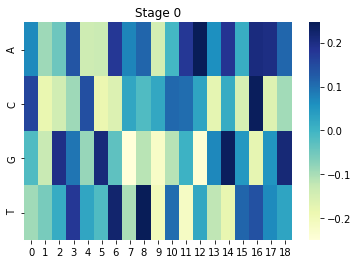

In [816]:
weights_dict = {}
for i, v in enumerate(model_weights[0]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 0')

<ipython-input-817-7898a7dc80c8>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 1')

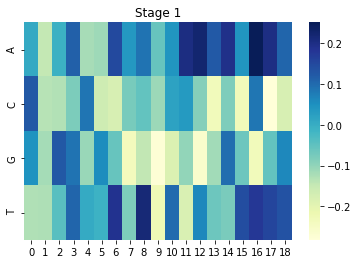

In [817]:
weights_dict = {}
for i, v in enumerate(model_weights[1]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 1')

<ipython-input-818-2de5ee23d5fd>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 2')

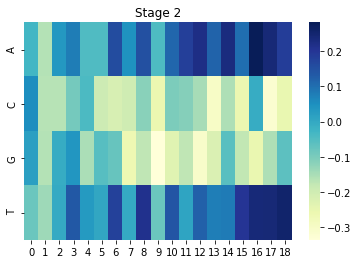

In [818]:
weights_dict = {}
for i, v in enumerate(model_weights[2]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 2')

<ipython-input-819-16dda25b9db0>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 3')

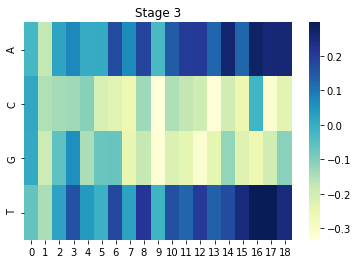

In [819]:
weights_dict = {}
for i, v in enumerate(model_weights[3]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 3')

<ipython-input-820-7ccc3de12f50>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 4')

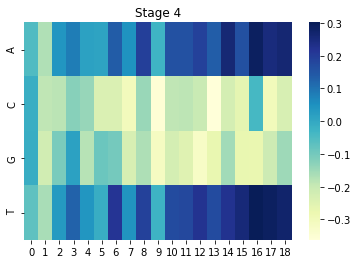

In [820]:
weights_dict = {}
for i, v in enumerate(model_weights[4]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 4')

<ipython-input-821-ff8b18e0bb39>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 5')

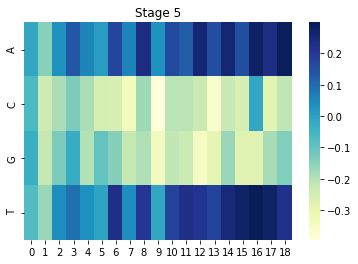

In [821]:
weights_dict = {}
for i, v in enumerate(model_weights[5]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 5')

<ipython-input-822-9fb46328ab22>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 6')

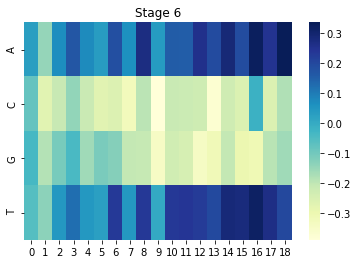

In [822]:
weights_dict = {}
for i, v in enumerate(model_weights[6]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 6')

<ipython-input-823-313b9afd0dcf>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 7')

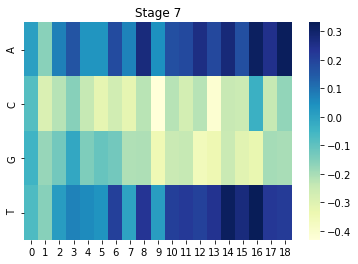

In [823]:
weights_dict = {}
for i, v in enumerate(model_weights[7]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 7')

<ipython-input-824-a06f5ad31add>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 8')

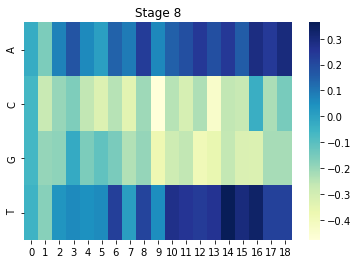

In [824]:
weights_dict = {}
for i, v in enumerate(model_weights[8]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 8')

<ipython-input-825-0d6939a70c2e>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 9')

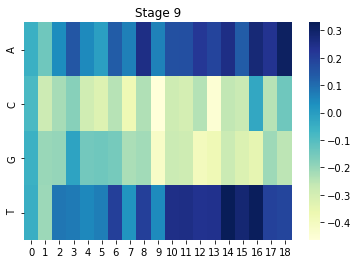

In [825]:
weights_dict = {}
for i, v in enumerate(model_weights[9]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 9')

<ipython-input-826-92c39da10203>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage 10')

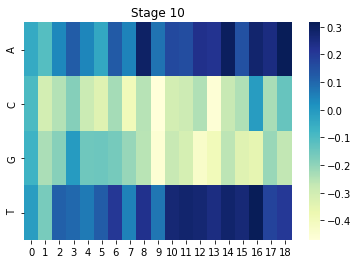

In [826]:
weights_dict = {}
for i, v in enumerate(model_weights[10]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage 10')

In [568]:
s = ['A', 'T', 'G', 'C']
list(reversed(s))

['C', 'G', 'T', 'A']

<ipython-input-827-42cc95be46e5>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0.5, 1.0, 'Stage Final')

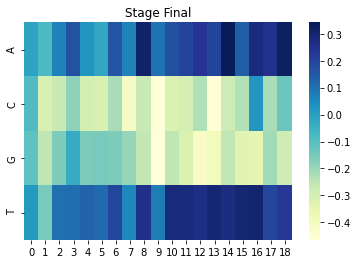

In [827]:
weights_dict = {}
for i, v in enumerate(model_weights[11]):
    weights_dict[i] = [float(i) for i in v]
weights_df = pd.DataFrame.from_dict(weights_dict)
sns.heatmap(weights_df, cmap="YlGnBu", yticklabels=['A','C','G','T'])
ax = plt.axes()
ax.set_title('Stage Final')

In [19]:
from Bio import SeqIO

with open("/home/nkureev/pcPromoter-CNN/Dataset/Benchmark Dataset/Promoter_positive2860.txt", 'r', encoding='ISO-8859-1') as f:
    for lines in f:
        print(lines)
# for record in SeqIO.parse("/home/nkureev/pcPromoter-CNN/Dataset/Benchmark Dataset/Promoter_positive2860.txt", "fasta"):
#     s=record.seq._data
#     sequences.append(s)

>ECK125137714_aaeBp3_reverse_3388263_[ICWHO|W|Inferred computationally without human oversight]_Weak

caaccagcaagagaacatctggcctgcgggcaccactgctacagtggtggtcactgg

caaAcaagatcgcgacgaaagcca

>ECK125137420_acpSp2_reverse_2701137_[ICWHO|W|Inferred computationally without human oversight]_Weak

ccgcgacctttgccgcaagcctcggtctgaaagttaacgccggacacggtctgacct

atcAcaacgtgaaagccattgccg

>ECK125137421_acpSp3_reverse_2701162_[ICWHO|W|Inferred computationally without human oversight]_Weak

caagagctggcgcgtatcgccaaagccgcgacctttgccgcaagcctcggtctgaaa

gttAacgccggacacggtctgacc

>ECK120016719_ahpFp_forward_639002_[TIM|S|Transcription¡¡initiation mapping]

tagatgtccttgattaacaccaaaattaaaccttttaaaaaccaggcattcaaaaac

ggcGaattcatcgaaatcaccgaa

>ECK125137463_alaEp1_forward_2799070_[ICWHO|W|Inferred computationally without human oversight]_Weak

tattttatctacaaaaactgactaaataaaaatttttcactaattgattagtcatag

ccaGcgatatacgctatgcgaaaa

>ECK125137369_alaXp2_reverse_2518279_[ICWHO|W|Inferred computationally without human over


>ECK120033610_ribEp_forward_434504_[TIM|S|Transcription initiation mapping],[AIPP|W|Automated inference of promoter position],[RS-EPT-CBR|S|RNA-seq using two enrichment strategies for primary transcripts and consistent biological replicates]_Strong

ccgcggattatgcacgctgccagggcttgagaaattagccgacgccccccaatttaa

attCaaagagatacgtcatgtagg

>ECK120010388_rlmEp2_reverse_3327731_[IDA|S|Inferred from direct assay],[HIPP|W|Human inference of promoter position],[TIM|S|Transcription initiation mapping],[AIPP|W|Automated inference of promoter position],[IEP|W|Inferred from expression pattern]_Strong

atcgtattttttgcttacgttgggattgaaaacgggtcattctaccgccatctccca

tatAtcaccaaataggcgcgtaaa

>ECK125136576_rlpAp5_reverse_665222_[ICWHO|W|Inferred computationally without human oversight]_Weak

ggcgctaattgtgctgatggctgggttcgggattgtaatgtcaatccacacccacag

gaaAatgttgtcgaaaagcgtgta

>ECK120033628_rnlAp_forward_2765906_[IDA|S|Inferred from direct assay],[AIPP|W|Automated inference of promoter position]_Strong

tttagc

>ECK120033732_hfqp3_forward_4400220_[IDA|S|Inferred from direct assay],[HIPP|W|Human inference of promoter position],[TIM|S|Transcription initiationmapping],[RS-EPT-CBR|S|RNA-seq using two enrichment strategies for primary transcripts and consistent biological replicates]_Strong

gcgtgacgaagtattacaggttgttggtgctatcgcaggctgaatgtgtacaattga

gacGtatcgtgcgcaattttttca

>ECK125136499_hhap6_reverse_480503_[ICWHO|W|Inferred computationally without human oversight]_Weak

atgaactgattgagcatattgcgaccttcgcacttaattacaaaattaagtataatg

aagAcaataagctcattgagcaga

>ECK120051381_hicAp_forward_1509221_[TIM|S|Transcription initiation mapping]_Strong

cttccttcctgattttgcattgcattctgccgttgcggcgatttagtgctattttcg

agcAaattacacacggaggtaaac

>ECK125140836_higBp_reverse_3234480_[TIM|S|Transcription initiation mapping],[RS-EPT-CBR|S|RNA-seq using two enrichment strategies for primary transcripts and consistent biological replicates]_Strong

ttccgtcacacagataaattcatccgttgccaatctggcaacggatgttatcatatt

gccAatttgtcaacggacg


>ECK125137165_yecHp3_reverse_1989564_[ICWHO|W|Inferred computationally without human oversight]_Weak

taacggctgcttcgtcaaaccgacgttacatatggtgtaaatataaatgtacaataa

aaaGcattcagtcctgcgctggcg

>ECK125137151_yecMp2_reverse_1959984_[ICWHO|W|Inferred computationally without human oversight]_Weak

atgaagcgagcaaaaattgcccgcaccagttaaagaaattagggcgggagtatactg

caaAtggctgttttcgtcagcaac

>ECK125137152_yecMp3_reverse_1959872_[ICWHO|W|Inferred computationally without human oversight]_Weak

gcatcagaagcggcgtgaaatcagcggttggttggcacagggcaacagggtaaatta

acgCttttactgaaagacgaagag

>ECK125137154_yecTp3_forward_1961931_[ICWHO|W|Inferred computationally without human oversight]_Weak

aaaatggacatgccattgttttctcactgttggataagaggccagaagcgtaatatc

cggCcccagggaaacgataacggt

>ECK125137172_yedDp5_reverse_2008261_[ICWHO|W|Inferred computationally without human oversight]_Weak

ccagaatttaatcaaccaggcgtgtttgaattgctgccatgacatgaatgtagcctc

tgaActcagaaggtttgaaacaag

>ECK125137177_yedIp2_reverse_2029461_[ICWHO|W|Inferred computati

In [21]:
l = 'me, myself and I'
file = '/home/nkureev/me.txt'
with open(file, 'w') as f:
    f.write(l)

In [121]:
file1 = '/home/pchesnokova/promoters/fasta_cov_random100.fasta'
file2 = '/home/pchesnokova/promoters/fasta_div_random100.fasta'
file3 = '/home/pchesnokova/promoters/fasta_tandem_random100.fasta'
# file = '/home/nkureev/pcPromoter-CNN/test_fasta.fasta'
out_file1 = '/home/nkureev/out_cov_random100.fasta'
out_file2 = '/home/nkureev/out_div_random100.fasta'
out_file3 = '/home/nkureev/out_tandem_random100.fasta'

def fastaParser(infile):
    seqs = []
    headers = []
    with open(infile, 'r') as f:
        sequence = ""
        header = None
        for line in f:
            if line.startswith('>'):
                headers.append(line[1:-1])
                if header:
                    seqs.append(sequence)
                sequence = ""
                header = line[1:]
            else:
                sequence += line.rstrip()
        seqs.append(sequence)
    return headers, seqs
            
    
h, s = fastaParser(file3)
new_h, new_s = [], []
for i, j in zip(h, s):
    if len(j) > 81:
        n = 0
        while n + 81 < len(j):
            new_s.append(j[n: n+81])
            new_h.append(i + '_' + str(n))
            n += 1
    else:
        new_s.append(j)
        new_h.append(i)

with open(out_file3, 'w') as f:
    for k, m in zip(new_h, new_s):
        f.write('>' + k + '\n' + m + '\n')

In [56]:
from Bio import SeqIO

for record in SeqIO.parse('/home/nkureev/out_cov_random100.fasta', 'fasta'):
    print(record.description._data)

AttributeError: 'str' object has no attribute '_data'

In [58]:
file = '/home/nkureev/PromoterSigma70Set.txt'
out = '/home/nkureev/Sigma70Regulon.fasta'
o = open(out, 'w')

with open(file, 'r') as f:
    for lines in f:
        if not lines.startswith('#'):
            o.write('>' + lines.split('\t')[0] + '\n' + lines.split('\t')[5] + '\n')

            
o.close()

In [80]:
n = 0
s = []
t = []
with open('/home/nkureev/pcPromoter-CNN/pc_out_div100.txt', 'r') as f:
    for lines in f:
        if '>' in lines and lines.split('_')[0] not in s:
            n += 1
            s.append(lines.split('_')[0])
        else:
            continue
        
print(len(s))

34


In [83]:
m = 0
with open(file2, 'r') as f:
    for lines in f:
        if '>' in lines:
            m += 1
print(m)

34


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def encode_seq(s):
    Encode = {'A':[1,0,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1],
              'a':[1,0,0,0],'t':[0,1,0,0],'c':[0,0,1,0],'g':[0,0,0,1]}
    return np.array([Encode[x] for x in s])
          
    
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filtfilt(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
# Strng = "TTCAGTGATAATTATCACATTTCAATTGCACATTAATGGATATTCTTTAATAATCTCGCGACGTTTCTTTATGATAAATAA"
# matrix = np.array([[0, 3, 1, 4, 0, 2, 1, 5, 1, 0, 0, 0, 3, 0],
#                    [2, 0, 4, 0, 0, 0, 4, 0, 1, 1, 0, 1, 0, 1],
#                    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 4],
#                    [2, 2, 0, 0, 5, 3, 0, 0, 3, 4, 4, 0, 2, 0]])

with open('/home/nkureev/PSSM-Dataset-v4.0.txt', 'r') as f:
    matrices = []
    mode = True
    for lines in f:
        if mode:
            if lines.startswith('A\t'):
                matrices.append([])
                sub_m = lines[2:-1].split('\t')
                matrices[-1].append(list(int(x) for x in sub_m))
                mode = False
                n = 0
        else:
            if n < 3:
                sub_m = lines[2:-1].split('\t')
                matrices[-1].append(list(int(x) for x in sub_m))
                n += 1
            else:
                mode = True
        
            
PWS = []
for i in matrices:
    PWS.append(np.array(i))

    
#tandem_file = "/mnt/data/ncbi/refseq/bacteria/fasta_tandem_random100.fasta"
seq_dict = {}
headers, sequences = fastaParser('/home/nkureev/fasta_div_random100.fasta')
for h, s in zip(headers, sequences):
    store = []
    for matrix_number in range(len(PWS)):
        loc = []
        for i in range(len(s) - len(PWS[matrix_number].T)):
            seq = encode_seq(s[i:i+len(PWS[matrix_number].T)])
            loc.append(sum(sum(seq * PWS[matrix_number].T)))
        store.append(loc)
        seq_dict[h] = store
    
# for i, v in seq_dict.items():
#     print(i, v)

# for h, s in zip(headers, seq):
#     seq_dict[h] = []
# #     for matrix_number in range(len(PWS)):
#     store = []
#     for i in range(len(Strng) - len(PWS[0].T)):
#         seq = encode_seq(Strng[i:i+len(PWS[0].T)])
#         try:
#             store.append(sum(seq * PWS[0].T))
#             seq_dict[h].append(store)
#         except:
#             pass
        
# for i, v in seq_dict.items():
#     print(i)
#     for j in v:
#         print(j)







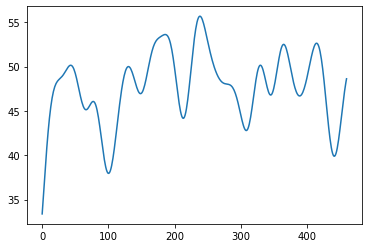

In [169]:
x = seq_dict['ASF000168284380'][8]

cutoff = 1500
fs = 50000
x_smooth = butter_lowpass_filtfilt(x, cutoff, fs)

plt.plot(x_smooth)
plt.show()

In [175]:
def fastaParser(infile):
    seqs = []
    headers = []
    with open(infile, 'r') as f:
        sequence = ""
        header = None
        for line in f:
            if line.startswith('>'):
                headers.append(line[1:-1])
                if header:
                    seqs.append(sequence)
                sequence = ""
                header = line[1:]
            else:
                sequence += line.rstrip()
        seqs.append(sequence)
    return headers, seqs


headers, sequences = fastaParser('fasta_cov_random100_2.fasta')
out = '/home/nkureev/cov_out.fasta'
f = open(out, 'w')
for h, s in zip(headers, sequences):
    if len(s) > 81:
        s_1 = s[0:81]
    else:
        s_1 = s
    f.write('>' + h + '\n' + s_1 + '\n')

In [177]:
n = 0
m = 0
with open('/home/nkureev/pcPromoter-CNN/pc_out.txt', 'r') as f:
    for lines in f:
        if lines.startswith('>'):
            n += 1
        elif 'non promoter' in lines:
            m += 1
print(n, m, (n - m) / n)

100 46 0.54


In [97]:
from collections import Counter

l = []
with open('/home/nkureev/PromoterSigma70Set.txt', 'r') as f:
    for lines in f:
        if not lines.startswith('#'):
            if '[RE||RNA-seq evidence]' in lines:
                print(lines)
#             l.extend(lines.split('\t')[6].split(','))
# c = Counter(l)
# # for i, j in c.items():
# #     print(i, j)
# c.most_common()

ECK125286492	allBp	forward	539041	Sigma70	cgcgtgtttcatggtttgtcggcgtcatcgtcgcctttgcggcctacgccttattaaagaAacgtacaacagcagaaaaaa	[TIM|S|Transcription initiation mapping],[RE||RNA-seq evidence]	Strong

ECK125286499	allBp2	forward	538986	Sigma70	gtggccgttattttatctcttggcggtaagtttattcactttatggaaccgttatcgcgtGtttcatggtttgtcggcgtc	[TIM|S|Transcription initiation mapping],[RE||RNA-seq evidence]	Strong

ECK125286486	allBp3	forward	538944	Sigma70	tacgataacggttttaacctcactgcgttttcagtaactctggtggccgttattttatctCttggcggtaagtttattcac	[TIM|S|Transcription initiation mapping],[RE||RNA-seq evidence]	Strong

ECK125286487	aroMp	forward	407400	Sigma70	tgtcatttgtagcacaagtaagtgtcagcagtggtgcttcacacttgcccggtaattaacGacgaaagaaaagtaaggtgg	[TIM|S|Transcription initiation mapping],[RE||RNA-seq evidence]	Strong

ECK125286497	btuDp	reverse	1793583	Sigma70	gaaaagtcatccagcgtttttccccggatatgacgccggaagatcccattgtgatggaaaGcattaaactggcgttggcaa	[TIM|S|Transcription initiation mapping],[RE||RNA-seq evidence]	Strong

ECK125286485	btuE

In [220]:
from itertools import product
import matplotlib.pyplot as plt

c = product('ATGC', repeat=6)
kmers = []
for i in c:
    kmers.append(''.join(i))

# string = 'ATCGTAGCTAGCTGATGCTAGTGTCGTAGCATTCGTGCTAGCC'
headers, sequences = fastaParser('fasta_cov_random100_2.fasta')


d = {}
for kmer in kmers:
    d[kmer] = 0
    
for s in sequences:
    for kmer in kmers:
        d[kmer] += s.count(kmer)

list_d = list(d.items())
list_d.sort(key=lambda i: i[1])
list_d.reverse()
TA_percent = []
for i in list_d:
    if i[1] != 0:
        TA_percent.append((i[0].count('A') + i[0].count('T')) / len(i[0]))
    
# plt.plot(TA_percent)
# plt.show()
TA_percent

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.16666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 0.6666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 1.0,
 1.0,
 0.0,
 0.6666666666666666,
 0.8333333333333334,
 1.0,
 1.0,
 0.8333333333333334,
 1.0,
 0.8333333333333334,
 0.8333333333333334,
 0.6666666666666666,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.16666666666666666,
 0.0,
 0.83333333

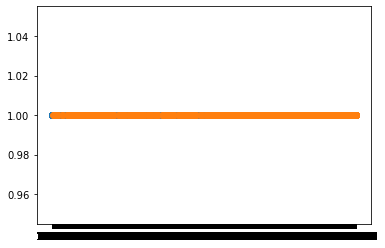

In [224]:
import matplotlib.pyplot as plt

prokka_annotation = '/home/nkureev/PROKKA_09172020.gff'

CDS_start = []
CDS_end = []
with open(prokka_annotation, 'r') as f:
    for lines in f:
        if not lines.startswith('#'):
            CDS_start.append(lines.split('\t')[3])
            CDS_end.append(lines.split('\t')[4])
            
            
one_start = [1 for i in range(len(CDS_start))]
one_end = [1 for i in range(len(CDS_end))]
plt.scatter(CDS_start, one_start)
plt.scatter(CDS_end, one_end)
plt.show()

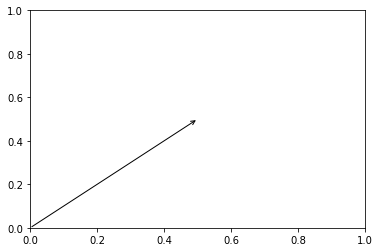

In [232]:
plt.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"), color='r')
plt.show()